In [1]:
import pandas as pd
import numpy as np
from nltk.corpus import stopwords
from scipy.sparse import hstack, vstack
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from pymorphy2 import MorphAnalyzer
# from nltk.tokenize import word_tokenize
from string import punctuation
from sklearn.preprocessing import StandardScaler
import re, pickle
# from sklearn.svm import SVR
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
punct = set(punctuation)
import scipy
morph = MorphAnalyzer()
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.5/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
def normalize(text):
    tokens = [x for x in tokenizer(text.lower()) if not set(x).issubset(punct)]
    norm = [morph.parse(token)[0].normal_form for token in tokens]
    return ' '.join(norm)

def normalize_pos(text):
    tokens = [x for x in tokenizer(text.lower()) if not set(x).issubset(punct)]
    norm = filter(bool, [morph.parse(token)[0].tag.POS for token in tokens])
    return ' '.join(norm)

def sum_of_idfs(text, idfs):
    tokens = Counter(tokenizer(text.lower()))
    return np.log10(sum([tokens[token]*idfs.get(token, 8) for token in tokens] + [8]))

def max_of_idfs(text, idfs):
    tokens = Counter(tokenizer(text.lower()))
    return np.log10(max([tokens[token]*idfs.get(token, 8) for token in tokens] + [8]))

def week(text):
    y,m,d = [int(x) for x in text.split('-')]
    date = datetime(y,m,d)
    return date.weekday()

In [5]:
import os
os.chdir('..')

In [2]:
# train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [4]:
index = train.index.values

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(index, index, test_size=0.4)
X_valid, X_dev, y_valid, y_dev = train_test_split(X_valid, y_valid, test_size=0.2)

In [6]:
import numpy as np
from scipy.sparse import csr_matrix, vstack
import scipy

In [2]:
dense_feat = scipy.sparse.load_npz('sparse_dense_feat.npz')

In [3]:
dense_feat.shape

(1390832, 1024)

In [6]:
dense_feat_ = vstack([csr_matrix((1, 1024)), dense_feat])

In [10]:
filenames = [x.split('/')[-1].rstrip('.jpg') for x in open('filenames_dense.txt').read().splitlines()]

In [12]:
d = {f:i+1 for i,f in enumerate(filenames)}

In [13]:
# filenames

In [24]:
dtimgs = timgs.apply(lambda x:
                    d.get(x, 0))

In [27]:
train_img = dense_feat_[dtimgs.values]

In [28]:
train_img.shape

(1503424, 1024)

In [33]:
train_img[5].todense()

matrix([[0.        , 0.        , 0.        , ..., 0.33778644, 0.83862227,
         0.        ]])

In [34]:
scipy.sparse.save_npz('sparse_dense_feat_x_test.npz', train_img)

In [29]:
dense_feat = np.load('sparse_dense_feat_x.npz')

In [3]:
f,s,t,ff = np.split(dense_feat, 4)

In [7]:
# a = np.zeros(dense_feat.shape)
for i in range(dense_feat.shape[0]):
    ind = dense_feat[i] < 0.05
    dense_feat[i][ind] = 0.0

In [17]:
def softmax(w, t = 1.0):
    e = np.exp(w / t)
    dist = e / np.sum(e)
    return dist

In [5]:
ind = dense_feat < 0.001

In [6]:
dense_feat[ind]

array([[ True,  True, False, ..., False, False, False],
       [ True,  True, False, ...,  True, False, False],
       [ True, False, False, ..., False, False, False],
       ...,
       [ True,  True, False, ..., False, False,  True],
       [ True,  True, False, ..., False,  True, False],
       [ True, False, False, ..., False, False, False]])

In [8]:
sparce = csr_matrix(dense_feat)

In [9]:
import scipy
scipy.sparse.save_npz('sparse_dense_feat_test.npz', sparce)

In [6]:
np.save(open('sparce_feat_test.npy', 'wb'), sparce)

1503424

In [6]:
per_upper_descr = train.description.fillna(' ').apply(lambda x: len([j for j in x if j.isupper()])/len(x))
per_digit_descr = train.description.fillna(' ').apply(lambda x: len([j for j in x if j.isdigit()])/len(x))
per_excl_descr = train.description.fillna(' ').apply(lambda x: 
                                                len([j for j in x if j == '!'])/len(x))
per_punct_descr = train.description.fillna(' ').apply(lambda x: 
                                                len([j for j in x if not j.isalnum() and j != ' '])/len(x))

per_upper_title = train.title.fillna(' ').apply(lambda x: len([j for j in x if j.isupper()])/len(x))
per_digit_title = train.title.fillna(' ').apply(lambda x: len([j for j in x if j.isdigit()])/len(x))
per_punct_title = train.title.fillna(' ').apply(lambda x: 
                                                len([j for j in x if not j.isalnum() and j != ' '])/len(x))
per_excl_title = train.title.fillna(' ').apply(lambda x: 
                                                len([j for j in x if j == '!'])/len(x))




mean_t = np.mean(train.title.apply(len))
mean_d = np.mean(train.description.fillna('').apply(len))
# pd.concat([train.image_top_1.fillna(0), test.image_top_1.fillna(0)])

In [13]:
idfs_descr = {k:v for k,v in zip(tf_descr.get_feature_names(), tf_descr.idf_)}
idfs_title = {k:v for k,v in zip(tf_title.get_feature_names(), tf_title.idf_)}
idfs_param = {k:v for k,v in zip(cv_params.get_feature_names(), cv_params.idf_)}

idfs_sum_title = descriptions.apply(lambda x: sum_of_idfs(x, idfs_title))
idfs_sum_descr = title.fillna(' ').apply(lambda x: sum_of_idfs(x, idfs_descr))
# idfs_sum_param = params.apply(lambda x: sum_of_idfs(x, idfs_param))

idfs_max_title = descriptions.apply(lambda x: max_of_idfs(x, idfs_title))
idfs_max_descr = title.fillna(' ').apply(lambda x: max_of_idfs(x, idfs_descr))
# idfs_max_param = params.apply(lambda x: max_of_idfs(x, idfs_param))

In [14]:
idfs_sum_title_test = descriptions_test.apply(lambda x: sum_of_idfs(x, idfs_title))
idfs_sum_descr_test = title_test.fillna(' ').apply(lambda x: sum_of_idfs(x, idfs_descr))
# idfs_sum_param = params.apply(lambda x: sum_of_idfs(x, idfs_param))

idfs_max_title_test = descriptions_test.apply(lambda x: max_of_idfs(x, idfs_title))
idfs_max_descr_test = title_test.fillna(' ').apply(lambda x: max_of_idfs(x, idfs_descr))

In [7]:
params = train[['param_1', 'param_2', 'param_3']].fillna('nan').apply(lambda x: 
                                                        ' '.join([p for p in x]), axis=1)

# param_1 = train[['param_1']].fillna(' ').apply(lambda x: 
#                                                         ' '.join([p for p in x]), axis=1)
# param_2 = train[['param_2']].fillna(' ').apply(lambda x: 
#                                                         ' '.join([p for p in x]), axis=1)
# param_3 = train[['param_3']].fillna(' ').apply(lambda x: 
#                                                         ' '.join([p for p in x]), axis=1)

descriptions = train.description.fillna('nan')
title = train.title

In [9]:
pos_params = params.apply(normalize_pos)
pos_descriptions = descriptions.apply(normalize_pos)
pos_title = title.apply(normalize_pos)

In [10]:
tf_params_pos = TfidfVectorizer(min_df=100, ngram_range=(1,2))
tf_title_pos = TfidfVectorizer(min_df=100, ngram_range=(1,2))
tf_descr_pos = TfidfVectorizer(min_df=100, ngram_range=(1,2))

X_pos_params_train = tf_params_pos.fit_transform(pos_params)
X_pos_descriptions_train = tf_descr_pos.fit_transform(pos_descriptions)
X_pos_title_train = tf_title_pos.fit_transform(pos_title)

In [11]:
norm_params = params.apply(normalize)
norm_descriptions = descriptions.apply(normalize)
norm_title = title.apply(normalize)

In [12]:
# tf_params_norm = TfidfVectorizer(min_df=100, ngram_range=(1,2))
tf_title_norm = TfidfVectorizer(min_df=100, max_features=5000)
tf_descr_norm = TfidfVectorizer(min_df=100, max_features=5000)

# X_norm_params_train = tf_params_norm.fit_transform(pos_params)
X_norm_descriptions_train = tf_descr_norm.fit_transform(norm_descriptions)
X_norm_title_train = tf_title_norm.fit_transform(norm_title)

In [136]:
X_item_seq_number_n_train

array([[0.30103   ],
       [1.2787536 ],
       [0.95424251],
       ...,
       [1.69897   ],
       [1.51851394],
       [1.25527251]])

In [125]:

gc.collect()


0

In [56]:
stats = np.concatenate([length_descr_train,
                        length_title_train,
#                         length_param_train.values.reshape(-1,1),
                                    prices.values.reshape(-1,1),
#                                     prices_mentioned,
#                         length_param_train.values.reshape(-1,1),
                        per_digit_descr.values.reshape(-1,1),
                        per_digit_title.values.reshape(-1,1),
                        per_excl_descr.values.reshape(-1,1),
                        per_excl_title.values.reshape(-1,1),
                        per_punct_descr.values.reshape(-1,1),
                        per_punct_title.values.reshape(-1,1),
                        per_upper_descr.values.reshape(-1,1),
                        per_upper_title.values.reshape(-1,1),
                        X_item_seq_number_n_train,
                        length_descr_tokens_train.values.reshape(-1,1),
                        length_title_tokens_train.values.reshape(-1,1),
                        length_descr_uniq_tokens_train.values.reshape(-1,1),
                        length_title_uniq_tokens_train.values.reshape(-1,1),
                        idfs_sum_title.values.reshape(-1,1),
                        idfs_sum_descr.values.reshape(-1,1),
                        idfs_max_descr.values.reshape(-1,1),
                        idfs_max_title.values.reshape(-1,1),
                        (prices.values - price_predict).reshape(-1,1),
                        price_predict.reshape(-1,1),
                        img_train,
                        X_is_9_train.values.reshape(-1,1), 
                        X_is_first_train.values.reshape(-1,1), 
                        X_isround_train.values.reshape(-1,1),
                        X_city_stat.reshape(-1, 1),
                        X_city_stat_price.reshape(-1, 1),
                        X_category_name_stat.reshape(-1, 1),
                        X_category_name_stat_price.reshape(-1, 1),
                        X_param_1_stat.reshape(-1, 1),
                        X_param_1_stat_price.reshape(-1, 1),
                        X_param_2_stat.reshape(-1, 1),
                        X_param_2_stat_price.reshape(-1, 1),
                        X_param_3_stat.reshape(-1, 1),
                        X_param_3_stat_price.reshape(-1, 1)
                        ], axis=1)

In [50]:
img_train = np.log10(image_train[['img_size_x', 'img_size_y', 'img_mean_color',
       'img_std_color', 'img_blue_mean', 'img_green_mean', 'img_red_mean',
       'img_blue_std', 'image_green_std', 'image_red_std']].values)

In [57]:
# del image_test, image_train
import gc
gc.collect()

0

In [51]:
img_train[np.isnan(img_train)] = 0

In [52]:
img_test = np.log10(image_test[['img_size_x', 'img_size_y', 'img_mean_color',
       'img_std_color', 'img_blue_mean', 'img_green_mean', 'img_red_mean',
       'img_blue_std', 'image_green_std', 'image_red_std']].values)

img_test[np.isnan(img_test)] = 0

In [58]:
stats_test = np.concatenate([length_descr_test,
                        length_title_test,
#                         length_param_train.values.reshape(-1,1),
                                    prices_test.values.reshape(-1,1),
#                                     prices_mentioned,
#                         length_param_train.values.reshape(-1,1),
                        per_digit_descr_test.values.reshape(-1,1),
                        per_digit_title_test.values.reshape(-1,1),
                        per_excl_descr_test.values.reshape(-1,1),
                        per_excl_title_test.values.reshape(-1,1),
                        per_punct_descr_test.values.reshape(-1,1),
                        per_punct_title_test.values.reshape(-1,1),
                        per_upper_descr_test.values.reshape(-1,1),
                        per_upper_title_test.values.reshape(-1,1),
                        X_item_seq_number_n_test,
                        length_descr_tokens_test.values.reshape(-1,1),
                        length_title_tokens_test.values.reshape(-1,1),
                        length_descr_uniq_tokens_test.values.reshape(-1,1),
                        length_title_uniq_tokens_test.values.reshape(-1,1),
                        idfs_sum_title_test.values.reshape(-1,1),
                        idfs_sum_descr_test.values.reshape(-1,1),
                        idfs_max_descr_test.values.reshape(-1,1),
                        idfs_max_title_test.values.reshape(-1,1),
                        (prices_test.values - price_predict_test).reshape(-1,1),
                        price_predict_test.reshape(-1,1),
                        img_test,
                        X_is_9_test.values.reshape(-1,1), 
                        X_is_first_test.values.reshape(-1,1), 
                        X_isround_test.values.reshape(-1,1),
                        X_city_stat_test.reshape(-1, 1),
                        X_city_stat_price_test.reshape(-1, 1),
                        X_category_name_stat_test.reshape(-1, 1),
                        X_category_name_stat_price_test.reshape(-1, 1),
                        X_param_1_stat_test.reshape(-1, 1),
                        X_param_1_stat_price_test.reshape(-1, 1),
                        X_param_2_stat_test.reshape(-1, 1),
                        X_param_2_stat_price_test.reshape(-1, 1),
                        X_param_3_stat_test.reshape(-1, 1),
                        X_param_3_stat_price_test.reshape(-1, 1)
                        ], axis=1)

In [72]:
(prices.values - price_predict).reshape(-1,1)

array([[-0.25036643],
       [-0.05092238],
       [ 0.40373539],
       ...,
       [-6.08515714],
       [-0.05532855],
       [ 0.05291384]])

In [56]:
from sklearn.preprocessing import PolynomialFeatures
pl = PolynomialFeatures(interaction_only=True)

In [57]:
stats.shape

(1503424, 18)

In [58]:
stats_inter = pl.fit_transform(stats)

In [15]:
per_upper_descr_test = test.description.fillna(' ').apply(lambda x: len([j for j in x if j.isupper()])/len(x))
per_digit_descr_test = test.description.fillna(' ').apply(lambda x: len([j for j in x if j.isdigit()])/len(x))
per_excl_descr_test = test.description.fillna(' ').apply(lambda x: 
                                                len([j for j in x if j == '!'])/len(x))
per_punct_descr_test = test.description.fillna(' ').apply(lambda x: 
                                                len([j for j in x if not j.isalnum() and j != ' '])/len(x))

per_upper_title_test = test.title.fillna(' ').apply(lambda x: len([j for j in x if j.isupper()])/len(x))
per_digit_title_test = test.title.fillna(' ').apply(lambda x: len([j for j in x if j.isdigit()])/len(x))
per_punct_title_test = test.title.fillna(' ').apply(lambda x: 
                                                len([j for j in x if not j.isalnum() and j != ' '])/len(x))
per_excl_title_test = test.title.fillna(' ').apply(lambda x: 
                                                len([j for j in x if j == '!'])/len(x))

mean_t = np.mean(train.title.apply(len))
mean_d = np.mean(train.description.fillna('').apply(len))
# pd.concat([train.image_top_1.fillna(0), test.image_top_1.fillna(0)])

In [5]:
def find_prices(text):
    prices = [re.sub('[^\d]+', '', x) for x in re.findall('([\d \.\,]{3,10}) ?[₽рР]у?б?', text)]
    prices = [x for x in prices if len(x) > 2]
    prices = [int(x) for x in prices if int(x) > 0]
    
    if not prices:
        return 0
    else:
        return np.log10(len(prices))

In [5]:
# prices_predict_train = regr_sgd.predict(X_for_price_train).reshape(-1, 1)
prices_predict_test = regr_sgd.predict(X_for_price_test).reshape(-1, 1)

# replaced_prices_train = np.zeros((len(train), 1))
# for i, price in enumerate(train.price.fillna(-999)):
#     if price <= 50:
#         replaced_prices_train[i] = prices_predict_train[i]
#     else:
#         replaced_prices_train[i] = np.log10(price)

replaced_prices_test = np.zeros((len(test), 1))
for i, price in enumerate(test.price.fillna(-999)):
    if price <= 0:
        replaced_prices_test[i] = prices_predict_test[i]
    else:
        replaced_prices_test[i] = np.log10(price)

NameError: name 'regr_sgd' is not defined

In [7]:
prices_mentioned = train.description.fillna(' ').apply(find_prices).values.reshape(-1,1)

In [61]:
np.median(train.price.dropna())

1300.0

In [5]:
# prices_mentioned = train.description.fillna('').apply(find_prices).values.reshape(-1,1)
# prices = train.price.fillna(1300).apply(lambda x: np.log10(x+1)).values.reshape(-1,1)

In [6]:
# prices_mentioned_test = test.description.fillna('').apply(find_prices).values.reshape(-1,1)
# prices_test = test.price.fillna(1300).apply(lambda x: np.log10(x+1)).values.reshape(-1,1)

In [16]:
length_descr_train = train.description.fillna('').apply(lambda x: np.log10(len(x)+1)).values.reshape(-1,1)
length_title_train = train.title.fillna('').apply(lambda x: np.log10(len(x)+1)).values.reshape(-1,1)

In [17]:
length_descr_uniq_tokens_train = descriptions.apply(lambda x: np.log10(len(set(tokenizer(x)))+1))
length_title_uniq_tokens_train = title.apply(lambda x: np.log10(len(set(tokenizer(x)))+1))

In [18]:
length_descr_uniq_tokens_test = descriptions_test.apply(lambda x: np.log10(len(set(tokenizer(x)))+1))
length_title_uniq_tokens_test = title_test.apply(lambda x: np.log10(len(set(tokenizer(x)))+1))

In [19]:
prices = train.price.apply(lambda x: np.log10(x+1)).fillna(0)
prices_test = test.price.apply(lambda x: np.log10(x+1)).fillna(0)

In [20]:
length_descr_tokens_train = descriptions.apply(lambda x: np.log10(len(tokenizer(x))+1))
length_title_tokens_train = title.apply(lambda x: np.log10(len(tokenizer(x))+1))

In [21]:
length_descr_tokens_test = descriptions_test.apply(lambda x: np.log10(len(tokenizer(x))+1))
length_title_tokens_test = title_test.apply(lambda x: np.log10(len(tokenizer(x))+1))

In [22]:
length_descr_test = test.description.fillna('').apply(lambda x: np.log10(len(x)+1)).values.reshape(-1,1)
length_title_test = test.title.fillna('').apply(lambda x: np.log10(len(x)+1)).values.reshape(-1,1)

In [23]:
stops = stopwords.words('russian')

In [ ]:
length_param_train = train[['param_1', 'param_2', 'param_3']].fillna(' ').apply(lambda x: 
                                                        np.log10(len(' '.join([p for p in x]))), axis=1)

In [ ]:
length_param_test = test[['param_1', 'param_2', 'param_3']].fillna(' ').apply(lambda x: 
                                                        np.log10(len(' '.join([p for p in x]))), axis=1)

In [26]:
# PARAMS CAT

lenc_param_1 = LabelEncoder()
int_enc = lenc_param_1.fit_transform(pd.concat([train.param_1.fillna(''), 
                                        test.param_1.fillna('') ]))
onehot_param_1 = OneHotEncoder(sparse=True)
int_param_1 = int_enc.reshape(len(int_enc), 1)

onehot_param_1.fit(int_param_1)

int_enc_train = lenc_param_1.transform(train.param_1.fillna(''))
X_param_1_train = onehot_param_1.transform(int_enc_train.reshape(len(int_enc_train), 1))

int_enc_test = lenc_param_1.transform(test.param_1.fillna(''))
X_param_1_test = onehot_param_1.transform(int_enc_test.reshape(len(int_enc_test), 1))

# PARAMS CAT

lenc_param_2 = LabelEncoder()
int_enc = lenc_param_2.fit_transform(pd.concat([train.param_2.fillna(''), 
                                        test.param_2.fillna('') ]))
onehot_param_2 = OneHotEncoder(sparse=True)
int_param_2 = int_enc.reshape(len(int_enc), 1)

onehot_param_2.fit(int_param_2)

int_enc_train = lenc_param_2.transform(train.param_2.fillna(''))
X_param_2_train = onehot_param_2.transform(int_enc_train.reshape(len(int_enc_train), 1))

int_enc_test = lenc_param_2.transform(test.param_2.fillna(''))
X_param_2_test = onehot_param_2.transform(int_enc_test.reshape(len(int_enc_test), 1))

# PARAMS CAT

lenc_param_3 = LabelEncoder()
int_enc = lenc_param_3.fit_transform(pd.concat([train.param_3.fillna(''), 
                                        test.param_3.fillna('') ]))
onehot_param_3 = OneHotEncoder(sparse=True)
int_param_3 = int_enc.reshape(len(int_enc), 1)

onehot_param_3.fit(int_param_3)

int_enc_train = lenc_param_3.transform(train.param_3.fillna(''))
X_param_3_train = onehot_param_3.transform(int_enc_train.reshape(len(int_enc_train), 1))

int_enc_test = lenc_param_3.transform(test.param_3.fillna(''))
X_param_3_test = onehot_param_3.transform(int_enc_test.reshape(len(int_enc_test), 1))



In [27]:
# IMAGE TOP 1

lenc = LabelEncoder()
int_enc = lenc.fit_transform(pd.concat([train.image_top_1.fillna(0), 
                                        test.image_top_1.fillna(0)]))
onehot = OneHotEncoder(sparse=True)
int_top1 = int_enc.reshape(len(int_enc), 1)

onehot.fit(int_top1)

int_enc_train = lenc.transform(train.image_top_1.fillna(0))
X_top1_train = onehot.transform(int_enc_train.reshape(len(int_enc_train), 1))

int_enc_test = lenc.transform(test.image_top_1.fillna(0))
X_top1_test = onehot.transform(int_enc_test.reshape(len(int_enc_test), 1))

In [28]:
# def shrink(userid):
#     if userid in vocab:
ids_set = set(train.user_id) & set(test.user_id)
freqs = Counter(test.user_id) + Counter(train.user_id)        
user_id = train.user_id.apply(lambda x: str(freqs.get(x, 'shit')) if x not in ids_set else x)
user_id_test = test.user_id.apply(lambda x: str(freqs.get(x, 'shit')) if x not in ids_set else x)

In [29]:
conc = pd.concat([user_id, user_id_test], axis=0)

In [30]:
# USER ID

lenc_user_id = LabelEncoder()
int_enc = lenc_user_id.fit_transform(conc)
onehot_user_id = OneHotEncoder(sparse=True)
int_user_id = int_enc.reshape(len(int_enc), 1)

onehot_user_id.fit(int_user_id)

int_enc_train = lenc_user_id.transform(user_id)
X_user_id_train = onehot_user_id.transform(int_enc_train.reshape(len(int_enc_train), 1))


int_enc_test = lenc_user_id.transform(user_id_test)
X_user_id_test = onehot_user_id.transform(int_enc_test.reshape(len(int_enc_test), 1))

In [31]:
# USER TYPE
lenc_user_type = LabelEncoder()
int_enc = lenc_user_type.fit_transform(pd.concat([train.user_type.fillna(0), 
                                               test.user_type.fillna(0)]))
onehot_user_type = OneHotEncoder(sparse=True)
int_user_type = int_enc.reshape(len(int_enc), 1)

onehot_user_type.fit(int_user_type)

int_enc_train = lenc_user_type.transform(train.user_type.fillna(0))
X_user_type_train = onehot_user_type.transform(int_enc_train.reshape(len(int_enc_train), 1))

int_enc_test = lenc_user_type.transform(test.user_type.fillna(0))
X_user_type_test = onehot_user_type.transform(int_enc_test.reshape(len(int_enc_test), 1))

In [32]:
# CATEGORY NAME

lenc_category_name = LabelEncoder()
int_enc = lenc_category_name.fit_transform(pd.concat([train.category_name.fillna(0), 
                                               test.category_name.fillna(0)]))
onehot_category_name = OneHotEncoder(sparse=True)
int_category_name = int_enc.reshape(len(int_enc), 1)

onehot_category_name.fit(int_category_name)

int_enc_train = lenc_category_name.transform(train.category_name.fillna(0))
X_category_name_train = onehot_category_name.transform(int_enc_train.reshape(len(int_enc_train), 1))

int_enc_test = lenc_category_name.transform(test.category_name.fillna(0))
X_category_name_test = onehot_category_name.transform(int_enc_test.reshape(len(int_enc_test), 1))

In [33]:
# PARENT CATEGORY NAME

lenc_parent_category_name = LabelEncoder()
int_enc = lenc_parent_category_name.fit_transform(pd.concat([train.parent_category_name.fillna(0), 
                                               test.parent_category_name.fillna(0)]))
onehot_parent_category_name = OneHotEncoder(sparse=True)
int_parent_category_name = int_enc.reshape(len(int_enc), 1)

onehot_parent_category_name.fit(int_parent_category_name)

int_enc_train = lenc_parent_category_name.transform(train.parent_category_name.fillna(0))
X_parent_category_name_train = onehot_parent_category_name.transform(int_enc_train.reshape(len(int_enc_train), 1))

int_enc_test = lenc_parent_category_name.transform(test.parent_category_name.fillna(0))
X_parent_category_name_test = onehot_parent_category_name.transform(int_enc_test.reshape(len(int_enc_test), 1))

In [34]:
# ITEM SEQ NUMBER

# lenc_item_seq_number = LabelEncoder()
# int_enc = lenc_item_seq_number.fit_transform(pd.concat([train.item_seq_number.fillna(0), 
#                                                test.item_seq_number.fillna(0)]))
# onehot_item_seq_number = OneHotEncoder(sparse=True)
# int_item_seq_number = int_enc.reshape(len(int_enc), 1)

# onehot_item_seq_number.fit(int_item_seq_number)

# int_enc_train = lenc_item_seq_number.transform(train.item_seq_number.fillna(0))
# X_item_seq_number_train = onehot_item_seq_number.transform(int_enc_train.reshape(len(int_enc_train), 1))

# int_enc_test = lenc_item_seq_number.transform(test.item_seq_number.fillna(0))
# X_item_seq_number_test = onehot_item_seq_number.transform(int_enc_test.reshape(len(int_enc_test), 1))

In [35]:
del X_item_seq_number_train, int_item_seq_number

In [24]:
# ITEM SEQ NUMBER as NUMBER

X_item_seq_number_n_train = train.item_seq_number.apply(np.log10).values.reshape(-1, 1)

In [25]:
# ITEM SEQ NUMBER as NUMBER

X_item_seq_number_n_test = test.item_seq_number.apply(np.log10).values.reshape(-1, 1)

In [34]:
# CITY

lenc_city = LabelEncoder()
int_enc = lenc_city.fit_transform(pd.concat([train.city, 
                                               test.city]))
onehot_city = OneHotEncoder(sparse=True)
int_city = int_enc.reshape(len(int_enc), 1)

onehot_city.fit(int_city)

int_enc_train = lenc_city.transform(train.city)
X_city_train = onehot_city.transform(int_enc_train.reshape(len(int_enc_train), 1))

int_enc_test = lenc_city.transform(test.city)
X_city_test = onehot_city.transform(int_enc_test.reshape(len(int_enc_test), 1))

In [35]:
# REGION

lenc_region = LabelEncoder()
int_enc = lenc_region.fit_transform(pd.concat([train.region, 
                                               test.region]))
onehot_region = OneHotEncoder(sparse=True)
int_region = int_enc.reshape(len(int_enc), 1)

onehot_region.fit(int_region)

int_enc_train = lenc_region.transform(train.region)
X_region_train = onehot_region.transform(int_enc_train.reshape(len(int_enc_train), 1))

int_enc_test = lenc_region.transform(test.region)
X_region_test = onehot_region.transform(int_enc_test.reshape(len(int_enc_test), 1))

In [36]:
# Fasttext cluster

ft_cluster_train = pickle.load(open('ft_labels.pkl', 'rb'))
ft_cluster_test = pickle.load(open('ft_labels_test.pkl', 'rb'))
# ft_cluster_test = test.activation_date.apply(week)

onehot_ft_cluster = OneHotEncoder(sparse=True)
int_ft_cluster_train = ft_cluster_train.reshape(len(ft_cluster_train), 1)
int_ft_cluster_test = ft_cluster_test.reshape(len(ft_cluster_test), 1)
# int_week_test = week_test.reshape(len(week_test), 1)

X_ft_cluster_train = onehot_ft_cluster.fit_transform(int_ft_cluster_train)
X_ft_cluster_test = onehot_ft_cluster.transform(int_ft_cluster_test)
# X_week_test = onehot_week.transform(int_week_test)



In [33]:
X_ft_cluster_train

<1503424x4543 sparse matrix of type '<class 'numpy.float64'>'
	with 1503424 stored elements in Compressed Sparse Row format>

In [37]:
# WEEK

week_train = train.activation_date.apply(week)
week_test = test.activation_date.apply(week)

onehot_week = OneHotEncoder(sparse=True)
int_week_train = week_train.reshape(len(week_train), 1)
int_week_test = week_test.reshape(len(week_test), 1)

X_week_train = onehot_week.fit_transform(int_week_train)
X_week_test = onehot_week.transform(int_week_test)



In [22]:
# IMG CLUSTER

labels = pickle.load(open('img_clusters.pkl', 'rb'))
labels_test = pickle.load(open('img_clusters_test.pkl', 'rb'))

onehot_int_cls = OneHotEncoder(sparse=True)

int_labels = labels.reshape(len(labels), 1)
int_labels_test = labels_test.reshape(len(labels_test), 1)


X_labels_train = onehot_int_cls.fit_transform(int_labels)
X_labels_test = onehot_int_cls.transform(int_labels_test)



In [38]:

has_price_train = train.price.isna().apply(lambda x: 0 if x else 1).values.reshape(-1,1)
has_img_train = train.image.isna().apply(lambda x: 0 if x else 1).values.reshape(-1,1)

has_price_test = test.price.isna().apply(lambda x: 0 if x else 1).values.reshape(-1,1)
has_img_test = test.image.isna().apply(lambda x: 0 if x else 1).values.reshape(-1,1)

In [39]:
has_descr_train = train.description.isna().apply(lambda x: 0 if x else 1).values.reshape(-1,1)
has_param_1_train = train.param_1.isna().apply(lambda x: 0 if x else 1).values.reshape(-1,1)

has_param_2_train = train.param_2.isna().apply(lambda x: 0 if x else 1).values.reshape(-1,1)
has_param_3_train = train.param_3.isna().apply(lambda x: 0 if x else 1).values.reshape(-1,1)

In [40]:
has_descr_test = test.description.isna().apply(lambda x: 0 if x else 1).values.reshape(-1,1)
has_param_1_test = test.param_1.isna().apply(lambda x: 0 if x else 1).values.reshape(-1,1)

has_param_2_test = test.param_2.isna().apply(lambda x: 0 if x else 1).values.reshape(-1,1)
has_param_3_test = test.param_3.isna().apply(lambda x: 0 if x else 1).values.reshape(-1,1)

In [149]:
train.isna().sum()

item_id                      0
user_id                      0
region                       0
city                         0
parent_category_name         0
category_name                0
param_1                  61576
param_2                 654542
param_3                 862565
title                        0
description             116276
price                    85362
item_seq_number              0
activation_date              0
user_type                    0
image                   112588
image_top_1             112588
deal_probability             0
dtype: int64

In [8]:
# ТОКЕНИЗАЦИЯ
stops = stopwords.words('russian')
rx = re.compile('\d+\,\d+|[\w]+(?:[\w\-/]+[\w])?')
rexc = re.compile('!!+')
rtir = re.compile('--+')
tokenizer = lambda x: [correct.get(m.lower().replace('ё','е'), 
                                  m.lower().replace('ё','е')) 
                       for string in re.sub('\n', ' ', x).split() 
            for m in rx.findall(re.sub('[_\xa0\t]', ' ', string))]

In [9]:
correct = {}
for line in open('corrections.txt'):
    line = line.rstrip('\n')
    mistake, cor = line.split('\t')
    correct[mistake] = cor

In [35]:
tf_param_char = TfidfVectorizer(max_features=300, ngram_range=(1, 1), analyzer='char',
                         )

X_params_char_train = tf_param_char.fit_transform(params)

In [44]:
X_params_char_test = tf_param_char.transform(params_test)

In [10]:
# ПАРАМЕТРЫ, ОПИСАНИЕ, ЗАГОЛОВОК

cv_params = TfidfVectorizer(max_features=10000, ngram_range=(1,2), sublinear_tf=True)
# cv_param_1 = CountVectorizer(max_features=10000, ngram_range=(1,2))
# cv_param_2 = CountVectorizer(max_features=10000, ngram_range=(1,2))
# cv_param_3 = CountVectorizer(max_features=10000, ngram_range=(1,2))

tf_descr = TfidfVectorizer(max_features=30000, min_df=50,
                           tokenizer=tokenizer,sublinear_tf=True)
tf_title = TfidfVectorizer(max_features=20000, ngram_range=(1,2), stop_words=stops,
                                 tokenizer=tokenizer, min_df=50, sublinear_tf=True)

X_params_train = cv_params.fit_transform(params)
# X_param_1_train = cv_param_1.fit_transform(param_1)
# X_param_2_train = cv_param_2.fit_transform(param_2)
# X_param_3_train = cv_param_3.fit_transform(param_3)

X_descr_train = tf_descr.fit_transform(descriptions)

X_title_train = tf_title.fit_transform(title)

In [25]:
user_mean_delay = np.load('user_mean_delay_train.npy')
user_placed_ads = np.load('user_placed_ads_train.npy')
# date_to_activations = np.load('date_to_activations_train.npy')

In [14]:
# diff_price_train = prices_predict_train - prices
# diff_price_test = prices_predict_test - prices_test

In [47]:
length_param_train.shape

(1503424,)

In [59]:
# ОБУЧАЮЩАЯ ВЫБОРКА

X = hstack([X_descr_train, X_title_train, X_params_train,
             
            X_top1_train,
            X_category_name_train, X_parent_category_name_train,
            X_city_train, X_region_train,
            has_price_train, has_img_train, has_descr_train,
            has_param_1_train,has_param_2_train,has_param_3_train,
            stats,
#             X_pos_descriptions_train,
#             X_pos_params_train,
#             X_pos_title_train,
#             X_norm_descriptions_train,
#             X_norm_title_train,
# #             prices,
# #             prices_mentioned,
            X_ft_cluster_train,
            X_param_1_train,
            X_param_2_train,
            X_param_3_train
#             np.log10(user_mean_delay+1),
#             np.log10(user_placed_ads+1),
#             X_labels_train
#            X_descr_char_train
            ])
y = train.deal_probability.values

In [60]:
X_test = hstack([X_descr_test, X_title_test, X_params_test,
             
            X_top1_test,
            X_category_name_test, X_parent_category_name_test,
            X_city_test, X_region_test,
            has_price_test, has_img_test, has_descr_test,
            has_param_1_test,has_param_2_test,has_param_3_test,
            stats_test,
#             X_pos_descriptions_train,
#             X_pos_params_train,
#             X_pos_title_train,
#             X_norm_descriptions_train,
#             X_norm_title_train,
# #             prices,
# #             prices_mentioned,
            X_ft_cluster_test,
            X_param_1_test,
            X_param_2_test,
            X_param_3_test
#             np.log10(user_mean_delay+1),
#             np.log10(user_placed_ads+1),
#             X_labels_train
#            X_descr_char_train
            ])

In [122]:
del 
import gc
gc.collect()

1572

In [53]:
stats[np.isinf(stats)] = 0

In [11]:
# ОПИСАНИЕ, ПАРАМЕТРЫ, ЗАГОЛОВОК ДЛЯ ТЕСТА

params_test = test[['param_1', 'param_2', 'param_3']].fillna('nan').apply(lambda x: 
                                                        ' '.join([p for p in x]), axis=1)

descriptions_test = test.description.fillna('nan')
title_test = test.title

In [12]:
X_params_test = cv_params.transform(params_test)

X_descr_test = tf_descr.transform(descriptions_test)

X_title_test = tf_title.transform(title_test)

In [56]:
# ТЕСТОВАЯ МАТРИЦА
# ОБУЧАЮЩАЯ ВЫБОРКА

X_test = hstack([X_descr_test, X_title_test, X_params_test,
            X_user_type_test, X_user_id_test, X_top1_test,
            X_category_name_test, X_parent_category_name_test,
            X_item_seq_number_test, X_city_test, X_region_test,
            has_price_test, has_img_test, has_descr_test,
            has_param_1_test,
            length_descr_test,
            length_title_test,
            length_param_test.values.reshape(-1,1),
            prices_test,
            prices_mentioned_test,
            length_param_test.values.reshape(-1,1),
            per_digit_descr_test.values.reshape(-1,1),
            per_digit_title_test.values.reshape(-1,1),
            per_excl_descr_test.values.reshape(-1,1),
            per_excl_title_test.values.reshape(-1,1),
            per_punct_descr_test.values.reshape(-1,1),
            per_punct_title_test.values.reshape(-1,1),
            per_upper_descr_test.values.reshape(-1,1),
            per_upper_title_test.values.reshape(-1,1),
            X_params_char_test,
            X_labels_test,
            X_ft_cluster_test,
#             np.log10(user_mean_delay+1),
#             np.log10(user_placed_ads+1),
#             X_labels_train
#            X_descr_char_train
            ])



In [121]:
del ( X_ft_cluster_train,
            X_param_1_train,
            X_param_2_train,
            X_param_3_train)
import gc
gc.collect()

0

In [62]:
X = X.tocsr()

In [69]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [63]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)
# X_valid, X_dev, y_valid, y_dev = train_test_split(X_valid, y_valid, test_size=0.2)

In [64]:
regr = Ridge(alpha=10, solver='sag', fit_intercept=False)
regr.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='sag', tol=0.001)

In [269]:
stats[np.isnan(stats)]

array([], dtype=float64)

In [64]:
regr_1 = Ridge(alpha=10)
regr_1.fit(X[X_train], y[y_train])

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [67]:
y_pred = regr_1.predict(X[X_valid])
y_preds = []
for j in y_pred:
    if j < 0:
        j = 0
    elif j > 1:
        j = 0.9
    y_preds.append(j)

print(np.sqrt(mean_squared_error(y[y_valid], y_preds)))

0.2262510045143204


In [66]:
y_train

array([ 297004,   52881,  152484, ...,  912223, 1291277,  857381])

In [47]:
regr_2 = linear_model.ElasticNet()
regr_2.fit(X[X_train], y[y_train])

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [87]:
regr_3 = linear_model.PassiveAggressiveRegressor(loss='squared_epsilon_insensitive', C=0.001)
regr_3.fit(X[X_train], y[y_train])

PassiveAggressiveRegressor(C=0.001, average=False, epsilon=0.1,
              fit_intercept=True, loss='squared_epsilon_insensitive',
              max_iter=None, n_iter=None, random_state=None, shuffle=True,
              tol=None, verbose=0, warm_start=False)

In [88]:
y_pred = regr_3.predict(X[X_valid])
y_preds = []
for j in y_pred:
    if j < 0:
        j = 0
    elif j > 1:
        j = 0.9
    y_preds.append(j)

print(np.sqrt(mean_squared_error(y[y_valid], y_preds)))

0.24840296981391222


In [89]:
regr_4 = linear_model.SGDRegressor(loss='huber', alpha=0.00001, epsilon=0.8, n_iter=30)
regr_4.fit(X[X_train], y[y_train])

SGDRegressor(alpha=1e-05, average=False, epsilon=0.8, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='huber', max_iter=None, n_iter=30, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [90]:
y_pred = regr_4.predict(X[X_valid])
y_preds = []
for j in y_pred:
    if j < 0:
        j = 0
    elif j > 1:
        j = 0.9
    y_preds.append(j)

print(np.sqrt(mean_squared_error(y[y_valid], y_preds)))

0.2269862982315618


In [325]:
y_preds

[0.12857973038058484,
 0.005727132329258019,
 0.08515213991745156,
 0.18036064766741225,
 0.0983202652225436,
 0.003303309644765489,
 0.10413732950612543,
 0.4398550991064131,
 0.23594053592654812,
 0.1483413499025623,
 0,
 0,
 0.22501260707746773,
 0,
 0.040455995164103094,
 0.2372440241492149,
 0.23684063004652062,
 0,
 0,
 0.14805884717681386,
 0.02963329029279639,
 0,
 0,
 0.11395102038037326,
 0.2679380751190013,
 0,
 0.006378584652780459,
 0.1583498838132082,
 0.09612699623835502,
 0.06852779117438751,
 0.1664960342998422,
 0,
 0.22790015157872562,
 0.2492857962308858,
 0.009026583960116848,
 0.044514478002948714,
 0.006679625132930912,
 0.028129635758594344,
 0.0621847866074412,
 0.21759068809170815,
 0.04715052103614538,
 0.19707962650235233,
 0,
 0.29938397242614456,
 0.03633933877583344,
 0.14608851235407602,
 0,
 0,
 0.026613474979273466,
 0.007499044970215564,
 0.015406359399822331,
 0.26331069793542455,
 0.04643464845828587,
 0.039304254523126476,
 0.03943252356395611,
 0.

In [91]:
regr_5 = linear_model.SGDRegressor(loss='epsilon_insensitive', n_iter=30, epsilon=0.001)
regr_5.fit(X[X_train], y[y_train])

SGDRegressor(alpha=0.0001, average=False, epsilon=0.001, eta0=0.01,
       fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
       loss='epsilon_insensitive', max_iter=None, n_iter=30, penalty='l2',
       power_t=0.25, random_state=None, shuffle=True, tol=None, verbose=0,
       warm_start=False)

In [92]:
y_pred = regr_5.predict(X[X_valid])
y_preds = []
for j in y_pred:
    if j < 0:
        j = 0
    elif j > 1:
        j = 0.9
    y_preds.append(j)

print(np.sqrt(mean_squared_error(y[y_valid], y_preds)))

0.24347143134199412


In [93]:
y_train_cls_10 = (np.round(y, 1)*10).astype(int)

In [94]:
y_train_cls = train.deal_probability.apply(lambda x: 1 if x > 0 else 0)

In [95]:
import xgboost as xgb
dtrain = xgb.DMatrix(X[X_train], label = y[y_train])


In [96]:
dtrain_cls = xgb.DMatrix(X[X_train], label = y_train_cls_10[y_train])

In [97]:
dtrain_cls_2 = xgb.DMatrix(X[X_train], label = y_train_cls[y_train])

In [71]:
del dtrain_cls

In [95]:
set(y_train_cls)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}

In [98]:
param = {'n_estimators':1500,
         'max_depth': 5, 
#          'lambda':10,
         'eta': 0.3, 
         "tweedie_variance_power":1.1,
         "colsample_bytree":0.5,
         'objective': 'reg:tweedie', 
         'eval_metric':'rmse'}
param_1 = {'n_estimators':1000,
         'max_depth': 7, 
         'lambda':10,
         'eta': 0.3, 
#          "tweedie_variance_power":1.9,
         'objective': 'count:poisson', 
         'eval_metric':'rmse'}

In [110]:
param_cls = {'n_estimators':1000,
         'max_depth': 4,
#          'lambda':10,
         'eta': 0.3, 
         'objective': 'multi:softprob', 
         "num_class":11}

    
param_cls_2 = {'n_estimators':500,
         'max_depth': 15,
         'lambda':10,
         'eta': 0.3, 
         'objective': 'binary:logistic'}

In [100]:
valid_xgb = xgb.DMatrix(X[X_valid], label=y[y_valid])

In [101]:
valid_xgb_cls = xgb.DMatrix(X[X_valid], label=y_train_cls[y_valid])

In [102]:
valid_xgb_cls_10 = xgb.DMatrix(X[X_valid], label=y_train_cls_10[y_valid])

In [103]:
eval_set  = [(dtrain,'train'), (valid_xgb, 'test')]
eval_set_cls  = [(dtrain_cls_2,'train'), (valid_xgb_cls, 'test')]
eval_set_cls_10  = [(dtrain_cls,'train'), (valid_xgb_cls_10, 'test')]

In [104]:
bst = xgb.train(param, dtrain, 150, eval_set)

[0]	train-rmse:1.10831	test-rmse:1.10855
[1]	train-rmse:0.809736	test-rmse:0.809961
[2]	train-rmse:0.602249	test-rmse:0.602431
[3]	train-rmse:0.461255	test-rmse:0.46139
[4]	train-rmse:0.369001	test-rmse:0.369085
[5]	train-rmse:0.311773	test-rmse:0.311801
[6]	train-rmse:0.277465	test-rmse:0.277465
[7]	train-rmse:0.25868	test-rmse:0.258623
[8]	train-rmse:0.248362	test-rmse:0.248292
[9]	train-rmse:0.242624	test-rmse:0.242528
[10]	train-rmse:0.239345	test-rmse:0.239243
[11]	train-rmse:0.237438	test-rmse:0.237343
[12]	train-rmse:0.236398	test-rmse:0.236327
[13]	train-rmse:0.23576	test-rmse:0.235686
[14]	train-rmse:0.235319	test-rmse:0.235272
[15]	train-rmse:0.234599	test-rmse:0.23455
[16]	train-rmse:0.234013	test-rmse:0.233994
[17]	train-rmse:0.233495	test-rmse:0.2335
[18]	train-rmse:0.233064	test-rmse:0.233106
[19]	train-rmse:0.232727	test-rmse:0.23281
[20]	train-rmse:0.232331	test-rmse:0.23245
[21]	train-rmse:0.232033	test-rmse:0.232183
[22]	train-rmse:0.231736	test-rmse:0.231923
[23]	tra

In [105]:
bst_1 = xgb.train(param_1, dtrain, 100, eval_set)

[0]	train-rmse:0.401039	test-rmse:0.401164
[1]	train-rmse:0.365242	test-rmse:0.365378
[2]	train-rmse:0.336157	test-rmse:0.336311
[3]	train-rmse:0.312888	test-rmse:0.31306
[4]	train-rmse:0.29442	test-rmse:0.294599
[5]	train-rmse:0.279977	test-rmse:0.280168
[6]	train-rmse:0.268628	test-rmse:0.268839
[7]	train-rmse:0.25995	test-rmse:0.260193
[8]	train-rmse:0.253277	test-rmse:0.253556
[9]	train-rmse:0.248186	test-rmse:0.248494
[10]	train-rmse:0.24408	test-rmse:0.24442
[11]	train-rmse:0.241137	test-rmse:0.241492
[12]	train-rmse:0.23895	test-rmse:0.239333
[13]	train-rmse:0.237128	test-rmse:0.237543
[14]	train-rmse:0.235753	test-rmse:0.236161
[15]	train-rmse:0.23475	test-rmse:0.235176
[16]	train-rmse:0.233843	test-rmse:0.234298
[17]	train-rmse:0.233127	test-rmse:0.233613
[18]	train-rmse:0.232463	test-rmse:0.232983
[19]	train-rmse:0.232105	test-rmse:0.232635
[20]	train-rmse:0.231746	test-rmse:0.232304
[21]	train-rmse:0.231439	test-rmse:0.232018
[22]	train-rmse:0.231057	test-rmse:0.23166
[23]	t

In [111]:
bst_cls = xgb.train(param_cls, dtrain_cls, 10, eval_set_cls_10)

[0]	train-merror:0.329058	test-merror:0.328789
[1]	train-merror:0.32903	test-merror:0.328666
[2]	train-merror:0.328282	test-merror:0.327889
[3]	train-merror:0.328224	test-merror:0.327937
[4]	train-merror:0.327847	test-merror:0.327473
[5]	train-merror:0.327434	test-merror:0.32722
[6]	train-merror:0.327103	test-merror:0.327003
[7]	train-merror:0.326924	test-merror:0.326862
[8]	train-merror:0.326518	test-merror:0.326504
[9]	train-merror:0.326174	test-merror:0.326089


In [112]:
bst_cls_2 = xgb.train(param_cls_2, dtrain_cls_2, 10, eval_set_cls)

[0]	train-error:0.215582	test-error:0.246396
[1]	train-error:0.216998	test-error:0.241095
[2]	train-error:0.213985	test-error:0.239524
[3]	train-error:0.212521	test-error:0.238956
[4]	train-error:0.211463	test-error:0.238156
[5]	train-error:0.208908	test-error:0.237021
[6]	train-error:0.207081	test-error:0.236768
[7]	train-error:0.204921	test-error:0.236558
[8]	train-error:0.203027	test-error:0.236375
[9]	train-error:0.201336	test-error:0.235857


In [128]:
regr_6 = linear_model.SGDClassifier(loss='modified_huber', alpha=0.001, 
                                    n_iter=20, epsilon=0.1)
regr_6.fit(X[X_train], y_train_cls[y_train])

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=None,
       n_iter=20, n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [129]:
from sklearn.metrics import classification_report
preds = regr_6.predict(X[X_valid])
print(classification_report(y_train_cls[y_valid], preds))

             precision    recall  f1-score   support

          0       0.83      0.78      0.81    312180
          1       0.64      0.71      0.67    168916

avg / total       0.76      0.76      0.76    481096



In [141]:
regr_2 = linear_model.SGDClassifier(loss='modified_huber', alpha=0.0001, n_iter=5, epsilon=0.1,
                                   class_weight='balanced')
regr_2.fit(X[X_train], y_train_cls_10[y_train])

SGDClassifier(alpha=0.0001, average=False, class_weight='balanced',
       epsilon=0.1, eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='modified_huber', max_iter=None,
       n_iter=5, n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [142]:
from sklearn.metrics import classification_report
preds = regr_2.predict(X[X_valid])
print(classification_report(y_train_cls_10[y_valid], preds))

             precision    recall  f1-score   support

          0       0.78      0.87      0.82    320633
          1       0.40      0.06      0.10     40141
          2       0.14      0.07      0.09     31388
          3       0.16      0.06      0.09     17621
          4       0.22      0.03      0.06     10685
          5       0.08      0.02      0.03      4823
          6       0.06      0.15      0.08      2755
          7       0.17      0.81      0.28      8658
          8       0.38      0.22      0.28     32598
          9       0.39      0.54      0.45      8575
         10       0.21      0.93      0.34      3219

avg / total       0.61      0.64      0.60    481096



In [143]:
regr_7 = DecisionTreeRegressor(max_depth=4, max_features=0.7, min_samples_leaf=10)
regr_7.fit(X[X_train], y[y_train])

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=0.7,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=10,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [146]:
# meta_1 = regr_1.predict(X[X_valid])
# meta_2 = regr_2.predict_proba(X[X_valid])
# meta_3 = regr_3.predict(X[X_valid])
# meta_4 = regr_4.predict(X[X_valid])
# meta_5 = regr_5.predict(X[X_valid])
# meta_6 = regr_6.predict_proba(X[X_valid])
# meta_7 = regr_7.predict(X[X_valid])
# meta_8 = regr_8.predict(stats_inter[X_valid])

meta_1 = regr_1.predict(X[np.concatenate([X_valid, X_dev])])
meta_2 = regr_2.predict_proba(X[np.concatenate([X_valid, X_dev])])
meta_3 = regr_3.predict(X[np.concatenate([X_valid, X_dev])])
meta_4 = regr_4.predict(X[np.concatenate([X_valid, X_dev])])
meta_5 = regr_5.predict(X[np.concatenate([X_valid, X_dev])])
meta_6 = regr_6.predict_proba(X[np.concatenate([X_valid, X_dev])])
meta_7 = regr_7.predict(X[np.concatenate([X_valid, X_dev])])

In [150]:
del dvalid
gc.collect()

21

In [148]:
# dvalid = xgb.DMatrix(X[X_valid])
# meta_9 = bst.predict(dvalid)
# meta_10 = bst_1.predict(dvalid)

dvalid = xgb.DMatrix(X[np.concatenate([X_valid, X_dev])])
meta_9 = bst.predict(dvalid)
meta_10 = bst_1.predict(dvalid)
meta_11 = bst_cls.predict(dvalid)
meta_12 = bst_cls_2.predict(dvalid)

In [120]:
meta_12

array([0.355724  , 0.21852759, 0.3869345 , ..., 0.4962324 , 0.16570829,
       0.79207635], dtype=float32)

In [149]:
X_valid_meta = np.concatenate([meta_1.reshape(-1,1),
                               meta_2,
                               meta_3.reshape(-1,1), 
                               meta_4.reshape(-1,1), 
                               meta_5.reshape(-1,1), 
                               meta_7.reshape(-1,1),
                               meta_6,
#                                meta_8.reshape(-1,1),
                              meta_9.reshape(-1,1),
                               meta_10.reshape(-1,1),
                              meta_11,
                              meta_12.reshape(-1,1)], axis=1)

In [119]:
all_x_valid = hstack([X_valid_meta, X[X_valid]])

(481096, 57768)

In [77]:
X_valid_meta.shape

(481096, 19)

In [45]:
y_valid.shape

(481096,)

In [302]:
pl_meta = PolynomialFeatures(interaction_only=True)

In [303]:
X_valid_meta_inter = pl_meta.fit_transform(X_valid_meta)

In [158]:
del X
gc.collect()

49

In [103]:
from sklearn import ensemble

In [151]:
X_valid_meta_plus = hstack([X_valid_meta, X[np.concatenate([X_valid, X_dev])]])

In [153]:
dvalid_meta_plus = xgb.DMatrix(X_valid_meta_plus, label=y[np.concatenate([X_valid, X_dev])])

In [396]:
meta_regr = Ridge(10)
meta_regr.fit(X_valid_meta_plus, y[y_valid])

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [154]:
c

In [155]:
eval_set_meta_pl  = [(dvalid_meta_plus,'train')]

In [157]:
bst_meta = xgb.train(param_meta, dvalid_meta_plus, 200, eval_set_meta_pl)

[0]	train-rmse:1.06669
[1]	train-rmse:0.751738
[2]	train-rmse:0.542252
[3]	train-rmse:0.406759
[4]	train-rmse:0.323135
[5]	train-rmse:0.274426
[6]	train-rmse:0.248032
[7]	train-rmse:0.234266
[8]	train-rmse:0.227188
[9]	train-rmse:0.223718
[10]	train-rmse:0.222034
[11]	train-rmse:0.221097
[12]	train-rmse:0.220581
[13]	train-rmse:0.220313
[14]	train-rmse:0.220147
[15]	train-rmse:0.220006
[16]	train-rmse:0.219915
[17]	train-rmse:0.219839
[18]	train-rmse:0.219754
[19]	train-rmse:0.219721
[20]	train-rmse:0.219693
[21]	train-rmse:0.219631
[22]	train-rmse:0.219589
[23]	train-rmse:0.219557
[24]	train-rmse:0.219533
[25]	train-rmse:0.219502
[26]	train-rmse:0.219484
[27]	train-rmse:0.219472
[28]	train-rmse:0.219457
[29]	train-rmse:0.219436
[30]	train-rmse:0.219392
[31]	train-rmse:0.219352
[32]	train-rmse:0.219334
[33]	train-rmse:0.21932
[34]	train-rmse:0.219305
[35]	train-rmse:0.219277
[36]	train-rmse:0.219247
[37]	train-rmse:0.219232
[38]	train-rmse:0.219209
[39]	train-rmse:0.219181
[40]	train-r

In [385]:
meta_1_dev = regr_1.predict(X[X_dev])
meta_2_dev = regr_2.predict_proba(X[X_dev])
meta_3_dev = regr_3.predict(X[X_dev])
meta_4_dev = regr_4.predict(X[X_dev])
meta_6_dev = regr_6.predict_proba(X[X_dev])
meta_5_dev = regr_5.predict(X[X_dev])
meta_7_dev = regr_7.predict(X[X_dev])
# meta_8_dev = regr_8.predict(stats_inter[X_dev])

In [160]:
meta_1_dev_test = regr_1.predict(X_test)
meta_2_dev_test = regr_2.predict_proba(X_test)
meta_3_dev_test = regr_3.predict(X_test)
meta_4_dev_test = regr_4.predict(X_test)
meta_6_dev_test = regr_6.predict_proba(X_test)
meta_5_dev_test = regr_5.predict(X_test)
meta_7_dev_test = regr_7.predict(X_test)
# meta_8_dev = regr_8.predict(stats_inter[X_dev])

In [ ]:
ddev = xgb.DMatrix(X[X_dev])
meta_9_dev = bst.predict(ddev)
meta_10_dev = bst_1.predict(ddev)

In [387]:
meta_11_dev = bst_cls.predict(ddev)
meta_12_dev = bst_cls_2.predict(ddev)

In [162]:
dtest = xgb.DMatrix(X_test)
meta_9_dev_test = bst.predict(dtest)
meta_10_dev_test = bst_1.predict(dtest)
meta_11_dev_test = bst_cls.predict(dtest)
meta_12_dev_test = bst_cls_2.predict(dtest)

In [ ]:
X_dev_meta = np.concatenate([meta_1_dev.reshape(-1,1),
                             meta_2_dev, 
                               meta_3_dev.reshape(-1,1), 
                               meta_4_dev.reshape(-1,1), 
                               meta_5_dev.reshape(-1,1), 
                               meta_7_dev.reshape(-1,1),
                               meta_6_dev,
#                                meta_8_dev.reshape(-1,1),
                              meta_9_dev.reshape(-1,1),
                             meta_10_dev.reshape(-1,1),
                            meta_11_dev,
                            meta_12_dev.reshape(-1,1)], axis=1)

In [402]:
ddev_meta_plus = xgb.DMatrix(X_dev_meta_plus, label=y[y_dev])

In [163]:
X_dev_meta_test = np.concatenate([meta_1_dev_test.reshape(-1,1),
                             meta_2_dev_test, 
                               meta_3_dev_test.reshape(-1,1), 
                               meta_4_dev_test.reshape(-1,1), 
                               meta_5_dev_test.reshape(-1,1), 
                               meta_7_dev_test.reshape(-1,1),
                               meta_6_dev_test,
#                                meta_8_dev.reshape(-1,1),
                              meta_9_dev_test.reshape(-1,1),
                             meta_10_dev_test.reshape(-1,1),
                            meta_11_dev_test,
                            meta_12_dev_test.reshape(-1,1)], axis=1)

In [164]:
test_meta = hstack([X_dev_meta_test, X_test])

In [165]:
dtest_meta = xgb.DMatrix(test_meta)

In [306]:
X_dev_meta_inter = pl_meta.transform(X_dev_meta)

In [166]:
y_pred = bst_meta.predict(dtest_meta)

In [167]:
y_pred

array([0.18407027, 0.19004524, 0.11962093, ..., 0.05507544, 0.4222738 ,
       0.12922412], dtype=float32)

In [398]:
y_preds = []
for j in y_pred:
    if j < 0:
        j = 0
    elif j > 1:
        j = 0.9
    y_preds.append(j)

print(np.sqrt(mean_squared_error(y[y_dev], y_preds)))

0.22211050066304858


In [268]:
list(meta_regr.feature_importances_)

[0.09024553221158005,
 0.000506533164969509,
 0.0,
 0.001198554178473913,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0008399744657271097,
 0.0,
 0.004264944602105362,
 0.0007491731704038749,
 0.0,
 0.0,
 0.000393425133907876,
 0.0,
 0.0,
 0.9018018630728324,
 0.0]

In [170]:
X_dev_meta.shape

(120274, 20)

In [33]:
from sklearn.model_selection import ShuffleSplit

In [34]:
kf = ShuffleSplit(n_splits=1, test_size=0.1)
index = list(kf.split(X))


In [35]:
train_index, test_index = index[0][0], index[0][1]

In [36]:
X = X.tocsr()
# y = y.tocsr()

In [37]:
from sklearn.linear_model import LogisticRegression

In [51]:
regr = Ridge(alpha=10, solver='saga', fit_intercept=False)
# regr = LogisticRegression(C=10)
regr.fit(X_train, 
         y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='saga', tol=0.001)

In [96]:
train.category_name.iloc[12]

'Товары для детей и игрушки'

In [173]:
X[test_index].shape

(150343, 1108442)

In [34]:
y_class = train.deal_probability.apply(lambda x: int(round(x, 1)*10))

In [42]:
c=Counter(train.deal_probability)

In [88]:
a = np.array([x[0] for x in c.most_common(10000)])

In [89]:
a

array([0.     , 0.80323, 0.76786, ..., 0.77923, 0.22221, 0.73529])

In [52]:
s.argmin()

60

In [65]:
# y_pred = regr.predict(X_valid)
y_preds = []
for kn, j in enumerate(y_pred):
    if j < 0:
        j = 0.
    elif j > 1:
        j = 0.9
#     if train.category_name.iloc[test_index[kn]] =='Детская одежда и обувь':
#         if train.param_2.iloc[test_index[kn]] in ['Обувь', 'Верхняя одежда']:
#             if j > 0.5:
#                 j = 0.80323+0.01
#     diffs = abs(a-j)
#     if diffs.min() < 0.01:
#         j = a[diffs.argmin()]
    y_preds.append(j)
# scores.append(np.sqrt(mean_squared_error(y_valid, y_preds)))
print(np.sqrt(mean_squared_error(y_valid, y_preds)))

0.22720337768961568


In [68]:
errors = [(y[j] - y_preds[i])**2 for i, j in enumerate(test_index)]

In [79]:
np.array(y_preds)[list(map(lambda x: x > 0.3, errors))]

array([0.18923437, 0.11122979, 0.11696208, ..., 0.00475095, 0.05801404,
       0.30404548])

In [85]:
dm = train.iloc[test_index[list(map(lambda x: x > 0.3, errors))]]

In [84]:
test_index[list(map(lambda x: x > 0.3, errors))]

array([1465288,  808911,  500921, ...,  402922,  700222,  518008])

In [86]:
dm['pred'] = np.array(y_preds)[list(map(lambda x: x > 0.3, errors))]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
import matplotlib
# import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

In [145]:
train.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability'],
      dtype='object')

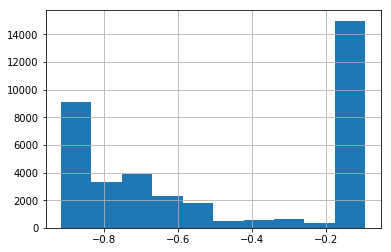

In [170]:
train[(train.category_name == 'Детская одежда и обувь') & \
      (train.deal_probability > 0.0)]['deal_probability'].hist()

In [59]:
# EVALUATION
scores = []
for i in range(3):
    print(i)
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1)
    regr = Ridge(alpha=10, solver='saga', fit_intercept=False)
    regr.fit(X_train, y_train)
    y_pred = regr.predict(X_valid)
    y_preds = []
    for j in y_pred:
        if j < 0:
            j = 0
        elif j > 1:
            j = 0.9
        y_preds.append(j)
    scores.append(np.sqrt(mean_squared_error(y_valid, y_preds)))
    print(np.sqrt(mean_squared_error(y_valid, y_preds)))

0
0.22290955993673778
1
0.22244879005245177
2
0.2223691516801678


In [66]:
# +prices (log10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.22301643251530118, 0.22368516851785247, 0.2230549120396857]
0.22325217102427977
0.00030657820158364117


In [28]:
# +prices (log10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.22246112171518387, 0.22310458843630732, 0.22161788921823194, 0.2218981995306865, 0.22283554515814066]
0.22238346881171006
0.0005571382051976815


In [35]:
# +prices (log10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.22141052581960102, 0.22303621260456513, 0.2230555212355652, 0.2220517927002634, 0.22147723100045666]
0.2222062566720903
0.0007209164010786737


In [73]:
# +replaced_prices (log10)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.2230832589579101, 0.2224471972511783, 0.22292029697986868, 0.22229481772009962, 0.22211208979861438]
0.2225715321415342
0.0003705721385949064


In [84]:
# +replaced_prices (log10) ( < 50 on prices)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.22256999742697758, 0.22331047793375708, 0.22195496017729216, 0.22200844443775483, 0.22175048564844055]
0.22231887312484444
0.000565368276201925


In [87]:
# price+replaced_prices (log10) ( < 50 on prices)
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.2206139993190547, 0.2216800536771155, 0.22254093746308248, 0.22257190225150025, 0.22295380118739855]
0.22207213877963028
0.0008398530524794742


In [91]:
# price+replaced_prices (log10) ( < 50 on prices) + diffs
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.22177152025303365, 0.22280759590352942, 0.22302889134067233, 0.22186109869832368, 0.22158686071531233]
0.2222111933821743
0.0005882169575709892


In [100]:
# price+replaced_prices (log10) ( < 50 on prices) itemseq changed to number not category
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.22178629145130135, 0.22329721479182651, 0.2216777810050795, 0.22258719704919225, 0.22248119567426441]
0.2223659359943328
0.000589756989340037


In [106]:
# price+replaced_prices (log10) ( < 50 on prices) itemseq changed to number not category + per features
print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.222128812169419, 0.22284027053657346, 0.22215106877629265, 0.2213437881564899, 0.22232680992861698]
0.22215814991347838
0.00048121318812640375


In [116]:
# price+replaced_prices (log10) ( < 50 on prices) itemseq changed to number not category + per features
# + user_delay + user_placedads

print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.2209863337257742, 0.22166455103962746, 0.22152664458996918, 0.22179810977967734, 0.2211986348823353]
0.22143485480347672
0.00030003696833162257


In [173]:
# price+replaced_prices (log10) ( < 50 on prices) itemseq changed to number not category + per features
# + user_delay + user_placedads
# уточнен токенайзер

print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.22097244727755475, 0.22181372874577687, 0.22182175702898538, 0.2210787775221779, 0.22212666289626945]
0.22156267469415286
0.00045403950522730167


In [178]:
# price+replaced_prices (log10) ( < 50 on prices) itemseq changed to number not category + per features
# + user_delay + user_placedads

print(scores)
print(np.mean(scores))
print(np.std(scores))

[0.22230470877987063, 0.2223683933975324, 0.22056075805403796, 0.22165251127763186, 0.22168467909626915]
0.22171421012106837
0.0006498884404105498


In [30]:
tf_descr.idf_

array([ 3.05726123, 11.66790834, 11.43906676, ...,  9.11400881,
        8.72950256, 11.41659391])

In [31]:
f = open('tf_features.txt', 'w')
f.write('\n'.join(tf_descr.get_feature_names()))
f.close()

In [13]:
f = open('descriptions.txt', 'w')
for descr in train.description.fillna(''):
    if descr and descr != 'nan':
        f.write(re.sub('[\n/]', ' ', descr) + '\n')


for descr in test.description.fillna(''):
    if descr:
        f.write(re.sub('[\n/]', ' ', descr) + '\n')
f.close()

In [14]:
f = open('descriptions.txt', 'a')
import csv
with open('data/test_active.csv') as csvfile:
    _ = csvfile.readline()
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    
    for i, row in enumerate(reader):
        if i > 3000000:
            break
        d =row[10]
        if len(d) > 10:
            f.write(re.sub('\n/]', ' ', d) + '\n')
f.close()

In [266]:
line = f.readline()
print(line)
tokenizer(line)

Уникальные свойства фасадных панелей FineBer позволяют им быть на пике привлекательности среди существующих облицовочных материалов. Вместе с практичностью, свойственной искусственным покрытиям, панели FineBer обладают важным свойством – они естественно передают поверхность природных материалов. Все больше владельцев загородных домов отдают предпочтение фасадным панелям, поскольку это наиболее выигрышный и экономичный способ придать жилью свежий и естественный вид. Изготовленные методом литья, панели прекрасно подходят для сплошной облицовки фасада и отделки цоколя.



['уникальные',
 'свойства',
 'фасадных',
 'панелей',
 'fineber',
 'позволяют',
 'им',
 'быть',
 'на',
 'пике',
 'привлекательности',
 'среди',
 'существующих',
 'облицовочных',
 'материалов',
 'вместе',
 'с',
 'практичностью',
 'свойственной',
 'искусственным',
 'покрытиям',
 'панели',
 'fineber',
 'обладают',
 'важным',
 'свойством',
 'они',
 'естественно',
 'передают',
 'поверхность',
 'природных',
 'материалов',
 'все',
 'больше',
 'владельцев',
 'загородных',
 'домов',
 'отдают',
 'предпочтение',
 'фасадным',
 'панелям',
 'поскольку',
 'это',
 'наиболее',
 'выигрышный',
 'и',
 'экономичный',
 'способ',
 'придать',
 'жилью',
 'свежий',
 'и',
 'естественный',
 'вид',
 'изготовленные',
 'методом',
 'литья',
 'панели',
 'прекрасно',
 'подходят',
 'для',
 'сплошной',
 'облицовки',
 'фасада',
 'и',
 'отделки',
 'цоколя']

In [2]:
l = 0
for line in open('descriptions.txt'):
    l += 1

In [16]:
def iter_corp(file):
    file = open(file)
    for i, line in enumerate(file):
        yield tokenizer(line)
        if not i % 1000000:
            print(i)
def iter_tokenized(file):
    file = open(file)
    for i, line in enumerate(file):
        yield line.rstrip('\n').split()
        if not i % 1000000:
            print(i)

In [32]:
import gensim

In [12]:
f = open('descriptions_tokenized.txt', 'w')
for d in iter_corp('descriptions.txt'):
    f.write(' '.join(d) + '\n')
f.close()

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000


In [33]:
ft = gensim.models.FastText.load('ft_200')

In [58]:
aug_stops = set()
for stop in stops:
    aug = list(list(zip(*ft.wv.most_similar(stop, topn=5)))[0])
    aug_stops.update(aug + [stop])

In [59]:
len(aug_stops)

660

In [61]:
f = open('stops.txt', 'w')
f.write('\n'.join(sorted(aug_stops)))
f.close()

In [62]:
stops_aug = set(open('stops.txt').read().splitlines())

In [39]:
list(list(zip(*ft.wv.most_similar('это')))[0])

['пожалуй',
 'во-первых',
 'ведь',
 'несомненно',
 'поистине',
 'безусловно',
 'по-настоящему',
 'воплощение',
 'роде',
 'представить']

In [19]:
ft = gensim.models.FastText(size=200, max_vocab_size=100000, min_n=3, max_n=6, sg=1)
ft.build_vocab(iter_tokenized('descriptions_tokenized.txt'))

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000


In [52]:
for i in range(1):
    ft.train(iter_tokenized('descriptions_tokenized.txt'), epochs=1, total_examples=l)

0
1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000


In [69]:
ft.save('ft_200')

In [51]:
ft.wv.most_similar('выгодно', topn=20)

[('выгодно!', 0.770147442817688),
 ('выгодной', 0.651898205280304),
 ('выгодное', 0.6243991255760193),
 ('выгоднее', 0.5971491932868958),
 ('выгодная', 0.5918376445770264),
 ('выгодную', 0.5734644532203674),
 ('выгоды', 0.5570979118347168),
 ('выгодный', 0.5301967263221741),
 ('выгодных', 0.5157825946807861),
 ('выгодным', 0.5104082822799683),
 ('уникально', 0.50709468126297),
 ('модно', 0.5021661520004272),
 ('удачно', 0.49940693378448486),
 ('подчеркнуть', 0.4971765875816345),
 ('надежно', 0.4952095150947571),
 ('выгодные', 0.47728419303894043),
 ('элегантно', 0.47407442331314087),
 ('надежно!', 0.4737938642501831),
 ('подчеркнут', 0.4725949466228485),
 ('привлекательным', 0.4698737859725952)]

In [64]:
ft.wv.most_similar('темно', topn=20)

[('тёмно', 0.8828181028366089),
 ('темно-серого', 0.8020027279853821),
 ('темно-зеленый', 0.7870879173278809),
 ('темно-синий', 0.7825117111206055),
 ('темно-зеленого', 0.7775652408599854),
 ('тёмно-синий', 0.7763341069221497),
 ('темно-синего', 0.7691655158996582),
 ('тёмно-синего', 0.7673777937889099),
 ('серо', 0.7647370100021362),
 ('хаки', 0.7478758096694946),
 ('бордовый', 0.745089590549469),
 ('тёмно-синие', 0.7367420196533203),
 ('темно-синие', 0.7353248596191406),
 ('темно-серый', 0.7347298860549927),
 ('темно-синее', 0.7292181849479675),
 ('светло', 0.7226839065551758),
 ('бледно', 0.7224531769752502),
 ('синий', 0.7179343700408936),
 ('коралловый', 0.7175320386886597),
 ('синего', 0.7141825556755066)]

In [14]:
ft.wv.most_similar('продаю', topn=20)

[('продам', 0.8926448822021484),
 ('породам', 0.8222749829292297),
 ('подаю', 0.8212562799453735),
 ('подам', 0.8016546964645386),
 ('продаём', 0.7127610445022583),
 ('продаю!', 0.6926068067550659),
 ('продам!', 0.6833595037460327),
 ('продаётся', 0.6508121490478516),
 ('продаются', 0.639060914516449),
 ('продается', 0.6374585032463074),
 ('продаем', 0.6360138058662415),
 ('продаеться', 0.6331555247306824),
 ('пристраиваю', 0.5691359639167786),
 ('отдаю', 0.5650057792663574),
 ('распродаю', 0.5646348595619202),
 ('продала', 0.5605756044387817),
 ('продадим', 0.5603208541870117),
 ('пристрою', 0.5554842352867126),
 ('продают', 0.5507625937461853),
 ('продаёт', 0.5415832996368408)]

In [22]:
np.mean(ft[['продам', 'коляску']], axis=0)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([-0.27385157,  0.00558719,  0.19548674,  0.03934233, -0.05145882,
        0.08936844,  0.3020534 , -0.12158185,  0.0168554 , -0.10375074,
       -0.19547819, -0.12784918, -0.17205824, -0.2608626 ,  0.05107316,
       -0.28057608, -0.22552049,  0.19705117, -0.19623505,  0.03735689,
       -0.08101299,  0.47404248,  0.04324357, -0.10307797, -0.12157466,
        0.48103237, -0.276587  ,  0.33825833, -0.26624778, -0.13644597,
       -0.00751411,  0.13123378,  0.11204437,  0.03394356,  0.11325666,
       -0.3342349 , -0.00428364,  0.1309477 ,  0.07253724, -0.0385472 ,
        0.06559137, -0.02563395, -0.01695779, -0.09191621, -0.20428425,
        0.02158117,  0.37881544, -0.0279393 ,  0.09087397,  0.24271569,
        0.17614721,  0.06343196,  0.10256524,  0.2990041 , -0.11522566,
       -0.16002469,  0.24638724,  0.28039706,  0.10130057, -0.12203778,
        0.1458301 , -0.055197  , -0.11988545, -0.49093524, -0.08043542,
       -0.02254562,  0.23088229, -0.16658366,  0.33694386,  0.19

In [28]:
X_d_train = np.zeros((len(train), 200))
for i, d in enumerate(train.description.fillna('')):
    tokens =  tokenizer(d)
    if tokens:
        try:
            vectors = ft[tokens]
            X_d_train[i] = np.mean(vectors, axis=0)
        except:
            continue

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [32]:
X_d_test = np.zeros((len(test), 200))
for i, d in enumerate(test.description.fillna('')):
    tokens =  tokenizer(d)
    if tokens:
        try:
            vectors = ft[tokens]
            X_d_test[i] = np.mean(vectors, axis=0)
        except:
            continue

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [33]:
test_labels = km.predict(X_d_test)

Computing label assignment and total inertia


In [34]:
train_labels = km.labels_

In [36]:
import pickle
pickle.dump(train_labels, open('train_labels.pkl', 'wb'))
pickle.dump(test_labels, open('test_labels.pkl', 'wb'))


In [29]:
from sklearn.cluster import MiniBatchKMeans

In [31]:
km = MiniBatchKMeans(5000, init_size=30000, batch_size=10000, max_iter=5000, verbose=1, max_no_improvement=500)
km.fit(X_d_train)

Init 1/3 with method: k-means++
Inertia for init 1/3: 20333.570229
Init 2/3 with method: k-means++
Inertia for init 2/3: 20402.582602
Init 3/3 with method: k-means++
Inertia for init 3/3: 20376.329604
Minibatch iteration 1/755000: mean batch inertia: 0.868446, ewa inertia: 0.868446 
Minibatch iteration 2/755000: mean batch inertia: 0.855724, ewa inertia: 0.868276 
Minibatch iteration 3/755000: mean batch inertia: 0.847413, ewa inertia: 0.867999 
Minibatch iteration 4/755000: mean batch inertia: 0.856981, ewa inertia: 0.867852 
Minibatch iteration 5/755000: mean batch inertia: 0.836923, ewa inertia: 0.867441 
Minibatch iteration 6/755000: mean batch inertia: 0.842286, ewa inertia: 0.867106 
Minibatch iteration 7/755000: mean batch inertia: 0.829958, ewa inertia: 0.866612 
Minibatch iteration 8/755000: mean batch inertia: 0.833199, ewa inertia: 0.866167 
Minibatch iteration 9/755000: mean batch inertia: 0.815246, ewa inertia: 0.865490 
[MiniBatchKMeans] Reassigning 4797 cluster centers.


Minibatch iteration 96/755000: mean batch inertia: 0.875761, ewa inertia: 0.894839 
Minibatch iteration 97/755000: mean batch inertia: 0.869725, ewa inertia: 0.894505 
Minibatch iteration 98/755000: mean batch inertia: 0.866040, ewa inertia: 0.894126 
Minibatch iteration 99/755000: mean batch inertia: 0.861070, ewa inertia: 0.893687 
Minibatch iteration 100/755000: mean batch inertia: 0.891226, ewa inertia: 0.893654 
Minibatch iteration 101/755000: mean batch inertia: 0.865438, ewa inertia: 0.893279 
Minibatch iteration 102/755000: mean batch inertia: 0.881368, ewa inertia: 0.893120 
Minibatch iteration 103/755000: mean batch inertia: 0.876736, ewa inertia: 0.892902 
Minibatch iteration 104/755000: mean batch inertia: 0.872459, ewa inertia: 0.892630 
Minibatch iteration 105/755000: mean batch inertia: 0.870827, ewa inertia: 0.892340 
Minibatch iteration 106/755000: mean batch inertia: 0.862576, ewa inertia: 0.891944 
Minibatch iteration 107/755000: mean batch inertia: 0.862460, ewa ine

Minibatch iteration 192/755000: mean batch inertia: 0.962954, ewa inertia: 0.937686 
Minibatch iteration 193/755000: mean batch inertia: 0.948985, ewa inertia: 0.937836 
Minibatch iteration 194/755000: mean batch inertia: 0.964515, ewa inertia: 0.938191 
Minibatch iteration 195/755000: mean batch inertia: 0.973257, ewa inertia: 0.938657 
Minibatch iteration 196/755000: mean batch inertia: 0.962750, ewa inertia: 0.938978 
Minibatch iteration 197/755000: mean batch inertia: 0.964739, ewa inertia: 0.939320 
Minibatch iteration 198/755000: mean batch inertia: 0.969825, ewa inertia: 0.939726 
Minibatch iteration 199/755000: mean batch inertia: 0.947082, ewa inertia: 0.939824 
Minibatch iteration 200/755000: mean batch inertia: 0.969812, ewa inertia: 0.940223 
Minibatch iteration 201/755000: mean batch inertia: 0.956057, ewa inertia: 0.940434 
Minibatch iteration 202/755000: mean batch inertia: 0.961373, ewa inertia: 0.940712 
Minibatch iteration 203/755000: mean batch inertia: 0.948864, ewa

Minibatch iteration 289/755000: mean batch inertia: 0.929786, ewa inertia: 0.944810 
Minibatch iteration 290/755000: mean batch inertia: 0.942773, ewa inertia: 0.944783 
Minibatch iteration 291/755000: mean batch inertia: 0.941196, ewa inertia: 0.944735 
Minibatch iteration 292/755000: mean batch inertia: 0.938319, ewa inertia: 0.944650 
Minibatch iteration 293/755000: mean batch inertia: 0.939446, ewa inertia: 0.944581 
Minibatch iteration 294/755000: mean batch inertia: 0.937450, ewa inertia: 0.944486 
Minibatch iteration 295/755000: mean batch inertia: 0.921815, ewa inertia: 0.944184 
Minibatch iteration 296/755000: mean batch inertia: 0.933691, ewa inertia: 0.944045 
Minibatch iteration 297/755000: mean batch inertia: 0.931414, ewa inertia: 0.943877 
Minibatch iteration 298/755000: mean batch inertia: 0.938718, ewa inertia: 0.943808 
Minibatch iteration 299/755000: mean batch inertia: 0.927279, ewa inertia: 0.943588 
Minibatch iteration 300/755000: mean batch inertia: 0.936055, ewa

Minibatch iteration 386/755000: mean batch inertia: 0.949682, ewa inertia: 0.932489 
Minibatch iteration 387/755000: mean batch inertia: 0.924011, ewa inertia: 0.932376 
Minibatch iteration 388/755000: mean batch inertia: 0.922604, ewa inertia: 0.932246 
Minibatch iteration 389/755000: mean batch inertia: 0.918510, ewa inertia: 0.932063 
Minibatch iteration 390/755000: mean batch inertia: 0.929903, ewa inertia: 0.932035 
Minibatch iteration 391/755000: mean batch inertia: 0.931005, ewa inertia: 0.932021 
Minibatch iteration 392/755000: mean batch inertia: 0.923662, ewa inertia: 0.931910 
Minibatch iteration 393/755000: mean batch inertia: 0.935128, ewa inertia: 0.931953 
Minibatch iteration 394/755000: mean batch inertia: 0.906666, ewa inertia: 0.931616 
Minibatch iteration 395/755000: mean batch inertia: 0.925300, ewa inertia: 0.931532 
Minibatch iteration 396/755000: mean batch inertia: 0.913263, ewa inertia: 0.931289 
Minibatch iteration 397/755000: mean batch inertia: 0.921044, ewa

Minibatch iteration 483/755000: mean batch inertia: 0.918578, ewa inertia: 0.917980 
Minibatch iteration 484/755000: mean batch inertia: 0.913142, ewa inertia: 0.917915 
Minibatch iteration 485/755000: mean batch inertia: 0.891602, ewa inertia: 0.917565 
Minibatch iteration 486/755000: mean batch inertia: 0.922030, ewa inertia: 0.917625 
Minibatch iteration 487/755000: mean batch inertia: 0.914876, ewa inertia: 0.917588 
Minibatch iteration 488/755000: mean batch inertia: 0.915757, ewa inertia: 0.917564 
Minibatch iteration 489/755000: mean batch inertia: 0.900959, ewa inertia: 0.917343 
Minibatch iteration 490/755000: mean batch inertia: 0.919322, ewa inertia: 0.917369 
Minibatch iteration 491/755000: mean batch inertia: 0.916115, ewa inertia: 0.917352 
Minibatch iteration 492/755000: mean batch inertia: 0.922727, ewa inertia: 0.917424 
Minibatch iteration 493/755000: mean batch inertia: 0.925582, ewa inertia: 0.917532 
Minibatch iteration 494/755000: mean batch inertia: 0.894145, ewa

MiniBatchKMeans(batch_size=10000, compute_labels=True, init='k-means++',
        init_size=30000, max_iter=5000, max_no_improvement=500,
        n_clusters=5000, n_init=3, random_state=None,
        reassignment_ratio=0.01, tol=0.0, verbose=1)

## Cабмит

In [58]:
y_pred = regr.predict(X_test)

In [451]:
y_pred

array([0.27033776, 0.23528686, 0.19474879, ..., 0.02205327, 0.40329823,
       0.10818708], dtype=float32)

In [169]:
test = pd.read_csv('data/test.csv')

In [13]:
f = open('submission_60blend.txt', 'w')
f.write('item_id,deal_probability\n')
for i, proba in list(zip(test.item_id, y_pred)):
    if proba < 0:
        proba = 0
    elif proba > 1:
        proba = 0.9
    f.write(','.join([i, str(proba)]) + '\n')
f.close()

## PRICE PREDICTION ON ACTIVE


In [23]:
from sklearn.linear_model import SGDRegressor

In [43]:
regr_sgd = SGDRegressor(verbose=1, warm_start=True, alpha=0.0001,)

In [44]:
import csv
it = 0
with open('data/test_active.csv') as csvfile:
    _ = csvfile.readline()
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    params_batch = []
    descr_batch = []
    title_batch = []
    regions_batch = []
    cities_batch = []
    weeks_batch = []
    categories_batch = []
    parent_cat_batch = []
    
    user_types_batch = []
    y_batch = []
    for i, row in enumerate(reader):
        
        
        try:
            price = float(row[11])
        except:
            price = 0
        if price > 100:
            
            y_batch.append(price)
        else:
            continue
        
        params_batch.append(' '.join(row[6:9]))
        title_batch.append(row[9])
        descr_batch.append(row[10])
        regions_batch.append(row[2])
        cities_batch.append(row[3])
        user_types_batch.append(row[14])
        weeks_batch.append(week(row[13]))
        parent_cat_batch.append(row[4])
        categories_batch.append(row[5])
        
        if len(y_batch) > 1000:
            try:
                X_params_batch = cv_params.transform(params_batch)
                X_descr_batch = tf_descr.transform(descr_batch)
                X_title_batch = tf_title.transform(title_batch)

                int_reg_enc = lenc_region.transform(regions_batch)
                X_region_batch = onehot_region.transform(int_reg_enc.reshape(len(int_reg_enc), 1))

                int_city_enc = lenc_city.transform(cities_batch)
                X_city_batch = onehot_city.transform(int_city_enc.reshape(len(int_city_enc), 1))
                
                int_cat_enc = lenc_category_name.transform(categories_batch)
                X_cat_batch = onehot_category_name.transform(int_cat_enc.reshape(len(int_cat_enc), 1))
                
                int_parcat_enc = lenc_parent_category_name.transform(parent_cat_batch)
                X_parcat_batch = onehot_parent_category_name.transform(int_parcat_enc.reshape(len(int_parcat_enc), 1))
                
                
                int_user_type_enc = lenc_user_type.transform(user_types_batch)
                X_user_type_batch = onehot_user_type.transform(int_user_type_enc.reshape(len(int_user_type_enc), 1))

                
                X_week_batch = onehot_week.transform(np.array(weeks_batch).reshape(len(weeks_batch), 1))
                
                
                X_batch = hstack([X_params_batch, X_descr_batch, X_title_batch,
                                 X_region_batch, X_city_batch, X_user_type_batch,
                                 X_week_batch, X_cat_batch, X_parcat_batch])
                y = np.log10(y_batch).reshape(-1,1)

                regr_sgd.partial_fit(X_batch, y)
                params_batch = []
                descr_batch = []
                title_batch = []
                regions_batch = []
                cities_batch = []
                user_types_batch = []
                weeks_batch = []
                categories_batch = []
                parent_cat_batch = []
                y_batch = []
                it += 1
                print('Iterated ', it, ' times!')
            
            except ValueError:
                params_batch = []
                categories_batch = []
                parent_cat_batch = []
                descr_batch = []
                title_batch = []
                regions_batch = []
                cities_batch = []
                user_types_batch = []
                weeks_batch = []
                y_batch = []
            
            
        
        
        

NameError: name 'onehot_week' is not defined

In [108]:
X_batch

<1001x76452 sparse matrix of type '<class 'numpy.float64'>'
	with 36138 stored elements in COOrdinate format>

In [52]:
X_for_price_train = hstack([X_params_train, X_descr_train, X_title_train,
            X_region_train, X_city_train, X_user_type_train, X_week_train, X_category_name_train,
            X_parent_category_name_train])


In [51]:
X_for_price_test = hstack([X_params_test, X_descr_test, X_title_test,
            X_region_test, X_city_test, X_user_type_test, X_week_test,
            X_category_name_test, X_parent_category_name_test])


NameError: name 'X_params_test' is not defined

In [38]:
regr_sgd.predict(X_for_price_train)

array([2.99732065, 3.33178756, 3.22923281, ..., 6.38847194, 2.59504693,
       3.17151792])

In [53]:
np.sqrt(mean_squared_error(np.log10(train.price.fillna(100) + 1), regr_sgd.predict(X_for_price_train)))

0.6670025309821125

In [117]:
list(zip(train.price.fillna(0), np.exp(regr_sgd.predict(X_for_price))))

[(400.0, 164.34129662235424),
 (3000.0, 2486.5722679028436),
 (4000.0, 1967.172627086104),
 (2200.0, 1908.9537254376808),
 (40000.0, 85454.24578575794),
 (1300.0, 129.4059112620642),
 (11000.0, 3668.402738507981),
 (500.0, 1177.10455852527),
 (500.0, 1484.1203333166545),
 (400.0, 339.2671052652306),
 (18000.0, 20301.949949776088),
 (1.0, 593.7510993143944),
 (70.0, 63.148146848545494),
 (2500.0, 2076.742291848636),
 (5000.0, 5715.044110378433),
 (800.0, 1163.7379269093437),
 (140000.0, 203673.62176953585),
 (500.0, 906.799704306689),
 (1000.0, 1663.809571137391),
 (100000.0, 5882.356442456419),
 (1748000.0, 1799575.8473037323),
 (2600.0, 8433.402953738252),
 (249000.0, 267228.6190030254),
 (1300.0, 1201.5435751181506),
 (0.0, 1025.1522301458017),
 (1500.0, 885.0953984371087),
 (1000.0, 1265.0825062984043),
 (1500.0, 812.0646094986272),
 (1000.0, 1585.950528640798),
 (200.0, 353.6603862330036),
 (0.0, 1211.9240468665719),
 (130.0, 684.0389542255682),
 (300.0, 645.795667756951),
 (900000

In [4]:
best = pd.read_csv('best_public_blend.csv')
xgb = pd.read_csv('ridgelgb.csv')

In [10]:
my = pd.read_csv('submission_58stack.txt')
mys = pd.read_csv('submission_59stack.txt')

In [12]:
y_pred = np.mean([best.deal_probability.values, my.deal_probability.values], axis=0)

In [11]:
spearmanr(best.deal_probability.values, mys.deal_probability.values)

SpearmanrResult(correlation=0.9179669531244493, pvalue=0.0)

In [20]:
sum(list(best.deal_probability.values - my.deal_probability.values))

1780.0295779802088

In [19]:
sum(list(xgb.deal_probability.values - my.deal_probability.values))

6378.912781659782

In [18]:
sum(list(best.deal_probability.values - xgb.deal_probability.values))

-4598.883203679462

In [41]:
from sklearn.linear_model import SGDRegressor
regr_sgd = SGDRegressor(verbose=1, warm_start=True, learning_rate='constant', eta0=0.001)

In [49]:
?SGDRegressor

In [42]:
import csv
it = 0
with open('data/train_active.csv') as csvfile:
    _ = csvfile.readline()
    reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    params_batch = []
    descr_batch = []
    title_batch = []
    params_1 = []
    params_2 = []
    params_3 = []
    y_batch = []
    for i, row in enumerate(reader):
        
        
        try:
            price = float(row[11])
        except:
            price = 0
        if price > 100:
            
            y_batch.append(np.log10(price))
        else:
            continue
        
        params_batch.append(' '.join(row[6:9]))
        params_1.append(row[6])
        params_2.append(row[7])
        params_3.append(row[8])
        title_batch.append(row[9])
        descr_batch.append(row[10])
        
        if len(y_batch) > 100:
            try:
                X_params_batch = cv_params.transform(params_batch)
                X_descr_batch = tf_descr.transform(descr_batch)
                X_title_batch = tf_title.transform(title_batch)

                param_1_ints = lenc_param_1.transform(params_1)
                X_param_1 = onehot_param_1.transform(param_1_ints.reshape(-1, 1))

                param_2_ints = lenc_param_2.transform(params_2)
                X_param_2 = onehot_param_2.transform(param_2_ints.reshape(-1, 1))

                param_3_ints = lenc_param_3.transform(params_3)
                X_param_3 = onehot_param_3.transform(param_3_ints.reshape(-1, 1))

                X_batch = hstack([X_params_batch, X_descr_batch, X_title_batch,
                                 X_param_1, X_param_2, X_param_3])
                y = np.array(y_batch).reshape(-1,1)

                regr_sgd.partial_fit(X_batch, y)
            except Exception as e:
                print(e)
            params_batch = []
            descr_batch = []
            title_batch = []
            params_1 = []
            params_2 = []
            params_3 = []
            y_batch = []
            it += 1
            print('Iterated ', it, ' times!')
        
        
        

-- Epoch 1
Norm: 0.27, NNZs: 2710, Bias: 0.003398, T: 101, Avg. loss: 6.158871
Total training time: 0.00 seconds.
Iterated  1  times!
-- Epoch 1
Norm: 0.52, NNZs: 4329, Bias: 0.006623, T: 101, Avg. loss: 5.669009
Total training time: 0.00 seconds.
Iterated  2  times!
-- Epoch 1
Norm: 0.74, NNZs: 5367, Bias: 0.009739, T: 101, Avg. loss: 5.468231
Total training time: 0.00 seconds.
Iterated  3  times!
-- Epoch 1
Norm: 0.95, NNZs: 6472, Bias: 0.012517, T: 101, Avg. loss: 4.317489
Total training time: 0.00 seconds.
Iterated  4  times!
-- Epoch 1
Norm: 1.14, NNZs: 7632, Bias: 0.015138, T: 101, Avg. loss: 4.067739
Total training time: 0.00 seconds.
Iterated  5  times!
-- Epoch 1
Norm: 1.31, NNZs: 8347, Bias: 0.017437, T: 101, Avg. loss: 3.170057
Total training time: 0.00 seconds.
Iterated  6  times!
-- Epoch 1
Norm: 1.46, NNZs: 9198, Bias: 0.019841, T: 101, Avg. loss: 3.546355
Total training time: 0.00 seconds.
Iterated  7  times!
-- Epoch 1
Norm: 1.63, NNZs: 9831, Bias: 0.022183, T: 101, Avg

-- Epoch 1
Norm: 4.49, NNZs: 27836, Bias: 0.077181, T: 101, Avg. loss: 0.830790
Total training time: 0.00 seconds.
Iterated  62  times!
-- Epoch 1
Norm: 4.52, NNZs: 28027, Bias: 0.077830, T: 101, Avg. loss: 0.730570
Total training time: 0.00 seconds.
Iterated  63  times!
-- Epoch 1
Norm: 4.54, NNZs: 28233, Bias: 0.078204, T: 101, Avg. loss: 0.820002
Total training time: 0.00 seconds.
Iterated  64  times!
-- Epoch 1
Norm: 4.55, NNZs: 28363, Bias: 0.078639, T: 101, Avg. loss: 0.725105
Total training time: 0.00 seconds.
Iterated  65  times!
-- Epoch 1
Norm: 4.58, NNZs: 28531, Bias: 0.079184, T: 101, Avg. loss: 0.752255
Total training time: 0.00 seconds.
Iterated  66  times!
-- Epoch 1
Norm: 4.61, NNZs: 28707, Bias: 0.079697, T: 101, Avg. loss: 0.701501
Total training time: 0.00 seconds.
Iterated  67  times!
-- Epoch 1
Norm: 4.64, NNZs: 28910, Bias: 0.080308, T: 101, Avg. loss: 1.006027
Total training time: 0.00 seconds.
Iterated  68  times!
-- Epoch 1
Norm: 4.67, NNZs: 29054, Bias: 0.0810

-- Epoch 1
Norm: 5.58, NNZs: 36202, Bias: 0.101665, T: 101, Avg. loss: 0.380597
Total training time: 0.00 seconds.
Iterated  132  times!
-- Epoch 1
Norm: 5.59, NNZs: 36262, Bias: 0.101932, T: 101, Avg. loss: 0.442954
Total training time: 0.00 seconds.
Iterated  133  times!
-- Epoch 1
Norm: 5.61, NNZs: 36307, Bias: 0.102252, T: 101, Avg. loss: 0.575011
Total training time: 0.00 seconds.
Iterated  134  times!
-- Epoch 1
Norm: 5.62, NNZs: 36369, Bias: 0.102549, T: 101, Avg. loss: 0.423542
Total training time: 0.00 seconds.
Iterated  135  times!
-- Epoch 1
Norm: 5.63, NNZs: 36460, Bias: 0.102890, T: 101, Avg. loss: 0.638476
Total training time: 0.00 seconds.
Iterated  136  times!
-- Epoch 1
Norm: 5.64, NNZs: 36541, Bias: 0.103090, T: 101, Avg. loss: 0.391808
Total training time: 0.00 seconds.
Iterated  137  times!
-- Epoch 1
Norm: 5.64, NNZs: 36614, Bias: 0.103161, T: 101, Avg. loss: 0.215796
Total training time: 0.00 seconds.
Iterated  138  times!
-- Epoch 1
Norm: 5.65, NNZs: 36676, Bias:

-- Epoch 1
Norm: 6.12, NNZs: 39849, Bias: 0.115522, T: 101, Avg. loss: 0.449244
Total training time: 0.00 seconds.
Iterated  200  times!
-- Epoch 1
Norm: 6.13, NNZs: 39900, Bias: 0.115707, T: 101, Avg. loss: 0.399268
Total training time: 0.00 seconds.
Iterated  201  times!
-- Epoch 1
Norm: 6.13, NNZs: 39939, Bias: 0.115894, T: 101, Avg. loss: 0.298392
Total training time: 0.00 seconds.
Iterated  202  times!
-- Epoch 1
Norm: 6.13, NNZs: 39979, Bias: 0.115959, T: 101, Avg. loss: 0.242879
Total training time: 0.00 seconds.
Iterated  203  times!
-- Epoch 1
Norm: 6.14, NNZs: 40017, Bias: 0.116100, T: 101, Avg. loss: 0.359259
Total training time: 0.00 seconds.
Iterated  204  times!
-- Epoch 1
Norm: 6.14, NNZs: 40067, Bias: 0.116307, T: 101, Avg. loss: 0.290323
Total training time: 0.00 seconds.
Iterated  205  times!
-- Epoch 1
Norm: 6.15, NNZs: 40121, Bias: 0.116534, T: 101, Avg. loss: 0.386878
Total training time: 0.00 seconds.
Iterated  206  times!
-- Epoch 1
Norm: 6.16, NNZs: 40162, Bias:

-- Epoch 1
Norm: 6.45, NNZs: 41895, Bias: 0.124336, T: 101, Avg. loss: 0.302101
Total training time: 0.00 seconds.
Iterated  260  times!
-- Epoch 1
Norm: 6.46, NNZs: 41923, Bias: 0.124517, T: 101, Avg. loss: 0.401230
Total training time: 0.00 seconds.
Iterated  261  times!
-- Epoch 1
Norm: 6.46, NNZs: 41957, Bias: 0.124568, T: 101, Avg. loss: 0.319630
Total training time: 0.00 seconds.
Iterated  262  times!
-- Epoch 1
Norm: 6.46, NNZs: 41983, Bias: 0.124651, T: 101, Avg. loss: 0.270393
Total training time: 0.00 seconds.
Iterated  263  times!
-- Epoch 1
Norm: 6.46, NNZs: 42008, Bias: 0.124704, T: 101, Avg. loss: 0.333461
Total training time: 0.00 seconds.
Iterated  264  times!
-- Epoch 1
Norm: 6.47, NNZs: 42034, Bias: 0.124845, T: 101, Avg. loss: 0.282276
Total training time: 0.00 seconds.
Iterated  265  times!
-- Epoch 1
Norm: 6.48, NNZs: 42070, Bias: 0.125018, T: 101, Avg. loss: 0.242959
Total training time: 0.00 seconds.
Iterated  266  times!
-- Epoch 1
Norm: 6.48, NNZs: 42087, Bias:

-- Epoch 1
Norm: 6.81, NNZs: 43460, Bias: 0.133639, T: 101, Avg. loss: 0.139073
Total training time: 0.00 seconds.
Iterated  330  times!
-- Epoch 1
Norm: 6.82, NNZs: 43479, Bias: 0.133783, T: 101, Avg. loss: 0.247855
Total training time: 0.00 seconds.
Iterated  331  times!
-- Epoch 1
Norm: 6.82, NNZs: 43490, Bias: 0.133872, T: 101, Avg. loss: 0.213931
Total training time: 0.00 seconds.
Iterated  332  times!
-- Epoch 1
Norm: 6.83, NNZs: 43501, Bias: 0.133997, T: 101, Avg. loss: 0.222988
Total training time: 0.00 seconds.
Iterated  333  times!
-- Epoch 1
Norm: 6.83, NNZs: 43517, Bias: 0.134125, T: 101, Avg. loss: 0.250365
Total training time: 0.00 seconds.
Iterated  334  times!
-- Epoch 1
Norm: 6.84, NNZs: 43525, Bias: 0.134205, T: 101, Avg. loss: 0.223163
Total training time: 0.00 seconds.
Iterated  335  times!
-- Epoch 1
Norm: 6.84, NNZs: 43554, Bias: 0.134352, T: 101, Avg. loss: 0.280418
Total training time: 0.00 seconds.
Iterated  336  times!
-- Epoch 1
Norm: 6.84, NNZs: 43569, Bias:

-- Epoch 1
Norm: 7.06, NNZs: 44478, Bias: 0.140499, T: 101, Avg. loss: 0.181345
Total training time: 0.00 seconds.
Iterated  400  times!
-- Epoch 1
Norm: 7.06, NNZs: 44483, Bias: 0.140473, T: 101, Avg. loss: 0.209334
Total training time: 0.00 seconds.
Iterated  401  times!
-- Epoch 1
Norm: 7.07, NNZs: 44492, Bias: 0.140588, T: 101, Avg. loss: 0.192226
Total training time: 0.00 seconds.
Iterated  402  times!
-- Epoch 1
Norm: 7.07, NNZs: 44503, Bias: 0.140754, T: 101, Avg. loss: 0.206263
Total training time: 0.00 seconds.
Iterated  403  times!
-- Epoch 1
Norm: 7.09, NNZs: 44521, Bias: 0.141011, T: 101, Avg. loss: 0.272910
Total training time: 0.00 seconds.
Iterated  404  times!
-- Epoch 1
Norm: 7.09, NNZs: 44530, Bias: 0.141099, T: 101, Avg. loss: 0.226497
Total training time: 0.00 seconds.
Iterated  405  times!
-- Epoch 1
Norm: 7.09, NNZs: 44537, Bias: 0.141184, T: 101, Avg. loss: 0.173721
Total training time: 0.00 seconds.
Iterated  406  times!
-- Epoch 1
Norm: 7.09, NNZs: 44546, Bias:

-- Epoch 1
Norm: 7.24, NNZs: 45048, Bias: 0.145695, T: 101, Avg. loss: 0.270245
Total training time: 0.00 seconds.
Iterated  461  times!
-- Epoch 1
Norm: 7.25, NNZs: 45062, Bias: 0.145742, T: 101, Avg. loss: 0.275080
Total training time: 0.00 seconds.
Iterated  462  times!
-- Epoch 1
Norm: 7.25, NNZs: 45068, Bias: 0.145824, T: 101, Avg. loss: 0.287678
Total training time: 0.00 seconds.
Iterated  463  times!
-- Epoch 1
Norm: 7.25, NNZs: 45081, Bias: 0.145959, T: 101, Avg. loss: 0.244130
Total training time: 0.00 seconds.
Iterated  464  times!
-- Epoch 1
Norm: 7.26, NNZs: 45086, Bias: 0.146119, T: 101, Avg. loss: 0.194349
Total training time: 0.00 seconds.
Iterated  465  times!
-- Epoch 1
Norm: 7.27, NNZs: 45095, Bias: 0.146330, T: 101, Avg. loss: 0.289342
Total training time: 0.00 seconds.
Iterated  466  times!
-- Epoch 1
Norm: 7.27, NNZs: 45105, Bias: 0.146548, T: 101, Avg. loss: 0.321104
Total training time: 0.00 seconds.
Iterated  467  times!
-- Epoch 1
Norm: 7.27, NNZs: 45108, Bias:

-- Epoch 1
Norm: 7.43, NNZs: 45556, Bias: 0.150631, T: 101, Avg. loss: 0.215649
Total training time: 0.00 seconds.
Iterated  530  times!
-- Epoch 1
Norm: 7.44, NNZs: 45562, Bias: 0.150768, T: 101, Avg. loss: 0.274478
Total training time: 0.00 seconds.
Iterated  531  times!
-- Epoch 1
Norm: 7.44, NNZs: 45570, Bias: 0.150810, T: 101, Avg. loss: 0.157403
Total training time: 0.00 seconds.
Iterated  532  times!
-- Epoch 1
Norm: 7.44, NNZs: 45575, Bias: 0.150766, T: 101, Avg. loss: 0.142828
Total training time: 0.00 seconds.
Iterated  533  times!
-- Epoch 1
Norm: 7.44, NNZs: 45585, Bias: 0.150821, T: 101, Avg. loss: 0.215466
Total training time: 0.00 seconds.
Iterated  534  times!
-- Epoch 1
Norm: 7.44, NNZs: 45588, Bias: 0.150895, T: 101, Avg. loss: 0.222790
Total training time: 0.00 seconds.
Iterated  535  times!
-- Epoch 1
Norm: 7.45, NNZs: 45594, Bias: 0.151029, T: 101, Avg. loss: 0.232452
Total training time: 0.00 seconds.
Iterated  536  times!
-- Epoch 1
Norm: 7.45, NNZs: 45597, Bias:

-- Epoch 1
Norm: 7.58, NNZs: 45918, Bias: 0.154634, T: 101, Avg. loss: 0.193701
Total training time: 0.00 seconds.
Iterated  599  times!
-- Epoch 1
Norm: 7.58, NNZs: 45922, Bias: 0.154568, T: 101, Avg. loss: 0.163412
Total training time: 0.00 seconds.
Iterated  600  times!
-- Epoch 1
Norm: 7.58, NNZs: 45924, Bias: 0.154655, T: 101, Avg. loss: 0.170310
Total training time: 0.00 seconds.
Iterated  601  times!
-- Epoch 1
Norm: 7.58, NNZs: 45929, Bias: 0.154656, T: 101, Avg. loss: 0.166170
Total training time: 0.00 seconds.
Iterated  602  times!
-- Epoch 1
Norm: 7.58, NNZs: 45936, Bias: 0.154680, T: 101, Avg. loss: 0.176496
Total training time: 0.00 seconds.
Iterated  603  times!
-- Epoch 1
Norm: 7.58, NNZs: 45940, Bias: 0.154682, T: 101, Avg. loss: 0.157129
Total training time: 0.00 seconds.
Iterated  604  times!
-- Epoch 1
Norm: 7.58, NNZs: 45945, Bias: 0.154706, T: 101, Avg. loss: 0.162438
Total training time: 0.00 seconds.
Iterated  605  times!
-- Epoch 1
Norm: 7.59, NNZs: 45945, Bias:

-- Epoch 1
Norm: 7.70, NNZs: 46206, Bias: 0.157906, T: 101, Avg. loss: 0.185598
Total training time: 0.00 seconds.
Iterated  669  times!
-- Epoch 1
Norm: 7.70, NNZs: 46217, Bias: 0.157952, T: 101, Avg. loss: 0.199180
Total training time: 0.00 seconds.
Iterated  670  times!
-- Epoch 1
Norm: 7.70, NNZs: 46220, Bias: 0.157972, T: 101, Avg. loss: 0.286562
Total training time: 0.00 seconds.
Iterated  671  times!
-- Epoch 1
Norm: 7.71, NNZs: 46221, Bias: 0.158086, T: 101, Avg. loss: 0.182661
Total training time: 0.00 seconds.
Iterated  672  times!
-- Epoch 1
Norm: 7.71, NNZs: 46225, Bias: 0.158118, T: 101, Avg. loss: 0.258552
Total training time: 0.00 seconds.
Iterated  673  times!
-- Epoch 1
Norm: 7.71, NNZs: 46228, Bias: 0.158170, T: 101, Avg. loss: 0.214985
Total training time: 0.00 seconds.
Iterated  674  times!
-- Epoch 1
Norm: 7.71, NNZs: 46230, Bias: 0.158227, T: 101, Avg. loss: 0.154175
Total training time: 0.00 seconds.
Iterated  675  times!
-- Epoch 1
Norm: 7.71, NNZs: 46233, Bias:

-- Epoch 1
Norm: 7.80, NNZs: 46457, Bias: 0.160902, T: 101, Avg. loss: 0.149186
Total training time: 0.00 seconds.
Iterated  739  times!
-- Epoch 1
Norm: 7.80, NNZs: 46458, Bias: 0.160972, T: 101, Avg. loss: 0.121137
Total training time: 0.00 seconds.
Iterated  740  times!
-- Epoch 1
Norm: 7.81, NNZs: 46459, Bias: 0.161081, T: 101, Avg. loss: 0.180546
Total training time: 0.00 seconds.
Iterated  741  times!
-- Epoch 1
Norm: 7.81, NNZs: 46460, Bias: 0.161146, T: 101, Avg. loss: 0.150440
Total training time: 0.00 seconds.
Iterated  742  times!
-- Epoch 1
Norm: 7.81, NNZs: 46461, Bias: 0.161198, T: 101, Avg. loss: 0.143823
Total training time: 0.00 seconds.
Iterated  743  times!
-- Epoch 1
Norm: 7.81, NNZs: 46464, Bias: 0.161227, T: 101, Avg. loss: 0.163314
Total training time: 0.00 seconds.
Iterated  744  times!
-- Epoch 1
Norm: 7.81, NNZs: 46466, Bias: 0.161263, T: 101, Avg. loss: 0.138225
Total training time: 0.00 seconds.
Iterated  745  times!
-- Epoch 1
Norm: 7.82, NNZs: 46472, Bias:

-- Epoch 1
Norm: 7.93, NNZs: 46643, Bias: 0.164347, T: 101, Avg. loss: 0.129627
Total training time: 0.00 seconds.
Iterated  809  times!
-- Epoch 1
Norm: 7.92, NNZs: 46644, Bias: 0.164290, T: 101, Avg. loss: 0.113141
Total training time: 0.00 seconds.
Iterated  810  times!
-- Epoch 1
Norm: 7.93, NNZs: 46646, Bias: 0.164347, T: 101, Avg. loss: 0.174634
Total training time: 0.00 seconds.
Iterated  811  times!
-- Epoch 1
Norm: 7.93, NNZs: 46649, Bias: 0.164363, T: 101, Avg. loss: 0.139627
Total training time: 0.00 seconds.
Iterated  812  times!
-- Epoch 1
Norm: 7.93, NNZs: 46650, Bias: 0.164524, T: 101, Avg. loss: 0.252382
Total training time: 0.00 seconds.
Iterated  813  times!
-- Epoch 1
Norm: 7.94, NNZs: 46652, Bias: 0.164607, T: 101, Avg. loss: 0.175357
Total training time: 0.00 seconds.
Iterated  814  times!
-- Epoch 1
Norm: 7.93, NNZs: 46653, Bias: 0.164566, T: 101, Avg. loss: 0.124359
Total training time: 0.00 seconds.
Iterated  815  times!
-- Epoch 1
Norm: 7.93, NNZs: 46656, Bias:

-- Epoch 1
Norm: 8.00, NNZs: 46776, Bias: 0.166533, T: 101, Avg. loss: 0.151756
Total training time: 0.00 seconds.
Iterated  869  times!
-- Epoch 1
Norm: 8.00, NNZs: 46776, Bias: 0.166594, T: 101, Avg. loss: 0.113505
Total training time: 0.00 seconds.
Iterated  870  times!
-- Epoch 1
Norm: 8.00, NNZs: 46784, Bias: 0.166632, T: 101, Avg. loss: 0.121079
Total training time: 0.00 seconds.
Iterated  871  times!
-- Epoch 1
Norm: 8.01, NNZs: 46785, Bias: 0.166696, T: 101, Avg. loss: 0.154850
Total training time: 0.00 seconds.
Iterated  872  times!
-- Epoch 1
Norm: 8.01, NNZs: 46787, Bias: 0.166745, T: 101, Avg. loss: 0.160077
Total training time: 0.00 seconds.
Iterated  873  times!
-- Epoch 1
Norm: 8.01, NNZs: 46788, Bias: 0.166841, T: 101, Avg. loss: 0.271127
Total training time: 0.00 seconds.
Iterated  874  times!
-- Epoch 1
Norm: 8.01, NNZs: 46791, Bias: 0.166877, T: 101, Avg. loss: 0.154633
Total training time: 0.00 seconds.
Iterated  875  times!
-- Epoch 1
Norm: 8.01, NNZs: 46791, Bias:

-- Epoch 1
Norm: 8.07, NNZs: 46898, Bias: 0.168817, T: 101, Avg. loss: 0.156581
Total training time: 0.00 seconds.
Iterated  937  times!
-- Epoch 1
Norm: 8.07, NNZs: 46899, Bias: 0.168855, T: 101, Avg. loss: 0.145050
Total training time: 0.00 seconds.
Iterated  938  times!
-- Epoch 1
Norm: 8.07, NNZs: 46901, Bias: 0.168868, T: 101, Avg. loss: 0.150275
Total training time: 0.00 seconds.
Iterated  939  times!
-- Epoch 1
Norm: 8.07, NNZs: 46901, Bias: 0.168935, T: 101, Avg. loss: 0.191936
Total training time: 0.00 seconds.
Iterated  940  times!
-- Epoch 1
Norm: 8.07, NNZs: 46904, Bias: 0.169006, T: 101, Avg. loss: 0.287871
Total training time: 0.00 seconds.
Iterated  941  times!
-- Epoch 1
Norm: 8.08, NNZs: 46905, Bias: 0.169102, T: 101, Avg. loss: 0.140633
Total training time: 0.00 seconds.
Iterated  942  times!
-- Epoch 1
Norm: 8.08, NNZs: 46905, Bias: 0.169160, T: 101, Avg. loss: 0.139409
Total training time: 0.00 seconds.
Iterated  943  times!
-- Epoch 1
Norm: 8.08, NNZs: 46905, Bias:

-- Epoch 1
Norm: 8.12, NNZs: 47015, Bias: 0.170722, T: 101, Avg. loss: 0.211404
Total training time: 0.00 seconds.
Iterated  999  times!
-- Epoch 1
Norm: 8.12, NNZs: 47015, Bias: 0.170678, T: 101, Avg. loss: 0.125360
Total training time: 0.00 seconds.
Iterated  1000  times!
-- Epoch 1
Norm: 8.12, NNZs: 47016, Bias: 0.170724, T: 101, Avg. loss: 0.124077
Total training time: 0.00 seconds.
Iterated  1001  times!
-- Epoch 1
Norm: 8.12, NNZs: 47016, Bias: 0.170775, T: 101, Avg. loss: 0.137158
Total training time: 0.00 seconds.
Iterated  1002  times!
-- Epoch 1
Norm: 8.12, NNZs: 47017, Bias: 0.170798, T: 101, Avg. loss: 0.096151
Total training time: 0.00 seconds.
Iterated  1003  times!
-- Epoch 1
Norm: 8.13, NNZs: 47020, Bias: 0.170832, T: 101, Avg. loss: 0.160965
Total training time: 0.00 seconds.
Iterated  1004  times!
-- Epoch 1
Norm: 8.13, NNZs: 47022, Bias: 0.170910, T: 101, Avg. loss: 0.159279
Total training time: 0.00 seconds.
Iterated  1005  times!
-- Epoch 1
Norm: 8.13, NNZs: 47023,

-- Epoch 1
Norm: 8.18, NNZs: 47097, Bias: 0.172528, T: 101, Avg. loss: 0.142491
Total training time: 0.00 seconds.
Iterated  1060  times!
-- Epoch 1
Norm: 8.18, NNZs: 47097, Bias: 0.172563, T: 101, Avg. loss: 0.111279
Total training time: 0.00 seconds.
Iterated  1061  times!
-- Epoch 1
Norm: 8.18, NNZs: 47099, Bias: 0.172587, T: 101, Avg. loss: 0.252211
Total training time: 0.00 seconds.
Iterated  1062  times!
-- Epoch 1
Norm: 8.18, NNZs: 47102, Bias: 0.172612, T: 101, Avg. loss: 0.084782
Total training time: 0.00 seconds.
Iterated  1063  times!
-- Epoch 1
Norm: 8.18, NNZs: 47104, Bias: 0.172555, T: 101, Avg. loss: 0.145877
Total training time: 0.00 seconds.
Iterated  1064  times!
-- Epoch 1
Norm: 8.18, NNZs: 47105, Bias: 0.172570, T: 101, Avg. loss: 0.175898
Total training time: 0.00 seconds.
Iterated  1065  times!
-- Epoch 1
Norm: 8.19, NNZs: 47106, Bias: 0.172631, T: 101, Avg. loss: 0.167274
Total training time: 0.00 seconds.
Iterated  1066  times!
-- Epoch 1
Norm: 8.19, NNZs: 47109

-- Epoch 1
Norm: 8.24, NNZs: 47188, Bias: 0.174078, T: 101, Avg. loss: 0.131027
Total training time: 0.00 seconds.
Iterated  1120  times!
-- Epoch 1
Norm: 8.24, NNZs: 47188, Bias: 0.174106, T: 101, Avg. loss: 0.176689
Total training time: 0.00 seconds.
Iterated  1121  times!
-- Epoch 1
Norm: 8.24, NNZs: 47191, Bias: 0.174072, T: 101, Avg. loss: 0.126418
Total training time: 0.00 seconds.
Iterated  1122  times!
-- Epoch 1
Norm: 8.24, NNZs: 47195, Bias: 0.174024, T: 101, Avg. loss: 0.153398
Total training time: 0.00 seconds.
Iterated  1123  times!
-- Epoch 1
Norm: 8.24, NNZs: 47195, Bias: 0.174094, T: 101, Avg. loss: 0.140288
Total training time: 0.00 seconds.
Iterated  1124  times!
-- Epoch 1
Norm: 8.24, NNZs: 47196, Bias: 0.174166, T: 101, Avg. loss: 0.219320
Total training time: 0.00 seconds.
Iterated  1125  times!
-- Epoch 1
Norm: 8.24, NNZs: 47197, Bias: 0.174236, T: 101, Avg. loss: 0.224259
Total training time: 0.00 seconds.
Iterated  1126  times!
-- Epoch 1
Norm: 8.24, NNZs: 47200

-- Epoch 1
Norm: 8.27, NNZs: 47263, Bias: 0.175336, T: 101, Avg. loss: 0.126684
Total training time: 0.00 seconds.
Iterated  1181  times!
-- Epoch 1
Norm: 8.28, NNZs: 47264, Bias: 0.175436, T: 101, Avg. loss: 0.252263
Total training time: 0.00 seconds.
Iterated  1182  times!
-- Epoch 1
Norm: 8.28, NNZs: 47264, Bias: 0.175451, T: 101, Avg. loss: 0.134267
Total training time: 0.00 seconds.
Iterated  1183  times!
-- Epoch 1
Norm: 8.28, NNZs: 47264, Bias: 0.175453, T: 101, Avg. loss: 0.124181
Total training time: 0.00 seconds.
Iterated  1184  times!
-- Epoch 1
Norm: 8.28, NNZs: 47265, Bias: 0.175517, T: 101, Avg. loss: 0.142949
Total training time: 0.00 seconds.
Iterated  1185  times!
-- Epoch 1
Norm: 8.28, NNZs: 47265, Bias: 0.175528, T: 101, Avg. loss: 0.128246
Total training time: 0.00 seconds.
Iterated  1186  times!
-- Epoch 1
Norm: 8.28, NNZs: 47266, Bias: 0.175628, T: 101, Avg. loss: 0.245501
Total training time: 0.00 seconds.
Iterated  1187  times!
-- Epoch 1
Norm: 8.28, NNZs: 47267

-- Epoch 1
Norm: 8.34, NNZs: 47346, Bias: 0.177348, T: 101, Avg. loss: 0.147955
Total training time: 0.00 seconds.
Iterated  1242  times!
-- Epoch 1
Norm: 8.34, NNZs: 47346, Bias: 0.177443, T: 101, Avg. loss: 0.186901
Total training time: 0.00 seconds.
Iterated  1243  times!
-- Epoch 1
Norm: 8.34, NNZs: 47347, Bias: 0.177462, T: 101, Avg. loss: 0.143662
Total training time: 0.00 seconds.
Iterated  1244  times!
y contains new labels: ['Charger']
Iterated  1245  times!
-- Epoch 1
Norm: 8.34, NNZs: 47347, Bias: 0.177486, T: 101, Avg. loss: 0.133527
Total training time: 0.00 seconds.
Iterated  1246  times!
-- Epoch 1
Norm: 8.34, NNZs: 47348, Bias: 0.177466, T: 101, Avg. loss: 0.176917
Total training time: 0.00 seconds.
Iterated  1247  times!
-- Epoch 1
Norm: 8.35, NNZs: 47348, Bias: 0.177609, T: 101, Avg. loss: 0.197649
Total training time: 0.00 seconds.
Iterated  1248  times!
-- Epoch 1
Norm: 8.35, NNZs: 47351, Bias: 0.177628, T: 101, Avg. loss: 0.118422
Total training time: 0.00 seconds.

-- Epoch 1
Norm: 8.38, NNZs: 47389, Bias: 0.178804, T: 101, Avg. loss: 0.124077
Total training time: 0.00 seconds.
Iterated  1302  times!
-- Epoch 1
Norm: 8.39, NNZs: 47390, Bias: 0.178905, T: 101, Avg. loss: 0.148547
Total training time: 0.00 seconds.
Iterated  1303  times!
-- Epoch 1
Norm: 8.39, NNZs: 47390, Bias: 0.178900, T: 101, Avg. loss: 0.137821
Total training time: 0.00 seconds.
Iterated  1304  times!
-- Epoch 1
Norm: 8.39, NNZs: 47390, Bias: 0.178974, T: 101, Avg. loss: 0.161967
Total training time: 0.00 seconds.
Iterated  1305  times!
-- Epoch 1
Norm: 8.39, NNZs: 47396, Bias: 0.179048, T: 101, Avg. loss: 0.231141
Total training time: 0.00 seconds.
Iterated  1306  times!
-- Epoch 1
Norm: 8.39, NNZs: 47398, Bias: 0.179123, T: 101, Avg. loss: 0.170724
Total training time: 0.00 seconds.
Iterated  1307  times!
-- Epoch 1
Norm: 8.40, NNZs: 47399, Bias: 0.179145, T: 101, Avg. loss: 0.146556
Total training time: 0.00 seconds.
Iterated  1308  times!
-- Epoch 1
Norm: 8.40, NNZs: 47399

-- Epoch 1
Norm: 8.43, NNZs: 47438, Bias: 0.180232, T: 101, Avg. loss: 0.163665
Total training time: 0.00 seconds.
Iterated  1370  times!
-- Epoch 1
Norm: 8.43, NNZs: 47441, Bias: 0.180291, T: 101, Avg. loss: 0.192301
Total training time: 0.00 seconds.
Iterated  1371  times!
-- Epoch 1
Norm: 8.43, NNZs: 47442, Bias: 0.180275, T: 101, Avg. loss: 0.143613
Total training time: 0.00 seconds.
Iterated  1372  times!
-- Epoch 1
Norm: 8.43, NNZs: 47442, Bias: 0.180377, T: 101, Avg. loss: 0.211631
Total training time: 0.00 seconds.
Iterated  1373  times!
-- Epoch 1
Norm: 8.43, NNZs: 47442, Bias: 0.180400, T: 101, Avg. loss: 0.069428
Total training time: 0.00 seconds.
Iterated  1374  times!
-- Epoch 1
Norm: 8.44, NNZs: 47444, Bias: 0.180517, T: 101, Avg. loss: 0.231254
Total training time: 0.00 seconds.
Iterated  1375  times!
-- Epoch 1
Norm: 8.44, NNZs: 47444, Bias: 0.180524, T: 101, Avg. loss: 0.138366
Total training time: 0.00 seconds.
Iterated  1376  times!
-- Epoch 1
Norm: 8.44, NNZs: 47444

-- Epoch 1
Norm: 8.47, NNZs: 47520, Bias: 0.181528, T: 101, Avg. loss: 0.107294
Total training time: 0.00 seconds.
Iterated  1432  times!
-- Epoch 1
Norm: 8.47, NNZs: 47520, Bias: 0.181581, T: 101, Avg. loss: 0.099043
Total training time: 0.00 seconds.
Iterated  1433  times!
-- Epoch 1
Norm: 8.48, NNZs: 47520, Bias: 0.181624, T: 101, Avg. loss: 0.147175
Total training time: 0.00 seconds.
Iterated  1434  times!
-- Epoch 1
Norm: 8.47, NNZs: 47521, Bias: 0.181595, T: 101, Avg. loss: 0.100179
Total training time: 0.00 seconds.
Iterated  1435  times!
-- Epoch 1
Norm: 8.48, NNZs: 47521, Bias: 0.181699, T: 101, Avg. loss: 0.205514
Total training time: 0.00 seconds.
Iterated  1436  times!
-- Epoch 1
Norm: 8.48, NNZs: 47521, Bias: 0.181689, T: 101, Avg. loss: 0.092836
Total training time: 0.00 seconds.
Iterated  1437  times!
-- Epoch 1
Norm: 8.48, NNZs: 47521, Bias: 0.181659, T: 101, Avg. loss: 0.105442
Total training time: 0.00 seconds.
Iterated  1438  times!
-- Epoch 1
Norm: 8.48, NNZs: 47521

-- Epoch 1
Norm: 8.52, NNZs: 47555, Bias: 0.182850, T: 101, Avg. loss: 0.143567
Total training time: 0.00 seconds.
Iterated  1494  times!
-- Epoch 1
Norm: 8.52, NNZs: 47555, Bias: 0.183024, T: 101, Avg. loss: 0.282575
Total training time: 0.00 seconds.
Iterated  1495  times!
-- Epoch 1
Norm: 8.52, NNZs: 47555, Bias: 0.183015, T: 101, Avg. loss: 0.182340
Total training time: 0.00 seconds.
Iterated  1496  times!
-- Epoch 1
Norm: 8.52, NNZs: 47555, Bias: 0.182957, T: 101, Avg. loss: 0.117858
Total training time: 0.00 seconds.
Iterated  1497  times!
-- Epoch 1
Norm: 8.52, NNZs: 47555, Bias: 0.183004, T: 101, Avg. loss: 0.225212
Total training time: 0.00 seconds.
Iterated  1498  times!
-- Epoch 1
Norm: 8.52, NNZs: 47555, Bias: 0.182996, T: 101, Avg. loss: 0.139289
Total training time: 0.00 seconds.
Iterated  1499  times!
-- Epoch 1
Norm: 8.52, NNZs: 47557, Bias: 0.183034, T: 101, Avg. loss: 0.092324
Total training time: 0.00 seconds.
Iterated  1500  times!
-- Epoch 1
Norm: 8.52, NNZs: 47559

-- Epoch 1
Norm: 8.55, NNZs: 47606, Bias: 0.184015, T: 101, Avg. loss: 0.153740
Total training time: 0.00 seconds.
Iterated  1559  times!
-- Epoch 1
Norm: 8.55, NNZs: 47606, Bias: 0.183990, T: 101, Avg. loss: 0.120904
Total training time: 0.00 seconds.
Iterated  1560  times!
-- Epoch 1
Norm: 8.56, NNZs: 47606, Bias: 0.184115, T: 101, Avg. loss: 0.174198
Total training time: 0.00 seconds.
Iterated  1561  times!
-- Epoch 1
Norm: 8.56, NNZs: 47606, Bias: 0.184176, T: 101, Avg. loss: 0.144665
Total training time: 0.00 seconds.
Iterated  1562  times!
-- Epoch 1
Norm: 8.56, NNZs: 47606, Bias: 0.184228, T: 101, Avg. loss: 0.076223
Total training time: 0.00 seconds.
Iterated  1563  times!
-- Epoch 1
Norm: 8.57, NNZs: 47607, Bias: 0.184290, T: 101, Avg. loss: 0.163166
Total training time: 0.00 seconds.
Iterated  1564  times!
-- Epoch 1
Norm: 8.57, NNZs: 47607, Bias: 0.184337, T: 101, Avg. loss: 0.144805
Total training time: 0.00 seconds.
Iterated  1565  times!
-- Epoch 1
Norm: 8.57, NNZs: 47607

-- Epoch 1
Norm: 8.59, NNZs: 47641, Bias: 0.185128, T: 101, Avg. loss: 0.123188
Total training time: 0.00 seconds.
Iterated  1619  times!
-- Epoch 1
Norm: 8.59, NNZs: 47642, Bias: 0.185086, T: 101, Avg. loss: 0.122496
Total training time: 0.00 seconds.
Iterated  1620  times!
-- Epoch 1
Norm: 8.59, NNZs: 47643, Bias: 0.185083, T: 101, Avg. loss: 0.126219
Total training time: 0.00 seconds.
Iterated  1621  times!
-- Epoch 1
Norm: 8.59, NNZs: 47644, Bias: 0.185108, T: 101, Avg. loss: 0.203789
Total training time: 0.00 seconds.
Iterated  1622  times!
-- Epoch 1
Norm: 8.60, NNZs: 47645, Bias: 0.185283, T: 101, Avg. loss: 0.203958
Total training time: 0.00 seconds.
Iterated  1623  times!
-- Epoch 1
Norm: 8.60, NNZs: 47648, Bias: 0.185273, T: 101, Avg. loss: 0.109625
Total training time: 0.00 seconds.
Iterated  1624  times!
-- Epoch 1
Norm: 8.59, NNZs: 47648, Bias: 0.185233, T: 101, Avg. loss: 0.095266
Total training time: 0.00 seconds.
Iterated  1625  times!
-- Epoch 1
Norm: 8.59, NNZs: 47648

-- Epoch 1
Norm: 8.63, NNZs: 47687, Bias: 0.186279, T: 101, Avg. loss: 0.116343
Total training time: 0.00 seconds.
Iterated  1679  times!
-- Epoch 1
Norm: 8.63, NNZs: 47687, Bias: 0.186252, T: 101, Avg. loss: 0.147881
Total training time: 0.00 seconds.
Iterated  1680  times!
-- Epoch 1
Norm: 8.63, NNZs: 47687, Bias: 0.186259, T: 101, Avg. loss: 0.149855
Total training time: 0.00 seconds.
Iterated  1681  times!
-- Epoch 1
Norm: 8.63, NNZs: 47687, Bias: 0.186313, T: 101, Avg. loss: 0.163937
Total training time: 0.00 seconds.
Iterated  1682  times!
-- Epoch 1
Norm: 8.63, NNZs: 47687, Bias: 0.186273, T: 101, Avg. loss: 0.121792
Total training time: 0.00 seconds.
Iterated  1683  times!
-- Epoch 1
Norm: 8.63, NNZs: 47688, Bias: 0.186323, T: 101, Avg. loss: 0.142961
Total training time: 0.00 seconds.
Iterated  1684  times!
-- Epoch 1
Norm: 8.63, NNZs: 47691, Bias: 0.186313, T: 101, Avg. loss: 0.156145
Total training time: 0.00 seconds.
Iterated  1685  times!
-- Epoch 1
Norm: 8.63, NNZs: 47695

-- Epoch 1
Norm: 8.68, NNZs: 47726, Bias: 0.187762, T: 101, Avg. loss: 0.113525
Total training time: 0.00 seconds.
Iterated  1749  times!
-- Epoch 1
Norm: 8.68, NNZs: 47727, Bias: 0.187699, T: 101, Avg. loss: 0.095908
Total training time: 0.00 seconds.
Iterated  1750  times!
-- Epoch 1
Norm: 8.68, NNZs: 47727, Bias: 0.187783, T: 101, Avg. loss: 0.158532
Total training time: 0.00 seconds.
Iterated  1751  times!
-- Epoch 1
Norm: 8.68, NNZs: 47727, Bias: 0.187679, T: 101, Avg. loss: 0.100392
Total training time: 0.00 seconds.
Iterated  1752  times!
-- Epoch 1
Norm: 8.68, NNZs: 47731, Bias: 0.187730, T: 101, Avg. loss: 0.144717
Total training time: 0.00 seconds.
Iterated  1753  times!
-- Epoch 1
Norm: 8.68, NNZs: 47731, Bias: 0.187732, T: 101, Avg. loss: 0.117561
Total training time: 0.00 seconds.
Iterated  1754  times!
-- Epoch 1
Norm: 8.68, NNZs: 47737, Bias: 0.187721, T: 101, Avg. loss: 0.108783
Total training time: 0.00 seconds.
Iterated  1755  times!
-- Epoch 1
Norm: 8.68, NNZs: 47737

-- Epoch 1
Norm: 8.71, NNZs: 47775, Bias: 0.188684, T: 101, Avg. loss: 0.104660
Total training time: 0.00 seconds.
Iterated  1817  times!
-- Epoch 1
Norm: 8.71, NNZs: 47775, Bias: 0.188723, T: 101, Avg. loss: 0.166577
Total training time: 0.00 seconds.
Iterated  1818  times!
-- Epoch 1
Norm: 8.71, NNZs: 47775, Bias: 0.188715, T: 101, Avg. loss: 0.129089
Total training time: 0.00 seconds.
Iterated  1819  times!
-- Epoch 1
Norm: 8.71, NNZs: 47775, Bias: 0.188723, T: 101, Avg. loss: 0.104957
Total training time: 0.00 seconds.
Iterated  1820  times!
-- Epoch 1
Norm: 8.72, NNZs: 47775, Bias: 0.188772, T: 101, Avg. loss: 0.144795
Total training time: 0.00 seconds.
Iterated  1821  times!
-- Epoch 1
Norm: 8.72, NNZs: 47775, Bias: 0.188796, T: 101, Avg. loss: 0.117479
Total training time: 0.00 seconds.
Iterated  1822  times!
-- Epoch 1
Norm: 8.72, NNZs: 47775, Bias: 0.188852, T: 101, Avg. loss: 0.097673
Total training time: 0.00 seconds.
Iterated  1823  times!
-- Epoch 1
Norm: 8.72, NNZs: 47775

-- Epoch 1
Norm: 8.74, NNZs: 47791, Bias: 0.189542, T: 101, Avg. loss: 0.118797
Total training time: 0.00 seconds.
Iterated  1877  times!
-- Epoch 1
Norm: 8.74, NNZs: 47792, Bias: 0.189660, T: 101, Avg. loss: 0.448731
Total training time: 0.00 seconds.
Iterated  1878  times!
-- Epoch 1
Norm: 8.74, NNZs: 47792, Bias: 0.189635, T: 101, Avg. loss: 0.122484
Total training time: 0.00 seconds.
Iterated  1879  times!
-- Epoch 1
Norm: 8.74, NNZs: 47792, Bias: 0.189587, T: 101, Avg. loss: 0.075218
Total training time: 0.00 seconds.
Iterated  1880  times!
-- Epoch 1
Norm: 8.74, NNZs: 47792, Bias: 0.189615, T: 101, Avg. loss: 0.143721
Total training time: 0.00 seconds.
Iterated  1881  times!
-- Epoch 1
Norm: 8.74, NNZs: 47792, Bias: 0.189711, T: 101, Avg. loss: 0.127320
Total training time: 0.00 seconds.
Iterated  1882  times!
-- Epoch 1
Norm: 8.74, NNZs: 47792, Bias: 0.189673, T: 101, Avg. loss: 0.117362
Total training time: 0.00 seconds.
Iterated  1883  times!
-- Epoch 1
Norm: 8.75, NNZs: 47792

-- Epoch 1
Norm: 8.78, NNZs: 47811, Bias: 0.190703, T: 101, Avg. loss: 0.128086
Total training time: 0.00 seconds.
Iterated  1937  times!
-- Epoch 1
Norm: 8.78, NNZs: 47812, Bias: 0.190759, T: 101, Avg. loss: 0.089814
Total training time: 0.00 seconds.
Iterated  1938  times!
-- Epoch 1
Norm: 8.78, NNZs: 47812, Bias: 0.190751, T: 101, Avg. loss: 0.131696
Total training time: 0.00 seconds.
Iterated  1939  times!
-- Epoch 1
Norm: 8.78, NNZs: 47812, Bias: 0.190852, T: 101, Avg. loss: 0.182784
Total training time: 0.00 seconds.
Iterated  1940  times!
-- Epoch 1
Norm: 8.78, NNZs: 47812, Bias: 0.190835, T: 101, Avg. loss: 0.109082
Total training time: 0.00 seconds.
Iterated  1941  times!
-- Epoch 1
Norm: 8.78, NNZs: 47812, Bias: 0.190925, T: 101, Avg. loss: 0.111919
Total training time: 0.00 seconds.
Iterated  1942  times!
-- Epoch 1
Norm: 8.78, NNZs: 47818, Bias: 0.190850, T: 101, Avg. loss: 0.157736
Total training time: 0.00 seconds.
Iterated  1943  times!
-- Epoch 1
Norm: 8.78, NNZs: 47818

-- Epoch 1
Norm: 8.83, NNZs: 47832, Bias: 0.192192, T: 101, Avg. loss: 0.221599
Total training time: 0.00 seconds.
Iterated  1997  times!
-- Epoch 1
Norm: 8.83, NNZs: 47832, Bias: 0.192207, T: 101, Avg. loss: 0.122920
Total training time: 0.00 seconds.
Iterated  1998  times!
-- Epoch 1
Norm: 8.83, NNZs: 47832, Bias: 0.192222, T: 101, Avg. loss: 0.134877
Total training time: 0.00 seconds.
Iterated  1999  times!
-- Epoch 1
Norm: 8.83, NNZs: 47832, Bias: 0.192250, T: 101, Avg. loss: 0.220342
Total training time: 0.00 seconds.
Iterated  2000  times!
-- Epoch 1
Norm: 8.83, NNZs: 47832, Bias: 0.192368, T: 101, Avg. loss: 0.238093
Total training time: 0.00 seconds.
Iterated  2001  times!
-- Epoch 1
Norm: 8.83, NNZs: 47832, Bias: 0.192368, T: 101, Avg. loss: 0.170998
Total training time: 0.00 seconds.
Iterated  2002  times!
-- Epoch 1
Norm: 8.83, NNZs: 47832, Bias: 0.192359, T: 101, Avg. loss: 0.174289
Total training time: 0.00 seconds.
Iterated  2003  times!
-- Epoch 1
Norm: 8.83, NNZs: 47832

-- Epoch 1
Norm: 8.87, NNZs: 47850, Bias: 0.193370, T: 101, Avg. loss: 0.142483
Total training time: 0.00 seconds.
Iterated  2064  times!
-- Epoch 1
Norm: 8.87, NNZs: 47850, Bias: 0.193335, T: 101, Avg. loss: 0.120198
Total training time: 0.00 seconds.
Iterated  2065  times!
-- Epoch 1
Norm: 8.87, NNZs: 47850, Bias: 0.193425, T: 101, Avg. loss: 0.123489
Total training time: 0.00 seconds.
Iterated  2066  times!
-- Epoch 1
Norm: 8.87, NNZs: 47850, Bias: 0.193402, T: 101, Avg. loss: 0.089079
Total training time: 0.00 seconds.
Iterated  2067  times!
-- Epoch 1
Norm: 8.87, NNZs: 47850, Bias: 0.193425, T: 101, Avg. loss: 0.140450
Total training time: 0.00 seconds.
Iterated  2068  times!
-- Epoch 1
Norm: 8.87, NNZs: 47850, Bias: 0.193409, T: 101, Avg. loss: 0.166829
Total training time: 0.00 seconds.
Iterated  2069  times!
-- Epoch 1
Norm: 8.87, NNZs: 47850, Bias: 0.193429, T: 101, Avg. loss: 0.117139
Total training time: 0.00 seconds.
Iterated  2070  times!
-- Epoch 1
Norm: 8.87, NNZs: 47850

-- Epoch 1
Norm: 8.89, NNZs: 47871, Bias: 0.194237, T: 101, Avg. loss: 0.104728
Total training time: 0.00 seconds.
Iterated  2124  times!
-- Epoch 1
Norm: 8.89, NNZs: 47871, Bias: 0.194217, T: 101, Avg. loss: 0.145825
Total training time: 0.00 seconds.
Iterated  2125  times!
-- Epoch 1
Norm: 8.89, NNZs: 47871, Bias: 0.194208, T: 101, Avg. loss: 0.145929
Total training time: 0.00 seconds.
Iterated  2126  times!
-- Epoch 1
Norm: 8.89, NNZs: 47871, Bias: 0.194269, T: 101, Avg. loss: 0.167500
Total training time: 0.00 seconds.
Iterated  2127  times!
-- Epoch 1
Norm: 8.89, NNZs: 47871, Bias: 0.194226, T: 101, Avg. loss: 0.086883
Total training time: 0.00 seconds.
Iterated  2128  times!
-- Epoch 1
Norm: 8.90, NNZs: 47871, Bias: 0.194353, T: 101, Avg. loss: 0.260056
Total training time: 0.00 seconds.
Iterated  2129  times!
-- Epoch 1
Norm: 8.90, NNZs: 47871, Bias: 0.194359, T: 101, Avg. loss: 0.122152
Total training time: 0.00 seconds.
Iterated  2130  times!
-- Epoch 1
Norm: 8.90, NNZs: 47871

-- Epoch 1
Norm: 8.93, NNZs: 47878, Bias: 0.195441, T: 101, Avg. loss: 0.162396
Total training time: 0.00 seconds.
Iterated  2184  times!
-- Epoch 1
Norm: 8.93, NNZs: 47878, Bias: 0.195424, T: 101, Avg. loss: 0.166131
Total training time: 0.00 seconds.
Iterated  2185  times!
-- Epoch 1
Norm: 8.93, NNZs: 47878, Bias: 0.195418, T: 101, Avg. loss: 0.136441
Total training time: 0.00 seconds.
Iterated  2186  times!
-- Epoch 1
Norm: 8.93, NNZs: 47881, Bias: 0.195461, T: 101, Avg. loss: 0.182026
Total training time: 0.00 seconds.
Iterated  2187  times!
-- Epoch 1
Norm: 8.94, NNZs: 47881, Bias: 0.195504, T: 101, Avg. loss: 0.250954
Total training time: 0.00 seconds.
Iterated  2188  times!
-- Epoch 1
Norm: 8.93, NNZs: 47884, Bias: 0.195469, T: 101, Avg. loss: 0.110537
Total training time: 0.00 seconds.
Iterated  2189  times!
y contains new labels: ['M45']
Iterated  2190  times!
-- Epoch 1
Norm: 8.93, NNZs: 47884, Bias: 0.195486, T: 101, Avg. loss: 0.118300
Total training time: 0.00 seconds.
Ite

-- Epoch 1
Norm: 8.96, NNZs: 47905, Bias: 0.196196, T: 101, Avg. loss: 0.115304
Total training time: 0.00 seconds.
Iterated  2245  times!
-- Epoch 1
Norm: 8.96, NNZs: 47911, Bias: 0.196188, T: 101, Avg. loss: 0.122389
Total training time: 0.00 seconds.
Iterated  2246  times!
-- Epoch 1
Norm: 8.96, NNZs: 47911, Bias: 0.196186, T: 101, Avg. loss: 0.114922
Total training time: 0.00 seconds.
Iterated  2247  times!
-- Epoch 1
Norm: 8.96, NNZs: 47911, Bias: 0.196290, T: 101, Avg. loss: 0.208327
Total training time: 0.00 seconds.
Iterated  2248  times!
-- Epoch 1
Norm: 8.97, NNZs: 47911, Bias: 0.196325, T: 101, Avg. loss: 0.153691
Total training time: 0.00 seconds.
Iterated  2249  times!
-- Epoch 1
Norm: 8.97, NNZs: 47912, Bias: 0.196405, T: 101, Avg. loss: 0.197969
Total training time: 0.00 seconds.
Iterated  2250  times!
-- Epoch 1
Norm: 8.97, NNZs: 47912, Bias: 0.196364, T: 101, Avg. loss: 0.157733
Total training time: 0.00 seconds.
Iterated  2251  times!
-- Epoch 1
Norm: 8.96, NNZs: 47912

-- Epoch 1
Norm: 8.98, NNZs: 47939, Bias: 0.196786, T: 101, Avg. loss: 0.071156
Total training time: 0.00 seconds.
Iterated  2305  times!
-- Epoch 1
Norm: 8.98, NNZs: 47939, Bias: 0.196851, T: 101, Avg. loss: 0.092225
Total training time: 0.00 seconds.
Iterated  2306  times!
-- Epoch 1
Norm: 8.98, NNZs: 47939, Bias: 0.196960, T: 101, Avg. loss: 0.121413
Total training time: 0.00 seconds.
Iterated  2307  times!
-- Epoch 1
Norm: 8.98, NNZs: 47939, Bias: 0.197015, T: 101, Avg. loss: 0.145840
Total training time: 0.00 seconds.
Iterated  2308  times!
-- Epoch 1
Norm: 8.99, NNZs: 47939, Bias: 0.197029, T: 101, Avg. loss: 0.126045
Total training time: 0.00 seconds.
Iterated  2309  times!
-- Epoch 1
Norm: 8.99, NNZs: 47939, Bias: 0.197055, T: 101, Avg. loss: 0.134415
Total training time: 0.00 seconds.
Iterated  2310  times!
-- Epoch 1
Norm: 8.98, NNZs: 47939, Bias: 0.197038, T: 101, Avg. loss: 0.105124
Total training time: 0.00 seconds.
Iterated  2311  times!
-- Epoch 1
Norm: 8.99, NNZs: 47939

-- Epoch 1
Norm: 9.03, NNZs: 47967, Bias: 0.198394, T: 101, Avg. loss: 0.131461
Total training time: 0.00 seconds.
Iterated  2373  times!
-- Epoch 1
Norm: 9.03, NNZs: 47967, Bias: 0.198410, T: 101, Avg. loss: 0.120110
Total training time: 0.00 seconds.
Iterated  2374  times!
-- Epoch 1
Norm: 9.03, NNZs: 47967, Bias: 0.198386, T: 101, Avg. loss: 0.086548
Total training time: 0.00 seconds.
Iterated  2375  times!
y contains new labels: ['Китай']
Iterated  2376  times!
-- Epoch 1
Norm: 9.03, NNZs: 47967, Bias: 0.198423, T: 101, Avg. loss: 0.149690
Total training time: 0.00 seconds.
Iterated  2377  times!
-- Epoch 1
Norm: 9.03, NNZs: 47967, Bias: 0.198369, T: 101, Avg. loss: 0.125796
Total training time: 0.00 seconds.
Iterated  2378  times!
-- Epoch 1
Norm: 9.03, NNZs: 47967, Bias: 0.198271, T: 101, Avg. loss: 0.114326
Total training time: 0.00 seconds.
Iterated  2379  times!
-- Epoch 1
Norm: 9.03, NNZs: 47968, Bias: 0.198290, T: 101, Avg. loss: 0.174899
Total training time: 0.00 seconds.
I

-- Epoch 1
Norm: 9.05, NNZs: 48001, Bias: 0.198941, T: 101, Avg. loss: 0.081543
Total training time: 0.00 seconds.
Iterated  2443  times!
-- Epoch 1
Norm: 9.05, NNZs: 48001, Bias: 0.198967, T: 101, Avg. loss: 0.146491
Total training time: 0.00 seconds.
Iterated  2444  times!
-- Epoch 1
Norm: 9.05, NNZs: 48001, Bias: 0.199008, T: 101, Avg. loss: 0.165614
Total training time: 0.00 seconds.
Iterated  2445  times!
-- Epoch 1
Norm: 9.06, NNZs: 48001, Bias: 0.199097, T: 101, Avg. loss: 0.221340
Total training time: 0.00 seconds.
Iterated  2446  times!
-- Epoch 1
Norm: 9.06, NNZs: 48001, Bias: 0.199106, T: 101, Avg. loss: 0.096268
Total training time: 0.00 seconds.
Iterated  2447  times!
-- Epoch 1
Norm: 9.06, NNZs: 48001, Bias: 0.199143, T: 101, Avg. loss: 0.080888
Total training time: 0.00 seconds.
Iterated  2448  times!
-- Epoch 1
Norm: 9.06, NNZs: 48001, Bias: 0.199160, T: 101, Avg. loss: 0.149986
Total training time: 0.00 seconds.
Iterated  2449  times!
-- Epoch 1
Norm: 9.06, NNZs: 48001

-- Epoch 1
Norm: 9.09, NNZs: 48009, Bias: 0.200103, T: 101, Avg. loss: 0.108227
Total training time: 0.00 seconds.
Iterated  2510  times!
-- Epoch 1
Norm: 9.09, NNZs: 48009, Bias: 0.200123, T: 101, Avg. loss: 0.128726
Total training time: 0.00 seconds.
Iterated  2511  times!
-- Epoch 1
Norm: 9.10, NNZs: 48012, Bias: 0.200182, T: 101, Avg. loss: 0.128678
Total training time: 0.00 seconds.
Iterated  2512  times!
-- Epoch 1
Norm: 9.10, NNZs: 48012, Bias: 0.200187, T: 101, Avg. loss: 0.113138
Total training time: 0.00 seconds.
Iterated  2513  times!
-- Epoch 1
Norm: 9.10, NNZs: 48012, Bias: 0.200155, T: 101, Avg. loss: 0.081675
Total training time: 0.00 seconds.
Iterated  2514  times!
-- Epoch 1
Norm: 9.10, NNZs: 48012, Bias: 0.200228, T: 101, Avg. loss: 0.097737
Total training time: 0.00 seconds.
Iterated  2515  times!
-- Epoch 1
Norm: 9.10, NNZs: 48012, Bias: 0.200268, T: 101, Avg. loss: 0.115175
Total training time: 0.00 seconds.
Iterated  2516  times!
-- Epoch 1
Norm: 9.10, NNZs: 48012

-- Epoch 1
Norm: 9.13, NNZs: 48025, Bias: 0.201233, T: 101, Avg. loss: 0.118982
Total training time: 0.00 seconds.
Iterated  2570  times!
-- Epoch 1
Norm: 9.13, NNZs: 48025, Bias: 0.201140, T: 101, Avg. loss: 0.071606
Total training time: 0.00 seconds.
Iterated  2571  times!
-- Epoch 1
Norm: 9.13, NNZs: 48025, Bias: 0.201168, T: 101, Avg. loss: 0.108636
Total training time: 0.00 seconds.
Iterated  2572  times!
-- Epoch 1
Norm: 9.13, NNZs: 48025, Bias: 0.201224, T: 101, Avg. loss: 0.160805
Total training time: 0.00 seconds.
Iterated  2573  times!
-- Epoch 1
Norm: 9.13, NNZs: 48025, Bias: 0.201235, T: 101, Avg. loss: 0.111674
Total training time: 0.00 seconds.
Iterated  2574  times!
-- Epoch 1
Norm: 9.13, NNZs: 48028, Bias: 0.201260, T: 101, Avg. loss: 0.145633
Total training time: 0.00 seconds.
Iterated  2575  times!
-- Epoch 1
Norm: 9.13, NNZs: 48028, Bias: 0.201219, T: 101, Avg. loss: 0.099821
Total training time: 0.00 seconds.
Iterated  2576  times!
-- Epoch 1
Norm: 9.13, NNZs: 48028

-- Epoch 1
Norm: 9.15, NNZs: 48046, Bias: 0.201693, T: 101, Avg. loss: 0.112809
Total training time: 0.00 seconds.
Iterated  2630  times!
-- Epoch 1
Norm: 9.15, NNZs: 48046, Bias: 0.201725, T: 101, Avg. loss: 0.093789
Total training time: 0.00 seconds.
Iterated  2631  times!
-- Epoch 1
Norm: 9.15, NNZs: 48046, Bias: 0.201696, T: 101, Avg. loss: 0.140950
Total training time: 0.00 seconds.
Iterated  2632  times!
-- Epoch 1
Norm: 9.15, NNZs: 48046, Bias: 0.201771, T: 101, Avg. loss: 0.131478
Total training time: 0.00 seconds.
Iterated  2633  times!
-- Epoch 1
Norm: 9.15, NNZs: 48046, Bias: 0.201759, T: 101, Avg. loss: 0.154389
Total training time: 0.00 seconds.
Iterated  2634  times!
-- Epoch 1
Norm: 9.15, NNZs: 48046, Bias: 0.201708, T: 101, Avg. loss: 0.109469
Total training time: 0.00 seconds.
Iterated  2635  times!
-- Epoch 1
Norm: 9.15, NNZs: 48050, Bias: 0.201717, T: 101, Avg. loss: 0.161226
Total training time: 0.00 seconds.
Iterated  2636  times!
-- Epoch 1
Norm: 9.15, NNZs: 48050

-- Epoch 1
Norm: 9.17, NNZs: 48068, Bias: 0.202476, T: 101, Avg. loss: 0.108590
Total training time: 0.00 seconds.
Iterated  2690  times!
-- Epoch 1
Norm: 9.17, NNZs: 48068, Bias: 0.202532, T: 101, Avg. loss: 0.079516
Total training time: 0.00 seconds.
Iterated  2691  times!
-- Epoch 1
Norm: 9.17, NNZs: 48068, Bias: 0.202555, T: 101, Avg. loss: 0.130795
Total training time: 0.00 seconds.
Iterated  2692  times!
-- Epoch 1
Norm: 9.18, NNZs: 48068, Bias: 0.202645, T: 101, Avg. loss: 0.158817
Total training time: 0.00 seconds.
Iterated  2693  times!
-- Epoch 1
Norm: 9.17, NNZs: 48068, Bias: 0.202610, T: 101, Avg. loss: 0.129533
Total training time: 0.00 seconds.
Iterated  2694  times!
-- Epoch 1
Norm: 9.17, NNZs: 48071, Bias: 0.202617, T: 101, Avg. loss: 0.136977
Total training time: 0.00 seconds.
Iterated  2695  times!
-- Epoch 1
Norm: 9.17, NNZs: 48071, Bias: 0.202572, T: 101, Avg. loss: 0.099551
Total training time: 0.00 seconds.
Iterated  2696  times!
-- Epoch 1
Norm: 9.17, NNZs: 48071

-- Epoch 1
Norm: 9.19, NNZs: 48101, Bias: 0.203207, T: 101, Avg. loss: 0.089530
Total training time: 0.00 seconds.
Iterated  2750  times!
-- Epoch 1
Norm: 9.20, NNZs: 48101, Bias: 0.203217, T: 101, Avg. loss: 0.111638
Total training time: 0.00 seconds.
Iterated  2751  times!
-- Epoch 1
Norm: 9.20, NNZs: 48101, Bias: 0.203214, T: 101, Avg. loss: 0.102609
Total training time: 0.00 seconds.
Iterated  2752  times!
-- Epoch 1
Norm: 9.20, NNZs: 48101, Bias: 0.203248, T: 101, Avg. loss: 0.149085
Total training time: 0.00 seconds.
Iterated  2753  times!
-- Epoch 1
Norm: 9.20, NNZs: 48101, Bias: 0.203309, T: 101, Avg. loss: 0.103294
Total training time: 0.00 seconds.
Iterated  2754  times!
-- Epoch 1
Norm: 9.20, NNZs: 48101, Bias: 0.203301, T: 101, Avg. loss: 0.150124
Total training time: 0.00 seconds.
Iterated  2755  times!
-- Epoch 1
Norm: 9.20, NNZs: 48101, Bias: 0.203337, T: 101, Avg. loss: 0.147465
Total training time: 0.00 seconds.
Iterated  2756  times!
y contains new labels: ['140']
Ite

-- Epoch 1
Norm: 9.24, NNZs: 48138, Bias: 0.204321, T: 101, Avg. loss: 0.144230
Total training time: 0.00 seconds.
Iterated  2810  times!
-- Epoch 1
Norm: 9.23, NNZs: 48138, Bias: 0.204283, T: 101, Avg. loss: 0.130327
Total training time: 0.00 seconds.
Iterated  2811  times!
-- Epoch 1
Norm: 9.24, NNZs: 48138, Bias: 0.204385, T: 101, Avg. loss: 0.128264
Total training time: 0.00 seconds.
Iterated  2812  times!
-- Epoch 1
Norm: 9.24, NNZs: 48138, Bias: 0.204409, T: 101, Avg. loss: 0.101761
Total training time: 0.00 seconds.
Iterated  2813  times!
-- Epoch 1
Norm: 9.24, NNZs: 48138, Bias: 0.204389, T: 101, Avg. loss: 0.101343
Total training time: 0.00 seconds.
Iterated  2814  times!
-- Epoch 1
Norm: 9.24, NNZs: 48138, Bias: 0.204406, T: 101, Avg. loss: 0.114511
Total training time: 0.00 seconds.
Iterated  2815  times!
-- Epoch 1
Norm: 9.24, NNZs: 48141, Bias: 0.204477, T: 101, Avg. loss: 0.120482
Total training time: 0.00 seconds.
Iterated  2816  times!
-- Epoch 1
Norm: 9.24, NNZs: 48141

-- Epoch 1
Norm: 9.26, NNZs: 48158, Bias: 0.204995, T: 101, Avg. loss: 0.093911
Total training time: 0.00 seconds.
Iterated  2870  times!
-- Epoch 1
Norm: 9.26, NNZs: 48158, Bias: 0.205013, T: 101, Avg. loss: 0.147559
Total training time: 0.00 seconds.
Iterated  2871  times!
-- Epoch 1
Norm: 9.26, NNZs: 48161, Bias: 0.205051, T: 101, Avg. loss: 0.103370
Total training time: 0.00 seconds.
Iterated  2872  times!
-- Epoch 1
Norm: 9.26, NNZs: 48163, Bias: 0.205006, T: 101, Avg. loss: 0.070693
Total training time: 0.00 seconds.
Iterated  2873  times!
-- Epoch 1
Norm: 9.26, NNZs: 48163, Bias: 0.204987, T: 101, Avg. loss: 0.112760
Total training time: 0.00 seconds.
Iterated  2874  times!
-- Epoch 1
Norm: 9.26, NNZs: 48163, Bias: 0.204955, T: 101, Avg. loss: 0.091254
Total training time: 0.00 seconds.
Iterated  2875  times!
-- Epoch 1
Norm: 9.26, NNZs: 48166, Bias: 0.204965, T: 101, Avg. loss: 0.126610
Total training time: 0.00 seconds.
Iterated  2876  times!
-- Epoch 1
Norm: 9.26, NNZs: 48168

-- Epoch 1
Norm: 9.28, NNZs: 48191, Bias: 0.205814, T: 101, Avg. loss: 0.101761
Total training time: 0.00 seconds.
Iterated  2939  times!
-- Epoch 1
Norm: 9.29, NNZs: 48191, Bias: 0.205921, T: 101, Avg. loss: 0.130646
Total training time: 0.00 seconds.
Iterated  2940  times!
-- Epoch 1
Norm: 9.29, NNZs: 48191, Bias: 0.205907, T: 101, Avg. loss: 0.091258
Total training time: 0.00 seconds.
Iterated  2941  times!
-- Epoch 1
Norm: 9.29, NNZs: 48191, Bias: 0.205948, T: 101, Avg. loss: 0.137239
Total training time: 0.00 seconds.
Iterated  2942  times!
-- Epoch 1
Norm: 9.29, NNZs: 48191, Bias: 0.205986, T: 101, Avg. loss: 0.099971
Total training time: 0.00 seconds.
Iterated  2943  times!
-- Epoch 1
Norm: 9.29, NNZs: 48191, Bias: 0.206022, T: 101, Avg. loss: 0.095776
Total training time: 0.00 seconds.
Iterated  2944  times!
-- Epoch 1
Norm: 9.29, NNZs: 48191, Bias: 0.206149, T: 101, Avg. loss: 0.152588
Total training time: 0.00 seconds.
Iterated  2945  times!
-- Epoch 1
Norm: 9.29, NNZs: 48191

-- Epoch 1
Norm: 9.31, NNZs: 48202, Bias: 0.206691, T: 101, Avg. loss: 0.095434
Total training time: 0.00 seconds.
Iterated  2999  times!
-- Epoch 1
Norm: 9.32, NNZs: 48202, Bias: 0.206742, T: 101, Avg. loss: 0.131790
Total training time: 0.00 seconds.
Iterated  3000  times!
-- Epoch 1
Norm: 9.31, NNZs: 48205, Bias: 0.206669, T: 101, Avg. loss: 0.086756
Total training time: 0.00 seconds.
Iterated  3001  times!
-- Epoch 1
Norm: 9.32, NNZs: 48205, Bias: 0.206713, T: 101, Avg. loss: 0.114613
Total training time: 0.00 seconds.
Iterated  3002  times!
-- Epoch 1
Norm: 9.32, NNZs: 48205, Bias: 0.206752, T: 101, Avg. loss: 0.139088
Total training time: 0.00 seconds.
Iterated  3003  times!
-- Epoch 1
Norm: 9.32, NNZs: 48205, Bias: 0.206799, T: 101, Avg. loss: 0.114775
Total training time: 0.00 seconds.
Iterated  3004  times!
-- Epoch 1
Norm: 9.32, NNZs: 48205, Bias: 0.206868, T: 101, Avg. loss: 0.097783
Total training time: 0.00 seconds.
Iterated  3005  times!
-- Epoch 1
Norm: 9.32, NNZs: 48205

-- Epoch 1
Norm: 9.34, NNZs: 48209, Bias: 0.207411, T: 101, Avg. loss: 0.109560
Total training time: 0.00 seconds.
Iterated  3059  times!
-- Epoch 1
Norm: 9.33, NNZs: 48209, Bias: 0.207296, T: 101, Avg. loss: 0.201908
Total training time: 0.00 seconds.
Iterated  3060  times!
-- Epoch 1
Norm: 9.33, NNZs: 48209, Bias: 0.207294, T: 101, Avg. loss: 0.095775
Total training time: 0.00 seconds.
Iterated  3061  times!
-- Epoch 1
Norm: 9.33, NNZs: 48209, Bias: 0.207280, T: 101, Avg. loss: 0.106333
Total training time: 0.00 seconds.
Iterated  3062  times!
-- Epoch 1
Norm: 9.33, NNZs: 48209, Bias: 0.207280, T: 101, Avg. loss: 0.116761
Total training time: 0.00 seconds.
Iterated  3063  times!
-- Epoch 1
Norm: 9.33, NNZs: 48209, Bias: 0.207272, T: 101, Avg. loss: 0.115159
Total training time: 0.00 seconds.
Iterated  3064  times!
-- Epoch 1
Norm: 9.33, NNZs: 48209, Bias: 0.207265, T: 101, Avg. loss: 0.076988
Total training time: 0.00 seconds.
Iterated  3065  times!
-- Epoch 1
Norm: 9.34, NNZs: 48209

-- Epoch 1
Norm: 9.36, NNZs: 48218, Bias: 0.207811, T: 101, Avg. loss: 0.131989
Total training time: 0.00 seconds.
Iterated  3119  times!
-- Epoch 1
Norm: 9.36, NNZs: 48218, Bias: 0.207823, T: 101, Avg. loss: 0.090660
Total training time: 0.00 seconds.
Iterated  3120  times!
-- Epoch 1
Norm: 9.35, NNZs: 48218, Bias: 0.207763, T: 101, Avg. loss: 0.082972
Total training time: 0.00 seconds.
Iterated  3121  times!
-- Epoch 1
Norm: 9.36, NNZs: 48218, Bias: 0.207840, T: 101, Avg. loss: 0.112152
Total training time: 0.00 seconds.
Iterated  3122  times!
-- Epoch 1
Norm: 9.36, NNZs: 48218, Bias: 0.207905, T: 101, Avg. loss: 0.149796
Total training time: 0.00 seconds.
Iterated  3123  times!
-- Epoch 1
Norm: 9.36, NNZs: 48218, Bias: 0.207972, T: 101, Avg. loss: 0.107528
Total training time: 0.00 seconds.
Iterated  3124  times!
-- Epoch 1
Norm: 9.36, NNZs: 48218, Bias: 0.207941, T: 101, Avg. loss: 0.128055
Total training time: 0.00 seconds.
Iterated  3125  times!
-- Epoch 1
Norm: 9.36, NNZs: 48218

-- Epoch 1
Norm: 9.40, NNZs: 48229, Bias: 0.209027, T: 101, Avg. loss: 0.149922
Total training time: 0.00 seconds.
Iterated  3179  times!
-- Epoch 1
Norm: 9.40, NNZs: 48235, Bias: 0.209014, T: 101, Avg. loss: 0.094953
Total training time: 0.00 seconds.
Iterated  3180  times!
-- Epoch 1
Norm: 9.40, NNZs: 48238, Bias: 0.208960, T: 101, Avg. loss: 0.102748
Total training time: 0.00 seconds.
Iterated  3181  times!
-- Epoch 1
Norm: 9.40, NNZs: 48238, Bias: 0.208998, T: 101, Avg. loss: 0.112130
Total training time: 0.00 seconds.
Iterated  3182  times!
-- Epoch 1
Norm: 9.40, NNZs: 48238, Bias: 0.209026, T: 101, Avg. loss: 0.082711
Total training time: 0.00 seconds.
Iterated  3183  times!
-- Epoch 1
Norm: 9.40, NNZs: 48238, Bias: 0.209015, T: 101, Avg. loss: 0.151255
Total training time: 0.00 seconds.
Iterated  3184  times!
-- Epoch 1
Norm: 9.40, NNZs: 48238, Bias: 0.209046, T: 101, Avg. loss: 0.180387
Total training time: 0.00 seconds.
Iterated  3185  times!
-- Epoch 1
Norm: 9.40, NNZs: 48238

-- Epoch 1
Norm: 9.41, NNZs: 48253, Bias: 0.209376, T: 101, Avg. loss: 0.145164
Total training time: 0.00 seconds.
Iterated  3239  times!
-- Epoch 1
Norm: 9.41, NNZs: 48253, Bias: 0.209395, T: 101, Avg. loss: 0.149956
Total training time: 0.00 seconds.
Iterated  3240  times!
-- Epoch 1
Norm: 9.41, NNZs: 48253, Bias: 0.209428, T: 101, Avg. loss: 0.158742
Total training time: 0.00 seconds.
Iterated  3241  times!
-- Epoch 1
Norm: 9.41, NNZs: 48253, Bias: 0.209466, T: 101, Avg. loss: 0.122101
Total training time: 0.00 seconds.
Iterated  3242  times!
-- Epoch 1
Norm: 9.42, NNZs: 48253, Bias: 0.209541, T: 101, Avg. loss: 0.113204
Total training time: 0.00 seconds.
Iterated  3243  times!
-- Epoch 1
Norm: 9.42, NNZs: 48253, Bias: 0.209556, T: 101, Avg. loss: 0.127259
Total training time: 0.00 seconds.
Iterated  3244  times!
-- Epoch 1
Norm: 9.42, NNZs: 48254, Bias: 0.209642, T: 101, Avg. loss: 0.186167
Total training time: 0.00 seconds.
Iterated  3245  times!
-- Epoch 1
Norm: 9.42, NNZs: 48254

-- Epoch 1
Norm: 9.43, NNZs: 48280, Bias: 0.209998, T: 101, Avg. loss: 0.108153
Total training time: 0.00 seconds.
Iterated  3299  times!
-- Epoch 1
Norm: 9.43, NNZs: 48280, Bias: 0.209947, T: 101, Avg. loss: 0.085858
Total training time: 0.00 seconds.
Iterated  3300  times!
-- Epoch 1
Norm: 9.43, NNZs: 48280, Bias: 0.209982, T: 101, Avg. loss: 0.100253
Total training time: 0.00 seconds.
Iterated  3301  times!
-- Epoch 1
Norm: 9.43, NNZs: 48280, Bias: 0.210092, T: 101, Avg. loss: 0.120453
Total training time: 0.00 seconds.
Iterated  3302  times!
-- Epoch 1
Norm: 9.43, NNZs: 48280, Bias: 0.210067, T: 101, Avg. loss: 0.125851
Total training time: 0.00 seconds.
Iterated  3303  times!
-- Epoch 1
Norm: 9.43, NNZs: 48280, Bias: 0.210034, T: 101, Avg. loss: 0.103493
Total training time: 0.00 seconds.
Iterated  3304  times!
-- Epoch 1
Norm: 9.44, NNZs: 48280, Bias: 0.210097, T: 101, Avg. loss: 0.115540
Total training time: 0.00 seconds.
Iterated  3305  times!
-- Epoch 1
Norm: 9.43, NNZs: 48280

-- Epoch 1
Norm: 9.46, NNZs: 48293, Bias: 0.210881, T: 101, Avg. loss: 0.150250
Total training time: 0.00 seconds.
Iterated  3359  times!
-- Epoch 1
Norm: 9.46, NNZs: 48293, Bias: 0.210850, T: 101, Avg. loss: 0.097067
Total training time: 0.00 seconds.
Iterated  3360  times!
-- Epoch 1
Norm: 9.46, NNZs: 48293, Bias: 0.210900, T: 101, Avg. loss: 0.140078
Total training time: 0.00 seconds.
Iterated  3361  times!
-- Epoch 1
Norm: 9.46, NNZs: 48293, Bias: 0.210856, T: 101, Avg. loss: 0.146229
Total training time: 0.00 seconds.
Iterated  3362  times!
-- Epoch 1
Norm: 9.46, NNZs: 48293, Bias: 0.210983, T: 101, Avg. loss: 0.143866
Total training time: 0.00 seconds.
Iterated  3363  times!
-- Epoch 1
Norm: 9.47, NNZs: 48296, Bias: 0.211059, T: 101, Avg. loss: 0.132099
Total training time: 0.00 seconds.
Iterated  3364  times!
-- Epoch 1
Norm: 9.47, NNZs: 48296, Bias: 0.211088, T: 101, Avg. loss: 0.154425
Total training time: 0.00 seconds.
Iterated  3365  times!
-- Epoch 1
Norm: 9.47, NNZs: 48296

-- Epoch 1
Norm: 9.49, NNZs: 48304, Bias: 0.211823, T: 101, Avg. loss: 0.101945
Total training time: 0.00 seconds.
Iterated  3429  times!
-- Epoch 1
Norm: 9.49, NNZs: 48304, Bias: 0.211773, T: 101, Avg. loss: 0.111600
Total training time: 0.00 seconds.
Iterated  3430  times!
-- Epoch 1
Norm: 9.49, NNZs: 48304, Bias: 0.211825, T: 101, Avg. loss: 0.141437
Total training time: 0.00 seconds.
Iterated  3431  times!
-- Epoch 1
Norm: 9.50, NNZs: 48304, Bias: 0.211870, T: 101, Avg. loss: 0.158701
Total training time: 0.00 seconds.
Iterated  3432  times!
-- Epoch 1
Norm: 9.50, NNZs: 48304, Bias: 0.211905, T: 101, Avg. loss: 0.106632
Total training time: 0.00 seconds.
Iterated  3433  times!
-- Epoch 1
Norm: 9.50, NNZs: 48304, Bias: 0.211985, T: 101, Avg. loss: 0.090429
Total training time: 0.00 seconds.
Iterated  3434  times!
-- Epoch 1
Norm: 9.50, NNZs: 48304, Bias: 0.211975, T: 101, Avg. loss: 0.091630
Total training time: 0.00 seconds.
Iterated  3435  times!
-- Epoch 1
Norm: 9.50, NNZs: 48304

-- Epoch 1
Norm: 9.53, NNZs: 48312, Bias: 0.212747, T: 101, Avg. loss: 0.152234
Total training time: 0.00 seconds.
Iterated  3489  times!
-- Epoch 1
Norm: 9.52, NNZs: 48312, Bias: 0.212664, T: 101, Avg. loss: 0.082841
Total training time: 0.00 seconds.
Iterated  3490  times!
-- Epoch 1
Norm: 9.52, NNZs: 48315, Bias: 0.212592, T: 101, Avg. loss: 0.079002
Total training time: 0.00 seconds.
Iterated  3491  times!
-- Epoch 1
Norm: 9.53, NNZs: 48315, Bias: 0.212691, T: 101, Avg. loss: 0.190240
Total training time: 0.00 seconds.
Iterated  3492  times!
-- Epoch 1
Norm: 9.53, NNZs: 48315, Bias: 0.212700, T: 101, Avg. loss: 0.112662
Total training time: 0.00 seconds.
Iterated  3493  times!
-- Epoch 1
Norm: 9.53, NNZs: 48315, Bias: 0.212830, T: 101, Avg. loss: 0.231139
Total training time: 0.00 seconds.
Iterated  3494  times!
-- Epoch 1
Norm: 9.53, NNZs: 48315, Bias: 0.212733, T: 101, Avg. loss: 0.146377
Total training time: 0.00 seconds.
Iterated  3495  times!
-- Epoch 1
Norm: 9.53, NNZs: 48315

y contains new labels: ['Campo']
Iterated  3549  times!
-- Epoch 1
Norm: 9.55, NNZs: 48324, Bias: 0.213367, T: 101, Avg. loss: 0.091190
Total training time: 0.00 seconds.
Iterated  3550  times!
-- Epoch 1
Norm: 9.55, NNZs: 48324, Bias: 0.213332, T: 101, Avg. loss: 0.119458
Total training time: 0.00 seconds.
Iterated  3551  times!
-- Epoch 1
Norm: 9.55, NNZs: 48324, Bias: 0.213274, T: 101, Avg. loss: 0.065032
Total training time: 0.00 seconds.
Iterated  3552  times!
-- Epoch 1
Norm: 9.55, NNZs: 48324, Bias: 0.213316, T: 101, Avg. loss: 0.136420
Total training time: 0.00 seconds.
Iterated  3553  times!
-- Epoch 1
Norm: 9.55, NNZs: 48324, Bias: 0.213315, T: 101, Avg. loss: 0.122014
Total training time: 0.00 seconds.
Iterated  3554  times!
-- Epoch 1
Norm: 9.55, NNZs: 48324, Bias: 0.213414, T: 101, Avg. loss: 0.167978
Total training time: 0.00 seconds.
Iterated  3555  times!
-- Epoch 1
Norm: 9.56, NNZs: 48324, Bias: 0.213511, T: 101, Avg. loss: 0.162885
Total training time: 0.00 seconds.
I

-- Epoch 1
Norm: 9.58, NNZs: 48329, Bias: 0.214161, T: 101, Avg. loss: 0.147791
Total training time: 0.00 seconds.
Iterated  3610  times!
-- Epoch 1
Norm: 9.58, NNZs: 48329, Bias: 0.214228, T: 101, Avg. loss: 0.105165
Total training time: 0.00 seconds.
Iterated  3611  times!
-- Epoch 1
Norm: 9.58, NNZs: 48332, Bias: 0.214264, T: 101, Avg. loss: 0.086559
Total training time: 0.00 seconds.
Iterated  3612  times!
-- Epoch 1
Norm: 9.58, NNZs: 48332, Bias: 0.214306, T: 101, Avg. loss: 0.188423
Total training time: 0.00 seconds.
Iterated  3613  times!
-- Epoch 1
Norm: 9.59, NNZs: 48332, Bias: 0.214382, T: 101, Avg. loss: 0.148720
Total training time: 0.00 seconds.
Iterated  3614  times!
-- Epoch 1
Norm: 9.59, NNZs: 48332, Bias: 0.214398, T: 101, Avg. loss: 0.096978
Total training time: 0.00 seconds.
Iterated  3615  times!
-- Epoch 1
Norm: 9.59, NNZs: 48332, Bias: 0.214394, T: 101, Avg. loss: 0.126284
Total training time: 0.00 seconds.
Iterated  3616  times!
-- Epoch 1
Norm: 9.59, NNZs: 48335

-- Epoch 1
Norm: 9.61, NNZs: 48358, Bias: 0.215077, T: 101, Avg. loss: 0.121483
Total training time: 0.00 seconds.
Iterated  3680  times!
-- Epoch 1
Norm: 9.61, NNZs: 48358, Bias: 0.215088, T: 101, Avg. loss: 0.108841
Total training time: 0.00 seconds.
Iterated  3681  times!
-- Epoch 1
Norm: 9.61, NNZs: 48358, Bias: 0.215103, T: 101, Avg. loss: 0.115781
Total training time: 0.00 seconds.
Iterated  3682  times!
-- Epoch 1
Norm: 9.62, NNZs: 48358, Bias: 0.215118, T: 101, Avg. loss: 0.086728
Total training time: 0.00 seconds.
Iterated  3683  times!
-- Epoch 1
Norm: 9.62, NNZs: 48358, Bias: 0.215160, T: 101, Avg. loss: 0.150100
Total training time: 0.00 seconds.
Iterated  3684  times!
-- Epoch 1
Norm: 9.62, NNZs: 48358, Bias: 0.215090, T: 101, Avg. loss: 0.118915
Total training time: 0.00 seconds.
Iterated  3685  times!
-- Epoch 1
Norm: 9.62, NNZs: 48358, Bias: 0.215136, T: 101, Avg. loss: 0.093489
Total training time: 0.00 seconds.
Iterated  3686  times!
-- Epoch 1
Norm: 9.62, NNZs: 48358

-- Epoch 1
Norm: 9.63, NNZs: 48366, Bias: 0.215628, T: 101, Avg. loss: 0.102778
Total training time: 0.00 seconds.
Iterated  3750  times!
-- Epoch 1
Norm: 9.63, NNZs: 48366, Bias: 0.215647, T: 101, Avg. loss: 0.117166
Total training time: 0.00 seconds.
Iterated  3751  times!
-- Epoch 1
Norm: 9.63, NNZs: 48366, Bias: 0.215672, T: 101, Avg. loss: 0.100525
Total training time: 0.00 seconds.
Iterated  3752  times!
-- Epoch 1
Norm: 9.63, NNZs: 48366, Bias: 0.215670, T: 101, Avg. loss: 0.094698
Total training time: 0.00 seconds.
Iterated  3753  times!
-- Epoch 1
Norm: 9.63, NNZs: 48366, Bias: 0.215636, T: 101, Avg. loss: 0.105614
Total training time: 0.00 seconds.
Iterated  3754  times!
-- Epoch 1
Norm: 9.64, NNZs: 48366, Bias: 0.215723, T: 101, Avg. loss: 0.098225
Total training time: 0.00 seconds.
Iterated  3755  times!
-- Epoch 1
Norm: 9.63, NNZs: 48366, Bias: 0.215664, T: 101, Avg. loss: 0.064351
Total training time: 0.00 seconds.
Iterated  3756  times!
-- Epoch 1
Norm: 9.63, NNZs: 48366

-- Epoch 1
Norm: 9.68, NNZs: 48374, Bias: 0.216838, T: 101, Avg. loss: 0.215020
Total training time: 0.00 seconds.
Iterated  3816  times!
-- Epoch 1
Norm: 9.68, NNZs: 48376, Bias: 0.216877, T: 101, Avg. loss: 0.082819
Total training time: 0.00 seconds.
Iterated  3817  times!
-- Epoch 1
Norm: 9.68, NNZs: 48376, Bias: 0.216864, T: 101, Avg. loss: 0.079336
Total training time: 0.00 seconds.
Iterated  3818  times!
-- Epoch 1
Norm: 9.68, NNZs: 48376, Bias: 0.216952, T: 101, Avg. loss: 0.124899
Total training time: 0.00 seconds.
Iterated  3819  times!
-- Epoch 1
Norm: 9.68, NNZs: 48376, Bias: 0.216858, T: 101, Avg. loss: 0.083612
Total training time: 0.00 seconds.
Iterated  3820  times!
-- Epoch 1
Norm: 9.68, NNZs: 48376, Bias: 0.216827, T: 101, Avg. loss: 0.087255
Total training time: 0.00 seconds.
Iterated  3821  times!
-- Epoch 1
Norm: 9.68, NNZs: 48376, Bias: 0.216874, T: 101, Avg. loss: 0.109280
Total training time: 0.00 seconds.
Iterated  3822  times!
-- Epoch 1
Norm: 9.68, NNZs: 48376

-- Epoch 1
Norm: 9.69, NNZs: 48396, Bias: 0.217225, T: 101, Avg. loss: 0.148050
Total training time: 0.00 seconds.
Iterated  3883  times!
-- Epoch 1
Norm: 9.69, NNZs: 48396, Bias: 0.217230, T: 101, Avg. loss: 0.081370
Total training time: 0.00 seconds.
Iterated  3884  times!
-- Epoch 1
Norm: 9.69, NNZs: 48396, Bias: 0.217200, T: 101, Avg. loss: 0.073289
Total training time: 0.00 seconds.
Iterated  3885  times!
-- Epoch 1
Norm: 9.69, NNZs: 48396, Bias: 0.217198, T: 101, Avg. loss: 0.073406
Total training time: 0.00 seconds.
Iterated  3886  times!
-- Epoch 1
Norm: 9.69, NNZs: 48396, Bias: 0.217121, T: 101, Avg. loss: 0.093803
Total training time: 0.00 seconds.
Iterated  3887  times!
-- Epoch 1
Norm: 9.69, NNZs: 48396, Bias: 0.217167, T: 101, Avg. loss: 0.181856
Total training time: 0.00 seconds.
Iterated  3888  times!
-- Epoch 1
Norm: 9.69, NNZs: 48396, Bias: 0.217103, T: 101, Avg. loss: 0.101443
Total training time: 0.00 seconds.
Iterated  3889  times!
-- Epoch 1
Norm: 9.69, NNZs: 48396

-- Epoch 1
Norm: 9.71, NNZs: 48407, Bias: 0.217785, T: 101, Avg. loss: 0.081538
Total training time: 0.00 seconds.
Iterated  3952  times!
-- Epoch 1
Norm: 9.71, NNZs: 48407, Bias: 0.217715, T: 101, Avg. loss: 0.106674
Total training time: 0.00 seconds.
Iterated  3953  times!
-- Epoch 1
Norm: 9.72, NNZs: 48407, Bias: 0.217793, T: 101, Avg. loss: 0.145117
Total training time: 0.00 seconds.
Iterated  3954  times!
-- Epoch 1
Norm: 9.71, NNZs: 48407, Bias: 0.217747, T: 101, Avg. loss: 0.113214
Total training time: 0.00 seconds.
Iterated  3955  times!
-- Epoch 1
Norm: 9.71, NNZs: 48407, Bias: 0.217748, T: 101, Avg. loss: 0.100564
Total training time: 0.00 seconds.
Iterated  3956  times!
-- Epoch 1
Norm: 9.71, NNZs: 48407, Bias: 0.217763, T: 101, Avg. loss: 0.144647
Total training time: 0.00 seconds.
Iterated  3957  times!
-- Epoch 1
Norm: 9.72, NNZs: 48407, Bias: 0.217866, T: 101, Avg. loss: 0.133580
Total training time: 0.00 seconds.
Iterated  3958  times!
-- Epoch 1
Norm: 9.72, NNZs: 48407

-- Epoch 1
Norm: 9.74, NNZs: 48427, Bias: 0.218576, T: 101, Avg. loss: 0.111743
Total training time: 0.00 seconds.
Iterated  4012  times!
-- Epoch 1
Norm: 9.74, NNZs: 48427, Bias: 0.218570, T: 101, Avg. loss: 0.133290
Total training time: 0.00 seconds.
Iterated  4013  times!
-- Epoch 1
Norm: 9.74, NNZs: 48427, Bias: 0.218596, T: 101, Avg. loss: 0.052095
Total training time: 0.00 seconds.
Iterated  4014  times!
-- Epoch 1
Norm: 9.74, NNZs: 48427, Bias: 0.218585, T: 101, Avg. loss: 0.141481
Total training time: 0.00 seconds.
Iterated  4015  times!
-- Epoch 1
Norm: 9.74, NNZs: 48427, Bias: 0.218617, T: 101, Avg. loss: 0.134449
Total training time: 0.00 seconds.
Iterated  4016  times!
-- Epoch 1
Norm: 9.74, NNZs: 48427, Bias: 0.218541, T: 101, Avg. loss: 0.081239
Total training time: 0.00 seconds.
Iterated  4017  times!
-- Epoch 1
Norm: 9.74, NNZs: 48427, Bias: 0.218568, T: 101, Avg. loss: 0.086263
Total training time: 0.00 seconds.
Iterated  4018  times!
-- Epoch 1
Norm: 9.74, NNZs: 48427

-- Epoch 1
Norm: 9.76, NNZs: 48437, Bias: 0.219205, T: 101, Avg. loss: 0.090141
Total training time: 0.00 seconds.
Iterated  4080  times!
-- Epoch 1
Norm: 9.76, NNZs: 48440, Bias: 0.219282, T: 101, Avg. loss: 0.141251
Total training time: 0.00 seconds.
Iterated  4081  times!
-- Epoch 1
Norm: 9.76, NNZs: 48440, Bias: 0.219361, T: 101, Avg. loss: 0.110974
Total training time: 0.00 seconds.
Iterated  4082  times!
-- Epoch 1
Norm: 9.77, NNZs: 48440, Bias: 0.219410, T: 101, Avg. loss: 0.110033
Total training time: 0.00 seconds.
Iterated  4083  times!
-- Epoch 1
Norm: 9.77, NNZs: 48440, Bias: 0.219436, T: 101, Avg. loss: 0.140326
Total training time: 0.00 seconds.
Iterated  4084  times!
-- Epoch 1
Norm: 9.76, NNZs: 48440, Bias: 0.219368, T: 101, Avg. loss: 0.175854
Total training time: 0.00 seconds.
Iterated  4085  times!
-- Epoch 1
Norm: 9.77, NNZs: 48440, Bias: 0.219414, T: 101, Avg. loss: 0.144640
Total training time: 0.00 seconds.
Iterated  4086  times!
-- Epoch 1
Norm: 9.77, NNZs: 48440

-- Epoch 1
Norm: 9.79, NNZs: 48451, Bias: 0.219984, T: 101, Avg. loss: 0.135030
Total training time: 0.00 seconds.
Iterated  4148  times!
-- Epoch 1
Norm: 9.79, NNZs: 48451, Bias: 0.220018, T: 101, Avg. loss: 0.154894
Total training time: 0.00 seconds.
Iterated  4149  times!
-- Epoch 1
Norm: 9.79, NNZs: 48451, Bias: 0.219996, T: 101, Avg. loss: 0.095429
Total training time: 0.00 seconds.
Iterated  4150  times!
-- Epoch 1
Norm: 9.79, NNZs: 48451, Bias: 0.220061, T: 101, Avg. loss: 0.116710
Total training time: 0.00 seconds.
Iterated  4151  times!
-- Epoch 1
Norm: 9.79, NNZs: 48451, Bias: 0.220067, T: 101, Avg. loss: 0.090075
Total training time: 0.00 seconds.
Iterated  4152  times!
-- Epoch 1
Norm: 9.79, NNZs: 48451, Bias: 0.220094, T: 101, Avg. loss: 0.085170
Total training time: 0.00 seconds.
Iterated  4153  times!
-- Epoch 1
Norm: 9.79, NNZs: 48451, Bias: 0.220100, T: 101, Avg. loss: 0.130311
Total training time: 0.00 seconds.
Iterated  4154  times!
-- Epoch 1
Norm: 9.80, NNZs: 48451

-- Epoch 1
Norm: 9.82, NNZs: 48461, Bias: 0.221024, T: 101, Avg. loss: 0.145465
Total training time: 0.00 seconds.
Iterated  4208  times!
-- Epoch 1
Norm: 9.83, NNZs: 48465, Bias: 0.221032, T: 101, Avg. loss: 0.100580
Total training time: 0.00 seconds.
Iterated  4209  times!
-- Epoch 1
Norm: 9.83, NNZs: 48465, Bias: 0.221012, T: 101, Avg. loss: 0.134744
Total training time: 0.00 seconds.
Iterated  4210  times!
-- Epoch 1
Norm: 9.83, NNZs: 48465, Bias: 0.221117, T: 101, Avg. loss: 0.179162
Total training time: 0.00 seconds.
Iterated  4211  times!
-- Epoch 1
Norm: 9.83, NNZs: 48465, Bias: 0.221137, T: 101, Avg. loss: 0.099665
Total training time: 0.00 seconds.
Iterated  4212  times!
-- Epoch 1
Norm: 9.83, NNZs: 48465, Bias: 0.221238, T: 101, Avg. loss: 0.201078
Total training time: 0.00 seconds.
Iterated  4213  times!
-- Epoch 1
Norm: 9.83, NNZs: 48465, Bias: 0.221234, T: 101, Avg. loss: 0.140606
Total training time: 0.00 seconds.
Iterated  4214  times!
-- Epoch 1
Norm: 9.83, NNZs: 48465

-- Epoch 1
Norm: 9.85, NNZs: 48476, Bias: 0.221627, T: 101, Avg. loss: 0.106796
Total training time: 0.00 seconds.
Iterated  4277  times!
-- Epoch 1
Norm: 9.85, NNZs: 48476, Bias: 0.221590, T: 101, Avg. loss: 0.173330
Total training time: 0.00 seconds.
Iterated  4278  times!
-- Epoch 1
Norm: 9.85, NNZs: 48476, Bias: 0.221644, T: 101, Avg. loss: 0.094146
Total training time: 0.00 seconds.
Iterated  4279  times!
-- Epoch 1
Norm: 9.85, NNZs: 48476, Bias: 0.221666, T: 101, Avg. loss: 0.159221
Total training time: 0.00 seconds.
Iterated  4280  times!
-- Epoch 1
Norm: 9.85, NNZs: 48476, Bias: 0.221644, T: 101, Avg. loss: 0.185017
Total training time: 0.00 seconds.
Iterated  4281  times!
-- Epoch 1
Norm: 9.85, NNZs: 48476, Bias: 0.221728, T: 101, Avg. loss: 0.114922
Total training time: 0.00 seconds.
Iterated  4282  times!
-- Epoch 1
Norm: 9.85, NNZs: 48476, Bias: 0.221732, T: 101, Avg. loss: 0.071499
Total training time: 0.00 seconds.
Iterated  4283  times!
-- Epoch 1
Norm: 9.85, NNZs: 48476

-- Epoch 1
Norm: 9.88, NNZs: 48479, Bias: 0.222318, T: 101, Avg. loss: 0.089699
Total training time: 0.00 seconds.
Iterated  4337  times!
-- Epoch 1
Norm: 9.88, NNZs: 48479, Bias: 0.222290, T: 101, Avg. loss: 0.091099
Total training time: 0.00 seconds.
Iterated  4338  times!
-- Epoch 1
Norm: 9.88, NNZs: 48479, Bias: 0.222438, T: 101, Avg. loss: 0.130333
Total training time: 0.00 seconds.
Iterated  4339  times!
-- Epoch 1
Norm: 9.88, NNZs: 48479, Bias: 0.222372, T: 101, Avg. loss: 0.108966
Total training time: 0.00 seconds.
Iterated  4340  times!
-- Epoch 1
Norm: 9.88, NNZs: 48479, Bias: 0.222439, T: 101, Avg. loss: 0.153888
Total training time: 0.00 seconds.
Iterated  4341  times!
-- Epoch 1
Norm: 9.88, NNZs: 48479, Bias: 0.222397, T: 101, Avg. loss: 0.086816
Total training time: 0.00 seconds.
Iterated  4342  times!
-- Epoch 1
Norm: 9.88, NNZs: 48479, Bias: 0.222394, T: 101, Avg. loss: 0.083832
Total training time: 0.00 seconds.
Iterated  4343  times!
-- Epoch 1
Norm: 9.88, NNZs: 48479

-- Epoch 1
Norm: 9.90, NNZs: 48484, Bias: 0.223034, T: 101, Avg. loss: 0.105411
Total training time: 0.00 seconds.
Iterated  4404  times!
-- Epoch 1
Norm: 9.90, NNZs: 48484, Bias: 0.223015, T: 101, Avg. loss: 0.069979
Total training time: 0.00 seconds.
Iterated  4405  times!
-- Epoch 1
Norm: 9.90, NNZs: 48484, Bias: 0.222948, T: 101, Avg. loss: 0.115064
Total training time: 0.00 seconds.
Iterated  4406  times!
-- Epoch 1
Norm: 9.90, NNZs: 48484, Bias: 0.223038, T: 101, Avg. loss: 0.112399
Total training time: 0.00 seconds.
Iterated  4407  times!
-- Epoch 1
Norm: 9.90, NNZs: 48484, Bias: 0.223059, T: 101, Avg. loss: 0.106749
Total training time: 0.00 seconds.
Iterated  4408  times!
-- Epoch 1
Norm: 9.90, NNZs: 48484, Bias: 0.223025, T: 101, Avg. loss: 0.158133
Total training time: 0.00 seconds.
Iterated  4409  times!
-- Epoch 1
Norm: 9.90, NNZs: 48484, Bias: 0.223042, T: 101, Avg. loss: 0.085696
Total training time: 0.00 seconds.
Iterated  4410  times!
-- Epoch 1
Norm: 9.90, NNZs: 48484

-- Epoch 1
Norm: 9.92, NNZs: 48497, Bias: 0.223472, T: 101, Avg. loss: 0.124142
Total training time: 0.00 seconds.
Iterated  4469  times!
-- Epoch 1
Norm: 9.92, NNZs: 48497, Bias: 0.223502, T: 101, Avg. loss: 0.123932
Total training time: 0.00 seconds.
Iterated  4470  times!
-- Epoch 1
Norm: 9.92, NNZs: 48497, Bias: 0.223450, T: 101, Avg. loss: 0.091568
Total training time: 0.00 seconds.
Iterated  4471  times!
-- Epoch 1
Norm: 9.92, NNZs: 48497, Bias: 0.223424, T: 101, Avg. loss: 0.093898
Total training time: 0.00 seconds.
Iterated  4472  times!
-- Epoch 1
Norm: 9.92, NNZs: 48497, Bias: 0.223508, T: 101, Avg. loss: 0.146536
Total training time: 0.00 seconds.
Iterated  4473  times!
-- Epoch 1
Norm: 9.92, NNZs: 48497, Bias: 0.223530, T: 101, Avg. loss: 0.088029
Total training time: 0.00 seconds.
Iterated  4474  times!
-- Epoch 1
Norm: 9.92, NNZs: 48498, Bias: 0.223576, T: 101, Avg. loss: 0.100825
Total training time: 0.00 seconds.
Iterated  4475  times!
-- Epoch 1
Norm: 9.92, NNZs: 48498

-- Epoch 1
Norm: 9.94, NNZs: 48510, Bias: 0.223973, T: 101, Avg. loss: 0.097435
Total training time: 0.00 seconds.
Iterated  4530  times!
-- Epoch 1
Norm: 9.94, NNZs: 48510, Bias: 0.224037, T: 101, Avg. loss: 0.122904
Total training time: 0.00 seconds.
Iterated  4531  times!
-- Epoch 1
Norm: 9.94, NNZs: 48510, Bias: 0.224065, T: 101, Avg. loss: 0.125637
Total training time: 0.00 seconds.
Iterated  4532  times!
-- Epoch 1
Norm: 9.94, NNZs: 48510, Bias: 0.224166, T: 101, Avg. loss: 0.138330
Total training time: 0.00 seconds.
Iterated  4533  times!
-- Epoch 1
Norm: 9.95, NNZs: 48510, Bias: 0.224210, T: 101, Avg. loss: 0.143326
Total training time: 0.00 seconds.
Iterated  4534  times!
-- Epoch 1
Norm: 9.95, NNZs: 48510, Bias: 0.224296, T: 101, Avg. loss: 0.139943
Total training time: 0.00 seconds.
Iterated  4535  times!
-- Epoch 1
Norm: 9.95, NNZs: 48510, Bias: 0.224294, T: 101, Avg. loss: 0.155366
Total training time: 0.00 seconds.
Iterated  4536  times!
-- Epoch 1
Norm: 9.95, NNZs: 48510

-- Epoch 1
Norm: 9.96, NNZs: 48517, Bias: 0.224699, T: 101, Avg. loss: 0.111221
Total training time: 0.00 seconds.
Iterated  4590  times!
-- Epoch 1
Norm: 9.97, NNZs: 48517, Bias: 0.224747, T: 101, Avg. loss: 0.107538
Total training time: 0.00 seconds.
Iterated  4591  times!
-- Epoch 1
Norm: 9.97, NNZs: 48517, Bias: 0.224774, T: 101, Avg. loss: 0.147090
Total training time: 0.00 seconds.
Iterated  4592  times!
-- Epoch 1
Norm: 9.97, NNZs: 48517, Bias: 0.224772, T: 101, Avg. loss: 0.086803
Total training time: 0.00 seconds.
Iterated  4593  times!
-- Epoch 1
Norm: 9.97, NNZs: 48517, Bias: 0.224835, T: 101, Avg. loss: 0.108680
Total training time: 0.00 seconds.
Iterated  4594  times!
-- Epoch 1
Norm: 9.97, NNZs: 48517, Bias: 0.224783, T: 101, Avg. loss: 0.147344
Total training time: 0.00 seconds.
Iterated  4595  times!
-- Epoch 1
Norm: 9.97, NNZs: 48517, Bias: 0.224774, T: 101, Avg. loss: 0.059319
Total training time: 0.00 seconds.
Iterated  4596  times!
-- Epoch 1
Norm: 9.97, NNZs: 48517

-- Epoch 1
Norm: 9.98, NNZs: 48520, Bias: 0.225305, T: 101, Avg. loss: 0.112952
Total training time: 0.00 seconds.
Iterated  4659  times!
-- Epoch 1
Norm: 9.98, NNZs: 48520, Bias: 0.225343, T: 101, Avg. loss: 0.121941
Total training time: 0.00 seconds.
Iterated  4660  times!
-- Epoch 1
Norm: 9.98, NNZs: 48520, Bias: 0.225400, T: 101, Avg. loss: 0.174571
Total training time: 0.00 seconds.
Iterated  4661  times!
-- Epoch 1
Norm: 9.98, NNZs: 48520, Bias: 0.225398, T: 101, Avg. loss: 0.053786
Total training time: 0.00 seconds.
Iterated  4662  times!
-- Epoch 1
Norm: 9.98, NNZs: 48520, Bias: 0.225378, T: 101, Avg. loss: 0.097323
Total training time: 0.00 seconds.
Iterated  4663  times!
-- Epoch 1
Norm: 9.98, NNZs: 48520, Bias: 0.225394, T: 101, Avg. loss: 0.090727
Total training time: 0.00 seconds.
Iterated  4664  times!
y contains new labels: ['Aerostar']
Iterated  4665  times!
-- Epoch 1
Norm: 9.99, NNZs: 48520, Bias: 0.225484, T: 101, Avg. loss: 0.146023
Total training time: 0.00 seconds

-- Epoch 1
Norm: 10.01, NNZs: 48532, Bias: 0.226126, T: 101, Avg. loss: 0.115504
Total training time: 0.00 seconds.
Iterated  4728  times!
-- Epoch 1
Norm: 10.01, NNZs: 48532, Bias: 0.226156, T: 101, Avg. loss: 0.131627
Total training time: 0.00 seconds.
Iterated  4729  times!
-- Epoch 1
Norm: 10.01, NNZs: 48532, Bias: 0.226210, T: 101, Avg. loss: 0.152350
Total training time: 0.00 seconds.
Iterated  4730  times!
-- Epoch 1
Norm: 10.01, NNZs: 48532, Bias: 0.226167, T: 101, Avg. loss: 0.078087
Total training time: 0.00 seconds.
Iterated  4731  times!
-- Epoch 1
Norm: 10.01, NNZs: 48532, Bias: 0.226134, T: 101, Avg. loss: 0.111140
Total training time: 0.00 seconds.
Iterated  4732  times!
-- Epoch 1
Norm: 10.01, NNZs: 48532, Bias: 0.226192, T: 101, Avg. loss: 0.111063
Total training time: 0.00 seconds.
Iterated  4733  times!
-- Epoch 1
Norm: 10.01, NNZs: 48532, Bias: 0.226236, T: 101, Avg. loss: 0.169684
Total training time: 0.00 seconds.
Iterated  4734  times!
-- Epoch 1
Norm: 10.02, NNZ

-- Epoch 1
Norm: 10.04, NNZs: 48543, Bias: 0.226846, T: 101, Avg. loss: 0.093680
Total training time: 0.00 seconds.
Iterated  4796  times!
-- Epoch 1
Norm: 10.04, NNZs: 48543, Bias: 0.226794, T: 101, Avg. loss: 0.083823
Total training time: 0.00 seconds.
Iterated  4797  times!
-- Epoch 1
Norm: 10.04, NNZs: 48543, Bias: 0.226863, T: 101, Avg. loss: 0.091628
Total training time: 0.00 seconds.
Iterated  4798  times!
-- Epoch 1
Norm: 10.04, NNZs: 48543, Bias: 0.226909, T: 101, Avg. loss: 0.085013
Total training time: 0.00 seconds.
Iterated  4799  times!
-- Epoch 1
Norm: 10.04, NNZs: 48543, Bias: 0.226966, T: 101, Avg. loss: 0.128023
Total training time: 0.00 seconds.
Iterated  4800  times!
-- Epoch 1
Norm: 10.04, NNZs: 48546, Bias: 0.226977, T: 101, Avg. loss: 0.104747
Total training time: 0.00 seconds.
Iterated  4801  times!
-- Epoch 1
Norm: 10.04, NNZs: 48546, Bias: 0.226927, T: 101, Avg. loss: 0.105308
Total training time: 0.00 seconds.
Iterated  4802  times!
-- Epoch 1
Norm: 10.04, NNZ

-- Epoch 1
Norm: 10.06, NNZs: 48553, Bias: 0.227322, T: 101, Avg. loss: 0.144507
Total training time: 0.00 seconds.
Iterated  4861  times!
-- Epoch 1
Norm: 10.06, NNZs: 48553, Bias: 0.227424, T: 101, Avg. loss: 0.147451
Total training time: 0.00 seconds.
Iterated  4862  times!
-- Epoch 1
Norm: 10.06, NNZs: 48553, Bias: 0.227491, T: 101, Avg. loss: 0.126246
Total training time: 0.00 seconds.
Iterated  4863  times!
-- Epoch 1
Norm: 10.06, NNZs: 48553, Bias: 0.227453, T: 101, Avg. loss: 0.113377
Total training time: 0.00 seconds.
Iterated  4864  times!
-- Epoch 1
Norm: 10.06, NNZs: 48553, Bias: 0.227444, T: 101, Avg. loss: 0.080909
Total training time: 0.00 seconds.
Iterated  4865  times!
-- Epoch 1
Norm: 10.06, NNZs: 48553, Bias: 0.227512, T: 101, Avg. loss: 0.198999
Total training time: 0.00 seconds.
Iterated  4866  times!
-- Epoch 1
Norm: 10.06, NNZs: 48553, Bias: 0.227566, T: 101, Avg. loss: 0.110307
Total training time: 0.00 seconds.
Iterated  4867  times!
-- Epoch 1
Norm: 10.06, NNZ

-- Epoch 1
Norm: 10.07, NNZs: 48559, Bias: 0.227690, T: 101, Avg. loss: 0.093844
Total training time: 0.00 seconds.
Iterated  4925  times!
-- Epoch 1
Norm: 10.07, NNZs: 48559, Bias: 0.227710, T: 101, Avg. loss: 0.112828
Total training time: 0.00 seconds.
Iterated  4926  times!
-- Epoch 1
Norm: 10.06, NNZs: 48559, Bias: 0.227675, T: 101, Avg. loss: 0.094432
Total training time: 0.00 seconds.
Iterated  4927  times!
-- Epoch 1
Norm: 10.07, NNZs: 48559, Bias: 0.227719, T: 101, Avg. loss: 0.090469
Total training time: 0.00 seconds.
Iterated  4928  times!
-- Epoch 1
Norm: 10.07, NNZs: 48559, Bias: 0.227748, T: 101, Avg. loss: 0.090744
Total training time: 0.00 seconds.
Iterated  4929  times!
-- Epoch 1
Norm: 10.07, NNZs: 48559, Bias: 0.227789, T: 101, Avg. loss: 0.097089
Total training time: 0.00 seconds.
Iterated  4930  times!
-- Epoch 1
Norm: 10.07, NNZs: 48559, Bias: 0.227835, T: 101, Avg. loss: 0.137699
Total training time: 0.00 seconds.
Iterated  4931  times!
-- Epoch 1
Norm: 10.07, NNZ

Iterated  4993  times!
-- Epoch 1
Norm: 10.09, NNZs: 48561, Bias: 0.228560, T: 101, Avg. loss: 0.076687
Total training time: 0.00 seconds.
Iterated  4994  times!
-- Epoch 1
Norm: 10.10, NNZs: 48561, Bias: 0.228617, T: 101, Avg. loss: 0.107997
Total training time: 0.00 seconds.
Iterated  4995  times!
-- Epoch 1
Norm: 10.10, NNZs: 48561, Bias: 0.228712, T: 101, Avg. loss: 0.139698
Total training time: 0.00 seconds.
Iterated  4996  times!
-- Epoch 1
Norm: 10.10, NNZs: 48561, Bias: 0.228726, T: 101, Avg. loss: 0.081185
Total training time: 0.00 seconds.
Iterated  4997  times!
-- Epoch 1
Norm: 10.10, NNZs: 48561, Bias: 0.228649, T: 101, Avg. loss: 0.096168
Total training time: 0.00 seconds.
Iterated  4998  times!
-- Epoch 1
Norm: 10.10, NNZs: 48561, Bias: 0.228597, T: 101, Avg. loss: 0.108961
Total training time: 0.00 seconds.
Iterated  4999  times!
-- Epoch 1
Norm: 10.09, NNZs: 48561, Bias: 0.228541, T: 101, Avg. loss: 0.099469
Total training time: 0.00 seconds.
Iterated  5000  times!
-- E

-- Epoch 1
Norm: 10.12, NNZs: 48573, Bias: 0.229226, T: 101, Avg. loss: 0.107780
Total training time: 0.00 seconds.
Iterated  5058  times!
-- Epoch 1
Norm: 10.12, NNZs: 48573, Bias: 0.229254, T: 101, Avg. loss: 0.187797
Total training time: 0.00 seconds.
Iterated  5059  times!
-- Epoch 1
Norm: 10.12, NNZs: 48573, Bias: 0.229254, T: 101, Avg. loss: 0.121759
Total training time: 0.00 seconds.
Iterated  5060  times!
-- Epoch 1
Norm: 10.12, NNZs: 48573, Bias: 0.229288, T: 101, Avg. loss: 0.124665
Total training time: 0.00 seconds.
Iterated  5061  times!
-- Epoch 1
Norm: 10.12, NNZs: 48573, Bias: 0.229238, T: 101, Avg. loss: 0.082478
Total training time: 0.00 seconds.
Iterated  5062  times!
-- Epoch 1
Norm: 10.12, NNZs: 48573, Bias: 0.229238, T: 101, Avg. loss: 0.099514
Total training time: 0.00 seconds.
Iterated  5063  times!
-- Epoch 1
Norm: 10.12, NNZs: 48573, Bias: 0.229321, T: 101, Avg. loss: 0.102865
Total training time: 0.00 seconds.
Iterated  5064  times!
-- Epoch 1
Norm: 10.12, NNZ

-- Epoch 1
Norm: 10.14, NNZs: 48586, Bias: 0.229715, T: 101, Avg. loss: 0.090324
Total training time: 0.00 seconds.
Iterated  5123  times!
y contains new labels: ['Macan GTS']
Iterated  5124  times!
-- Epoch 1
Norm: 10.14, NNZs: 48586, Bias: 0.229655, T: 101, Avg. loss: 0.049962
Total training time: 0.00 seconds.
Iterated  5125  times!
-- Epoch 1
Norm: 10.14, NNZs: 48586, Bias: 0.229723, T: 101, Avg. loss: 0.141021
Total training time: 0.00 seconds.
Iterated  5126  times!
-- Epoch 1
Norm: 10.14, NNZs: 48586, Bias: 0.229724, T: 101, Avg. loss: 0.092462
Total training time: 0.00 seconds.
Iterated  5127  times!
-- Epoch 1
Norm: 10.14, NNZs: 48586, Bias: 0.229784, T: 101, Avg. loss: 0.143007
Total training time: 0.00 seconds.
Iterated  5128  times!
-- Epoch 1
Norm: 10.14, NNZs: 48586, Bias: 0.229787, T: 101, Avg. loss: 0.083718
Total training time: 0.00 seconds.
Iterated  5129  times!
-- Epoch 1
Norm: 10.14, NNZs: 48586, Bias: 0.229787, T: 101, Avg. loss: 0.089524
Total training time: 0.00

-- Epoch 1
Norm: 10.16, NNZs: 48596, Bias: 0.230403, T: 101, Avg. loss: 0.086064
Total training time: 0.00 seconds.
Iterated  5187  times!
-- Epoch 1
Norm: 10.16, NNZs: 48596, Bias: 0.230386, T: 101, Avg. loss: 0.097051
Total training time: 0.00 seconds.
Iterated  5188  times!
-- Epoch 1
Norm: 10.16, NNZs: 48599, Bias: 0.230431, T: 101, Avg. loss: 0.092398
Total training time: 0.00 seconds.
Iterated  5189  times!
-- Epoch 1
Norm: 10.16, NNZs: 48599, Bias: 0.230410, T: 101, Avg. loss: 0.102697
Total training time: 0.00 seconds.
Iterated  5190  times!
-- Epoch 1
Norm: 10.16, NNZs: 48599, Bias: 0.230458, T: 101, Avg. loss: 0.105472
Total training time: 0.00 seconds.
Iterated  5191  times!
-- Epoch 1
Norm: 10.16, NNZs: 48599, Bias: 0.230472, T: 101, Avg. loss: 0.080513
Total training time: 0.00 seconds.
Iterated  5192  times!
-- Epoch 1
Norm: 10.16, NNZs: 48599, Bias: 0.230501, T: 101, Avg. loss: 0.073662
Total training time: 0.00 seconds.
Iterated  5193  times!
-- Epoch 1
Norm: 10.16, NNZ

-- Epoch 1
Norm: 10.18, NNZs: 48608, Bias: 0.231056, T: 101, Avg. loss: 0.090794
Total training time: 0.00 seconds.
Iterated  5250  times!
-- Epoch 1
Norm: 10.18, NNZs: 48608, Bias: 0.231042, T: 101, Avg. loss: 0.093845
Total training time: 0.00 seconds.
Iterated  5251  times!
-- Epoch 1
Norm: 10.18, NNZs: 48608, Bias: 0.231026, T: 101, Avg. loss: 0.076798
Total training time: 0.00 seconds.
Iterated  5252  times!
-- Epoch 1
Norm: 10.18, NNZs: 48608, Bias: 0.231001, T: 101, Avg. loss: 0.082798
Total training time: 0.00 seconds.
Iterated  5253  times!
-- Epoch 1
Norm: 10.18, NNZs: 48608, Bias: 0.231008, T: 101, Avg. loss: 0.074396
Total training time: 0.00 seconds.
Iterated  5254  times!
-- Epoch 1
Norm: 10.18, NNZs: 48608, Bias: 0.231022, T: 101, Avg. loss: 0.096525
Total training time: 0.00 seconds.
Iterated  5255  times!
-- Epoch 1
Norm: 10.18, NNZs: 48608, Bias: 0.230981, T: 101, Avg. loss: 0.069506
Total training time: 0.00 seconds.
Iterated  5256  times!
-- Epoch 1
Norm: 10.18, NNZ

-- Epoch 1
Norm: 10.21, NNZs: 48616, Bias: 0.231772, T: 101, Avg. loss: 0.162844
Total training time: 0.00 seconds.
Iterated  5317  times!
-- Epoch 1
Norm: 10.21, NNZs: 48616, Bias: 0.231786, T: 101, Avg. loss: 0.099930
Total training time: 0.00 seconds.
Iterated  5318  times!
-- Epoch 1
Norm: 10.21, NNZs: 48616, Bias: 0.231859, T: 101, Avg. loss: 0.095258
Total training time: 0.00 seconds.
Iterated  5319  times!
-- Epoch 1
Norm: 10.21, NNZs: 48616, Bias: 0.231826, T: 101, Avg. loss: 0.124150
Total training time: 0.00 seconds.
Iterated  5320  times!
-- Epoch 1
Norm: 10.21, NNZs: 48616, Bias: 0.231840, T: 101, Avg. loss: 0.108281
Total training time: 0.00 seconds.
Iterated  5321  times!
-- Epoch 1
Norm: 10.21, NNZs: 48616, Bias: 0.231841, T: 101, Avg. loss: 0.096828
Total training time: 0.00 seconds.
Iterated  5322  times!
-- Epoch 1
Norm: 10.21, NNZs: 48616, Bias: 0.231774, T: 101, Avg. loss: 0.112090
Total training time: 0.00 seconds.
Iterated  5323  times!
-- Epoch 1
Norm: 10.21, NNZ

-- Epoch 1
Norm: 10.23, NNZs: 48636, Bias: 0.232275, T: 101, Avg. loss: 0.099110
Total training time: 0.00 seconds.
Iterated  5385  times!
-- Epoch 1
Norm: 10.23, NNZs: 48636, Bias: 0.232315, T: 101, Avg. loss: 0.090887
Total training time: 0.00 seconds.
Iterated  5386  times!
-- Epoch 1
Norm: 10.23, NNZs: 48636, Bias: 0.232336, T: 101, Avg. loss: 0.096632
Total training time: 0.00 seconds.
Iterated  5387  times!
-- Epoch 1
Norm: 10.23, NNZs: 48636, Bias: 0.232344, T: 101, Avg. loss: 0.122658
Total training time: 0.00 seconds.
Iterated  5388  times!
-- Epoch 1
Norm: 10.23, NNZs: 48636, Bias: 0.232349, T: 101, Avg. loss: 0.107936
Total training time: 0.00 seconds.
Iterated  5389  times!
-- Epoch 1
Norm: 10.23, NNZs: 48636, Bias: 0.232505, T: 101, Avg. loss: 0.148876
Total training time: 0.00 seconds.
Iterated  5390  times!
-- Epoch 1
Norm: 10.23, NNZs: 48636, Bias: 0.232516, T: 101, Avg. loss: 0.109690
Total training time: 0.00 seconds.
Iterated  5391  times!
-- Epoch 1
Norm: 10.23, NNZ

-- Epoch 1
Norm: 10.24, NNZs: 48648, Bias: 0.232692, T: 101, Avg. loss: 0.085016
Total training time: 0.00 seconds.
Iterated  5446  times!
-- Epoch 1
Norm: 10.24, NNZs: 48648, Bias: 0.232703, T: 101, Avg. loss: 0.086280
Total training time: 0.00 seconds.
Iterated  5447  times!
-- Epoch 1
Norm: 10.24, NNZs: 48648, Bias: 0.232646, T: 101, Avg. loss: 0.083712
Total training time: 0.00 seconds.
Iterated  5448  times!
-- Epoch 1
Norm: 10.24, NNZs: 48648, Bias: 0.232668, T: 101, Avg. loss: 0.068634
Total training time: 0.00 seconds.
Iterated  5449  times!
-- Epoch 1
Norm: 10.24, NNZs: 48648, Bias: 0.232720, T: 101, Avg. loss: 0.110653
Total training time: 0.00 seconds.
Iterated  5450  times!
-- Epoch 1
Norm: 10.25, NNZs: 48648, Bias: 0.232763, T: 101, Avg. loss: 0.123639
Total training time: 0.00 seconds.
Iterated  5451  times!
-- Epoch 1
Norm: 10.25, NNZs: 48648, Bias: 0.232794, T: 101, Avg. loss: 0.123913
Total training time: 0.00 seconds.
Iterated  5452  times!
-- Epoch 1
Norm: 10.25, NNZ

-- Epoch 1
Norm: 10.26, NNZs: 48656, Bias: 0.233268, T: 101, Avg. loss: 0.102666
Total training time: 0.00 seconds.
Iterated  5509  times!
-- Epoch 1
Norm: 10.27, NNZs: 48659, Bias: 0.233304, T: 101, Avg. loss: 0.125230
Total training time: 0.00 seconds.
Iterated  5510  times!
-- Epoch 1
Norm: 10.26, NNZs: 48659, Bias: 0.233273, T: 101, Avg. loss: 0.089505
Total training time: 0.00 seconds.
Iterated  5511  times!
-- Epoch 1
Norm: 10.26, NNZs: 48659, Bias: 0.233285, T: 101, Avg. loss: 0.107582
Total training time: 0.00 seconds.
Iterated  5512  times!
-- Epoch 1
Norm: 10.26, NNZs: 48659, Bias: 0.233247, T: 101, Avg. loss: 0.115008
Total training time: 0.00 seconds.
Iterated  5513  times!
-- Epoch 1
Norm: 10.26, NNZs: 48659, Bias: 0.233261, T: 101, Avg. loss: 0.066104
Total training time: 0.00 seconds.
Iterated  5514  times!
-- Epoch 1
Norm: 10.27, NNZs: 48659, Bias: 0.233363, T: 101, Avg. loss: 0.127623
Total training time: 0.00 seconds.
Iterated  5515  times!
-- Epoch 1
Norm: 10.27, NNZ

-- Epoch 1
Norm: 10.29, NNZs: 48662, Bias: 0.234078, T: 101, Avg. loss: 0.113133
Total training time: 0.00 seconds.
Iterated  5568  times!
-- Epoch 1
Norm: 10.29, NNZs: 48662, Bias: 0.234025, T: 101, Avg. loss: 0.100203
Total training time: 0.00 seconds.
Iterated  5569  times!
-- Epoch 1
Norm: 10.29, NNZs: 48662, Bias: 0.234063, T: 101, Avg. loss: 0.122102
Total training time: 0.00 seconds.
Iterated  5570  times!
-- Epoch 1
Norm: 10.29, NNZs: 48662, Bias: 0.234051, T: 101, Avg. loss: 0.098085
Total training time: 0.00 seconds.
Iterated  5571  times!
-- Epoch 1
Norm: 10.30, NNZs: 48663, Bias: 0.234101, T: 101, Avg. loss: 0.127716
Total training time: 0.00 seconds.
Iterated  5572  times!
-- Epoch 1
Norm: 10.29, NNZs: 48663, Bias: 0.233972, T: 101, Avg. loss: 0.103965
Total training time: 0.00 seconds.
Iterated  5573  times!
-- Epoch 1
Norm: 10.29, NNZs: 48663, Bias: 0.233933, T: 101, Avg. loss: 0.085890
Total training time: 0.00 seconds.
Iterated  5574  times!
-- Epoch 1
Norm: 10.29, NNZ

-- Epoch 1
Norm: 10.31, NNZs: 48667, Bias: 0.234528, T: 101, Avg. loss: 0.117319
Total training time: 0.00 seconds.
Iterated  5635  times!
-- Epoch 1
Norm: 10.31, NNZs: 48667, Bias: 0.234546, T: 101, Avg. loss: 0.105746
Total training time: 0.00 seconds.
Iterated  5636  times!
-- Epoch 1
Norm: 10.31, NNZs: 48667, Bias: 0.234520, T: 101, Avg. loss: 0.103049
Total training time: 0.00 seconds.
Iterated  5637  times!
-- Epoch 1
Norm: 10.31, NNZs: 48667, Bias: 0.234512, T: 101, Avg. loss: 0.167221
Total training time: 0.00 seconds.
Iterated  5638  times!
-- Epoch 1
Norm: 10.31, NNZs: 48667, Bias: 0.234504, T: 101, Avg. loss: 0.106658
Total training time: 0.00 seconds.
Iterated  5639  times!
-- Epoch 1
Norm: 10.31, NNZs: 48667, Bias: 0.234511, T: 101, Avg. loss: 0.102694
Total training time: 0.00 seconds.
Iterated  5640  times!
-- Epoch 1
Norm: 10.31, NNZs: 48667, Bias: 0.234649, T: 101, Avg. loss: 0.175349
Total training time: 0.00 seconds.
Iterated  5641  times!
-- Epoch 1
Norm: 10.31, NNZ

-- Epoch 1
Norm: 10.33, NNZs: 48677, Bias: 0.235125, T: 101, Avg. loss: 0.101543
Total training time: 0.00 seconds.
Iterated  5702  times!
-- Epoch 1
Norm: 10.33, NNZs: 48677, Bias: 0.235036, T: 101, Avg. loss: 0.098260
Total training time: 0.00 seconds.
Iterated  5703  times!
-- Epoch 1
Norm: 10.33, NNZs: 48677, Bias: 0.235107, T: 101, Avg. loss: 0.186509
Total training time: 0.00 seconds.
Iterated  5704  times!
-- Epoch 1
Norm: 10.33, NNZs: 48678, Bias: 0.235164, T: 101, Avg. loss: 0.079407
Total training time: 0.00 seconds.
Iterated  5705  times!
y contains new labels: ['Golf R']
Iterated  5706  times!
-- Epoch 1
Norm: 10.33, NNZs: 48678, Bias: 0.235183, T: 101, Avg. loss: 0.112160
Total training time: 0.00 seconds.
Iterated  5707  times!
-- Epoch 1
Norm: 10.33, NNZs: 48678, Bias: 0.235131, T: 101, Avg. loss: 0.172029
Total training time: 0.00 seconds.
Iterated  5708  times!
-- Epoch 1
Norm: 10.33, NNZs: 48678, Bias: 0.235192, T: 101, Avg. loss: 0.118245
Total training time: 0.00 se

-- Epoch 1
Norm: 10.34, NNZs: 48682, Bias: 0.235460, T: 101, Avg. loss: 0.097878
Total training time: 0.00 seconds.
Iterated  5768  times!
-- Epoch 1
Norm: 10.34, NNZs: 48682, Bias: 0.235470, T: 101, Avg. loss: 0.114245
Total training time: 0.00 seconds.
Iterated  5769  times!
y contains new labels: ['Sonic']
Iterated  5770  times!
-- Epoch 1
Norm: 10.34, NNZs: 48682, Bias: 0.235471, T: 101, Avg. loss: 0.087117
Total training time: 0.00 seconds.
Iterated  5771  times!
-- Epoch 1
Norm: 10.34, NNZs: 48682, Bias: 0.235531, T: 101, Avg. loss: 0.117884
Total training time: 0.00 seconds.
Iterated  5772  times!
-- Epoch 1
Norm: 10.34, NNZs: 48682, Bias: 0.235493, T: 101, Avg. loss: 0.101469
Total training time: 0.00 seconds.
Iterated  5773  times!
-- Epoch 1
Norm: 10.34, NNZs: 48682, Bias: 0.235501, T: 101, Avg. loss: 0.175177
Total training time: 0.00 seconds.
Iterated  5774  times!
-- Epoch 1
Norm: 10.34, NNZs: 48682, Bias: 0.235482, T: 101, Avg. loss: 0.082841
Total training time: 0.00 sec

-- Epoch 1
Norm: 10.36, NNZs: 48693, Bias: 0.235799, T: 101, Avg. loss: 0.139324
Total training time: 0.00 seconds.
Iterated  5834  times!
-- Epoch 1
Norm: 10.36, NNZs: 48693, Bias: 0.235919, T: 101, Avg. loss: 0.126337
Total training time: 0.00 seconds.
Iterated  5835  times!
-- Epoch 1
Norm: 10.36, NNZs: 48693, Bias: 0.235864, T: 101, Avg. loss: 0.093659
Total training time: 0.00 seconds.
Iterated  5836  times!
-- Epoch 1
Norm: 10.36, NNZs: 48693, Bias: 0.235836, T: 101, Avg. loss: 0.127333
Total training time: 0.00 seconds.
Iterated  5837  times!
-- Epoch 1
Norm: 10.36, NNZs: 48693, Bias: 0.235884, T: 101, Avg. loss: 0.055498
Total training time: 0.00 seconds.
Iterated  5838  times!
-- Epoch 1
Norm: 10.36, NNZs: 48693, Bias: 0.235921, T: 101, Avg. loss: 0.098695
Total training time: 0.00 seconds.
Iterated  5839  times!
-- Epoch 1
Norm: 10.36, NNZs: 48693, Bias: 0.235969, T: 101, Avg. loss: 0.099401
Total training time: 0.00 seconds.
Iterated  5840  times!
-- Epoch 1
Norm: 10.36, NNZ

-- Epoch 1
Norm: 10.37, NNZs: 48703, Bias: 0.236281, T: 101, Avg. loss: 0.108186
Total training time: 0.00 seconds.
Iterated  5901  times!
-- Epoch 1
Norm: 10.38, NNZs: 48703, Bias: 0.236450, T: 101, Avg. loss: 0.402075
Total training time: 0.00 seconds.
Iterated  5902  times!
-- Epoch 1
Norm: 10.38, NNZs: 48703, Bias: 0.236447, T: 101, Avg. loss: 0.082160
Total training time: 0.00 seconds.
Iterated  5903  times!
-- Epoch 1
Norm: 10.38, NNZs: 48703, Bias: 0.236427, T: 101, Avg. loss: 0.083616
Total training time: 0.00 seconds.
Iterated  5904  times!
-- Epoch 1
Norm: 10.38, NNZs: 48703, Bias: 0.236416, T: 101, Avg. loss: 0.066660
Total training time: 0.00 seconds.
Iterated  5905  times!
-- Epoch 1
Norm: 10.38, NNZs: 48703, Bias: 0.236425, T: 101, Avg. loss: 0.103564
Total training time: 0.00 seconds.
Iterated  5906  times!
-- Epoch 1
Norm: 10.38, NNZs: 48703, Bias: 0.236478, T: 101, Avg. loss: 0.124469
Total training time: 0.00 seconds.
Iterated  5907  times!
-- Epoch 1
Norm: 10.38, NNZ

-- Epoch 1
Norm: 10.40, NNZs: 48707, Bias: 0.237139, T: 101, Avg. loss: 0.082737
Total training time: 0.00 seconds.
Iterated  5967  times!
-- Epoch 1
Norm: 10.40, NNZs: 48707, Bias: 0.237055, T: 101, Avg. loss: 0.123780
Total training time: 0.00 seconds.
Iterated  5968  times!
-- Epoch 1
Norm: 10.40, NNZs: 48707, Bias: 0.237034, T: 101, Avg. loss: 0.141768
Total training time: 0.00 seconds.
Iterated  5969  times!
-- Epoch 1
Norm: 10.40, NNZs: 48707, Bias: 0.236979, T: 101, Avg. loss: 0.115395
Total training time: 0.00 seconds.
Iterated  5970  times!
-- Epoch 1
Norm: 10.40, NNZs: 48707, Bias: 0.237031, T: 101, Avg. loss: 0.088621
Total training time: 0.00 seconds.
Iterated  5971  times!
-- Epoch 1
Norm: 10.40, NNZs: 48707, Bias: 0.236979, T: 101, Avg. loss: 0.107532
Total training time: 0.00 seconds.
Iterated  5972  times!
-- Epoch 1
Norm: 10.40, NNZs: 48707, Bias: 0.236959, T: 101, Avg. loss: 0.098473
Total training time: 0.00 seconds.
Iterated  5973  times!
-- Epoch 1
Norm: 10.39, NNZ

-- Epoch 1
Norm: 10.41, NNZs: 48714, Bias: 0.237590, T: 101, Avg. loss: 0.097120
Total training time: 0.00 seconds.
Iterated  6026  times!
-- Epoch 1
Norm: 10.41, NNZs: 48714, Bias: 0.237630, T: 101, Avg. loss: 0.144994
Total training time: 0.00 seconds.
Iterated  6027  times!
-- Epoch 1
Norm: 10.41, NNZs: 48714, Bias: 0.237582, T: 101, Avg. loss: 0.082201
Total training time: 0.00 seconds.
Iterated  6028  times!
-- Epoch 1
Norm: 10.41, NNZs: 48714, Bias: 0.237592, T: 101, Avg. loss: 0.069610
Total training time: 0.00 seconds.
Iterated  6029  times!
-- Epoch 1
Norm: 10.41, NNZs: 48714, Bias: 0.237574, T: 101, Avg. loss: 0.156159
Total training time: 0.00 seconds.
Iterated  6030  times!
-- Epoch 1
Norm: 10.42, NNZs: 48714, Bias: 0.237721, T: 101, Avg. loss: 0.153112
Total training time: 0.00 seconds.
Iterated  6031  times!
-- Epoch 1
Norm: 10.42, NNZs: 48714, Bias: 0.237708, T: 101, Avg. loss: 0.127094
Total training time: 0.00 seconds.
Iterated  6032  times!
-- Epoch 1
Norm: 10.41, NNZ

-- Epoch 1
Norm: 10.43, NNZs: 48728, Bias: 0.237884, T: 101, Avg. loss: 0.080973
Total training time: 0.00 seconds.
Iterated  6087  times!
-- Epoch 1
Norm: 10.43, NNZs: 48728, Bias: 0.237926, T: 101, Avg. loss: 0.155960
Total training time: 0.00 seconds.
Iterated  6088  times!
-- Epoch 1
Norm: 10.43, NNZs: 48728, Bias: 0.237947, T: 101, Avg. loss: 0.101873
Total training time: 0.00 seconds.
Iterated  6089  times!
-- Epoch 1
Norm: 10.43, NNZs: 48728, Bias: 0.237990, T: 101, Avg. loss: 0.122318
Total training time: 0.00 seconds.
Iterated  6090  times!
-- Epoch 1
Norm: 10.43, NNZs: 48728, Bias: 0.238067, T: 101, Avg. loss: 0.097039
Total training time: 0.00 seconds.
Iterated  6091  times!
-- Epoch 1
Norm: 10.43, NNZs: 48728, Bias: 0.238008, T: 101, Avg. loss: 0.089566
Total training time: 0.00 seconds.
Iterated  6092  times!
-- Epoch 1
Norm: 10.43, NNZs: 48728, Bias: 0.237934, T: 101, Avg. loss: 0.086061
Total training time: 0.00 seconds.
Iterated  6093  times!
-- Epoch 1
Norm: 10.43, NNZ

-- Epoch 1
Norm: 10.45, NNZs: 48729, Bias: 0.238440, T: 101, Avg. loss: 0.093114
Total training time: 0.00 seconds.
Iterated  6146  times!
-- Epoch 1
Norm: 10.45, NNZs: 48729, Bias: 0.238432, T: 101, Avg. loss: 0.081005
Total training time: 0.00 seconds.
Iterated  6147  times!
-- Epoch 1
Norm: 10.45, NNZs: 48729, Bias: 0.238518, T: 101, Avg. loss: 0.119716
Total training time: 0.00 seconds.
Iterated  6148  times!
-- Epoch 1
Norm: 10.45, NNZs: 48729, Bias: 0.238601, T: 101, Avg. loss: 0.135183
Total training time: 0.00 seconds.
Iterated  6149  times!
-- Epoch 1
Norm: 10.46, NNZs: 48729, Bias: 0.238687, T: 101, Avg. loss: 0.122419
Total training time: 0.00 seconds.
Iterated  6150  times!
-- Epoch 1
Norm: 10.46, NNZs: 48729, Bias: 0.238720, T: 101, Avg. loss: 0.080058
Total training time: 0.00 seconds.
Iterated  6151  times!
-- Epoch 1
Norm: 10.46, NNZs: 48732, Bias: 0.238786, T: 101, Avg. loss: 0.098062
Total training time: 0.00 seconds.
Iterated  6152  times!
-- Epoch 1
Norm: 10.46, NNZ

-- Epoch 1
Norm: 10.48, NNZs: 48732, Bias: 0.239061, T: 101, Avg. loss: 0.096050
Total training time: 0.00 seconds.
Iterated  6210  times!
-- Epoch 1
Norm: 10.48, NNZs: 48732, Bias: 0.239083, T: 101, Avg. loss: 0.089898
Total training time: 0.00 seconds.
Iterated  6211  times!
-- Epoch 1
Norm: 10.48, NNZs: 48732, Bias: 0.239139, T: 101, Avg. loss: 0.097523
Total training time: 0.00 seconds.
Iterated  6212  times!
-- Epoch 1
Norm: 10.48, NNZs: 48732, Bias: 0.239220, T: 101, Avg. loss: 0.110184
Total training time: 0.00 seconds.
Iterated  6213  times!
-- Epoch 1
Norm: 10.48, NNZs: 48732, Bias: 0.239271, T: 101, Avg. loss: 0.097689
Total training time: 0.00 seconds.
Iterated  6214  times!
-- Epoch 1
Norm: 10.48, NNZs: 48732, Bias: 0.239261, T: 101, Avg. loss: 0.077361
Total training time: 0.00 seconds.
Iterated  6215  times!
-- Epoch 1
Norm: 10.48, NNZs: 48732, Bias: 0.239259, T: 101, Avg. loss: 0.106701
Total training time: 0.00 seconds.
Iterated  6216  times!
-- Epoch 1
Norm: 10.48, NNZ

-- Epoch 1
Norm: 10.50, NNZs: 48737, Bias: 0.239727, T: 101, Avg. loss: 0.169122
Total training time: 0.00 seconds.
Iterated  6274  times!
-- Epoch 1
Norm: 10.50, NNZs: 48737, Bias: 0.239734, T: 101, Avg. loss: 0.115298
Total training time: 0.00 seconds.
Iterated  6275  times!
-- Epoch 1
Norm: 10.50, NNZs: 48737, Bias: 0.239683, T: 101, Avg. loss: 0.093091
Total training time: 0.00 seconds.
Iterated  6276  times!
-- Epoch 1
Norm: 10.50, NNZs: 48737, Bias: 0.239705, T: 101, Avg. loss: 0.136347
Total training time: 0.00 seconds.
Iterated  6277  times!
-- Epoch 1
Norm: 10.50, NNZs: 48737, Bias: 0.239683, T: 101, Avg. loss: 0.084380
Total training time: 0.00 seconds.
Iterated  6278  times!
-- Epoch 1
Norm: 10.50, NNZs: 48737, Bias: 0.239705, T: 101, Avg. loss: 0.104147
Total training time: 0.00 seconds.
Iterated  6279  times!
-- Epoch 1
Norm: 10.50, NNZs: 48737, Bias: 0.239700, T: 101, Avg. loss: 0.135617
Total training time: 0.00 seconds.
Iterated  6280  times!
-- Epoch 1
Norm: 10.50, NNZ

-- Epoch 1
Norm: 10.52, NNZs: 48741, Bias: 0.240376, T: 101, Avg. loss: 0.148520
Total training time: 0.00 seconds.
Iterated  6339  times!
-- Epoch 1
Norm: 10.52, NNZs: 48741, Bias: 0.240389, T: 101, Avg. loss: 0.071131
Total training time: 0.00 seconds.
Iterated  6340  times!
-- Epoch 1
Norm: 10.52, NNZs: 48741, Bias: 0.240355, T: 101, Avg. loss: 0.111379
Total training time: 0.00 seconds.
Iterated  6341  times!
-- Epoch 1
Norm: 10.52, NNZs: 48741, Bias: 0.240324, T: 101, Avg. loss: 0.081534
Total training time: 0.00 seconds.
Iterated  6342  times!
-- Epoch 1
Norm: 10.52, NNZs: 48741, Bias: 0.240363, T: 101, Avg. loss: 0.077833
Total training time: 0.00 seconds.
Iterated  6343  times!
-- Epoch 1
Norm: 10.53, NNZs: 48741, Bias: 0.240413, T: 101, Avg. loss: 0.093262
Total training time: 0.00 seconds.
Iterated  6344  times!
-- Epoch 1
Norm: 10.53, NNZs: 48741, Bias: 0.240438, T: 101, Avg. loss: 0.108049
Total training time: 0.00 seconds.
Iterated  6345  times!
-- Epoch 1
Norm: 10.53, NNZ

-- Epoch 1
Norm: 10.54, NNZs: 48745, Bias: 0.240597, T: 101, Avg. loss: 0.122624
Total training time: 0.00 seconds.
Iterated  6402  times!
-- Epoch 1
Norm: 10.54, NNZs: 48745, Bias: 0.240621, T: 101, Avg. loss: 0.087712
Total training time: 0.00 seconds.
Iterated  6403  times!
y contains new labels: ['Nitro']
Iterated  6404  times!
-- Epoch 1
Norm: 10.54, NNZs: 48745, Bias: 0.240612, T: 101, Avg. loss: 0.079937
Total training time: 0.00 seconds.
Iterated  6405  times!
-- Epoch 1
Norm: 10.54, NNZs: 48745, Bias: 0.240623, T: 101, Avg. loss: 0.106747
Total training time: 0.00 seconds.
Iterated  6406  times!
-- Epoch 1
Norm: 10.54, NNZs: 48745, Bias: 0.240637, T: 101, Avg. loss: 0.114210
Total training time: 0.00 seconds.
Iterated  6407  times!
-- Epoch 1
Norm: 10.54, NNZs: 48745, Bias: 0.240646, T: 101, Avg. loss: 0.086720
Total training time: 0.00 seconds.
Iterated  6408  times!
-- Epoch 1
Norm: 10.54, NNZs: 48745, Bias: 0.240689, T: 101, Avg. loss: 0.087189
Total training time: 0.00 sec

-- Epoch 1
Norm: 10.55, NNZs: 48746, Bias: 0.241152, T: 101, Avg. loss: 0.095390
Total training time: 0.00 seconds.
Iterated  6468  times!
-- Epoch 1
Norm: 10.56, NNZs: 48746, Bias: 0.241248, T: 101, Avg. loss: 0.162553
Total training time: 0.00 seconds.
Iterated  6469  times!
-- Epoch 1
Norm: 10.56, NNZs: 48746, Bias: 0.241250, T: 101, Avg. loss: 0.108528
Total training time: 0.00 seconds.
Iterated  6470  times!
-- Epoch 1
Norm: 10.55, NNZs: 48746, Bias: 0.241221, T: 101, Avg. loss: 0.106942
Total training time: 0.00 seconds.
Iterated  6471  times!
-- Epoch 1
Norm: 10.55, NNZs: 48746, Bias: 0.241242, T: 101, Avg. loss: 0.107537
Total training time: 0.00 seconds.
Iterated  6472  times!
-- Epoch 1
Norm: 10.56, NNZs: 48746, Bias: 0.241280, T: 101, Avg. loss: 0.088678
Total training time: 0.00 seconds.
Iterated  6473  times!
-- Epoch 1
Norm: 10.56, NNZs: 48746, Bias: 0.241296, T: 101, Avg. loss: 0.156727
Total training time: 0.00 seconds.
Iterated  6474  times!
-- Epoch 1
Norm: 10.56, NNZ

-- Epoch 1
Norm: 10.57, NNZs: 48766, Bias: 0.241716, T: 101, Avg. loss: 0.098577
Total training time: 0.00 seconds.
Iterated  6529  times!
-- Epoch 1
Norm: 10.57, NNZs: 48766, Bias: 0.241740, T: 101, Avg. loss: 0.094172
Total training time: 0.00 seconds.
Iterated  6530  times!
-- Epoch 1
Norm: 10.57, NNZs: 48766, Bias: 0.241757, T: 101, Avg. loss: 0.105078
Total training time: 0.00 seconds.
Iterated  6531  times!
-- Epoch 1
Norm: 10.57, NNZs: 48766, Bias: 0.241792, T: 101, Avg. loss: 0.213037
Total training time: 0.00 seconds.
Iterated  6532  times!
-- Epoch 1
Norm: 10.57, NNZs: 48766, Bias: 0.241773, T: 101, Avg. loss: 0.118474
Total training time: 0.00 seconds.
Iterated  6533  times!
-- Epoch 1
Norm: 10.57, NNZs: 48766, Bias: 0.241691, T: 101, Avg. loss: 0.091483
Total training time: 0.00 seconds.
Iterated  6534  times!
-- Epoch 1
Norm: 10.57, NNZs: 48766, Bias: 0.241619, T: 101, Avg. loss: 0.069953
Total training time: 0.00 seconds.
Iterated  6535  times!
-- Epoch 1
Norm: 10.57, NNZ

Iterated  6598  times!
-- Epoch 1
Norm: 10.59, NNZs: 48769, Bias: 0.242229, T: 101, Avg. loss: 0.102031
Total training time: 0.00 seconds.
Iterated  6599  times!
-- Epoch 1
Norm: 10.59, NNZs: 48769, Bias: 0.242230, T: 101, Avg. loss: 0.137513
Total training time: 0.00 seconds.
Iterated  6600  times!
-- Epoch 1
Norm: 10.59, NNZs: 48769, Bias: 0.242270, T: 101, Avg. loss: 0.125365
Total training time: 0.00 seconds.
Iterated  6601  times!
-- Epoch 1
Norm: 10.59, NNZs: 48772, Bias: 0.242286, T: 101, Avg. loss: 0.107102
Total training time: 0.00 seconds.
Iterated  6602  times!
-- Epoch 1
Norm: 10.59, NNZs: 48772, Bias: 0.242198, T: 101, Avg. loss: 0.103931
Total training time: 0.00 seconds.
Iterated  6603  times!
-- Epoch 1
Norm: 10.59, NNZs: 48772, Bias: 0.242237, T: 101, Avg. loss: 0.090364
Total training time: 0.00 seconds.
Iterated  6604  times!
-- Epoch 1
Norm: 10.59, NNZs: 48772, Bias: 0.242266, T: 101, Avg. loss: 0.073911
Total training time: 0.00 seconds.
Iterated  6605  times!
-- E

-- Epoch 1
Norm: 10.61, NNZs: 48783, Bias: 0.242703, T: 101, Avg. loss: 0.084761
Total training time: 0.00 seconds.
Iterated  6667  times!
-- Epoch 1
Norm: 10.61, NNZs: 48783, Bias: 0.242801, T: 101, Avg. loss: 0.122567
Total training time: 0.00 seconds.
Iterated  6668  times!
-- Epoch 1
Norm: 10.61, NNZs: 48783, Bias: 0.242809, T: 101, Avg. loss: 0.088148
Total training time: 0.00 seconds.
Iterated  6669  times!
-- Epoch 1
Norm: 10.61, NNZs: 48783, Bias: 0.242837, T: 101, Avg. loss: 0.118641
Total training time: 0.00 seconds.
Iterated  6670  times!
-- Epoch 1
Norm: 10.61, NNZs: 48783, Bias: 0.242818, T: 101, Avg. loss: 0.109566
Total training time: 0.00 seconds.
Iterated  6671  times!
-- Epoch 1
Norm: 10.61, NNZs: 48783, Bias: 0.242739, T: 101, Avg. loss: 0.153339
Total training time: 0.00 seconds.
Iterated  6672  times!
-- Epoch 1
Norm: 10.61, NNZs: 48783, Bias: 0.242774, T: 101, Avg. loss: 0.090120
Total training time: 0.00 seconds.
Iterated  6673  times!
-- Epoch 1
Norm: 10.61, NNZ

Norm: 10.63, NNZs: 48784, Bias: 0.243392, T: 101, Avg. loss: 0.129497
Total training time: 0.00 seconds.
Iterated  6733  times!
-- Epoch 1
Norm: 10.63, NNZs: 48785, Bias: 0.243342, T: 101, Avg. loss: 0.080190
Total training time: 0.00 seconds.
Iterated  6734  times!
-- Epoch 1
Norm: 10.63, NNZs: 48785, Bias: 0.243339, T: 101, Avg. loss: 0.092534
Total training time: 0.00 seconds.
Iterated  6735  times!
-- Epoch 1
Norm: 10.63, NNZs: 48785, Bias: 0.243227, T: 101, Avg. loss: 0.074233
Total training time: 0.00 seconds.
Iterated  6736  times!
-- Epoch 1
Norm: 10.63, NNZs: 48785, Bias: 0.243308, T: 101, Avg. loss: 0.135996
Total training time: 0.00 seconds.
Iterated  6737  times!
-- Epoch 1
Norm: 10.63, NNZs: 48788, Bias: 0.243355, T: 101, Avg. loss: 0.093321
Total training time: 0.00 seconds.
Iterated  6738  times!
-- Epoch 1
Norm: 10.63, NNZs: 48788, Bias: 0.243429, T: 101, Avg. loss: 0.130671
Total training time: 0.00 seconds.
Iterated  6739  times!
-- Epoch 1
Norm: 10.63, NNZs: 48788, B

-- Epoch 1
Norm: 10.64, NNZs: 48795, Bias: 0.243670, T: 101, Avg. loss: 0.078319
Total training time: 0.00 seconds.
Iterated  6793  times!
-- Epoch 1
Norm: 10.64, NNZs: 48795, Bias: 0.243672, T: 101, Avg. loss: 0.173221
Total training time: 0.00 seconds.
Iterated  6794  times!
-- Epoch 1
Norm: 10.64, NNZs: 48795, Bias: 0.243607, T: 101, Avg. loss: 0.073425
Total training time: 0.00 seconds.
Iterated  6795  times!
-- Epoch 1
Norm: 10.64, NNZs: 48795, Bias: 0.243658, T: 101, Avg. loss: 0.110099
Total training time: 0.00 seconds.
Iterated  6796  times!
-- Epoch 1
Norm: 10.64, NNZs: 48795, Bias: 0.243687, T: 101, Avg. loss: 0.117134
Total training time: 0.00 seconds.
Iterated  6797  times!
-- Epoch 1
Norm: 10.64, NNZs: 48795, Bias: 0.243713, T: 101, Avg. loss: 0.120374
Total training time: 0.00 seconds.
Iterated  6798  times!
-- Epoch 1
Norm: 10.65, NNZs: 48795, Bias: 0.243794, T: 101, Avg. loss: 0.171404
Total training time: 0.00 seconds.
Iterated  6799  times!
y contains new labels: ['Ma

-- Epoch 1
Norm: 10.66, NNZs: 48799, Bias: 0.244174, T: 101, Avg. loss: 0.086664
Total training time: 0.00 seconds.
Iterated  6854  times!
-- Epoch 1
Norm: 10.66, NNZs: 48800, Bias: 0.244155, T: 101, Avg. loss: 0.082781
Total training time: 0.00 seconds.
Iterated  6855  times!
-- Epoch 1
Norm: 10.66, NNZs: 48800, Bias: 0.244144, T: 101, Avg. loss: 0.081946
Total training time: 0.00 seconds.
Iterated  6856  times!
-- Epoch 1
Norm: 10.66, NNZs: 48800, Bias: 0.244124, T: 101, Avg. loss: 0.093491
Total training time: 0.00 seconds.
Iterated  6857  times!
-- Epoch 1
Norm: 10.66, NNZs: 48800, Bias: 0.244083, T: 101, Avg. loss: 0.089381
Total training time: 0.00 seconds.
Iterated  6858  times!
-- Epoch 1
Norm: 10.66, NNZs: 48800, Bias: 0.244105, T: 101, Avg. loss: 0.108946
Total training time: 0.00 seconds.
Iterated  6859  times!
-- Epoch 1
Norm: 10.65, NNZs: 48800, Bias: 0.244063, T: 101, Avg. loss: 0.084665
Total training time: 0.00 seconds.
Iterated  6860  times!
-- Epoch 1
Norm: 10.66, NNZ

Iterated  6913  times!
y contains new labels: ['Alero']
Iterated  6914  times!
y contains new labels: ['Equinox']
Iterated  6915  times!
-- Epoch 1
Norm: 10.67, NNZs: 48804, Bias: 0.244660, T: 101, Avg. loss: 0.072712
Total training time: 0.00 seconds.
Iterated  6916  times!
-- Epoch 1
Norm: 10.67, NNZs: 48804, Bias: 0.244719, T: 101, Avg. loss: 0.108527
Total training time: 0.00 seconds.
Iterated  6917  times!
-- Epoch 1
Norm: 10.67, NNZs: 48804, Bias: 0.244619, T: 101, Avg. loss: 0.095833
Total training time: 0.00 seconds.
Iterated  6918  times!
-- Epoch 1
Norm: 10.67, NNZs: 48804, Bias: 0.244627, T: 101, Avg. loss: 0.075812
Total training time: 0.00 seconds.
Iterated  6919  times!
-- Epoch 1
Norm: 10.67, NNZs: 48804, Bias: 0.244575, T: 101, Avg. loss: 0.109867
Total training time: 0.00 seconds.
Iterated  6920  times!
-- Epoch 1
Norm: 10.67, NNZs: 48804, Bias: 0.244545, T: 101, Avg. loss: 0.083036
Total training time: 0.00 seconds.
Iterated  6921  times!
-- Epoch 1
Norm: 10.67, NNZs:

-- Epoch 1
Norm: 10.68, NNZs: 48804, Bias: 0.244882, T: 101, Avg. loss: 0.096749
Total training time: 0.00 seconds.
Iterated  6982  times!
-- Epoch 1
Norm: 10.68, NNZs: 48804, Bias: 0.244839, T: 101, Avg. loss: 0.081449
Total training time: 0.00 seconds.
Iterated  6983  times!
-- Epoch 1
Norm: 10.68, NNZs: 48804, Bias: 0.244878, T: 101, Avg. loss: 0.170143
Total training time: 0.00 seconds.
Iterated  6984  times!
-- Epoch 1
Norm: 10.68, NNZs: 48804, Bias: 0.244976, T: 101, Avg. loss: 0.094379
Total training time: 0.00 seconds.
Iterated  6985  times!
-- Epoch 1
Norm: 10.68, NNZs: 48804, Bias: 0.245023, T: 101, Avg. loss: 0.153943
Total training time: 0.00 seconds.
Iterated  6986  times!
-- Epoch 1
Norm: 10.69, NNZs: 48804, Bias: 0.245058, T: 101, Avg. loss: 0.105488
Total training time: 0.00 seconds.
Iterated  6987  times!
-- Epoch 1
Norm: 10.68, NNZs: 48804, Bias: 0.244962, T: 101, Avg. loss: 0.089898
Total training time: 0.00 seconds.
Iterated  6988  times!
-- Epoch 1
Norm: 10.68, NNZ

-- Epoch 1
Norm: 10.71, NNZs: 48805, Bias: 0.245667, T: 101, Avg. loss: 0.097708
Total training time: 0.00 seconds.
Iterated  7045  times!
-- Epoch 1
Norm: 10.71, NNZs: 48805, Bias: 0.245779, T: 101, Avg. loss: 0.230325
Total training time: 0.00 seconds.
Iterated  7046  times!
-- Epoch 1
Norm: 10.71, NNZs: 48805, Bias: 0.245835, T: 101, Avg. loss: 0.080363
Total training time: 0.00 seconds.
Iterated  7047  times!
-- Epoch 1
Norm: 10.71, NNZs: 48805, Bias: 0.245790, T: 101, Avg. loss: 0.065862
Total training time: 0.00 seconds.
Iterated  7048  times!
-- Epoch 1
Norm: 10.71, NNZs: 48805, Bias: 0.245720, T: 101, Avg. loss: 0.112517
Total training time: 0.00 seconds.
Iterated  7049  times!
-- Epoch 1
Norm: 10.71, NNZs: 48805, Bias: 0.245696, T: 101, Avg. loss: 0.100370
Total training time: 0.00 seconds.
Iterated  7050  times!
-- Epoch 1
Norm: 10.71, NNZs: 48805, Bias: 0.245722, T: 101, Avg. loss: 0.125472
Total training time: 0.00 seconds.
Iterated  7051  times!
-- Epoch 1
Norm: 10.71, NNZ

-- Epoch 1
Norm: 10.73, NNZs: 48811, Bias: 0.246299, T: 101, Avg. loss: 0.099866
Total training time: 0.00 seconds.
Iterated  7104  times!
-- Epoch 1
Norm: 10.73, NNZs: 48811, Bias: 0.246286, T: 101, Avg. loss: 0.083827
Total training time: 0.00 seconds.
Iterated  7105  times!
-- Epoch 1
Norm: 10.73, NNZs: 48811, Bias: 0.246233, T: 101, Avg. loss: 0.119020
Total training time: 0.00 seconds.
Iterated  7106  times!
-- Epoch 1
Norm: 10.73, NNZs: 48811, Bias: 0.246190, T: 101, Avg. loss: 0.107998
Total training time: 0.00 seconds.
Iterated  7107  times!
-- Epoch 1
Norm: 10.73, NNZs: 48811, Bias: 0.246255, T: 101, Avg. loss: 0.083652
Total training time: 0.00 seconds.
Iterated  7108  times!
-- Epoch 1
Norm: 10.73, NNZs: 48811, Bias: 0.246175, T: 101, Avg. loss: 0.084957
Total training time: 0.00 seconds.
Iterated  7109  times!
-- Epoch 1
Norm: 10.73, NNZs: 48811, Bias: 0.246219, T: 101, Avg. loss: 0.104240
Total training time: 0.00 seconds.
Iterated  7110  times!
-- Epoch 1
Norm: 10.73, NNZ

-- Epoch 1
Norm: 10.74, NNZs: 48814, Bias: 0.246681, T: 101, Avg. loss: 0.093552
Total training time: 0.00 seconds.
Iterated  7163  times!
-- Epoch 1
Norm: 10.74, NNZs: 48814, Bias: 0.246671, T: 101, Avg. loss: 0.101421
Total training time: 0.00 seconds.
Iterated  7164  times!
-- Epoch 1
Norm: 10.74, NNZs: 48814, Bias: 0.246663, T: 101, Avg. loss: 0.081641
Total training time: 0.00 seconds.
Iterated  7165  times!
-- Epoch 1
Norm: 10.74, NNZs: 48814, Bias: 0.246701, T: 101, Avg. loss: 0.129096
Total training time: 0.00 seconds.
Iterated  7166  times!
-- Epoch 1
Norm: 10.75, NNZs: 48814, Bias: 0.246766, T: 101, Avg. loss: 0.101635
Total training time: 0.00 seconds.
Iterated  7167  times!
-- Epoch 1
Norm: 10.75, NNZs: 48814, Bias: 0.246839, T: 101, Avg. loss: 0.110963
Total training time: 0.00 seconds.
Iterated  7168  times!
-- Epoch 1
Norm: 10.75, NNZs: 48814, Bias: 0.246820, T: 101, Avg. loss: 0.088647
Total training time: 0.00 seconds.
Iterated  7169  times!
-- Epoch 1
Norm: 10.75, NNZ

-- Epoch 1
Norm: 10.76, NNZs: 48819, Bias: 0.247000, T: 101, Avg. loss: 0.091565
Total training time: 0.00 seconds.
Iterated  7230  times!
-- Epoch 1
Norm: 10.76, NNZs: 48819, Bias: 0.246988, T: 101, Avg. loss: 0.095621
Total training time: 0.00 seconds.
Iterated  7231  times!
-- Epoch 1
Norm: 10.76, NNZs: 48819, Bias: 0.247023, T: 101, Avg. loss: 0.079091
Total training time: 0.00 seconds.
Iterated  7232  times!
-- Epoch 1
Norm: 10.76, NNZs: 48819, Bias: 0.247032, T: 101, Avg. loss: 0.111899
Total training time: 0.00 seconds.
Iterated  7233  times!
-- Epoch 1
Norm: 10.76, NNZs: 48819, Bias: 0.247092, T: 101, Avg. loss: 0.124406
Total training time: 0.00 seconds.
Iterated  7234  times!
-- Epoch 1
Norm: 10.76, NNZs: 48819, Bias: 0.247057, T: 101, Avg. loss: 0.074952
Total training time: 0.00 seconds.
Iterated  7235  times!
-- Epoch 1
Norm: 10.76, NNZs: 48819, Bias: 0.247090, T: 101, Avg. loss: 0.097095
Total training time: 0.00 seconds.
Iterated  7236  times!
-- Epoch 1
Norm: 10.76, NNZ

-- Epoch 1
Norm: 10.79, NNZs: 48830, Bias: 0.247945, T: 101, Avg. loss: 0.096216
Total training time: 0.00 seconds.
Iterated  7296  times!
-- Epoch 1
Norm: 10.79, NNZs: 48830, Bias: 0.247949, T: 101, Avg. loss: 0.110627
Total training time: 0.00 seconds.
Iterated  7297  times!
-- Epoch 1
Norm: 10.79, NNZs: 48830, Bias: 0.247951, T: 101, Avg. loss: 0.129414
Total training time: 0.00 seconds.
Iterated  7298  times!
-- Epoch 1
Norm: 10.79, NNZs: 48830, Bias: 0.247987, T: 101, Avg. loss: 0.081528
Total training time: 0.00 seconds.
Iterated  7299  times!
-- Epoch 1
Norm: 10.79, NNZs: 48830, Bias: 0.248030, T: 101, Avg. loss: 0.112608
Total training time: 0.00 seconds.
Iterated  7300  times!
-- Epoch 1
Norm: 10.79, NNZs: 48830, Bias: 0.247969, T: 101, Avg. loss: 0.080654
Total training time: 0.00 seconds.
Iterated  7301  times!
-- Epoch 1
Norm: 10.79, NNZs: 48830, Bias: 0.247955, T: 101, Avg. loss: 0.103702
Total training time: 0.00 seconds.
Iterated  7302  times!
-- Epoch 1
Norm: 10.79, NNZ

-- Epoch 1
Norm: 10.80, NNZs: 48836, Bias: 0.248118, T: 101, Avg. loss: 0.088417
Total training time: 0.00 seconds.
Iterated  7364  times!
-- Epoch 1
Norm: 10.80, NNZs: 48836, Bias: 0.248132, T: 101, Avg. loss: 0.058377
Total training time: 0.00 seconds.
Iterated  7365  times!
-- Epoch 1
Norm: 10.80, NNZs: 48836, Bias: 0.248099, T: 101, Avg. loss: 0.089036
Total training time: 0.00 seconds.
Iterated  7366  times!
-- Epoch 1
Norm: 10.80, NNZs: 48836, Bias: 0.248139, T: 101, Avg. loss: 0.106923
Total training time: 0.00 seconds.
Iterated  7367  times!
-- Epoch 1
Norm: 10.80, NNZs: 48836, Bias: 0.248164, T: 101, Avg. loss: 0.070639
Total training time: 0.00 seconds.
Iterated  7368  times!
-- Epoch 1
Norm: 10.80, NNZs: 48836, Bias: 0.248220, T: 101, Avg. loss: 0.083122
Total training time: 0.00 seconds.
Iterated  7369  times!
-- Epoch 1
Norm: 10.80, NNZs: 48836, Bias: 0.248243, T: 101, Avg. loss: 0.078410
Total training time: 0.00 seconds.
Iterated  7370  times!
-- Epoch 1
Norm: 10.80, NNZ

-- Epoch 1
Norm: 10.82, NNZs: 48842, Bias: 0.248836, T: 101, Avg. loss: 0.098151
Total training time: 0.00 seconds.
Iterated  7425  times!
-- Epoch 1
Norm: 10.82, NNZs: 48842, Bias: 0.248875, T: 101, Avg. loss: 0.082495
Total training time: 0.00 seconds.
Iterated  7426  times!
-- Epoch 1
Norm: 10.82, NNZs: 48842, Bias: 0.248904, T: 101, Avg. loss: 0.103364
Total training time: 0.00 seconds.
Iterated  7427  times!
-- Epoch 1
Norm: 10.82, NNZs: 48842, Bias: 0.248917, T: 101, Avg. loss: 0.070484
Total training time: 0.00 seconds.
Iterated  7428  times!
-- Epoch 1
Norm: 10.82, NNZs: 48842, Bias: 0.248895, T: 101, Avg. loss: 0.100392
Total training time: 0.00 seconds.
Iterated  7429  times!
-- Epoch 1
Norm: 10.82, NNZs: 48842, Bias: 0.248839, T: 101, Avg. loss: 0.091099
Total training time: 0.00 seconds.
Iterated  7430  times!
-- Epoch 1
Norm: 10.82, NNZs: 48842, Bias: 0.248836, T: 101, Avg. loss: 0.123362
Total training time: 0.00 seconds.
Iterated  7431  times!
-- Epoch 1
Norm: 10.82, NNZ

-- Epoch 1
Norm: 10.82, NNZs: 48843, Bias: 0.248810, T: 101, Avg. loss: 0.113530
Total training time: 0.00 seconds.
Iterated  7493  times!
-- Epoch 1
Norm: 10.82, NNZs: 48843, Bias: 0.248852, T: 101, Avg. loss: 0.100649
Total training time: 0.00 seconds.
Iterated  7494  times!
-- Epoch 1
Norm: 10.82, NNZs: 48843, Bias: 0.248897, T: 101, Avg. loss: 0.153726
Total training time: 0.00 seconds.
Iterated  7495  times!
-- Epoch 1
Norm: 10.82, NNZs: 48843, Bias: 0.248903, T: 101, Avg. loss: 0.077725
Total training time: 0.00 seconds.
Iterated  7496  times!
-- Epoch 1
Norm: 10.82, NNZs: 48843, Bias: 0.248966, T: 101, Avg. loss: 0.167166
Total training time: 0.00 seconds.
Iterated  7497  times!
-- Epoch 1
Norm: 10.82, NNZs: 48847, Bias: 0.248960, T: 101, Avg. loss: 0.060669
Total training time: 0.00 seconds.
Iterated  7498  times!
-- Epoch 1
Norm: 10.82, NNZs: 48847, Bias: 0.248957, T: 101, Avg. loss: 0.105999
Total training time: 0.00 seconds.
Iterated  7499  times!
-- Epoch 1
Norm: 10.82, NNZ

-- Epoch 1
Norm: 10.84, NNZs: 48851, Bias: 0.249521, T: 101, Avg. loss: 0.148542
Total training time: 0.00 seconds.
Iterated  7557  times!
-- Epoch 1
Norm: 10.84, NNZs: 48851, Bias: 0.249503, T: 101, Avg. loss: 0.142796
Total training time: 0.00 seconds.
Iterated  7558  times!
-- Epoch 1
Norm: 10.84, NNZs: 48851, Bias: 0.249495, T: 101, Avg. loss: 0.088764
Total training time: 0.00 seconds.
Iterated  7559  times!
-- Epoch 1
Norm: 10.84, NNZs: 48851, Bias: 0.249474, T: 101, Avg. loss: 0.096558
Total training time: 0.00 seconds.
Iterated  7560  times!
-- Epoch 1
Norm: 10.84, NNZs: 48851, Bias: 0.249452, T: 101, Avg. loss: 0.095936
Total training time: 0.00 seconds.
Iterated  7561  times!
-- Epoch 1
Norm: 10.84, NNZs: 48851, Bias: 0.249485, T: 101, Avg. loss: 0.133436
Total training time: 0.00 seconds.
Iterated  7562  times!
-- Epoch 1
Norm: 10.84, NNZs: 48851, Bias: 0.249434, T: 101, Avg. loss: 0.145987
Total training time: 0.00 seconds.
Iterated  7563  times!
-- Epoch 1
Norm: 10.84, NNZ

-- Epoch 1
Norm: 10.86, NNZs: 48855, Bias: 0.249978, T: 101, Avg. loss: 0.091953
Total training time: 0.00 seconds.
Iterated  7626  times!
-- Epoch 1
Norm: 10.86, NNZs: 48855, Bias: 0.249905, T: 101, Avg. loss: 0.065852
Total training time: 0.00 seconds.
Iterated  7627  times!
-- Epoch 1
Norm: 10.86, NNZs: 48855, Bias: 0.249889, T: 101, Avg. loss: 0.120505
Total training time: 0.00 seconds.
Iterated  7628  times!
-- Epoch 1
Norm: 10.86, NNZs: 48855, Bias: 0.249872, T: 101, Avg. loss: 0.096951
Total training time: 0.00 seconds.
Iterated  7629  times!
-- Epoch 1
Norm: 10.86, NNZs: 48855, Bias: 0.249906, T: 101, Avg. loss: 0.055900
Total training time: 0.00 seconds.
Iterated  7630  times!
-- Epoch 1
Norm: 10.86, NNZs: 48855, Bias: 0.249886, T: 101, Avg. loss: 0.065684
Total training time: 0.00 seconds.
Iterated  7631  times!
-- Epoch 1
Norm: 10.86, NNZs: 48865, Bias: 0.249987, T: 101, Avg. loss: 0.131738
Total training time: 0.00 seconds.
Iterated  7632  times!
-- Epoch 1
Norm: 10.86, NNZ

-- Epoch 1
Norm: 10.87, NNZs: 48866, Bias: 0.250282, T: 101, Avg. loss: 0.090462
Total training time: 0.00 seconds.
Iterated  7687  times!
-- Epoch 1
Norm: 10.87, NNZs: 48866, Bias: 0.250272, T: 101, Avg. loss: 0.117671
Total training time: 0.00 seconds.
Iterated  7688  times!
-- Epoch 1
Norm: 10.87, NNZs: 48866, Bias: 0.250208, T: 101, Avg. loss: 0.083043
Total training time: 0.00 seconds.
Iterated  7689  times!
-- Epoch 1
Norm: 10.87, NNZs: 48866, Bias: 0.250272, T: 101, Avg. loss: 0.124389
Total training time: 0.00 seconds.
Iterated  7690  times!
-- Epoch 1
Norm: 10.87, NNZs: 48866, Bias: 0.250283, T: 101, Avg. loss: 0.107241
Total training time: 0.00 seconds.
Iterated  7691  times!
-- Epoch 1
Norm: 10.87, NNZs: 48866, Bias: 0.250335, T: 101, Avg. loss: 0.371420
Total training time: 0.00 seconds.
Iterated  7692  times!
-- Epoch 1
Norm: 10.87, NNZs: 48866, Bias: 0.250304, T: 101, Avg. loss: 0.116739
Total training time: 0.00 seconds.
Iterated  7693  times!
-- Epoch 1
Norm: 10.87, NNZ

-- Epoch 1
Norm: 10.88, NNZs: 48867, Bias: 0.250604, T: 101, Avg. loss: 0.120227
Total training time: 0.00 seconds.
Iterated  7751  times!
-- Epoch 1
Norm: 10.88, NNZs: 48867, Bias: 0.250629, T: 101, Avg. loss: 0.097597
Total training time: 0.00 seconds.
Iterated  7752  times!
-- Epoch 1
Norm: 10.88, NNZs: 48867, Bias: 0.250566, T: 101, Avg. loss: 0.083757
Total training time: 0.00 seconds.
Iterated  7753  times!
-- Epoch 1
Norm: 10.88, NNZs: 48867, Bias: 0.250619, T: 101, Avg. loss: 0.076652
Total training time: 0.00 seconds.
Iterated  7754  times!
-- Epoch 1
Norm: 10.88, NNZs: 48867, Bias: 0.250618, T: 101, Avg. loss: 0.069428
Total training time: 0.00 seconds.
Iterated  7755  times!
-- Epoch 1
Norm: 10.88, NNZs: 48867, Bias: 0.250602, T: 101, Avg. loss: 0.067656
Total training time: 0.00 seconds.
Iterated  7756  times!
-- Epoch 1
Norm: 10.88, NNZs: 48867, Bias: 0.250569, T: 101, Avg. loss: 0.096658
Total training time: 0.00 seconds.
Iterated  7757  times!
-- Epoch 1
Norm: 10.88, NNZ

-- Epoch 1
Norm: 10.89, NNZs: 48867, Bias: 0.250735, T: 101, Avg. loss: 0.129356
Total training time: 0.00 seconds.
Iterated  7812  times!
-- Epoch 1
Norm: 10.89, NNZs: 48867, Bias: 0.250737, T: 101, Avg. loss: 0.126780
Total training time: 0.00 seconds.
Iterated  7813  times!
-- Epoch 1
Norm: 10.89, NNZs: 48867, Bias: 0.250717, T: 101, Avg. loss: 0.094908
Total training time: 0.00 seconds.
Iterated  7814  times!
-- Epoch 1
Norm: 10.89, NNZs: 48867, Bias: 0.250782, T: 101, Avg. loss: 0.089772
Total training time: 0.00 seconds.
Iterated  7815  times!
-- Epoch 1
Norm: 10.89, NNZs: 48867, Bias: 0.250758, T: 101, Avg. loss: 0.075631
Total training time: 0.00 seconds.
Iterated  7816  times!
-- Epoch 1
Norm: 10.89, NNZs: 48867, Bias: 0.250767, T: 101, Avg. loss: 0.102638
Total training time: 0.00 seconds.
Iterated  7817  times!
-- Epoch 1
Norm: 10.89, NNZs: 48867, Bias: 0.250847, T: 101, Avg. loss: 0.118583
Total training time: 0.00 seconds.
Iterated  7818  times!
-- Epoch 1
Norm: 10.89, NNZ

-- Epoch 1
Norm: 10.91, NNZs: 48873, Bias: 0.251572, T: 101, Avg. loss: 0.080772
Total training time: 0.00 seconds.
Iterated  7874  times!
-- Epoch 1
Norm: 10.92, NNZs: 48873, Bias: 0.251624, T: 101, Avg. loss: 0.118193
Total training time: 0.00 seconds.
Iterated  7875  times!
-- Epoch 1
Norm: 10.91, NNZs: 48873, Bias: 0.251596, T: 101, Avg. loss: 0.081706
Total training time: 0.00 seconds.
Iterated  7876  times!
-- Epoch 1
Norm: 10.92, NNZs: 48873, Bias: 0.251624, T: 101, Avg. loss: 0.087502
Total training time: 0.00 seconds.
Iterated  7877  times!
-- Epoch 1
Norm: 10.91, NNZs: 48873, Bias: 0.251607, T: 101, Avg. loss: 0.086865
Total training time: 0.00 seconds.
Iterated  7878  times!
-- Epoch 1
Norm: 10.92, NNZs: 48873, Bias: 0.251631, T: 101, Avg. loss: 0.078895
Total training time: 0.00 seconds.
Iterated  7879  times!
-- Epoch 1
Norm: 10.92, NNZs: 48873, Bias: 0.251647, T: 101, Avg. loss: 0.122171
Total training time: 0.00 seconds.
Iterated  7880  times!
-- Epoch 1
Norm: 10.92, NNZ

-- Epoch 1
Norm: 10.92, NNZs: 48877, Bias: 0.251902, T: 101, Avg. loss: 0.084031
Total training time: 0.00 seconds.
Iterated  7937  times!
-- Epoch 1
Norm: 10.92, NNZs: 48877, Bias: 0.251923, T: 101, Avg. loss: 0.088323
Total training time: 0.00 seconds.
Iterated  7938  times!
-- Epoch 1
Norm: 10.92, NNZs: 48877, Bias: 0.251876, T: 101, Avg. loss: 0.077336
Total training time: 0.00 seconds.
Iterated  7939  times!
y contains new labels: ['Durango']
Iterated  7940  times!
-- Epoch 1
Norm: 10.92, NNZs: 48877, Bias: 0.251855, T: 101, Avg. loss: 0.106443
Total training time: 0.00 seconds.
Iterated  7941  times!
-- Epoch 1
Norm: 10.93, NNZs: 48877, Bias: 0.251946, T: 101, Avg. loss: 0.084347
Total training time: 0.00 seconds.
Iterated  7942  times!
-- Epoch 1
Norm: 10.92, NNZs: 48877, Bias: 0.251945, T: 101, Avg. loss: 0.139456
Total training time: 0.00 seconds.
Iterated  7943  times!
-- Epoch 1
Norm: 10.92, NNZs: 48877, Bias: 0.251917, T: 101, Avg. loss: 0.104266
Total training time: 0.00 s

-- Epoch 1
Norm: 10.94, NNZs: 48883, Bias: 0.252574, T: 101, Avg. loss: 0.097000
Total training time: 0.00 seconds.
Iterated  7999  times!
-- Epoch 1
Norm: 10.94, NNZs: 48883, Bias: 0.252528, T: 101, Avg. loss: 0.098626
Total training time: 0.00 seconds.
Iterated  8000  times!
-- Epoch 1
Norm: 10.94, NNZs: 48883, Bias: 0.252493, T: 101, Avg. loss: 0.090398
Total training time: 0.00 seconds.
Iterated  8001  times!
-- Epoch 1
Norm: 10.94, NNZs: 48883, Bias: 0.252391, T: 101, Avg. loss: 0.129669
Total training time: 0.00 seconds.
Iterated  8002  times!
-- Epoch 1
Norm: 10.94, NNZs: 48886, Bias: 0.252290, T: 101, Avg. loss: 0.079935
Total training time: 0.00 seconds.
Iterated  8003  times!
-- Epoch 1
Norm: 10.94, NNZs: 48886, Bias: 0.252317, T: 101, Avg. loss: 0.111885
Total training time: 0.00 seconds.
Iterated  8004  times!
-- Epoch 1
Norm: 10.94, NNZs: 48886, Bias: 0.252323, T: 101, Avg. loss: 0.095033
Total training time: 0.00 seconds.
Iterated  8005  times!
-- Epoch 1
Norm: 10.94, NNZ

-- Epoch 1
Norm: 10.95, NNZs: 48887, Bias: 0.252734, T: 101, Avg. loss: 0.081844
Total training time: 0.00 seconds.
Iterated  8059  times!
-- Epoch 1
Norm: 10.95, NNZs: 48887, Bias: 0.252695, T: 101, Avg. loss: 0.067115
Total training time: 0.00 seconds.
Iterated  8060  times!
-- Epoch 1
Norm: 10.95, NNZs: 48887, Bias: 0.252669, T: 101, Avg. loss: 0.082313
Total training time: 0.00 seconds.
Iterated  8061  times!
-- Epoch 1
Norm: 10.95, NNZs: 48887, Bias: 0.252638, T: 101, Avg. loss: 0.136191
Total training time: 0.00 seconds.
Iterated  8062  times!
-- Epoch 1
Norm: 10.95, NNZs: 48887, Bias: 0.252710, T: 101, Avg. loss: 0.151795
Total training time: 0.00 seconds.
Iterated  8063  times!
-- Epoch 1
Norm: 10.95, NNZs: 48887, Bias: 0.252718, T: 101, Avg. loss: 0.093196
Total training time: 0.00 seconds.
Iterated  8064  times!
-- Epoch 1
Norm: 10.96, NNZs: 48887, Bias: 0.252766, T: 101, Avg. loss: 0.093566
Total training time: 0.00 seconds.
Iterated  8065  times!
-- Epoch 1
Norm: 10.96, NNZ

-- Epoch 1
Norm: 10.96, NNZs: 48896, Bias: 0.252943, T: 101, Avg. loss: 0.122357
Total training time: 0.00 seconds.
Iterated  8120  times!
-- Epoch 1
Norm: 10.96, NNZs: 48896, Bias: 0.252965, T: 101, Avg. loss: 0.129130
Total training time: 0.00 seconds.
Iterated  8121  times!
-- Epoch 1
Norm: 10.96, NNZs: 48896, Bias: 0.252959, T: 101, Avg. loss: 0.118680
Total training time: 0.00 seconds.
Iterated  8122  times!
-- Epoch 1
Norm: 10.96, NNZs: 48896, Bias: 0.252971, T: 101, Avg. loss: 0.117863
Total training time: 0.00 seconds.
Iterated  8123  times!
-- Epoch 1
Norm: 10.96, NNZs: 48896, Bias: 0.252972, T: 101, Avg. loss: 0.065196
Total training time: 0.00 seconds.
Iterated  8124  times!
-- Epoch 1
Norm: 10.97, NNZs: 48896, Bias: 0.253045, T: 101, Avg. loss: 0.122549
Total training time: 0.00 seconds.
Iterated  8125  times!
-- Epoch 1
Norm: 10.97, NNZs: 48896, Bias: 0.253061, T: 101, Avg. loss: 0.059814
Total training time: 0.00 seconds.
Iterated  8126  times!
-- Epoch 1
Norm: 10.97, NNZ

-- Epoch 1
Norm: 10.98, NNZs: 48901, Bias: 0.253283, T: 101, Avg. loss: 0.090286
Total training time: 0.00 seconds.
Iterated  8188  times!
-- Epoch 1
Norm: 10.98, NNZs: 48901, Bias: 0.253275, T: 101, Avg. loss: 0.100182
Total training time: 0.00 seconds.
Iterated  8189  times!
-- Epoch 1
Norm: 10.98, NNZs: 48901, Bias: 0.253317, T: 101, Avg. loss: 0.124434
Total training time: 0.00 seconds.
Iterated  8190  times!
-- Epoch 1
Norm: 10.98, NNZs: 48901, Bias: 0.253305, T: 101, Avg. loss: 0.090600
Total training time: 0.00 seconds.
Iterated  8191  times!
-- Epoch 1
Norm: 10.98, NNZs: 48901, Bias: 0.253319, T: 101, Avg. loss: 0.104088
Total training time: 0.00 seconds.
Iterated  8192  times!
-- Epoch 1
Norm: 10.98, NNZs: 48901, Bias: 0.253336, T: 101, Avg. loss: 0.122497
Total training time: 0.00 seconds.
Iterated  8193  times!
-- Epoch 1
Norm: 10.98, NNZs: 48901, Bias: 0.253360, T: 101, Avg. loss: 0.080899
Total training time: 0.00 seconds.
Iterated  8194  times!
-- Epoch 1
Norm: 10.98, NNZ

-- Epoch 1
Norm: 10.99, NNZs: 48907, Bias: 0.253787, T: 101, Avg. loss: 0.096314
Total training time: 0.00 seconds.
Iterated  8248  times!
-- Epoch 1
Norm: 10.99, NNZs: 48907, Bias: 0.253785, T: 101, Avg. loss: 0.085312
Total training time: 0.00 seconds.
Iterated  8249  times!
-- Epoch 1
Norm: 10.99, NNZs: 48907, Bias: 0.253754, T: 101, Avg. loss: 0.096836
Total training time: 0.00 seconds.
Iterated  8250  times!
-- Epoch 1
Norm: 10.99, NNZs: 48907, Bias: 0.253748, T: 101, Avg. loss: 0.124268
Total training time: 0.00 seconds.
Iterated  8251  times!
-- Epoch 1
Norm: 10.99, NNZs: 48907, Bias: 0.253779, T: 101, Avg. loss: 0.091016
Total training time: 0.00 seconds.
Iterated  8252  times!
-- Epoch 1
Norm: 11.00, NNZs: 48907, Bias: 0.253817, T: 101, Avg. loss: 0.093658
Total training time: 0.00 seconds.
Iterated  8253  times!
-- Epoch 1
Norm: 10.99, NNZs: 48907, Bias: 0.253782, T: 101, Avg. loss: 0.068410
Total training time: 0.00 seconds.
Iterated  8254  times!
-- Epoch 1
Norm: 10.99, NNZ

-- Epoch 1
Norm: 11.01, NNZs: 48915, Bias: 0.254295, T: 101, Avg. loss: 0.091000
Total training time: 0.00 seconds.
Iterated  8307  times!
-- Epoch 1
Norm: 11.02, NNZs: 48915, Bias: 0.254345, T: 101, Avg. loss: 0.099689
Total training time: 0.00 seconds.
Iterated  8308  times!
-- Epoch 1
Norm: 11.02, NNZs: 48915, Bias: 0.254368, T: 101, Avg. loss: 0.083580
Total training time: 0.00 seconds.
Iterated  8309  times!
-- Epoch 1
Norm: 11.02, NNZs: 48915, Bias: 0.254374, T: 101, Avg. loss: 0.066252
Total training time: 0.00 seconds.
Iterated  8310  times!
-- Epoch 1
Norm: 11.01, NNZs: 48915, Bias: 0.254316, T: 101, Avg. loss: 0.082239
Total training time: 0.00 seconds.
Iterated  8311  times!
-- Epoch 1
Norm: 11.01, NNZs: 48915, Bias: 0.254317, T: 101, Avg. loss: 0.094252
Total training time: 0.00 seconds.
Iterated  8312  times!
-- Epoch 1
Norm: 11.02, NNZs: 48915, Bias: 0.254405, T: 101, Avg. loss: 0.110515
Total training time: 0.00 seconds.
Iterated  8313  times!
-- Epoch 1
Norm: 11.02, NNZ

-- Epoch 1
Norm: 11.03, NNZs: 48924, Bias: 0.254786, T: 101, Avg. loss: 0.106832
Total training time: 0.00 seconds.
Iterated  8374  times!
-- Epoch 1
Norm: 11.03, NNZs: 48924, Bias: 0.254696, T: 101, Avg. loss: 0.119498
Total training time: 0.00 seconds.
Iterated  8375  times!
-- Epoch 1
Norm: 11.03, NNZs: 48924, Bias: 0.254702, T: 101, Avg. loss: 0.152700
Total training time: 0.00 seconds.
Iterated  8376  times!
-- Epoch 1
Norm: 11.03, NNZs: 48924, Bias: 0.254727, T: 101, Avg. loss: 0.104485
Total training time: 0.00 seconds.
Iterated  8377  times!
-- Epoch 1
Norm: 11.03, NNZs: 48924, Bias: 0.254778, T: 101, Avg. loss: 0.077667
Total training time: 0.00 seconds.
Iterated  8378  times!
-- Epoch 1
Norm: 11.03, NNZs: 48924, Bias: 0.254761, T: 101, Avg. loss: 0.070337
Total training time: 0.00 seconds.
Iterated  8379  times!
-- Epoch 1
Norm: 11.03, NNZs: 48924, Bias: 0.254674, T: 101, Avg. loss: 0.090750
Total training time: 0.00 seconds.
Iterated  8380  times!
-- Epoch 1
Norm: 11.03, NNZ

-- Epoch 1
Norm: 11.05, NNZs: 48924, Bias: 0.255284, T: 101, Avg. loss: 0.074421
Total training time: 0.00 seconds.
Iterated  8434  times!
-- Epoch 1
Norm: 11.04, NNZs: 48924, Bias: 0.255209, T: 101, Avg. loss: 0.081394
Total training time: 0.00 seconds.
Iterated  8435  times!
-- Epoch 1
Norm: 11.05, NNZs: 48924, Bias: 0.255235, T: 101, Avg. loss: 0.085393
Total training time: 0.00 seconds.
Iterated  8436  times!
-- Epoch 1
Norm: 11.05, NNZs: 48924, Bias: 0.255245, T: 101, Avg. loss: 0.074271
Total training time: 0.00 seconds.
Iterated  8437  times!
-- Epoch 1
Norm: 11.05, NNZs: 48924, Bias: 0.255329, T: 101, Avg. loss: 0.109762
Total training time: 0.00 seconds.
Iterated  8438  times!
-- Epoch 1
Norm: 11.05, NNZs: 48924, Bias: 0.255383, T: 101, Avg. loss: 0.072324
Total training time: 0.00 seconds.
Iterated  8439  times!
-- Epoch 1
Norm: 11.05, NNZs: 48924, Bias: 0.255390, T: 101, Avg. loss: 0.177093
Total training time: 0.00 seconds.
Iterated  8440  times!
-- Epoch 1
Norm: 11.05, NNZ

Norm: 11.07, NNZs: 48933, Bias: 0.255799, T: 101, Avg. loss: 0.090642
Total training time: 0.00 seconds.
Iterated  8502  times!
-- Epoch 1
Norm: 11.07, NNZs: 48933, Bias: 0.255799, T: 101, Avg. loss: 0.092209
Total training time: 0.00 seconds.
Iterated  8503  times!
-- Epoch 1
Norm: 11.07, NNZs: 48933, Bias: 0.255794, T: 101, Avg. loss: 0.089967
Total training time: 0.00 seconds.
Iterated  8504  times!
-- Epoch 1
Norm: 11.07, NNZs: 48933, Bias: 0.255808, T: 101, Avg. loss: 0.114519
Total training time: 0.00 seconds.
Iterated  8505  times!
-- Epoch 1
Norm: 11.07, NNZs: 48933, Bias: 0.255777, T: 101, Avg. loss: 0.070549
Total training time: 0.00 seconds.
Iterated  8506  times!
-- Epoch 1
Norm: 11.07, NNZs: 48933, Bias: 0.255794, T: 101, Avg. loss: 0.082218
Total training time: 0.00 seconds.
Iterated  8507  times!
-- Epoch 1
Norm: 11.06, NNZs: 48933, Bias: 0.255715, T: 101, Avg. loss: 0.097426
Total training time: 0.00 seconds.
Iterated  8508  times!
-- Epoch 1
Norm: 11.06, NNZs: 48933, B

-- Epoch 1
Norm: 11.08, NNZs: 48940, Bias: 0.256289, T: 101, Avg. loss: 0.083996
Total training time: 0.00 seconds.
Iterated  8565  times!
-- Epoch 1
Norm: 11.09, NNZs: 48940, Bias: 0.256366, T: 101, Avg. loss: 0.112418
Total training time: 0.00 seconds.
Iterated  8566  times!
-- Epoch 1
Norm: 11.09, NNZs: 48940, Bias: 0.256387, T: 101, Avg. loss: 0.074344
Total training time: 0.00 seconds.
Iterated  8567  times!
-- Epoch 1
Norm: 11.09, NNZs: 48940, Bias: 0.256449, T: 101, Avg. loss: 0.088226
Total training time: 0.00 seconds.
Iterated  8568  times!
-- Epoch 1
Norm: 11.09, NNZs: 48940, Bias: 0.256441, T: 101, Avg. loss: 0.103752
Total training time: 0.00 seconds.
Iterated  8569  times!
-- Epoch 1
Norm: 11.09, NNZs: 48940, Bias: 0.256464, T: 101, Avg. loss: 0.082596
Total training time: 0.00 seconds.
Iterated  8570  times!
-- Epoch 1
Norm: 11.09, NNZs: 48940, Bias: 0.256454, T: 101, Avg. loss: 0.106169
Total training time: 0.00 seconds.
Iterated  8571  times!
-- Epoch 1
Norm: 11.09, NNZ

-- Epoch 1
Norm: 11.10, NNZs: 48940, Bias: 0.256792, T: 101, Avg. loss: 0.084915
Total training time: 0.00 seconds.
Iterated  8626  times!
-- Epoch 1
Norm: 11.10, NNZs: 48940, Bias: 0.256864, T: 101, Avg. loss: 0.098914
Total training time: 0.00 seconds.
Iterated  8627  times!
-- Epoch 1
Norm: 11.11, NNZs: 48940, Bias: 0.256924, T: 101, Avg. loss: 0.074555
Total training time: 0.00 seconds.
Iterated  8628  times!
-- Epoch 1
Norm: 11.10, NNZs: 48940, Bias: 0.256900, T: 101, Avg. loss: 0.073421
Total training time: 0.00 seconds.
Iterated  8629  times!
-- Epoch 1
Norm: 11.11, NNZs: 48940, Bias: 0.256917, T: 101, Avg. loss: 0.120599
Total training time: 0.00 seconds.
Iterated  8630  times!
-- Epoch 1
Norm: 11.11, NNZs: 48940, Bias: 0.256979, T: 101, Avg. loss: 0.098924
Total training time: 0.00 seconds.
Iterated  8631  times!
-- Epoch 1
Norm: 11.11, NNZs: 48940, Bias: 0.257054, T: 101, Avg. loss: 0.104863
Total training time: 0.00 seconds.
Iterated  8632  times!
-- Epoch 1
Norm: 11.11, NNZ

-- Epoch 1
Norm: 11.12, NNZs: 48946, Bias: 0.257397, T: 101, Avg. loss: 0.078256
Total training time: 0.00 seconds.
Iterated  8694  times!
-- Epoch 1
Norm: 11.12, NNZs: 48946, Bias: 0.257448, T: 101, Avg. loss: 0.129300
Total training time: 0.00 seconds.
Iterated  8695  times!
-- Epoch 1
Norm: 11.12, NNZs: 48946, Bias: 0.257531, T: 101, Avg. loss: 0.104448
Total training time: 0.00 seconds.
Iterated  8696  times!
-- Epoch 1
Norm: 11.12, NNZs: 48946, Bias: 0.257544, T: 101, Avg. loss: 0.125151
Total training time: 0.00 seconds.
Iterated  8697  times!
-- Epoch 1
Norm: 11.13, NNZs: 48946, Bias: 0.257595, T: 101, Avg. loss: 0.132910
Total training time: 0.00 seconds.
Iterated  8698  times!
-- Epoch 1
Norm: 11.13, NNZs: 48946, Bias: 0.257601, T: 101, Avg. loss: 0.065991
Total training time: 0.00 seconds.
Iterated  8699  times!
-- Epoch 1
Norm: 11.13, NNZs: 48946, Bias: 0.257614, T: 101, Avg. loss: 0.107008
Total training time: 0.00 seconds.
Iterated  8700  times!
-- Epoch 1
Norm: 11.13, NNZ

-- Epoch 1
Norm: 11.13, NNZs: 48952, Bias: 0.257689, T: 101, Avg. loss: 0.107425
Total training time: 0.00 seconds.
Iterated  8759  times!
-- Epoch 1
Norm: 11.13, NNZs: 48952, Bias: 0.257665, T: 101, Avg. loss: 0.104612
Total training time: 0.00 seconds.
Iterated  8760  times!
-- Epoch 1
Norm: 11.13, NNZs: 48952, Bias: 0.257634, T: 101, Avg. loss: 0.095010
Total training time: 0.00 seconds.
Iterated  8761  times!
-- Epoch 1
Norm: 11.13, NNZs: 48952, Bias: 0.257654, T: 101, Avg. loss: 0.143811
Total training time: 0.00 seconds.
Iterated  8762  times!
-- Epoch 1
Norm: 11.13, NNZs: 48952, Bias: 0.257733, T: 101, Avg. loss: 0.096893
Total training time: 0.00 seconds.
Iterated  8763  times!
-- Epoch 1
Norm: 11.13, NNZs: 48952, Bias: 0.257730, T: 101, Avg. loss: 0.061643
Total training time: 0.00 seconds.
Iterated  8764  times!
-- Epoch 1
Norm: 11.13, NNZs: 48952, Bias: 0.257722, T: 101, Avg. loss: 0.082329
Total training time: 0.00 seconds.
Iterated  8765  times!
-- Epoch 1
Norm: 11.14, NNZ

-- Epoch 1
Norm: 11.15, NNZs: 48953, Bias: 0.258177, T: 101, Avg. loss: 0.104567
Total training time: 0.00 seconds.
Iterated  8821  times!
-- Epoch 1
Norm: 11.15, NNZs: 48953, Bias: 0.258118, T: 101, Avg. loss: 0.077826
Total training time: 0.00 seconds.
Iterated  8822  times!
-- Epoch 1
Norm: 11.15, NNZs: 48953, Bias: 0.258114, T: 101, Avg. loss: 0.079513
Total training time: 0.00 seconds.
Iterated  8823  times!
-- Epoch 1
Norm: 11.15, NNZs: 48953, Bias: 0.258192, T: 101, Avg. loss: 0.097727
Total training time: 0.00 seconds.
Iterated  8824  times!
-- Epoch 1
Norm: 11.15, NNZs: 48953, Bias: 0.258238, T: 101, Avg. loss: 0.128064
Total training time: 0.00 seconds.
Iterated  8825  times!
-- Epoch 1
Norm: 11.15, NNZs: 48953, Bias: 0.258192, T: 101, Avg. loss: 0.099393
Total training time: 0.00 seconds.
Iterated  8826  times!
-- Epoch 1
Norm: 11.15, NNZs: 48953, Bias: 0.258222, T: 101, Avg. loss: 0.082229
Total training time: 0.00 seconds.
Iterated  8827  times!
-- Epoch 1
Norm: 11.15, NNZ

-- Epoch 1
Norm: 11.17, NNZs: 48961, Bias: 0.258779, T: 101, Avg. loss: 0.094961
Total training time: 0.00 seconds.
Iterated  8883  times!
-- Epoch 1
Norm: 11.17, NNZs: 48961, Bias: 0.258775, T: 101, Avg. loss: 0.072641
Total training time: 0.00 seconds.
Iterated  8884  times!
-- Epoch 1
Norm: 11.17, NNZs: 48961, Bias: 0.258753, T: 101, Avg. loss: 0.071947
Total training time: 0.00 seconds.
Iterated  8885  times!
-- Epoch 1
Norm: 11.17, NNZs: 48961, Bias: 0.258708, T: 101, Avg. loss: 0.078360
Total training time: 0.00 seconds.
Iterated  8886  times!
-- Epoch 1
Norm: 11.17, NNZs: 48961, Bias: 0.258825, T: 101, Avg. loss: 0.139065
Total training time: 0.00 seconds.
Iterated  8887  times!
-- Epoch 1
Norm: 11.17, NNZs: 48961, Bias: 0.258771, T: 101, Avg. loss: 0.083965
Total training time: 0.00 seconds.
Iterated  8888  times!
-- Epoch 1
Norm: 11.17, NNZs: 48961, Bias: 0.258749, T: 101, Avg. loss: 0.074436
Total training time: 0.00 seconds.
Iterated  8889  times!
-- Epoch 1
Norm: 11.17, NNZ

-- Epoch 1
Norm: 11.18, NNZs: 48968, Bias: 0.258859, T: 101, Avg. loss: 0.121001
Total training time: 0.00 seconds.
Iterated  8943  times!
-- Epoch 1
Norm: 11.17, NNZs: 48968, Bias: 0.258873, T: 101, Avg. loss: 0.092293
Total training time: 0.00 seconds.
Iterated  8944  times!
y contains new labels: ['H9']
Iterated  8945  times!
-- Epoch 1
Norm: 11.17, NNZs: 48968, Bias: 0.258813, T: 101, Avg. loss: 0.100308
Total training time: 0.00 seconds.
Iterated  8946  times!
-- Epoch 1
Norm: 11.17, NNZs: 48968, Bias: 0.258789, T: 101, Avg. loss: 0.063737
Total training time: 0.00 seconds.
Iterated  8947  times!
-- Epoch 1
Norm: 11.17, NNZs: 48968, Bias: 0.258842, T: 101, Avg. loss: 0.113584
Total training time: 0.00 seconds.
Iterated  8948  times!
-- Epoch 1
Norm: 11.17, NNZs: 48968, Bias: 0.258858, T: 101, Avg. loss: 0.070564
Total training time: 0.00 seconds.
Iterated  8949  times!
-- Epoch 1
Norm: 11.17, NNZs: 48968, Bias: 0.258803, T: 101, Avg. loss: 0.063185
Total training time: 0.00 second

-- Epoch 1
Norm: 11.19, NNZs: 48975, Bias: 0.259359, T: 101, Avg. loss: 0.082097
Total training time: 0.00 seconds.
Iterated  9012  times!
-- Epoch 1
Norm: 11.19, NNZs: 48975, Bias: 0.259323, T: 101, Avg. loss: 0.088674
Total training time: 0.00 seconds.
Iterated  9013  times!
-- Epoch 1
Norm: 11.19, NNZs: 48975, Bias: 0.259335, T: 101, Avg. loss: 0.056646
Total training time: 0.00 seconds.
Iterated  9014  times!
y contains new labels: ['Proudia']
Iterated  9015  times!
-- Epoch 1
Norm: 11.19, NNZs: 48975, Bias: 0.259295, T: 101, Avg. loss: 0.109282
Total training time: 0.00 seconds.
Iterated  9016  times!
-- Epoch 1
Norm: 11.19, NNZs: 48975, Bias: 0.259247, T: 101, Avg. loss: 0.123859
Total training time: 0.00 seconds.
Iterated  9017  times!
-- Epoch 1
Norm: 11.19, NNZs: 48975, Bias: 0.259251, T: 101, Avg. loss: 0.072280
Total training time: 0.00 seconds.
Iterated  9018  times!
-- Epoch 1
Norm: 11.19, NNZs: 48975, Bias: 0.259258, T: 101, Avg. loss: 0.073730
Total training time: 0.00 s

-- Epoch 1
Norm: 11.20, NNZs: 48975, Bias: 0.259695, T: 101, Avg. loss: 0.133648
Total training time: 0.00 seconds.
Iterated  9074  times!
-- Epoch 1
Norm: 11.20, NNZs: 48975, Bias: 0.259716, T: 101, Avg. loss: 0.083648
Total training time: 0.00 seconds.
Iterated  9075  times!
-- Epoch 1
Norm: 11.21, NNZs: 48975, Bias: 0.259758, T: 101, Avg. loss: 0.081758
Total training time: 0.00 seconds.
Iterated  9076  times!
-- Epoch 1
Norm: 11.21, NNZs: 48975, Bias: 0.259753, T: 101, Avg. loss: 0.058217
Total training time: 0.00 seconds.
Iterated  9077  times!
-- Epoch 1
Norm: 11.21, NNZs: 48975, Bias: 0.259762, T: 101, Avg. loss: 0.101720
Total training time: 0.00 seconds.
Iterated  9078  times!
-- Epoch 1
Norm: 11.21, NNZs: 48975, Bias: 0.259777, T: 101, Avg. loss: 0.103844
Total training time: 0.00 seconds.
Iterated  9079  times!
-- Epoch 1
Norm: 11.21, NNZs: 48975, Bias: 0.259815, T: 101, Avg. loss: 0.110469
Total training time: 0.00 seconds.
Iterated  9080  times!
-- Epoch 1
Norm: 11.21, NNZ

-- Epoch 1
Norm: 11.22, NNZs: 48981, Bias: 0.260158, T: 101, Avg. loss: 0.096752
Total training time: 0.00 seconds.
Iterated  9143  times!
-- Epoch 1
Norm: 11.22, NNZs: 48981, Bias: 0.260170, T: 101, Avg. loss: 0.093979
Total training time: 0.00 seconds.
Iterated  9144  times!
-- Epoch 1
Norm: 11.22, NNZs: 48981, Bias: 0.260190, T: 101, Avg. loss: 0.100641
Total training time: 0.00 seconds.
Iterated  9145  times!
-- Epoch 1
Norm: 11.22, NNZs: 48981, Bias: 0.260231, T: 101, Avg. loss: 0.111332
Total training time: 0.00 seconds.
Iterated  9146  times!
-- Epoch 1
Norm: 11.22, NNZs: 48981, Bias: 0.260274, T: 101, Avg. loss: 0.102316
Total training time: 0.00 seconds.
Iterated  9147  times!
-- Epoch 1
Norm: 11.22, NNZs: 48981, Bias: 0.260298, T: 101, Avg. loss: 0.080751
Total training time: 0.00 seconds.
Iterated  9148  times!
-- Epoch 1
Norm: 11.22, NNZs: 48981, Bias: 0.260330, T: 101, Avg. loss: 0.116717
Total training time: 0.00 seconds.
Iterated  9149  times!
-- Epoch 1
Norm: 11.22, NNZ

-- Epoch 1
Norm: 11.24, NNZs: 48984, Bias: 0.260680, T: 101, Avg. loss: 0.150534
Total training time: 0.00 seconds.
Iterated  9204  times!
-- Epoch 1
Norm: 11.24, NNZs: 48984, Bias: 0.260720, T: 101, Avg. loss: 0.113675
Total training time: 0.00 seconds.
Iterated  9205  times!
-- Epoch 1
Norm: 11.24, NNZs: 48984, Bias: 0.260736, T: 101, Avg. loss: 0.096799
Total training time: 0.00 seconds.
Iterated  9206  times!
-- Epoch 1
Norm: 11.24, NNZs: 48984, Bias: 0.260736, T: 101, Avg. loss: 0.086991
Total training time: 0.00 seconds.
Iterated  9207  times!
-- Epoch 1
Norm: 11.24, NNZs: 48984, Bias: 0.260721, T: 101, Avg. loss: 0.105032
Total training time: 0.00 seconds.
Iterated  9208  times!
-- Epoch 1
Norm: 11.24, NNZs: 48984, Bias: 0.260732, T: 101, Avg. loss: 0.123148
Total training time: 0.00 seconds.
Iterated  9209  times!
-- Epoch 1
Norm: 11.24, NNZs: 48984, Bias: 0.260700, T: 101, Avg. loss: 0.077156
Total training time: 0.00 seconds.
Iterated  9210  times!
-- Epoch 1
Norm: 11.24, NNZ

-- Epoch 1
Norm: 11.26, NNZs: 48984, Bias: 0.261172, T: 101, Avg. loss: 0.108211
Total training time: 0.00 seconds.
Iterated  9264  times!
-- Epoch 1
Norm: 11.26, NNZs: 48987, Bias: 0.261156, T: 101, Avg. loss: 0.074353
Total training time: 0.00 seconds.
Iterated  9265  times!
-- Epoch 1
Norm: 11.26, NNZs: 48987, Bias: 0.261174, T: 101, Avg. loss: 0.095057
Total training time: 0.00 seconds.
Iterated  9266  times!
-- Epoch 1
Norm: 11.25, NNZs: 48987, Bias: 0.261089, T: 101, Avg. loss: 0.095670
Total training time: 0.00 seconds.
Iterated  9267  times!
-- Epoch 1
Norm: 11.25, NNZs: 48987, Bias: 0.261054, T: 101, Avg. loss: 0.101814
Total training time: 0.00 seconds.
Iterated  9268  times!
-- Epoch 1
Norm: 11.25, NNZs: 48987, Bias: 0.261104, T: 101, Avg. loss: 0.132246
Total training time: 0.00 seconds.
Iterated  9269  times!
-- Epoch 1
Norm: 11.25, NNZs: 48987, Bias: 0.261113, T: 101, Avg. loss: 0.081235
Total training time: 0.00 seconds.
Iterated  9270  times!
-- Epoch 1
Norm: 11.25, NNZ

Norm: 11.26, NNZs: 48987, Bias: 0.261337, T: 101, Avg. loss: 0.108917
Total training time: 0.00 seconds.
Iterated  9326  times!
-- Epoch 1
Norm: 11.26, NNZs: 48987, Bias: 0.261352, T: 101, Avg. loss: 0.086344
Total training time: 0.00 seconds.
Iterated  9327  times!
-- Epoch 1
Norm: 11.26, NNZs: 48987, Bias: 0.261341, T: 101, Avg. loss: 0.091280
Total training time: 0.00 seconds.
Iterated  9328  times!
-- Epoch 1
Norm: 11.26, NNZs: 48987, Bias: 0.261303, T: 101, Avg. loss: 0.089685
Total training time: 0.00 seconds.
Iterated  9329  times!
-- Epoch 1
Norm: 11.26, NNZs: 48987, Bias: 0.261354, T: 101, Avg. loss: 0.077065
Total training time: 0.00 seconds.
Iterated  9330  times!
-- Epoch 1
Norm: 11.26, NNZs: 48987, Bias: 0.261371, T: 101, Avg. loss: 0.065683
Total training time: 0.00 seconds.
Iterated  9331  times!
-- Epoch 1
Norm: 11.26, NNZs: 48987, Bias: 0.261380, T: 101, Avg. loss: 0.084277
Total training time: 0.00 seconds.
Iterated  9332  times!
-- Epoch 1
Norm: 11.26, NNZs: 48987, B

-- Epoch 1
Norm: 11.29, NNZs: 48991, Bias: 0.262121, T: 101, Avg. loss: 0.093552
Total training time: 0.00 seconds.
Iterated  9388  times!
-- Epoch 1
Norm: 11.29, NNZs: 48991, Bias: 0.262100, T: 101, Avg. loss: 0.123782
Total training time: 0.00 seconds.
Iterated  9389  times!
-- Epoch 1
Norm: 11.29, NNZs: 48991, Bias: 0.262088, T: 101, Avg. loss: 0.092858
Total training time: 0.00 seconds.
Iterated  9390  times!
-- Epoch 1
Norm: 11.29, NNZs: 48991, Bias: 0.262125, T: 101, Avg. loss: 0.087885
Total training time: 0.00 seconds.
Iterated  9391  times!
-- Epoch 1
Norm: 11.29, NNZs: 48991, Bias: 0.262133, T: 101, Avg. loss: 0.069229
Total training time: 0.00 seconds.
Iterated  9392  times!
-- Epoch 1
Norm: 11.29, NNZs: 48991, Bias: 0.262143, T: 101, Avg. loss: 0.094630
Total training time: 0.00 seconds.
Iterated  9393  times!
-- Epoch 1
Norm: 11.29, NNZs: 48991, Bias: 0.262115, T: 101, Avg. loss: 0.094506
Total training time: 0.00 seconds.
Iterated  9394  times!
-- Epoch 1
Norm: 11.29, NNZ

-- Epoch 1
Norm: 11.31, NNZs: 48991, Bias: 0.262667, T: 101, Avg. loss: 0.062950
Total training time: 0.00 seconds.
Iterated  9456  times!
-- Epoch 1
Norm: 11.31, NNZs: 48991, Bias: 0.262660, T: 101, Avg. loss: 0.090646
Total training time: 0.00 seconds.
Iterated  9457  times!
-- Epoch 1
Norm: 11.31, NNZs: 48991, Bias: 0.262714, T: 101, Avg. loss: 0.095852
Total training time: 0.00 seconds.
Iterated  9458  times!
-- Epoch 1
Norm: 11.31, NNZs: 48991, Bias: 0.262690, T: 101, Avg. loss: 0.066523
Total training time: 0.00 seconds.
Iterated  9459  times!
-- Epoch 1
Norm: 11.32, NNZs: 48991, Bias: 0.262774, T: 101, Avg. loss: 0.220144
Total training time: 0.00 seconds.
Iterated  9460  times!
-- Epoch 1
Norm: 11.32, NNZs: 48991, Bias: 0.262797, T: 101, Avg. loss: 0.111485
Total training time: 0.00 seconds.
Iterated  9461  times!
-- Epoch 1
Norm: 11.32, NNZs: 48991, Bias: 0.262841, T: 101, Avg. loss: 0.138543
Total training time: 0.00 seconds.
Iterated  9462  times!
-- Epoch 1
Norm: 11.32, NNZ

-- Epoch 1
Norm: 11.32, NNZs: 48993, Bias: 0.263034, T: 101, Avg. loss: 0.098219
Total training time: 0.00 seconds.
Iterated  9515  times!
-- Epoch 1
Norm: 11.32, NNZs: 48993, Bias: 0.263033, T: 101, Avg. loss: 0.094669
Total training time: 0.00 seconds.
Iterated  9516  times!
-- Epoch 1
Norm: 11.32, NNZs: 48993, Bias: 0.263023, T: 101, Avg. loss: 0.091048
Total training time: 0.00 seconds.
Iterated  9517  times!
-- Epoch 1
Norm: 11.32, NNZs: 48993, Bias: 0.262946, T: 101, Avg. loss: 0.063466
Total training time: 0.00 seconds.
Iterated  9518  times!
-- Epoch 1
Norm: 11.32, NNZs: 48993, Bias: 0.262952, T: 101, Avg. loss: 0.090257
Total training time: 0.00 seconds.
Iterated  9519  times!
-- Epoch 1
Norm: 11.32, NNZs: 48993, Bias: 0.262983, T: 101, Avg. loss: 0.114224
Total training time: 0.00 seconds.
Iterated  9520  times!
-- Epoch 1
Norm: 11.32, NNZs: 48993, Bias: 0.262960, T: 101, Avg. loss: 0.098655
Total training time: 0.00 seconds.
Iterated  9521  times!
-- Epoch 1
Norm: 11.32, NNZ

-- Epoch 1
Norm: 11.34, NNZs: 48993, Bias: 0.263434, T: 101, Avg. loss: 0.073218
Total training time: 0.00 seconds.
Iterated  9585  times!
-- Epoch 1
Norm: 11.33, NNZs: 48993, Bias: 0.263365, T: 101, Avg. loss: 0.075948
Total training time: 0.00 seconds.
Iterated  9586  times!
-- Epoch 1
Norm: 11.34, NNZs: 48993, Bias: 0.263444, T: 101, Avg. loss: 0.116175
Total training time: 0.00 seconds.
Iterated  9587  times!
-- Epoch 1
Norm: 11.34, NNZs: 48993, Bias: 0.263416, T: 101, Avg. loss: 0.090849
Total training time: 0.00 seconds.
Iterated  9588  times!
-- Epoch 1
Norm: 11.34, NNZs: 48993, Bias: 0.263465, T: 101, Avg. loss: 0.057968
Total training time: 0.00 seconds.
Iterated  9589  times!
-- Epoch 1
Norm: 11.34, NNZs: 48993, Bias: 0.263485, T: 101, Avg. loss: 0.094087
Total training time: 0.00 seconds.
Iterated  9590  times!
-- Epoch 1
Norm: 11.34, NNZs: 48993, Bias: 0.263529, T: 101, Avg. loss: 0.102153
Total training time: 0.00 seconds.
Iterated  9591  times!
-- Epoch 1
Norm: 11.34, NNZ

-- Epoch 1
Norm: 11.35, NNZs: 48996, Bias: 0.263795, T: 101, Avg. loss: 0.097890
Total training time: 0.00 seconds.
Iterated  9645  times!
-- Epoch 1
Norm: 11.35, NNZs: 48996, Bias: 0.263778, T: 101, Avg. loss: 0.140738
Total training time: 0.00 seconds.
Iterated  9646  times!
-- Epoch 1
Norm: 11.35, NNZs: 48996, Bias: 0.263813, T: 101, Avg. loss: 0.082624
Total training time: 0.00 seconds.
Iterated  9647  times!
-- Epoch 1
Norm: 11.35, NNZs: 48996, Bias: 0.263809, T: 101, Avg. loss: 0.129087
Total training time: 0.00 seconds.
Iterated  9648  times!
-- Epoch 1
Norm: 11.35, NNZs: 48996, Bias: 0.263699, T: 101, Avg. loss: 0.079042
Total training time: 0.00 seconds.
Iterated  9649  times!
-- Epoch 1
Norm: 11.35, NNZs: 48996, Bias: 0.263728, T: 101, Avg. loss: 0.126544
Total training time: 0.00 seconds.
Iterated  9650  times!
-- Epoch 1
Norm: 11.35, NNZs: 48996, Bias: 0.263737, T: 101, Avg. loss: 0.085268
Total training time: 0.00 seconds.
Iterated  9651  times!
-- Epoch 1
Norm: 11.35, NNZ

-- Epoch 1
Norm: 11.36, NNZs: 49002, Bias: 0.264322, T: 101, Avg. loss: 0.086206
Total training time: 0.00 seconds.
Iterated  9706  times!
-- Epoch 1
Norm: 11.36, NNZs: 49002, Bias: 0.264320, T: 101, Avg. loss: 0.092002
Total training time: 0.00 seconds.
Iterated  9707  times!
-- Epoch 1
Norm: 11.36, NNZs: 49002, Bias: 0.264289, T: 101, Avg. loss: 0.110541
Total training time: 0.00 seconds.
Iterated  9708  times!
-- Epoch 1
Norm: 11.36, NNZs: 49002, Bias: 0.264251, T: 101, Avg. loss: 0.124968
Total training time: 0.00 seconds.
Iterated  9709  times!
-- Epoch 1
Norm: 11.36, NNZs: 49002, Bias: 0.264262, T: 101, Avg. loss: 0.097297
Total training time: 0.00 seconds.
Iterated  9710  times!
-- Epoch 1
Norm: 11.36, NNZs: 49002, Bias: 0.264237, T: 101, Avg. loss: 0.074167
Total training time: 0.00 seconds.
Iterated  9711  times!
-- Epoch 1
Norm: 11.36, NNZs: 49002, Bias: 0.264285, T: 101, Avg. loss: 0.084901
Total training time: 0.00 seconds.
Iterated  9712  times!
-- Epoch 1
Norm: 11.36, NNZ

-- Epoch 1
Norm: 11.38, NNZs: 49004, Bias: 0.264722, T: 101, Avg. loss: 0.070161
Total training time: 0.00 seconds.
Iterated  9765  times!
-- Epoch 1
Norm: 11.38, NNZs: 49004, Bias: 0.264696, T: 101, Avg. loss: 0.050687
Total training time: 0.00 seconds.
Iterated  9766  times!
-- Epoch 1
Norm: 11.38, NNZs: 49004, Bias: 0.264685, T: 101, Avg. loss: 0.091068
Total training time: 0.00 seconds.
Iterated  9767  times!
-- Epoch 1
Norm: 11.38, NNZs: 49004, Bias: 0.264731, T: 101, Avg. loss: 0.102414
Total training time: 0.00 seconds.
Iterated  9768  times!
-- Epoch 1
Norm: 11.38, NNZs: 49004, Bias: 0.264785, T: 101, Avg. loss: 0.085958
Total training time: 0.00 seconds.
Iterated  9769  times!
-- Epoch 1
Norm: 11.38, NNZs: 49004, Bias: 0.264717, T: 101, Avg. loss: 0.068624
Total training time: 0.00 seconds.
Iterated  9770  times!
-- Epoch 1
Norm: 11.38, NNZs: 49004, Bias: 0.264724, T: 101, Avg. loss: 0.079140
Total training time: 0.00 seconds.
Iterated  9771  times!
-- Epoch 1
Norm: 11.38, NNZ

-- Epoch 1
Norm: 11.39, NNZs: 49004, Bias: 0.265238, T: 101, Avg. loss: 0.084755
Total training time: 0.00 seconds.
Iterated  9825  times!
-- Epoch 1
Norm: 11.40, NNZs: 49004, Bias: 0.265267, T: 101, Avg. loss: 0.092897
Total training time: 0.00 seconds.
Iterated  9826  times!
-- Epoch 1
Norm: 11.39, NNZs: 49004, Bias: 0.265235, T: 101, Avg. loss: 0.073380
Total training time: 0.00 seconds.
Iterated  9827  times!
-- Epoch 1
Norm: 11.39, NNZs: 49004, Bias: 0.265170, T: 101, Avg. loss: 0.075979
Total training time: 0.00 seconds.
Iterated  9828  times!
-- Epoch 1
Norm: 11.39, NNZs: 49004, Bias: 0.265105, T: 101, Avg. loss: 0.086479
Total training time: 0.00 seconds.
Iterated  9829  times!
-- Epoch 1
Norm: 11.39, NNZs: 49004, Bias: 0.265056, T: 101, Avg. loss: 0.079607
Total training time: 0.00 seconds.
Iterated  9830  times!
-- Epoch 1
Norm: 11.39, NNZs: 49004, Bias: 0.265115, T: 101, Avg. loss: 0.100748
Total training time: 0.00 seconds.
Iterated  9831  times!
-- Epoch 1
Norm: 11.39, NNZ

-- Epoch 1
Norm: 11.40, NNZs: 49008, Bias: 0.265459, T: 101, Avg. loss: 0.066676
Total training time: 0.00 seconds.
Iterated  9893  times!
-- Epoch 1
Norm: 11.40, NNZs: 49008, Bias: 0.265490, T: 101, Avg. loss: 0.115757
Total training time: 0.00 seconds.
Iterated  9894  times!
-- Epoch 1
Norm: 11.40, NNZs: 49008, Bias: 0.265497, T: 101, Avg. loss: 0.111260
Total training time: 0.00 seconds.
Iterated  9895  times!
-- Epoch 1
Norm: 11.40, NNZs: 49008, Bias: 0.265534, T: 101, Avg. loss: 0.097922
Total training time: 0.00 seconds.
Iterated  9896  times!
-- Epoch 1
Norm: 11.40, NNZs: 49008, Bias: 0.265587, T: 101, Avg. loss: 0.089532
Total training time: 0.00 seconds.
Iterated  9897  times!
-- Epoch 1
Norm: 11.40, NNZs: 49008, Bias: 0.265554, T: 101, Avg. loss: 0.066810
Total training time: 0.00 seconds.
Iterated  9898  times!
-- Epoch 1
Norm: 11.40, NNZs: 49009, Bias: 0.265520, T: 101, Avg. loss: 0.090825
Total training time: 0.00 seconds.
Iterated  9899  times!
-- Epoch 1
Norm: 11.40, NNZ

-- Epoch 1
Norm: 11.42, NNZs: 49011, Bias: 0.265800, T: 101, Avg. loss: 0.146289
Total training time: 0.00 seconds.
Iterated  9955  times!
-- Epoch 1
Norm: 11.41, NNZs: 49011, Bias: 0.265761, T: 101, Avg. loss: 0.109589
Total training time: 0.00 seconds.
Iterated  9956  times!
-- Epoch 1
Norm: 11.41, NNZs: 49011, Bias: 0.265751, T: 101, Avg. loss: 0.084553
Total training time: 0.00 seconds.
Iterated  9957  times!
-- Epoch 1
Norm: 11.42, NNZs: 49011, Bias: 0.265761, T: 101, Avg. loss: 0.109524
Total training time: 0.00 seconds.
Iterated  9958  times!
-- Epoch 1
Norm: 11.42, NNZs: 49011, Bias: 0.265790, T: 101, Avg. loss: 0.076673
Total training time: 0.00 seconds.
Iterated  9959  times!
-- Epoch 1
Norm: 11.42, NNZs: 49011, Bias: 0.265811, T: 101, Avg. loss: 0.092468
Total training time: 0.00 seconds.
Iterated  9960  times!
-- Epoch 1
Norm: 11.42, NNZs: 49011, Bias: 0.265778, T: 101, Avg. loss: 0.136184
Total training time: 0.00 seconds.
Iterated  9961  times!
-- Epoch 1
Norm: 11.42, NNZ

-- Epoch 1
Norm: 11.43, NNZs: 49017, Bias: 0.266109, T: 101, Avg. loss: 0.096414
Total training time: 0.00 seconds.
Iterated  10020  times!
-- Epoch 1
Norm: 11.43, NNZs: 49017, Bias: 0.266134, T: 101, Avg. loss: 0.100474
Total training time: 0.00 seconds.
Iterated  10021  times!
-- Epoch 1
Norm: 11.43, NNZs: 49017, Bias: 0.266165, T: 101, Avg. loss: 0.113415
Total training time: 0.00 seconds.
Iterated  10022  times!
-- Epoch 1
Norm: 11.43, NNZs: 49017, Bias: 0.266190, T: 101, Avg. loss: 0.071604
Total training time: 0.00 seconds.
Iterated  10023  times!
-- Epoch 1
Norm: 11.43, NNZs: 49017, Bias: 0.266069, T: 101, Avg. loss: 0.108194
Total training time: 0.00 seconds.
Iterated  10024  times!
-- Epoch 1
Norm: 11.43, NNZs: 49017, Bias: 0.266113, T: 101, Avg. loss: 0.081563
Total training time: 0.00 seconds.
Iterated  10025  times!
-- Epoch 1
Norm: 11.43, NNZs: 49017, Bias: 0.266207, T: 101, Avg. loss: 0.138474
Total training time: 0.00 seconds.
Iterated  10026  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.45, NNZs: 49020, Bias: 0.266724, T: 101, Avg. loss: 0.072202
Total training time: 0.00 seconds.
Iterated  10079  times!
-- Epoch 1
Norm: 11.45, NNZs: 49020, Bias: 0.266743, T: 101, Avg. loss: 0.065257
Total training time: 0.00 seconds.
Iterated  10080  times!
-- Epoch 1
Norm: 11.45, NNZs: 49020, Bias: 0.266693, T: 101, Avg. loss: 0.103899
Total training time: 0.00 seconds.
Iterated  10081  times!
-- Epoch 1
Norm: 11.45, NNZs: 49020, Bias: 0.266716, T: 101, Avg. loss: 0.115321
Total training time: 0.00 seconds.
Iterated  10082  times!
-- Epoch 1
Norm: 11.45, NNZs: 49020, Bias: 0.266730, T: 101, Avg. loss: 0.087376
Total training time: 0.00 seconds.
Iterated  10083  times!
-- Epoch 1
Norm: 11.45, NNZs: 49020, Bias: 0.266765, T: 101, Avg. loss: 0.117861
Total training time: 0.00 seconds.
Iterated  10084  times!
-- Epoch 1
Norm: 11.45, NNZs: 49020, Bias: 0.266744, T: 101, Avg. loss: 0.066697
Total training time: 0.00 seconds.
Iterated  10085  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.46, NNZs: 49020, Bias: 0.267199, T: 101, Avg. loss: 0.074607
Total training time: 0.00 seconds.
Iterated  10138  times!
-- Epoch 1
Norm: 11.46, NNZs: 49020, Bias: 0.267172, T: 101, Avg. loss: 0.069051
Total training time: 0.00 seconds.
Iterated  10139  times!
-- Epoch 1
Norm: 11.47, NNZs: 49020, Bias: 0.267329, T: 101, Avg. loss: 0.120438
Total training time: 0.00 seconds.
Iterated  10140  times!
-- Epoch 1
Norm: 11.47, NNZs: 49020, Bias: 0.267323, T: 101, Avg. loss: 0.096089
Total training time: 0.00 seconds.
Iterated  10141  times!
-- Epoch 1
Norm: 11.47, NNZs: 49020, Bias: 0.267289, T: 101, Avg. loss: 0.077379
Total training time: 0.00 seconds.
Iterated  10142  times!
-- Epoch 1
Norm: 11.46, NNZs: 49020, Bias: 0.267239, T: 101, Avg. loss: 0.072054
Total training time: 0.00 seconds.
Iterated  10143  times!
-- Epoch 1
Norm: 11.47, NNZs: 49020, Bias: 0.267238, T: 101, Avg. loss: 0.124040
Total training time: 0.00 seconds.
Iterated  10144  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.47, NNZs: 49026, Bias: 0.267318, T: 101, Avg. loss: 0.053436
Total training time: 0.00 seconds.
Iterated  10198  times!
-- Epoch 1
Norm: 11.47, NNZs: 49026, Bias: 0.267287, T: 101, Avg. loss: 0.083523
Total training time: 0.00 seconds.
Iterated  10199  times!
-- Epoch 1
Norm: 11.46, NNZs: 49026, Bias: 0.267256, T: 101, Avg. loss: 0.114742
Total training time: 0.00 seconds.
Iterated  10200  times!
-- Epoch 1
Norm: 11.47, NNZs: 49026, Bias: 0.267291, T: 101, Avg. loss: 0.125322
Total training time: 0.00 seconds.
Iterated  10201  times!
-- Epoch 1
Norm: 11.47, NNZs: 49026, Bias: 0.267395, T: 101, Avg. loss: 0.108294
Total training time: 0.00 seconds.
Iterated  10202  times!
y contains new labels: ['F-250']
Iterated  10203  times!
-- Epoch 1
Norm: 11.47, NNZs: 49026, Bias: 0.267349, T: 101, Avg. loss: 0.088395
Total training time: 0.00 seconds.
Iterated  10204  times!
-- Epoch 1
Norm: 11.47, NNZs: 49026, Bias: 0.267308, T: 101, Avg. loss: 0.105988
Total training time: 0

-- Epoch 1
Norm: 11.48, NNZs: 49026, Bias: 0.267743, T: 101, Avg. loss: 0.066811
Total training time: 0.00 seconds.
Iterated  10260  times!
-- Epoch 1
Norm: 11.48, NNZs: 49026, Bias: 0.267788, T: 101, Avg. loss: 0.084713
Total training time: 0.00 seconds.
Iterated  10261  times!
-- Epoch 1
Norm: 11.48, NNZs: 49026, Bias: 0.267766, T: 101, Avg. loss: 0.075261
Total training time: 0.00 seconds.
Iterated  10262  times!
-- Epoch 1
Norm: 11.48, NNZs: 49026, Bias: 0.267744, T: 101, Avg. loss: 0.050695
Total training time: 0.00 seconds.
Iterated  10263  times!
-- Epoch 1
Norm: 11.48, NNZs: 49026, Bias: 0.267722, T: 101, Avg. loss: 0.058926
Total training time: 0.00 seconds.
Iterated  10264  times!
-- Epoch 1
Norm: 11.48, NNZs: 49026, Bias: 0.267790, T: 101, Avg. loss: 0.101999
Total training time: 0.00 seconds.
Iterated  10265  times!
-- Epoch 1
Norm: 11.48, NNZs: 49026, Bias: 0.267718, T: 101, Avg. loss: 0.086845
Total training time: 0.00 seconds.
Iterated  10266  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.50, NNZs: 49027, Bias: 0.268338, T: 101, Avg. loss: 0.102382
Total training time: 0.00 seconds.
Iterated  10320  times!
-- Epoch 1
Norm: 11.50, NNZs: 49027, Bias: 0.268287, T: 101, Avg. loss: 0.054861
Total training time: 0.00 seconds.
Iterated  10321  times!
-- Epoch 1
Norm: 11.50, NNZs: 49027, Bias: 0.268247, T: 101, Avg. loss: 0.097505
Total training time: 0.00 seconds.
Iterated  10322  times!
-- Epoch 1
Norm: 11.50, NNZs: 49027, Bias: 0.268243, T: 101, Avg. loss: 0.075142
Total training time: 0.00 seconds.
Iterated  10323  times!
-- Epoch 1
Norm: 11.50, NNZs: 49027, Bias: 0.268313, T: 101, Avg. loss: 0.087491
Total training time: 0.00 seconds.
Iterated  10324  times!
-- Epoch 1
Norm: 11.50, NNZs: 49027, Bias: 0.268322, T: 101, Avg. loss: 0.086591
Total training time: 0.00 seconds.
Iterated  10325  times!
-- Epoch 1
Norm: 11.50, NNZs: 49027, Bias: 0.268316, T: 101, Avg. loss: 0.089809
Total training time: 0.00 seconds.
Iterated  10326  times!
-- Epoch 1
Norm: 11.

Iterated  10380  times!
-- Epoch 1
Norm: 11.52, NNZs: 49028, Bias: 0.268742, T: 101, Avg. loss: 0.112423
Total training time: 0.00 seconds.
Iterated  10381  times!
-- Epoch 1
Norm: 11.52, NNZs: 49028, Bias: 0.268770, T: 101, Avg. loss: 0.102727
Total training time: 0.00 seconds.
Iterated  10382  times!
-- Epoch 1
Norm: 11.52, NNZs: 49028, Bias: 0.268795, T: 101, Avg. loss: 0.100499
Total training time: 0.00 seconds.
Iterated  10383  times!
-- Epoch 1
Norm: 11.52, NNZs: 49028, Bias: 0.268737, T: 101, Avg. loss: 0.137996
Total training time: 0.00 seconds.
Iterated  10384  times!
-- Epoch 1
Norm: 11.52, NNZs: 49028, Bias: 0.268704, T: 101, Avg. loss: 0.117619
Total training time: 0.00 seconds.
Iterated  10385  times!
-- Epoch 1
Norm: 11.52, NNZs: 49028, Bias: 0.268755, T: 101, Avg. loss: 0.106742
Total training time: 0.00 seconds.
Iterated  10386  times!
-- Epoch 1
Norm: 11.52, NNZs: 49028, Bias: 0.268726, T: 101, Avg. loss: 0.123257
Total training time: 0.00 seconds.
Iterated  10387  tim

-- Epoch 1
Norm: 11.52, NNZs: 49028, Bias: 0.268885, T: 101, Avg. loss: 0.083205
Total training time: 0.00 seconds.
Iterated  10446  times!
-- Epoch 1
Norm: 11.52, NNZs: 49028, Bias: 0.268910, T: 101, Avg. loss: 0.082752
Total training time: 0.00 seconds.
Iterated  10447  times!
-- Epoch 1
Norm: 11.52, NNZs: 49028, Bias: 0.268888, T: 101, Avg. loss: 0.082500
Total training time: 0.00 seconds.
Iterated  10448  times!
-- Epoch 1
Norm: 11.52, NNZs: 49028, Bias: 0.268835, T: 101, Avg. loss: 0.092412
Total training time: 0.00 seconds.
Iterated  10449  times!
-- Epoch 1
Norm: 11.51, NNZs: 49028, Bias: 0.268793, T: 101, Avg. loss: 0.107145
Total training time: 0.00 seconds.
Iterated  10450  times!
-- Epoch 1
Norm: 11.52, NNZs: 49028, Bias: 0.268838, T: 101, Avg. loss: 0.106808
Total training time: 0.00 seconds.
Iterated  10451  times!
-- Epoch 1
Norm: 11.51, NNZs: 49028, Bias: 0.268748, T: 101, Avg. loss: 0.066090
Total training time: 0.00 seconds.
Iterated  10452  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.53, NNZs: 49031, Bias: 0.269250, T: 101, Avg. loss: 0.079893
Total training time: 0.00 seconds.
Iterated  10506  times!
-- Epoch 1
Norm: 11.53, NNZs: 49031, Bias: 0.269263, T: 101, Avg. loss: 0.099981
Total training time: 0.00 seconds.
Iterated  10507  times!
-- Epoch 1
Norm: 11.54, NNZs: 49031, Bias: 0.269397, T: 101, Avg. loss: 0.130404
Total training time: 0.00 seconds.
Iterated  10508  times!
-- Epoch 1
Norm: 11.53, NNZs: 49031, Bias: 0.269375, T: 101, Avg. loss: 0.079466
Total training time: 0.00 seconds.
Iterated  10509  times!
-- Epoch 1
Norm: 11.54, NNZs: 49031, Bias: 0.269415, T: 101, Avg. loss: 0.104895
Total training time: 0.00 seconds.
Iterated  10510  times!
-- Epoch 1
Norm: 11.54, NNZs: 49032, Bias: 0.269459, T: 101, Avg. loss: 0.197650
Total training time: 0.00 seconds.
Iterated  10511  times!
-- Epoch 1
Norm: 11.54, NNZs: 49032, Bias: 0.269408, T: 101, Avg. loss: 0.061996
Total training time: 0.00 seconds.
Iterated  10512  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.56, NNZs: 49035, Bias: 0.269848, T: 101, Avg. loss: 0.102770
Total training time: 0.00 seconds.
Iterated  10568  times!
-- Epoch 1
Norm: 11.56, NNZs: 49035, Bias: 0.269847, T: 101, Avg. loss: 0.086350
Total training time: 0.00 seconds.
Iterated  10569  times!
-- Epoch 1
Norm: 11.56, NNZs: 49035, Bias: 0.269855, T: 101, Avg. loss: 0.115419
Total training time: 0.00 seconds.
Iterated  10570  times!
-- Epoch 1
Norm: 11.56, NNZs: 49035, Bias: 0.269897, T: 101, Avg. loss: 0.132754
Total training time: 0.00 seconds.
Iterated  10571  times!
-- Epoch 1
Norm: 11.56, NNZs: 49035, Bias: 0.269936, T: 101, Avg. loss: 0.092608
Total training time: 0.00 seconds.
Iterated  10572  times!
-- Epoch 1
Norm: 11.56, NNZs: 49035, Bias: 0.269923, T: 101, Avg. loss: 0.108738
Total training time: 0.00 seconds.
Iterated  10573  times!
-- Epoch 1
Norm: 11.56, NNZs: 49035, Bias: 0.269970, T: 101, Avg. loss: 0.107890
Total training time: 0.00 seconds.
Iterated  10574  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.57, NNZs: 49037, Bias: 0.270393, T: 101, Avg. loss: 0.116202
Total training time: 0.00 seconds.
Iterated  10627  times!
-- Epoch 1
Norm: 11.57, NNZs: 49037, Bias: 0.270374, T: 101, Avg. loss: 0.119360
Total training time: 0.00 seconds.
Iterated  10628  times!
-- Epoch 1
Norm: 11.57, NNZs: 49037, Bias: 0.270313, T: 101, Avg. loss: 0.077949
Total training time: 0.00 seconds.
Iterated  10629  times!
-- Epoch 1
Norm: 11.57, NNZs: 49037, Bias: 0.270301, T: 101, Avg. loss: 0.102774
Total training time: 0.00 seconds.
Iterated  10630  times!
-- Epoch 1
Norm: 11.57, NNZs: 49037, Bias: 0.270334, T: 101, Avg. loss: 0.086568
Total training time: 0.00 seconds.
Iterated  10631  times!
-- Epoch 1
Norm: 11.57, NNZs: 49038, Bias: 0.270398, T: 101, Avg. loss: 0.085435
Total training time: 0.00 seconds.
Iterated  10632  times!
-- Epoch 1
Norm: 11.57, NNZs: 49038, Bias: 0.270464, T: 101, Avg. loss: 0.108946
Total training time: 0.00 seconds.
Iterated  10633  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.59, NNZs: 49041, Bias: 0.270851, T: 101, Avg. loss: 0.063081
Total training time: 0.00 seconds.
Iterated  10693  times!
-- Epoch 1
Norm: 11.59, NNZs: 49041, Bias: 0.270906, T: 101, Avg. loss: 0.095943
Total training time: 0.00 seconds.
Iterated  10694  times!
-- Epoch 1
Norm: 11.59, NNZs: 49041, Bias: 0.270918, T: 101, Avg. loss: 0.091466
Total training time: 0.00 seconds.
Iterated  10695  times!
-- Epoch 1
Norm: 11.59, NNZs: 49041, Bias: 0.270911, T: 101, Avg. loss: 0.099613
Total training time: 0.00 seconds.
Iterated  10696  times!
-- Epoch 1
Norm: 11.59, NNZs: 49041, Bias: 0.270875, T: 101, Avg. loss: 0.066047
Total training time: 0.00 seconds.
Iterated  10697  times!
-- Epoch 1
Norm: 11.59, NNZs: 49041, Bias: 0.270874, T: 101, Avg. loss: 0.062699
Total training time: 0.00 seconds.
Iterated  10698  times!
-- Epoch 1
Norm: 11.59, NNZs: 49041, Bias: 0.270857, T: 101, Avg. loss: 0.103845
Total training time: 0.00 seconds.
Iterated  10699  times!
-- Epoch 1
Norm: 11.

Norm: 11.60, NNZs: 49042, Bias: 0.271283, T: 101, Avg. loss: 0.073868
Total training time: 0.00 seconds.
Iterated  10760  times!
-- Epoch 1
Norm: 11.60, NNZs: 49042, Bias: 0.271312, T: 101, Avg. loss: 0.097209
Total training time: 0.00 seconds.
Iterated  10761  times!
-- Epoch 1
Norm: 11.60, NNZs: 49042, Bias: 0.271330, T: 101, Avg. loss: 0.104469
Total training time: 0.00 seconds.
Iterated  10762  times!
-- Epoch 1
Norm: 11.60, NNZs: 49042, Bias: 0.271338, T: 101, Avg. loss: 0.089463
Total training time: 0.00 seconds.
Iterated  10763  times!
-- Epoch 1
Norm: 11.60, NNZs: 49042, Bias: 0.271278, T: 101, Avg. loss: 0.096243
Total training time: 0.00 seconds.
Iterated  10764  times!
-- Epoch 1
Norm: 11.60, NNZs: 49042, Bias: 0.271230, T: 101, Avg. loss: 0.102308
Total training time: 0.00 seconds.
Iterated  10765  times!
-- Epoch 1
Norm: 11.60, NNZs: 49042, Bias: 0.271270, T: 101, Avg. loss: 0.091043
Total training time: 0.00 seconds.
Iterated  10766  times!
-- Epoch 1
Norm: 11.60, NNZs: 4

-- Epoch 1
Norm: 11.61, NNZs: 49042, Bias: 0.271561, T: 101, Avg. loss: 0.062615
Total training time: 0.00 seconds.
Iterated  10820  times!
-- Epoch 1
Norm: 11.61, NNZs: 49042, Bias: 0.271562, T: 101, Avg. loss: 0.100720
Total training time: 0.00 seconds.
Iterated  10821  times!
-- Epoch 1
Norm: 11.61, NNZs: 49042, Bias: 0.271518, T: 101, Avg. loss: 0.096509
Total training time: 0.00 seconds.
Iterated  10822  times!
-- Epoch 1
Norm: 11.61, NNZs: 49042, Bias: 0.271547, T: 101, Avg. loss: 0.116848
Total training time: 0.00 seconds.
Iterated  10823  times!
-- Epoch 1
Norm: 11.61, NNZs: 49042, Bias: 0.271559, T: 101, Avg. loss: 0.076257
Total training time: 0.00 seconds.
Iterated  10824  times!
-- Epoch 1
Norm: 11.61, NNZs: 49042, Bias: 0.271550, T: 101, Avg. loss: 0.069474
Total training time: 0.00 seconds.
Iterated  10825  times!
-- Epoch 1
Norm: 11.61, NNZs: 49042, Bias: 0.271554, T: 101, Avg. loss: 0.107398
Total training time: 0.00 seconds.
Iterated  10826  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.63, NNZs: 49045, Bias: 0.271984, T: 101, Avg. loss: 0.108443
Total training time: 0.00 seconds.
Iterated  10880  times!
-- Epoch 1
Norm: 11.63, NNZs: 49045, Bias: 0.271933, T: 101, Avg. loss: 0.071467
Total training time: 0.00 seconds.
Iterated  10881  times!
-- Epoch 1
Norm: 11.63, NNZs: 49045, Bias: 0.271937, T: 101, Avg. loss: 0.098649
Total training time: 0.00 seconds.
Iterated  10882  times!
-- Epoch 1
Norm: 11.63, NNZs: 49045, Bias: 0.271909, T: 101, Avg. loss: 0.072942
Total training time: 0.00 seconds.
Iterated  10883  times!
-- Epoch 1
Norm: 11.62, NNZs: 49045, Bias: 0.271855, T: 101, Avg. loss: 0.072530
Total training time: 0.00 seconds.
Iterated  10884  times!
-- Epoch 1
Norm: 11.62, NNZs: 49045, Bias: 0.271823, T: 101, Avg. loss: 0.083803
Total training time: 0.00 seconds.
Iterated  10885  times!
-- Epoch 1
Norm: 11.62, NNZs: 49045, Bias: 0.271812, T: 101, Avg. loss: 0.091783
Total training time: 0.00 seconds.
Iterated  10886  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.63, NNZs: 49047, Bias: 0.272035, T: 101, Avg. loss: 0.100071
Total training time: 0.00 seconds.
Iterated  10947  times!
-- Epoch 1
Norm: 11.63, NNZs: 49047, Bias: 0.272076, T: 101, Avg. loss: 0.098218
Total training time: 0.00 seconds.
Iterated  10948  times!
-- Epoch 1
Norm: 11.63, NNZs: 49047, Bias: 0.272109, T: 101, Avg. loss: 0.068813
Total training time: 0.00 seconds.
Iterated  10949  times!
-- Epoch 1
Norm: 11.63, NNZs: 49047, Bias: 0.272106, T: 101, Avg. loss: 0.079380
Total training time: 0.00 seconds.
Iterated  10950  times!
-- Epoch 1
Norm: 11.63, NNZs: 49047, Bias: 0.272047, T: 101, Avg. loss: 0.127158
Total training time: 0.00 seconds.
Iterated  10951  times!
-- Epoch 1
Norm: 11.63, NNZs: 49047, Bias: 0.272051, T: 101, Avg. loss: 0.112076
Total training time: 0.00 seconds.
Iterated  10952  times!
-- Epoch 1
Norm: 11.63, NNZs: 49047, Bias: 0.272064, T: 101, Avg. loss: 0.092596
Total training time: 0.00 seconds.
Iterated  10953  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.63, NNZs: 49047, Bias: 0.272218, T: 101, Avg. loss: 0.081376
Total training time: 0.00 seconds.
Iterated  11014  times!
-- Epoch 1
Norm: 11.63, NNZs: 49047, Bias: 0.272283, T: 101, Avg. loss: 0.091455
Total training time: 0.00 seconds.
Iterated  11015  times!
-- Epoch 1
Norm: 11.63, NNZs: 49047, Bias: 0.272231, T: 101, Avg. loss: 0.056492
Total training time: 0.00 seconds.
Iterated  11016  times!
-- Epoch 1
Norm: 11.63, NNZs: 49050, Bias: 0.272183, T: 101, Avg. loss: 0.072087
Total training time: 0.00 seconds.
Iterated  11017  times!
-- Epoch 1
Norm: 11.63, NNZs: 49050, Bias: 0.272221, T: 101, Avg. loss: 0.123564
Total training time: 0.00 seconds.
Iterated  11018  times!
-- Epoch 1
Norm: 11.63, NNZs: 49050, Bias: 0.272247, T: 101, Avg. loss: 0.092336
Total training time: 0.00 seconds.
Iterated  11019  times!
-- Epoch 1
Norm: 11.63, NNZs: 49050, Bias: 0.272255, T: 101, Avg. loss: 0.078990
Total training time: 0.00 seconds.
Iterated  11020  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.65, NNZs: 49050, Bias: 0.272927, T: 101, Avg. loss: 0.090411
Total training time: 0.00 seconds.
Iterated  11081  times!
-- Epoch 1
Norm: 11.65, NNZs: 49050, Bias: 0.272914, T: 101, Avg. loss: 0.076058
Total training time: 0.00 seconds.
Iterated  11082  times!
-- Epoch 1
Norm: 11.65, NNZs: 49050, Bias: 0.272890, T: 101, Avg. loss: 0.065509
Total training time: 0.00 seconds.
Iterated  11083  times!
-- Epoch 1
Norm: 11.65, NNZs: 49050, Bias: 0.272831, T: 101, Avg. loss: 0.092535
Total training time: 0.00 seconds.
Iterated  11084  times!
-- Epoch 1
Norm: 11.65, NNZs: 49050, Bias: 0.272846, T: 101, Avg. loss: 0.081361
Total training time: 0.00 seconds.
Iterated  11085  times!
-- Epoch 1
Norm: 11.65, NNZs: 49050, Bias: 0.272790, T: 101, Avg. loss: 0.074712
Total training time: 0.00 seconds.
Iterated  11086  times!
-- Epoch 1
Norm: 11.65, NNZs: 49050, Bias: 0.272874, T: 101, Avg. loss: 0.135337
Total training time: 0.00 seconds.
Iterated  11087  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.65, NNZs: 49060, Bias: 0.272977, T: 101, Avg. loss: 0.069514
Total training time: 0.00 seconds.
Iterated  11141  times!
-- Epoch 1
Norm: 11.65, NNZs: 49060, Bias: 0.272967, T: 101, Avg. loss: 0.067629
Total training time: 0.00 seconds.
Iterated  11142  times!
-- Epoch 1
Norm: 11.65, NNZs: 49060, Bias: 0.272967, T: 101, Avg. loss: 0.162400
Total training time: 0.00 seconds.
Iterated  11143  times!
-- Epoch 1
Norm: 11.65, NNZs: 49060, Bias: 0.272953, T: 101, Avg. loss: 0.093767
Total training time: 0.00 seconds.
Iterated  11144  times!
-- Epoch 1
Norm: 11.65, NNZs: 49060, Bias: 0.272950, T: 101, Avg. loss: 0.122473
Total training time: 0.00 seconds.
Iterated  11145  times!
-- Epoch 1
Norm: 11.65, NNZs: 49060, Bias: 0.272922, T: 101, Avg. loss: 0.077087
Total training time: 0.00 seconds.
Iterated  11146  times!
-- Epoch 1
Norm: 11.65, NNZs: 49060, Bias: 0.272961, T: 101, Avg. loss: 0.073705
Total training time: 0.00 seconds.
Iterated  11147  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.66, NNZs: 49062, Bias: 0.273217, T: 101, Avg. loss: 0.067697
Total training time: 0.00 seconds.
Iterated  11202  times!
-- Epoch 1
Norm: 11.67, NNZs: 49062, Bias: 0.273286, T: 101, Avg. loss: 0.094239
Total training time: 0.00 seconds.
Iterated  11203  times!
-- Epoch 1
Norm: 11.67, NNZs: 49062, Bias: 0.273258, T: 101, Avg. loss: 0.078305
Total training time: 0.00 seconds.
Iterated  11204  times!
y contains new labels: ['LC (Panda) Cross']
Iterated  11205  times!
-- Epoch 1
Norm: 11.67, NNZs: 49062, Bias: 0.273278, T: 101, Avg. loss: 0.102995
Total training time: 0.00 seconds.
Iterated  11206  times!
-- Epoch 1
Norm: 11.67, NNZs: 49062, Bias: 0.273261, T: 101, Avg. loss: 0.080088
Total training time: 0.00 seconds.
Iterated  11207  times!
-- Epoch 1
Norm: 11.67, NNZs: 49062, Bias: 0.273249, T: 101, Avg. loss: 0.080423
Total training time: 0.00 seconds.
Iterated  11208  times!
-- Epoch 1
Norm: 11.67, NNZs: 49062, Bias: 0.273320, T: 101, Avg. loss: 0.101465
Total train

-- Epoch 1
Norm: 11.68, NNZs: 49067, Bias: 0.273627, T: 101, Avg. loss: 0.079592
Total training time: 0.00 seconds.
Iterated  11272  times!
-- Epoch 1
Norm: 11.68, NNZs: 49067, Bias: 0.273642, T: 101, Avg. loss: 0.111266
Total training time: 0.00 seconds.
Iterated  11273  times!
-- Epoch 1
Norm: 11.69, NNZs: 49067, Bias: 0.273742, T: 101, Avg. loss: 0.109230
Total training time: 0.00 seconds.
Iterated  11274  times!
-- Epoch 1
Norm: 11.69, NNZs: 49067, Bias: 0.273782, T: 101, Avg. loss: 0.081025
Total training time: 0.00 seconds.
Iterated  11275  times!
-- Epoch 1
Norm: 11.69, NNZs: 49069, Bias: 0.273828, T: 101, Avg. loss: 0.109515
Total training time: 0.00 seconds.
Iterated  11276  times!
-- Epoch 1
Norm: 11.69, NNZs: 49069, Bias: 0.273793, T: 101, Avg. loss: 0.090201
Total training time: 0.00 seconds.
Iterated  11277  times!
-- Epoch 1
Norm: 11.69, NNZs: 49069, Bias: 0.273774, T: 101, Avg. loss: 0.086739
Total training time: 0.00 seconds.
Iterated  11278  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.71, NNZs: 49072, Bias: 0.274358, T: 101, Avg. loss: 0.086473
Total training time: 0.00 seconds.
Iterated  11337  times!
-- Epoch 1
Norm: 11.71, NNZs: 49072, Bias: 0.274418, T: 101, Avg. loss: 0.108976
Total training time: 0.00 seconds.
Iterated  11338  times!
-- Epoch 1
Norm: 11.71, NNZs: 49072, Bias: 0.274446, T: 101, Avg. loss: 0.074433
Total training time: 0.00 seconds.
Iterated  11339  times!
-- Epoch 1
Norm: 11.71, NNZs: 49072, Bias: 0.274467, T: 101, Avg. loss: 0.093253
Total training time: 0.00 seconds.
Iterated  11340  times!
-- Epoch 1
Norm: 11.71, NNZs: 49072, Bias: 0.274431, T: 101, Avg. loss: 0.092159
Total training time: 0.00 seconds.
Iterated  11341  times!
-- Epoch 1
Norm: 11.71, NNZs: 49072, Bias: 0.274387, T: 101, Avg. loss: 0.127218
Total training time: 0.00 seconds.
Iterated  11342  times!
-- Epoch 1
Norm: 11.71, NNZs: 49075, Bias: 0.274426, T: 101, Avg. loss: 0.084423
Total training time: 0.00 seconds.
Iterated  11343  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.72, NNZs: 49078, Bias: 0.274649, T: 101, Avg. loss: 0.080548
Total training time: 0.00 seconds.
Iterated  11404  times!
-- Epoch 1
Norm: 11.72, NNZs: 49078, Bias: 0.274682, T: 101, Avg. loss: 0.114036
Total training time: 0.00 seconds.
Iterated  11405  times!
-- Epoch 1
Norm: 11.72, NNZs: 49078, Bias: 0.274709, T: 101, Avg. loss: 0.086074
Total training time: 0.00 seconds.
Iterated  11406  times!
-- Epoch 1
Norm: 11.72, NNZs: 49078, Bias: 0.274692, T: 101, Avg. loss: 0.073668
Total training time: 0.00 seconds.
Iterated  11407  times!
-- Epoch 1
Norm: 11.72, NNZs: 49078, Bias: 0.274653, T: 101, Avg. loss: 0.076941
Total training time: 0.00 seconds.
Iterated  11408  times!
-- Epoch 1
Norm: 11.72, NNZs: 49078, Bias: 0.274688, T: 101, Avg. loss: 0.074809
Total training time: 0.00 seconds.
Iterated  11409  times!
-- Epoch 1
Norm: 11.72, NNZs: 49078, Bias: 0.274766, T: 101, Avg. loss: 0.114437
Total training time: 0.00 seconds.
Iterated  11410  times!
-- Epoch 1
Norm: 11.

Iterated  11469  times!
-- Epoch 1
Norm: 11.72, NNZs: 49089, Bias: 0.275003, T: 101, Avg. loss: 0.065060
Total training time: 0.00 seconds.
Iterated  11470  times!
-- Epoch 1
Norm: 11.73, NNZs: 49089, Bias: 0.275141, T: 101, Avg. loss: 0.139872
Total training time: 0.00 seconds.
Iterated  11471  times!
-- Epoch 1
Norm: 11.73, NNZs: 49089, Bias: 0.275117, T: 101, Avg. loss: 0.081492
Total training time: 0.00 seconds.
Iterated  11472  times!
-- Epoch 1
Norm: 11.73, NNZs: 49089, Bias: 0.275134, T: 101, Avg. loss: 0.071056
Total training time: 0.00 seconds.
Iterated  11473  times!
y contains new labels: ['Rasheen']
Iterated  11474  times!
-- Epoch 1
Norm: 11.73, NNZs: 49089, Bias: 0.275095, T: 101, Avg. loss: 0.069532
Total training time: 0.00 seconds.
Iterated  11475  times!
-- Epoch 1
Norm: 11.73, NNZs: 49089, Bias: 0.275112, T: 101, Avg. loss: 0.089345
Total training time: 0.00 seconds.
Iterated  11476  times!
-- Epoch 1
Norm: 11.73, NNZs: 49089, Bias: 0.275155, T: 101, Avg. loss: 0.091

-- Epoch 1
Norm: 11.73, NNZs: 49093, Bias: 0.275133, T: 101, Avg. loss: 0.091677
Total training time: 0.00 seconds.
Iterated  11537  times!
-- Epoch 1
Norm: 11.73, NNZs: 49093, Bias: 0.275110, T: 101, Avg. loss: 0.182102
Total training time: 0.00 seconds.
Iterated  11538  times!
-- Epoch 1
Norm: 11.73, NNZs: 49093, Bias: 0.275099, T: 101, Avg. loss: 0.073318
Total training time: 0.00 seconds.
Iterated  11539  times!
-- Epoch 1
Norm: 11.73, NNZs: 49093, Bias: 0.275104, T: 101, Avg. loss: 0.065882
Total training time: 0.00 seconds.
Iterated  11540  times!
-- Epoch 1
Norm: 11.73, NNZs: 49093, Bias: 0.275216, T: 101, Avg. loss: 0.122915
Total training time: 0.00 seconds.
Iterated  11541  times!
-- Epoch 1
Norm: 11.73, NNZs: 49093, Bias: 0.275272, T: 101, Avg. loss: 0.125847
Total training time: 0.00 seconds.
Iterated  11542  times!
-- Epoch 1
Norm: 11.74, NNZs: 49093, Bias: 0.275325, T: 101, Avg. loss: 0.070948
Total training time: 0.00 seconds.
Iterated  11543  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.75, NNZs: 49096, Bias: 0.275738, T: 101, Avg. loss: 0.063105
Total training time: 0.00 seconds.
Iterated  11604  times!
-- Epoch 1
Norm: 11.75, NNZs: 49096, Bias: 0.275721, T: 101, Avg. loss: 0.104091
Total training time: 0.00 seconds.
Iterated  11605  times!
-- Epoch 1
Norm: 11.75, NNZs: 49096, Bias: 0.275735, T: 101, Avg. loss: 0.099767
Total training time: 0.00 seconds.
Iterated  11606  times!
-- Epoch 1
Norm: 11.75, NNZs: 49096, Bias: 0.275701, T: 101, Avg. loss: 0.086515
Total training time: 0.00 seconds.
Iterated  11607  times!
-- Epoch 1
Norm: 11.75, NNZs: 49096, Bias: 0.275603, T: 101, Avg. loss: 0.069895
Total training time: 0.00 seconds.
Iterated  11608  times!
-- Epoch 1
Norm: 11.75, NNZs: 49096, Bias: 0.275629, T: 101, Avg. loss: 0.112108
Total training time: 0.00 seconds.
Iterated  11609  times!
-- Epoch 1
Norm: 11.75, NNZs: 49096, Bias: 0.275640, T: 101, Avg. loss: 0.113996
Total training time: 0.00 seconds.
Iterated  11610  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.77, NNZs: 49101, Bias: 0.276187, T: 101, Avg. loss: 0.092798
Total training time: 0.00 seconds.
Iterated  11664  times!
-- Epoch 1
Norm: 11.77, NNZs: 49101, Bias: 0.276298, T: 101, Avg. loss: 0.127806
Total training time: 0.00 seconds.
Iterated  11665  times!
-- Epoch 1
Norm: 11.77, NNZs: 49101, Bias: 0.276294, T: 101, Avg. loss: 0.098353
Total training time: 0.00 seconds.
Iterated  11666  times!
-- Epoch 1
Norm: 11.77, NNZs: 49101, Bias: 0.276258, T: 101, Avg. loss: 0.060599
Total training time: 0.00 seconds.
Iterated  11667  times!
-- Epoch 1
Norm: 11.77, NNZs: 49101, Bias: 0.276293, T: 101, Avg. loss: 0.107744
Total training time: 0.00 seconds.
Iterated  11668  times!
-- Epoch 1
Norm: 11.77, NNZs: 49101, Bias: 0.276308, T: 101, Avg. loss: 0.124340
Total training time: 0.00 seconds.
Iterated  11669  times!
-- Epoch 1
Norm: 11.77, NNZs: 49101, Bias: 0.276364, T: 101, Avg. loss: 0.087361
Total training time: 0.00 seconds.
Iterated  11670  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.77, NNZs: 49101, Bias: 0.276254, T: 101, Avg. loss: 0.111545
Total training time: 0.00 seconds.
Iterated  11731  times!
-- Epoch 1
Norm: 11.77, NNZs: 49101, Bias: 0.276254, T: 101, Avg. loss: 0.076271
Total training time: 0.00 seconds.
Iterated  11732  times!
-- Epoch 1
Norm: 11.77, NNZs: 49101, Bias: 0.276273, T: 101, Avg. loss: 0.098095
Total training time: 0.00 seconds.
Iterated  11733  times!
-- Epoch 1
Norm: 11.77, NNZs: 49101, Bias: 0.276254, T: 101, Avg. loss: 0.082277
Total training time: 0.00 seconds.
Iterated  11734  times!
-- Epoch 1
Norm: 11.77, NNZs: 49101, Bias: 0.276257, T: 101, Avg. loss: 0.153354
Total training time: 0.00 seconds.
Iterated  11735  times!
-- Epoch 1
Norm: 11.77, NNZs: 49101, Bias: 0.276270, T: 101, Avg. loss: 0.111507
Total training time: 0.00 seconds.
Iterated  11736  times!
-- Epoch 1
Norm: 11.77, NNZs: 49101, Bias: 0.276282, T: 101, Avg. loss: 0.105771
Total training time: 0.00 seconds.
Iterated  11737  times!
-- Epoch 1
Norm: 11.

Norm: 11.78, NNZs: 49101, Bias: 0.276695, T: 101, Avg. loss: 0.104854
Total training time: 0.00 seconds.
Iterated  11791  times!
-- Epoch 1
Norm: 11.78, NNZs: 49101, Bias: 0.276731, T: 101, Avg. loss: 0.076524
Total training time: 0.00 seconds.
Iterated  11792  times!
-- Epoch 1
Norm: 11.78, NNZs: 49101, Bias: 0.276780, T: 101, Avg. loss: 0.084666
Total training time: 0.00 seconds.
Iterated  11793  times!
-- Epoch 1
Norm: 11.78, NNZs: 49102, Bias: 0.276763, T: 101, Avg. loss: 0.091852
Total training time: 0.00 seconds.
Iterated  11794  times!
-- Epoch 1
Norm: 11.78, NNZs: 49102, Bias: 0.276767, T: 101, Avg. loss: 0.063237
Total training time: 0.00 seconds.
Iterated  11795  times!
-- Epoch 1
Norm: 11.78, NNZs: 49102, Bias: 0.276750, T: 101, Avg. loss: 0.069195
Total training time: 0.00 seconds.
Iterated  11796  times!
-- Epoch 1
Norm: 11.78, NNZs: 49103, Bias: 0.276752, T: 101, Avg. loss: 0.077363
Total training time: 0.00 seconds.
Iterated  11797  times!
-- Epoch 1
Norm: 11.79, NNZs: 4

-- Epoch 1
Norm: 11.79, NNZs: 49109, Bias: 0.277001, T: 101, Avg. loss: 0.087885
Total training time: 0.00 seconds.
Iterated  11854  times!
-- Epoch 1
Norm: 11.79, NNZs: 49109, Bias: 0.276966, T: 101, Avg. loss: 0.073570
Total training time: 0.00 seconds.
Iterated  11855  times!
-- Epoch 1
Norm: 11.79, NNZs: 49109, Bias: 0.277025, T: 101, Avg. loss: 0.084608
Total training time: 0.00 seconds.
Iterated  11856  times!
-- Epoch 1
Norm: 11.79, NNZs: 49109, Bias: 0.277041, T: 101, Avg. loss: 0.150406
Total training time: 0.00 seconds.
Iterated  11857  times!
-- Epoch 1
Norm: 11.80, NNZs: 49109, Bias: 0.277090, T: 101, Avg. loss: 0.081947
Total training time: 0.00 seconds.
Iterated  11858  times!
-- Epoch 1
Norm: 11.80, NNZs: 49109, Bias: 0.277108, T: 101, Avg. loss: 0.113594
Total training time: 0.00 seconds.
Iterated  11859  times!
-- Epoch 1
Norm: 11.80, NNZs: 49109, Bias: 0.277163, T: 101, Avg. loss: 0.084656
Total training time: 0.00 seconds.
Iterated  11860  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.81, NNZs: 49110, Bias: 0.277438, T: 101, Avg. loss: 0.114251
Total training time: 0.00 seconds.
Iterated  11914  times!
-- Epoch 1
Norm: 11.81, NNZs: 49110, Bias: 0.277440, T: 101, Avg. loss: 0.101161
Total training time: 0.00 seconds.
Iterated  11915  times!
-- Epoch 1
Norm: 11.81, NNZs: 49110, Bias: 0.277427, T: 101, Avg. loss: 0.090526
Total training time: 0.00 seconds.
Iterated  11916  times!
-- Epoch 1
Norm: 11.81, NNZs: 49110, Bias: 0.277478, T: 101, Avg. loss: 0.112346
Total training time: 0.00 seconds.
Iterated  11917  times!
-- Epoch 1
Norm: 11.81, NNZs: 49110, Bias: 0.277523, T: 101, Avg. loss: 0.083466
Total training time: 0.00 seconds.
Iterated  11918  times!
-- Epoch 1
Norm: 11.81, NNZs: 49110, Bias: 0.277578, T: 101, Avg. loss: 0.077657
Total training time: 0.00 seconds.
Iterated  11919  times!
-- Epoch 1
Norm: 11.81, NNZs: 49110, Bias: 0.277530, T: 101, Avg. loss: 0.073489
Total training time: 0.00 seconds.
Iterated  11920  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.81, NNZs: 49110, Bias: 0.277721, T: 101, Avg. loss: 0.084885
Total training time: 0.00 seconds.
Iterated  11976  times!
-- Epoch 1
Norm: 11.82, NNZs: 49110, Bias: 0.277773, T: 101, Avg. loss: 0.067654
Total training time: 0.00 seconds.
Iterated  11977  times!
-- Epoch 1
Norm: 11.82, NNZs: 49110, Bias: 0.277811, T: 101, Avg. loss: 0.071766
Total training time: 0.00 seconds.
Iterated  11978  times!
-- Epoch 1
Norm: 11.82, NNZs: 49110, Bias: 0.277757, T: 101, Avg. loss: 0.076312
Total training time: 0.00 seconds.
Iterated  11979  times!
-- Epoch 1
Norm: 11.82, NNZs: 49113, Bias: 0.277772, T: 101, Avg. loss: 0.065818
Total training time: 0.00 seconds.
Iterated  11980  times!
-- Epoch 1
Norm: 11.82, NNZs: 49113, Bias: 0.277763, T: 101, Avg. loss: 0.087556
Total training time: 0.00 seconds.
Iterated  11981  times!
-- Epoch 1
Norm: 11.82, NNZs: 49113, Bias: 0.277771, T: 101, Avg. loss: 0.087077
Total training time: 0.00 seconds.
Iterated  11982  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.82, NNZs: 49117, Bias: 0.278086, T: 101, Avg. loss: 0.088177
Total training time: 0.00 seconds.
Iterated  12044  times!
-- Epoch 1
Norm: 11.82, NNZs: 49117, Bias: 0.278147, T: 101, Avg. loss: 0.067935
Total training time: 0.00 seconds.
Iterated  12045  times!
-- Epoch 1
Norm: 11.82, NNZs: 49117, Bias: 0.278183, T: 101, Avg. loss: 0.088434
Total training time: 0.00 seconds.
Iterated  12046  times!
-- Epoch 1
Norm: 11.83, NNZs: 49117, Bias: 0.278211, T: 101, Avg. loss: 0.109714
Total training time: 0.00 seconds.
Iterated  12047  times!
-- Epoch 1
Norm: 11.83, NNZs: 49117, Bias: 0.278228, T: 101, Avg. loss: 0.129149
Total training time: 0.00 seconds.
Iterated  12048  times!
-- Epoch 1
Norm: 11.83, NNZs: 49117, Bias: 0.278313, T: 101, Avg. loss: 0.093988
Total training time: 0.00 seconds.
Iterated  12049  times!
-- Epoch 1
Norm: 11.83, NNZs: 49117, Bias: 0.278240, T: 101, Avg. loss: 0.071632
Total training time: 0.00 seconds.
Iterated  12050  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.84, NNZs: 49117, Bias: 0.278728, T: 101, Avg. loss: 0.091098
Total training time: 0.00 seconds.
Iterated  12105  times!
-- Epoch 1
Norm: 11.85, NNZs: 49117, Bias: 0.278769, T: 101, Avg. loss: 0.103626
Total training time: 0.00 seconds.
Iterated  12106  times!
-- Epoch 1
Norm: 11.85, NNZs: 49117, Bias: 0.278788, T: 101, Avg. loss: 0.098715
Total training time: 0.00 seconds.
Iterated  12107  times!
-- Epoch 1
Norm: 11.85, NNZs: 49117, Bias: 0.278757, T: 101, Avg. loss: 0.086044
Total training time: 0.00 seconds.
Iterated  12108  times!
-- Epoch 1
Norm: 11.85, NNZs: 49117, Bias: 0.278821, T: 101, Avg. loss: 0.103431
Total training time: 0.00 seconds.
Iterated  12109  times!
-- Epoch 1
Norm: 11.85, NNZs: 49117, Bias: 0.278823, T: 101, Avg. loss: 0.080663
Total training time: 0.00 seconds.
Iterated  12110  times!
-- Epoch 1
Norm: 11.85, NNZs: 49117, Bias: 0.278750, T: 101, Avg. loss: 0.077522
Total training time: 0.00 seconds.
Iterated  12111  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.86, NNZs: 49123, Bias: 0.279070, T: 101, Avg. loss: 0.079511
Total training time: 0.00 seconds.
Iterated  12168  times!
-- Epoch 1
Norm: 11.86, NNZs: 49123, Bias: 0.279117, T: 101, Avg. loss: 0.098937
Total training time: 0.00 seconds.
Iterated  12169  times!
-- Epoch 1
Norm: 11.86, NNZs: 49123, Bias: 0.279096, T: 101, Avg. loss: 0.085302
Total training time: 0.00 seconds.
Iterated  12170  times!
-- Epoch 1
Norm: 11.86, NNZs: 49123, Bias: 0.279065, T: 101, Avg. loss: 0.055064
Total training time: 0.00 seconds.
Iterated  12171  times!
-- Epoch 1
Norm: 11.86, NNZs: 49123, Bias: 0.279032, T: 101, Avg. loss: 0.088542
Total training time: 0.00 seconds.
Iterated  12172  times!
-- Epoch 1
Norm: 11.86, NNZs: 49123, Bias: 0.279065, T: 101, Avg. loss: 0.126494
Total training time: 0.00 seconds.
Iterated  12173  times!
-- Epoch 1
Norm: 11.86, NNZs: 49123, Bias: 0.278997, T: 101, Avg. loss: 0.109059
Total training time: 0.00 seconds.
Iterated  12174  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.88, NNZs: 49130, Bias: 0.279572, T: 101, Avg. loss: 0.072992
Total training time: 0.00 seconds.
Iterated  12230  times!
-- Epoch 1
Norm: 11.88, NNZs: 49130, Bias: 0.279583, T: 101, Avg. loss: 0.065778
Total training time: 0.00 seconds.
Iterated  12231  times!
-- Epoch 1
Norm: 11.88, NNZs: 49130, Bias: 0.279599, T: 101, Avg. loss: 0.096912
Total training time: 0.00 seconds.
Iterated  12232  times!
-- Epoch 1
Norm: 11.88, NNZs: 49130, Bias: 0.279544, T: 101, Avg. loss: 0.135367
Total training time: 0.00 seconds.
Iterated  12233  times!
-- Epoch 1
Norm: 11.88, NNZs: 49130, Bias: 0.279536, T: 101, Avg. loss: 0.093547
Total training time: 0.00 seconds.
Iterated  12234  times!
-- Epoch 1
Norm: 11.88, NNZs: 49130, Bias: 0.279494, T: 101, Avg. loss: 0.091693
Total training time: 0.00 seconds.
Iterated  12235  times!
-- Epoch 1
Norm: 11.87, NNZs: 49130, Bias: 0.279416, T: 101, Avg. loss: 0.075383
Total training time: 0.00 seconds.
Iterated  12236  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.89, NNZs: 49130, Bias: 0.279661, T: 101, Avg. loss: 0.085642
Total training time: 0.00 seconds.
Iterated  12290  times!
-- Epoch 1
Norm: 11.89, NNZs: 49130, Bias: 0.279674, T: 101, Avg. loss: 0.088823
Total training time: 0.00 seconds.
Iterated  12291  times!
-- Epoch 1
Norm: 11.89, NNZs: 49130, Bias: 0.279688, T: 101, Avg. loss: 0.075542
Total training time: 0.00 seconds.
Iterated  12292  times!
-- Epoch 1
Norm: 11.89, NNZs: 49130, Bias: 0.279672, T: 101, Avg. loss: 0.084432
Total training time: 0.00 seconds.
Iterated  12293  times!
-- Epoch 1
Norm: 11.89, NNZs: 49130, Bias: 0.279690, T: 101, Avg. loss: 0.179511
Total training time: 0.00 seconds.
Iterated  12294  times!
-- Epoch 1
Norm: 11.89, NNZs: 49130, Bias: 0.279682, T: 101, Avg. loss: 0.124457
Total training time: 0.00 seconds.
Iterated  12295  times!
-- Epoch 1
Norm: 11.88, NNZs: 49133, Bias: 0.279665, T: 101, Avg. loss: 0.045966
Total training time: 0.00 seconds.
Iterated  12296  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.90, NNZs: 49137, Bias: 0.280099, T: 101, Avg. loss: 0.117679
Total training time: 0.00 seconds.
Iterated  12352  times!
-- Epoch 1
Norm: 11.90, NNZs: 49137, Bias: 0.280177, T: 101, Avg. loss: 0.138343
Total training time: 0.00 seconds.
Iterated  12353  times!
-- Epoch 1
Norm: 11.90, NNZs: 49137, Bias: 0.280194, T: 101, Avg. loss: 0.102794
Total training time: 0.00 seconds.
Iterated  12354  times!
-- Epoch 1
Norm: 11.90, NNZs: 49137, Bias: 0.280187, T: 101, Avg. loss: 0.125820
Total training time: 0.00 seconds.
Iterated  12355  times!
-- Epoch 1
Norm: 11.90, NNZs: 49137, Bias: 0.280159, T: 101, Avg. loss: 0.077276
Total training time: 0.00 seconds.
Iterated  12356  times!
-- Epoch 1
Norm: 11.90, NNZs: 49137, Bias: 0.280101, T: 101, Avg. loss: 0.090308
Total training time: 0.00 seconds.
Iterated  12357  times!
-- Epoch 1
Norm: 11.90, NNZs: 49137, Bias: 0.280181, T: 101, Avg. loss: 0.125154
Total training time: 0.00 seconds.
Iterated  12358  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.91, NNZs: 49138, Bias: 0.280544, T: 101, Avg. loss: 0.058037
Total training time: 0.00 seconds.
Iterated  12414  times!
-- Epoch 1
Norm: 11.91, NNZs: 49138, Bias: 0.280589, T: 101, Avg. loss: 0.078118
Total training time: 0.00 seconds.
Iterated  12415  times!
-- Epoch 1
Norm: 11.92, NNZs: 49138, Bias: 0.280603, T: 101, Avg. loss: 0.077352
Total training time: 0.00 seconds.
Iterated  12416  times!
-- Epoch 1
Norm: 11.92, NNZs: 49138, Bias: 0.280659, T: 101, Avg. loss: 0.074445
Total training time: 0.00 seconds.
Iterated  12417  times!
-- Epoch 1
Norm: 11.92, NNZs: 49138, Bias: 0.280661, T: 101, Avg. loss: 0.100231
Total training time: 0.00 seconds.
Iterated  12418  times!
-- Epoch 1
Norm: 11.92, NNZs: 49138, Bias: 0.280705, T: 101, Avg. loss: 0.091178
Total training time: 0.00 seconds.
Iterated  12419  times!
-- Epoch 1
Norm: 11.92, NNZs: 49138, Bias: 0.280701, T: 101, Avg. loss: 0.089558
Total training time: 0.00 seconds.
Iterated  12420  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.92, NNZs: 49140, Bias: 0.280777, T: 101, Avg. loss: 0.090634
Total training time: 0.00 seconds.
Iterated  12478  times!
-- Epoch 1
Norm: 11.92, NNZs: 49140, Bias: 0.280827, T: 101, Avg. loss: 0.121965
Total training time: 0.00 seconds.
Iterated  12479  times!
-- Epoch 1
Norm: 11.92, NNZs: 49140, Bias: 0.280850, T: 101, Avg. loss: 0.080628
Total training time: 0.00 seconds.
Iterated  12480  times!
y contains new labels: ['Mark X ZiO']
Iterated  12481  times!
-- Epoch 1
Norm: 11.92, NNZs: 49140, Bias: 0.280880, T: 101, Avg. loss: 0.120071
Total training time: 0.00 seconds.
Iterated  12482  times!
-- Epoch 1
Norm: 11.92, NNZs: 49140, Bias: 0.280882, T: 101, Avg. loss: 0.085591
Total training time: 0.00 seconds.
Iterated  12483  times!
-- Epoch 1
Norm: 11.92, NNZs: 49140, Bias: 0.280881, T: 101, Avg. loss: 0.069502
Total training time: 0.00 seconds.
Iterated  12484  times!
-- Epoch 1
Norm: 11.92, NNZs: 49140, Bias: 0.280865, T: 101, Avg. loss: 0.070378
Total training ti

-- Epoch 1
Norm: 11.93, NNZs: 49141, Bias: 0.281126, T: 101, Avg. loss: 0.120058
Total training time: 0.00 seconds.
Iterated  12539  times!
-- Epoch 1
Norm: 11.93, NNZs: 49141, Bias: 0.281108, T: 101, Avg. loss: 0.065341
Total training time: 0.00 seconds.
Iterated  12540  times!
-- Epoch 1
Norm: 11.93, NNZs: 49141, Bias: 0.281177, T: 101, Avg. loss: 0.072850
Total training time: 0.00 seconds.
Iterated  12541  times!
-- Epoch 1
Norm: 11.93, NNZs: 49141, Bias: 0.281198, T: 101, Avg. loss: 0.098004
Total training time: 0.00 seconds.
Iterated  12542  times!
-- Epoch 1
Norm: 11.93, NNZs: 49141, Bias: 0.281256, T: 101, Avg. loss: 0.149905
Total training time: 0.00 seconds.
Iterated  12543  times!
-- Epoch 1
Norm: 11.93, NNZs: 49141, Bias: 0.281281, T: 101, Avg. loss: 0.105765
Total training time: 0.00 seconds.
Iterated  12544  times!
-- Epoch 1
Norm: 11.93, NNZs: 49141, Bias: 0.281252, T: 101, Avg. loss: 0.093329
Total training time: 0.00 seconds.
Iterated  12545  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.94, NNZs: 49141, Bias: 0.281244, T: 101, Avg. loss: 0.101476
Total training time: 0.00 seconds.
Iterated  12599  times!
-- Epoch 1
Norm: 11.94, NNZs: 49141, Bias: 0.281265, T: 101, Avg. loss: 0.089881
Total training time: 0.00 seconds.
Iterated  12600  times!
-- Epoch 1
Norm: 11.94, NNZs: 49141, Bias: 0.281300, T: 101, Avg. loss: 0.143818
Total training time: 0.00 seconds.
Iterated  12601  times!
-- Epoch 1
Norm: 11.94, NNZs: 49141, Bias: 0.281281, T: 101, Avg. loss: 0.095137
Total training time: 0.00 seconds.
Iterated  12602  times!
-- Epoch 1
Norm: 11.94, NNZs: 49141, Bias: 0.281352, T: 101, Avg. loss: 0.089873
Total training time: 0.00 seconds.
Iterated  12603  times!
y contains new labels: ['V2']
Iterated  12604  times!
-- Epoch 1
Norm: 11.94, NNZs: 49141, Bias: 0.281350, T: 101, Avg. loss: 0.082873
Total training time: 0.00 seconds.
Iterated  12605  times!
-- Epoch 1
Norm: 11.94, NNZs: 49141, Bias: 0.281393, T: 101, Avg. loss: 0.165987
Total training time: 0.00

-- Epoch 1
Norm: 11.95, NNZs: 49149, Bias: 0.281751, T: 101, Avg. loss: 0.107287
Total training time: 0.00 seconds.
Iterated  12659  times!
-- Epoch 1
Norm: 11.95, NNZs: 49149, Bias: 0.281769, T: 101, Avg. loss: 0.049221
Total training time: 0.00 seconds.
Iterated  12660  times!
-- Epoch 1
Norm: 11.95, NNZs: 49149, Bias: 0.281788, T: 101, Avg. loss: 0.064252
Total training time: 0.00 seconds.
Iterated  12661  times!
-- Epoch 1
Norm: 11.95, NNZs: 49149, Bias: 0.281771, T: 101, Avg. loss: 0.087069
Total training time: 0.00 seconds.
Iterated  12662  times!
-- Epoch 1
Norm: 11.95, NNZs: 49149, Bias: 0.281781, T: 101, Avg. loss: 0.066819
Total training time: 0.00 seconds.
Iterated  12663  times!
-- Epoch 1
Norm: 11.95, NNZs: 49149, Bias: 0.281868, T: 101, Avg. loss: 0.092452
Total training time: 0.00 seconds.
Iterated  12664  times!
-- Epoch 1
Norm: 11.95, NNZs: 49149, Bias: 0.281858, T: 101, Avg. loss: 0.082518
Total training time: 0.00 seconds.
Iterated  12665  times!
-- Epoch 1
Norm: 11.

y contains new labels: ['B3']
Iterated  12723  times!
-- Epoch 1
Norm: 11.97, NNZs: 49152, Bias: 0.282452, T: 101, Avg. loss: 0.080924
Total training time: 0.00 seconds.
Iterated  12724  times!
-- Epoch 1
Norm: 11.97, NNZs: 49152, Bias: 0.282486, T: 101, Avg. loss: 0.085378
Total training time: 0.00 seconds.
Iterated  12725  times!
-- Epoch 1
Norm: 11.98, NNZs: 49152, Bias: 0.282531, T: 101, Avg. loss: 0.086258
Total training time: 0.00 seconds.
Iterated  12726  times!
-- Epoch 1
Norm: 11.97, NNZs: 49152, Bias: 0.282477, T: 101, Avg. loss: 0.080431
Total training time: 0.00 seconds.
Iterated  12727  times!
-- Epoch 1
Norm: 11.97, NNZs: 49152, Bias: 0.282517, T: 101, Avg. loss: 0.071505
Total training time: 0.00 seconds.
Iterated  12728  times!
-- Epoch 1
Norm: 11.98, NNZs: 49152, Bias: 0.282603, T: 101, Avg. loss: 0.096727
Total training time: 0.00 seconds.
Iterated  12729  times!
-- Epoch 1
Norm: 11.98, NNZs: 49152, Bias: 0.282557, T: 101, Avg. loss: 0.072804
Total training time: 0.00

-- Epoch 1
Norm: 11.98, NNZs: 49152, Bias: 0.282714, T: 101, Avg. loss: 0.051047
Total training time: 0.00 seconds.
Iterated  12785  times!
-- Epoch 1
Norm: 11.98, NNZs: 49152, Bias: 0.282704, T: 101, Avg. loss: 0.086107
Total training time: 0.00 seconds.
Iterated  12786  times!
-- Epoch 1
Norm: 11.98, NNZs: 49152, Bias: 0.282685, T: 101, Avg. loss: 0.082746
Total training time: 0.00 seconds.
Iterated  12787  times!
-- Epoch 1
Norm: 11.98, NNZs: 49152, Bias: 0.282772, T: 101, Avg. loss: 0.106949
Total training time: 0.00 seconds.
Iterated  12788  times!
-- Epoch 1
Norm: 11.98, NNZs: 49152, Bias: 0.282751, T: 101, Avg. loss: 0.106146
Total training time: 0.00 seconds.
Iterated  12789  times!
-- Epoch 1
Norm: 11.98, NNZs: 49152, Bias: 0.282752, T: 101, Avg. loss: 0.109420
Total training time: 0.00 seconds.
Iterated  12790  times!
-- Epoch 1
Norm: 11.98, NNZs: 49152, Bias: 0.282755, T: 101, Avg. loss: 0.081861
Total training time: 0.00 seconds.
Iterated  12791  times!
-- Epoch 1
Norm: 11.

-- Epoch 1
Norm: 11.99, NNZs: 49152, Bias: 0.282818, T: 101, Avg. loss: 0.060122
Total training time: 0.00 seconds.
Iterated  12846  times!
-- Epoch 1
Norm: 11.98, NNZs: 49152, Bias: 0.282752, T: 101, Avg. loss: 0.091848
Total training time: 0.00 seconds.
Iterated  12847  times!
-- Epoch 1
Norm: 11.99, NNZs: 49152, Bias: 0.282788, T: 101, Avg. loss: 0.089434
Total training time: 0.00 seconds.
Iterated  12848  times!
-- Epoch 1
Norm: 11.98, NNZs: 49152, Bias: 0.282731, T: 101, Avg. loss: 0.130739
Total training time: 0.00 seconds.
Iterated  12849  times!
-- Epoch 1
Norm: 11.98, NNZs: 49152, Bias: 0.282769, T: 101, Avg. loss: 0.124428
Total training time: 0.00 seconds.
Iterated  12850  times!
-- Epoch 1
Norm: 11.99, NNZs: 49152, Bias: 0.282781, T: 101, Avg. loss: 0.082643
Total training time: 0.00 seconds.
Iterated  12851  times!
-- Epoch 1
Norm: 11.99, NNZs: 49152, Bias: 0.282803, T: 101, Avg. loss: 0.088386
Total training time: 0.00 seconds.
Iterated  12852  times!
-- Epoch 1
Norm: 11.

Norm: 12.00, NNZs: 49155, Bias: 0.283306, T: 101, Avg. loss: 0.062856
Total training time: 0.00 seconds.
Iterated  12906  times!
-- Epoch 1
Norm: 12.00, NNZs: 49155, Bias: 0.283317, T: 101, Avg. loss: 0.076115
Total training time: 0.00 seconds.
Iterated  12907  times!
-- Epoch 1
Norm: 12.00, NNZs: 49155, Bias: 0.283320, T: 101, Avg. loss: 0.084241
Total training time: 0.00 seconds.
Iterated  12908  times!
-- Epoch 1
Norm: 12.00, NNZs: 49155, Bias: 0.283293, T: 101, Avg. loss: 0.080758
Total training time: 0.00 seconds.
Iterated  12909  times!
-- Epoch 1
Norm: 12.00, NNZs: 49155, Bias: 0.283354, T: 101, Avg. loss: 0.077917
Total training time: 0.00 seconds.
Iterated  12910  times!
-- Epoch 1
Norm: 12.00, NNZs: 49155, Bias: 0.283283, T: 101, Avg. loss: 0.085629
Total training time: 0.00 seconds.
Iterated  12911  times!
-- Epoch 1
Norm: 12.00, NNZs: 49155, Bias: 0.283257, T: 101, Avg. loss: 0.111012
Total training time: 0.00 seconds.
Iterated  12912  times!
-- Epoch 1
Norm: 12.00, NNZs: 4

-- Epoch 1
Norm: 12.01, NNZs: 49156, Bias: 0.283760, T: 101, Avg. loss: 0.090135
Total training time: 0.00 seconds.
Iterated  12968  times!
-- Epoch 1
Norm: 12.01, NNZs: 49156, Bias: 0.283685, T: 101, Avg. loss: 0.075630
Total training time: 0.00 seconds.
Iterated  12969  times!
-- Epoch 1
Norm: 12.01, NNZs: 49156, Bias: 0.283654, T: 101, Avg. loss: 0.075131
Total training time: 0.00 seconds.
Iterated  12970  times!
-- Epoch 1
Norm: 12.01, NNZs: 49156, Bias: 0.283611, T: 101, Avg. loss: 0.058764
Total training time: 0.00 seconds.
Iterated  12971  times!
-- Epoch 1
Norm: 12.01, NNZs: 49156, Bias: 0.283632, T: 101, Avg. loss: 0.099120
Total training time: 0.00 seconds.
Iterated  12972  times!
-- Epoch 1
Norm: 12.01, NNZs: 49156, Bias: 0.283621, T: 101, Avg. loss: 0.077876
Total training time: 0.00 seconds.
Iterated  12973  times!
-- Epoch 1
Norm: 12.01, NNZs: 49156, Bias: 0.283615, T: 101, Avg. loss: 0.119923
Total training time: 0.00 seconds.
Iterated  12974  times!
-- Epoch 1
Norm: 12.

Norm: 12.02, NNZs: 49156, Bias: 0.284009, T: 101, Avg. loss: 0.062750
Total training time: 0.00 seconds.
Iterated  13028  times!
-- Epoch 1
Norm: 12.02, NNZs: 49156, Bias: 0.283938, T: 101, Avg. loss: 0.101563
Total training time: 0.00 seconds.
Iterated  13029  times!
-- Epoch 1
Norm: 12.02, NNZs: 49156, Bias: 0.283962, T: 101, Avg. loss: 0.094588
Total training time: 0.00 seconds.
Iterated  13030  times!
-- Epoch 1
Norm: 12.03, NNZs: 49156, Bias: 0.284036, T: 101, Avg. loss: 0.097671
Total training time: 0.00 seconds.
Iterated  13031  times!
-- Epoch 1
Norm: 12.02, NNZs: 49156, Bias: 0.283967, T: 101, Avg. loss: 0.067619
Total training time: 0.00 seconds.
Iterated  13032  times!
-- Epoch 1
Norm: 12.02, NNZs: 49156, Bias: 0.283974, T: 101, Avg. loss: 0.081504
Total training time: 0.00 seconds.
Iterated  13033  times!
-- Epoch 1
Norm: 12.02, NNZs: 49156, Bias: 0.284017, T: 101, Avg. loss: 0.132598
Total training time: 0.00 seconds.
Iterated  13034  times!
-- Epoch 1
Norm: 12.02, NNZs: 4

-- Epoch 1
Norm: 12.04, NNZs: 49156, Bias: 0.284416, T: 101, Avg. loss: 0.073103
Total training time: 0.00 seconds.
Iterated  13091  times!
-- Epoch 1
Norm: 12.04, NNZs: 49156, Bias: 0.284318, T: 101, Avg. loss: 0.091730
Total training time: 0.00 seconds.
Iterated  13092  times!
-- Epoch 1
Norm: 12.04, NNZs: 49156, Bias: 0.284321, T: 101, Avg. loss: 0.074565
Total training time: 0.00 seconds.
Iterated  13093  times!
-- Epoch 1
Norm: 12.04, NNZs: 49156, Bias: 0.284302, T: 101, Avg. loss: 0.063686
Total training time: 0.00 seconds.
Iterated  13094  times!
-- Epoch 1
Norm: 12.04, NNZs: 49156, Bias: 0.284285, T: 101, Avg. loss: 0.083987
Total training time: 0.00 seconds.
Iterated  13095  times!
-- Epoch 1
Norm: 12.04, NNZs: 49156, Bias: 0.284322, T: 101, Avg. loss: 0.151366
Total training time: 0.00 seconds.
Iterated  13096  times!
-- Epoch 1
Norm: 12.04, NNZs: 49156, Bias: 0.284349, T: 101, Avg. loss: 0.083755
Total training time: 0.00 seconds.
Iterated  13097  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.04, NNZs: 49157, Bias: 0.284573, T: 101, Avg. loss: 0.080952
Total training time: 0.00 seconds.
Iterated  13153  times!
-- Epoch 1
Norm: 12.04, NNZs: 49157, Bias: 0.284643, T: 101, Avg. loss: 0.133523
Total training time: 0.00 seconds.
Iterated  13154  times!
-- Epoch 1
Norm: 12.05, NNZs: 49160, Bias: 0.284758, T: 101, Avg. loss: 0.110948
Total training time: 0.00 seconds.
Iterated  13155  times!
-- Epoch 1
Norm: 12.05, NNZs: 49160, Bias: 0.284780, T: 101, Avg. loss: 0.091709
Total training time: 0.00 seconds.
Iterated  13156  times!
-- Epoch 1
Norm: 12.05, NNZs: 49160, Bias: 0.284774, T: 101, Avg. loss: 0.102974
Total training time: 0.00 seconds.
Iterated  13157  times!
-- Epoch 1
Norm: 12.05, NNZs: 49160, Bias: 0.284727, T: 101, Avg. loss: 0.097663
Total training time: 0.00 seconds.
Iterated  13158  times!
-- Epoch 1
Norm: 12.05, NNZs: 49160, Bias: 0.284680, T: 101, Avg. loss: 0.076182
Total training time: 0.00 seconds.
Iterated  13159  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.05, NNZs: 49160, Bias: 0.284905, T: 101, Avg. loss: 0.120627
Total training time: 0.00 seconds.
Iterated  13215  times!
-- Epoch 1
Norm: 12.05, NNZs: 49160, Bias: 0.284933, T: 101, Avg. loss: 0.086965
Total training time: 0.00 seconds.
Iterated  13216  times!
-- Epoch 1
Norm: 12.06, NNZs: 49160, Bias: 0.284994, T: 101, Avg. loss: 0.102053
Total training time: 0.00 seconds.
Iterated  13217  times!
-- Epoch 1
Norm: 12.05, NNZs: 49160, Bias: 0.284965, T: 101, Avg. loss: 0.074077
Total training time: 0.00 seconds.
Iterated  13218  times!
-- Epoch 1
Norm: 12.05, NNZs: 49160, Bias: 0.284949, T: 101, Avg. loss: 0.091684
Total training time: 0.00 seconds.
Iterated  13219  times!
-- Epoch 1
Norm: 12.05, NNZs: 49160, Bias: 0.284907, T: 101, Avg. loss: 0.076551
Total training time: 0.00 seconds.
Iterated  13220  times!
-- Epoch 1
Norm: 12.05, NNZs: 49160, Bias: 0.284893, T: 101, Avg. loss: 0.074346
Total training time: 0.00 seconds.
Iterated  13221  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.06, NNZs: 49160, Bias: 0.285068, T: 101, Avg. loss: 0.109407
Total training time: 0.00 seconds.
Iterated  13277  times!
-- Epoch 1
Norm: 12.06, NNZs: 49160, Bias: 0.285102, T: 101, Avg. loss: 0.068143
Total training time: 0.00 seconds.
Iterated  13278  times!
-- Epoch 1
Norm: 12.06, NNZs: 49160, Bias: 0.285123, T: 101, Avg. loss: 0.141232
Total training time: 0.00 seconds.
Iterated  13279  times!
-- Epoch 1
Norm: 12.06, NNZs: 49160, Bias: 0.285138, T: 101, Avg. loss: 0.093992
Total training time: 0.00 seconds.
Iterated  13280  times!
-- Epoch 1
Norm: 12.06, NNZs: 49160, Bias: 0.285159, T: 101, Avg. loss: 0.077556
Total training time: 0.00 seconds.
Iterated  13281  times!
-- Epoch 1
Norm: 12.06, NNZs: 49160, Bias: 0.285222, T: 101, Avg. loss: 0.111401
Total training time: 0.00 seconds.
Iterated  13282  times!
y contains new labels: ['Praktik']
Iterated  13283  times!
-- Epoch 1
Norm: 12.06, NNZs: 49160, Bias: 0.285153, T: 101, Avg. loss: 0.073275
Total training time:

-- Epoch 1
Norm: 12.07, NNZs: 49160, Bias: 0.285512, T: 101, Avg. loss: 0.128744
Total training time: 0.00 seconds.
Iterated  13338  times!
-- Epoch 1
Norm: 12.07, NNZs: 49160, Bias: 0.285481, T: 101, Avg. loss: 0.103538
Total training time: 0.00 seconds.
Iterated  13339  times!
-- Epoch 1
Norm: 12.07, NNZs: 49160, Bias: 0.285529, T: 101, Avg. loss: 0.095457
Total training time: 0.00 seconds.
Iterated  13340  times!
-- Epoch 1
Norm: 12.07, NNZs: 49160, Bias: 0.285517, T: 101, Avg. loss: 0.104445
Total training time: 0.00 seconds.
Iterated  13341  times!
-- Epoch 1
Norm: 12.07, NNZs: 49160, Bias: 0.285478, T: 101, Avg. loss: 0.102968
Total training time: 0.00 seconds.
Iterated  13342  times!
-- Epoch 1
Norm: 12.07, NNZs: 49160, Bias: 0.285473, T: 101, Avg. loss: 0.089696
Total training time: 0.00 seconds.
Iterated  13343  times!
-- Epoch 1
Norm: 12.06, NNZs: 49160, Bias: 0.285425, T: 101, Avg. loss: 0.101498
Total training time: 0.00 seconds.
Iterated  13344  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.07, NNZs: 49171, Bias: 0.285671, T: 101, Avg. loss: 0.092040
Total training time: 0.00 seconds.
Iterated  13400  times!
-- Epoch 1
Norm: 12.07, NNZs: 49171, Bias: 0.285630, T: 101, Avg. loss: 0.074434
Total training time: 0.00 seconds.
Iterated  13401  times!
-- Epoch 1
Norm: 12.08, NNZs: 49171, Bias: 0.285743, T: 101, Avg. loss: 0.101396
Total training time: 0.00 seconds.
Iterated  13402  times!
-- Epoch 1
Norm: 12.08, NNZs: 49171, Bias: 0.285750, T: 101, Avg. loss: 0.092836
Total training time: 0.00 seconds.
Iterated  13403  times!
-- Epoch 1
Norm: 12.08, NNZs: 49171, Bias: 0.285739, T: 101, Avg. loss: 0.083023
Total training time: 0.00 seconds.
Iterated  13404  times!
-- Epoch 1
Norm: 12.08, NNZs: 49174, Bias: 0.285692, T: 101, Avg. loss: 0.103516
Total training time: 0.00 seconds.
Iterated  13405  times!
-- Epoch 1
Norm: 12.08, NNZs: 49174, Bias: 0.285669, T: 101, Avg. loss: 0.074345
Total training time: 0.00 seconds.
Iterated  13406  times!
-- Epoch 1
Norm: 12.

Iterated  13462  times!
-- Epoch 1
Norm: 12.09, NNZs: 49179, Bias: 0.286143, T: 101, Avg. loss: 0.133304
Total training time: 0.00 seconds.
Iterated  13463  times!
-- Epoch 1
Norm: 12.09, NNZs: 49179, Bias: 0.286131, T: 101, Avg. loss: 0.099619
Total training time: 0.00 seconds.
Iterated  13464  times!
-- Epoch 1
Norm: 12.09, NNZs: 49179, Bias: 0.286134, T: 101, Avg. loss: 0.090766
Total training time: 0.00 seconds.
Iterated  13465  times!
-- Epoch 1
Norm: 12.09, NNZs: 49179, Bias: 0.286192, T: 101, Avg. loss: 0.078468
Total training time: 0.00 seconds.
Iterated  13466  times!
-- Epoch 1
Norm: 12.09, NNZs: 49179, Bias: 0.286210, T: 101, Avg. loss: 0.084916
Total training time: 0.00 seconds.
Iterated  13467  times!
-- Epoch 1
Norm: 12.09, NNZs: 49179, Bias: 0.286204, T: 101, Avg. loss: 0.098794
Total training time: 0.00 seconds.
Iterated  13468  times!
-- Epoch 1
Norm: 12.09, NNZs: 49179, Bias: 0.286241, T: 101, Avg. loss: 0.116583
Total training time: 0.00 seconds.
Iterated  13469  tim

-- Epoch 1
Norm: 12.09, NNZs: 49179, Bias: 0.286098, T: 101, Avg. loss: 0.096865
Total training time: 0.00 seconds.
Iterated  13523  times!
-- Epoch 1
Norm: 12.09, NNZs: 49179, Bias: 0.286151, T: 101, Avg. loss: 0.099036
Total training time: 0.00 seconds.
Iterated  13524  times!
-- Epoch 1
Norm: 12.09, NNZs: 49179, Bias: 0.286216, T: 101, Avg. loss: 0.140605
Total training time: 0.00 seconds.
Iterated  13525  times!
-- Epoch 1
Norm: 12.09, NNZs: 49179, Bias: 0.286177, T: 101, Avg. loss: 0.071961
Total training time: 0.00 seconds.
Iterated  13526  times!
-- Epoch 1
Norm: 12.09, NNZs: 49179, Bias: 0.286194, T: 101, Avg. loss: 0.083081
Total training time: 0.00 seconds.
Iterated  13527  times!
-- Epoch 1
Norm: 12.09, NNZs: 49179, Bias: 0.286181, T: 101, Avg. loss: 0.077072
Total training time: 0.00 seconds.
Iterated  13528  times!
-- Epoch 1
Norm: 12.09, NNZs: 49179, Bias: 0.286214, T: 101, Avg. loss: 0.078453
Total training time: 0.00 seconds.
Iterated  13529  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.10, NNZs: 49182, Bias: 0.286563, T: 101, Avg. loss: 0.107043
Total training time: 0.00 seconds.
Iterated  13584  times!
-- Epoch 1
Norm: 12.10, NNZs: 49182, Bias: 0.286608, T: 101, Avg. loss: 0.078728
Total training time: 0.00 seconds.
Iterated  13585  times!
-- Epoch 1
Norm: 12.10, NNZs: 49182, Bias: 0.286689, T: 101, Avg. loss: 0.168039
Total training time: 0.00 seconds.
Iterated  13586  times!
-- Epoch 1
Norm: 12.10, NNZs: 49182, Bias: 0.286706, T: 101, Avg. loss: 0.112604
Total training time: 0.00 seconds.
Iterated  13587  times!
-- Epoch 1
Norm: 12.10, NNZs: 49182, Bias: 0.286737, T: 101, Avg. loss: 0.086326
Total training time: 0.00 seconds.
Iterated  13588  times!
-- Epoch 1
Norm: 12.10, NNZs: 49182, Bias: 0.286715, T: 101, Avg. loss: 0.093110
Total training time: 0.00 seconds.
Iterated  13589  times!
-- Epoch 1
Norm: 12.11, NNZs: 49182, Bias: 0.286754, T: 101, Avg. loss: 0.089109
Total training time: 0.00 seconds.
Iterated  13590  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.12, NNZs: 49182, Bias: 0.287276, T: 101, Avg. loss: 0.115834
Total training time: 0.00 seconds.
Iterated  13644  times!
-- Epoch 1
Norm: 12.12, NNZs: 49182, Bias: 0.287246, T: 101, Avg. loss: 0.099166
Total training time: 0.00 seconds.
Iterated  13645  times!
-- Epoch 1
Norm: 12.12, NNZs: 49182, Bias: 0.287237, T: 101, Avg. loss: 0.072821
Total training time: 0.00 seconds.
Iterated  13646  times!
-- Epoch 1
Norm: 12.12, NNZs: 49182, Bias: 0.287240, T: 101, Avg. loss: 0.080650
Total training time: 0.00 seconds.
Iterated  13647  times!
-- Epoch 1
Norm: 12.12, NNZs: 49182, Bias: 0.287260, T: 101, Avg. loss: 0.109034
Total training time: 0.00 seconds.
Iterated  13648  times!
-- Epoch 1
Norm: 12.12, NNZs: 49182, Bias: 0.287317, T: 101, Avg. loss: 0.073688
Total training time: 0.00 seconds.
Iterated  13649  times!
-- Epoch 1
Norm: 12.12, NNZs: 49182, Bias: 0.287321, T: 101, Avg. loss: 0.064504
Total training time: 0.00 seconds.
Iterated  13650  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.13, NNZs: 49183, Bias: 0.287319, T: 101, Avg. loss: 0.065940
Total training time: 0.00 seconds.
Iterated  13706  times!
-- Epoch 1
Norm: 12.13, NNZs: 49183, Bias: 0.287352, T: 101, Avg. loss: 0.083855
Total training time: 0.00 seconds.
Iterated  13707  times!
-- Epoch 1
Norm: 12.13, NNZs: 49183, Bias: 0.287358, T: 101, Avg. loss: 0.086512
Total training time: 0.00 seconds.
Iterated  13708  times!
-- Epoch 1
Norm: 12.13, NNZs: 49183, Bias: 0.287334, T: 101, Avg. loss: 0.099067
Total training time: 0.00 seconds.
Iterated  13709  times!
-- Epoch 1
Norm: 12.13, NNZs: 49183, Bias: 0.287347, T: 101, Avg. loss: 0.092952
Total training time: 0.00 seconds.
Iterated  13710  times!
-- Epoch 1
Norm: 12.13, NNZs: 49183, Bias: 0.287432, T: 101, Avg. loss: 0.100179
Total training time: 0.00 seconds.
Iterated  13711  times!
-- Epoch 1
Norm: 12.13, NNZs: 49183, Bias: 0.287376, T: 101, Avg. loss: 0.061112
Total training time: 0.00 seconds.
Iterated  13712  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.14, NNZs: 49183, Bias: 0.287689, T: 101, Avg. loss: 0.079108
Total training time: 0.00 seconds.
Iterated  13769  times!
-- Epoch 1
Norm: 12.14, NNZs: 49183, Bias: 0.287684, T: 101, Avg. loss: 0.104184
Total training time: 0.00 seconds.
Iterated  13770  times!
-- Epoch 1
Norm: 12.14, NNZs: 49183, Bias: 0.287706, T: 101, Avg. loss: 0.150005
Total training time: 0.00 seconds.
Iterated  13771  times!
-- Epoch 1
Norm: 12.14, NNZs: 49183, Bias: 0.287732, T: 101, Avg. loss: 0.064851
Total training time: 0.00 seconds.
Iterated  13772  times!
-- Epoch 1
Norm: 12.14, NNZs: 49183, Bias: 0.287767, T: 101, Avg. loss: 0.079533
Total training time: 0.00 seconds.
Iterated  13773  times!
-- Epoch 1
Norm: 12.14, NNZs: 49183, Bias: 0.287739, T: 101, Avg. loss: 0.093936
Total training time: 0.00 seconds.
Iterated  13774  times!
-- Epoch 1
Norm: 12.14, NNZs: 49183, Bias: 0.287696, T: 101, Avg. loss: 0.077149
Total training time: 0.00 seconds.
Iterated  13775  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.15, NNZs: 49189, Bias: 0.288070, T: 101, Avg. loss: 0.078412
Total training time: 0.00 seconds.
Iterated  13832  times!
-- Epoch 1
Norm: 12.15, NNZs: 49189, Bias: 0.288084, T: 101, Avg. loss: 0.067627
Total training time: 0.00 seconds.
Iterated  13833  times!
-- Epoch 1
Norm: 12.15, NNZs: 49192, Bias: 0.288122, T: 101, Avg. loss: 0.122355
Total training time: 0.00 seconds.
Iterated  13834  times!
-- Epoch 1
Norm: 12.15, NNZs: 49192, Bias: 0.288035, T: 101, Avg. loss: 0.070448
Total training time: 0.00 seconds.
Iterated  13835  times!
-- Epoch 1
Norm: 12.15, NNZs: 49192, Bias: 0.288067, T: 101, Avg. loss: 0.110297
Total training time: 0.00 seconds.
Iterated  13836  times!
-- Epoch 1
Norm: 12.15, NNZs: 49192, Bias: 0.288155, T: 101, Avg. loss: 0.091689
Total training time: 0.00 seconds.
Iterated  13837  times!
-- Epoch 1
Norm: 12.15, NNZs: 49192, Bias: 0.288128, T: 101, Avg. loss: 0.080508
Total training time: 0.00 seconds.
Iterated  13838  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288624, T: 101, Avg. loss: 0.085623
Total training time: 0.00 seconds.
Iterated  13895  times!
-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288634, T: 101, Avg. loss: 0.066252
Total training time: 0.00 seconds.
Iterated  13896  times!
-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288668, T: 101, Avg. loss: 0.091754
Total training time: 0.00 seconds.
Iterated  13897  times!
-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288674, T: 101, Avg. loss: 0.060471
Total training time: 0.00 seconds.
Iterated  13898  times!
-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288725, T: 101, Avg. loss: 0.086526
Total training time: 0.00 seconds.
Iterated  13899  times!
-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288723, T: 101, Avg. loss: 0.096584
Total training time: 0.00 seconds.
Iterated  13900  times!
-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288790, T: 101, Avg. loss: 0.144345
Total training time: 0.00 seconds.
Iterated  13901  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288757, T: 101, Avg. loss: 0.157141
Total training time: 0.00 seconds.
Iterated  13957  times!
-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288713, T: 101, Avg. loss: 0.070107
Total training time: 0.00 seconds.
Iterated  13958  times!
-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288710, T: 101, Avg. loss: 0.095643
Total training time: 0.00 seconds.
Iterated  13959  times!
-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288724, T: 101, Avg. loss: 0.084260
Total training time: 0.00 seconds.
Iterated  13960  times!
-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288715, T: 101, Avg. loss: 0.081654
Total training time: 0.00 seconds.
Iterated  13961  times!
-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288749, T: 101, Avg. loss: 0.092932
Total training time: 0.00 seconds.
Iterated  13962  times!
-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288756, T: 101, Avg. loss: 0.134218
Total training time: 0.00 seconds.
Iterated  13963  times!
-- Epoch 1
Norm: 12.

Iterated  14018  times!
-- Epoch 1
Norm: 12.18, NNZs: 49192, Bias: 0.288931, T: 101, Avg. loss: 0.147943
Total training time: 0.00 seconds.
Iterated  14019  times!
-- Epoch 1
Norm: 12.17, NNZs: 49192, Bias: 0.288895, T: 101, Avg. loss: 0.099679
Total training time: 0.00 seconds.
Iterated  14020  times!
-- Epoch 1
Norm: 12.18, NNZs: 49192, Bias: 0.288933, T: 101, Avg. loss: 0.100487
Total training time: 0.00 seconds.
Iterated  14021  times!
-- Epoch 1
Norm: 12.18, NNZs: 49192, Bias: 0.288946, T: 101, Avg. loss: 0.087832
Total training time: 0.00 seconds.
Iterated  14022  times!
-- Epoch 1
Norm: 12.18, NNZs: 49192, Bias: 0.288923, T: 101, Avg. loss: 0.113632
Total training time: 0.00 seconds.
Iterated  14023  times!
-- Epoch 1
Norm: 12.18, NNZs: 49192, Bias: 0.288932, T: 101, Avg. loss: 0.092371
Total training time: 0.00 seconds.
Iterated  14024  times!
-- Epoch 1
Norm: 12.18, NNZs: 49192, Bias: 0.288956, T: 101, Avg. loss: 0.085441
Total training time: 0.00 seconds.
Iterated  14025  tim

-- Epoch 1
Norm: 12.19, NNZs: 49193, Bias: 0.289508, T: 101, Avg. loss: 0.079640
Total training time: 0.00 seconds.
Iterated  14080  times!
-- Epoch 1
Norm: 12.19, NNZs: 49196, Bias: 0.289527, T: 101, Avg. loss: 0.128565
Total training time: 0.00 seconds.
Iterated  14081  times!
-- Epoch 1
Norm: 12.19, NNZs: 49196, Bias: 0.289555, T: 101, Avg. loss: 0.104967
Total training time: 0.00 seconds.
Iterated  14082  times!
-- Epoch 1
Norm: 12.19, NNZs: 49196, Bias: 0.289478, T: 101, Avg. loss: 0.099972
Total training time: 0.00 seconds.
Iterated  14083  times!
-- Epoch 1
Norm: 12.19, NNZs: 49196, Bias: 0.289492, T: 101, Avg. loss: 0.090486
Total training time: 0.00 seconds.
Iterated  14084  times!
-- Epoch 1
Norm: 12.19, NNZs: 49196, Bias: 0.289465, T: 101, Avg. loss: 0.116113
Total training time: 0.00 seconds.
Iterated  14085  times!
-- Epoch 1
Norm: 12.19, NNZs: 49196, Bias: 0.289415, T: 101, Avg. loss: 0.067048
Total training time: 0.00 seconds.
Iterated  14086  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.20, NNZs: 49200, Bias: 0.289660, T: 101, Avg. loss: 0.068390
Total training time: 0.00 seconds.
Iterated  14141  times!
-- Epoch 1
Norm: 12.20, NNZs: 49200, Bias: 0.289636, T: 101, Avg. loss: 0.141037
Total training time: 0.00 seconds.
Iterated  14142  times!
-- Epoch 1
Norm: 12.20, NNZs: 49200, Bias: 0.289727, T: 101, Avg. loss: 0.091201
Total training time: 0.00 seconds.
Iterated  14143  times!
-- Epoch 1
Norm: 12.20, NNZs: 49200, Bias: 0.289825, T: 101, Avg. loss: 0.141564
Total training time: 0.00 seconds.
Iterated  14144  times!
-- Epoch 1
Norm: 12.20, NNZs: 49200, Bias: 0.289878, T: 101, Avg. loss: 0.083438
Total training time: 0.00 seconds.
Iterated  14145  times!
-- Epoch 1
Norm: 12.20, NNZs: 49200, Bias: 0.289827, T: 101, Avg. loss: 0.080192
Total training time: 0.00 seconds.
Iterated  14146  times!
-- Epoch 1
Norm: 12.20, NNZs: 49200, Bias: 0.289792, T: 101, Avg. loss: 0.089880
Total training time: 0.00 seconds.
Iterated  14147  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.21, NNZs: 49203, Bias: 0.289967, T: 101, Avg. loss: 0.117985
Total training time: 0.00 seconds.
Iterated  14202  times!
-- Epoch 1
Norm: 12.21, NNZs: 49203, Bias: 0.290000, T: 101, Avg. loss: 0.090801
Total training time: 0.00 seconds.
Iterated  14203  times!
-- Epoch 1
Norm: 12.21, NNZs: 49203, Bias: 0.290002, T: 101, Avg. loss: 0.086802
Total training time: 0.00 seconds.
Iterated  14204  times!
-- Epoch 1
Norm: 12.21, NNZs: 49203, Bias: 0.290008, T: 101, Avg. loss: 0.067378
Total training time: 0.00 seconds.
Iterated  14205  times!
-- Epoch 1
Norm: 12.21, NNZs: 49203, Bias: 0.289943, T: 101, Avg. loss: 0.067555
Total training time: 0.00 seconds.
Iterated  14206  times!
-- Epoch 1
Norm: 12.21, NNZs: 49203, Bias: 0.289969, T: 101, Avg. loss: 0.095456
Total training time: 0.00 seconds.
Iterated  14207  times!
-- Epoch 1
Norm: 12.21, NNZs: 49203, Bias: 0.289959, T: 101, Avg. loss: 0.122655
Total training time: 0.00 seconds.
Iterated  14208  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.22, NNZs: 49203, Bias: 0.290402, T: 101, Avg. loss: 0.086775
Total training time: 0.00 seconds.
Iterated  14265  times!
-- Epoch 1
Norm: 12.22, NNZs: 49203, Bias: 0.290353, T: 101, Avg. loss: 0.073485
Total training time: 0.00 seconds.
Iterated  14266  times!
-- Epoch 1
Norm: 12.22, NNZs: 49203, Bias: 0.290361, T: 101, Avg. loss: 0.073448
Total training time: 0.00 seconds.
Iterated  14267  times!
-- Epoch 1
Norm: 12.22, NNZs: 49203, Bias: 0.290412, T: 101, Avg. loss: 0.068278
Total training time: 0.00 seconds.
Iterated  14268  times!
-- Epoch 1
Norm: 12.22, NNZs: 49203, Bias: 0.290376, T: 101, Avg. loss: 0.104422
Total training time: 0.00 seconds.
Iterated  14269  times!
-- Epoch 1
Norm: 12.22, NNZs: 49203, Bias: 0.290360, T: 101, Avg. loss: 0.090356
Total training time: 0.00 seconds.
Iterated  14270  times!
-- Epoch 1
Norm: 12.22, NNZs: 49203, Bias: 0.290362, T: 101, Avg. loss: 0.085829
Total training time: 0.00 seconds.
Iterated  14271  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.23, NNZs: 49207, Bias: 0.290777, T: 101, Avg. loss: 0.085657
Total training time: 0.00 seconds.
Iterated  14325  times!
-- Epoch 1
Norm: 12.23, NNZs: 49207, Bias: 0.290842, T: 101, Avg. loss: 0.137814
Total training time: 0.00 seconds.
Iterated  14326  times!
-- Epoch 1
Norm: 12.23, NNZs: 49207, Bias: 0.290845, T: 101, Avg. loss: 0.113966
Total training time: 0.00 seconds.
Iterated  14327  times!
-- Epoch 1
Norm: 12.24, NNZs: 49207, Bias: 0.290864, T: 101, Avg. loss: 0.069491
Total training time: 0.00 seconds.
Iterated  14328  times!
-- Epoch 1
Norm: 12.24, NNZs: 49207, Bias: 0.290877, T: 101, Avg. loss: 0.073758
Total training time: 0.00 seconds.
Iterated  14329  times!
-- Epoch 1
Norm: 12.24, NNZs: 49207, Bias: 0.290878, T: 101, Avg. loss: 0.085209
Total training time: 0.00 seconds.
Iterated  14330  times!
-- Epoch 1
Norm: 12.24, NNZs: 49207, Bias: 0.290915, T: 101, Avg. loss: 0.081289
Total training time: 0.00 seconds.
Iterated  14331  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.24, NNZs: 49208, Bias: 0.290980, T: 101, Avg. loss: 0.075101
Total training time: 0.00 seconds.
Iterated  14385  times!
-- Epoch 1
Norm: 12.24, NNZs: 49208, Bias: 0.290996, T: 101, Avg. loss: 0.130761
Total training time: 0.00 seconds.
Iterated  14386  times!
-- Epoch 1
Norm: 12.24, NNZs: 49208, Bias: 0.290915, T: 101, Avg. loss: 0.078347
Total training time: 0.00 seconds.
Iterated  14387  times!
-- Epoch 1
Norm: 12.24, NNZs: 49208, Bias: 0.290898, T: 101, Avg. loss: 0.068580
Total training time: 0.00 seconds.
Iterated  14388  times!
-- Epoch 1
Norm: 12.24, NNZs: 49208, Bias: 0.290971, T: 101, Avg. loss: 0.095113
Total training time: 0.00 seconds.
Iterated  14389  times!
-- Epoch 1
Norm: 12.24, NNZs: 49208, Bias: 0.290929, T: 101, Avg. loss: 0.082149
Total training time: 0.00 seconds.
Iterated  14390  times!
-- Epoch 1
Norm: 12.24, NNZs: 49208, Bias: 0.290936, T: 101, Avg. loss: 0.064486
Total training time: 0.00 seconds.
Iterated  14391  times!
-- Epoch 1
Norm: 12.

Norm: 12.25, NNZs: 49212, Bias: 0.291215, T: 101, Avg. loss: 0.076242
Total training time: 0.00 seconds.
Iterated  14447  times!
-- Epoch 1
Norm: 12.25, NNZs: 49212, Bias: 0.291271, T: 101, Avg. loss: 0.067333
Total training time: 0.00 seconds.
Iterated  14448  times!
-- Epoch 1
Norm: 12.25, NNZs: 49212, Bias: 0.291268, T: 101, Avg. loss: 0.106205
Total training time: 0.00 seconds.
Iterated  14449  times!
-- Epoch 1
Norm: 12.25, NNZs: 49212, Bias: 0.291285, T: 101, Avg. loss: 0.109377
Total training time: 0.00 seconds.
Iterated  14450  times!
-- Epoch 1
Norm: 12.25, NNZs: 49212, Bias: 0.291240, T: 101, Avg. loss: 0.068895
Total training time: 0.00 seconds.
Iterated  14451  times!
-- Epoch 1
Norm: 12.25, NNZs: 49212, Bias: 0.291264, T: 101, Avg. loss: 0.095312
Total training time: 0.00 seconds.
Iterated  14452  times!
-- Epoch 1
Norm: 12.25, NNZs: 49212, Bias: 0.291249, T: 101, Avg. loss: 0.082685
Total training time: 0.00 seconds.
Iterated  14453  times!
-- Epoch 1
Norm: 12.25, NNZs: 4

-- Epoch 1
Norm: 12.25, NNZs: 49215, Bias: 0.291432, T: 101, Avg. loss: 0.082640
Total training time: 0.00 seconds.
Iterated  14511  times!
-- Epoch 1
Norm: 12.25, NNZs: 49215, Bias: 0.291424, T: 101, Avg. loss: 0.113068
Total training time: 0.00 seconds.
Iterated  14512  times!
-- Epoch 1
Norm: 12.25, NNZs: 49218, Bias: 0.291373, T: 101, Avg. loss: 0.084225
Total training time: 0.00 seconds.
Iterated  14513  times!
-- Epoch 1
Norm: 12.25, NNZs: 49218, Bias: 0.291366, T: 101, Avg. loss: 0.068216
Total training time: 0.00 seconds.
Iterated  14514  times!
-- Epoch 1
Norm: 12.25, NNZs: 49218, Bias: 0.291400, T: 101, Avg. loss: 0.103804
Total training time: 0.00 seconds.
Iterated  14515  times!
-- Epoch 1
Norm: 12.25, NNZs: 49218, Bias: 0.291398, T: 101, Avg. loss: 0.067471
Total training time: 0.00 seconds.
Iterated  14516  times!
-- Epoch 1
Norm: 12.25, NNZs: 49218, Bias: 0.291386, T: 101, Avg. loss: 0.087708
Total training time: 0.00 seconds.
Iterated  14517  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.26, NNZs: 49220, Bias: 0.291663, T: 101, Avg. loss: 0.073886
Total training time: 0.00 seconds.
Iterated  14573  times!
-- Epoch 1
Norm: 12.26, NNZs: 49220, Bias: 0.291626, T: 101, Avg. loss: 0.084491
Total training time: 0.00 seconds.
Iterated  14574  times!
-- Epoch 1
Norm: 12.26, NNZs: 49220, Bias: 0.291675, T: 101, Avg. loss: 0.092123
Total training time: 0.00 seconds.
Iterated  14575  times!
-- Epoch 1
Norm: 12.26, NNZs: 49220, Bias: 0.291718, T: 101, Avg. loss: 0.069749
Total training time: 0.00 seconds.
Iterated  14576  times!
-- Epoch 1
Norm: 12.26, NNZs: 49220, Bias: 0.291751, T: 101, Avg. loss: 0.079891
Total training time: 0.00 seconds.
Iterated  14577  times!
-- Epoch 1
Norm: 12.26, NNZs: 49221, Bias: 0.291657, T: 101, Avg. loss: 0.097410
Total training time: 0.00 seconds.
Iterated  14578  times!
-- Epoch 1
Norm: 12.26, NNZs: 49221, Bias: 0.291679, T: 101, Avg. loss: 0.121817
Total training time: 0.00 seconds.
Iterated  14579  times!
-- Epoch 1
Norm: 12.

y contains new labels: ['Leaf']
Iterated  14633  times!
-- Epoch 1
Norm: 12.26, NNZs: 49221, Bias: 0.291712, T: 101, Avg. loss: 0.082048
Total training time: 0.00 seconds.
Iterated  14634  times!
-- Epoch 1
Norm: 12.26, NNZs: 49221, Bias: 0.291666, T: 101, Avg. loss: 0.077196
Total training time: 0.00 seconds.
Iterated  14635  times!
-- Epoch 1
Norm: 12.26, NNZs: 49221, Bias: 0.291706, T: 101, Avg. loss: 0.099516
Total training time: 0.00 seconds.
Iterated  14636  times!
-- Epoch 1
Norm: 12.26, NNZs: 49221, Bias: 0.291659, T: 101, Avg. loss: 0.052072
Total training time: 0.00 seconds.
Iterated  14637  times!
-- Epoch 1
Norm: 12.26, NNZs: 49221, Bias: 0.291698, T: 101, Avg. loss: 0.081027
Total training time: 0.00 seconds.
Iterated  14638  times!
-- Epoch 1
Norm: 12.26, NNZs: 49221, Bias: 0.291724, T: 101, Avg. loss: 0.071207
Total training time: 0.00 seconds.
Iterated  14639  times!
-- Epoch 1
Norm: 12.26, NNZs: 49221, Bias: 0.291717, T: 101, Avg. loss: 0.074743
Total training time: 0.

-- Epoch 1
Norm: 12.28, NNZs: 49224, Bias: 0.292201, T: 101, Avg. loss: 0.067930
Total training time: 0.00 seconds.
Iterated  14694  times!
-- Epoch 1
Norm: 12.28, NNZs: 49224, Bias: 0.292134, T: 101, Avg. loss: 0.093899
Total training time: 0.00 seconds.
Iterated  14695  times!
-- Epoch 1
Norm: 12.28, NNZs: 49224, Bias: 0.292098, T: 101, Avg. loss: 0.086685
Total training time: 0.00 seconds.
Iterated  14696  times!
-- Epoch 1
Norm: 12.28, NNZs: 49224, Bias: 0.292114, T: 101, Avg. loss: 0.121629
Total training time: 0.00 seconds.
Iterated  14697  times!
-- Epoch 1
Norm: 12.27, NNZs: 49224, Bias: 0.292054, T: 101, Avg. loss: 0.069544
Total training time: 0.00 seconds.
Iterated  14698  times!
-- Epoch 1
Norm: 12.27, NNZs: 49224, Bias: 0.292052, T: 101, Avg. loss: 0.060120
Total training time: 0.00 seconds.
Iterated  14699  times!
-- Epoch 1
Norm: 12.27, NNZs: 49224, Bias: 0.291975, T: 101, Avg. loss: 0.084595
Total training time: 0.00 seconds.
Iterated  14700  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.29, NNZs: 49227, Bias: 0.292542, T: 101, Avg. loss: 0.070545
Total training time: 0.00 seconds.
Iterated  14754  times!
-- Epoch 1
Norm: 12.29, NNZs: 49227, Bias: 0.292464, T: 101, Avg. loss: 0.069869
Total training time: 0.00 seconds.
Iterated  14755  times!
-- Epoch 1
Norm: 12.29, NNZs: 49227, Bias: 0.292471, T: 101, Avg. loss: 0.064305
Total training time: 0.00 seconds.
Iterated  14756  times!
-- Epoch 1
Norm: 12.29, NNZs: 49230, Bias: 0.292425, T: 101, Avg. loss: 0.070414
Total training time: 0.00 seconds.
Iterated  14757  times!
-- Epoch 1
Norm: 12.29, NNZs: 49230, Bias: 0.292445, T: 101, Avg. loss: 0.128558
Total training time: 0.00 seconds.
Iterated  14758  times!
-- Epoch 1
Norm: 12.29, NNZs: 49230, Bias: 0.292437, T: 101, Avg. loss: 0.068045
Total training time: 0.00 seconds.
Iterated  14759  times!
-- Epoch 1
Norm: 12.29, NNZs: 49230, Bias: 0.292482, T: 101, Avg. loss: 0.104650
Total training time: 0.00 seconds.
Iterated  14760  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.30, NNZs: 49236, Bias: 0.292753, T: 101, Avg. loss: 0.088429
Total training time: 0.00 seconds.
Iterated  14815  times!
-- Epoch 1
Norm: 12.30, NNZs: 49236, Bias: 0.292742, T: 101, Avg. loss: 0.067774
Total training time: 0.00 seconds.
Iterated  14816  times!
-- Epoch 1
Norm: 12.29, NNZs: 49236, Bias: 0.292680, T: 101, Avg. loss: 0.078000
Total training time: 0.00 seconds.
Iterated  14817  times!
-- Epoch 1
Norm: 12.29, NNZs: 49236, Bias: 0.292679, T: 101, Avg. loss: 0.078236
Total training time: 0.00 seconds.
Iterated  14818  times!
-- Epoch 1
Norm: 12.30, NNZs: 49236, Bias: 0.292715, T: 101, Avg. loss: 0.087744
Total training time: 0.00 seconds.
Iterated  14819  times!
-- Epoch 1
Norm: 12.30, NNZs: 49236, Bias: 0.292691, T: 101, Avg. loss: 0.058044
Total training time: 0.00 seconds.
Iterated  14820  times!
-- Epoch 1
Norm: 12.30, NNZs: 49236, Bias: 0.292727, T: 101, Avg. loss: 0.102403
Total training time: 0.00 seconds.
Iterated  14821  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.31, NNZs: 49239, Bias: 0.293095, T: 101, Avg. loss: 0.055522
Total training time: 0.00 seconds.
Iterated  14878  times!
-- Epoch 1
Norm: 12.31, NNZs: 49239, Bias: 0.293101, T: 101, Avg. loss: 0.063000
Total training time: 0.00 seconds.
Iterated  14879  times!
-- Epoch 1
Norm: 12.31, NNZs: 49239, Bias: 0.293100, T: 101, Avg. loss: 0.093743
Total training time: 0.00 seconds.
Iterated  14880  times!
-- Epoch 1
Norm: 12.31, NNZs: 49239, Bias: 0.292998, T: 101, Avg. loss: 0.075691
Total training time: 0.00 seconds.
Iterated  14881  times!
-- Epoch 1
Norm: 12.31, NNZs: 49239, Bias: 0.292966, T: 101, Avg. loss: 0.086677
Total training time: 0.00 seconds.
Iterated  14882  times!
-- Epoch 1
Norm: 12.31, NNZs: 49239, Bias: 0.292983, T: 101, Avg. loss: 0.095970
Total training time: 0.00 seconds.
Iterated  14883  times!
-- Epoch 1
Norm: 12.31, NNZs: 49239, Bias: 0.293012, T: 101, Avg. loss: 0.068896
Total training time: 0.00 seconds.
Iterated  14884  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.32, NNZs: 49239, Bias: 0.293552, T: 101, Avg. loss: 0.063589
Total training time: 0.00 seconds.
Iterated  14940  times!
-- Epoch 1
Norm: 12.32, NNZs: 49239, Bias: 0.293606, T: 101, Avg. loss: 0.100409
Total training time: 0.00 seconds.
Iterated  14941  times!
-- Epoch 1
Norm: 12.32, NNZs: 49239, Bias: 0.293625, T: 101, Avg. loss: 0.080127
Total training time: 0.00 seconds.
Iterated  14942  times!
-- Epoch 1
Norm: 12.32, NNZs: 49239, Bias: 0.293668, T: 101, Avg. loss: 0.093537
Total training time: 0.00 seconds.
Iterated  14943  times!
-- Epoch 1
Norm: 12.32, NNZs: 49239, Bias: 0.293646, T: 101, Avg. loss: 0.069799
Total training time: 0.00 seconds.
Iterated  14944  times!
-- Epoch 1
Norm: 12.32, NNZs: 49239, Bias: 0.293654, T: 101, Avg. loss: 0.098832
Total training time: 0.00 seconds.
Iterated  14945  times!
-- Epoch 1
Norm: 12.33, NNZs: 49240, Bias: 0.293716, T: 101, Avg. loss: 0.090111
Total training time: 0.00 seconds.
Iterated  14946  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.34, NNZs: 49247, Bias: 0.293947, T: 101, Avg. loss: 0.094601
Total training time: 0.00 seconds.
Iterated  15003  times!
-- Epoch 1
Norm: 12.33, NNZs: 49247, Bias: 0.293944, T: 101, Avg. loss: 0.104253
Total training time: 0.00 seconds.
Iterated  15004  times!
-- Epoch 1
Norm: 12.34, NNZs: 49247, Bias: 0.293943, T: 101, Avg. loss: 0.052114
Total training time: 0.00 seconds.
Iterated  15005  times!
-- Epoch 1
Norm: 12.34, NNZs: 49247, Bias: 0.293946, T: 101, Avg. loss: 0.066895
Total training time: 0.00 seconds.
Iterated  15006  times!
-- Epoch 1
Norm: 12.34, NNZs: 49247, Bias: 0.293933, T: 101, Avg. loss: 0.083871
Total training time: 0.00 seconds.
Iterated  15007  times!
-- Epoch 1
Norm: 12.34, NNZs: 49247, Bias: 0.293973, T: 101, Avg. loss: 0.098275
Total training time: 0.00 seconds.
Iterated  15008  times!
-- Epoch 1
Norm: 12.34, NNZs: 49247, Bias: 0.294039, T: 101, Avg. loss: 0.069604
Total training time: 0.00 seconds.
Iterated  15009  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.35, NNZs: 49247, Bias: 0.294241, T: 101, Avg. loss: 0.092147
Total training time: 0.00 seconds.
Iterated  15065  times!
-- Epoch 1
Norm: 12.35, NNZs: 49247, Bias: 0.294322, T: 101, Avg. loss: 0.149013
Total training time: 0.00 seconds.
Iterated  15066  times!
-- Epoch 1
Norm: 12.35, NNZs: 49247, Bias: 0.294463, T: 101, Avg. loss: 0.171484
Total training time: 0.00 seconds.
Iterated  15067  times!
-- Epoch 1
Norm: 12.35, NNZs: 49247, Bias: 0.294500, T: 101, Avg. loss: 0.099356
Total training time: 0.00 seconds.
Iterated  15068  times!
-- Epoch 1
Norm: 12.35, NNZs: 49247, Bias: 0.294464, T: 101, Avg. loss: 0.072819
Total training time: 0.00 seconds.
Iterated  15069  times!
-- Epoch 1
Norm: 12.35, NNZs: 49247, Bias: 0.294410, T: 101, Avg. loss: 0.104653
Total training time: 0.00 seconds.
Iterated  15070  times!
-- Epoch 1
Norm: 12.35, NNZs: 49247, Bias: 0.294343, T: 101, Avg. loss: 0.062506
Total training time: 0.00 seconds.
Iterated  15071  times!
-- Epoch 1
Norm: 12.

Iterated  15125  times!
-- Epoch 1
Norm: 12.36, NNZs: 49250, Bias: 0.294527, T: 101, Avg. loss: 0.065365
Total training time: 0.00 seconds.
Iterated  15126  times!
-- Epoch 1
Norm: 12.36, NNZs: 49250, Bias: 0.294471, T: 101, Avg. loss: 0.109881
Total training time: 0.00 seconds.
Iterated  15127  times!
-- Epoch 1
Norm: 12.36, NNZs: 49250, Bias: 0.294517, T: 101, Avg. loss: 0.132827
Total training time: 0.00 seconds.
Iterated  15128  times!
-- Epoch 1
Norm: 12.36, NNZs: 49250, Bias: 0.294523, T: 101, Avg. loss: 0.063522
Total training time: 0.00 seconds.
Iterated  15129  times!
-- Epoch 1
Norm: 12.36, NNZs: 49250, Bias: 0.294569, T: 101, Avg. loss: 0.075862
Total training time: 0.00 seconds.
Iterated  15130  times!
-- Epoch 1
Norm: 12.36, NNZs: 49250, Bias: 0.294618, T: 101, Avg. loss: 0.093059
Total training time: 0.00 seconds.
Iterated  15131  times!
-- Epoch 1
Norm: 12.36, NNZs: 49250, Bias: 0.294633, T: 101, Avg. loss: 0.051137
Total training time: 0.00 seconds.
Iterated  15132  tim

-- Epoch 1
Norm: 12.37, NNZs: 49250, Bias: 0.294853, T: 101, Avg. loss: 0.095920
Total training time: 0.00 seconds.
Iterated  15189  times!
y contains new labels: ['Mercury']
Iterated  15190  times!
-- Epoch 1
Norm: 12.37, NNZs: 49250, Bias: 0.294836, T: 101, Avg. loss: 0.087181
Total training time: 0.00 seconds.
Iterated  15191  times!
-- Epoch 1
Norm: 12.37, NNZs: 49250, Bias: 0.294780, T: 101, Avg. loss: 0.073464
Total training time: 0.00 seconds.
Iterated  15192  times!
-- Epoch 1
Norm: 12.37, NNZs: 49250, Bias: 0.294785, T: 101, Avg. loss: 0.077873
Total training time: 0.00 seconds.
Iterated  15193  times!
-- Epoch 1
Norm: 12.37, NNZs: 49250, Bias: 0.294769, T: 101, Avg. loss: 0.072732
Total training time: 0.00 seconds.
Iterated  15194  times!
-- Epoch 1
Norm: 12.37, NNZs: 49250, Bias: 0.294833, T: 101, Avg. loss: 0.111768
Total training time: 0.00 seconds.
Iterated  15195  times!
y contains new labels: ['Sienta']
Iterated  15196  times!
y contains new labels: ['Mulsanne']
Iterate

-- Epoch 1
Norm: 12.37, NNZs: 49255, Bias: 0.294997, T: 101, Avg. loss: 0.076816
Total training time: 0.00 seconds.
Iterated  15252  times!
-- Epoch 1
Norm: 12.37, NNZs: 49255, Bias: 0.295031, T: 101, Avg. loss: 0.083072
Total training time: 0.00 seconds.
Iterated  15253  times!
-- Epoch 1
Norm: 12.38, NNZs: 49255, Bias: 0.295080, T: 101, Avg. loss: 0.067209
Total training time: 0.00 seconds.
Iterated  15254  times!
-- Epoch 1
Norm: 12.38, NNZs: 49255, Bias: 0.295079, T: 101, Avg. loss: 0.074391
Total training time: 0.00 seconds.
Iterated  15255  times!
-- Epoch 1
Norm: 12.38, NNZs: 49255, Bias: 0.295045, T: 101, Avg. loss: 0.081944
Total training time: 0.00 seconds.
Iterated  15256  times!
-- Epoch 1
Norm: 12.38, NNZs: 49255, Bias: 0.295048, T: 101, Avg. loss: 0.105015
Total training time: 0.00 seconds.
Iterated  15257  times!
-- Epoch 1
Norm: 12.38, NNZs: 49255, Bias: 0.295039, T: 101, Avg. loss: 0.086175
Total training time: 0.00 seconds.
Iterated  15258  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.38, NNZs: 49255, Bias: 0.295027, T: 101, Avg. loss: 0.164621
Total training time: 0.00 seconds.
Iterated  15312  times!
-- Epoch 1
Norm: 12.38, NNZs: 49255, Bias: 0.294995, T: 101, Avg. loss: 0.077647
Total training time: 0.00 seconds.
Iterated  15313  times!
-- Epoch 1
Norm: 12.38, NNZs: 49255, Bias: 0.295013, T: 101, Avg. loss: 0.068871
Total training time: 0.00 seconds.
Iterated  15314  times!
-- Epoch 1
Norm: 12.38, NNZs: 49255, Bias: 0.295026, T: 101, Avg. loss: 0.066890
Total training time: 0.00 seconds.
Iterated  15315  times!
-- Epoch 1
Norm: 12.38, NNZs: 49255, Bias: 0.295033, T: 101, Avg. loss: 0.089556
Total training time: 0.00 seconds.
Iterated  15316  times!
y contains new labels: ['Proceed']
Iterated  15317  times!
-- Epoch 1
Norm: 12.38, NNZs: 49255, Bias: 0.294988, T: 101, Avg. loss: 0.080694
Total training time: 0.00 seconds.
Iterated  15318  times!
-- Epoch 1
Norm: 12.38, NNZs: 49255, Bias: 0.295030, T: 101, Avg. loss: 0.088642
Total training time:

-- Epoch 1
Norm: 12.40, NNZs: 49258, Bias: 0.295681, T: 101, Avg. loss: 0.075580
Total training time: 0.00 seconds.
Iterated  15373  times!
-- Epoch 1
Norm: 12.40, NNZs: 49258, Bias: 0.295683, T: 101, Avg. loss: 0.096868
Total training time: 0.00 seconds.
Iterated  15374  times!
-- Epoch 1
Norm: 12.40, NNZs: 49258, Bias: 0.295706, T: 101, Avg. loss: 0.160123
Total training time: 0.00 seconds.
Iterated  15375  times!
-- Epoch 1
Norm: 12.40, NNZs: 49258, Bias: 0.295716, T: 101, Avg. loss: 0.089168
Total training time: 0.00 seconds.
Iterated  15376  times!
-- Epoch 1
Norm: 12.40, NNZs: 49258, Bias: 0.295697, T: 101, Avg. loss: 0.082339
Total training time: 0.00 seconds.
Iterated  15377  times!
-- Epoch 1
Norm: 12.40, NNZs: 49258, Bias: 0.295646, T: 101, Avg. loss: 0.072267
Total training time: 0.00 seconds.
Iterated  15378  times!
-- Epoch 1
Norm: 12.40, NNZs: 49258, Bias: 0.295653, T: 101, Avg. loss: 0.098451
Total training time: 0.00 seconds.
Iterated  15379  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.40, NNZs: 49264, Bias: 0.295756, T: 101, Avg. loss: 0.092136
Total training time: 0.00 seconds.
Iterated  15437  times!
-- Epoch 1
Norm: 12.40, NNZs: 49264, Bias: 0.295786, T: 101, Avg. loss: 0.082828
Total training time: 0.00 seconds.
Iterated  15438  times!
-- Epoch 1
Norm: 12.40, NNZs: 49264, Bias: 0.295798, T: 101, Avg. loss: 0.080960
Total training time: 0.00 seconds.
Iterated  15439  times!
-- Epoch 1
Norm: 12.40, NNZs: 49264, Bias: 0.295762, T: 101, Avg. loss: 0.080893
Total training time: 0.00 seconds.
Iterated  15440  times!
-- Epoch 1
Norm: 12.40, NNZs: 49264, Bias: 0.295844, T: 101, Avg. loss: 0.090175
Total training time: 0.00 seconds.
Iterated  15441  times!
-- Epoch 1
Norm: 12.40, NNZs: 49264, Bias: 0.295879, T: 101, Avg. loss: 0.137044
Total training time: 0.00 seconds.
Iterated  15442  times!
-- Epoch 1
Norm: 12.40, NNZs: 49264, Bias: 0.295920, T: 101, Avg. loss: 0.106022
Total training time: 0.00 seconds.
Iterated  15443  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.42, NNZs: 49268, Bias: 0.296435, T: 101, Avg. loss: 0.053390
Total training time: 0.00 seconds.
Iterated  15498  times!
-- Epoch 1
Norm: 12.42, NNZs: 49268, Bias: 0.296418, T: 101, Avg. loss: 0.092068
Total training time: 0.00 seconds.
Iterated  15499  times!
-- Epoch 1
Norm: 12.42, NNZs: 49268, Bias: 0.296428, T: 101, Avg. loss: 0.089531
Total training time: 0.00 seconds.
Iterated  15500  times!
-- Epoch 1
Norm: 12.42, NNZs: 49268, Bias: 0.296422, T: 101, Avg. loss: 0.114359
Total training time: 0.00 seconds.
Iterated  15501  times!
-- Epoch 1
Norm: 12.42, NNZs: 49268, Bias: 0.296429, T: 101, Avg. loss: 0.079647
Total training time: 0.00 seconds.
Iterated  15502  times!
-- Epoch 1
Norm: 12.42, NNZs: 49268, Bias: 0.296421, T: 101, Avg. loss: 0.073236
Total training time: 0.00 seconds.
Iterated  15503  times!
-- Epoch 1
Norm: 12.42, NNZs: 49268, Bias: 0.296391, T: 101, Avg. loss: 0.072705
Total training time: 0.00 seconds.
Iterated  15504  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.42, NNZs: 49268, Bias: 0.296549, T: 101, Avg. loss: 0.110524
Total training time: 0.00 seconds.
Iterated  15559  times!
-- Epoch 1
Norm: 12.42, NNZs: 49268, Bias: 0.296580, T: 101, Avg. loss: 0.084364
Total training time: 0.00 seconds.
Iterated  15560  times!
-- Epoch 1
Norm: 12.42, NNZs: 49268, Bias: 0.296504, T: 101, Avg. loss: 0.069831
Total training time: 0.00 seconds.
Iterated  15561  times!
-- Epoch 1
Norm: 12.42, NNZs: 49268, Bias: 0.296501, T: 101, Avg. loss: 0.082262
Total training time: 0.00 seconds.
Iterated  15562  times!
-- Epoch 1
Norm: 12.42, NNZs: 49268, Bias: 0.296497, T: 101, Avg. loss: 0.089347
Total training time: 0.00 seconds.
Iterated  15563  times!
-- Epoch 1
Norm: 12.42, NNZs: 49268, Bias: 0.296488, T: 101, Avg. loss: 0.088774
Total training time: 0.00 seconds.
Iterated  15564  times!
-- Epoch 1
Norm: 12.42, NNZs: 49268, Bias: 0.296502, T: 101, Avg. loss: 0.094545
Total training time: 0.00 seconds.
Iterated  15565  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.296992, T: 101, Avg. loss: 0.097825
Total training time: 0.00 seconds.
Iterated  15622  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297005, T: 101, Avg. loss: 0.105364
Total training time: 0.00 seconds.
Iterated  15623  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297056, T: 101, Avg. loss: 0.127174
Total training time: 0.00 seconds.
Iterated  15624  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297072, T: 101, Avg. loss: 0.062454
Total training time: 0.00 seconds.
Iterated  15625  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297096, T: 101, Avg. loss: 0.093200
Total training time: 0.00 seconds.
Iterated  15626  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297100, T: 101, Avg. loss: 0.073670
Total training time: 0.00 seconds.
Iterated  15627  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297108, T: 101, Avg. loss: 0.089130
Total training time: 0.00 seconds.
Iterated  15628  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.45, NNZs: 49268, Bias: 0.297400, T: 101, Avg. loss: 0.052648
Total training time: 0.00 seconds.
Iterated  15683  times!
-- Epoch 1
Norm: 12.45, NNZs: 49268, Bias: 0.297327, T: 101, Avg. loss: 0.090456
Total training time: 0.00 seconds.
Iterated  15684  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297274, T: 101, Avg. loss: 0.107726
Total training time: 0.00 seconds.
Iterated  15685  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297249, T: 101, Avg. loss: 0.110391
Total training time: 0.00 seconds.
Iterated  15686  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297219, T: 101, Avg. loss: 0.068674
Total training time: 0.00 seconds.
Iterated  15687  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297183, T: 101, Avg. loss: 0.100755
Total training time: 0.00 seconds.
Iterated  15688  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297290, T: 101, Avg. loss: 0.081645
Total training time: 0.00 seconds.
Iterated  15689  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297273, T: 101, Avg. loss: 0.105245
Total training time: 0.00 seconds.
Iterated  15744  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297235, T: 101, Avg. loss: 0.058953
Total training time: 0.00 seconds.
Iterated  15745  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297288, T: 101, Avg. loss: 0.102476
Total training time: 0.00 seconds.
Iterated  15746  times!
-- Epoch 1
Norm: 12.45, NNZs: 49268, Bias: 0.297302, T: 101, Avg. loss: 0.089090
Total training time: 0.00 seconds.
Iterated  15747  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297280, T: 101, Avg. loss: 0.065288
Total training time: 0.00 seconds.
Iterated  15748  times!
-- Epoch 1
Norm: 12.45, NNZs: 49268, Bias: 0.297320, T: 101, Avg. loss: 0.083428
Total training time: 0.00 seconds.
Iterated  15749  times!
-- Epoch 1
Norm: 12.44, NNZs: 49268, Bias: 0.297296, T: 101, Avg. loss: 0.069445
Total training time: 0.00 seconds.
Iterated  15750  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.45, NNZs: 49271, Bias: 0.297549, T: 101, Avg. loss: 0.101963
Total training time: 0.00 seconds.
Iterated  15804  times!
-- Epoch 1
Norm: 12.45, NNZs: 49271, Bias: 0.297584, T: 101, Avg. loss: 0.102699
Total training time: 0.00 seconds.
Iterated  15805  times!
-- Epoch 1
Norm: 12.45, NNZs: 49271, Bias: 0.297606, T: 101, Avg. loss: 0.086334
Total training time: 0.00 seconds.
Iterated  15806  times!
-- Epoch 1
Norm: 12.45, NNZs: 49271, Bias: 0.297609, T: 101, Avg. loss: 0.089735
Total training time: 0.00 seconds.
Iterated  15807  times!
-- Epoch 1
Norm: 12.45, NNZs: 49271, Bias: 0.297580, T: 101, Avg. loss: 0.041310
Total training time: 0.00 seconds.
Iterated  15808  times!
-- Epoch 1
Norm: 12.46, NNZs: 49271, Bias: 0.297628, T: 101, Avg. loss: 0.082291
Total training time: 0.00 seconds.
Iterated  15809  times!
-- Epoch 1
Norm: 12.45, NNZs: 49271, Bias: 0.297597, T: 101, Avg. loss: 0.077829
Total training time: 0.00 seconds.
Iterated  15810  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.47, NNZs: 49271, Bias: 0.298043, T: 101, Avg. loss: 0.073537
Total training time: 0.00 seconds.
Iterated  15866  times!
-- Epoch 1
Norm: 12.47, NNZs: 49271, Bias: 0.297981, T: 101, Avg. loss: 0.102279
Total training time: 0.00 seconds.
Iterated  15867  times!
-- Epoch 1
Norm: 12.47, NNZs: 49271, Bias: 0.297920, T: 101, Avg. loss: 0.052881
Total training time: 0.00 seconds.
Iterated  15868  times!
-- Epoch 1
Norm: 12.46, NNZs: 49271, Bias: 0.297878, T: 101, Avg. loss: 0.061444
Total training time: 0.00 seconds.
Iterated  15869  times!
-- Epoch 1
Norm: 12.47, NNZs: 49271, Bias: 0.297931, T: 101, Avg. loss: 0.064310
Total training time: 0.00 seconds.
Iterated  15870  times!
-- Epoch 1
Norm: 12.47, NNZs: 49271, Bias: 0.297914, T: 101, Avg. loss: 0.057815
Total training time: 0.00 seconds.
Iterated  15871  times!
-- Epoch 1
Norm: 12.47, NNZs: 49271, Bias: 0.297900, T: 101, Avg. loss: 0.073133
Total training time: 0.00 seconds.
Iterated  15872  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.47, NNZs: 49271, Bias: 0.297998, T: 101, Avg. loss: 0.074059
Total training time: 0.00 seconds.
Iterated  15927  times!
-- Epoch 1
Norm: 12.47, NNZs: 49271, Bias: 0.298069, T: 101, Avg. loss: 0.094365
Total training time: 0.00 seconds.
Iterated  15928  times!
-- Epoch 1
Norm: 12.47, NNZs: 49271, Bias: 0.298056, T: 101, Avg. loss: 0.075478
Total training time: 0.00 seconds.
Iterated  15929  times!
-- Epoch 1
Norm: 12.47, NNZs: 49271, Bias: 0.298100, T: 101, Avg. loss: 0.078286
Total training time: 0.00 seconds.
Iterated  15930  times!
-- Epoch 1
Norm: 12.47, NNZs: 49271, Bias: 0.298117, T: 101, Avg. loss: 0.084157
Total training time: 0.00 seconds.
Iterated  15931  times!
-- Epoch 1
Norm: 12.48, NNZs: 49271, Bias: 0.298145, T: 101, Avg. loss: 0.094897
Total training time: 0.00 seconds.
Iterated  15932  times!
-- Epoch 1
Norm: 12.48, NNZs: 49271, Bias: 0.298202, T: 101, Avg. loss: 0.092740
Total training time: 0.00 seconds.
Iterated  15933  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.48, NNZs: 49271, Bias: 0.298416, T: 101, Avg. loss: 0.129586
Total training time: 0.00 seconds.
Iterated  15988  times!
-- Epoch 1
Norm: 12.48, NNZs: 49271, Bias: 0.298391, T: 101, Avg. loss: 0.081859
Total training time: 0.00 seconds.
Iterated  15989  times!
-- Epoch 1
Norm: 12.48, NNZs: 49271, Bias: 0.298337, T: 101, Avg. loss: 0.080159
Total training time: 0.00 seconds.
Iterated  15990  times!
-- Epoch 1
Norm: 12.48, NNZs: 49271, Bias: 0.298328, T: 101, Avg. loss: 0.094505
Total training time: 0.00 seconds.
Iterated  15991  times!
-- Epoch 1
Norm: 12.48, NNZs: 49271, Bias: 0.298367, T: 101, Avg. loss: 0.067287
Total training time: 0.00 seconds.
Iterated  15992  times!
-- Epoch 1
Norm: 12.48, NNZs: 49271, Bias: 0.298429, T: 101, Avg. loss: 0.095342
Total training time: 0.00 seconds.
Iterated  15993  times!
-- Epoch 1
Norm: 12.48, NNZs: 49271, Bias: 0.298374, T: 101, Avg. loss: 0.070858
Total training time: 0.00 seconds.
Iterated  15994  times!
-- Epoch 1
Norm: 12.

y contains new labels: ['X-Terra']
Iterated  16050  times!
-- Epoch 1
Norm: 12.49, NNZs: 49276, Bias: 0.298690, T: 101, Avg. loss: 0.069014
Total training time: 0.00 seconds.
Iterated  16051  times!
-- Epoch 1
Norm: 12.49, NNZs: 49276, Bias: 0.298735, T: 101, Avg. loss: 0.072787
Total training time: 0.00 seconds.
Iterated  16052  times!
-- Epoch 1
Norm: 12.49, NNZs: 49276, Bias: 0.298725, T: 101, Avg. loss: 0.109923
Total training time: 0.00 seconds.
Iterated  16053  times!
-- Epoch 1
Norm: 12.49, NNZs: 49276, Bias: 0.298788, T: 101, Avg. loss: 0.083060
Total training time: 0.00 seconds.
Iterated  16054  times!
-- Epoch 1
Norm: 12.49, NNZs: 49276, Bias: 0.298772, T: 101, Avg. loss: 0.055202
Total training time: 0.00 seconds.
Iterated  16055  times!
-- Epoch 1
Norm: 12.49, NNZs: 49276, Bias: 0.298772, T: 101, Avg. loss: 0.094173
Total training time: 0.00 seconds.
Iterated  16056  times!
-- Epoch 1
Norm: 12.49, NNZs: 49276, Bias: 0.298723, T: 101, Avg. loss: 0.096095
Total training time:

-- Epoch 1
Norm: 12.51, NNZs: 49276, Bias: 0.299333, T: 101, Avg. loss: 0.088245
Total training time: 0.00 seconds.
Iterated  16113  times!
-- Epoch 1
Norm: 12.51, NNZs: 49276, Bias: 0.299338, T: 101, Avg. loss: 0.085146
Total training time: 0.00 seconds.
Iterated  16114  times!
-- Epoch 1
Norm: 12.51, NNZs: 49276, Bias: 0.299362, T: 101, Avg. loss: 0.136574
Total training time: 0.00 seconds.
Iterated  16115  times!
-- Epoch 1
Norm: 12.51, NNZs: 49276, Bias: 0.299341, T: 101, Avg. loss: 0.054739
Total training time: 0.00 seconds.
Iterated  16116  times!
-- Epoch 1
Norm: 12.51, NNZs: 49276, Bias: 0.299384, T: 101, Avg. loss: 0.123699
Total training time: 0.00 seconds.
Iterated  16117  times!
-- Epoch 1
Norm: 12.51, NNZs: 49276, Bias: 0.299354, T: 101, Avg. loss: 0.076866
Total training time: 0.00 seconds.
Iterated  16118  times!
-- Epoch 1
Norm: 12.51, NNZs: 49276, Bias: 0.299429, T: 101, Avg. loss: 0.073180
Total training time: 0.00 seconds.
Iterated  16119  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.52, NNZs: 49276, Bias: 0.299618, T: 101, Avg. loss: 0.086261
Total training time: 0.00 seconds.
Iterated  16173  times!
-- Epoch 1
Norm: 12.51, NNZs: 49276, Bias: 0.299550, T: 101, Avg. loss: 0.073567
Total training time: 0.00 seconds.
Iterated  16174  times!
-- Epoch 1
Norm: 12.51, NNZs: 49276, Bias: 0.299569, T: 101, Avg. loss: 0.128194
Total training time: 0.00 seconds.
Iterated  16175  times!
-- Epoch 1
Norm: 12.52, NNZs: 49276, Bias: 0.299654, T: 101, Avg. loss: 0.097108
Total training time: 0.00 seconds.
Iterated  16176  times!
-- Epoch 1
Norm: 12.52, NNZs: 49276, Bias: 0.299676, T: 101, Avg. loss: 0.096658
Total training time: 0.00 seconds.
Iterated  16177  times!
-- Epoch 1
Norm: 12.52, NNZs: 49276, Bias: 0.299614, T: 101, Avg. loss: 0.108104
Total training time: 0.00 seconds.
Iterated  16178  times!
-- Epoch 1
Norm: 12.52, NNZs: 49276, Bias: 0.299591, T: 101, Avg. loss: 0.078507
Total training time: 0.00 seconds.
Iterated  16179  times!
-- Epoch 1
Norm: 12.

Iterated  16234  times!
-- Epoch 1
Norm: 12.52, NNZs: 49281, Bias: 0.299766, T: 101, Avg. loss: 0.071281
Total training time: 0.00 seconds.
Iterated  16235  times!
-- Epoch 1
Norm: 12.52, NNZs: 49281, Bias: 0.299732, T: 101, Avg. loss: 0.088221
Total training time: 0.00 seconds.
Iterated  16236  times!
-- Epoch 1
Norm: 12.52, NNZs: 49281, Bias: 0.299714, T: 101, Avg. loss: 0.067825
Total training time: 0.00 seconds.
Iterated  16237  times!
-- Epoch 1
Norm: 12.52, NNZs: 49281, Bias: 0.299684, T: 101, Avg. loss: 0.063473
Total training time: 0.00 seconds.
Iterated  16238  times!
-- Epoch 1
Norm: 12.52, NNZs: 49281, Bias: 0.299693, T: 101, Avg. loss: 0.112217
Total training time: 0.00 seconds.
Iterated  16239  times!
-- Epoch 1
Norm: 12.52, NNZs: 49281, Bias: 0.299690, T: 101, Avg. loss: 0.075033
Total training time: 0.00 seconds.
Iterated  16240  times!
-- Epoch 1
Norm: 12.52, NNZs: 49281, Bias: 0.299711, T: 101, Avg. loss: 0.090304
Total training time: 0.00 seconds.
Iterated  16241  tim

-- Epoch 1
Norm: 12.53, NNZs: 49281, Bias: 0.299920, T: 101, Avg. loss: 0.096822
Total training time: 0.00 seconds.
Iterated  16294  times!
-- Epoch 1
Norm: 12.53, NNZs: 49281, Bias: 0.299989, T: 101, Avg. loss: 0.076474
Total training time: 0.00 seconds.
Iterated  16295  times!
-- Epoch 1
Norm: 12.53, NNZs: 49281, Bias: 0.299905, T: 101, Avg. loss: 0.067884
Total training time: 0.00 seconds.
Iterated  16296  times!
-- Epoch 1
Norm: 12.53, NNZs: 49281, Bias: 0.299935, T: 101, Avg. loss: 0.060670
Total training time: 0.00 seconds.
Iterated  16297  times!
-- Epoch 1
Norm: 12.53, NNZs: 49281, Bias: 0.299856, T: 101, Avg. loss: 0.089693
Total training time: 0.00 seconds.
Iterated  16298  times!
-- Epoch 1
Norm: 12.53, NNZs: 49281, Bias: 0.299844, T: 101, Avg. loss: 0.127184
Total training time: 0.00 seconds.
Iterated  16299  times!
-- Epoch 1
Norm: 12.53, NNZs: 49281, Bias: 0.299918, T: 101, Avg. loss: 0.100625
Total training time: 0.00 seconds.
Iterated  16300  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.54, NNZs: 49281, Bias: 0.300053, T: 101, Avg. loss: 0.081725
Total training time: 0.00 seconds.
Iterated  16354  times!
-- Epoch 1
Norm: 12.54, NNZs: 49281, Bias: 0.300095, T: 101, Avg. loss: 0.082579
Total training time: 0.00 seconds.
Iterated  16355  times!
-- Epoch 1
Norm: 12.54, NNZs: 49281, Bias: 0.300162, T: 101, Avg. loss: 0.078383
Total training time: 0.00 seconds.
Iterated  16356  times!
-- Epoch 1
Norm: 12.54, NNZs: 49281, Bias: 0.300175, T: 101, Avg. loss: 0.093176
Total training time: 0.00 seconds.
Iterated  16357  times!
-- Epoch 1
Norm: 12.54, NNZs: 49281, Bias: 0.300095, T: 101, Avg. loss: 0.109205
Total training time: 0.00 seconds.
Iterated  16358  times!
-- Epoch 1
Norm: 12.54, NNZs: 49281, Bias: 0.300058, T: 101, Avg. loss: 0.112252
Total training time: 0.00 seconds.
Iterated  16359  times!
-- Epoch 1
Norm: 12.54, NNZs: 49281, Bias: 0.300118, T: 101, Avg. loss: 0.122641
Total training time: 0.00 seconds.
Iterated  16360  times!
-- Epoch 1
Norm: 12.

Norm: 12.55, NNZs: 49284, Bias: 0.300619, T: 101, Avg. loss: 0.107459
Total training time: 0.00 seconds.
Iterated  16416  times!
-- Epoch 1
Norm: 12.56, NNZs: 49284, Bias: 0.300714, T: 101, Avg. loss: 0.122383
Total training time: 0.00 seconds.
Iterated  16417  times!
-- Epoch 1
Norm: 12.55, NNZs: 49284, Bias: 0.300668, T: 101, Avg. loss: 0.061366
Total training time: 0.00 seconds.
Iterated  16418  times!
-- Epoch 1
Norm: 12.55, NNZs: 49284, Bias: 0.300685, T: 101, Avg. loss: 0.093052
Total training time: 0.00 seconds.
Iterated  16419  times!
-- Epoch 1
Norm: 12.55, NNZs: 49284, Bias: 0.300678, T: 101, Avg. loss: 0.076613
Total training time: 0.00 seconds.
Iterated  16420  times!
-- Epoch 1
Norm: 12.55, NNZs: 49284, Bias: 0.300650, T: 101, Avg. loss: 0.066674
Total training time: 0.00 seconds.
Iterated  16421  times!
-- Epoch 1
Norm: 12.55, NNZs: 49284, Bias: 0.300624, T: 101, Avg. loss: 0.096659
Total training time: 0.00 seconds.
Iterated  16422  times!
-- Epoch 1
Norm: 12.55, NNZs: 4

-- Epoch 1
Norm: 12.55, NNZs: 49284, Bias: 0.300665, T: 101, Avg. loss: 0.097380
Total training time: 0.00 seconds.
Iterated  16480  times!
-- Epoch 1
Norm: 12.55, NNZs: 49284, Bias: 0.300687, T: 101, Avg. loss: 0.082030
Total training time: 0.00 seconds.
Iterated  16481  times!
-- Epoch 1
Norm: 12.55, NNZs: 49284, Bias: 0.300647, T: 101, Avg. loss: 0.078712
Total training time: 0.00 seconds.
Iterated  16482  times!
-- Epoch 1
Norm: 12.55, NNZs: 49284, Bias: 0.300684, T: 101, Avg. loss: 0.052302
Total training time: 0.00 seconds.
Iterated  16483  times!
-- Epoch 1
Norm: 12.56, NNZs: 49284, Bias: 0.300798, T: 101, Avg. loss: 0.122390
Total training time: 0.00 seconds.
Iterated  16484  times!
-- Epoch 1
Norm: 12.55, NNZs: 49284, Bias: 0.300776, T: 101, Avg. loss: 0.117895
Total training time: 0.00 seconds.
Iterated  16485  times!
-- Epoch 1
Norm: 12.56, NNZs: 49284, Bias: 0.300801, T: 101, Avg. loss: 0.084022
Total training time: 0.00 seconds.
Iterated  16486  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.56, NNZs: 49284, Bias: 0.300694, T: 101, Avg. loss: 0.099130
Total training time: 0.00 seconds.
Iterated  16542  times!
-- Epoch 1
Norm: 12.56, NNZs: 49284, Bias: 0.300712, T: 101, Avg. loss: 0.049054
Total training time: 0.00 seconds.
Iterated  16543  times!
-- Epoch 1
Norm: 12.56, NNZs: 49284, Bias: 0.300729, T: 101, Avg. loss: 0.117044
Total training time: 0.00 seconds.
Iterated  16544  times!
-- Epoch 1
Norm: 12.56, NNZs: 49284, Bias: 0.300749, T: 101, Avg. loss: 0.068174
Total training time: 0.00 seconds.
Iterated  16545  times!
-- Epoch 1
Norm: 12.56, NNZs: 49284, Bias: 0.300803, T: 101, Avg. loss: 0.101175
Total training time: 0.00 seconds.
Iterated  16546  times!
-- Epoch 1
Norm: 12.56, NNZs: 49284, Bias: 0.300779, T: 101, Avg. loss: 0.071429
Total training time: 0.00 seconds.
Iterated  16547  times!
-- Epoch 1
Norm: 12.56, NNZs: 49284, Bias: 0.300782, T: 101, Avg. loss: 0.102026
Total training time: 0.00 seconds.
Iterated  16548  times!
-- Epoch 1
Norm: 12.

Norm: 12.57, NNZs: 49284, Bias: 0.301334, T: 101, Avg. loss: 0.089716
Total training time: 0.00 seconds.
Iterated  16604  times!
-- Epoch 1
Norm: 12.57, NNZs: 49284, Bias: 0.301284, T: 101, Avg. loss: 0.090432
Total training time: 0.00 seconds.
Iterated  16605  times!
-- Epoch 1
Norm: 12.57, NNZs: 49284, Bias: 0.301276, T: 101, Avg. loss: 0.080234
Total training time: 0.00 seconds.
Iterated  16606  times!
-- Epoch 1
Norm: 12.57, NNZs: 49284, Bias: 0.301354, T: 101, Avg. loss: 0.108270
Total training time: 0.00 seconds.
Iterated  16607  times!
-- Epoch 1
Norm: 12.57, NNZs: 49284, Bias: 0.301383, T: 101, Avg. loss: 0.069272
Total training time: 0.00 seconds.
Iterated  16608  times!
-- Epoch 1
Norm: 12.57, NNZs: 49284, Bias: 0.301501, T: 101, Avg. loss: 0.153683
Total training time: 0.00 seconds.
Iterated  16609  times!
-- Epoch 1
Norm: 12.58, NNZs: 49284, Bias: 0.301551, T: 101, Avg. loss: 0.090727
Total training time: 0.00 seconds.
Iterated  16610  times!
-- Epoch 1
Norm: 12.57, NNZs: 4

-- Epoch 1
Norm: 12.58, NNZs: 49284, Bias: 0.301643, T: 101, Avg. loss: 0.101177
Total training time: 0.00 seconds.
Iterated  16664  times!
-- Epoch 1
Norm: 12.58, NNZs: 49284, Bias: 0.301581, T: 101, Avg. loss: 0.068021
Total training time: 0.00 seconds.
Iterated  16665  times!
-- Epoch 1
Norm: 12.58, NNZs: 49284, Bias: 0.301618, T: 101, Avg. loss: 0.068007
Total training time: 0.00 seconds.
Iterated  16666  times!
-- Epoch 1
Norm: 12.58, NNZs: 49284, Bias: 0.301591, T: 101, Avg. loss: 0.096653
Total training time: 0.00 seconds.
Iterated  16667  times!
-- Epoch 1
Norm: 12.58, NNZs: 49284, Bias: 0.301651, T: 101, Avg. loss: 0.107208
Total training time: 0.00 seconds.
Iterated  16668  times!
-- Epoch 1
Norm: 12.58, NNZs: 49284, Bias: 0.301678, T: 101, Avg. loss: 0.057692
Total training time: 0.00 seconds.
Iterated  16669  times!
-- Epoch 1
Norm: 12.58, NNZs: 49284, Bias: 0.301602, T: 101, Avg. loss: 0.073219
Total training time: 0.00 seconds.
Iterated  16670  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.59, NNZs: 49287, Bias: 0.301916, T: 101, Avg. loss: 0.078323
Total training time: 0.00 seconds.
Iterated  16726  times!
-- Epoch 1
Norm: 12.59, NNZs: 49287, Bias: 0.301974, T: 101, Avg. loss: 0.087861
Total training time: 0.00 seconds.
Iterated  16727  times!
-- Epoch 1
Norm: 12.59, NNZs: 49287, Bias: 0.301928, T: 101, Avg. loss: 0.101489
Total training time: 0.00 seconds.
Iterated  16728  times!
-- Epoch 1
Norm: 12.58, NNZs: 49287, Bias: 0.301929, T: 101, Avg. loss: 0.089238
Total training time: 0.00 seconds.
Iterated  16729  times!
-- Epoch 1
Norm: 12.58, NNZs: 49287, Bias: 0.301914, T: 101, Avg. loss: 0.098867
Total training time: 0.00 seconds.
Iterated  16730  times!
-- Epoch 1
Norm: 12.59, NNZs: 49287, Bias: 0.301967, T: 101, Avg. loss: 0.116228
Total training time: 0.00 seconds.
Iterated  16731  times!
-- Epoch 1
Norm: 12.59, NNZs: 49287, Bias: 0.301966, T: 101, Avg. loss: 0.087323
Total training time: 0.00 seconds.
Iterated  16732  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.59, NNZs: 49289, Bias: 0.302171, T: 101, Avg. loss: 0.105550
Total training time: 0.00 seconds.
Iterated  16787  times!
-- Epoch 1
Norm: 12.59, NNZs: 49289, Bias: 0.302139, T: 101, Avg. loss: 0.073990
Total training time: 0.00 seconds.
Iterated  16788  times!
-- Epoch 1
Norm: 12.59, NNZs: 49289, Bias: 0.302118, T: 101, Avg. loss: 0.084433
Total training time: 0.00 seconds.
Iterated  16789  times!
-- Epoch 1
Norm: 12.59, NNZs: 49289, Bias: 0.302090, T: 101, Avg. loss: 0.051693
Total training time: 0.00 seconds.
Iterated  16790  times!
-- Epoch 1
Norm: 12.59, NNZs: 49289, Bias: 0.302111, T: 101, Avg. loss: 0.088307
Total training time: 0.00 seconds.
Iterated  16791  times!
-- Epoch 1
Norm: 12.59, NNZs: 49289, Bias: 0.302120, T: 101, Avg. loss: 0.068403
Total training time: 0.00 seconds.
Iterated  16792  times!
-- Epoch 1
Norm: 12.59, NNZs: 49289, Bias: 0.302137, T: 101, Avg. loss: 0.098027
Total training time: 0.00 seconds.
Iterated  16793  times!
-- Epoch 1
Norm: 12.

Norm: 12.60, NNZs: 49289, Bias: 0.302424, T: 101, Avg. loss: 0.095987
Total training time: 0.00 seconds.
Iterated  16849  times!
-- Epoch 1
Norm: 12.60, NNZs: 49289, Bias: 0.302482, T: 101, Avg. loss: 0.104931
Total training time: 0.00 seconds.
Iterated  16850  times!
-- Epoch 1
Norm: 12.61, NNZs: 49289, Bias: 0.302526, T: 101, Avg. loss: 0.089794
Total training time: 0.00 seconds.
Iterated  16851  times!
-- Epoch 1
Norm: 12.60, NNZs: 49289, Bias: 0.302497, T: 101, Avg. loss: 0.145659
Total training time: 0.00 seconds.
Iterated  16852  times!
-- Epoch 1
Norm: 12.60, NNZs: 49289, Bias: 0.302433, T: 101, Avg. loss: 0.093386
Total training time: 0.00 seconds.
Iterated  16853  times!
-- Epoch 1
Norm: 12.60, NNZs: 49289, Bias: 0.302381, T: 101, Avg. loss: 0.071083
Total training time: 0.00 seconds.
Iterated  16854  times!
-- Epoch 1
Norm: 12.60, NNZs: 49289, Bias: 0.302442, T: 101, Avg. loss: 0.075363
Total training time: 0.00 seconds.
Iterated  16855  times!
-- Epoch 1
Norm: 12.60, NNZs: 4

y contains new labels: ['Vel Satis']
Iterated  16909  times!
-- Epoch 1
Norm: 12.61, NNZs: 49295, Bias: 0.302637, T: 101, Avg. loss: 0.077486
Total training time: 0.00 seconds.
Iterated  16910  times!
-- Epoch 1
Norm: 12.61, NNZs: 49295, Bias: 0.302652, T: 101, Avg. loss: 0.124816
Total training time: 0.00 seconds.
Iterated  16911  times!
-- Epoch 1
Norm: 12.61, NNZs: 49295, Bias: 0.302640, T: 101, Avg. loss: 0.073022
Total training time: 0.00 seconds.
Iterated  16912  times!
-- Epoch 1
Norm: 12.61, NNZs: 49295, Bias: 0.302630, T: 101, Avg. loss: 0.083591
Total training time: 0.00 seconds.
Iterated  16913  times!
-- Epoch 1
Norm: 12.61, NNZs: 49295, Bias: 0.302666, T: 101, Avg. loss: 0.068303
Total training time: 0.00 seconds.
Iterated  16914  times!
-- Epoch 1
Norm: 12.61, NNZs: 49295, Bias: 0.302617, T: 101, Avg. loss: 0.103713
Total training time: 0.00 seconds.
Iterated  16915  times!
-- Epoch 1
Norm: 12.61, NNZs: 49295, Bias: 0.302632, T: 101, Avg. loss: 0.111423
Total training tim

Norm: 12.62, NNZs: 49296, Bias: 0.302928, T: 101, Avg. loss: 0.076659
Total training time: 0.00 seconds.
Iterated  16971  times!
-- Epoch 1
Norm: 12.62, NNZs: 49296, Bias: 0.302944, T: 101, Avg. loss: 0.085934
Total training time: 0.00 seconds.
Iterated  16972  times!
-- Epoch 1
Norm: 12.62, NNZs: 49296, Bias: 0.302916, T: 101, Avg. loss: 0.061643
Total training time: 0.00 seconds.
Iterated  16973  times!
-- Epoch 1
Norm: 12.62, NNZs: 49296, Bias: 0.302981, T: 101, Avg. loss: 0.054832
Total training time: 0.00 seconds.
Iterated  16974  times!
-- Epoch 1
Norm: 12.62, NNZs: 49296, Bias: 0.302989, T: 101, Avg. loss: 0.114694
Total training time: 0.00 seconds.
Iterated  16975  times!
-- Epoch 1
Norm: 12.62, NNZs: 49296, Bias: 0.302982, T: 101, Avg. loss: 0.078993
Total training time: 0.00 seconds.
Iterated  16976  times!
-- Epoch 1
Norm: 12.62, NNZs: 49296, Bias: 0.303070, T: 101, Avg. loss: 0.087227
Total training time: 0.00 seconds.
Iterated  16977  times!
-- Epoch 1
Norm: 12.62, NNZs: 4

-- Epoch 1
Norm: 12.63, NNZs: 49296, Bias: 0.303315, T: 101, Avg. loss: 0.087273
Total training time: 0.00 seconds.
Iterated  17033  times!
-- Epoch 1
Norm: 12.63, NNZs: 49296, Bias: 0.303287, T: 101, Avg. loss: 0.093023
Total training time: 0.00 seconds.
Iterated  17034  times!
-- Epoch 1
Norm: 12.63, NNZs: 49296, Bias: 0.303262, T: 101, Avg. loss: 0.093400
Total training time: 0.00 seconds.
Iterated  17035  times!
-- Epoch 1
Norm: 12.63, NNZs: 49296, Bias: 0.303266, T: 101, Avg. loss: 0.091080
Total training time: 0.00 seconds.
Iterated  17036  times!
-- Epoch 1
Norm: 12.63, NNZs: 49296, Bias: 0.303312, T: 101, Avg. loss: 0.101415
Total training time: 0.00 seconds.
Iterated  17037  times!
-- Epoch 1
Norm: 12.63, NNZs: 49296, Bias: 0.303315, T: 101, Avg. loss: 0.085829
Total training time: 0.00 seconds.
Iterated  17038  times!
-- Epoch 1
Norm: 12.63, NNZs: 49296, Bias: 0.303348, T: 101, Avg. loss: 0.106772
Total training time: 0.00 seconds.
Iterated  17039  times!
-- Epoch 1
Norm: 12.

Iterated  17095  times!
-- Epoch 1
Norm: 12.64, NNZs: 49300, Bias: 0.303629, T: 101, Avg. loss: 0.057159
Total training time: 0.00 seconds.
Iterated  17096  times!
-- Epoch 1
Norm: 12.64, NNZs: 49300, Bias: 0.303588, T: 101, Avg. loss: 0.074120
Total training time: 0.00 seconds.
Iterated  17097  times!
-- Epoch 1
Norm: 12.64, NNZs: 49300, Bias: 0.303650, T: 101, Avg. loss: 0.117626
Total training time: 0.00 seconds.
Iterated  17098  times!
-- Epoch 1
Norm: 12.64, NNZs: 49300, Bias: 0.303710, T: 101, Avg. loss: 0.083086
Total training time: 0.00 seconds.
Iterated  17099  times!
-- Epoch 1
Norm: 12.64, NNZs: 49300, Bias: 0.303749, T: 101, Avg. loss: 0.085697
Total training time: 0.00 seconds.
Iterated  17100  times!
-- Epoch 1
Norm: 12.65, NNZs: 49300, Bias: 0.303792, T: 101, Avg. loss: 0.092962
Total training time: 0.00 seconds.
Iterated  17101  times!
-- Epoch 1
Norm: 12.65, NNZs: 49300, Bias: 0.303793, T: 101, Avg. loss: 0.070379
Total training time: 0.00 seconds.
Iterated  17102  tim

Norm: 12.65, NNZs: 49303, Bias: 0.303889, T: 101, Avg. loss: 0.099296
Total training time: 0.00 seconds.
Iterated  17156  times!
-- Epoch 1
Norm: 12.65, NNZs: 49303, Bias: 0.303897, T: 101, Avg. loss: 0.110040
Total training time: 0.00 seconds.
Iterated  17157  times!
-- Epoch 1
Norm: 12.65, NNZs: 49303, Bias: 0.303979, T: 101, Avg. loss: 0.108916
Total training time: 0.00 seconds.
Iterated  17158  times!
-- Epoch 1
Norm: 12.65, NNZs: 49303, Bias: 0.303940, T: 101, Avg. loss: 0.087828
Total training time: 0.00 seconds.
Iterated  17159  times!
-- Epoch 1
Norm: 12.65, NNZs: 49303, Bias: 0.303950, T: 101, Avg. loss: 0.100632
Total training time: 0.00 seconds.
Iterated  17160  times!
-- Epoch 1
Norm: 12.65, NNZs: 49303, Bias: 0.303930, T: 101, Avg. loss: 0.088712
Total training time: 0.00 seconds.
Iterated  17161  times!
-- Epoch 1
Norm: 12.65, NNZs: 49303, Bias: 0.303928, T: 101, Avg. loss: 0.093769
Total training time: 0.00 seconds.
Iterated  17162  times!
-- Epoch 1
Norm: 12.65, NNZs: 4

-- Epoch 1
Norm: 12.66, NNZs: 49303, Bias: 0.304405, T: 101, Avg. loss: 0.083318
Total training time: 0.00 seconds.
Iterated  17216  times!
-- Epoch 1
Norm: 12.66, NNZs: 49303, Bias: 0.304422, T: 101, Avg. loss: 0.083281
Total training time: 0.00 seconds.
Iterated  17217  times!
-- Epoch 1
Norm: 12.66, NNZs: 49303, Bias: 0.304425, T: 101, Avg. loss: 0.065482
Total training time: 0.00 seconds.
Iterated  17218  times!
-- Epoch 1
Norm: 12.66, NNZs: 49303, Bias: 0.304343, T: 101, Avg. loss: 0.103803
Total training time: 0.00 seconds.
Iterated  17219  times!
-- Epoch 1
Norm: 12.66, NNZs: 49303, Bias: 0.304340, T: 101, Avg. loss: 0.089262
Total training time: 0.00 seconds.
Iterated  17220  times!
-- Epoch 1
Norm: 12.66, NNZs: 49303, Bias: 0.304277, T: 101, Avg. loss: 0.083250
Total training time: 0.00 seconds.
Iterated  17221  times!
-- Epoch 1
Norm: 12.66, NNZs: 49303, Bias: 0.304339, T: 101, Avg. loss: 0.124650
Total training time: 0.00 seconds.
Iterated  17222  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.67, NNZs: 49306, Bias: 0.304676, T: 101, Avg. loss: 0.075252
Total training time: 0.00 seconds.
Iterated  17277  times!
-- Epoch 1
Norm: 12.67, NNZs: 49306, Bias: 0.304741, T: 101, Avg. loss: 0.113675
Total training time: 0.00 seconds.
Iterated  17278  times!
-- Epoch 1
Norm: 12.67, NNZs: 49306, Bias: 0.304696, T: 101, Avg. loss: 0.115599
Total training time: 0.00 seconds.
Iterated  17279  times!
-- Epoch 1
Norm: 12.67, NNZs: 49306, Bias: 0.304603, T: 101, Avg. loss: 0.073935
Total training time: 0.00 seconds.
Iterated  17280  times!
-- Epoch 1
Norm: 12.67, NNZs: 49306, Bias: 0.304646, T: 101, Avg. loss: 0.065806
Total training time: 0.00 seconds.
Iterated  17281  times!
-- Epoch 1
Norm: 12.67, NNZs: 49306, Bias: 0.304629, T: 101, Avg. loss: 0.082231
Total training time: 0.00 seconds.
Iterated  17282  times!
-- Epoch 1
Norm: 12.67, NNZs: 49306, Bias: 0.304649, T: 101, Avg. loss: 0.095945
Total training time: 0.00 seconds.
Iterated  17283  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.67, NNZs: 49307, Bias: 0.304687, T: 101, Avg. loss: 0.086769
Total training time: 0.00 seconds.
Iterated  17340  times!
-- Epoch 1
Norm: 12.67, NNZs: 49307, Bias: 0.304723, T: 101, Avg. loss: 0.068603
Total training time: 0.00 seconds.
Iterated  17341  times!
-- Epoch 1
Norm: 12.67, NNZs: 49307, Bias: 0.304756, T: 101, Avg. loss: 0.112608
Total training time: 0.00 seconds.
Iterated  17342  times!
-- Epoch 1
Norm: 12.67, NNZs: 49307, Bias: 0.304731, T: 101, Avg. loss: 0.059384
Total training time: 0.00 seconds.
Iterated  17343  times!
-- Epoch 1
Norm: 12.67, NNZs: 49307, Bias: 0.304755, T: 101, Avg. loss: 0.156842
Total training time: 0.00 seconds.
Iterated  17344  times!
-- Epoch 1
Norm: 12.67, NNZs: 49307, Bias: 0.304698, T: 101, Avg. loss: 0.086618
Total training time: 0.00 seconds.
Iterated  17345  times!
-- Epoch 1
Norm: 12.67, NNZs: 49307, Bias: 0.304720, T: 101, Avg. loss: 0.097396
Total training time: 0.00 seconds.
Iterated  17346  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.68, NNZs: 49307, Bias: 0.304934, T: 101, Avg. loss: 0.095001
Total training time: 0.00 seconds.
Iterated  17405  times!
-- Epoch 1
Norm: 12.68, NNZs: 49307, Bias: 0.305021, T: 101, Avg. loss: 0.125147
Total training time: 0.00 seconds.
Iterated  17406  times!
-- Epoch 1
Norm: 12.68, NNZs: 49307, Bias: 0.305064, T: 101, Avg. loss: 0.072361
Total training time: 0.00 seconds.
Iterated  17407  times!
-- Epoch 1
Norm: 12.68, NNZs: 49307, Bias: 0.305069, T: 101, Avg. loss: 0.072690
Total training time: 0.00 seconds.
Iterated  17408  times!
-- Epoch 1
Norm: 12.68, NNZs: 49307, Bias: 0.305125, T: 101, Avg. loss: 0.113648
Total training time: 0.00 seconds.
Iterated  17409  times!
-- Epoch 1
Norm: 12.68, NNZs: 49307, Bias: 0.305093, T: 101, Avg. loss: 0.075898
Total training time: 0.00 seconds.
Iterated  17410  times!
-- Epoch 1
Norm: 12.68, NNZs: 49307, Bias: 0.305062, T: 101, Avg. loss: 0.076939
Total training time: 0.00 seconds.
Iterated  17411  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.69, NNZs: 49310, Bias: 0.305188, T: 101, Avg. loss: 0.091456
Total training time: 0.00 seconds.
Iterated  17466  times!
-- Epoch 1
Norm: 12.69, NNZs: 49310, Bias: 0.305213, T: 101, Avg. loss: 0.127591
Total training time: 0.00 seconds.
Iterated  17467  times!
-- Epoch 1
Norm: 12.69, NNZs: 49310, Bias: 0.305243, T: 101, Avg. loss: 0.105949
Total training time: 0.00 seconds.
Iterated  17468  times!
-- Epoch 1
Norm: 12.69, NNZs: 49310, Bias: 0.305370, T: 101, Avg. loss: 0.087904
Total training time: 0.00 seconds.
Iterated  17469  times!
-- Epoch 1
Norm: 12.69, NNZs: 49310, Bias: 0.305400, T: 101, Avg. loss: 0.072265
Total training time: 0.00 seconds.
Iterated  17470  times!
-- Epoch 1
Norm: 12.69, NNZs: 49310, Bias: 0.305427, T: 101, Avg. loss: 0.082579
Total training time: 0.00 seconds.
Iterated  17471  times!
-- Epoch 1
Norm: 12.70, NNZs: 49310, Bias: 0.305462, T: 101, Avg. loss: 0.082272
Total training time: 0.00 seconds.
Iterated  17472  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.70, NNZs: 49310, Bias: 0.305491, T: 101, Avg. loss: 0.088158
Total training time: 0.00 seconds.
Iterated  17533  times!
-- Epoch 1
Norm: 12.70, NNZs: 49310, Bias: 0.305470, T: 101, Avg. loss: 0.093719
Total training time: 0.00 seconds.
Iterated  17534  times!
-- Epoch 1
Norm: 12.70, NNZs: 49310, Bias: 0.305546, T: 101, Avg. loss: 0.176983
Total training time: 0.00 seconds.
Iterated  17535  times!
-- Epoch 1
Norm: 12.70, NNZs: 49310, Bias: 0.305549, T: 101, Avg. loss: 0.063845
Total training time: 0.00 seconds.
Iterated  17536  times!
-- Epoch 1
Norm: 12.70, NNZs: 49310, Bias: 0.305548, T: 101, Avg. loss: 0.088432
Total training time: 0.00 seconds.
Iterated  17537  times!
-- Epoch 1
Norm: 12.70, NNZs: 49310, Bias: 0.305557, T: 101, Avg. loss: 0.112259
Total training time: 0.00 seconds.
Iterated  17538  times!
-- Epoch 1
Norm: 12.70, NNZs: 49310, Bias: 0.305486, T: 101, Avg. loss: 0.081384
Total training time: 0.00 seconds.
Iterated  17539  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.71, NNZs: 49311, Bias: 0.305926, T: 101, Avg. loss: 0.074617
Total training time: 0.00 seconds.
Iterated  17601  times!
-- Epoch 1
Norm: 12.71, NNZs: 49311, Bias: 0.305934, T: 101, Avg. loss: 0.086083
Total training time: 0.00 seconds.
Iterated  17602  times!
-- Epoch 1
Norm: 12.71, NNZs: 49311, Bias: 0.305990, T: 101, Avg. loss: 0.081929
Total training time: 0.00 seconds.
Iterated  17603  times!
-- Epoch 1
Norm: 12.71, NNZs: 49311, Bias: 0.306003, T: 101, Avg. loss: 0.092732
Total training time: 0.00 seconds.
Iterated  17604  times!
-- Epoch 1
Norm: 12.71, NNZs: 49311, Bias: 0.305998, T: 101, Avg. loss: 0.104688
Total training time: 0.00 seconds.
Iterated  17605  times!
-- Epoch 1
Norm: 12.71, NNZs: 49311, Bias: 0.305991, T: 101, Avg. loss: 0.064115
Total training time: 0.00 seconds.
Iterated  17606  times!
-- Epoch 1
Norm: 12.71, NNZs: 49311, Bias: 0.306064, T: 101, Avg. loss: 0.073516
Total training time: 0.00 seconds.
Iterated  17607  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.71, NNZs: 49311, Bias: 0.306047, T: 101, Avg. loss: 0.071669
Total training time: 0.00 seconds.
Iterated  17668  times!
-- Epoch 1
Norm: 12.71, NNZs: 49311, Bias: 0.305942, T: 101, Avg. loss: 0.074554
Total training time: 0.00 seconds.
Iterated  17669  times!
-- Epoch 1
Norm: 12.71, NNZs: 49311, Bias: 0.305951, T: 101, Avg. loss: 0.072626
Total training time: 0.00 seconds.
Iterated  17670  times!
-- Epoch 1
Norm: 12.71, NNZs: 49311, Bias: 0.306043, T: 101, Avg. loss: 0.123812
Total training time: 0.00 seconds.
Iterated  17671  times!
-- Epoch 1
Norm: 12.71, NNZs: 49311, Bias: 0.306094, T: 101, Avg. loss: 0.076850
Total training time: 0.00 seconds.
Iterated  17672  times!
-- Epoch 1
Norm: 12.71, NNZs: 49311, Bias: 0.306000, T: 101, Avg. loss: 0.064183
Total training time: 0.00 seconds.
Iterated  17673  times!
-- Epoch 1
Norm: 12.71, NNZs: 49311, Bias: 0.305993, T: 101, Avg. loss: 0.058648
Total training time: 0.00 seconds.
Iterated  17674  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.72, NNZs: 49311, Bias: 0.306132, T: 101, Avg. loss: 0.076182
Total training time: 0.00 seconds.
Iterated  17727  times!
-- Epoch 1
Norm: 12.72, NNZs: 49311, Bias: 0.306115, T: 101, Avg. loss: 0.073098
Total training time: 0.00 seconds.
Iterated  17728  times!
-- Epoch 1
Norm: 12.72, NNZs: 49311, Bias: 0.306118, T: 101, Avg. loss: 0.088957
Total training time: 0.00 seconds.
Iterated  17729  times!
-- Epoch 1
Norm: 12.72, NNZs: 49311, Bias: 0.306142, T: 101, Avg. loss: 0.076369
Total training time: 0.00 seconds.
Iterated  17730  times!
-- Epoch 1
Norm: 12.72, NNZs: 49311, Bias: 0.306127, T: 101, Avg. loss: 0.075888
Total training time: 0.00 seconds.
Iterated  17731  times!
-- Epoch 1
Norm: 12.72, NNZs: 49311, Bias: 0.306091, T: 101, Avg. loss: 0.070768
Total training time: 0.00 seconds.
Iterated  17732  times!
-- Epoch 1
Norm: 12.72, NNZs: 49311, Bias: 0.306150, T: 101, Avg. loss: 0.114442
Total training time: 0.00 seconds.
Iterated  17733  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.73, NNZs: 49311, Bias: 0.306550, T: 101, Avg. loss: 0.089740
Total training time: 0.00 seconds.
Iterated  17787  times!
-- Epoch 1
Norm: 12.73, NNZs: 49311, Bias: 0.306562, T: 101, Avg. loss: 0.081519
Total training time: 0.00 seconds.
Iterated  17788  times!
-- Epoch 1
Norm: 12.73, NNZs: 49311, Bias: 0.306584, T: 101, Avg. loss: 0.060358
Total training time: 0.00 seconds.
Iterated  17789  times!
-- Epoch 1
Norm: 12.73, NNZs: 49311, Bias: 0.306615, T: 101, Avg. loss: 0.104392
Total training time: 0.00 seconds.
Iterated  17790  times!
-- Epoch 1
Norm: 12.73, NNZs: 49311, Bias: 0.306614, T: 101, Avg. loss: 0.078136
Total training time: 0.00 seconds.
Iterated  17791  times!
-- Epoch 1
Norm: 12.73, NNZs: 49311, Bias: 0.306547, T: 101, Avg. loss: 0.060779
Total training time: 0.00 seconds.
Iterated  17792  times!
-- Epoch 1
Norm: 12.73, NNZs: 49311, Bias: 0.306552, T: 101, Avg. loss: 0.113507
Total training time: 0.00 seconds.
Iterated  17793  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.74, NNZs: 49311, Bias: 0.306949, T: 101, Avg. loss: 0.075182
Total training time: 0.00 seconds.
Iterated  17853  times!
-- Epoch 1
Norm: 12.74, NNZs: 49311, Bias: 0.306987, T: 101, Avg. loss: 0.072485
Total training time: 0.00 seconds.
Iterated  17854  times!
-- Epoch 1
Norm: 12.74, NNZs: 49311, Bias: 0.306991, T: 101, Avg. loss: 0.091519
Total training time: 0.00 seconds.
Iterated  17855  times!
-- Epoch 1
Norm: 12.74, NNZs: 49311, Bias: 0.306986, T: 101, Avg. loss: 0.061533
Total training time: 0.00 seconds.
Iterated  17856  times!
-- Epoch 1
Norm: 12.74, NNZs: 49311, Bias: 0.307002, T: 101, Avg. loss: 0.086963
Total training time: 0.00 seconds.
Iterated  17857  times!
-- Epoch 1
Norm: 12.74, NNZs: 49311, Bias: 0.307035, T: 101, Avg. loss: 0.075193
Total training time: 0.00 seconds.
Iterated  17858  times!
-- Epoch 1
Norm: 12.74, NNZs: 49311, Bias: 0.307011, T: 101, Avg. loss: 0.062526
Total training time: 0.00 seconds.
Iterated  17859  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.74, NNZs: 49313, Bias: 0.307109, T: 101, Avg. loss: 0.104676
Total training time: 0.00 seconds.
Iterated  17917  times!
-- Epoch 1
Norm: 12.75, NNZs: 49313, Bias: 0.307157, T: 101, Avg. loss: 0.115965
Total training time: 0.00 seconds.
Iterated  17918  times!
-- Epoch 1
Norm: 12.75, NNZs: 49313, Bias: 0.307171, T: 101, Avg. loss: 0.100491
Total training time: 0.00 seconds.
Iterated  17919  times!
-- Epoch 1
Norm: 12.75, NNZs: 49313, Bias: 0.307175, T: 101, Avg. loss: 0.076069
Total training time: 0.00 seconds.
Iterated  17920  times!
-- Epoch 1
Norm: 12.75, NNZs: 49313, Bias: 0.307220, T: 101, Avg. loss: 0.080742
Total training time: 0.00 seconds.
Iterated  17921  times!
-- Epoch 1
Norm: 12.75, NNZs: 49313, Bias: 0.307242, T: 101, Avg. loss: 0.068114
Total training time: 0.00 seconds.
Iterated  17922  times!
-- Epoch 1
Norm: 12.75, NNZs: 49313, Bias: 0.307234, T: 101, Avg. loss: 0.075575
Total training time: 0.00 seconds.
Iterated  17923  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.76, NNZs: 49318, Bias: 0.307359, T: 101, Avg. loss: 0.074964
Total training time: 0.00 seconds.
Iterated  17976  times!
-- Epoch 1
Norm: 12.75, NNZs: 49318, Bias: 0.307309, T: 101, Avg. loss: 0.064591
Total training time: 0.00 seconds.
Iterated  17977  times!
-- Epoch 1
Norm: 12.75, NNZs: 49318, Bias: 0.307320, T: 101, Avg. loss: 0.093070
Total training time: 0.00 seconds.
Iterated  17978  times!
-- Epoch 1
Norm: 12.76, NNZs: 49318, Bias: 0.307363, T: 101, Avg. loss: 0.069839
Total training time: 0.00 seconds.
Iterated  17979  times!
-- Epoch 1
Norm: 12.76, NNZs: 49318, Bias: 0.307410, T: 101, Avg. loss: 0.088680
Total training time: 0.00 seconds.
Iterated  17980  times!
-- Epoch 1
Norm: 12.76, NNZs: 49318, Bias: 0.307453, T: 101, Avg. loss: 0.100406
Total training time: 0.00 seconds.
Iterated  17981  times!
-- Epoch 1
Norm: 12.76, NNZs: 49318, Bias: 0.307486, T: 101, Avg. loss: 0.158937
Total training time: 0.00 seconds.
Iterated  17982  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.76, NNZs: 49318, Bias: 0.307534, T: 101, Avg. loss: 0.070539
Total training time: 0.00 seconds.
Iterated  18037  times!
-- Epoch 1
Norm: 12.76, NNZs: 49318, Bias: 0.307593, T: 101, Avg. loss: 0.061267
Total training time: 0.00 seconds.
Iterated  18038  times!
-- Epoch 1
Norm: 12.76, NNZs: 49318, Bias: 0.307624, T: 101, Avg. loss: 0.102859
Total training time: 0.00 seconds.
Iterated  18039  times!
-- Epoch 1
Norm: 12.76, NNZs: 49318, Bias: 0.307564, T: 101, Avg. loss: 0.058127
Total training time: 0.00 seconds.
Iterated  18040  times!
-- Epoch 1
Norm: 12.76, NNZs: 49318, Bias: 0.307559, T: 101, Avg. loss: 0.086859
Total training time: 0.00 seconds.
Iterated  18041  times!
-- Epoch 1
Norm: 12.76, NNZs: 49318, Bias: 0.307615, T: 101, Avg. loss: 0.135745
Total training time: 0.00 seconds.
Iterated  18042  times!
-- Epoch 1
Norm: 12.76, NNZs: 49318, Bias: 0.307632, T: 101, Avg. loss: 0.111132
Total training time: 0.00 seconds.
Iterated  18043  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.77, NNZs: 49318, Bias: 0.307853, T: 101, Avg. loss: 0.143448
Total training time: 0.00 seconds.
Iterated  18103  times!
-- Epoch 1
Norm: 12.77, NNZs: 49318, Bias: 0.307868, T: 101, Avg. loss: 0.087415
Total training time: 0.00 seconds.
Iterated  18104  times!
-- Epoch 1
Norm: 12.77, NNZs: 49318, Bias: 0.307857, T: 101, Avg. loss: 0.080927
Total training time: 0.00 seconds.
Iterated  18105  times!
-- Epoch 1
Norm: 12.77, NNZs: 49318, Bias: 0.307889, T: 101, Avg. loss: 0.097165
Total training time: 0.00 seconds.
Iterated  18106  times!
-- Epoch 1
Norm: 12.77, NNZs: 49318, Bias: 0.307864, T: 101, Avg. loss: 0.094256
Total training time: 0.00 seconds.
Iterated  18107  times!
-- Epoch 1
Norm: 12.77, NNZs: 49318, Bias: 0.307788, T: 101, Avg. loss: 0.098132
Total training time: 0.00 seconds.
Iterated  18108  times!
-- Epoch 1
Norm: 12.77, NNZs: 49318, Bias: 0.307756, T: 101, Avg. loss: 0.070297
Total training time: 0.00 seconds.
Iterated  18109  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.78, NNZs: 49319, Bias: 0.308397, T: 101, Avg. loss: 0.079610
Total training time: 0.00 seconds.
Iterated  18168  times!
-- Epoch 1
Norm: 12.78, NNZs: 49319, Bias: 0.308407, T: 101, Avg. loss: 0.095867
Total training time: 0.00 seconds.
Iterated  18169  times!
-- Epoch 1
Norm: 12.78, NNZs: 49319, Bias: 0.308368, T: 101, Avg. loss: 0.075855
Total training time: 0.00 seconds.
Iterated  18170  times!
-- Epoch 1
Norm: 12.78, NNZs: 49319, Bias: 0.308392, T: 101, Avg. loss: 0.094806
Total training time: 0.00 seconds.
Iterated  18171  times!
-- Epoch 1
Norm: 12.79, NNZs: 49319, Bias: 0.308458, T: 101, Avg. loss: 0.062779
Total training time: 0.00 seconds.
Iterated  18172  times!
-- Epoch 1
Norm: 12.79, NNZs: 49319, Bias: 0.308527, T: 101, Avg. loss: 0.088710
Total training time: 0.00 seconds.
Iterated  18173  times!
-- Epoch 1
Norm: 12.79, NNZs: 49319, Bias: 0.308546, T: 101, Avg. loss: 0.130201
Total training time: 0.00 seconds.
Iterated  18174  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.79, NNZs: 49320, Bias: 0.308775, T: 101, Avg. loss: 0.095292
Total training time: 0.00 seconds.
Iterated  18227  times!
-- Epoch 1
Norm: 12.80, NNZs: 49320, Bias: 0.308825, T: 101, Avg. loss: 0.110083
Total training time: 0.00 seconds.
Iterated  18228  times!
-- Epoch 1
Norm: 12.80, NNZs: 49320, Bias: 0.308831, T: 101, Avg. loss: 0.089628
Total training time: 0.00 seconds.
Iterated  18229  times!
-- Epoch 1
Norm: 12.80, NNZs: 49320, Bias: 0.308828, T: 101, Avg. loss: 0.107210
Total training time: 0.00 seconds.
Iterated  18230  times!
-- Epoch 1
Norm: 12.79, NNZs: 49321, Bias: 0.308799, T: 101, Avg. loss: 0.072282
Total training time: 0.00 seconds.
Iterated  18231  times!
-- Epoch 1
Norm: 12.79, NNZs: 49321, Bias: 0.308793, T: 101, Avg. loss: 0.110153
Total training time: 0.00 seconds.
Iterated  18232  times!
-- Epoch 1
Norm: 12.80, NNZs: 49321, Bias: 0.308807, T: 101, Avg. loss: 0.081732
Total training time: 0.00 seconds.
Iterated  18233  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.80, NNZs: 49325, Bias: 0.308944, T: 101, Avg. loss: 0.109207
Total training time: 0.00 seconds.
Iterated  18294  times!
-- Epoch 1
Norm: 12.80, NNZs: 49325, Bias: 0.308957, T: 101, Avg. loss: 0.072528
Total training time: 0.00 seconds.
Iterated  18295  times!
-- Epoch 1
Norm: 12.80, NNZs: 49325, Bias: 0.308969, T: 101, Avg. loss: 0.077028
Total training time: 0.00 seconds.
Iterated  18296  times!
-- Epoch 1
Norm: 12.80, NNZs: 49325, Bias: 0.309017, T: 101, Avg. loss: 0.089753
Total training time: 0.00 seconds.
Iterated  18297  times!
-- Epoch 1
Norm: 12.80, NNZs: 49325, Bias: 0.309001, T: 101, Avg. loss: 0.074220
Total training time: 0.00 seconds.
Iterated  18298  times!
-- Epoch 1
Norm: 12.80, NNZs: 49325, Bias: 0.309020, T: 101, Avg. loss: 0.089253
Total training time: 0.00 seconds.
Iterated  18299  times!
-- Epoch 1
Norm: 12.80, NNZs: 49325, Bias: 0.309008, T: 101, Avg. loss: 0.066412
Total training time: 0.00 seconds.
Iterated  18300  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.81, NNZs: 49325, Bias: 0.309286, T: 101, Avg. loss: 0.088221
Total training time: 0.00 seconds.
Iterated  18353  times!
-- Epoch 1
Norm: 12.81, NNZs: 49325, Bias: 0.309308, T: 101, Avg. loss: 0.063497
Total training time: 0.00 seconds.
Iterated  18354  times!
-- Epoch 1
Norm: 12.81, NNZs: 49325, Bias: 0.309362, T: 101, Avg. loss: 0.106331
Total training time: 0.00 seconds.
Iterated  18355  times!
-- Epoch 1
Norm: 12.81, NNZs: 49325, Bias: 0.309358, T: 101, Avg. loss: 0.110850
Total training time: 0.00 seconds.
Iterated  18356  times!
-- Epoch 1
Norm: 12.81, NNZs: 49325, Bias: 0.309326, T: 101, Avg. loss: 0.113243
Total training time: 0.00 seconds.
Iterated  18357  times!
-- Epoch 1
Norm: 12.81, NNZs: 49326, Bias: 0.309294, T: 101, Avg. loss: 0.065623
Total training time: 0.00 seconds.
Iterated  18358  times!
-- Epoch 1
Norm: 12.81, NNZs: 49326, Bias: 0.309278, T: 101, Avg. loss: 0.074287
Total training time: 0.00 seconds.
Iterated  18359  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.82, NNZs: 49326, Bias: 0.309688, T: 101, Avg. loss: 0.079457
Total training time: 0.00 seconds.
Iterated  18414  times!
-- Epoch 1
Norm: 12.82, NNZs: 49326, Bias: 0.309664, T: 101, Avg. loss: 0.076202
Total training time: 0.00 seconds.
Iterated  18415  times!
-- Epoch 1
Norm: 12.82, NNZs: 49326, Bias: 0.309652, T: 101, Avg. loss: 0.096567
Total training time: 0.00 seconds.
Iterated  18416  times!
-- Epoch 1
Norm: 12.82, NNZs: 49326, Bias: 0.309630, T: 101, Avg. loss: 0.078190
Total training time: 0.00 seconds.
Iterated  18417  times!
-- Epoch 1
Norm: 12.82, NNZs: 49326, Bias: 0.309615, T: 101, Avg. loss: 0.064865
Total training time: 0.00 seconds.
Iterated  18418  times!
-- Epoch 1
Norm: 12.82, NNZs: 49326, Bias: 0.309615, T: 101, Avg. loss: 0.063390
Total training time: 0.00 seconds.
Iterated  18419  times!
-- Epoch 1
Norm: 12.82, NNZs: 49326, Bias: 0.309650, T: 101, Avg. loss: 0.090323
Total training time: 0.00 seconds.
Iterated  18420  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.82, NNZs: 49326, Bias: 0.309529, T: 101, Avg. loss: 0.130730
Total training time: 0.00 seconds.
Iterated  18474  times!
-- Epoch 1
Norm: 12.82, NNZs: 49326, Bias: 0.309483, T: 101, Avg. loss: 0.068683
Total training time: 0.00 seconds.
Iterated  18475  times!
-- Epoch 1
Norm: 12.82, NNZs: 49326, Bias: 0.309557, T: 101, Avg. loss: 0.075281
Total training time: 0.00 seconds.
Iterated  18476  times!
-- Epoch 1
Norm: 12.82, NNZs: 49326, Bias: 0.309618, T: 101, Avg. loss: 0.108447
Total training time: 0.00 seconds.
Iterated  18477  times!
-- Epoch 1
Norm: 12.82, NNZs: 49326, Bias: 0.309605, T: 101, Avg. loss: 0.106321
Total training time: 0.00 seconds.
Iterated  18478  times!
-- Epoch 1
Norm: 12.82, NNZs: 49326, Bias: 0.309636, T: 101, Avg. loss: 0.108188
Total training time: 0.00 seconds.
Iterated  18479  times!
-- Epoch 1
Norm: 12.82, NNZs: 49326, Bias: 0.309642, T: 101, Avg. loss: 0.099484
Total training time: 0.00 seconds.
Iterated  18480  times!
-- Epoch 1
Norm: 12.

Norm: 12.83, NNZs: 49326, Bias: 0.310127, T: 101, Avg. loss: 0.071955
Total training time: 0.00 seconds.
Iterated  18534  times!
-- Epoch 1
Norm: 12.83, NNZs: 49326, Bias: 0.310167, T: 101, Avg. loss: 0.133211
Total training time: 0.00 seconds.
Iterated  18535  times!
-- Epoch 1
Norm: 12.83, NNZs: 49326, Bias: 0.310176, T: 101, Avg. loss: 0.083628
Total training time: 0.00 seconds.
Iterated  18536  times!
-- Epoch 1
Norm: 12.83, NNZs: 49326, Bias: 0.310166, T: 101, Avg. loss: 0.046067
Total training time: 0.00 seconds.
Iterated  18537  times!
-- Epoch 1
Norm: 12.84, NNZs: 49326, Bias: 0.310199, T: 101, Avg. loss: 0.077631
Total training time: 0.00 seconds.
Iterated  18538  times!
-- Epoch 1
Norm: 12.83, NNZs: 49326, Bias: 0.310129, T: 101, Avg. loss: 0.086637
Total training time: 0.00 seconds.
Iterated  18539  times!
-- Epoch 1
Norm: 12.83, NNZs: 49326, Bias: 0.310100, T: 101, Avg. loss: 0.079895
Total training time: 0.00 seconds.
Iterated  18540  times!
-- Epoch 1
Norm: 12.83, NNZs: 4

-- Epoch 1
Norm: 12.84, NNZs: 49326, Bias: 0.310384, T: 101, Avg. loss: 0.087446
Total training time: 0.00 seconds.
Iterated  18595  times!
-- Epoch 1
Norm: 12.84, NNZs: 49326, Bias: 0.310497, T: 101, Avg. loss: 0.116639
Total training time: 0.00 seconds.
Iterated  18596  times!
-- Epoch 1
Norm: 12.84, NNZs: 49326, Bias: 0.310432, T: 101, Avg. loss: 0.131644
Total training time: 0.00 seconds.
Iterated  18597  times!
-- Epoch 1
Norm: 12.84, NNZs: 49326, Bias: 0.310420, T: 101, Avg. loss: 0.058539
Total training time: 0.00 seconds.
Iterated  18598  times!
-- Epoch 1
Norm: 12.84, NNZs: 49326, Bias: 0.310419, T: 101, Avg. loss: 0.074592
Total training time: 0.00 seconds.
Iterated  18599  times!
-- Epoch 1
Norm: 12.84, NNZs: 49326, Bias: 0.310405, T: 101, Avg. loss: 0.082711
Total training time: 0.00 seconds.
Iterated  18600  times!
-- Epoch 1
Norm: 12.84, NNZs: 49326, Bias: 0.310364, T: 101, Avg. loss: 0.067231
Total training time: 0.00 seconds.
Iterated  18601  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.84, NNZs: 49329, Bias: 0.310549, T: 101, Avg. loss: 0.076271
Total training time: 0.00 seconds.
Iterated  18655  times!
-- Epoch 1
Norm: 12.84, NNZs: 49329, Bias: 0.310506, T: 101, Avg. loss: 0.070079
Total training time: 0.00 seconds.
Iterated  18656  times!
-- Epoch 1
Norm: 12.84, NNZs: 49329, Bias: 0.310543, T: 101, Avg. loss: 0.103428
Total training time: 0.00 seconds.
Iterated  18657  times!
-- Epoch 1
Norm: 12.84, NNZs: 49329, Bias: 0.310546, T: 101, Avg. loss: 0.123981
Total training time: 0.00 seconds.
Iterated  18658  times!
-- Epoch 1
Norm: 12.85, NNZs: 49329, Bias: 0.310574, T: 101, Avg. loss: 0.091610
Total training time: 0.00 seconds.
Iterated  18659  times!
-- Epoch 1
Norm: 12.84, NNZs: 49329, Bias: 0.310516, T: 101, Avg. loss: 0.074881
Total training time: 0.00 seconds.
Iterated  18660  times!
-- Epoch 1
Norm: 12.85, NNZs: 49329, Bias: 0.310578, T: 101, Avg. loss: 0.107301
Total training time: 0.00 seconds.
Iterated  18661  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.86, NNZs: 49335, Bias: 0.310879, T: 101, Avg. loss: 0.058228
Total training time: 0.00 seconds.
Iterated  18724  times!
-- Epoch 1
Norm: 12.85, NNZs: 49335, Bias: 0.310846, T: 101, Avg. loss: 0.083414
Total training time: 0.00 seconds.
Iterated  18725  times!
-- Epoch 1
Norm: 12.85, NNZs: 49335, Bias: 0.310806, T: 101, Avg. loss: 0.054232
Total training time: 0.00 seconds.
Iterated  18726  times!
-- Epoch 1
Norm: 12.85, NNZs: 49335, Bias: 0.310833, T: 101, Avg. loss: 0.091960
Total training time: 0.00 seconds.
Iterated  18727  times!
-- Epoch 1
Norm: 12.85, NNZs: 49335, Bias: 0.310865, T: 101, Avg. loss: 0.065401
Total training time: 0.00 seconds.
Iterated  18728  times!
-- Epoch 1
Norm: 12.86, NNZs: 49335, Bias: 0.310887, T: 101, Avg. loss: 0.100551
Total training time: 0.00 seconds.
Iterated  18729  times!
-- Epoch 1
Norm: 12.86, NNZs: 49335, Bias: 0.310959, T: 101, Avg. loss: 0.123932
Total training time: 0.00 seconds.
Iterated  18730  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.86, NNZs: 49335, Bias: 0.311194, T: 101, Avg. loss: 0.078640
Total training time: 0.00 seconds.
Iterated  18784  times!
-- Epoch 1
Norm: 12.86, NNZs: 49335, Bias: 0.311149, T: 101, Avg. loss: 0.050487
Total training time: 0.00 seconds.
Iterated  18785  times!
-- Epoch 1
Norm: 12.86, NNZs: 49335, Bias: 0.311126, T: 101, Avg. loss: 0.077788
Total training time: 0.00 seconds.
Iterated  18786  times!
-- Epoch 1
Norm: 12.86, NNZs: 49335, Bias: 0.311151, T: 101, Avg. loss: 0.056448
Total training time: 0.00 seconds.
Iterated  18787  times!
-- Epoch 1
Norm: 12.86, NNZs: 49335, Bias: 0.311169, T: 101, Avg. loss: 0.080395
Total training time: 0.00 seconds.
Iterated  18788  times!
-- Epoch 1
Norm: 12.86, NNZs: 49335, Bias: 0.311062, T: 101, Avg. loss: 0.095758
Total training time: 0.00 seconds.
Iterated  18789  times!
-- Epoch 1
Norm: 12.86, NNZs: 49335, Bias: 0.311064, T: 101, Avg. loss: 0.070885
Total training time: 0.00 seconds.
Iterated  18790  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.87, NNZs: 49335, Bias: 0.311402, T: 101, Avg. loss: 0.120761
Total training time: 0.00 seconds.
Iterated  18844  times!
-- Epoch 1
Norm: 12.87, NNZs: 49335, Bias: 0.311486, T: 101, Avg. loss: 0.082048
Total training time: 0.00 seconds.
Iterated  18845  times!
-- Epoch 1
Norm: 12.87, NNZs: 49335, Bias: 0.311474, T: 101, Avg. loss: 0.112376
Total training time: 0.00 seconds.
Iterated  18846  times!
-- Epoch 1
Norm: 12.87, NNZs: 49335, Bias: 0.311497, T: 101, Avg. loss: 0.095426
Total training time: 0.00 seconds.
Iterated  18847  times!
-- Epoch 1
Norm: 12.87, NNZs: 49335, Bias: 0.311460, T: 101, Avg. loss: 0.084056
Total training time: 0.00 seconds.
Iterated  18848  times!
-- Epoch 1
Norm: 12.87, NNZs: 49335, Bias: 0.311401, T: 101, Avg. loss: 0.094712
Total training time: 0.00 seconds.
Iterated  18849  times!
-- Epoch 1
Norm: 12.87, NNZs: 49335, Bias: 0.311448, T: 101, Avg. loss: 0.089324
Total training time: 0.00 seconds.
Iterated  18850  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.88, NNZs: 49335, Bias: 0.311666, T: 101, Avg. loss: 0.107087
Total training time: 0.00 seconds.
Iterated  18904  times!
-- Epoch 1
Norm: 12.88, NNZs: 49335, Bias: 0.311718, T: 101, Avg. loss: 0.086630
Total training time: 0.00 seconds.
Iterated  18905  times!
-- Epoch 1
Norm: 12.88, NNZs: 49335, Bias: 0.311792, T: 101, Avg. loss: 0.061705
Total training time: 0.00 seconds.
Iterated  18906  times!
-- Epoch 1
Norm: 12.88, NNZs: 49335, Bias: 0.311786, T: 101, Avg. loss: 0.111285
Total training time: 0.00 seconds.
Iterated  18907  times!
-- Epoch 1
Norm: 12.88, NNZs: 49335, Bias: 0.311776, T: 101, Avg. loss: 0.067669
Total training time: 0.00 seconds.
Iterated  18908  times!
-- Epoch 1
Norm: 12.88, NNZs: 49335, Bias: 0.311743, T: 101, Avg. loss: 0.080441
Total training time: 0.00 seconds.
Iterated  18909  times!
-- Epoch 1
Norm: 12.88, NNZs: 49335, Bias: 0.311687, T: 101, Avg. loss: 0.133621
Total training time: 0.00 seconds.
Iterated  18910  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.88, NNZs: 49338, Bias: 0.311785, T: 101, Avg. loss: 0.083990
Total training time: 0.00 seconds.
Iterated  18971  times!
-- Epoch 1
Norm: 12.88, NNZs: 49338, Bias: 0.311732, T: 101, Avg. loss: 0.054019
Total training time: 0.00 seconds.
Iterated  18972  times!
-- Epoch 1
Norm: 12.88, NNZs: 49338, Bias: 0.311712, T: 101, Avg. loss: 0.075794
Total training time: 0.00 seconds.
Iterated  18973  times!
-- Epoch 1
Norm: 12.88, NNZs: 49338, Bias: 0.311717, T: 101, Avg. loss: 0.081107
Total training time: 0.00 seconds.
Iterated  18974  times!
-- Epoch 1
Norm: 12.88, NNZs: 49338, Bias: 0.311705, T: 101, Avg. loss: 0.114009
Total training time: 0.00 seconds.
Iterated  18975  times!
-- Epoch 1
Norm: 12.88, NNZs: 49338, Bias: 0.311725, T: 101, Avg. loss: 0.086876
Total training time: 0.00 seconds.
Iterated  18976  times!
-- Epoch 1
Norm: 12.88, NNZs: 49338, Bias: 0.311697, T: 101, Avg. loss: 0.093056
Total training time: 0.00 seconds.
Iterated  18977  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.89, NNZs: 49341, Bias: 0.312113, T: 101, Avg. loss: 0.091851
Total training time: 0.00 seconds.
Iterated  19040  times!
-- Epoch 1
Norm: 12.89, NNZs: 49341, Bias: 0.312145, T: 101, Avg. loss: 0.062252
Total training time: 0.00 seconds.
Iterated  19041  times!
-- Epoch 1
Norm: 12.89, NNZs: 49341, Bias: 0.312172, T: 101, Avg. loss: 0.081268
Total training time: 0.00 seconds.
Iterated  19042  times!
-- Epoch 1
Norm: 12.89, NNZs: 49341, Bias: 0.312134, T: 101, Avg. loss: 0.090601
Total training time: 0.00 seconds.
Iterated  19043  times!
-- Epoch 1
Norm: 12.89, NNZs: 49341, Bias: 0.312127, T: 101, Avg. loss: 0.093706
Total training time: 0.00 seconds.
Iterated  19044  times!
-- Epoch 1
Norm: 12.89, NNZs: 49341, Bias: 0.312149, T: 101, Avg. loss: 0.065741
Total training time: 0.00 seconds.
Iterated  19045  times!
-- Epoch 1
Norm: 12.89, NNZs: 49341, Bias: 0.312186, T: 101, Avg. loss: 0.102849
Total training time: 0.00 seconds.
Iterated  19046  times!
-- Epoch 1
Norm: 12.

Norm: 12.89, NNZs: 49341, Bias: 0.312298, T: 101, Avg. loss: 0.077185
Total training time: 0.00 seconds.
Iterated  19102  times!
-- Epoch 1
Norm: 12.90, NNZs: 49341, Bias: 0.312329, T: 101, Avg. loss: 0.070859
Total training time: 0.00 seconds.
Iterated  19103  times!
-- Epoch 1
Norm: 12.90, NNZs: 49341, Bias: 0.312392, T: 101, Avg. loss: 0.064898
Total training time: 0.00 seconds.
Iterated  19104  times!
-- Epoch 1
Norm: 12.90, NNZs: 49341, Bias: 0.312401, T: 101, Avg. loss: 0.096521
Total training time: 0.00 seconds.
Iterated  19105  times!
-- Epoch 1
Norm: 12.90, NNZs: 49341, Bias: 0.312379, T: 101, Avg. loss: 0.085696
Total training time: 0.00 seconds.
Iterated  19106  times!
-- Epoch 1
Norm: 12.90, NNZs: 49341, Bias: 0.312335, T: 101, Avg. loss: 0.073232
Total training time: 0.00 seconds.
Iterated  19107  times!
-- Epoch 1
Norm: 12.90, NNZs: 49341, Bias: 0.312350, T: 101, Avg. loss: 0.079178
Total training time: 0.00 seconds.
Iterated  19108  times!
-- Epoch 1
Norm: 12.90, NNZs: 4

-- Epoch 1
Norm: 12.91, NNZs: 49341, Bias: 0.312746, T: 101, Avg. loss: 0.081689
Total training time: 0.00 seconds.
Iterated  19163  times!
-- Epoch 1
Norm: 12.91, NNZs: 49341, Bias: 0.312709, T: 101, Avg. loss: 0.087102
Total training time: 0.00 seconds.
Iterated  19164  times!
-- Epoch 1
Norm: 12.91, NNZs: 49341, Bias: 0.312729, T: 101, Avg. loss: 0.081938
Total training time: 0.00 seconds.
Iterated  19165  times!
-- Epoch 1
Norm: 12.91, NNZs: 49341, Bias: 0.312735, T: 101, Avg. loss: 0.103615
Total training time: 0.00 seconds.
Iterated  19166  times!
-- Epoch 1
Norm: 12.91, NNZs: 49341, Bias: 0.312715, T: 101, Avg. loss: 0.073381
Total training time: 0.00 seconds.
Iterated  19167  times!
-- Epoch 1
Norm: 12.91, NNZs: 49341, Bias: 0.312772, T: 101, Avg. loss: 0.115130
Total training time: 0.00 seconds.
Iterated  19168  times!
-- Epoch 1
Norm: 12.90, NNZs: 49341, Bias: 0.312667, T: 101, Avg. loss: 0.058043
Total training time: 0.00 seconds.
Iterated  19169  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.91, NNZs: 49342, Bias: 0.313037, T: 101, Avg. loss: 0.081714
Total training time: 0.00 seconds.
Iterated  19225  times!
-- Epoch 1
Norm: 12.91, NNZs: 49342, Bias: 0.313022, T: 101, Avg. loss: 0.073759
Total training time: 0.00 seconds.
Iterated  19226  times!
-- Epoch 1
Norm: 12.91, NNZs: 49342, Bias: 0.313005, T: 101, Avg. loss: 0.069452
Total training time: 0.00 seconds.
Iterated  19227  times!
-- Epoch 1
Norm: 12.91, NNZs: 49342, Bias: 0.313009, T: 101, Avg. loss: 0.058346
Total training time: 0.00 seconds.
Iterated  19228  times!
-- Epoch 1
Norm: 12.91, NNZs: 49342, Bias: 0.313034, T: 101, Avg. loss: 0.080803
Total training time: 0.00 seconds.
Iterated  19229  times!
-- Epoch 1
Norm: 12.91, NNZs: 49342, Bias: 0.313056, T: 101, Avg. loss: 0.081226
Total training time: 0.00 seconds.
Iterated  19230  times!
-- Epoch 1
Norm: 12.92, NNZs: 49342, Bias: 0.313101, T: 101, Avg. loss: 0.089237
Total training time: 0.00 seconds.
Iterated  19231  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.92, NNZs: 49342, Bias: 0.313278, T: 101, Avg. loss: 0.078115
Total training time: 0.00 seconds.
Iterated  19294  times!
-- Epoch 1
Norm: 12.92, NNZs: 49342, Bias: 0.313279, T: 101, Avg. loss: 0.062379
Total training time: 0.00 seconds.
Iterated  19295  times!
-- Epoch 1
Norm: 12.92, NNZs: 49342, Bias: 0.313290, T: 101, Avg. loss: 0.046755
Total training time: 0.00 seconds.
Iterated  19296  times!
-- Epoch 1
Norm: 12.92, NNZs: 49342, Bias: 0.313300, T: 101, Avg. loss: 0.102379
Total training time: 0.00 seconds.
Iterated  19297  times!
-- Epoch 1
Norm: 12.92, NNZs: 49342, Bias: 0.313272, T: 101, Avg. loss: 0.088430
Total training time: 0.00 seconds.
Iterated  19298  times!
-- Epoch 1
Norm: 12.92, NNZs: 49342, Bias: 0.313314, T: 101, Avg. loss: 0.178153
Total training time: 0.00 seconds.
Iterated  19299  times!
-- Epoch 1
Norm: 12.92, NNZs: 49342, Bias: 0.313323, T: 101, Avg. loss: 0.075532
Total training time: 0.00 seconds.
Iterated  19300  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.93, NNZs: 49344, Bias: 0.313560, T: 101, Avg. loss: 0.066766
Total training time: 0.00 seconds.
Iterated  19354  times!
-- Epoch 1
Norm: 12.93, NNZs: 49344, Bias: 0.313635, T: 101, Avg. loss: 0.104087
Total training time: 0.00 seconds.
Iterated  19355  times!
-- Epoch 1
Norm: 12.93, NNZs: 49344, Bias: 0.313593, T: 101, Avg. loss: 0.069868
Total training time: 0.00 seconds.
Iterated  19356  times!
-- Epoch 1
Norm: 12.93, NNZs: 49344, Bias: 0.313635, T: 101, Avg. loss: 0.093500
Total training time: 0.00 seconds.
Iterated  19357  times!
-- Epoch 1
Norm: 12.93, NNZs: 49344, Bias: 0.313631, T: 101, Avg. loss: 0.056402
Total training time: 0.00 seconds.
Iterated  19358  times!
-- Epoch 1
Norm: 12.93, NNZs: 49344, Bias: 0.313705, T: 101, Avg. loss: 0.103071
Total training time: 0.00 seconds.
Iterated  19359  times!
-- Epoch 1
Norm: 12.93, NNZs: 49344, Bias: 0.313678, T: 101, Avg. loss: 0.067454
Total training time: 0.00 seconds.
Iterated  19360  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.94, NNZs: 49344, Bias: 0.313835, T: 101, Avg. loss: 0.075100
Total training time: 0.00 seconds.
Iterated  19416  times!
-- Epoch 1
Norm: 12.94, NNZs: 49344, Bias: 0.313853, T: 101, Avg. loss: 0.090696
Total training time: 0.00 seconds.
Iterated  19417  times!
-- Epoch 1
Norm: 12.94, NNZs: 49344, Bias: 0.313947, T: 101, Avg. loss: 0.137881
Total training time: 0.00 seconds.
Iterated  19418  times!
-- Epoch 1
Norm: 12.94, NNZs: 49344, Bias: 0.313928, T: 101, Avg. loss: 0.063327
Total training time: 0.00 seconds.
Iterated  19419  times!
-- Epoch 1
Norm: 12.94, NNZs: 49344, Bias: 0.313909, T: 101, Avg. loss: 0.064382
Total training time: 0.00 seconds.
Iterated  19420  times!
-- Epoch 1
Norm: 12.94, NNZs: 49344, Bias: 0.313878, T: 101, Avg. loss: 0.069327
Total training time: 0.00 seconds.
Iterated  19421  times!
-- Epoch 1
Norm: 12.94, NNZs: 49344, Bias: 0.313854, T: 101, Avg. loss: 0.087802
Total training time: 0.00 seconds.
Iterated  19422  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.95, NNZs: 49344, Bias: 0.314316, T: 101, Avg. loss: 0.049381
Total training time: 0.00 seconds.
Iterated  19476  times!
-- Epoch 1
Norm: 12.95, NNZs: 49344, Bias: 0.314332, T: 101, Avg. loss: 0.075164
Total training time: 0.00 seconds.
Iterated  19477  times!
-- Epoch 1
Norm: 12.95, NNZs: 49344, Bias: 0.314360, T: 101, Avg. loss: 0.078674
Total training time: 0.00 seconds.
Iterated  19478  times!
-- Epoch 1
Norm: 12.95, NNZs: 49344, Bias: 0.314353, T: 101, Avg. loss: 0.088617
Total training time: 0.00 seconds.
Iterated  19479  times!
-- Epoch 1
Norm: 12.95, NNZs: 49344, Bias: 0.314364, T: 101, Avg. loss: 0.103364
Total training time: 0.00 seconds.
Iterated  19480  times!
-- Epoch 1
Norm: 12.95, NNZs: 49344, Bias: 0.314398, T: 101, Avg. loss: 0.058790
Total training time: 0.00 seconds.
Iterated  19481  times!
-- Epoch 1
Norm: 12.95, NNZs: 49344, Bias: 0.314365, T: 101, Avg. loss: 0.074888
Total training time: 0.00 seconds.
Iterated  19482  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.95, NNZs: 49347, Bias: 0.314297, T: 101, Avg. loss: 0.059974
Total training time: 0.00 seconds.
Iterated  19538  times!
-- Epoch 1
Norm: 12.95, NNZs: 49347, Bias: 0.314314, T: 101, Avg. loss: 0.076927
Total training time: 0.00 seconds.
Iterated  19539  times!
-- Epoch 1
Norm: 12.95, NNZs: 49347, Bias: 0.314372, T: 101, Avg. loss: 0.137686
Total training time: 0.00 seconds.
Iterated  19540  times!
-- Epoch 1
Norm: 12.95, NNZs: 49347, Bias: 0.314348, T: 101, Avg. loss: 0.080145
Total training time: 0.00 seconds.
Iterated  19541  times!
-- Epoch 1
Norm: 12.95, NNZs: 49347, Bias: 0.314334, T: 101, Avg. loss: 0.091162
Total training time: 0.00 seconds.
Iterated  19542  times!
-- Epoch 1
Norm: 12.95, NNZs: 49347, Bias: 0.314319, T: 101, Avg. loss: 0.078466
Total training time: 0.00 seconds.
Iterated  19543  times!
-- Epoch 1
Norm: 12.95, NNZs: 49347, Bias: 0.314322, T: 101, Avg. loss: 0.076205
Total training time: 0.00 seconds.
Iterated  19544  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.96, NNZs: 49347, Bias: 0.314600, T: 101, Avg. loss: 0.064373
Total training time: 0.00 seconds.
Iterated  19600  times!
-- Epoch 1
Norm: 12.96, NNZs: 49347, Bias: 0.314583, T: 101, Avg. loss: 0.070068
Total training time: 0.00 seconds.
Iterated  19601  times!
-- Epoch 1
Norm: 12.96, NNZs: 49347, Bias: 0.314588, T: 101, Avg. loss: 0.072043
Total training time: 0.00 seconds.
Iterated  19602  times!
-- Epoch 1
Norm: 12.96, NNZs: 49347, Bias: 0.314564, T: 101, Avg. loss: 0.098843
Total training time: 0.00 seconds.
Iterated  19603  times!
-- Epoch 1
Norm: 12.96, NNZs: 49347, Bias: 0.314559, T: 101, Avg. loss: 0.067349
Total training time: 0.00 seconds.
Iterated  19604  times!
-- Epoch 1
Norm: 12.96, NNZs: 49347, Bias: 0.314560, T: 101, Avg. loss: 0.047613
Total training time: 0.00 seconds.
Iterated  19605  times!
-- Epoch 1
Norm: 12.96, NNZs: 49347, Bias: 0.314541, T: 101, Avg. loss: 0.073256
Total training time: 0.00 seconds.
Iterated  19606  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.97, NNZs: 49347, Bias: 0.314870, T: 101, Avg. loss: 0.118283
Total training time: 0.00 seconds.
Iterated  19660  times!
-- Epoch 1
Norm: 12.97, NNZs: 49347, Bias: 0.314852, T: 101, Avg. loss: 0.065684
Total training time: 0.00 seconds.
Iterated  19661  times!
-- Epoch 1
Norm: 12.97, NNZs: 49347, Bias: 0.314837, T: 101, Avg. loss: 0.056551
Total training time: 0.00 seconds.
Iterated  19662  times!
-- Epoch 1
Norm: 12.97, NNZs: 49347, Bias: 0.314846, T: 101, Avg. loss: 0.060870
Total training time: 0.00 seconds.
Iterated  19663  times!
-- Epoch 1
Norm: 12.97, NNZs: 49347, Bias: 0.314902, T: 101, Avg. loss: 0.099448
Total training time: 0.00 seconds.
Iterated  19664  times!
-- Epoch 1
Norm: 12.97, NNZs: 49347, Bias: 0.314952, T: 101, Avg. loss: 0.077074
Total training time: 0.00 seconds.
Iterated  19665  times!
-- Epoch 1
Norm: 12.97, NNZs: 49347, Bias: 0.314950, T: 101, Avg. loss: 0.080101
Total training time: 0.00 seconds.
Iterated  19666  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.98, NNZs: 49347, Bias: 0.315360, T: 101, Avg. loss: 0.081816
Total training time: 0.00 seconds.
Iterated  19720  times!
-- Epoch 1
Norm: 12.98, NNZs: 49347, Bias: 0.315362, T: 101, Avg. loss: 0.072889
Total training time: 0.00 seconds.
Iterated  19721  times!
-- Epoch 1
Norm: 12.98, NNZs: 49347, Bias: 0.315370, T: 101, Avg. loss: 0.075301
Total training time: 0.00 seconds.
Iterated  19722  times!
-- Epoch 1
Norm: 12.98, NNZs: 49347, Bias: 0.315374, T: 101, Avg. loss: 0.128703
Total training time: 0.00 seconds.
Iterated  19723  times!
-- Epoch 1
Norm: 12.98, NNZs: 49347, Bias: 0.315419, T: 101, Avg. loss: 0.213213
Total training time: 0.00 seconds.
Iterated  19724  times!
-- Epoch 1
Norm: 12.98, NNZs: 49347, Bias: 0.315365, T: 101, Avg. loss: 0.089008
Total training time: 0.00 seconds.
Iterated  19725  times!
-- Epoch 1
Norm: 12.98, NNZs: 49347, Bias: 0.315416, T: 101, Avg. loss: 0.063437
Total training time: 0.00 seconds.
Iterated  19726  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.99, NNZs: 49347, Bias: 0.315637, T: 101, Avg. loss: 0.082711
Total training time: 0.00 seconds.
Iterated  19782  times!
-- Epoch 1
Norm: 12.99, NNZs: 49351, Bias: 0.315679, T: 101, Avg. loss: 0.091181
Total training time: 0.00 seconds.
Iterated  19783  times!
-- Epoch 1
Norm: 12.99, NNZs: 49351, Bias: 0.315653, T: 101, Avg. loss: 0.071580
Total training time: 0.00 seconds.
Iterated  19784  times!
-- Epoch 1
Norm: 12.99, NNZs: 49351, Bias: 0.315613, T: 101, Avg. loss: 0.080951
Total training time: 0.00 seconds.
Iterated  19785  times!
-- Epoch 1
Norm: 12.99, NNZs: 49351, Bias: 0.315652, T: 101, Avg. loss: 0.093779
Total training time: 0.00 seconds.
Iterated  19786  times!
-- Epoch 1
Norm: 12.99, NNZs: 49351, Bias: 0.315628, T: 101, Avg. loss: 0.062595
Total training time: 0.00 seconds.
Iterated  19787  times!
-- Epoch 1
Norm: 12.99, NNZs: 49351, Bias: 0.315645, T: 101, Avg. loss: 0.084458
Total training time: 0.00 seconds.
Iterated  19788  times!
-- Epoch 1
Norm: 12.

-- Epoch 1
Norm: 12.99, NNZs: 49351, Bias: 0.315654, T: 101, Avg. loss: 0.100672
Total training time: 0.00 seconds.
Iterated  19844  times!
-- Epoch 1
Norm: 12.99, NNZs: 49351, Bias: 0.315601, T: 101, Avg. loss: 0.069831
Total training time: 0.00 seconds.
Iterated  19845  times!
y contains new labels: ['718 Boxster']
Iterated  19846  times!
-- Epoch 1
Norm: 12.99, NNZs: 49351, Bias: 0.315569, T: 101, Avg. loss: 0.129014
Total training time: 0.00 seconds.
Iterated  19847  times!
-- Epoch 1
Norm: 12.99, NNZs: 49351, Bias: 0.315564, T: 101, Avg. loss: 0.061910
Total training time: 0.00 seconds.
Iterated  19848  times!
-- Epoch 1
Norm: 12.99, NNZs: 49351, Bias: 0.315580, T: 101, Avg. loss: 0.082597
Total training time: 0.00 seconds.
Iterated  19849  times!
-- Epoch 1
Norm: 12.99, NNZs: 49351, Bias: 0.315556, T: 101, Avg. loss: 0.081906
Total training time: 0.00 seconds.
Iterated  19850  times!
-- Epoch 1
Norm: 12.99, NNZs: 49351, Bias: 0.315554, T: 101, Avg. loss: 0.104100
Total training t

-- Epoch 1
Norm: 13.00, NNZs: 49352, Bias: 0.315933, T: 101, Avg. loss: 0.102598
Total training time: 0.00 seconds.
Iterated  19904  times!
-- Epoch 1
Norm: 13.00, NNZs: 49352, Bias: 0.315948, T: 101, Avg. loss: 0.071710
Total training time: 0.00 seconds.
Iterated  19905  times!
-- Epoch 1
Norm: 13.00, NNZs: 49352, Bias: 0.315919, T: 101, Avg. loss: 0.089188
Total training time: 0.00 seconds.
Iterated  19906  times!
-- Epoch 1
Norm: 13.00, NNZs: 49352, Bias: 0.315892, T: 101, Avg. loss: 0.090154
Total training time: 0.00 seconds.
Iterated  19907  times!
-- Epoch 1
Norm: 13.00, NNZs: 49352, Bias: 0.315856, T: 101, Avg. loss: 0.097782
Total training time: 0.00 seconds.
Iterated  19908  times!
-- Epoch 1
Norm: 13.00, NNZs: 49352, Bias: 0.315835, T: 101, Avg. loss: 0.089932
Total training time: 0.00 seconds.
Iterated  19909  times!
-- Epoch 1
Norm: 13.00, NNZs: 49352, Bias: 0.315867, T: 101, Avg. loss: 0.072337
Total training time: 0.00 seconds.
Iterated  19910  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.01, NNZs: 49352, Bias: 0.316355, T: 101, Avg. loss: 0.069789
Total training time: 0.00 seconds.
Iterated  19965  times!
-- Epoch 1
Norm: 13.01, NNZs: 49352, Bias: 0.316331, T: 101, Avg. loss: 0.079991
Total training time: 0.00 seconds.
Iterated  19966  times!
-- Epoch 1
Norm: 13.01, NNZs: 49352, Bias: 0.316336, T: 101, Avg. loss: 0.065286
Total training time: 0.00 seconds.
Iterated  19967  times!
-- Epoch 1
Norm: 13.01, NNZs: 49352, Bias: 0.316269, T: 101, Avg. loss: 0.058551
Total training time: 0.00 seconds.
Iterated  19968  times!
-- Epoch 1
Norm: 13.01, NNZs: 49352, Bias: 0.316253, T: 101, Avg. loss: 0.102544
Total training time: 0.00 seconds.
Iterated  19969  times!
-- Epoch 1
Norm: 13.01, NNZs: 49352, Bias: 0.316290, T: 101, Avg. loss: 0.080579
Total training time: 0.00 seconds.
Iterated  19970  times!
-- Epoch 1
Norm: 13.01, NNZs: 49352, Bias: 0.316263, T: 101, Avg. loss: 0.088275
Total training time: 0.00 seconds.
Iterated  19971  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316579, T: 101, Avg. loss: 0.060576
Total training time: 0.00 seconds.
Iterated  20025  times!
-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316567, T: 101, Avg. loss: 0.068597
Total training time: 0.00 seconds.
Iterated  20026  times!
-- Epoch 1
Norm: 13.01, NNZs: 49352, Bias: 0.316465, T: 101, Avg. loss: 0.067598
Total training time: 0.00 seconds.
Iterated  20027  times!
-- Epoch 1
Norm: 13.01, NNZs: 49352, Bias: 0.316467, T: 101, Avg. loss: 0.070546
Total training time: 0.00 seconds.
Iterated  20028  times!
-- Epoch 1
Norm: 13.01, NNZs: 49352, Bias: 0.316512, T: 101, Avg. loss: 0.141212
Total training time: 0.00 seconds.
Iterated  20029  times!
-- Epoch 1
Norm: 13.01, NNZs: 49352, Bias: 0.316502, T: 101, Avg. loss: 0.076563
Total training time: 0.00 seconds.
Iterated  20030  times!
-- Epoch 1
Norm: 13.01, NNZs: 49352, Bias: 0.316532, T: 101, Avg. loss: 0.118083
Total training time: 0.00 seconds.
Iterated  20031  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316684, T: 101, Avg. loss: 0.098893
Total training time: 0.00 seconds.
Iterated  20087  times!
-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316720, T: 101, Avg. loss: 0.091507
Total training time: 0.00 seconds.
Iterated  20088  times!
-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316696, T: 101, Avg. loss: 0.045313
Total training time: 0.00 seconds.
Iterated  20089  times!
-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316716, T: 101, Avg. loss: 0.080652
Total training time: 0.00 seconds.
Iterated  20090  times!
-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316743, T: 101, Avg. loss: 0.072945
Total training time: 0.00 seconds.
Iterated  20091  times!
-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316777, T: 101, Avg. loss: 0.097009
Total training time: 0.00 seconds.
Iterated  20092  times!
-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316827, T: 101, Avg. loss: 0.075129
Total training time: 0.00 seconds.
Iterated  20093  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316892, T: 101, Avg. loss: 0.077547
Total training time: 0.00 seconds.
Iterated  20149  times!
-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316927, T: 101, Avg. loss: 0.108232
Total training time: 0.00 seconds.
Iterated  20150  times!
-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316886, T: 101, Avg. loss: 0.089779
Total training time: 0.00 seconds.
Iterated  20151  times!
-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316858, T: 101, Avg. loss: 0.059795
Total training time: 0.00 seconds.
Iterated  20152  times!
-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316869, T: 101, Avg. loss: 0.093090
Total training time: 0.00 seconds.
Iterated  20153  times!
-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316842, T: 101, Avg. loss: 0.064140
Total training time: 0.00 seconds.
Iterated  20154  times!
-- Epoch 1
Norm: 13.02, NNZs: 49352, Bias: 0.316873, T: 101, Avg. loss: 0.099154
Total training time: 0.00 seconds.
Iterated  20155  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.03, NNZs: 49352, Bias: 0.317004, T: 101, Avg. loss: 0.093048
Total training time: 0.00 seconds.
Iterated  20209  times!
-- Epoch 1
Norm: 13.03, NNZs: 49352, Bias: 0.316974, T: 101, Avg. loss: 0.064101
Total training time: 0.00 seconds.
Iterated  20210  times!
-- Epoch 1
Norm: 13.03, NNZs: 49352, Bias: 0.316975, T: 101, Avg. loss: 0.088138
Total training time: 0.00 seconds.
Iterated  20211  times!
-- Epoch 1
Norm: 13.03, NNZs: 49352, Bias: 0.316946, T: 101, Avg. loss: 0.058772
Total training time: 0.00 seconds.
Iterated  20212  times!
-- Epoch 1
Norm: 13.03, NNZs: 49352, Bias: 0.316958, T: 101, Avg. loss: 0.063263
Total training time: 0.00 seconds.
Iterated  20213  times!
-- Epoch 1
Norm: 13.03, NNZs: 49352, Bias: 0.316963, T: 101, Avg. loss: 0.105725
Total training time: 0.00 seconds.
Iterated  20214  times!
-- Epoch 1
Norm: 13.03, NNZs: 49352, Bias: 0.316963, T: 101, Avg. loss: 0.067049
Total training time: 0.00 seconds.
Iterated  20215  times!
-- Epoch 1
Norm: 13.

y contains new labels: ['505']
Iterated  20270  times!
-- Epoch 1
Norm: 13.04, NNZs: 49352, Bias: 0.317312, T: 101, Avg. loss: 0.106464
Total training time: 0.00 seconds.
Iterated  20271  times!
-- Epoch 1
Norm: 13.04, NNZs: 49352, Bias: 0.317292, T: 101, Avg. loss: 0.087109
Total training time: 0.00 seconds.
Iterated  20272  times!
-- Epoch 1
Norm: 13.04, NNZs: 49352, Bias: 0.317302, T: 101, Avg. loss: 0.073995
Total training time: 0.00 seconds.
Iterated  20273  times!
-- Epoch 1
Norm: 13.04, NNZs: 49352, Bias: 0.317285, T: 101, Avg. loss: 0.106658
Total training time: 0.00 seconds.
Iterated  20274  times!
-- Epoch 1
Norm: 13.04, NNZs: 49352, Bias: 0.317311, T: 101, Avg. loss: 0.099739
Total training time: 0.00 seconds.
Iterated  20275  times!
-- Epoch 1
Norm: 13.04, NNZs: 49352, Bias: 0.317365, T: 101, Avg. loss: 0.103962
Total training time: 0.00 seconds.
Iterated  20276  times!
-- Epoch 1
Norm: 13.04, NNZs: 49352, Bias: 0.317397, T: 101, Avg. loss: 0.047800
Total training time: 0.0

-- Epoch 1
Norm: 13.04, NNZs: 49352, Bias: 0.317413, T: 101, Avg. loss: 0.067189
Total training time: 0.00 seconds.
Iterated  20331  times!
-- Epoch 1
Norm: 13.04, NNZs: 49352, Bias: 0.317368, T: 101, Avg. loss: 0.082293
Total training time: 0.00 seconds.
Iterated  20332  times!
-- Epoch 1
Norm: 13.04, NNZs: 49352, Bias: 0.317317, T: 101, Avg. loss: 0.086809
Total training time: 0.00 seconds.
Iterated  20333  times!
-- Epoch 1
Norm: 13.04, NNZs: 49352, Bias: 0.317365, T: 101, Avg. loss: 0.112378
Total training time: 0.00 seconds.
Iterated  20334  times!
-- Epoch 1
Norm: 13.04, NNZs: 49352, Bias: 0.317353, T: 101, Avg. loss: 0.082322
Total training time: 0.00 seconds.
Iterated  20335  times!
-- Epoch 1
Norm: 13.04, NNZs: 49352, Bias: 0.317385, T: 101, Avg. loss: 0.087248
Total training time: 0.00 seconds.
Iterated  20336  times!
-- Epoch 1
Norm: 13.04, NNZs: 49352, Bias: 0.317372, T: 101, Avg. loss: 0.097209
Total training time: 0.00 seconds.
Iterated  20337  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.06, NNZs: 49352, Bias: 0.317852, T: 101, Avg. loss: 0.104823
Total training time: 0.00 seconds.
Iterated  20391  times!
-- Epoch 1
Norm: 13.06, NNZs: 49352, Bias: 0.317874, T: 101, Avg. loss: 0.077946
Total training time: 0.00 seconds.
Iterated  20392  times!
-- Epoch 1
Norm: 13.06, NNZs: 49352, Bias: 0.317919, T: 101, Avg. loss: 0.069975
Total training time: 0.00 seconds.
Iterated  20393  times!
-- Epoch 1
Norm: 13.06, NNZs: 49352, Bias: 0.317923, T: 101, Avg. loss: 0.054883
Total training time: 0.00 seconds.
Iterated  20394  times!
-- Epoch 1
Norm: 13.06, NNZs: 49352, Bias: 0.317891, T: 101, Avg. loss: 0.058689
Total training time: 0.00 seconds.
Iterated  20395  times!
-- Epoch 1
Norm: 13.06, NNZs: 49352, Bias: 0.317917, T: 101, Avg. loss: 0.085489
Total training time: 0.00 seconds.
Iterated  20396  times!
-- Epoch 1
Norm: 13.06, NNZs: 49352, Bias: 0.317929, T: 101, Avg. loss: 0.114491
Total training time: 0.00 seconds.
Iterated  20397  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.06, NNZs: 49355, Bias: 0.317805, T: 101, Avg. loss: 0.092964
Total training time: 0.00 seconds.
Iterated  20453  times!
-- Epoch 1
Norm: 13.06, NNZs: 49355, Bias: 0.317843, T: 101, Avg. loss: 0.106253
Total training time: 0.00 seconds.
Iterated  20454  times!
-- Epoch 1
Norm: 13.06, NNZs: 49355, Bias: 0.317866, T: 101, Avg. loss: 0.072042
Total training time: 0.00 seconds.
Iterated  20455  times!
-- Epoch 1
Norm: 13.06, NNZs: 49355, Bias: 0.317968, T: 101, Avg. loss: 0.160121
Total training time: 0.00 seconds.
Iterated  20456  times!
-- Epoch 1
Norm: 13.06, NNZs: 49355, Bias: 0.317929, T: 101, Avg. loss: 0.092263
Total training time: 0.00 seconds.
Iterated  20457  times!
-- Epoch 1
Norm: 13.06, NNZs: 49355, Bias: 0.317871, T: 101, Avg. loss: 0.109561
Total training time: 0.00 seconds.
Iterated  20458  times!
-- Epoch 1
Norm: 13.06, NNZs: 49355, Bias: 0.317935, T: 101, Avg. loss: 0.133030
Total training time: 0.00 seconds.
Iterated  20459  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.07, NNZs: 49355, Bias: 0.318204, T: 101, Avg. loss: 0.083660
Total training time: 0.00 seconds.
Iterated  20514  times!
-- Epoch 1
Norm: 13.07, NNZs: 49355, Bias: 0.318244, T: 101, Avg. loss: 0.126320
Total training time: 0.00 seconds.
Iterated  20515  times!
-- Epoch 1
Norm: 13.07, NNZs: 49355, Bias: 0.318225, T: 101, Avg. loss: 0.075466
Total training time: 0.00 seconds.
Iterated  20516  times!
-- Epoch 1
Norm: 13.07, NNZs: 49355, Bias: 0.318222, T: 101, Avg. loss: 0.079103
Total training time: 0.00 seconds.
Iterated  20517  times!
-- Epoch 1
Norm: 13.07, NNZs: 49355, Bias: 0.318221, T: 101, Avg. loss: 0.065792
Total training time: 0.00 seconds.
Iterated  20518  times!
-- Epoch 1
Norm: 13.07, NNZs: 49355, Bias: 0.318271, T: 101, Avg. loss: 0.137286
Total training time: 0.00 seconds.
Iterated  20519  times!
-- Epoch 1
Norm: 13.07, NNZs: 49355, Bias: 0.318268, T: 101, Avg. loss: 0.089842
Total training time: 0.00 seconds.
Iterated  20520  times!
-- Epoch 1
Norm: 13.

Norm: 13.07, NNZs: 49358, Bias: 0.318316, T: 101, Avg. loss: 0.085089
Total training time: 0.00 seconds.
Iterated  20576  times!
-- Epoch 1
Norm: 13.07, NNZs: 49358, Bias: 0.318369, T: 101, Avg. loss: 0.101372
Total training time: 0.00 seconds.
Iterated  20577  times!
-- Epoch 1
Norm: 13.07, NNZs: 49358, Bias: 0.318373, T: 101, Avg. loss: 0.089694
Total training time: 0.00 seconds.
Iterated  20578  times!
-- Epoch 1
Norm: 13.07, NNZs: 49358, Bias: 0.318398, T: 101, Avg. loss: 0.131571
Total training time: 0.00 seconds.
Iterated  20579  times!
-- Epoch 1
Norm: 13.07, NNZs: 49358, Bias: 0.318457, T: 101, Avg. loss: 0.077214
Total training time: 0.00 seconds.
Iterated  20580  times!
-- Epoch 1
Norm: 13.07, NNZs: 49358, Bias: 0.318425, T: 101, Avg. loss: 0.096685
Total training time: 0.00 seconds.
Iterated  20581  times!
-- Epoch 1
Norm: 13.07, NNZs: 49358, Bias: 0.318510, T: 101, Avg. loss: 0.098565
Total training time: 0.00 seconds.
Iterated  20582  times!
-- Epoch 1
Norm: 13.07, NNZs: 4

Norm: 13.08, NNZs: 49358, Bias: 0.318667, T: 101, Avg. loss: 0.041347
Total training time: 0.00 seconds.
Iterated  20636  times!
-- Epoch 1
Norm: 13.08, NNZs: 49358, Bias: 0.318624, T: 101, Avg. loss: 0.049495
Total training time: 0.00 seconds.
Iterated  20637  times!
-- Epoch 1
Norm: 13.08, NNZs: 49358, Bias: 0.318652, T: 101, Avg. loss: 0.066258
Total training time: 0.00 seconds.
Iterated  20638  times!
-- Epoch 1
Norm: 13.08, NNZs: 49358, Bias: 0.318686, T: 101, Avg. loss: 0.067862
Total training time: 0.00 seconds.
Iterated  20639  times!
-- Epoch 1
Norm: 13.08, NNZs: 49358, Bias: 0.318647, T: 101, Avg. loss: 0.095096
Total training time: 0.00 seconds.
Iterated  20640  times!
-- Epoch 1
Norm: 13.08, NNZs: 49358, Bias: 0.318572, T: 101, Avg. loss: 0.058898
Total training time: 0.00 seconds.
Iterated  20641  times!
-- Epoch 1
Norm: 13.08, NNZs: 49358, Bias: 0.318590, T: 101, Avg. loss: 0.080981
Total training time: 0.00 seconds.
Iterated  20642  times!
-- Epoch 1
Norm: 13.08, NNZs: 4

-- Epoch 1
Norm: 13.08, NNZs: 49358, Bias: 0.318789, T: 101, Avg. loss: 0.094975
Total training time: 0.00 seconds.
Iterated  20697  times!
-- Epoch 1
Norm: 13.08, NNZs: 49358, Bias: 0.318802, T: 101, Avg. loss: 0.084845
Total training time: 0.00 seconds.
Iterated  20698  times!
-- Epoch 1
Norm: 13.08, NNZs: 49358, Bias: 0.318837, T: 101, Avg. loss: 0.092285
Total training time: 0.00 seconds.
Iterated  20699  times!
-- Epoch 1
Norm: 13.09, NNZs: 49358, Bias: 0.318919, T: 101, Avg. loss: 0.117324
Total training time: 0.00 seconds.
Iterated  20700  times!
-- Epoch 1
Norm: 13.09, NNZs: 49358, Bias: 0.318943, T: 101, Avg. loss: 0.110214
Total training time: 0.00 seconds.
Iterated  20701  times!
-- Epoch 1
Norm: 13.09, NNZs: 49358, Bias: 0.318920, T: 101, Avg. loss: 0.097026
Total training time: 0.00 seconds.
Iterated  20702  times!
-- Epoch 1
Norm: 13.09, NNZs: 49358, Bias: 0.318914, T: 101, Avg. loss: 0.093086
Total training time: 0.00 seconds.
Iterated  20703  times!
-- Epoch 1
Norm: 13.

Norm: 13.09, NNZs: 49358, Bias: 0.319077, T: 101, Avg. loss: 0.082259
Total training time: 0.00 seconds.
Iterated  20757  times!
-- Epoch 1
Norm: 13.09, NNZs: 49358, Bias: 0.319111, T: 101, Avg. loss: 0.080263
Total training time: 0.00 seconds.
Iterated  20758  times!
-- Epoch 1
Norm: 13.09, NNZs: 49358, Bias: 0.319122, T: 101, Avg. loss: 0.116532
Total training time: 0.00 seconds.
Iterated  20759  times!
-- Epoch 1
Norm: 13.09, NNZs: 49358, Bias: 0.319081, T: 101, Avg. loss: 0.054945
Total training time: 0.00 seconds.
Iterated  20760  times!
-- Epoch 1
Norm: 13.09, NNZs: 49358, Bias: 0.319080, T: 101, Avg. loss: 0.087934
Total training time: 0.00 seconds.
Iterated  20761  times!
-- Epoch 1
Norm: 13.09, NNZs: 49358, Bias: 0.319055, T: 101, Avg. loss: 0.089765
Total training time: 0.00 seconds.
Iterated  20762  times!
-- Epoch 1
Norm: 13.09, NNZs: 49358, Bias: 0.319038, T: 101, Avg. loss: 0.073910
Total training time: 0.00 seconds.
Iterated  20763  times!
-- Epoch 1
Norm: 13.09, NNZs: 4

-- Epoch 1
Norm: 13.10, NNZs: 49363, Bias: 0.319325, T: 101, Avg. loss: 0.071152
Total training time: 0.00 seconds.
Iterated  20817  times!
-- Epoch 1
Norm: 13.10, NNZs: 49363, Bias: 0.319363, T: 101, Avg. loss: 0.076560
Total training time: 0.00 seconds.
Iterated  20818  times!
-- Epoch 1
Norm: 13.10, NNZs: 49363, Bias: 0.319392, T: 101, Avg. loss: 0.089215
Total training time: 0.00 seconds.
Iterated  20819  times!
-- Epoch 1
Norm: 13.10, NNZs: 49363, Bias: 0.319369, T: 101, Avg. loss: 0.068336
Total training time: 0.00 seconds.
Iterated  20820  times!
-- Epoch 1
Norm: 13.10, NNZs: 49363, Bias: 0.319390, T: 101, Avg. loss: 0.095530
Total training time: 0.00 seconds.
Iterated  20821  times!
-- Epoch 1
Norm: 13.10, NNZs: 49363, Bias: 0.319403, T: 101, Avg. loss: 0.086961
Total training time: 0.00 seconds.
Iterated  20822  times!
-- Epoch 1
Norm: 13.10, NNZs: 49363, Bias: 0.319397, T: 101, Avg. loss: 0.070333
Total training time: 0.00 seconds.
Iterated  20823  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.10, NNZs: 49363, Bias: 0.319467, T: 101, Avg. loss: 0.110671
Total training time: 0.00 seconds.
Iterated  20878  times!
-- Epoch 1
Norm: 13.10, NNZs: 49363, Bias: 0.319469, T: 101, Avg. loss: 0.103131
Total training time: 0.00 seconds.
Iterated  20879  times!
-- Epoch 1
Norm: 13.10, NNZs: 49363, Bias: 0.319443, T: 101, Avg. loss: 0.097749
Total training time: 0.00 seconds.
Iterated  20880  times!
-- Epoch 1
Norm: 13.10, NNZs: 49363, Bias: 0.319436, T: 101, Avg. loss: 0.088916
Total training time: 0.00 seconds.
Iterated  20881  times!
-- Epoch 1
Norm: 13.10, NNZs: 49363, Bias: 0.319373, T: 101, Avg. loss: 0.076849
Total training time: 0.00 seconds.
Iterated  20882  times!
-- Epoch 1
Norm: 13.10, NNZs: 49363, Bias: 0.319459, T: 101, Avg. loss: 0.084707
Total training time: 0.00 seconds.
Iterated  20883  times!
y contains new labels: ['Axiom']
Iterated  20884  times!
-- Epoch 1
Norm: 13.10, NNZs: 49363, Bias: 0.319452, T: 101, Avg. loss: 0.054322
Total training time: 0

-- Epoch 1
Norm: 13.12, NNZs: 49366, Bias: 0.320195, T: 101, Avg. loss: 0.078940
Total training time: 0.00 seconds.
Iterated  20942  times!
-- Epoch 1
Norm: 13.12, NNZs: 49366, Bias: 0.320144, T: 101, Avg. loss: 0.079349
Total training time: 0.00 seconds.
Iterated  20943  times!
-- Epoch 1
Norm: 13.12, NNZs: 49366, Bias: 0.320087, T: 101, Avg. loss: 0.058567
Total training time: 0.00 seconds.
Iterated  20944  times!
-- Epoch 1
Norm: 13.12, NNZs: 49366, Bias: 0.320043, T: 101, Avg. loss: 0.078123
Total training time: 0.00 seconds.
Iterated  20945  times!
-- Epoch 1
Norm: 13.11, NNZs: 49366, Bias: 0.319983, T: 101, Avg. loss: 0.081298
Total training time: 0.00 seconds.
Iterated  20946  times!
-- Epoch 1
Norm: 13.11, NNZs: 49366, Bias: 0.320016, T: 101, Avg. loss: 0.107063
Total training time: 0.00 seconds.
Iterated  20947  times!
-- Epoch 1
Norm: 13.11, NNZs: 49366, Bias: 0.319997, T: 101, Avg. loss: 0.108702
Total training time: 0.00 seconds.
Iterated  20948  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.12, NNZs: 49366, Bias: 0.320226, T: 101, Avg. loss: 0.094151
Total training time: 0.00 seconds.
Iterated  21004  times!
-- Epoch 1
Norm: 13.12, NNZs: 49366, Bias: 0.320174, T: 101, Avg. loss: 0.067299
Total training time: 0.00 seconds.
Iterated  21005  times!
-- Epoch 1
Norm: 13.12, NNZs: 49366, Bias: 0.320162, T: 101, Avg. loss: 0.077011
Total training time: 0.00 seconds.
Iterated  21006  times!
-- Epoch 1
Norm: 13.12, NNZs: 49366, Bias: 0.320159, T: 101, Avg. loss: 0.087369
Total training time: 0.00 seconds.
Iterated  21007  times!
-- Epoch 1
Norm: 13.12, NNZs: 49366, Bias: 0.320162, T: 101, Avg. loss: 0.111572
Total training time: 0.00 seconds.
Iterated  21008  times!
-- Epoch 1
Norm: 13.12, NNZs: 49366, Bias: 0.320174, T: 101, Avg. loss: 0.100148
Total training time: 0.00 seconds.
Iterated  21009  times!
-- Epoch 1
Norm: 13.12, NNZs: 49366, Bias: 0.320167, T: 101, Avg. loss: 0.078545
Total training time: 0.00 seconds.
Iterated  21010  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.13, NNZs: 49367, Bias: 0.320419, T: 101, Avg. loss: 0.077332
Total training time: 0.00 seconds.
Iterated  21065  times!
-- Epoch 1
Norm: 13.13, NNZs: 49367, Bias: 0.320387, T: 101, Avg. loss: 0.045279
Total training time: 0.00 seconds.
Iterated  21066  times!
-- Epoch 1
Norm: 13.13, NNZs: 49367, Bias: 0.320399, T: 101, Avg. loss: 0.082122
Total training time: 0.00 seconds.
Iterated  21067  times!
-- Epoch 1
Norm: 13.13, NNZs: 49367, Bias: 0.320410, T: 101, Avg. loss: 0.081336
Total training time: 0.00 seconds.
Iterated  21068  times!
-- Epoch 1
Norm: 13.13, NNZs: 49367, Bias: 0.320436, T: 101, Avg. loss: 0.116472
Total training time: 0.00 seconds.
Iterated  21069  times!
-- Epoch 1
Norm: 13.13, NNZs: 49367, Bias: 0.320471, T: 101, Avg. loss: 0.089711
Total training time: 0.00 seconds.
Iterated  21070  times!
-- Epoch 1
Norm: 13.13, NNZs: 49367, Bias: 0.320461, T: 101, Avg. loss: 0.088056
Total training time: 0.00 seconds.
Iterated  21071  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.14, NNZs: 49370, Bias: 0.320622, T: 101, Avg. loss: 0.057334
Total training time: 0.00 seconds.
Iterated  21127  times!
-- Epoch 1
Norm: 13.14, NNZs: 49370, Bias: 0.320594, T: 101, Avg. loss: 0.094808
Total training time: 0.00 seconds.
Iterated  21128  times!
-- Epoch 1
Norm: 13.14, NNZs: 49370, Bias: 0.320612, T: 101, Avg. loss: 0.055667
Total training time: 0.00 seconds.
Iterated  21129  times!
-- Epoch 1
Norm: 13.13, NNZs: 49370, Bias: 0.320597, T: 101, Avg. loss: 0.086028
Total training time: 0.00 seconds.
Iterated  21130  times!
-- Epoch 1
Norm: 13.14, NNZs: 49370, Bias: 0.320639, T: 101, Avg. loss: 0.097113
Total training time: 0.00 seconds.
Iterated  21131  times!
-- Epoch 1
Norm: 13.14, NNZs: 49370, Bias: 0.320643, T: 101, Avg. loss: 0.083284
Total training time: 0.00 seconds.
Iterated  21132  times!
-- Epoch 1
Norm: 13.14, NNZs: 49370, Bias: 0.320655, T: 101, Avg. loss: 0.073146
Total training time: 0.00 seconds.
Iterated  21133  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.14, NNZs: 49370, Bias: 0.320842, T: 101, Avg. loss: 0.124630
Total training time: 0.00 seconds.
Iterated  21189  times!
-- Epoch 1
Norm: 13.14, NNZs: 49370, Bias: 0.320854, T: 101, Avg. loss: 0.061302
Total training time: 0.00 seconds.
Iterated  21190  times!
-- Epoch 1
Norm: 13.14, NNZs: 49370, Bias: 0.320792, T: 101, Avg. loss: 0.087200
Total training time: 0.00 seconds.
Iterated  21191  times!
-- Epoch 1
Norm: 13.14, NNZs: 49370, Bias: 0.320861, T: 101, Avg. loss: 0.110292
Total training time: 0.00 seconds.
Iterated  21192  times!
-- Epoch 1
Norm: 13.14, NNZs: 49370, Bias: 0.320863, T: 101, Avg. loss: 0.072585
Total training time: 0.00 seconds.
Iterated  21193  times!
-- Epoch 1
Norm: 13.14, NNZs: 49370, Bias: 0.320897, T: 101, Avg. loss: 0.098141
Total training time: 0.00 seconds.
Iterated  21194  times!
-- Epoch 1
Norm: 13.14, NNZs: 49370, Bias: 0.320955, T: 101, Avg. loss: 0.094941
Total training time: 0.00 seconds.
Iterated  21195  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.16, NNZs: 49373, Bias: 0.321631, T: 101, Avg. loss: 0.150479
Total training time: 0.00 seconds.
Iterated  21253  times!
-- Epoch 1
Norm: 13.16, NNZs: 49373, Bias: 0.321595, T: 101, Avg. loss: 0.085556
Total training time: 0.00 seconds.
Iterated  21254  times!
-- Epoch 1
Norm: 13.16, NNZs: 49373, Bias: 0.321533, T: 101, Avg. loss: 0.074358
Total training time: 0.00 seconds.
Iterated  21255  times!
-- Epoch 1
Norm: 13.16, NNZs: 49373, Bias: 0.321534, T: 101, Avg. loss: 0.058971
Total training time: 0.00 seconds.
Iterated  21256  times!
-- Epoch 1
Norm: 13.16, NNZs: 49373, Bias: 0.321600, T: 101, Avg. loss: 0.103738
Total training time: 0.00 seconds.
Iterated  21257  times!
-- Epoch 1
Norm: 13.16, NNZs: 49373, Bias: 0.321621, T: 101, Avg. loss: 0.097629
Total training time: 0.00 seconds.
Iterated  21258  times!
-- Epoch 1
Norm: 13.16, NNZs: 49373, Bias: 0.321581, T: 101, Avg. loss: 0.079948
Total training time: 0.00 seconds.
Iterated  21259  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.16, NNZs: 49378, Bias: 0.321398, T: 101, Avg. loss: 0.070899
Total training time: 0.00 seconds.
Iterated  21314  times!
-- Epoch 1
Norm: 13.16, NNZs: 49378, Bias: 0.321417, T: 101, Avg. loss: 0.080881
Total training time: 0.00 seconds.
Iterated  21315  times!
-- Epoch 1
Norm: 13.16, NNZs: 49378, Bias: 0.321391, T: 101, Avg. loss: 0.085080
Total training time: 0.00 seconds.
Iterated  21316  times!
-- Epoch 1
Norm: 13.16, NNZs: 49378, Bias: 0.321386, T: 101, Avg. loss: 0.089308
Total training time: 0.00 seconds.
Iterated  21317  times!
-- Epoch 1
Norm: 13.16, NNZs: 49378, Bias: 0.321400, T: 101, Avg. loss: 0.101038
Total training time: 0.00 seconds.
Iterated  21318  times!
-- Epoch 1
Norm: 13.16, NNZs: 49378, Bias: 0.321485, T: 101, Avg. loss: 0.098930
Total training time: 0.00 seconds.
Iterated  21319  times!
-- Epoch 1
Norm: 13.16, NNZs: 49378, Bias: 0.321503, T: 101, Avg. loss: 0.087901
Total training time: 0.00 seconds.
Iterated  21320  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.17, NNZs: 49378, Bias: 0.321780, T: 101, Avg. loss: 0.067697
Total training time: 0.00 seconds.
Iterated  21376  times!
-- Epoch 1
Norm: 13.17, NNZs: 49378, Bias: 0.321741, T: 101, Avg. loss: 0.076180
Total training time: 0.00 seconds.
Iterated  21377  times!
-- Epoch 1
Norm: 13.17, NNZs: 49378, Bias: 0.321744, T: 101, Avg. loss: 0.095735
Total training time: 0.00 seconds.
Iterated  21378  times!
-- Epoch 1
Norm: 13.17, NNZs: 49378, Bias: 0.321737, T: 101, Avg. loss: 0.063612
Total training time: 0.00 seconds.
Iterated  21379  times!
-- Epoch 1
Norm: 13.17, NNZs: 49378, Bias: 0.321794, T: 101, Avg. loss: 0.073144
Total training time: 0.00 seconds.
Iterated  21380  times!
-- Epoch 1
Norm: 13.17, NNZs: 49378, Bias: 0.321816, T: 101, Avg. loss: 0.131840
Total training time: 0.00 seconds.
Iterated  21381  times!
-- Epoch 1
Norm: 13.17, NNZs: 49378, Bias: 0.321853, T: 101, Avg. loss: 0.087260
Total training time: 0.00 seconds.
Iterated  21382  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.17, NNZs: 49379, Bias: 0.321955, T: 101, Avg. loss: 0.086259
Total training time: 0.00 seconds.
Iterated  21437  times!
-- Epoch 1
Norm: 13.17, NNZs: 49379, Bias: 0.321961, T: 101, Avg. loss: 0.067635
Total training time: 0.00 seconds.
Iterated  21438  times!
-- Epoch 1
Norm: 13.17, NNZs: 49379, Bias: 0.321915, T: 101, Avg. loss: 0.102563
Total training time: 0.00 seconds.
Iterated  21439  times!
-- Epoch 1
Norm: 13.17, NNZs: 49379, Bias: 0.321951, T: 101, Avg. loss: 0.083244
Total training time: 0.00 seconds.
Iterated  21440  times!
-- Epoch 1
Norm: 13.17, NNZs: 49379, Bias: 0.321964, T: 101, Avg. loss: 0.114711
Total training time: 0.00 seconds.
Iterated  21441  times!
-- Epoch 1
Norm: 13.18, NNZs: 49379, Bias: 0.322014, T: 101, Avg. loss: 0.095820
Total training time: 0.00 seconds.
Iterated  21442  times!
-- Epoch 1
Norm: 13.17, NNZs: 49379, Bias: 0.321953, T: 101, Avg. loss: 0.060054
Total training time: 0.00 seconds.
Iterated  21443  times!
-- Epoch 1
Norm: 13.

Norm: 13.18, NNZs: 49383, Bias: 0.322250, T: 101, Avg. loss: 0.070059
Total training time: 0.00 seconds.
Iterated  21498  times!
-- Epoch 1
Norm: 13.18, NNZs: 49383, Bias: 0.322318, T: 101, Avg. loss: 0.105922
Total training time: 0.00 seconds.
Iterated  21499  times!
-- Epoch 1
Norm: 13.18, NNZs: 49383, Bias: 0.322293, T: 101, Avg. loss: 0.057952
Total training time: 0.00 seconds.
Iterated  21500  times!
-- Epoch 1
Norm: 13.18, NNZs: 49383, Bias: 0.322279, T: 101, Avg. loss: 0.081791
Total training time: 0.00 seconds.
Iterated  21501  times!
-- Epoch 1
Norm: 13.18, NNZs: 49383, Bias: 0.322262, T: 101, Avg. loss: 0.063482
Total training time: 0.00 seconds.
Iterated  21502  times!
-- Epoch 1
Norm: 13.18, NNZs: 49383, Bias: 0.322191, T: 101, Avg. loss: 0.071483
Total training time: 0.00 seconds.
Iterated  21503  times!
-- Epoch 1
Norm: 13.18, NNZs: 49383, Bias: 0.322160, T: 101, Avg. loss: 0.063495
Total training time: 0.00 seconds.
Iterated  21504  times!
y contains new labels: ['Paname

-- Epoch 1
Norm: 13.19, NNZs: 49383, Bias: 0.322542, T: 101, Avg. loss: 0.086257
Total training time: 0.00 seconds.
Iterated  21559  times!
-- Epoch 1
Norm: 13.19, NNZs: 49383, Bias: 0.322563, T: 101, Avg. loss: 0.087720
Total training time: 0.00 seconds.
Iterated  21560  times!
-- Epoch 1
Norm: 13.19, NNZs: 49383, Bias: 0.322497, T: 101, Avg. loss: 0.086212
Total training time: 0.00 seconds.
Iterated  21561  times!
-- Epoch 1
Norm: 13.19, NNZs: 49383, Bias: 0.322484, T: 101, Avg. loss: 0.066032
Total training time: 0.00 seconds.
Iterated  21562  times!
-- Epoch 1
Norm: 13.19, NNZs: 49383, Bias: 0.322485, T: 101, Avg. loss: 0.073325
Total training time: 0.00 seconds.
Iterated  21563  times!
-- Epoch 1
Norm: 13.19, NNZs: 49383, Bias: 0.322548, T: 101, Avg. loss: 0.064528
Total training time: 0.00 seconds.
Iterated  21564  times!
-- Epoch 1
Norm: 13.19, NNZs: 49383, Bias: 0.322577, T: 101, Avg. loss: 0.072708
Total training time: 0.00 seconds.
Iterated  21565  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.19, NNZs: 49385, Bias: 0.322651, T: 101, Avg. loss: 0.068031
Total training time: 0.00 seconds.
Iterated  21619  times!
-- Epoch 1
Norm: 13.19, NNZs: 49385, Bias: 0.322701, T: 101, Avg. loss: 0.126622
Total training time: 0.00 seconds.
Iterated  21620  times!
-- Epoch 1
Norm: 13.19, NNZs: 49385, Bias: 0.322676, T: 101, Avg. loss: 0.069536
Total training time: 0.00 seconds.
Iterated  21621  times!
-- Epoch 1
Norm: 13.19, NNZs: 49385, Bias: 0.322648, T: 101, Avg. loss: 0.070831
Total training time: 0.00 seconds.
Iterated  21622  times!
-- Epoch 1
Norm: 13.19, NNZs: 49385, Bias: 0.322646, T: 101, Avg. loss: 0.079292
Total training time: 0.00 seconds.
Iterated  21623  times!
-- Epoch 1
Norm: 13.19, NNZs: 49385, Bias: 0.322549, T: 101, Avg. loss: 0.108933
Total training time: 0.00 seconds.
Iterated  21624  times!
-- Epoch 1
Norm: 13.19, NNZs: 49385, Bias: 0.322554, T: 101, Avg. loss: 0.062177
Total training time: 0.00 seconds.
Iterated  21625  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.20, NNZs: 49388, Bias: 0.323219, T: 101, Avg. loss: 0.074339
Total training time: 0.00 seconds.
Iterated  21680  times!
-- Epoch 1
Norm: 13.20, NNZs: 49388, Bias: 0.323189, T: 101, Avg. loss: 0.130044
Total training time: 0.00 seconds.
Iterated  21681  times!
-- Epoch 1
Norm: 13.20, NNZs: 49388, Bias: 0.323167, T: 101, Avg. loss: 0.077923
Total training time: 0.00 seconds.
Iterated  21682  times!
-- Epoch 1
Norm: 13.20, NNZs: 49388, Bias: 0.323184, T: 101, Avg. loss: 0.102915
Total training time: 0.00 seconds.
Iterated  21683  times!
-- Epoch 1
Norm: 13.20, NNZs: 49388, Bias: 0.323157, T: 101, Avg. loss: 0.078696
Total training time: 0.00 seconds.
Iterated  21684  times!
-- Epoch 1
Norm: 13.20, NNZs: 49388, Bias: 0.323170, T: 101, Avg. loss: 0.088921
Total training time: 0.00 seconds.
Iterated  21685  times!
-- Epoch 1
Norm: 13.20, NNZs: 49388, Bias: 0.323178, T: 101, Avg. loss: 0.061715
Total training time: 0.00 seconds.
Iterated  21686  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.21, NNZs: 49391, Bias: 0.323380, T: 101, Avg. loss: 0.086001
Total training time: 0.00 seconds.
Iterated  21741  times!
-- Epoch 1
Norm: 13.21, NNZs: 49391, Bias: 0.323415, T: 101, Avg. loss: 0.140439
Total training time: 0.00 seconds.
Iterated  21742  times!
-- Epoch 1
Norm: 13.21, NNZs: 49391, Bias: 0.323438, T: 101, Avg. loss: 0.099022
Total training time: 0.00 seconds.
Iterated  21743  times!
-- Epoch 1
Norm: 13.21, NNZs: 49391, Bias: 0.323459, T: 101, Avg. loss: 0.093325
Total training time: 0.00 seconds.
Iterated  21744  times!
-- Epoch 1
Norm: 13.20, NNZs: 49391, Bias: 0.323372, T: 101, Avg. loss: 0.075444
Total training time: 0.00 seconds.
Iterated  21745  times!
-- Epoch 1
Norm: 13.20, NNZs: 49391, Bias: 0.323349, T: 101, Avg. loss: 0.071857
Total training time: 0.00 seconds.
Iterated  21746  times!
-- Epoch 1
Norm: 13.20, NNZs: 49391, Bias: 0.323317, T: 101, Avg. loss: 0.056362
Total training time: 0.00 seconds.
Iterated  21747  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.21, NNZs: 49391, Bias: 0.323601, T: 101, Avg. loss: 0.060908
Total training time: 0.00 seconds.
Iterated  21801  times!
y contains new labels: ['Mercury']
Iterated  21802  times!
-- Epoch 1
Norm: 13.21, NNZs: 49391, Bias: 0.323562, T: 101, Avg. loss: 0.064825
Total training time: 0.00 seconds.
Iterated  21803  times!
-- Epoch 1
Norm: 13.21, NNZs: 49391, Bias: 0.323597, T: 101, Avg. loss: 0.080224
Total training time: 0.00 seconds.
Iterated  21804  times!
-- Epoch 1
Norm: 13.21, NNZs: 49391, Bias: 0.323613, T: 101, Avg. loss: 0.069222
Total training time: 0.00 seconds.
Iterated  21805  times!
-- Epoch 1
Norm: 13.21, NNZs: 49391, Bias: 0.323626, T: 101, Avg. loss: 0.076183
Total training time: 0.00 seconds.
Iterated  21806  times!
-- Epoch 1
Norm: 13.21, NNZs: 49391, Bias: 0.323649, T: 101, Avg. loss: 0.074339
Total training time: 0.00 seconds.
Iterated  21807  times!
-- Epoch 1
Norm: 13.21, NNZs: 49391, Bias: 0.323576, T: 101, Avg. loss: 0.084955
Total training time:

-- Epoch 1
Norm: 13.22, NNZs: 49394, Bias: 0.323972, T: 101, Avg. loss: 0.065073
Total training time: 0.00 seconds.
Iterated  21862  times!
-- Epoch 1
Norm: 13.22, NNZs: 49394, Bias: 0.323997, T: 101, Avg. loss: 0.111627
Total training time: 0.00 seconds.
Iterated  21863  times!
-- Epoch 1
Norm: 13.22, NNZs: 49394, Bias: 0.323976, T: 101, Avg. loss: 0.079419
Total training time: 0.00 seconds.
Iterated  21864  times!
-- Epoch 1
Norm: 13.22, NNZs: 49394, Bias: 0.324001, T: 101, Avg. loss: 0.076018
Total training time: 0.00 seconds.
Iterated  21865  times!
-- Epoch 1
Norm: 13.22, NNZs: 49394, Bias: 0.324008, T: 101, Avg. loss: 0.082967
Total training time: 0.00 seconds.
Iterated  21866  times!
-- Epoch 1
Norm: 13.22, NNZs: 49394, Bias: 0.323981, T: 101, Avg. loss: 0.064393
Total training time: 0.00 seconds.
Iterated  21867  times!
-- Epoch 1
Norm: 13.22, NNZs: 49394, Bias: 0.323930, T: 101, Avg. loss: 0.064541
Total training time: 0.00 seconds.
Iterated  21868  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.22, NNZs: 49397, Bias: 0.324103, T: 101, Avg. loss: 0.067799
Total training time: 0.00 seconds.
Iterated  21922  times!
-- Epoch 1
Norm: 13.22, NNZs: 49397, Bias: 0.324052, T: 101, Avg. loss: 0.090282
Total training time: 0.00 seconds.
Iterated  21923  times!
-- Epoch 1
Norm: 13.22, NNZs: 49397, Bias: 0.324051, T: 101, Avg. loss: 0.132597
Total training time: 0.00 seconds.
Iterated  21924  times!
-- Epoch 1
Norm: 13.22, NNZs: 49397, Bias: 0.323983, T: 101, Avg. loss: 0.064790
Total training time: 0.00 seconds.
Iterated  21925  times!
-- Epoch 1
Norm: 13.22, NNZs: 49397, Bias: 0.324055, T: 101, Avg. loss: 0.104016
Total training time: 0.00 seconds.
Iterated  21926  times!
-- Epoch 1
Norm: 13.22, NNZs: 49397, Bias: 0.324069, T: 101, Avg. loss: 0.091916
Total training time: 0.00 seconds.
Iterated  21927  times!
-- Epoch 1
Norm: 13.22, NNZs: 49397, Bias: 0.324108, T: 101, Avg. loss: 0.094207
Total training time: 0.00 seconds.
Iterated  21928  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.23, NNZs: 49397, Bias: 0.324410, T: 101, Avg. loss: 0.061922
Total training time: 0.00 seconds.
Iterated  21982  times!
-- Epoch 1
Norm: 13.23, NNZs: 49397, Bias: 0.324381, T: 101, Avg. loss: 0.072158
Total training time: 0.00 seconds.
Iterated  21983  times!
-- Epoch 1
Norm: 13.23, NNZs: 49397, Bias: 0.324405, T: 101, Avg. loss: 0.067756
Total training time: 0.00 seconds.
Iterated  21984  times!
-- Epoch 1
Norm: 13.23, NNZs: 49397, Bias: 0.324349, T: 101, Avg. loss: 0.060128
Total training time: 0.00 seconds.
Iterated  21985  times!
-- Epoch 1
Norm: 13.23, NNZs: 49397, Bias: 0.324345, T: 101, Avg. loss: 0.095726
Total training time: 0.00 seconds.
Iterated  21986  times!
-- Epoch 1
Norm: 13.23, NNZs: 49397, Bias: 0.324325, T: 101, Avg. loss: 0.079969
Total training time: 0.00 seconds.
Iterated  21987  times!
-- Epoch 1
Norm: 13.22, NNZs: 49397, Bias: 0.324279, T: 101, Avg. loss: 0.092089
Total training time: 0.00 seconds.
Iterated  21988  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.23, NNZs: 49397, Bias: 0.324324, T: 101, Avg. loss: 0.058167
Total training time: 0.00 seconds.
Iterated  22044  times!
-- Epoch 1
Norm: 13.23, NNZs: 49397, Bias: 0.324291, T: 101, Avg. loss: 0.074933
Total training time: 0.00 seconds.
Iterated  22045  times!
-- Epoch 1
Norm: 13.22, NNZs: 49397, Bias: 0.324274, T: 101, Avg. loss: 0.109001
Total training time: 0.00 seconds.
Iterated  22046  times!
-- Epoch 1
Norm: 13.23, NNZs: 49397, Bias: 0.324330, T: 101, Avg. loss: 0.096178
Total training time: 0.00 seconds.
Iterated  22047  times!
-- Epoch 1
Norm: 13.23, NNZs: 49397, Bias: 0.324397, T: 101, Avg. loss: 0.078237
Total training time: 0.00 seconds.
Iterated  22048  times!
-- Epoch 1
Norm: 13.23, NNZs: 49397, Bias: 0.324490, T: 101, Avg. loss: 0.072361
Total training time: 0.00 seconds.
Iterated  22049  times!
-- Epoch 1
Norm: 13.23, NNZs: 49397, Bias: 0.324510, T: 101, Avg. loss: 0.077686
Total training time: 0.00 seconds.
Iterated  22050  times!
-- Epoch 1
Norm: 13.

y contains new labels: ['Kondor']
Iterated  22113  times!
-- Epoch 1
Norm: 13.24, NNZs: 49397, Bias: 0.324784, T: 101, Avg. loss: 0.086296
Total training time: 0.00 seconds.
Iterated  22114  times!
-- Epoch 1
Norm: 13.24, NNZs: 49397, Bias: 0.324802, T: 101, Avg. loss: 0.072805
Total training time: 0.00 seconds.
Iterated  22115  times!
-- Epoch 1
Norm: 13.24, NNZs: 49397, Bias: 0.324867, T: 101, Avg. loss: 0.097505
Total training time: 0.00 seconds.
Iterated  22116  times!
-- Epoch 1
Norm: 13.24, NNZs: 49397, Bias: 0.324883, T: 101, Avg. loss: 0.069013
Total training time: 0.00 seconds.
Iterated  22117  times!
-- Epoch 1
Norm: 13.24, NNZs: 49397, Bias: 0.324892, T: 101, Avg. loss: 0.102872
Total training time: 0.00 seconds.
Iterated  22118  times!
-- Epoch 1
Norm: 13.24, NNZs: 49397, Bias: 0.324855, T: 101, Avg. loss: 0.064326
Total training time: 0.00 seconds.
Iterated  22119  times!
-- Epoch 1
Norm: 13.24, NNZs: 49397, Bias: 0.324818, T: 101, Avg. loss: 0.073590
Total training time: 

-- Epoch 1
Norm: 13.25, NNZs: 49397, Bias: 0.325260, T: 101, Avg. loss: 0.161949
Total training time: 0.00 seconds.
Iterated  22176  times!
-- Epoch 1
Norm: 13.25, NNZs: 49397, Bias: 0.325300, T: 101, Avg. loss: 0.064019
Total training time: 0.00 seconds.
Iterated  22177  times!
-- Epoch 1
Norm: 13.25, NNZs: 49397, Bias: 0.325306, T: 101, Avg. loss: 0.075929
Total training time: 0.00 seconds.
Iterated  22178  times!
-- Epoch 1
Norm: 13.25, NNZs: 49397, Bias: 0.325250, T: 101, Avg. loss: 0.063820
Total training time: 0.00 seconds.
Iterated  22179  times!
-- Epoch 1
Norm: 13.25, NNZs: 49397, Bias: 0.325190, T: 101, Avg. loss: 0.060485
Total training time: 0.00 seconds.
Iterated  22180  times!
-- Epoch 1
Norm: 13.25, NNZs: 49397, Bias: 0.325234, T: 101, Avg. loss: 0.085618
Total training time: 0.00 seconds.
Iterated  22181  times!
-- Epoch 1
Norm: 13.25, NNZs: 49397, Bias: 0.325223, T: 101, Avg. loss: 0.076791
Total training time: 0.00 seconds.
Iterated  22182  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.25, NNZs: 49402, Bias: 0.325342, T: 101, Avg. loss: 0.079811
Total training time: 0.00 seconds.
Iterated  22236  times!
-- Epoch 1
Norm: 13.25, NNZs: 49402, Bias: 0.325343, T: 101, Avg. loss: 0.115808
Total training time: 0.00 seconds.
Iterated  22237  times!
-- Epoch 1
Norm: 13.25, NNZs: 49402, Bias: 0.325300, T: 101, Avg. loss: 0.074633
Total training time: 0.00 seconds.
Iterated  22238  times!
-- Epoch 1
Norm: 13.25, NNZs: 49402, Bias: 0.325236, T: 101, Avg. loss: 0.090964
Total training time: 0.00 seconds.
Iterated  22239  times!
-- Epoch 1
Norm: 13.25, NNZs: 49402, Bias: 0.325207, T: 101, Avg. loss: 0.100644
Total training time: 0.00 seconds.
Iterated  22240  times!
-- Epoch 1
Norm: 13.25, NNZs: 49402, Bias: 0.325125, T: 101, Avg. loss: 0.101409
Total training time: 0.00 seconds.
Iterated  22241  times!
-- Epoch 1
Norm: 13.25, NNZs: 49402, Bias: 0.325162, T: 101, Avg. loss: 0.090649
Total training time: 0.00 seconds.
Iterated  22242  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.26, NNZs: 49402, Bias: 0.325531, T: 101, Avg. loss: 0.073050
Total training time: 0.00 seconds.
Iterated  22297  times!
-- Epoch 1
Norm: 13.26, NNZs: 49402, Bias: 0.325532, T: 101, Avg. loss: 0.083433
Total training time: 0.00 seconds.
Iterated  22298  times!
-- Epoch 1
Norm: 13.26, NNZs: 49402, Bias: 0.325525, T: 101, Avg. loss: 0.066492
Total training time: 0.00 seconds.
Iterated  22299  times!
-- Epoch 1
Norm: 13.26, NNZs: 49402, Bias: 0.325566, T: 101, Avg. loss: 0.079854
Total training time: 0.00 seconds.
Iterated  22300  times!
-- Epoch 1
Norm: 13.26, NNZs: 49402, Bias: 0.325520, T: 101, Avg. loss: 0.077415
Total training time: 0.00 seconds.
Iterated  22301  times!
-- Epoch 1
Norm: 13.26, NNZs: 49402, Bias: 0.325479, T: 101, Avg. loss: 0.060585
Total training time: 0.00 seconds.
Iterated  22302  times!
-- Epoch 1
Norm: 13.26, NNZs: 49402, Bias: 0.325460, T: 101, Avg. loss: 0.061574
Total training time: 0.00 seconds.
Iterated  22303  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.27, NNZs: 49411, Bias: 0.325803, T: 101, Avg. loss: 0.080855
Total training time: 0.00 seconds.
Iterated  22358  times!
-- Epoch 1
Norm: 13.27, NNZs: 49411, Bias: 0.325874, T: 101, Avg. loss: 0.089421
Total training time: 0.00 seconds.
Iterated  22359  times!
-- Epoch 1
Norm: 13.27, NNZs: 49411, Bias: 0.325801, T: 101, Avg. loss: 0.054099
Total training time: 0.00 seconds.
Iterated  22360  times!
-- Epoch 1
Norm: 13.27, NNZs: 49411, Bias: 0.325790, T: 101, Avg. loss: 0.128399
Total training time: 0.00 seconds.
Iterated  22361  times!
-- Epoch 1
Norm: 13.27, NNZs: 49411, Bias: 0.325813, T: 101, Avg. loss: 0.099613
Total training time: 0.00 seconds.
Iterated  22362  times!
-- Epoch 1
Norm: 13.27, NNZs: 49411, Bias: 0.325783, T: 101, Avg. loss: 0.102794
Total training time: 0.00 seconds.
Iterated  22363  times!
-- Epoch 1
Norm: 13.27, NNZs: 49411, Bias: 0.325783, T: 101, Avg. loss: 0.092010
Total training time: 0.00 seconds.
Iterated  22364  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.27, NNZs: 49411, Bias: 0.325991, T: 101, Avg. loss: 0.137489
Total training time: 0.00 seconds.
Iterated  22418  times!
-- Epoch 1
Norm: 13.27, NNZs: 49411, Bias: 0.326029, T: 101, Avg. loss: 0.081254
Total training time: 0.00 seconds.
Iterated  22419  times!
-- Epoch 1
Norm: 13.27, NNZs: 49411, Bias: 0.325980, T: 101, Avg. loss: 0.084982
Total training time: 0.00 seconds.
Iterated  22420  times!
-- Epoch 1
Norm: 13.27, NNZs: 49411, Bias: 0.326017, T: 101, Avg. loss: 0.052363
Total training time: 0.00 seconds.
Iterated  22421  times!
-- Epoch 1
Norm: 13.27, NNZs: 49411, Bias: 0.326010, T: 101, Avg. loss: 0.154103
Total training time: 0.00 seconds.
Iterated  22422  times!
-- Epoch 1
Norm: 13.27, NNZs: 49411, Bias: 0.326051, T: 101, Avg. loss: 0.114035
Total training time: 0.00 seconds.
Iterated  22423  times!
-- Epoch 1
Norm: 13.27, NNZs: 49411, Bias: 0.326086, T: 101, Avg. loss: 0.114763
Total training time: 0.00 seconds.
Iterated  22424  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326282, T: 101, Avg. loss: 0.073161
Total training time: 0.00 seconds.
Iterated  22478  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326277, T: 101, Avg. loss: 0.116302
Total training time: 0.00 seconds.
Iterated  22479  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326219, T: 101, Avg. loss: 0.073527
Total training time: 0.00 seconds.
Iterated  22480  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326221, T: 101, Avg. loss: 0.078278
Total training time: 0.00 seconds.
Iterated  22481  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326305, T: 101, Avg. loss: 0.119911
Total training time: 0.00 seconds.
Iterated  22482  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326305, T: 101, Avg. loss: 0.130771
Total training time: 0.00 seconds.
Iterated  22483  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326359, T: 101, Avg. loss: 0.101771
Total training time: 0.00 seconds.
Iterated  22484  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326287, T: 101, Avg. loss: 0.079190
Total training time: 0.00 seconds.
Iterated  22539  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326270, T: 101, Avg. loss: 0.068139
Total training time: 0.00 seconds.
Iterated  22540  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326287, T: 101, Avg. loss: 0.087790
Total training time: 0.00 seconds.
Iterated  22541  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326357, T: 101, Avg. loss: 0.125086
Total training time: 0.00 seconds.
Iterated  22542  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326367, T: 101, Avg. loss: 0.076322
Total training time: 0.00 seconds.
Iterated  22543  times!
-- Epoch 1
Norm: 13.29, NNZs: 49414, Bias: 0.326406, T: 101, Avg. loss: 0.134355
Total training time: 0.00 seconds.
Iterated  22544  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326362, T: 101, Avg. loss: 0.075308
Total training time: 0.00 seconds.
Iterated  22545  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326375, T: 101, Avg. loss: 0.090346
Total training time: 0.00 seconds.
Iterated  22600  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326384, T: 101, Avg. loss: 0.070041
Total training time: 0.00 seconds.
Iterated  22601  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326416, T: 101, Avg. loss: 0.066471
Total training time: 0.00 seconds.
Iterated  22602  times!
y contains new labels: ['H8']
Iterated  22603  times!
-- Epoch 1
Norm: 13.29, NNZs: 49414, Bias: 0.326500, T: 101, Avg. loss: 0.073282
Total training time: 0.00 seconds.
Iterated  22604  times!
-- Epoch 1
Norm: 13.29, NNZs: 49414, Bias: 0.326482, T: 101, Avg. loss: 0.051519
Total training time: 0.00 seconds.
Iterated  22605  times!
-- Epoch 1
Norm: 13.29, NNZs: 49414, Bias: 0.326496, T: 101, Avg. loss: 0.052492
Total training time: 0.00 seconds.
Iterated  22606  times!
-- Epoch 1
Norm: 13.29, NNZs: 49414, Bias: 0.326516, T: 101, Avg. loss: 0.093493
Total training time: 0.00

-- Epoch 1
Norm: 13.29, NNZs: 49414, Bias: 0.326601, T: 101, Avg. loss: 0.123400
Total training time: 0.00 seconds.
Iterated  22661  times!
-- Epoch 1
Norm: 13.29, NNZs: 49414, Bias: 0.326615, T: 101, Avg. loss: 0.074293
Total training time: 0.00 seconds.
Iterated  22662  times!
y contains new labels: ['Оцикет']
Iterated  22663  times!
-- Epoch 1
Norm: 13.29, NNZs: 49414, Bias: 0.326666, T: 101, Avg. loss: 0.090829
Total training time: 0.00 seconds.
Iterated  22664  times!
-- Epoch 1
Norm: 13.29, NNZs: 49414, Bias: 0.326638, T: 101, Avg. loss: 0.060640
Total training time: 0.00 seconds.
Iterated  22665  times!
-- Epoch 1
Norm: 13.29, NNZs: 49414, Bias: 0.326605, T: 101, Avg. loss: 0.078671
Total training time: 0.00 seconds.
Iterated  22666  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326539, T: 101, Avg. loss: 0.066299
Total training time: 0.00 seconds.
Iterated  22667  times!
-- Epoch 1
Norm: 13.28, NNZs: 49414, Bias: 0.326514, T: 101, Avg. loss: 0.080069
Total training time: 

-- Epoch 1
Norm: 13.29, NNZs: 49418, Bias: 0.326840, T: 101, Avg. loss: 0.060168
Total training time: 0.00 seconds.
Iterated  22721  times!
-- Epoch 1
Norm: 13.29, NNZs: 49418, Bias: 0.326817, T: 101, Avg. loss: 0.084369
Total training time: 0.00 seconds.
Iterated  22722  times!
-- Epoch 1
Norm: 13.29, NNZs: 49418, Bias: 0.326762, T: 101, Avg. loss: 0.066128
Total training time: 0.00 seconds.
Iterated  22723  times!
-- Epoch 1
Norm: 13.29, NNZs: 49418, Bias: 0.326828, T: 101, Avg. loss: 0.092420
Total training time: 0.00 seconds.
Iterated  22724  times!
-- Epoch 1
Norm: 13.29, NNZs: 49418, Bias: 0.326842, T: 101, Avg. loss: 0.078311
Total training time: 0.00 seconds.
Iterated  22725  times!
-- Epoch 1
Norm: 13.29, NNZs: 49418, Bias: 0.326901, T: 101, Avg. loss: 0.108552
Total training time: 0.00 seconds.
Iterated  22726  times!
-- Epoch 1
Norm: 13.29, NNZs: 49418, Bias: 0.326895, T: 101, Avg. loss: 0.081430
Total training time: 0.00 seconds.
Iterated  22727  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.30, NNZs: 49419, Bias: 0.327215, T: 101, Avg. loss: 0.080170
Total training time: 0.00 seconds.
Iterated  22788  times!
-- Epoch 1
Norm: 13.30, NNZs: 49419, Bias: 0.327225, T: 101, Avg. loss: 0.101118
Total training time: 0.00 seconds.
Iterated  22789  times!
-- Epoch 1
Norm: 13.30, NNZs: 49419, Bias: 0.327160, T: 101, Avg. loss: 0.077918
Total training time: 0.00 seconds.
Iterated  22790  times!
-- Epoch 1
Norm: 13.30, NNZs: 49419, Bias: 0.327171, T: 101, Avg. loss: 0.056717
Total training time: 0.00 seconds.
Iterated  22791  times!
-- Epoch 1
Norm: 13.30, NNZs: 49419, Bias: 0.327135, T: 101, Avg. loss: 0.064571
Total training time: 0.00 seconds.
Iterated  22792  times!
-- Epoch 1
Norm: 13.30, NNZs: 49419, Bias: 0.327126, T: 101, Avg. loss: 0.075366
Total training time: 0.00 seconds.
Iterated  22793  times!
-- Epoch 1
Norm: 13.30, NNZs: 49419, Bias: 0.327162, T: 101, Avg. loss: 0.106570
Total training time: 0.00 seconds.
Iterated  22794  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.31, NNZs: 49423, Bias: 0.327567, T: 101, Avg. loss: 0.067703
Total training time: 0.00 seconds.
Iterated  22852  times!
-- Epoch 1
Norm: 13.31, NNZs: 49423, Bias: 0.327606, T: 101, Avg. loss: 0.091464
Total training time: 0.00 seconds.
Iterated  22853  times!
-- Epoch 1
Norm: 13.31, NNZs: 49423, Bias: 0.327602, T: 101, Avg. loss: 0.105993
Total training time: 0.00 seconds.
Iterated  22854  times!
-- Epoch 1
Norm: 13.32, NNZs: 49423, Bias: 0.327683, T: 101, Avg. loss: 0.115450
Total training time: 0.00 seconds.
Iterated  22855  times!
-- Epoch 1
Norm: 13.32, NNZs: 49423, Bias: 0.327737, T: 101, Avg. loss: 0.115642
Total training time: 0.00 seconds.
Iterated  22856  times!
-- Epoch 1
Norm: 13.32, NNZs: 49424, Bias: 0.327708, T: 101, Avg. loss: 0.061721
Total training time: 0.00 seconds.
Iterated  22857  times!
-- Epoch 1
Norm: 13.32, NNZs: 49424, Bias: 0.327728, T: 101, Avg. loss: 0.079271
Total training time: 0.00 seconds.
Iterated  22858  times!
-- Epoch 1
Norm: 13.

Norm: 13.32, NNZs: 49424, Bias: 0.327829, T: 101, Avg. loss: 0.097438
Total training time: 0.00 seconds.
Iterated  22913  times!
-- Epoch 1
Norm: 13.32, NNZs: 49424, Bias: 0.327798, T: 101, Avg. loss: 0.063061
Total training time: 0.00 seconds.
Iterated  22914  times!
-- Epoch 1
Norm: 13.32, NNZs: 49424, Bias: 0.327790, T: 101, Avg. loss: 0.096302
Total training time: 0.00 seconds.
Iterated  22915  times!
-- Epoch 1
Norm: 13.32, NNZs: 49424, Bias: 0.327760, T: 101, Avg. loss: 0.086616
Total training time: 0.00 seconds.
Iterated  22916  times!
-- Epoch 1
Norm: 13.32, NNZs: 49424, Bias: 0.327717, T: 101, Avg. loss: 0.065524
Total training time: 0.00 seconds.
Iterated  22917  times!
-- Epoch 1
Norm: 13.32, NNZs: 49424, Bias: 0.327696, T: 101, Avg. loss: 0.103191
Total training time: 0.00 seconds.
Iterated  22918  times!
-- Epoch 1
Norm: 13.32, NNZs: 49424, Bias: 0.327764, T: 101, Avg. loss: 0.109048
Total training time: 0.00 seconds.
Iterated  22919  times!
-- Epoch 1
Norm: 13.32, NNZs: 4

-- Epoch 1
Norm: 13.33, NNZs: 49424, Bias: 0.327955, T: 101, Avg. loss: 0.083464
Total training time: 0.00 seconds.
Iterated  22974  times!
-- Epoch 1
Norm: 13.33, NNZs: 49424, Bias: 0.327984, T: 101, Avg. loss: 0.065582
Total training time: 0.00 seconds.
Iterated  22975  times!
-- Epoch 1
Norm: 13.33, NNZs: 49424, Bias: 0.327925, T: 101, Avg. loss: 0.094180
Total training time: 0.00 seconds.
Iterated  22976  times!
-- Epoch 1
Norm: 13.33, NNZs: 49424, Bias: 0.327877, T: 101, Avg. loss: 0.074542
Total training time: 0.00 seconds.
Iterated  22977  times!
-- Epoch 1
Norm: 13.33, NNZs: 49424, Bias: 0.327866, T: 101, Avg. loss: 0.067761
Total training time: 0.00 seconds.
Iterated  22978  times!
-- Epoch 1
Norm: 13.33, NNZs: 49424, Bias: 0.327936, T: 101, Avg. loss: 0.094900
Total training time: 0.00 seconds.
Iterated  22979  times!
-- Epoch 1
Norm: 13.33, NNZs: 49424, Bias: 0.327940, T: 101, Avg. loss: 0.134508
Total training time: 0.00 seconds.
Iterated  22980  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.33, NNZs: 49427, Bias: 0.328117, T: 101, Avg. loss: 0.062380
Total training time: 0.00 seconds.
Iterated  23039  times!
-- Epoch 1
Norm: 13.33, NNZs: 49427, Bias: 0.328170, T: 101, Avg. loss: 0.080225
Total training time: 0.00 seconds.
Iterated  23040  times!
-- Epoch 1
Norm: 13.33, NNZs: 49427, Bias: 0.328158, T: 101, Avg. loss: 0.106588
Total training time: 0.00 seconds.
Iterated  23041  times!
-- Epoch 1
Norm: 13.33, NNZs: 49427, Bias: 0.328215, T: 101, Avg. loss: 0.125609
Total training time: 0.00 seconds.
Iterated  23042  times!
-- Epoch 1
Norm: 13.33, NNZs: 49427, Bias: 0.328180, T: 101, Avg. loss: 0.070820
Total training time: 0.00 seconds.
Iterated  23043  times!
-- Epoch 1
Norm: 13.33, NNZs: 49427, Bias: 0.328223, T: 101, Avg. loss: 0.083644
Total training time: 0.00 seconds.
Iterated  23044  times!
-- Epoch 1
Norm: 13.33, NNZs: 49427, Bias: 0.328214, T: 101, Avg. loss: 0.060030
Total training time: 0.00 seconds.
Iterated  23045  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.34, NNZs: 49427, Bias: 0.328344, T: 101, Avg. loss: 0.072941
Total training time: 0.00 seconds.
Iterated  23099  times!
-- Epoch 1
Norm: 13.34, NNZs: 49427, Bias: 0.328338, T: 101, Avg. loss: 0.145821
Total training time: 0.00 seconds.
Iterated  23100  times!
-- Epoch 1
Norm: 13.34, NNZs: 49427, Bias: 0.328365, T: 101, Avg. loss: 0.072697
Total training time: 0.00 seconds.
Iterated  23101  times!
-- Epoch 1
Norm: 13.34, NNZs: 49427, Bias: 0.328366, T: 101, Avg. loss: 0.073484
Total training time: 0.00 seconds.
Iterated  23102  times!
y contains new labels: ['911 GT3']
Iterated  23103  times!
-- Epoch 1
Norm: 13.34, NNZs: 49427, Bias: 0.328422, T: 101, Avg. loss: 0.075695
Total training time: 0.00 seconds.
Iterated  23104  times!
-- Epoch 1
Norm: 13.34, NNZs: 49427, Bias: 0.328449, T: 101, Avg. loss: 0.105132
Total training time: 0.00 seconds.
Iterated  23105  times!
-- Epoch 1
Norm: 13.34, NNZs: 49427, Bias: 0.328359, T: 101, Avg. loss: 0.070907
Total training time:

-- Epoch 1
Norm: 13.34, NNZs: 49427, Bias: 0.328486, T: 101, Avg. loss: 0.099103
Total training time: 0.00 seconds.
Iterated  23160  times!
-- Epoch 1
Norm: 13.34, NNZs: 49427, Bias: 0.328481, T: 101, Avg. loss: 0.068863
Total training time: 0.00 seconds.
Iterated  23161  times!
-- Epoch 1
Norm: 13.34, NNZs: 49430, Bias: 0.328517, T: 101, Avg. loss: 0.066059
Total training time: 0.00 seconds.
Iterated  23162  times!
-- Epoch 1
Norm: 13.34, NNZs: 49430, Bias: 0.328490, T: 101, Avg. loss: 0.097641
Total training time: 0.00 seconds.
Iterated  23163  times!
-- Epoch 1
Norm: 13.34, NNZs: 49430, Bias: 0.328436, T: 101, Avg. loss: 0.059039
Total training time: 0.00 seconds.
Iterated  23164  times!
y contains new labels: ['Pronard']
Iterated  23165  times!
-- Epoch 1
Norm: 13.34, NNZs: 49430, Bias: 0.328471, T: 101, Avg. loss: 0.088943
Total training time: 0.00 seconds.
Iterated  23166  times!
-- Epoch 1
Norm: 13.34, NNZs: 49430, Bias: 0.328497, T: 101, Avg. loss: 0.067821
Total training time:

-- Epoch 1
Norm: 13.35, NNZs: 49430, Bias: 0.328808, T: 101, Avg. loss: 0.136776
Total training time: 0.00 seconds.
Iterated  23220  times!
-- Epoch 1
Norm: 13.35, NNZs: 49430, Bias: 0.328744, T: 101, Avg. loss: 0.151952
Total training time: 0.00 seconds.
Iterated  23221  times!
-- Epoch 1
Norm: 13.35, NNZs: 49430, Bias: 0.328756, T: 101, Avg. loss: 0.090903
Total training time: 0.00 seconds.
Iterated  23222  times!
-- Epoch 1
Norm: 13.35, NNZs: 49430, Bias: 0.328724, T: 101, Avg. loss: 0.076005
Total training time: 0.00 seconds.
Iterated  23223  times!
-- Epoch 1
Norm: 13.35, NNZs: 49430, Bias: 0.328660, T: 101, Avg. loss: 0.093819
Total training time: 0.00 seconds.
Iterated  23224  times!
-- Epoch 1
Norm: 13.35, NNZs: 49430, Bias: 0.328721, T: 101, Avg. loss: 0.065946
Total training time: 0.00 seconds.
Iterated  23225  times!
-- Epoch 1
Norm: 13.35, NNZs: 49430, Bias: 0.328699, T: 101, Avg. loss: 0.078072
Total training time: 0.00 seconds.
Iterated  23226  times!
-- Epoch 1
Norm: 13.

Norm: 13.36, NNZs: 49430, Bias: 0.329110, T: 101, Avg. loss: 0.108173
Total training time: 0.00 seconds.
Iterated  23280  times!
-- Epoch 1
Norm: 13.36, NNZs: 49430, Bias: 0.329113, T: 101, Avg. loss: 0.096957
Total training time: 0.00 seconds.
Iterated  23281  times!
-- Epoch 1
Norm: 13.35, NNZs: 49430, Bias: 0.329042, T: 101, Avg. loss: 0.064139
Total training time: 0.00 seconds.
Iterated  23282  times!
-- Epoch 1
Norm: 13.35, NNZs: 49430, Bias: 0.329040, T: 101, Avg. loss: 0.107228
Total training time: 0.00 seconds.
Iterated  23283  times!
-- Epoch 1
Norm: 13.35, NNZs: 49430, Bias: 0.329007, T: 101, Avg. loss: 0.056190
Total training time: 0.00 seconds.
Iterated  23284  times!
-- Epoch 1
Norm: 13.35, NNZs: 49430, Bias: 0.329067, T: 101, Avg. loss: 0.079653
Total training time: 0.00 seconds.
Iterated  23285  times!
-- Epoch 1
Norm: 13.35, NNZs: 49430, Bias: 0.329066, T: 101, Avg. loss: 0.063542
Total training time: 0.00 seconds.
Iterated  23286  times!
-- Epoch 1
Norm: 13.35, NNZs: 4

Norm: 13.37, NNZs: 49430, Bias: 0.329384, T: 101, Avg. loss: 0.084115
Total training time: 0.00 seconds.
Iterated  23341  times!
-- Epoch 1
Norm: 13.37, NNZs: 49430, Bias: 0.329404, T: 101, Avg. loss: 0.063624
Total training time: 0.00 seconds.
Iterated  23342  times!
-- Epoch 1
Norm: 13.37, NNZs: 49430, Bias: 0.329439, T: 101, Avg. loss: 0.075629
Total training time: 0.00 seconds.
Iterated  23343  times!
-- Epoch 1
Norm: 13.37, NNZs: 49430, Bias: 0.329449, T: 101, Avg. loss: 0.125708
Total training time: 0.00 seconds.
Iterated  23344  times!
-- Epoch 1
Norm: 13.37, NNZs: 49430, Bias: 0.329529, T: 101, Avg. loss: 0.106882
Total training time: 0.00 seconds.
Iterated  23345  times!
-- Epoch 1
Norm: 13.37, NNZs: 49430, Bias: 0.329578, T: 101, Avg. loss: 0.084582
Total training time: 0.00 seconds.
Iterated  23346  times!
-- Epoch 1
Norm: 13.37, NNZs: 49430, Bias: 0.329491, T: 101, Avg. loss: 0.071821
Total training time: 0.00 seconds.
Iterated  23347  times!
-- Epoch 1
Norm: 13.37, NNZs: 4

Norm: 13.37, NNZs: 49430, Bias: 0.329917, T: 101, Avg. loss: 0.075259
Total training time: 0.00 seconds.
Iterated  23403  times!
-- Epoch 1
Norm: 13.37, NNZs: 49430, Bias: 0.329917, T: 101, Avg. loss: 0.091105
Total training time: 0.00 seconds.
Iterated  23404  times!
-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.330006, T: 101, Avg. loss: 0.085951
Total training time: 0.00 seconds.
Iterated  23405  times!
-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.330062, T: 101, Avg. loss: 0.116409
Total training time: 0.00 seconds.
Iterated  23406  times!
-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.330028, T: 101, Avg. loss: 0.054604
Total training time: 0.00 seconds.
Iterated  23407  times!
-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.330064, T: 101, Avg. loss: 0.086768
Total training time: 0.00 seconds.
Iterated  23408  times!
-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.330109, T: 101, Avg. loss: 0.102741
Total training time: 0.00 seconds.
Iterated  23409  times!
-- Epoch 1
Norm: 13.38, NNZs: 4

-- Epoch 1
Norm: 13.37, NNZs: 49430, Bias: 0.329805, T: 101, Avg. loss: 0.118871
Total training time: 0.00 seconds.
Iterated  23463  times!
-- Epoch 1
Norm: 13.37, NNZs: 49430, Bias: 0.329849, T: 101, Avg. loss: 0.119551
Total training time: 0.00 seconds.
Iterated  23464  times!
-- Epoch 1
Norm: 13.37, NNZs: 49430, Bias: 0.329859, T: 101, Avg. loss: 0.071499
Total training time: 0.00 seconds.
Iterated  23465  times!
-- Epoch 1
Norm: 13.37, NNZs: 49430, Bias: 0.329923, T: 101, Avg. loss: 0.093657
Total training time: 0.00 seconds.
Iterated  23466  times!
-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.329974, T: 101, Avg. loss: 0.103853
Total training time: 0.00 seconds.
Iterated  23467  times!
-- Epoch 1
Norm: 13.37, NNZs: 49430, Bias: 0.329959, T: 101, Avg. loss: 0.042528
Total training time: 0.00 seconds.
Iterated  23468  times!
-- Epoch 1
Norm: 13.37, NNZs: 49430, Bias: 0.329899, T: 101, Avg. loss: 0.082464
Total training time: 0.00 seconds.
Iterated  23469  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.330084, T: 101, Avg. loss: 0.113797
Total training time: 0.00 seconds.
Iterated  23523  times!
-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.330061, T: 101, Avg. loss: 0.088540
Total training time: 0.00 seconds.
Iterated  23524  times!
-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.330121, T: 101, Avg. loss: 0.093322
Total training time: 0.00 seconds.
Iterated  23525  times!
-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.330033, T: 101, Avg. loss: 0.079079
Total training time: 0.00 seconds.
Iterated  23526  times!
-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.330041, T: 101, Avg. loss: 0.064131
Total training time: 0.00 seconds.
Iterated  23527  times!
-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.330039, T: 101, Avg. loss: 0.078737
Total training time: 0.00 seconds.
Iterated  23528  times!
-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.329981, T: 101, Avg. loss: 0.072939
Total training time: 0.00 seconds.
Iterated  23529  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.330189, T: 101, Avg. loss: 0.090029
Total training time: 0.00 seconds.
Iterated  23583  times!
-- Epoch 1
Norm: 13.38, NNZs: 49430, Bias: 0.330187, T: 101, Avg. loss: 0.082141
Total training time: 0.00 seconds.
Iterated  23584  times!
-- Epoch 1
Norm: 13.39, NNZs: 49430, Bias: 0.330236, T: 101, Avg. loss: 0.074659
Total training time: 0.00 seconds.
Iterated  23585  times!
-- Epoch 1
Norm: 13.39, NNZs: 49430, Bias: 0.330275, T: 101, Avg. loss: 0.081538
Total training time: 0.00 seconds.
Iterated  23586  times!
-- Epoch 1
Norm: 13.39, NNZs: 49430, Bias: 0.330313, T: 101, Avg. loss: 0.113199
Total training time: 0.00 seconds.
Iterated  23587  times!
-- Epoch 1
Norm: 13.39, NNZs: 49430, Bias: 0.330359, T: 101, Avg. loss: 0.076662
Total training time: 0.00 seconds.
Iterated  23588  times!
-- Epoch 1
Norm: 13.39, NNZs: 49430, Bias: 0.330366, T: 101, Avg. loss: 0.071002
Total training time: 0.00 seconds.
Iterated  23589  times!
-- Epoch 1
Norm: 13.

Norm: 13.39, NNZs: 49433, Bias: 0.330453, T: 101, Avg. loss: 0.061124
Total training time: 0.00 seconds.
Iterated  23645  times!
-- Epoch 1
Norm: 13.39, NNZs: 49433, Bias: 0.330476, T: 101, Avg. loss: 0.065639
Total training time: 0.00 seconds.
Iterated  23646  times!
-- Epoch 1
Norm: 13.39, NNZs: 49433, Bias: 0.330482, T: 101, Avg. loss: 0.102188
Total training time: 0.00 seconds.
Iterated  23647  times!
-- Epoch 1
Norm: 13.39, NNZs: 49433, Bias: 0.330472, T: 101, Avg. loss: 0.107643
Total training time: 0.00 seconds.
Iterated  23648  times!
-- Epoch 1
Norm: 13.39, NNZs: 49433, Bias: 0.330444, T: 101, Avg. loss: 0.094983
Total training time: 0.00 seconds.
Iterated  23649  times!
-- Epoch 1
Norm: 13.39, NNZs: 49433, Bias: 0.330452, T: 101, Avg. loss: 0.106644
Total training time: 0.00 seconds.
Iterated  23650  times!
-- Epoch 1
Norm: 13.39, NNZs: 49433, Bias: 0.330437, T: 101, Avg. loss: 0.071269
Total training time: 0.00 seconds.
Iterated  23651  times!
-- Epoch 1
Norm: 13.39, NNZs: 4

-- Epoch 1
Norm: 13.40, NNZs: 49433, Bias: 0.330852, T: 101, Avg. loss: 0.098182
Total training time: 0.00 seconds.
Iterated  23706  times!
-- Epoch 1
Norm: 13.41, NNZs: 49433, Bias: 0.330877, T: 101, Avg. loss: 0.094385
Total training time: 0.00 seconds.
Iterated  23707  times!
-- Epoch 1
Norm: 13.40, NNZs: 49433, Bias: 0.330829, T: 101, Avg. loss: 0.094259
Total training time: 0.00 seconds.
Iterated  23708  times!
-- Epoch 1
Norm: 13.40, NNZs: 49433, Bias: 0.330814, T: 101, Avg. loss: 0.080565
Total training time: 0.00 seconds.
Iterated  23709  times!
-- Epoch 1
Norm: 13.40, NNZs: 49433, Bias: 0.330788, T: 101, Avg. loss: 0.120337
Total training time: 0.00 seconds.
Iterated  23710  times!
-- Epoch 1
Norm: 13.40, NNZs: 49433, Bias: 0.330843, T: 101, Avg. loss: 0.091391
Total training time: 0.00 seconds.
Iterated  23711  times!
-- Epoch 1
Norm: 13.40, NNZs: 49433, Bias: 0.330816, T: 101, Avg. loss: 0.062257
Total training time: 0.00 seconds.
Iterated  23712  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.41, NNZs: 49436, Bias: 0.331317, T: 101, Avg. loss: 0.061457
Total training time: 0.00 seconds.
Iterated  23769  times!
-- Epoch 1
Norm: 13.41, NNZs: 49436, Bias: 0.331314, T: 101, Avg. loss: 0.061657
Total training time: 0.00 seconds.
Iterated  23770  times!
-- Epoch 1
Norm: 13.41, NNZs: 49436, Bias: 0.331288, T: 101, Avg. loss: 0.064954
Total training time: 0.00 seconds.
Iterated  23771  times!
-- Epoch 1
Norm: 13.41, NNZs: 49436, Bias: 0.331282, T: 101, Avg. loss: 0.128597
Total training time: 0.00 seconds.
Iterated  23772  times!
-- Epoch 1
Norm: 13.41, NNZs: 49436, Bias: 0.331292, T: 101, Avg. loss: 0.063285
Total training time: 0.00 seconds.
Iterated  23773  times!
-- Epoch 1
Norm: 13.41, NNZs: 49436, Bias: 0.331267, T: 101, Avg. loss: 0.098373
Total training time: 0.00 seconds.
Iterated  23774  times!
-- Epoch 1
Norm: 13.41, NNZs: 49436, Bias: 0.331255, T: 101, Avg. loss: 0.099090
Total training time: 0.00 seconds.
Iterated  23775  times!
y contains new label

-- Epoch 1
Norm: 13.42, NNZs: 49436, Bias: 0.331446, T: 101, Avg. loss: 0.064524
Total training time: 0.00 seconds.
Iterated  23829  times!
-- Epoch 1
Norm: 13.41, NNZs: 49436, Bias: 0.331370, T: 101, Avg. loss: 0.085388
Total training time: 0.00 seconds.
Iterated  23830  times!
-- Epoch 1
Norm: 13.41, NNZs: 49436, Bias: 0.331357, T: 101, Avg. loss: 0.094963
Total training time: 0.00 seconds.
Iterated  23831  times!
-- Epoch 1
Norm: 13.41, NNZs: 49436, Bias: 0.331380, T: 101, Avg. loss: 0.098855
Total training time: 0.00 seconds.
Iterated  23832  times!
-- Epoch 1
Norm: 13.41, NNZs: 49436, Bias: 0.331390, T: 101, Avg. loss: 0.068077
Total training time: 0.00 seconds.
Iterated  23833  times!
-- Epoch 1
Norm: 13.41, NNZs: 49436, Bias: 0.331376, T: 101, Avg. loss: 0.072328
Total training time: 0.00 seconds.
Iterated  23834  times!
-- Epoch 1
Norm: 13.41, NNZs: 49436, Bias: 0.331404, T: 101, Avg. loss: 0.087770
Total training time: 0.00 seconds.
Iterated  23835  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.42, NNZs: 49437, Bias: 0.331668, T: 101, Avg. loss: 0.072604
Total training time: 0.00 seconds.
Iterated  23889  times!
-- Epoch 1
Norm: 13.42, NNZs: 49437, Bias: 0.331712, T: 101, Avg. loss: 0.104139
Total training time: 0.00 seconds.
Iterated  23890  times!
-- Epoch 1
Norm: 13.42, NNZs: 49437, Bias: 0.331714, T: 101, Avg. loss: 0.066853
Total training time: 0.00 seconds.
Iterated  23891  times!
-- Epoch 1
Norm: 13.42, NNZs: 49437, Bias: 0.331730, T: 101, Avg. loss: 0.102217
Total training time: 0.00 seconds.
Iterated  23892  times!
-- Epoch 1
Norm: 13.42, NNZs: 49437, Bias: 0.331775, T: 101, Avg. loss: 0.086655
Total training time: 0.00 seconds.
Iterated  23893  times!
-- Epoch 1
Norm: 13.42, NNZs: 49437, Bias: 0.331818, T: 101, Avg. loss: 0.094963
Total training time: 0.00 seconds.
Iterated  23894  times!
-- Epoch 1
Norm: 13.42, NNZs: 49437, Bias: 0.331704, T: 101, Avg. loss: 0.114128
Total training time: 0.00 seconds.
Iterated  23895  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.43, NNZs: 49437, Bias: 0.331962, T: 101, Avg. loss: 0.111003
Total training time: 0.00 seconds.
Iterated  23949  times!
-- Epoch 1
Norm: 13.43, NNZs: 49437, Bias: 0.332002, T: 101, Avg. loss: 0.087282
Total training time: 0.00 seconds.
Iterated  23950  times!
-- Epoch 1
Norm: 13.43, NNZs: 49437, Bias: 0.331998, T: 101, Avg. loss: 0.087671
Total training time: 0.00 seconds.
Iterated  23951  times!
-- Epoch 1
Norm: 13.43, NNZs: 49437, Bias: 0.331953, T: 101, Avg. loss: 0.061656
Total training time: 0.00 seconds.
Iterated  23952  times!
-- Epoch 1
Norm: 13.43, NNZs: 49437, Bias: 0.331972, T: 101, Avg. loss: 0.168353
Total training time: 0.00 seconds.
Iterated  23953  times!
-- Epoch 1
Norm: 13.43, NNZs: 49437, Bias: 0.331974, T: 101, Avg. loss: 0.119999
Total training time: 0.00 seconds.
Iterated  23954  times!
-- Epoch 1
Norm: 13.43, NNZs: 49437, Bias: 0.332015, T: 101, Avg. loss: 0.076956
Total training time: 0.00 seconds.
Iterated  23955  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.43, NNZs: 49437, Bias: 0.332064, T: 101, Avg. loss: 0.059539
Total training time: 0.00 seconds.
Iterated  24009  times!
-- Epoch 1
Norm: 13.43, NNZs: 49437, Bias: 0.332059, T: 101, Avg. loss: 0.074016
Total training time: 0.00 seconds.
Iterated  24010  times!
-- Epoch 1
Norm: 13.43, NNZs: 49437, Bias: 0.332069, T: 101, Avg. loss: 0.106116
Total training time: 0.00 seconds.
Iterated  24011  times!
-- Epoch 1
Norm: 13.43, NNZs: 49437, Bias: 0.332032, T: 101, Avg. loss: 0.051673
Total training time: 0.00 seconds.
Iterated  24012  times!
-- Epoch 1
Norm: 13.43, NNZs: 49437, Bias: 0.332001, T: 101, Avg. loss: 0.106911
Total training time: 0.00 seconds.
Iterated  24013  times!
-- Epoch 1
Norm: 13.43, NNZs: 49437, Bias: 0.332009, T: 101, Avg. loss: 0.077638
Total training time: 0.00 seconds.
Iterated  24014  times!
-- Epoch 1
Norm: 13.43, NNZs: 49437, Bias: 0.332006, T: 101, Avg. loss: 0.065965
Total training time: 0.00 seconds.
Iterated  24015  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.43, NNZs: 49440, Bias: 0.332189, T: 101, Avg. loss: 0.097349
Total training time: 0.00 seconds.
Iterated  24068  times!
-- Epoch 1
Norm: 13.43, NNZs: 49440, Bias: 0.332189, T: 101, Avg. loss: 0.093328
Total training time: 0.00 seconds.
Iterated  24069  times!
-- Epoch 1
Norm: 13.43, NNZs: 49440, Bias: 0.332241, T: 101, Avg. loss: 0.096265
Total training time: 0.00 seconds.
Iterated  24070  times!
-- Epoch 1
Norm: 13.43, NNZs: 49440, Bias: 0.332209, T: 101, Avg. loss: 0.084153
Total training time: 0.00 seconds.
Iterated  24071  times!
-- Epoch 1
Norm: 13.43, NNZs: 49440, Bias: 0.332234, T: 101, Avg. loss: 0.112096
Total training time: 0.00 seconds.
Iterated  24072  times!
-- Epoch 1
Norm: 13.43, NNZs: 49440, Bias: 0.332211, T: 101, Avg. loss: 0.073552
Total training time: 0.00 seconds.
Iterated  24073  times!
-- Epoch 1
Norm: 13.43, NNZs: 49440, Bias: 0.332204, T: 101, Avg. loss: 0.063818
Total training time: 0.00 seconds.
Iterated  24074  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.44, NNZs: 49440, Bias: 0.332491, T: 101, Avg. loss: 0.074891
Total training time: 0.00 seconds.
Iterated  24128  times!
-- Epoch 1
Norm: 13.44, NNZs: 49440, Bias: 0.332465, T: 101, Avg. loss: 0.104993
Total training time: 0.00 seconds.
Iterated  24129  times!
-- Epoch 1
Norm: 13.44, NNZs: 49440, Bias: 0.332411, T: 101, Avg. loss: 0.067052
Total training time: 0.00 seconds.
Iterated  24130  times!
-- Epoch 1
Norm: 13.44, NNZs: 49440, Bias: 0.332486, T: 101, Avg. loss: 0.102626
Total training time: 0.00 seconds.
Iterated  24131  times!
-- Epoch 1
Norm: 13.44, NNZs: 49440, Bias: 0.332492, T: 101, Avg. loss: 0.085116
Total training time: 0.00 seconds.
Iterated  24132  times!
-- Epoch 1
Norm: 13.44, NNZs: 49440, Bias: 0.332490, T: 101, Avg. loss: 0.107197
Total training time: 0.00 seconds.
Iterated  24133  times!
-- Epoch 1
Norm: 13.44, NNZs: 49440, Bias: 0.332467, T: 101, Avg. loss: 0.082599
Total training time: 0.00 seconds.
Iterated  24134  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.45, NNZs: 49441, Bias: 0.332793, T: 101, Avg. loss: 0.069399
Total training time: 0.00 seconds.
Iterated  24188  times!
-- Epoch 1
Norm: 13.45, NNZs: 49441, Bias: 0.332790, T: 101, Avg. loss: 0.064263
Total training time: 0.00 seconds.
Iterated  24189  times!
-- Epoch 1
Norm: 13.45, NNZs: 49441, Bias: 0.332774, T: 101, Avg. loss: 0.075533
Total training time: 0.00 seconds.
Iterated  24190  times!
-- Epoch 1
Norm: 13.45, NNZs: 49441, Bias: 0.332761, T: 101, Avg. loss: 0.056870
Total training time: 0.00 seconds.
Iterated  24191  times!
-- Epoch 1
Norm: 13.45, NNZs: 49441, Bias: 0.332760, T: 101, Avg. loss: 0.078672
Total training time: 0.00 seconds.
Iterated  24192  times!
-- Epoch 1
Norm: 13.45, NNZs: 49441, Bias: 0.332776, T: 101, Avg. loss: 0.074602
Total training time: 0.00 seconds.
Iterated  24193  times!
-- Epoch 1
Norm: 13.45, NNZs: 49441, Bias: 0.332744, T: 101, Avg. loss: 0.061033
Total training time: 0.00 seconds.
Iterated  24194  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.46, NNZs: 49441, Bias: 0.333104, T: 101, Avg. loss: 0.067627
Total training time: 0.00 seconds.
Iterated  24248  times!
-- Epoch 1
Norm: 13.46, NNZs: 49441, Bias: 0.333065, T: 101, Avg. loss: 0.063034
Total training time: 0.00 seconds.
Iterated  24249  times!
-- Epoch 1
Norm: 13.45, NNZs: 49441, Bias: 0.333049, T: 101, Avg. loss: 0.078553
Total training time: 0.00 seconds.
Iterated  24250  times!
-- Epoch 1
Norm: 13.46, NNZs: 49441, Bias: 0.333075, T: 101, Avg. loss: 0.069513
Total training time: 0.00 seconds.
Iterated  24251  times!
-- Epoch 1
Norm: 13.46, NNZs: 49441, Bias: 0.333099, T: 101, Avg. loss: 0.094746
Total training time: 0.00 seconds.
Iterated  24252  times!
-- Epoch 1
Norm: 13.46, NNZs: 49441, Bias: 0.333113, T: 101, Avg. loss: 0.076952
Total training time: 0.00 seconds.
Iterated  24253  times!
-- Epoch 1
Norm: 13.46, NNZs: 49441, Bias: 0.333114, T: 101, Avg. loss: 0.074338
Total training time: 0.00 seconds.
Iterated  24254  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.46, NNZs: 49442, Bias: 0.333300, T: 101, Avg. loss: 0.154834
Total training time: 0.00 seconds.
Iterated  24308  times!
-- Epoch 1
Norm: 13.46, NNZs: 49442, Bias: 0.333318, T: 101, Avg. loss: 0.068653
Total training time: 0.00 seconds.
Iterated  24309  times!
-- Epoch 1
Norm: 13.46, NNZs: 49442, Bias: 0.333371, T: 101, Avg. loss: 0.126450
Total training time: 0.00 seconds.
Iterated  24310  times!
-- Epoch 1
Norm: 13.46, NNZs: 49442, Bias: 0.333367, T: 101, Avg. loss: 0.070604
Total training time: 0.00 seconds.
Iterated  24311  times!
-- Epoch 1
Norm: 13.46, NNZs: 49442, Bias: 0.333366, T: 101, Avg. loss: 0.068183
Total training time: 0.00 seconds.
Iterated  24312  times!
-- Epoch 1
Norm: 13.46, NNZs: 49442, Bias: 0.333329, T: 101, Avg. loss: 0.067370
Total training time: 0.00 seconds.
Iterated  24313  times!
-- Epoch 1
Norm: 13.46, NNZs: 49442, Bias: 0.333286, T: 101, Avg. loss: 0.085261
Total training time: 0.00 seconds.
Iterated  24314  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.47, NNZs: 49442, Bias: 0.333720, T: 101, Avg. loss: 0.087681
Total training time: 0.00 seconds.
Iterated  24368  times!
-- Epoch 1
Norm: 13.47, NNZs: 49442, Bias: 0.333723, T: 101, Avg. loss: 0.088942
Total training time: 0.00 seconds.
Iterated  24369  times!
-- Epoch 1
Norm: 13.47, NNZs: 49442, Bias: 0.333652, T: 101, Avg. loss: 0.075160
Total training time: 0.00 seconds.
Iterated  24370  times!
-- Epoch 1
Norm: 13.47, NNZs: 49442, Bias: 0.333681, T: 101, Avg. loss: 0.087618
Total training time: 0.00 seconds.
Iterated  24371  times!
-- Epoch 1
Norm: 13.47, NNZs: 49445, Bias: 0.333703, T: 101, Avg. loss: 0.088320
Total training time: 0.00 seconds.
Iterated  24372  times!
-- Epoch 1
Norm: 13.47, NNZs: 49445, Bias: 0.333696, T: 101, Avg. loss: 0.073991
Total training time: 0.00 seconds.
Iterated  24373  times!
-- Epoch 1
Norm: 13.47, NNZs: 49445, Bias: 0.333710, T: 101, Avg. loss: 0.089105
Total training time: 0.00 seconds.
Iterated  24374  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.48, NNZs: 49445, Bias: 0.334006, T: 101, Avg. loss: 0.096662
Total training time: 0.00 seconds.
Iterated  24428  times!
-- Epoch 1
Norm: 13.48, NNZs: 49445, Bias: 0.333930, T: 101, Avg. loss: 0.119816
Total training time: 0.00 seconds.
Iterated  24429  times!
-- Epoch 1
Norm: 13.48, NNZs: 49445, Bias: 0.333935, T: 101, Avg. loss: 0.077510
Total training time: 0.00 seconds.
Iterated  24430  times!
-- Epoch 1
Norm: 13.47, NNZs: 49445, Bias: 0.333899, T: 101, Avg. loss: 0.059978
Total training time: 0.00 seconds.
Iterated  24431  times!
-- Epoch 1
Norm: 13.47, NNZs: 49445, Bias: 0.333774, T: 101, Avg. loss: 0.053858
Total training time: 0.00 seconds.
Iterated  24432  times!
-- Epoch 1
Norm: 13.47, NNZs: 49445, Bias: 0.333811, T: 101, Avg. loss: 0.088276
Total training time: 0.00 seconds.
Iterated  24433  times!
-- Epoch 1
Norm: 13.48, NNZs: 49445, Bias: 0.333884, T: 101, Avg. loss: 0.070912
Total training time: 0.00 seconds.
Iterated  24434  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.48, NNZs: 49445, Bias: 0.334133, T: 101, Avg. loss: 0.084181
Total training time: 0.00 seconds.
Iterated  24488  times!
-- Epoch 1
Norm: 13.48, NNZs: 49445, Bias: 0.334123, T: 101, Avg. loss: 0.080002
Total training time: 0.00 seconds.
Iterated  24489  times!
y contains new labels: ['806']
Iterated  24490  times!
-- Epoch 1
Norm: 13.48, NNZs: 49445, Bias: 0.334127, T: 101, Avg. loss: 0.076952
Total training time: 0.00 seconds.
Iterated  24491  times!
-- Epoch 1
Norm: 13.48, NNZs: 49445, Bias: 0.334096, T: 101, Avg. loss: 0.081287
Total training time: 0.00 seconds.
Iterated  24492  times!
-- Epoch 1
Norm: 13.48, NNZs: 49445, Bias: 0.334132, T: 101, Avg. loss: 0.087226
Total training time: 0.00 seconds.
Iterated  24493  times!
-- Epoch 1
Norm: 13.48, NNZs: 49445, Bias: 0.334088, T: 101, Avg. loss: 0.092710
Total training time: 0.00 seconds.
Iterated  24494  times!
-- Epoch 1
Norm: 13.48, NNZs: 49445, Bias: 0.334055, T: 101, Avg. loss: 0.068852
Total training time: 0.0

-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334350, T: 101, Avg. loss: 0.148055
Total training time: 0.00 seconds.
Iterated  24549  times!
-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334317, T: 101, Avg. loss: 0.069437
Total training time: 0.00 seconds.
Iterated  24550  times!
y contains new labels: ['Mahindra']
Iterated  24551  times!
-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334285, T: 101, Avg. loss: 0.085288
Total training time: 0.00 seconds.
Iterated  24552  times!
-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334305, T: 101, Avg. loss: 0.064209
Total training time: 0.00 seconds.
Iterated  24553  times!
-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334284, T: 101, Avg. loss: 0.085315
Total training time: 0.00 seconds.
Iterated  24554  times!
-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334354, T: 101, Avg. loss: 0.105809
Total training time: 0.00 seconds.
Iterated  24555  times!
-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334359, T: 101, Avg. loss: 0.074901
Total training time

-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334348, T: 101, Avg. loss: 0.071015
Total training time: 0.00 seconds.
Iterated  24618  times!
-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334329, T: 101, Avg. loss: 0.067518
Total training time: 0.00 seconds.
Iterated  24619  times!
-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334359, T: 101, Avg. loss: 0.079938
Total training time: 0.00 seconds.
Iterated  24620  times!
-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334367, T: 101, Avg. loss: 0.076436
Total training time: 0.00 seconds.
Iterated  24621  times!
-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334383, T: 101, Avg. loss: 0.081995
Total training time: 0.00 seconds.
Iterated  24622  times!
-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334434, T: 101, Avg. loss: 0.102667
Total training time: 0.00 seconds.
Iterated  24623  times!
-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334397, T: 101, Avg. loss: 0.080431
Total training time: 0.00 seconds.
Iterated  24624  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334569, T: 101, Avg. loss: 0.084385
Total training time: 0.00 seconds.
Iterated  24678  times!
-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334565, T: 101, Avg. loss: 0.083669
Total training time: 0.00 seconds.
Iterated  24679  times!
-- Epoch 1
Norm: 13.49, NNZs: 49448, Bias: 0.334647, T: 101, Avg. loss: 0.067102
Total training time: 0.00 seconds.
Iterated  24680  times!
-- Epoch 1
Norm: 13.50, NNZs: 49448, Bias: 0.334679, T: 101, Avg. loss: 0.062140
Total training time: 0.00 seconds.
Iterated  24681  times!
-- Epoch 1
Norm: 13.50, NNZs: 49448, Bias: 0.334706, T: 101, Avg. loss: 0.084909
Total training time: 0.00 seconds.
Iterated  24682  times!
-- Epoch 1
Norm: 13.50, NNZs: 49448, Bias: 0.334799, T: 101, Avg. loss: 0.078866
Total training time: 0.00 seconds.
Iterated  24683  times!
-- Epoch 1
Norm: 13.50, NNZs: 49448, Bias: 0.334729, T: 101, Avg. loss: 0.058216
Total training time: 0.00 seconds.
Iterated  24684  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.50, NNZs: 49449, Bias: 0.334832, T: 101, Avg. loss: 0.057514
Total training time: 0.00 seconds.
Iterated  24739  times!
-- Epoch 1
Norm: 13.50, NNZs: 49449, Bias: 0.334876, T: 101, Avg. loss: 0.108995
Total training time: 0.00 seconds.
Iterated  24740  times!
-- Epoch 1
Norm: 13.50, NNZs: 49449, Bias: 0.334897, T: 101, Avg. loss: 0.085895
Total training time: 0.00 seconds.
Iterated  24741  times!
y contains new labels: ['HS']
Iterated  24742  times!
-- Epoch 1
Norm: 13.50, NNZs: 49449, Bias: 0.334868, T: 101, Avg. loss: 0.061682
Total training time: 0.00 seconds.
Iterated  24743  times!
-- Epoch 1
Norm: 13.50, NNZs: 49449, Bias: 0.334872, T: 101, Avg. loss: 0.075246
Total training time: 0.00 seconds.
Iterated  24744  times!
-- Epoch 1
Norm: 13.50, NNZs: 49449, Bias: 0.334950, T: 101, Avg. loss: 0.109338
Total training time: 0.00 seconds.
Iterated  24745  times!
-- Epoch 1
Norm: 13.50, NNZs: 49449, Bias: 0.334947, T: 101, Avg. loss: 0.080811
Total training time: 0.00

-- Epoch 1
Norm: 13.52, NNZs: 49449, Bias: 0.335340, T: 101, Avg. loss: 0.075520
Total training time: 0.00 seconds.
Iterated  24800  times!
-- Epoch 1
Norm: 13.52, NNZs: 49449, Bias: 0.335410, T: 101, Avg. loss: 0.082491
Total training time: 0.00 seconds.
Iterated  24801  times!
-- Epoch 1
Norm: 13.52, NNZs: 49449, Bias: 0.335404, T: 101, Avg. loss: 0.093033
Total training time: 0.00 seconds.
Iterated  24802  times!
-- Epoch 1
Norm: 13.52, NNZs: 49449, Bias: 0.335429, T: 101, Avg. loss: 0.068794
Total training time: 0.00 seconds.
Iterated  24803  times!
-- Epoch 1
Norm: 13.52, NNZs: 49449, Bias: 0.335442, T: 101, Avg. loss: 0.076339
Total training time: 0.00 seconds.
Iterated  24804  times!
-- Epoch 1
Norm: 13.52, NNZs: 49449, Bias: 0.335460, T: 101, Avg. loss: 0.102580
Total training time: 0.00 seconds.
Iterated  24805  times!
-- Epoch 1
Norm: 13.52, NNZs: 49449, Bias: 0.335451, T: 101, Avg. loss: 0.140926
Total training time: 0.00 seconds.
Iterated  24806  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.52, NNZs: 49452, Bias: 0.335552, T: 101, Avg. loss: 0.115467
Total training time: 0.00 seconds.
Iterated  24860  times!
-- Epoch 1
Norm: 13.52, NNZs: 49452, Bias: 0.335547, T: 101, Avg. loss: 0.111473
Total training time: 0.00 seconds.
Iterated  24861  times!
-- Epoch 1
Norm: 13.52, NNZs: 49452, Bias: 0.335543, T: 101, Avg. loss: 0.085928
Total training time: 0.00 seconds.
Iterated  24862  times!
-- Epoch 1
Norm: 13.52, NNZs: 49452, Bias: 0.335547, T: 101, Avg. loss: 0.076910
Total training time: 0.00 seconds.
Iterated  24863  times!
-- Epoch 1
Norm: 13.52, NNZs: 49452, Bias: 0.335593, T: 101, Avg. loss: 0.085637
Total training time: 0.00 seconds.
Iterated  24864  times!
-- Epoch 1
Norm: 13.52, NNZs: 49452, Bias: 0.335700, T: 101, Avg. loss: 0.109351
Total training time: 0.00 seconds.
Iterated  24865  times!
-- Epoch 1
Norm: 13.52, NNZs: 49452, Bias: 0.335673, T: 101, Avg. loss: 0.100586
Total training time: 0.00 seconds.
Iterated  24866  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.53, NNZs: 49452, Bias: 0.335736, T: 101, Avg. loss: 0.093915
Total training time: 0.00 seconds.
Iterated  24921  times!
-- Epoch 1
Norm: 13.53, NNZs: 49452, Bias: 0.335731, T: 101, Avg. loss: 0.101726
Total training time: 0.00 seconds.
Iterated  24922  times!
-- Epoch 1
Norm: 13.53, NNZs: 49452, Bias: 0.335748, T: 101, Avg. loss: 0.067370
Total training time: 0.00 seconds.
Iterated  24923  times!
-- Epoch 1
Norm: 13.53, NNZs: 49452, Bias: 0.335737, T: 101, Avg. loss: 0.089144
Total training time: 0.00 seconds.
Iterated  24924  times!
-- Epoch 1
Norm: 13.53, NNZs: 49452, Bias: 0.335768, T: 101, Avg. loss: 0.058720
Total training time: 0.00 seconds.
Iterated  24925  times!
-- Epoch 1
Norm: 13.53, NNZs: 49452, Bias: 0.335821, T: 101, Avg. loss: 0.081677
Total training time: 0.00 seconds.
Iterated  24926  times!
-- Epoch 1
Norm: 13.53, NNZs: 49452, Bias: 0.335859, T: 101, Avg. loss: 0.109264
Total training time: 0.00 seconds.
Iterated  24927  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.53, NNZs: 49452, Bias: 0.336035, T: 101, Avg. loss: 0.112777
Total training time: 0.00 seconds.
Iterated  24981  times!
-- Epoch 1
Norm: 13.53, NNZs: 49452, Bias: 0.336002, T: 101, Avg. loss: 0.068078
Total training time: 0.00 seconds.
Iterated  24982  times!
-- Epoch 1
Norm: 13.53, NNZs: 49452, Bias: 0.336041, T: 101, Avg. loss: 0.088115
Total training time: 0.00 seconds.
Iterated  24983  times!
-- Epoch 1
Norm: 13.53, NNZs: 49452, Bias: 0.336006, T: 101, Avg. loss: 0.126794
Total training time: 0.00 seconds.
Iterated  24984  times!
-- Epoch 1
Norm: 13.54, NNZs: 49452, Bias: 0.336076, T: 101, Avg. loss: 0.089990
Total training time: 0.00 seconds.
Iterated  24985  times!
-- Epoch 1
Norm: 13.53, NNZs: 49452, Bias: 0.336059, T: 101, Avg. loss: 0.081536
Total training time: 0.00 seconds.
Iterated  24986  times!
-- Epoch 1
Norm: 13.54, NNZs: 49452, Bias: 0.336072, T: 101, Avg. loss: 0.077938
Total training time: 0.00 seconds.
Iterated  24987  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.54, NNZs: 49452, Bias: 0.336376, T: 101, Avg. loss: 0.070917
Total training time: 0.00 seconds.
Iterated  25041  times!
-- Epoch 1
Norm: 13.54, NNZs: 49452, Bias: 0.336386, T: 101, Avg. loss: 0.098163
Total training time: 0.00 seconds.
Iterated  25042  times!
-- Epoch 1
Norm: 13.54, NNZs: 49452, Bias: 0.336286, T: 101, Avg. loss: 0.057710
Total training time: 0.00 seconds.
Iterated  25043  times!
-- Epoch 1
Norm: 13.54, NNZs: 49452, Bias: 0.336251, T: 101, Avg. loss: 0.083925
Total training time: 0.00 seconds.
Iterated  25044  times!
-- Epoch 1
Norm: 13.54, NNZs: 49452, Bias: 0.336311, T: 101, Avg. loss: 0.086750
Total training time: 0.00 seconds.
Iterated  25045  times!
-- Epoch 1
Norm: 13.54, NNZs: 49452, Bias: 0.336237, T: 101, Avg. loss: 0.075230
Total training time: 0.00 seconds.
Iterated  25046  times!
-- Epoch 1
Norm: 13.54, NNZs: 49452, Bias: 0.336327, T: 101, Avg. loss: 0.068318
Total training time: 0.00 seconds.
Iterated  25047  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.55, NNZs: 49455, Bias: 0.336531, T: 101, Avg. loss: 0.107901
Total training time: 0.00 seconds.
Iterated  25103  times!
-- Epoch 1
Norm: 13.55, NNZs: 49455, Bias: 0.336535, T: 101, Avg. loss: 0.080981
Total training time: 0.00 seconds.
Iterated  25104  times!
-- Epoch 1
Norm: 13.55, NNZs: 49455, Bias: 0.336487, T: 101, Avg. loss: 0.062883
Total training time: 0.00 seconds.
Iterated  25105  times!
-- Epoch 1
Norm: 13.55, NNZs: 49455, Bias: 0.336534, T: 101, Avg. loss: 0.061844
Total training time: 0.00 seconds.
Iterated  25106  times!
-- Epoch 1
Norm: 13.55, NNZs: 49455, Bias: 0.336503, T: 101, Avg. loss: 0.085038
Total training time: 0.00 seconds.
Iterated  25107  times!
-- Epoch 1
Norm: 13.55, NNZs: 49455, Bias: 0.336491, T: 101, Avg. loss: 0.105451
Total training time: 0.00 seconds.
Iterated  25108  times!
-- Epoch 1
Norm: 13.55, NNZs: 49455, Bias: 0.336533, T: 101, Avg. loss: 0.097612
Total training time: 0.00 seconds.
Iterated  25109  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.56, NNZs: 49455, Bias: 0.336928, T: 101, Avg. loss: 0.119277
Total training time: 0.00 seconds.
Iterated  25164  times!
-- Epoch 1
Norm: 13.56, NNZs: 49455, Bias: 0.336911, T: 101, Avg. loss: 0.071970
Total training time: 0.00 seconds.
Iterated  25165  times!
-- Epoch 1
Norm: 13.56, NNZs: 49455, Bias: 0.336860, T: 101, Avg. loss: 0.082195
Total training time: 0.00 seconds.
Iterated  25166  times!
-- Epoch 1
Norm: 13.56, NNZs: 49455, Bias: 0.336845, T: 101, Avg. loss: 0.077438
Total training time: 0.00 seconds.
Iterated  25167  times!
-- Epoch 1
Norm: 13.56, NNZs: 49455, Bias: 0.336879, T: 101, Avg. loss: 0.102070
Total training time: 0.00 seconds.
Iterated  25168  times!
-- Epoch 1
Norm: 13.56, NNZs: 49455, Bias: 0.336851, T: 101, Avg. loss: 0.070283
Total training time: 0.00 seconds.
Iterated  25169  times!
-- Epoch 1
Norm: 13.56, NNZs: 49455, Bias: 0.336841, T: 101, Avg. loss: 0.063334
Total training time: 0.00 seconds.
Iterated  25170  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.56, NNZs: 49462, Bias: 0.336915, T: 101, Avg. loss: 0.073285
Total training time: 0.00 seconds.
Iterated  25224  times!
-- Epoch 1
Norm: 13.56, NNZs: 49462, Bias: 0.336927, T: 101, Avg. loss: 0.108011
Total training time: 0.00 seconds.
Iterated  25225  times!
-- Epoch 1
Norm: 13.56, NNZs: 49462, Bias: 0.336921, T: 101, Avg. loss: 0.121973
Total training time: 0.00 seconds.
Iterated  25226  times!
-- Epoch 1
Norm: 13.56, NNZs: 49462, Bias: 0.336945, T: 101, Avg. loss: 0.075925
Total training time: 0.00 seconds.
Iterated  25227  times!
-- Epoch 1
Norm: 13.55, NNZs: 49462, Bias: 0.336900, T: 101, Avg. loss: 0.078422
Total training time: 0.00 seconds.
Iterated  25228  times!
-- Epoch 1
Norm: 13.56, NNZs: 49462, Bias: 0.336993, T: 101, Avg. loss: 0.136670
Total training time: 0.00 seconds.
Iterated  25229  times!
-- Epoch 1
Norm: 13.56, NNZs: 49462, Bias: 0.337030, T: 101, Avg. loss: 0.088997
Total training time: 0.00 seconds.
Iterated  25230  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.57, NNZs: 49462, Bias: 0.337451, T: 101, Avg. loss: 0.085161
Total training time: 0.00 seconds.
Iterated  25284  times!
-- Epoch 1
Norm: 13.57, NNZs: 49462, Bias: 0.337428, T: 101, Avg. loss: 0.093878
Total training time: 0.00 seconds.
Iterated  25285  times!
-- Epoch 1
Norm: 13.57, NNZs: 49462, Bias: 0.337410, T: 101, Avg. loss: 0.089823
Total training time: 0.00 seconds.
Iterated  25286  times!
-- Epoch 1
Norm: 13.57, NNZs: 49462, Bias: 0.337457, T: 101, Avg. loss: 0.088704
Total training time: 0.00 seconds.
Iterated  25287  times!
-- Epoch 1
Norm: 13.57, NNZs: 49462, Bias: 0.337451, T: 101, Avg. loss: 0.085896
Total training time: 0.00 seconds.
Iterated  25288  times!
-- Epoch 1
Norm: 13.57, NNZs: 49462, Bias: 0.337423, T: 101, Avg. loss: 0.095760
Total training time: 0.00 seconds.
Iterated  25289  times!
-- Epoch 1
Norm: 13.57, NNZs: 49462, Bias: 0.337470, T: 101, Avg. loss: 0.059270
Total training time: 0.00 seconds.
Iterated  25290  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.57, NNZs: 49465, Bias: 0.337554, T: 101, Avg. loss: 0.073818
Total training time: 0.00 seconds.
Iterated  25345  times!
-- Epoch 1
Norm: 13.57, NNZs: 49465, Bias: 0.337569, T: 101, Avg. loss: 0.092273
Total training time: 0.00 seconds.
Iterated  25346  times!
-- Epoch 1
Norm: 13.57, NNZs: 49465, Bias: 0.337561, T: 101, Avg. loss: 0.127866
Total training time: 0.00 seconds.
Iterated  25347  times!
-- Epoch 1
Norm: 13.57, NNZs: 49465, Bias: 0.337604, T: 101, Avg. loss: 0.095978
Total training time: 0.00 seconds.
Iterated  25348  times!
-- Epoch 1
Norm: 13.57, NNZs: 49465, Bias: 0.337628, T: 101, Avg. loss: 0.078832
Total training time: 0.00 seconds.
Iterated  25349  times!
-- Epoch 1
Norm: 13.57, NNZs: 49465, Bias: 0.337687, T: 101, Avg. loss: 0.069930
Total training time: 0.00 seconds.
Iterated  25350  times!
-- Epoch 1
Norm: 13.58, NNZs: 49465, Bias: 0.337786, T: 101, Avg. loss: 0.129457
Total training time: 0.00 seconds.
Iterated  25351  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.58, NNZs: 49466, Bias: 0.337643, T: 101, Avg. loss: 0.054902
Total training time: 0.00 seconds.
Iterated  25405  times!
-- Epoch 1
Norm: 13.58, NNZs: 49466, Bias: 0.337659, T: 101, Avg. loss: 0.076580
Total training time: 0.00 seconds.
Iterated  25406  times!
-- Epoch 1
Norm: 13.58, NNZs: 49466, Bias: 0.337642, T: 101, Avg. loss: 0.063800
Total training time: 0.00 seconds.
Iterated  25407  times!
-- Epoch 1
Norm: 13.58, NNZs: 49466, Bias: 0.337638, T: 101, Avg. loss: 0.076752
Total training time: 0.00 seconds.
Iterated  25408  times!
-- Epoch 1
Norm: 13.58, NNZs: 49466, Bias: 0.337706, T: 101, Avg. loss: 0.059356
Total training time: 0.00 seconds.
Iterated  25409  times!
-- Epoch 1
Norm: 13.58, NNZs: 49466, Bias: 0.337763, T: 101, Avg. loss: 0.073322
Total training time: 0.00 seconds.
Iterated  25410  times!
-- Epoch 1
Norm: 13.58, NNZs: 49466, Bias: 0.337822, T: 101, Avg. loss: 0.140836
Total training time: 0.00 seconds.
Iterated  25411  times!
-- Epoch 1
Norm: 13.

Norm: 13.58, NNZs: 49468, Bias: 0.338053, T: 101, Avg. loss: 0.120240
Total training time: 0.00 seconds.
Iterated  25466  times!
-- Epoch 1
Norm: 13.58, NNZs: 49468, Bias: 0.338042, T: 101, Avg. loss: 0.080204
Total training time: 0.00 seconds.
Iterated  25467  times!
-- Epoch 1
Norm: 13.58, NNZs: 49468, Bias: 0.337995, T: 101, Avg. loss: 0.074812
Total training time: 0.00 seconds.
Iterated  25468  times!
-- Epoch 1
Norm: 13.58, NNZs: 49468, Bias: 0.338001, T: 101, Avg. loss: 0.107844
Total training time: 0.00 seconds.
Iterated  25469  times!
-- Epoch 1
Norm: 13.58, NNZs: 49468, Bias: 0.338032, T: 101, Avg. loss: 0.085450
Total training time: 0.00 seconds.
Iterated  25470  times!
-- Epoch 1
Norm: 13.58, NNZs: 49468, Bias: 0.338079, T: 101, Avg. loss: 0.054439
Total training time: 0.00 seconds.
Iterated  25471  times!
-- Epoch 1
Norm: 13.58, NNZs: 49468, Bias: 0.338105, T: 101, Avg. loss: 0.099265
Total training time: 0.00 seconds.
Iterated  25472  times!
-- Epoch 1
Norm: 13.59, NNZs: 4

-- Epoch 1
Norm: 13.59, NNZs: 49468, Bias: 0.338484, T: 101, Avg. loss: 0.114169
Total training time: 0.00 seconds.
Iterated  25526  times!
-- Epoch 1
Norm: 13.59, NNZs: 49468, Bias: 0.338486, T: 101, Avg. loss: 0.075206
Total training time: 0.00 seconds.
Iterated  25527  times!
-- Epoch 1
Norm: 13.59, NNZs: 49468, Bias: 0.338478, T: 101, Avg. loss: 0.069733
Total training time: 0.00 seconds.
Iterated  25528  times!
-- Epoch 1
Norm: 13.59, NNZs: 49468, Bias: 0.338479, T: 101, Avg. loss: 0.087842
Total training time: 0.00 seconds.
Iterated  25529  times!
-- Epoch 1
Norm: 13.60, NNZs: 49468, Bias: 0.338583, T: 101, Avg. loss: 0.112468
Total training time: 0.00 seconds.
Iterated  25530  times!
-- Epoch 1
Norm: 13.60, NNZs: 49468, Bias: 0.338666, T: 101, Avg. loss: 0.107090
Total training time: 0.00 seconds.
Iterated  25531  times!
-- Epoch 1
Norm: 13.60, NNZs: 49468, Bias: 0.338715, T: 101, Avg. loss: 0.097851
Total training time: 0.00 seconds.
Iterated  25532  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.60, NNZs: 49469, Bias: 0.338806, T: 101, Avg. loss: 0.108250
Total training time: 0.00 seconds.
Iterated  25587  times!
-- Epoch 1
Norm: 13.60, NNZs: 49469, Bias: 0.338806, T: 101, Avg. loss: 0.080657
Total training time: 0.00 seconds.
Iterated  25588  times!
-- Epoch 1
Norm: 13.60, NNZs: 49469, Bias: 0.338776, T: 101, Avg. loss: 0.053480
Total training time: 0.00 seconds.
Iterated  25589  times!
-- Epoch 1
Norm: 13.60, NNZs: 49469, Bias: 0.338750, T: 101, Avg. loss: 0.067800
Total training time: 0.00 seconds.
Iterated  25590  times!
-- Epoch 1
Norm: 13.60, NNZs: 49469, Bias: 0.338742, T: 101, Avg. loss: 0.080630
Total training time: 0.00 seconds.
Iterated  25591  times!
-- Epoch 1
Norm: 13.60, NNZs: 49469, Bias: 0.338738, T: 101, Avg. loss: 0.089742
Total training time: 0.00 seconds.
Iterated  25592  times!
-- Epoch 1
Norm: 13.60, NNZs: 49469, Bias: 0.338682, T: 101, Avg. loss: 0.054353
Total training time: 0.00 seconds.
Iterated  25593  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.61, NNZs: 49469, Bias: 0.339026, T: 101, Avg. loss: 0.059769
Total training time: 0.00 seconds.
Iterated  25647  times!
-- Epoch 1
Norm: 13.61, NNZs: 49469, Bias: 0.339045, T: 101, Avg. loss: 0.056646
Total training time: 0.00 seconds.
Iterated  25648  times!
-- Epoch 1
Norm: 13.61, NNZs: 49469, Bias: 0.338999, T: 101, Avg. loss: 0.051307
Total training time: 0.00 seconds.
Iterated  25649  times!
-- Epoch 1
Norm: 13.61, NNZs: 49469, Bias: 0.339023, T: 101, Avg. loss: 0.107675
Total training time: 0.00 seconds.
Iterated  25650  times!
-- Epoch 1
Norm: 13.61, NNZs: 49469, Bias: 0.339045, T: 101, Avg. loss: 0.123631
Total training time: 0.00 seconds.
Iterated  25651  times!
-- Epoch 1
Norm: 13.61, NNZs: 49469, Bias: 0.339045, T: 101, Avg. loss: 0.092609
Total training time: 0.00 seconds.
Iterated  25652  times!
-- Epoch 1
Norm: 13.61, NNZs: 49469, Bias: 0.339020, T: 101, Avg. loss: 0.091196
Total training time: 0.00 seconds.
Iterated  25653  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339134, T: 101, Avg. loss: 0.050262
Total training time: 0.00 seconds.
Iterated  25708  times!
-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339223, T: 101, Avg. loss: 0.139379
Total training time: 0.00 seconds.
Iterated  25709  times!
-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339164, T: 101, Avg. loss: 0.051506
Total training time: 0.00 seconds.
Iterated  25710  times!
-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339184, T: 101, Avg. loss: 0.061709
Total training time: 0.00 seconds.
Iterated  25711  times!
-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339179, T: 101, Avg. loss: 0.079695
Total training time: 0.00 seconds.
Iterated  25712  times!
-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339233, T: 101, Avg. loss: 0.085515
Total training time: 0.00 seconds.
Iterated  25713  times!
-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339230, T: 101, Avg. loss: 0.087282
Total training time: 0.00 seconds.
Iterated  25714  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339561, T: 101, Avg. loss: 0.086036
Total training time: 0.00 seconds.
Iterated  25770  times!
-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339635, T: 101, Avg. loss: 0.069485
Total training time: 0.00 seconds.
Iterated  25771  times!
-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339635, T: 101, Avg. loss: 0.059750
Total training time: 0.00 seconds.
Iterated  25772  times!
-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339639, T: 101, Avg. loss: 0.082776
Total training time: 0.00 seconds.
Iterated  25773  times!
-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339679, T: 101, Avg. loss: 0.067683
Total training time: 0.00 seconds.
Iterated  25774  times!
-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339691, T: 101, Avg. loss: 0.076900
Total training time: 0.00 seconds.
Iterated  25775  times!
-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339676, T: 101, Avg. loss: 0.081277
Total training time: 0.00 seconds.
Iterated  25776  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339528, T: 101, Avg. loss: 0.047449
Total training time: 0.00 seconds.
Iterated  25830  times!
-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339545, T: 101, Avg. loss: 0.080635
Total training time: 0.00 seconds.
Iterated  25831  times!
-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339579, T: 101, Avg. loss: 0.090924
Total training time: 0.00 seconds.
Iterated  25832  times!
-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339541, T: 101, Avg. loss: 0.153105
Total training time: 0.00 seconds.
Iterated  25833  times!
-- Epoch 1
Norm: 13.62, NNZs: 49470, Bias: 0.339571, T: 101, Avg. loss: 0.101135
Total training time: 0.00 seconds.
Iterated  25834  times!
-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339641, T: 101, Avg. loss: 0.066234
Total training time: 0.00 seconds.
Iterated  25835  times!
-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339689, T: 101, Avg. loss: 0.103679
Total training time: 0.00 seconds.
Iterated  25836  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339977, T: 101, Avg. loss: 0.091946
Total training time: 0.00 seconds.
Iterated  25891  times!
-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339971, T: 101, Avg. loss: 0.082905
Total training time: 0.00 seconds.
Iterated  25892  times!
-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339924, T: 101, Avg. loss: 0.072446
Total training time: 0.00 seconds.
Iterated  25893  times!
-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339980, T: 101, Avg. loss: 0.084324
Total training time: 0.00 seconds.
Iterated  25894  times!
-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339934, T: 101, Avg. loss: 0.053425
Total training time: 0.00 seconds.
Iterated  25895  times!
-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339972, T: 101, Avg. loss: 0.066066
Total training time: 0.00 seconds.
Iterated  25896  times!
-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339932, T: 101, Avg. loss: 0.079677
Total training time: 0.00 seconds.
Iterated  25897  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.64, NNZs: 49470, Bias: 0.340032, T: 101, Avg. loss: 0.069488
Total training time: 0.00 seconds.
Iterated  25951  times!
-- Epoch 1
Norm: 13.64, NNZs: 49470, Bias: 0.340036, T: 101, Avg. loss: 0.084969
Total training time: 0.00 seconds.
Iterated  25952  times!
-- Epoch 1
Norm: 13.64, NNZs: 49470, Bias: 0.339976, T: 101, Avg. loss: 0.083352
Total training time: 0.00 seconds.
Iterated  25953  times!
-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339942, T: 101, Avg. loss: 0.095737
Total training time: 0.00 seconds.
Iterated  25954  times!
-- Epoch 1
Norm: 13.64, NNZs: 49470, Bias: 0.340009, T: 101, Avg. loss: 0.085064
Total training time: 0.00 seconds.
Iterated  25955  times!
-- Epoch 1
Norm: 13.64, NNZs: 49470, Bias: 0.339999, T: 101, Avg. loss: 0.098444
Total training time: 0.00 seconds.
Iterated  25956  times!
-- Epoch 1
Norm: 13.63, NNZs: 49470, Bias: 0.339976, T: 101, Avg. loss: 0.080518
Total training time: 0.00 seconds.
Iterated  25957  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.64, NNZs: 49470, Bias: 0.340266, T: 101, Avg. loss: 0.065371
Total training time: 0.00 seconds.
Iterated  26011  times!
-- Epoch 1
Norm: 13.64, NNZs: 49470, Bias: 0.340292, T: 101, Avg. loss: 0.097372
Total training time: 0.00 seconds.
Iterated  26012  times!
-- Epoch 1
Norm: 13.64, NNZs: 49470, Bias: 0.340270, T: 101, Avg. loss: 0.087864
Total training time: 0.00 seconds.
Iterated  26013  times!
-- Epoch 1
Norm: 13.64, NNZs: 49470, Bias: 0.340254, T: 101, Avg. loss: 0.052983
Total training time: 0.00 seconds.
Iterated  26014  times!
-- Epoch 1
Norm: 13.64, NNZs: 49470, Bias: 0.340194, T: 101, Avg. loss: 0.063131
Total training time: 0.00 seconds.
Iterated  26015  times!
-- Epoch 1
Norm: 13.64, NNZs: 49470, Bias: 0.340183, T: 101, Avg. loss: 0.085804
Total training time: 0.00 seconds.
Iterated  26016  times!
-- Epoch 1
Norm: 13.64, NNZs: 49470, Bias: 0.340154, T: 101, Avg. loss: 0.095787
Total training time: 0.00 seconds.
Iterated  26017  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.65, NNZs: 49470, Bias: 0.340558, T: 101, Avg. loss: 0.057339
Total training time: 0.00 seconds.
Iterated  26072  times!
y contains new labels: ['Continental']
Iterated  26073  times!
-- Epoch 1
Norm: 13.65, NNZs: 49470, Bias: 0.340576, T: 101, Avg. loss: 0.114087
Total training time: 0.00 seconds.
Iterated  26074  times!
-- Epoch 1
Norm: 13.65, NNZs: 49470, Bias: 0.340634, T: 101, Avg. loss: 0.086949
Total training time: 0.00 seconds.
Iterated  26075  times!
-- Epoch 1
Norm: 13.65, NNZs: 49470, Bias: 0.340612, T: 101, Avg. loss: 0.078604
Total training time: 0.00 seconds.
Iterated  26076  times!
-- Epoch 1
Norm: 13.65, NNZs: 49470, Bias: 0.340646, T: 101, Avg. loss: 0.085914
Total training time: 0.00 seconds.
Iterated  26077  times!
-- Epoch 1
Norm: 13.65, NNZs: 49470, Bias: 0.340589, T: 101, Avg. loss: 0.070897
Total training time: 0.00 seconds.
Iterated  26078  times!
-- Epoch 1
Norm: 13.65, NNZs: 49470, Bias: 0.340579, T: 101, Avg. loss: 0.082361
Total training t

-- Epoch 1
Norm: 13.65, NNZs: 49470, Bias: 0.340509, T: 101, Avg. loss: 0.108102
Total training time: 0.00 seconds.
Iterated  26133  times!
-- Epoch 1
Norm: 13.65, NNZs: 49470, Bias: 0.340566, T: 101, Avg. loss: 0.113179
Total training time: 0.00 seconds.
Iterated  26134  times!
-- Epoch 1
Norm: 13.65, NNZs: 49470, Bias: 0.340570, T: 101, Avg. loss: 0.100686
Total training time: 0.00 seconds.
Iterated  26135  times!
-- Epoch 1
Norm: 13.65, NNZs: 49470, Bias: 0.340534, T: 101, Avg. loss: 0.073343
Total training time: 0.00 seconds.
Iterated  26136  times!
-- Epoch 1
Norm: 13.65, NNZs: 49470, Bias: 0.340565, T: 101, Avg. loss: 0.091017
Total training time: 0.00 seconds.
Iterated  26137  times!
-- Epoch 1
Norm: 13.64, NNZs: 49470, Bias: 0.340492, T: 101, Avg. loss: 0.060237
Total training time: 0.00 seconds.
Iterated  26138  times!
-- Epoch 1
Norm: 13.64, NNZs: 49470, Bias: 0.340439, T: 101, Avg. loss: 0.086144
Total training time: 0.00 seconds.
Iterated  26139  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.66, NNZs: 49470, Bias: 0.341097, T: 101, Avg. loss: 0.068383
Total training time: 0.00 seconds.
Iterated  26195  times!
-- Epoch 1
Norm: 13.66, NNZs: 49470, Bias: 0.341162, T: 101, Avg. loss: 0.111667
Total training time: 0.00 seconds.
Iterated  26196  times!
-- Epoch 1
Norm: 13.66, NNZs: 49470, Bias: 0.341144, T: 101, Avg. loss: 0.080847
Total training time: 0.00 seconds.
Iterated  26197  times!
-- Epoch 1
Norm: 13.66, NNZs: 49470, Bias: 0.341092, T: 101, Avg. loss: 0.054252
Total training time: 0.00 seconds.
Iterated  26198  times!
-- Epoch 1
Norm: 13.66, NNZs: 49470, Bias: 0.341125, T: 101, Avg. loss: 0.100787
Total training time: 0.00 seconds.
Iterated  26199  times!
-- Epoch 1
Norm: 13.66, NNZs: 49470, Bias: 0.341126, T: 101, Avg. loss: 0.128656
Total training time: 0.00 seconds.
Iterated  26200  times!
-- Epoch 1
Norm: 13.66, NNZs: 49470, Bias: 0.341075, T: 101, Avg. loss: 0.058978
Total training time: 0.00 seconds.
Iterated  26201  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.66, NNZs: 49470, Bias: 0.341128, T: 101, Avg. loss: 0.121511
Total training time: 0.00 seconds.
Iterated  26258  times!
-- Epoch 1
Norm: 13.66, NNZs: 49470, Bias: 0.341165, T: 101, Avg. loss: 0.082093
Total training time: 0.00 seconds.
Iterated  26259  times!
-- Epoch 1
Norm: 13.66, NNZs: 49470, Bias: 0.341176, T: 101, Avg. loss: 0.088486
Total training time: 0.00 seconds.
Iterated  26260  times!
-- Epoch 1
Norm: 13.66, NNZs: 49470, Bias: 0.341200, T: 101, Avg. loss: 0.085721
Total training time: 0.00 seconds.
Iterated  26261  times!
-- Epoch 1
Norm: 13.66, NNZs: 49470, Bias: 0.341230, T: 101, Avg. loss: 0.073934
Total training time: 0.00 seconds.
Iterated  26262  times!
-- Epoch 1
Norm: 13.66, NNZs: 49470, Bias: 0.341224, T: 101, Avg. loss: 0.070296
Total training time: 0.00 seconds.
Iterated  26263  times!
-- Epoch 1
Norm: 13.66, NNZs: 49470, Bias: 0.341247, T: 101, Avg. loss: 0.094505
Total training time: 0.00 seconds.
Iterated  26264  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.67, NNZs: 49470, Bias: 0.341396, T: 101, Avg. loss: 0.115901
Total training time: 0.00 seconds.
Iterated  26319  times!
-- Epoch 1
Norm: 13.67, NNZs: 49474, Bias: 0.341391, T: 101, Avg. loss: 0.079279
Total training time: 0.00 seconds.
Iterated  26320  times!
-- Epoch 1
Norm: 13.66, NNZs: 49474, Bias: 0.341293, T: 101, Avg. loss: 0.128815
Total training time: 0.00 seconds.
Iterated  26321  times!
-- Epoch 1
Norm: 13.66, NNZs: 49474, Bias: 0.341279, T: 101, Avg. loss: 0.074519
Total training time: 0.00 seconds.
Iterated  26322  times!
-- Epoch 1
Norm: 13.66, NNZs: 49474, Bias: 0.341296, T: 101, Avg. loss: 0.090100
Total training time: 0.00 seconds.
Iterated  26323  times!
-- Epoch 1
Norm: 13.66, NNZs: 49474, Bias: 0.341344, T: 101, Avg. loss: 0.069023
Total training time: 0.00 seconds.
Iterated  26324  times!
-- Epoch 1
Norm: 13.66, NNZs: 49474, Bias: 0.341387, T: 101, Avg. loss: 0.089831
Total training time: 0.00 seconds.
Iterated  26325  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.66, NNZs: 49474, Bias: 0.341495, T: 101, Avg. loss: 0.077085
Total training time: 0.00 seconds.
Iterated  26381  times!
-- Epoch 1
Norm: 13.66, NNZs: 49474, Bias: 0.341520, T: 101, Avg. loss: 0.092604
Total training time: 0.00 seconds.
Iterated  26382  times!
-- Epoch 1
Norm: 13.67, NNZs: 49474, Bias: 0.341577, T: 101, Avg. loss: 0.110940
Total training time: 0.00 seconds.
Iterated  26383  times!
-- Epoch 1
Norm: 13.67, NNZs: 49474, Bias: 0.341533, T: 101, Avg. loss: 0.075979
Total training time: 0.00 seconds.
Iterated  26384  times!
-- Epoch 1
Norm: 13.67, NNZs: 49474, Bias: 0.341588, T: 101, Avg. loss: 0.076117
Total training time: 0.00 seconds.
Iterated  26385  times!
y contains new labels: ['Crossroad']
Iterated  26386  times!
-- Epoch 1
Norm: 13.67, NNZs: 49474, Bias: 0.341624, T: 101, Avg. loss: 0.056369
Total training time: 0.00 seconds.
Iterated  26387  times!
-- Epoch 1
Norm: 13.67, NNZs: 49474, Bias: 0.341698, T: 101, Avg. loss: 0.083643
Total training tim

-- Epoch 1
Norm: 13.67, NNZs: 49477, Bias: 0.341705, T: 101, Avg. loss: 0.080429
Total training time: 0.00 seconds.
Iterated  26443  times!
-- Epoch 1
Norm: 13.67, NNZs: 49477, Bias: 0.341707, T: 101, Avg. loss: 0.050389
Total training time: 0.00 seconds.
Iterated  26444  times!
-- Epoch 1
Norm: 13.67, NNZs: 49477, Bias: 0.341758, T: 101, Avg. loss: 0.127839
Total training time: 0.00 seconds.
Iterated  26445  times!
-- Epoch 1
Norm: 13.67, NNZs: 49477, Bias: 0.341785, T: 101, Avg. loss: 0.056120
Total training time: 0.00 seconds.
Iterated  26446  times!
-- Epoch 1
Norm: 13.67, NNZs: 49477, Bias: 0.341771, T: 101, Avg. loss: 0.079211
Total training time: 0.00 seconds.
Iterated  26447  times!
-- Epoch 1
Norm: 13.67, NNZs: 49477, Bias: 0.341758, T: 101, Avg. loss: 0.066714
Total training time: 0.00 seconds.
Iterated  26448  times!
-- Epoch 1
Norm: 13.67, NNZs: 49477, Bias: 0.341716, T: 101, Avg. loss: 0.083434
Total training time: 0.00 seconds.
Iterated  26449  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.68, NNZs: 49477, Bias: 0.341883, T: 101, Avg. loss: 0.098569
Total training time: 0.00 seconds.
Iterated  26505  times!
-- Epoch 1
Norm: 13.68, NNZs: 49477, Bias: 0.341868, T: 101, Avg. loss: 0.083537
Total training time: 0.00 seconds.
Iterated  26506  times!
-- Epoch 1
Norm: 13.68, NNZs: 49477, Bias: 0.341845, T: 101, Avg. loss: 0.069463
Total training time: 0.00 seconds.
Iterated  26507  times!
-- Epoch 1
Norm: 13.68, NNZs: 49477, Bias: 0.341871, T: 101, Avg. loss: 0.115586
Total training time: 0.00 seconds.
Iterated  26508  times!
-- Epoch 1
Norm: 13.68, NNZs: 49477, Bias: 0.341890, T: 101, Avg. loss: 0.064068
Total training time: 0.00 seconds.
Iterated  26509  times!
-- Epoch 1
Norm: 13.68, NNZs: 49477, Bias: 0.341894, T: 101, Avg. loss: 0.072441
Total training time: 0.00 seconds.
Iterated  26510  times!
-- Epoch 1
Norm: 13.68, NNZs: 49477, Bias: 0.341883, T: 101, Avg. loss: 0.148888
Total training time: 0.00 seconds.
Iterated  26511  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.68, NNZs: 49479, Bias: 0.341987, T: 101, Avg. loss: 0.094617
Total training time: 0.00 seconds.
Iterated  26566  times!
-- Epoch 1
Norm: 13.68, NNZs: 49479, Bias: 0.341997, T: 101, Avg. loss: 0.115550
Total training time: 0.00 seconds.
Iterated  26567  times!
-- Epoch 1
Norm: 13.68, NNZs: 49479, Bias: 0.342038, T: 101, Avg. loss: 0.111021
Total training time: 0.00 seconds.
Iterated  26568  times!
-- Epoch 1
Norm: 13.68, NNZs: 49479, Bias: 0.342015, T: 101, Avg. loss: 0.068143
Total training time: 0.00 seconds.
Iterated  26569  times!
-- Epoch 1
Norm: 13.67, NNZs: 49479, Bias: 0.341943, T: 101, Avg. loss: 0.083060
Total training time: 0.00 seconds.
Iterated  26570  times!
-- Epoch 1
Norm: 13.68, NNZs: 49479, Bias: 0.341974, T: 101, Avg. loss: 0.055588
Total training time: 0.00 seconds.
Iterated  26571  times!
-- Epoch 1
Norm: 13.68, NNZs: 49479, Bias: 0.342003, T: 101, Avg. loss: 0.079531
Total training time: 0.00 seconds.
Iterated  26572  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.68, NNZs: 49479, Bias: 0.342251, T: 101, Avg. loss: 0.081317
Total training time: 0.00 seconds.
Iterated  26627  times!
-- Epoch 1
Norm: 13.68, NNZs: 49479, Bias: 0.342266, T: 101, Avg. loss: 0.107726
Total training time: 0.00 seconds.
Iterated  26628  times!
-- Epoch 1
Norm: 13.68, NNZs: 49479, Bias: 0.342309, T: 101, Avg. loss: 0.092164
Total training time: 0.00 seconds.
Iterated  26629  times!
-- Epoch 1
Norm: 13.68, NNZs: 49479, Bias: 0.342359, T: 101, Avg. loss: 0.072906
Total training time: 0.00 seconds.
Iterated  26630  times!
-- Epoch 1
Norm: 13.68, NNZs: 49479, Bias: 0.342395, T: 101, Avg. loss: 0.077657
Total training time: 0.00 seconds.
Iterated  26631  times!
-- Epoch 1
Norm: 13.68, NNZs: 49479, Bias: 0.342413, T: 101, Avg. loss: 0.087579
Total training time: 0.00 seconds.
Iterated  26632  times!
-- Epoch 1
Norm: 13.68, NNZs: 49479, Bias: 0.342374, T: 101, Avg. loss: 0.064074
Total training time: 0.00 seconds.
Iterated  26633  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.69, NNZs: 49479, Bias: 0.342641, T: 101, Avg. loss: 0.072854
Total training time: 0.00 seconds.
Iterated  26688  times!
-- Epoch 1
Norm: 13.69, NNZs: 49479, Bias: 0.342602, T: 101, Avg. loss: 0.079814
Total training time: 0.00 seconds.
Iterated  26689  times!
-- Epoch 1
Norm: 13.69, NNZs: 49479, Bias: 0.342600, T: 101, Avg. loss: 0.075237
Total training time: 0.00 seconds.
Iterated  26690  times!
-- Epoch 1
Norm: 13.69, NNZs: 49479, Bias: 0.342637, T: 101, Avg. loss: 0.068554
Total training time: 0.00 seconds.
Iterated  26691  times!
-- Epoch 1
Norm: 13.69, NNZs: 49479, Bias: 0.342638, T: 101, Avg. loss: 0.098261
Total training time: 0.00 seconds.
Iterated  26692  times!
-- Epoch 1
Norm: 13.69, NNZs: 49479, Bias: 0.342670, T: 101, Avg. loss: 0.068109
Total training time: 0.00 seconds.
Iterated  26693  times!
-- Epoch 1
Norm: 13.69, NNZs: 49479, Bias: 0.342700, T: 101, Avg. loss: 0.077634
Total training time: 0.00 seconds.
Iterated  26694  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.69, NNZs: 49479, Bias: 0.342744, T: 101, Avg. loss: 0.117464
Total training time: 0.00 seconds.
Iterated  26750  times!
-- Epoch 1
Norm: 13.69, NNZs: 49479, Bias: 0.342707, T: 101, Avg. loss: 0.062590
Total training time: 0.00 seconds.
Iterated  26751  times!
-- Epoch 1
Norm: 13.69, NNZs: 49479, Bias: 0.342651, T: 101, Avg. loss: 0.082404
Total training time: 0.00 seconds.
Iterated  26752  times!
y contains new labels: ['Nitro']
Iterated  26753  times!
-- Epoch 1
Norm: 13.69, NNZs: 49479, Bias: 0.342579, T: 101, Avg. loss: 0.066799
Total training time: 0.00 seconds.
Iterated  26754  times!
-- Epoch 1
Norm: 13.69, NNZs: 49479, Bias: 0.342558, T: 101, Avg. loss: 0.090582
Total training time: 0.00 seconds.
Iterated  26755  times!
-- Epoch 1
Norm: 13.69, NNZs: 49479, Bias: 0.342620, T: 101, Avg. loss: 0.100278
Total training time: 0.00 seconds.
Iterated  26756  times!
-- Epoch 1
Norm: 13.69, NNZs: 49479, Bias: 0.342677, T: 101, Avg. loss: 0.063459
Total training time: 0

Norm: 13.70, NNZs: 49479, Bias: 0.342846, T: 101, Avg. loss: 0.064393
Total training time: 0.00 seconds.
Iterated  26810  times!
-- Epoch 1
Norm: 13.70, NNZs: 49479, Bias: 0.342835, T: 101, Avg. loss: 0.083096
Total training time: 0.00 seconds.
Iterated  26811  times!
-- Epoch 1
Norm: 13.70, NNZs: 49479, Bias: 0.342894, T: 101, Avg. loss: 0.078638
Total training time: 0.00 seconds.
Iterated  26812  times!
-- Epoch 1
Norm: 13.70, NNZs: 49479, Bias: 0.342954, T: 101, Avg. loss: 0.082158
Total training time: 0.00 seconds.
Iterated  26813  times!
-- Epoch 1
Norm: 13.70, NNZs: 49479, Bias: 0.342946, T: 101, Avg. loss: 0.056238
Total training time: 0.00 seconds.
Iterated  26814  times!
-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.342987, T: 101, Avg. loss: 0.069018
Total training time: 0.00 seconds.
Iterated  26815  times!
-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343017, T: 101, Avg. loss: 0.096863
Total training time: 0.00 seconds.
Iterated  26816  times!
-- Epoch 1
Norm: 13.71, NNZs: 4

-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343127, T: 101, Avg. loss: 0.085743
Total training time: 0.00 seconds.
Iterated  26873  times!
-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343060, T: 101, Avg. loss: 0.069596
Total training time: 0.00 seconds.
Iterated  26874  times!
-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343114, T: 101, Avg. loss: 0.092905
Total training time: 0.00 seconds.
Iterated  26875  times!
-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343044, T: 101, Avg. loss: 0.074621
Total training time: 0.00 seconds.
Iterated  26876  times!
-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343055, T: 101, Avg. loss: 0.042995
Total training time: 0.00 seconds.
Iterated  26877  times!
-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343057, T: 101, Avg. loss: 0.103454
Total training time: 0.00 seconds.
Iterated  26878  times!
-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343114, T: 101, Avg. loss: 0.091147
Total training time: 0.00 seconds.
Iterated  26879  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343172, T: 101, Avg. loss: 0.061667
Total training time: 0.00 seconds.
Iterated  26934  times!
-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343211, T: 101, Avg. loss: 0.055035
Total training time: 0.00 seconds.
Iterated  26935  times!
-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343235, T: 101, Avg. loss: 0.069906
Total training time: 0.00 seconds.
Iterated  26936  times!
-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343279, T: 101, Avg. loss: 0.072907
Total training time: 0.00 seconds.
Iterated  26937  times!
-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343273, T: 101, Avg. loss: 0.099115
Total training time: 0.00 seconds.
Iterated  26938  times!
-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343274, T: 101, Avg. loss: 0.105083
Total training time: 0.00 seconds.
Iterated  26939  times!
y contains new labels: ['SLK-класс AMG']
Iterated  26940  times!
-- Epoch 1
Norm: 13.71, NNZs: 49479, Bias: 0.343356, T: 101, Avg. loss: 0.105633
Total training

-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343561, T: 101, Avg. loss: 0.097197
Total training time: 0.00 seconds.
Iterated  26994  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343615, T: 101, Avg. loss: 0.249091
Total training time: 0.00 seconds.
Iterated  26995  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343609, T: 101, Avg. loss: 0.056817
Total training time: 0.00 seconds.
Iterated  26996  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343600, T: 101, Avg. loss: 0.075285
Total training time: 0.00 seconds.
Iterated  26997  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343633, T: 101, Avg. loss: 0.054873
Total training time: 0.00 seconds.
Iterated  26998  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343642, T: 101, Avg. loss: 0.047637
Total training time: 0.00 seconds.
Iterated  26999  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343641, T: 101, Avg. loss: 0.052336
Total training time: 0.00 seconds.
Iterated  27000  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343874, T: 101, Avg. loss: 0.070667
Total training time: 0.00 seconds.
Iterated  27064  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343967, T: 101, Avg. loss: 0.101249
Total training time: 0.00 seconds.
Iterated  27065  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343945, T: 101, Avg. loss: 0.099672
Total training time: 0.00 seconds.
Iterated  27066  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343909, T: 101, Avg. loss: 0.062050
Total training time: 0.00 seconds.
Iterated  27067  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343877, T: 101, Avg. loss: 0.076191
Total training time: 0.00 seconds.
Iterated  27068  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343843, T: 101, Avg. loss: 0.072535
Total training time: 0.00 seconds.
Iterated  27069  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343762, T: 101, Avg. loss: 0.073620
Total training time: 0.00 seconds.
Iterated  27070  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343956, T: 101, Avg. loss: 0.056401
Total training time: 0.00 seconds.
Iterated  27125  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343949, T: 101, Avg. loss: 0.056322
Total training time: 0.00 seconds.
Iterated  27126  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343953, T: 101, Avg. loss: 0.095975
Total training time: 0.00 seconds.
Iterated  27127  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.344001, T: 101, Avg. loss: 0.099579
Total training time: 0.00 seconds.
Iterated  27128  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.344007, T: 101, Avg. loss: 0.085883
Total training time: 0.00 seconds.
Iterated  27129  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343925, T: 101, Avg. loss: 0.073284
Total training time: 0.00 seconds.
Iterated  27130  times!
-- Epoch 1
Norm: 13.72, NNZs: 49479, Bias: 0.343908, T: 101, Avg. loss: 0.074804
Total training time: 0.00 seconds.
Iterated  27131  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.73, NNZs: 49482, Bias: 0.344387, T: 101, Avg. loss: 0.097027
Total training time: 0.00 seconds.
Iterated  27185  times!
-- Epoch 1
Norm: 13.73, NNZs: 49482, Bias: 0.344396, T: 101, Avg. loss: 0.070260
Total training time: 0.00 seconds.
Iterated  27186  times!
-- Epoch 1
Norm: 13.73, NNZs: 49482, Bias: 0.344385, T: 101, Avg. loss: 0.049798
Total training time: 0.00 seconds.
Iterated  27187  times!
-- Epoch 1
Norm: 13.73, NNZs: 49482, Bias: 0.344368, T: 101, Avg. loss: 0.078429
Total training time: 0.00 seconds.
Iterated  27188  times!
-- Epoch 1
Norm: 13.73, NNZs: 49482, Bias: 0.344368, T: 101, Avg. loss: 0.090934
Total training time: 0.00 seconds.
Iterated  27189  times!
-- Epoch 1
Norm: 13.73, NNZs: 49482, Bias: 0.344415, T: 101, Avg. loss: 0.113672
Total training time: 0.00 seconds.
Iterated  27190  times!
-- Epoch 1
Norm: 13.74, NNZs: 49482, Bias: 0.344449, T: 101, Avg. loss: 0.079474
Total training time: 0.00 seconds.
Iterated  27191  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.74, NNZs: 49482, Bias: 0.344406, T: 101, Avg. loss: 0.065105
Total training time: 0.00 seconds.
Iterated  27246  times!
-- Epoch 1
Norm: 13.74, NNZs: 49482, Bias: 0.344458, T: 101, Avg. loss: 0.069639
Total training time: 0.00 seconds.
Iterated  27247  times!
-- Epoch 1
Norm: 13.73, NNZs: 49482, Bias: 0.344405, T: 101, Avg. loss: 0.078525
Total training time: 0.00 seconds.
Iterated  27248  times!
-- Epoch 1
Norm: 13.73, NNZs: 49482, Bias: 0.344392, T: 101, Avg. loss: 0.083738
Total training time: 0.00 seconds.
Iterated  27249  times!
-- Epoch 1
Norm: 13.73, NNZs: 49482, Bias: 0.344342, T: 101, Avg. loss: 0.067640
Total training time: 0.00 seconds.
Iterated  27250  times!
-- Epoch 1
Norm: 13.73, NNZs: 49482, Bias: 0.344309, T: 101, Avg. loss: 0.065489
Total training time: 0.00 seconds.
Iterated  27251  times!
-- Epoch 1
Norm: 13.73, NNZs: 49482, Bias: 0.344354, T: 101, Avg. loss: 0.100436
Total training time: 0.00 seconds.
Iterated  27252  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.75, NNZs: 49482, Bias: 0.344683, T: 101, Avg. loss: 0.074708
Total training time: 0.00 seconds.
Iterated  27307  times!
-- Epoch 1
Norm: 13.74, NNZs: 49482, Bias: 0.344656, T: 101, Avg. loss: 0.070836
Total training time: 0.00 seconds.
Iterated  27308  times!
-- Epoch 1
Norm: 13.74, NNZs: 49482, Bias: 0.344672, T: 101, Avg. loss: 0.059149
Total training time: 0.00 seconds.
Iterated  27309  times!
-- Epoch 1
Norm: 13.74, NNZs: 49482, Bias: 0.344596, T: 101, Avg. loss: 0.080413
Total training time: 0.00 seconds.
Iterated  27310  times!
-- Epoch 1
Norm: 13.74, NNZs: 49482, Bias: 0.344601, T: 101, Avg. loss: 0.061868
Total training time: 0.00 seconds.
Iterated  27311  times!
-- Epoch 1
Norm: 13.74, NNZs: 49482, Bias: 0.344522, T: 101, Avg. loss: 0.085262
Total training time: 0.00 seconds.
Iterated  27312  times!
-- Epoch 1
Norm: 13.74, NNZs: 49482, Bias: 0.344559, T: 101, Avg. loss: 0.106853
Total training time: 0.00 seconds.
Iterated  27313  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.75, NNZs: 49482, Bias: 0.344946, T: 101, Avg. loss: 0.071555
Total training time: 0.00 seconds.
Iterated  27368  times!
-- Epoch 1
Norm: 13.75, NNZs: 49482, Bias: 0.344930, T: 101, Avg. loss: 0.097762
Total training time: 0.00 seconds.
Iterated  27369  times!
-- Epoch 1
Norm: 13.75, NNZs: 49482, Bias: 0.344903, T: 101, Avg. loss: 0.063559
Total training time: 0.00 seconds.
Iterated  27370  times!
-- Epoch 1
Norm: 13.75, NNZs: 49482, Bias: 0.344932, T: 101, Avg. loss: 0.099563
Total training time: 0.00 seconds.
Iterated  27371  times!
-- Epoch 1
Norm: 13.75, NNZs: 49482, Bias: 0.344985, T: 101, Avg. loss: 0.075608
Total training time: 0.00 seconds.
Iterated  27372  times!
-- Epoch 1
Norm: 13.75, NNZs: 49482, Bias: 0.344965, T: 101, Avg. loss: 0.062416
Total training time: 0.00 seconds.
Iterated  27373  times!
-- Epoch 1
Norm: 13.75, NNZs: 49482, Bias: 0.344999, T: 101, Avg. loss: 0.091943
Total training time: 0.00 seconds.
Iterated  27374  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345349, T: 101, Avg. loss: 0.072916
Total training time: 0.00 seconds.
Iterated  27428  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345349, T: 101, Avg. loss: 0.054309
Total training time: 0.00 seconds.
Iterated  27429  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345300, T: 101, Avg. loss: 0.075687
Total training time: 0.00 seconds.
Iterated  27430  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345295, T: 101, Avg. loss: 0.149557
Total training time: 0.00 seconds.
Iterated  27431  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345362, T: 101, Avg. loss: 0.106410
Total training time: 0.00 seconds.
Iterated  27432  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345273, T: 101, Avg. loss: 0.075517
Total training time: 0.00 seconds.
Iterated  27433  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345271, T: 101, Avg. loss: 0.066787
Total training time: 0.00 seconds.
Iterated  27434  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345427, T: 101, Avg. loss: 0.040262
Total training time: 0.00 seconds.
Iterated  27488  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345410, T: 101, Avg. loss: 0.117501
Total training time: 0.00 seconds.
Iterated  27489  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345405, T: 101, Avg. loss: 0.061221
Total training time: 0.00 seconds.
Iterated  27490  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345440, T: 101, Avg. loss: 0.091953
Total training time: 0.00 seconds.
Iterated  27491  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345467, T: 101, Avg. loss: 0.125181
Total training time: 0.00 seconds.
Iterated  27492  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345474, T: 101, Avg. loss: 0.088717
Total training time: 0.00 seconds.
Iterated  27493  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345490, T: 101, Avg. loss: 0.083381
Total training time: 0.00 seconds.
Iterated  27494  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345617, T: 101, Avg. loss: 0.057876
Total training time: 0.00 seconds.
Iterated  27548  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345647, T: 101, Avg. loss: 0.069637
Total training time: 0.00 seconds.
Iterated  27549  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345688, T: 101, Avg. loss: 0.081568
Total training time: 0.00 seconds.
Iterated  27550  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345709, T: 101, Avg. loss: 0.082687
Total training time: 0.00 seconds.
Iterated  27551  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345697, T: 101, Avg. loss: 0.057779
Total training time: 0.00 seconds.
Iterated  27552  times!
-- Epoch 1
Norm: 13.76, NNZs: 49482, Bias: 0.345729, T: 101, Avg. loss: 0.067896
Total training time: 0.00 seconds.
Iterated  27553  times!
-- Epoch 1
Norm: 13.77, NNZs: 49482, Bias: 0.345766, T: 101, Avg. loss: 0.069622
Total training time: 0.00 seconds.
Iterated  27554  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.77, NNZs: 49482, Bias: 0.346114, T: 101, Avg. loss: 0.067124
Total training time: 0.00 seconds.
Iterated  27608  times!
-- Epoch 1
Norm: 13.77, NNZs: 49482, Bias: 0.346073, T: 101, Avg. loss: 0.060143
Total training time: 0.00 seconds.
Iterated  27609  times!
-- Epoch 1
Norm: 13.77, NNZs: 49482, Bias: 0.346114, T: 101, Avg. loss: 0.066481
Total training time: 0.00 seconds.
Iterated  27610  times!
-- Epoch 1
Norm: 13.77, NNZs: 49482, Bias: 0.346071, T: 101, Avg. loss: 0.058713
Total training time: 0.00 seconds.
Iterated  27611  times!
-- Epoch 1
Norm: 13.77, NNZs: 49482, Bias: 0.346093, T: 101, Avg. loss: 0.115772
Total training time: 0.00 seconds.
Iterated  27612  times!
-- Epoch 1
Norm: 13.77, NNZs: 49482, Bias: 0.346037, T: 101, Avg. loss: 0.089454
Total training time: 0.00 seconds.
Iterated  27613  times!
-- Epoch 1
Norm: 13.77, NNZs: 49482, Bias: 0.346120, T: 101, Avg. loss: 0.078769
Total training time: 0.00 seconds.
Iterated  27614  times!
-- Epoch 1
Norm: 13.

Iterated  27669  times!
-- Epoch 1
Norm: 13.78, NNZs: 49482, Bias: 0.346434, T: 101, Avg. loss: 0.089974
Total training time: 0.00 seconds.
Iterated  27670  times!
-- Epoch 1
Norm: 13.78, NNZs: 49482, Bias: 0.346461, T: 101, Avg. loss: 0.104108
Total training time: 0.00 seconds.
Iterated  27671  times!
-- Epoch 1
Norm: 13.78, NNZs: 49482, Bias: 0.346382, T: 101, Avg. loss: 0.057336
Total training time: 0.00 seconds.
Iterated  27672  times!
-- Epoch 1
Norm: 13.78, NNZs: 49482, Bias: 0.346382, T: 101, Avg. loss: 0.062181
Total training time: 0.00 seconds.
Iterated  27673  times!
-- Epoch 1
Norm: 13.78, NNZs: 49482, Bias: 0.346445, T: 101, Avg. loss: 0.112035
Total training time: 0.00 seconds.
Iterated  27674  times!
-- Epoch 1
Norm: 13.78, NNZs: 49482, Bias: 0.346463, T: 101, Avg. loss: 0.088251
Total training time: 0.00 seconds.
Iterated  27675  times!
-- Epoch 1
Norm: 13.78, NNZs: 49482, Bias: 0.346550, T: 101, Avg. loss: 0.093304
Total training time: 0.00 seconds.
Iterated  27676  tim

-- Epoch 1
Norm: 13.78, NNZs: 49483, Bias: 0.346484, T: 101, Avg. loss: 0.068512
Total training time: 0.00 seconds.
Iterated  27730  times!
-- Epoch 1
Norm: 13.78, NNZs: 49483, Bias: 0.346525, T: 101, Avg. loss: 0.105902
Total training time: 0.00 seconds.
Iterated  27731  times!
-- Epoch 1
Norm: 13.78, NNZs: 49483, Bias: 0.346505, T: 101, Avg. loss: 0.073623
Total training time: 0.00 seconds.
Iterated  27732  times!
-- Epoch 1
Norm: 13.79, NNZs: 49483, Bias: 0.346560, T: 101, Avg. loss: 0.099810
Total training time: 0.00 seconds.
Iterated  27733  times!
-- Epoch 1
Norm: 13.78, NNZs: 49483, Bias: 0.346511, T: 101, Avg. loss: 0.056702
Total training time: 0.00 seconds.
Iterated  27734  times!
-- Epoch 1
Norm: 13.79, NNZs: 49483, Bias: 0.346560, T: 101, Avg. loss: 0.081249
Total training time: 0.00 seconds.
Iterated  27735  times!
-- Epoch 1
Norm: 13.79, NNZs: 49483, Bias: 0.346552, T: 101, Avg. loss: 0.098215
Total training time: 0.00 seconds.
Iterated  27736  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.79, NNZs: 49483, Bias: 0.346826, T: 101, Avg. loss: 0.104424
Total training time: 0.00 seconds.
Iterated  27791  times!
-- Epoch 1
Norm: 13.79, NNZs: 49483, Bias: 0.346742, T: 101, Avg. loss: 0.063976
Total training time: 0.00 seconds.
Iterated  27792  times!
-- Epoch 1
Norm: 13.79, NNZs: 49483, Bias: 0.346707, T: 101, Avg. loss: 0.079284
Total training time: 0.00 seconds.
Iterated  27793  times!
-- Epoch 1
Norm: 13.79, NNZs: 49483, Bias: 0.346675, T: 101, Avg. loss: 0.072486
Total training time: 0.00 seconds.
Iterated  27794  times!
-- Epoch 1
Norm: 13.79, NNZs: 49483, Bias: 0.346673, T: 101, Avg. loss: 0.095792
Total training time: 0.00 seconds.
Iterated  27795  times!
-- Epoch 1
Norm: 13.79, NNZs: 49483, Bias: 0.346598, T: 101, Avg. loss: 0.057099
Total training time: 0.00 seconds.
Iterated  27796  times!
-- Epoch 1
Norm: 13.79, NNZs: 49483, Bias: 0.346627, T: 101, Avg. loss: 0.119094
Total training time: 0.00 seconds.
Iterated  27797  times!
-- Epoch 1
Norm: 13.

Iterated  27853  times!
-- Epoch 1
Norm: 13.79, NNZs: 49483, Bias: 0.346766, T: 101, Avg. loss: 0.055219
Total training time: 0.00 seconds.
Iterated  27854  times!
-- Epoch 1
Norm: 13.80, NNZs: 49483, Bias: 0.346802, T: 101, Avg. loss: 0.086203
Total training time: 0.00 seconds.
Iterated  27855  times!
-- Epoch 1
Norm: 13.80, NNZs: 49483, Bias: 0.346847, T: 101, Avg. loss: 0.083816
Total training time: 0.00 seconds.
Iterated  27856  times!
-- Epoch 1
Norm: 13.80, NNZs: 49483, Bias: 0.346866, T: 101, Avg. loss: 0.061596
Total training time: 0.00 seconds.
Iterated  27857  times!
-- Epoch 1
Norm: 13.80, NNZs: 49483, Bias: 0.346872, T: 101, Avg. loss: 0.071775
Total training time: 0.00 seconds.
Iterated  27858  times!
-- Epoch 1
Norm: 13.80, NNZs: 49483, Bias: 0.346864, T: 101, Avg. loss: 0.068376
Total training time: 0.00 seconds.
Iterated  27859  times!
-- Epoch 1
Norm: 13.80, NNZs: 49483, Bias: 0.346903, T: 101, Avg. loss: 0.099145
Total training time: 0.00 seconds.
Iterated  27860  tim

-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347189, T: 101, Avg. loss: 0.069799
Total training time: 0.00 seconds.
Iterated  27916  times!
-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347128, T: 101, Avg. loss: 0.094591
Total training time: 0.00 seconds.
Iterated  27917  times!
-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347209, T: 101, Avg. loss: 0.063559
Total training time: 0.00 seconds.
Iterated  27918  times!
-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347195, T: 101, Avg. loss: 0.085184
Total training time: 0.00 seconds.
Iterated  27919  times!
-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347190, T: 101, Avg. loss: 0.107725
Total training time: 0.00 seconds.
Iterated  27920  times!
-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347211, T: 101, Avg. loss: 0.059280
Total training time: 0.00 seconds.
Iterated  27921  times!
-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347259, T: 101, Avg. loss: 0.081237
Total training time: 0.00 seconds.
Iterated  27922  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.80, NNZs: 49484, Bias: 0.347211, T: 101, Avg. loss: 0.076094
Total training time: 0.00 seconds.
Iterated  27977  times!
-- Epoch 1
Norm: 13.80, NNZs: 49484, Bias: 0.347226, T: 101, Avg. loss: 0.093549
Total training time: 0.00 seconds.
Iterated  27978  times!
-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347260, T: 101, Avg. loss: 0.079930
Total training time: 0.00 seconds.
Iterated  27979  times!
-- Epoch 1
Norm: 13.80, NNZs: 49484, Bias: 0.347234, T: 101, Avg. loss: 0.084228
Total training time: 0.00 seconds.
Iterated  27980  times!
-- Epoch 1
Norm: 13.80, NNZs: 49484, Bias: 0.347215, T: 101, Avg. loss: 0.105127
Total training time: 0.00 seconds.
Iterated  27981  times!
-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347259, T: 101, Avg. loss: 0.098976
Total training time: 0.00 seconds.
Iterated  27982  times!
-- Epoch 1
Norm: 13.80, NNZs: 49484, Bias: 0.347243, T: 101, Avg. loss: 0.062597
Total training time: 0.00 seconds.
Iterated  27983  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347408, T: 101, Avg. loss: 0.048223
Total training time: 0.00 seconds.
Iterated  28039  times!
-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347439, T: 101, Avg. loss: 0.060801
Total training time: 0.00 seconds.
Iterated  28040  times!
-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347517, T: 101, Avg. loss: 0.097218
Total training time: 0.00 seconds.
Iterated  28041  times!
-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347512, T: 101, Avg. loss: 0.093492
Total training time: 0.00 seconds.
Iterated  28042  times!
-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347577, T: 101, Avg. loss: 0.102636
Total training time: 0.00 seconds.
Iterated  28043  times!
-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347600, T: 101, Avg. loss: 0.056415
Total training time: 0.00 seconds.
Iterated  28044  times!
-- Epoch 1
Norm: 13.81, NNZs: 49484, Bias: 0.347608, T: 101, Avg. loss: 0.087257
Total training time: 0.00 seconds.
Iterated  28045  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.82, NNZs: 49484, Bias: 0.347724, T: 101, Avg. loss: 0.080214
Total training time: 0.00 seconds.
Iterated  28099  times!
-- Epoch 1
Norm: 13.82, NNZs: 49484, Bias: 0.347735, T: 101, Avg. loss: 0.098384
Total training time: 0.00 seconds.
Iterated  28100  times!
-- Epoch 1
Norm: 13.82, NNZs: 49484, Bias: 0.347759, T: 101, Avg. loss: 0.080425
Total training time: 0.00 seconds.
Iterated  28101  times!
-- Epoch 1
Norm: 13.82, NNZs: 49484, Bias: 0.347843, T: 101, Avg. loss: 0.073150
Total training time: 0.00 seconds.
Iterated  28102  times!
-- Epoch 1
Norm: 13.82, NNZs: 49484, Bias: 0.347859, T: 101, Avg. loss: 0.093421
Total training time: 0.00 seconds.
Iterated  28103  times!
-- Epoch 1
Norm: 13.82, NNZs: 49484, Bias: 0.347798, T: 101, Avg. loss: 0.061802
Total training time: 0.00 seconds.
Iterated  28104  times!
-- Epoch 1
Norm: 13.82, NNZs: 49484, Bias: 0.347856, T: 101, Avg. loss: 0.058808
Total training time: 0.00 seconds.
Iterated  28105  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.82, NNZs: 49486, Bias: 0.347880, T: 101, Avg. loss: 0.075756
Total training time: 0.00 seconds.
Iterated  28167  times!
-- Epoch 1
Norm: 13.82, NNZs: 49486, Bias: 0.347867, T: 101, Avg. loss: 0.066782
Total training time: 0.00 seconds.
Iterated  28168  times!
-- Epoch 1
Norm: 13.82, NNZs: 49486, Bias: 0.347862, T: 101, Avg. loss: 0.070210
Total training time: 0.00 seconds.
Iterated  28169  times!
-- Epoch 1
Norm: 13.82, NNZs: 49486, Bias: 0.347892, T: 101, Avg. loss: 0.087232
Total training time: 0.00 seconds.
Iterated  28170  times!
-- Epoch 1
Norm: 13.82, NNZs: 49486, Bias: 0.347922, T: 101, Avg. loss: 0.074085
Total training time: 0.00 seconds.
Iterated  28171  times!
-- Epoch 1
Norm: 13.82, NNZs: 49486, Bias: 0.347927, T: 101, Avg. loss: 0.122728
Total training time: 0.00 seconds.
Iterated  28172  times!
-- Epoch 1
Norm: 13.82, NNZs: 49486, Bias: 0.347918, T: 101, Avg. loss: 0.081187
Total training time: 0.00 seconds.
Iterated  28173  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.83, NNZs: 49489, Bias: 0.348264, T: 101, Avg. loss: 0.082927
Total training time: 0.00 seconds.
Iterated  28227  times!
-- Epoch 1
Norm: 13.83, NNZs: 49489, Bias: 0.348248, T: 101, Avg. loss: 0.074720
Total training time: 0.00 seconds.
Iterated  28228  times!
-- Epoch 1
Norm: 13.83, NNZs: 49489, Bias: 0.348242, T: 101, Avg. loss: 0.077788
Total training time: 0.00 seconds.
Iterated  28229  times!
-- Epoch 1
Norm: 13.83, NNZs: 49489, Bias: 0.348280, T: 101, Avg. loss: 0.129545
Total training time: 0.00 seconds.
Iterated  28230  times!
-- Epoch 1
Norm: 13.83, NNZs: 49489, Bias: 0.348273, T: 101, Avg. loss: 0.070937
Total training time: 0.00 seconds.
Iterated  28231  times!
-- Epoch 1
Norm: 13.83, NNZs: 49489, Bias: 0.348326, T: 101, Avg. loss: 0.117247
Total training time: 0.00 seconds.
Iterated  28232  times!
-- Epoch 1
Norm: 13.83, NNZs: 49489, Bias: 0.348287, T: 101, Avg. loss: 0.086973
Total training time: 0.00 seconds.
Iterated  28233  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.83, NNZs: 49492, Bias: 0.348382, T: 101, Avg. loss: 0.078809
Total training time: 0.00 seconds.
Iterated  28296  times!
-- Epoch 1
Norm: 13.83, NNZs: 49492, Bias: 0.348435, T: 101, Avg. loss: 0.053532
Total training time: 0.00 seconds.
Iterated  28297  times!
-- Epoch 1
Norm: 13.83, NNZs: 49492, Bias: 0.348410, T: 101, Avg. loss: 0.071599
Total training time: 0.00 seconds.
Iterated  28298  times!
-- Epoch 1
Norm: 13.83, NNZs: 49492, Bias: 0.348477, T: 101, Avg. loss: 0.105697
Total training time: 0.00 seconds.
Iterated  28299  times!
-- Epoch 1
Norm: 13.83, NNZs: 49492, Bias: 0.348526, T: 101, Avg. loss: 0.079352
Total training time: 0.00 seconds.
Iterated  28300  times!
-- Epoch 1
Norm: 13.83, NNZs: 49492, Bias: 0.348452, T: 101, Avg. loss: 0.066968
Total training time: 0.00 seconds.
Iterated  28301  times!
-- Epoch 1
Norm: 13.83, NNZs: 49492, Bias: 0.348487, T: 101, Avg. loss: 0.070643
Total training time: 0.00 seconds.
Iterated  28302  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.84, NNZs: 49492, Bias: 0.348702, T: 101, Avg. loss: 0.058628
Total training time: 0.00 seconds.
Iterated  28360  times!
-- Epoch 1
Norm: 13.83, NNZs: 49492, Bias: 0.348691, T: 101, Avg. loss: 0.071771
Total training time: 0.00 seconds.
Iterated  28361  times!
-- Epoch 1
Norm: 13.84, NNZs: 49492, Bias: 0.348757, T: 101, Avg. loss: 0.094536
Total training time: 0.00 seconds.
Iterated  28362  times!
-- Epoch 1
Norm: 13.83, NNZs: 49492, Bias: 0.348717, T: 101, Avg. loss: 0.077257
Total training time: 0.00 seconds.
Iterated  28363  times!
-- Epoch 1
Norm: 13.83, NNZs: 49492, Bias: 0.348643, T: 101, Avg. loss: 0.064004
Total training time: 0.00 seconds.
Iterated  28364  times!
-- Epoch 1
Norm: 13.83, NNZs: 49492, Bias: 0.348651, T: 101, Avg. loss: 0.075511
Total training time: 0.00 seconds.
Iterated  28365  times!
-- Epoch 1
Norm: 13.83, NNZs: 49492, Bias: 0.348661, T: 101, Avg. loss: 0.085929
Total training time: 0.00 seconds.
Iterated  28366  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.84, NNZs: 49493, Bias: 0.348729, T: 101, Avg. loss: 0.106617
Total training time: 0.00 seconds.
Iterated  28424  times!
-- Epoch 1
Norm: 13.83, NNZs: 49493, Bias: 0.348680, T: 101, Avg. loss: 0.046496
Total training time: 0.00 seconds.
Iterated  28425  times!
-- Epoch 1
Norm: 13.83, NNZs: 49493, Bias: 0.348709, T: 101, Avg. loss: 0.076726
Total training time: 0.00 seconds.
Iterated  28426  times!
-- Epoch 1
Norm: 13.84, NNZs: 49493, Bias: 0.348782, T: 101, Avg. loss: 0.110895
Total training time: 0.00 seconds.
Iterated  28427  times!
-- Epoch 1
Norm: 13.84, NNZs: 49493, Bias: 0.348804, T: 101, Avg. loss: 0.121409
Total training time: 0.00 seconds.
Iterated  28428  times!
-- Epoch 1
Norm: 13.84, NNZs: 49493, Bias: 0.348816, T: 101, Avg. loss: 0.088113
Total training time: 0.00 seconds.
Iterated  28429  times!
-- Epoch 1
Norm: 13.84, NNZs: 49493, Bias: 0.348836, T: 101, Avg. loss: 0.110498
Total training time: 0.00 seconds.
Iterated  28430  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.84, NNZs: 49494, Bias: 0.349028, T: 101, Avg. loss: 0.085078
Total training time: 0.00 seconds.
Iterated  28484  times!
-- Epoch 1
Norm: 13.84, NNZs: 49494, Bias: 0.349011, T: 101, Avg. loss: 0.071248
Total training time: 0.00 seconds.
Iterated  28485  times!
-- Epoch 1
Norm: 13.84, NNZs: 49494, Bias: 0.349062, T: 101, Avg. loss: 0.113992
Total training time: 0.00 seconds.
Iterated  28486  times!
-- Epoch 1
Norm: 13.84, NNZs: 49494, Bias: 0.349100, T: 101, Avg. loss: 0.083913
Total training time: 0.00 seconds.
Iterated  28487  times!
-- Epoch 1
Norm: 13.84, NNZs: 49494, Bias: 0.349086, T: 101, Avg. loss: 0.074694
Total training time: 0.00 seconds.
Iterated  28488  times!
-- Epoch 1
Norm: 13.84, NNZs: 49494, Bias: 0.349128, T: 101, Avg. loss: 0.101825
Total training time: 0.00 seconds.
Iterated  28489  times!
-- Epoch 1
Norm: 13.84, NNZs: 49494, Bias: 0.349138, T: 101, Avg. loss: 0.069868
Total training time: 0.00 seconds.
Iterated  28490  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.85, NNZs: 49494, Bias: 0.349132, T: 101, Avg. loss: 0.053254
Total training time: 0.00 seconds.
Iterated  28544  times!
-- Epoch 1
Norm: 13.85, NNZs: 49494, Bias: 0.349219, T: 101, Avg. loss: 0.086459
Total training time: 0.00 seconds.
Iterated  28545  times!
-- Epoch 1
Norm: 13.85, NNZs: 49494, Bias: 0.349222, T: 101, Avg. loss: 0.104601
Total training time: 0.00 seconds.
Iterated  28546  times!
-- Epoch 1
Norm: 13.85, NNZs: 49494, Bias: 0.349249, T: 101, Avg. loss: 0.073187
Total training time: 0.00 seconds.
Iterated  28547  times!
-- Epoch 1
Norm: 13.85, NNZs: 49494, Bias: 0.349310, T: 101, Avg. loss: 0.114015
Total training time: 0.00 seconds.
Iterated  28548  times!
-- Epoch 1
Norm: 13.85, NNZs: 49494, Bias: 0.349304, T: 101, Avg. loss: 0.078027
Total training time: 0.00 seconds.
Iterated  28549  times!
-- Epoch 1
Norm: 13.85, NNZs: 49494, Bias: 0.349297, T: 101, Avg. loss: 0.111876
Total training time: 0.00 seconds.
Iterated  28550  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.85, NNZs: 49494, Bias: 0.349417, T: 101, Avg. loss: 0.089121
Total training time: 0.00 seconds.
Iterated  28605  times!
-- Epoch 1
Norm: 13.85, NNZs: 49494, Bias: 0.349415, T: 101, Avg. loss: 0.088812
Total training time: 0.00 seconds.
Iterated  28606  times!
-- Epoch 1
Norm: 13.85, NNZs: 49494, Bias: 0.349449, T: 101, Avg. loss: 0.089044
Total training time: 0.00 seconds.
Iterated  28607  times!
-- Epoch 1
Norm: 13.85, NNZs: 49494, Bias: 0.349421, T: 101, Avg. loss: 0.090377
Total training time: 0.00 seconds.
Iterated  28608  times!
-- Epoch 1
Norm: 13.85, NNZs: 49494, Bias: 0.349373, T: 101, Avg. loss: 0.067213
Total training time: 0.00 seconds.
Iterated  28609  times!
-- Epoch 1
Norm: 13.85, NNZs: 49494, Bias: 0.349364, T: 101, Avg. loss: 0.073843
Total training time: 0.00 seconds.
Iterated  28610  times!
-- Epoch 1
Norm: 13.85, NNZs: 49494, Bias: 0.349358, T: 101, Avg. loss: 0.053417
Total training time: 0.00 seconds.
Iterated  28611  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.86, NNZs: 49494, Bias: 0.349741, T: 101, Avg. loss: 0.083227
Total training time: 0.00 seconds.
Iterated  28665  times!
-- Epoch 1
Norm: 13.86, NNZs: 49494, Bias: 0.349760, T: 101, Avg. loss: 0.064797
Total training time: 0.00 seconds.
Iterated  28666  times!
-- Epoch 1
Norm: 13.86, NNZs: 49494, Bias: 0.349729, T: 101, Avg. loss: 0.099048
Total training time: 0.00 seconds.
Iterated  28667  times!
-- Epoch 1
Norm: 13.86, NNZs: 49494, Bias: 0.349689, T: 101, Avg. loss: 0.109309
Total training time: 0.00 seconds.
Iterated  28668  times!
-- Epoch 1
Norm: 13.86, NNZs: 49494, Bias: 0.349636, T: 101, Avg. loss: 0.071318
Total training time: 0.00 seconds.
Iterated  28669  times!
-- Epoch 1
Norm: 13.86, NNZs: 49494, Bias: 0.349633, T: 101, Avg. loss: 0.069117
Total training time: 0.00 seconds.
Iterated  28670  times!
-- Epoch 1
Norm: 13.86, NNZs: 49494, Bias: 0.349602, T: 101, Avg. loss: 0.084345
Total training time: 0.00 seconds.
Iterated  28671  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.87, NNZs: 49494, Bias: 0.350049, T: 101, Avg. loss: 0.060685
Total training time: 0.00 seconds.
Iterated  28726  times!
-- Epoch 1
Norm: 13.87, NNZs: 49494, Bias: 0.350123, T: 101, Avg. loss: 0.080859
Total training time: 0.00 seconds.
Iterated  28727  times!
-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350197, T: 101, Avg. loss: 0.104200
Total training time: 0.00 seconds.
Iterated  28728  times!
-- Epoch 1
Norm: 13.87, NNZs: 49494, Bias: 0.350153, T: 101, Avg. loss: 0.057617
Total training time: 0.00 seconds.
Iterated  28729  times!
-- Epoch 1
Norm: 13.87, NNZs: 49494, Bias: 0.350168, T: 101, Avg. loss: 0.065211
Total training time: 0.00 seconds.
Iterated  28730  times!
-- Epoch 1
Norm: 13.87, NNZs: 49494, Bias: 0.350139, T: 101, Avg. loss: 0.066774
Total training time: 0.00 seconds.
Iterated  28731  times!
-- Epoch 1
Norm: 13.87, NNZs: 49494, Bias: 0.350110, T: 101, Avg. loss: 0.050758
Total training time: 0.00 seconds.
Iterated  28732  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350290, T: 101, Avg. loss: 0.092243
Total training time: 0.00 seconds.
Iterated  28795  times!
-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350215, T: 101, Avg. loss: 0.087629
Total training time: 0.00 seconds.
Iterated  28796  times!
-- Epoch 1
Norm: 13.87, NNZs: 49494, Bias: 0.350169, T: 101, Avg. loss: 0.053297
Total training time: 0.00 seconds.
Iterated  28797  times!
-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350188, T: 101, Avg. loss: 0.077882
Total training time: 0.00 seconds.
Iterated  28798  times!
-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350234, T: 101, Avg. loss: 0.093992
Total training time: 0.00 seconds.
Iterated  28799  times!
-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350235, T: 101, Avg. loss: 0.061093
Total training time: 0.00 seconds.
Iterated  28800  times!
-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350248, T: 101, Avg. loss: 0.061065
Total training time: 0.00 seconds.
Iterated  28801  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350352, T: 101, Avg. loss: 0.070421
Total training time: 0.00 seconds.
Iterated  28856  times!
-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350307, T: 101, Avg. loss: 0.062427
Total training time: 0.00 seconds.
Iterated  28857  times!
-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350276, T: 101, Avg. loss: 0.086127
Total training time: 0.00 seconds.
Iterated  28858  times!
-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350294, T: 101, Avg. loss: 0.077062
Total training time: 0.00 seconds.
Iterated  28859  times!
-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350233, T: 101, Avg. loss: 0.084237
Total training time: 0.00 seconds.
Iterated  28860  times!
-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350237, T: 101, Avg. loss: 0.070860
Total training time: 0.00 seconds.
Iterated  28861  times!
-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350234, T: 101, Avg. loss: 0.070590
Total training time: 0.00 seconds.
Iterated  28862  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.89, NNZs: 49494, Bias: 0.350539, T: 101, Avg. loss: 0.114244
Total training time: 0.00 seconds.
Iterated  28924  times!
-- Epoch 1
Norm: 13.88, NNZs: 49494, Bias: 0.350507, T: 101, Avg. loss: 0.081921
Total training time: 0.00 seconds.
Iterated  28925  times!
-- Epoch 1
Norm: 13.89, NNZs: 49494, Bias: 0.350565, T: 101, Avg. loss: 0.112490
Total training time: 0.00 seconds.
Iterated  28926  times!
-- Epoch 1
Norm: 13.89, NNZs: 49494, Bias: 0.350558, T: 101, Avg. loss: 0.133370
Total training time: 0.00 seconds.
Iterated  28927  times!
-- Epoch 1
Norm: 13.89, NNZs: 49494, Bias: 0.350543, T: 101, Avg. loss: 0.053837
Total training time: 0.00 seconds.
Iterated  28928  times!
-- Epoch 1
Norm: 13.89, NNZs: 49494, Bias: 0.350591, T: 101, Avg. loss: 0.053736
Total training time: 0.00 seconds.
Iterated  28929  times!
y contains new labels: ['Taro']
Iterated  28930  times!
-- Epoch 1
Norm: 13.89, NNZs: 49494, Bias: 0.350614, T: 101, Avg. loss: 0.081078
Total training time: 0.

Iterated  28983  times!
-- Epoch 1
Norm: 13.89, NNZs: 49494, Bias: 0.351014, T: 101, Avg. loss: 0.077139
Total training time: 0.00 seconds.
Iterated  28984  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351128, T: 101, Avg. loss: 0.102805
Total training time: 0.00 seconds.
Iterated  28985  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351114, T: 101, Avg. loss: 0.065288
Total training time: 0.00 seconds.
Iterated  28986  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351137, T: 101, Avg. loss: 0.061835
Total training time: 0.00 seconds.
Iterated  28987  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351085, T: 101, Avg. loss: 0.067842
Total training time: 0.00 seconds.
Iterated  28988  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351138, T: 101, Avg. loss: 0.142143
Total training time: 0.00 seconds.
Iterated  28989  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351194, T: 101, Avg. loss: 0.076819
Total training time: 0.00 seconds.
Iterated  28990  tim

-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351219, T: 101, Avg. loss: 0.076939
Total training time: 0.00 seconds.
Iterated  29053  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351222, T: 101, Avg. loss: 0.078035
Total training time: 0.00 seconds.
Iterated  29054  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351241, T: 101, Avg. loss: 0.086395
Total training time: 0.00 seconds.
Iterated  29055  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351269, T: 101, Avg. loss: 0.057007
Total training time: 0.00 seconds.
Iterated  29056  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351315, T: 101, Avg. loss: 0.097895
Total training time: 0.00 seconds.
Iterated  29057  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351331, T: 101, Avg. loss: 0.106754
Total training time: 0.00 seconds.
Iterated  29058  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351328, T: 101, Avg. loss: 0.080195
Total training time: 0.00 seconds.
Iterated  29059  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351190, T: 101, Avg. loss: 0.100922
Total training time: 0.00 seconds.
Iterated  29113  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351198, T: 101, Avg. loss: 0.077924
Total training time: 0.00 seconds.
Iterated  29114  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351192, T: 101, Avg. loss: 0.075711
Total training time: 0.00 seconds.
Iterated  29115  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351201, T: 101, Avg. loss: 0.088473
Total training time: 0.00 seconds.
Iterated  29116  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351201, T: 101, Avg. loss: 0.074842
Total training time: 0.00 seconds.
Iterated  29117  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351167, T: 101, Avg. loss: 0.062118
Total training time: 0.00 seconds.
Iterated  29118  times!
-- Epoch 1
Norm: 13.90, NNZs: 49494, Bias: 0.351154, T: 101, Avg. loss: 0.098319
Total training time: 0.00 seconds.
Iterated  29119  times!
-- Epoch 1
Norm: 13.

Norm: 13.90, NNZs: 49503, Bias: 0.351476, T: 101, Avg. loss: 0.065161
Total training time: 0.00 seconds.
Iterated  29182  times!
-- Epoch 1
Norm: 13.90, NNZs: 49503, Bias: 0.351502, T: 101, Avg. loss: 0.099178
Total training time: 0.00 seconds.
Iterated  29183  times!
-- Epoch 1
Norm: 13.90, NNZs: 49503, Bias: 0.351460, T: 101, Avg. loss: 0.051405
Total training time: 0.00 seconds.
Iterated  29184  times!
-- Epoch 1
Norm: 13.90, NNZs: 49503, Bias: 0.351457, T: 101, Avg. loss: 0.129262
Total training time: 0.00 seconds.
Iterated  29185  times!
-- Epoch 1
Norm: 13.90, NNZs: 49503, Bias: 0.351418, T: 101, Avg. loss: 0.056330
Total training time: 0.00 seconds.
Iterated  29186  times!
-- Epoch 1
Norm: 13.90, NNZs: 49503, Bias: 0.351400, T: 101, Avg. loss: 0.103321
Total training time: 0.00 seconds.
Iterated  29187  times!
-- Epoch 1
Norm: 13.90, NNZs: 49503, Bias: 0.351393, T: 101, Avg. loss: 0.095221
Total training time: 0.00 seconds.
Iterated  29188  times!
y contains new labels: ['Blade'

-- Epoch 1
Norm: 13.90, NNZs: 49503, Bias: 0.351585, T: 101, Avg. loss: 0.074043
Total training time: 0.00 seconds.
Iterated  29244  times!
-- Epoch 1
Norm: 13.90, NNZs: 49503, Bias: 0.351561, T: 101, Avg. loss: 0.057067
Total training time: 0.00 seconds.
Iterated  29245  times!
-- Epoch 1
Norm: 13.90, NNZs: 49503, Bias: 0.351606, T: 101, Avg. loss: 0.093106
Total training time: 0.00 seconds.
Iterated  29246  times!
-- Epoch 1
Norm: 13.90, NNZs: 49503, Bias: 0.351581, T: 101, Avg. loss: 0.050057
Total training time: 0.00 seconds.
Iterated  29247  times!
-- Epoch 1
Norm: 13.90, NNZs: 49503, Bias: 0.351574, T: 101, Avg. loss: 0.077145
Total training time: 0.00 seconds.
Iterated  29248  times!
-- Epoch 1
Norm: 13.90, NNZs: 49503, Bias: 0.351530, T: 101, Avg. loss: 0.051498
Total training time: 0.00 seconds.
Iterated  29249  times!
-- Epoch 1
Norm: 13.90, NNZs: 49503, Bias: 0.351520, T: 101, Avg. loss: 0.090003
Total training time: 0.00 seconds.
Iterated  29250  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.92, NNZs: 49503, Bias: 0.351988, T: 101, Avg. loss: 0.071958
Total training time: 0.00 seconds.
Iterated  29306  times!
-- Epoch 1
Norm: 13.91, NNZs: 49503, Bias: 0.351986, T: 101, Avg. loss: 0.067298
Total training time: 0.00 seconds.
Iterated  29307  times!
-- Epoch 1
Norm: 13.91, NNZs: 49503, Bias: 0.352008, T: 101, Avg. loss: 0.083831
Total training time: 0.00 seconds.
Iterated  29308  times!
-- Epoch 1
Norm: 13.92, NNZs: 49503, Bias: 0.352044, T: 101, Avg. loss: 0.095541
Total training time: 0.00 seconds.
Iterated  29309  times!
-- Epoch 1
Norm: 13.91, NNZs: 49503, Bias: 0.351992, T: 101, Avg. loss: 0.083990
Total training time: 0.00 seconds.
Iterated  29310  times!
-- Epoch 1
Norm: 13.91, NNZs: 49503, Bias: 0.351891, T: 101, Avg. loss: 0.106383
Total training time: 0.00 seconds.
Iterated  29311  times!
-- Epoch 1
Norm: 13.91, NNZs: 49503, Bias: 0.351918, T: 101, Avg. loss: 0.095260
Total training time: 0.00 seconds.
Iterated  29312  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.92, NNZs: 49503, Bias: 0.352098, T: 101, Avg. loss: 0.077495
Total training time: 0.00 seconds.
Iterated  29368  times!
-- Epoch 1
Norm: 13.92, NNZs: 49503, Bias: 0.352113, T: 101, Avg. loss: 0.072747
Total training time: 0.00 seconds.
Iterated  29369  times!
-- Epoch 1
Norm: 13.92, NNZs: 49503, Bias: 0.352099, T: 101, Avg. loss: 0.090565
Total training time: 0.00 seconds.
Iterated  29370  times!
-- Epoch 1
Norm: 13.92, NNZs: 49503, Bias: 0.352161, T: 101, Avg. loss: 0.090229
Total training time: 0.00 seconds.
Iterated  29371  times!
-- Epoch 1
Norm: 13.92, NNZs: 49503, Bias: 0.352172, T: 101, Avg. loss: 0.056365
Total training time: 0.00 seconds.
Iterated  29372  times!
-- Epoch 1
Norm: 13.92, NNZs: 49503, Bias: 0.352134, T: 101, Avg. loss: 0.070086
Total training time: 0.00 seconds.
Iterated  29373  times!
-- Epoch 1
Norm: 13.92, NNZs: 49503, Bias: 0.352143, T: 101, Avg. loss: 0.067739
Total training time: 0.00 seconds.
Iterated  29374  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.93, NNZs: 49503, Bias: 0.352540, T: 101, Avg. loss: 0.128451
Total training time: 0.00 seconds.
Iterated  29429  times!
-- Epoch 1
Norm: 13.93, NNZs: 49503, Bias: 0.352483, T: 101, Avg. loss: 0.078582
Total training time: 0.00 seconds.
Iterated  29430  times!
-- Epoch 1
Norm: 13.93, NNZs: 49503, Bias: 0.352520, T: 101, Avg. loss: 0.097409
Total training time: 0.00 seconds.
Iterated  29431  times!
-- Epoch 1
Norm: 13.93, NNZs: 49503, Bias: 0.352523, T: 101, Avg. loss: 0.096636
Total training time: 0.00 seconds.
Iterated  29432  times!
-- Epoch 1
Norm: 13.93, NNZs: 49503, Bias: 0.352506, T: 101, Avg. loss: 0.088525
Total training time: 0.00 seconds.
Iterated  29433  times!
-- Epoch 1
Norm: 13.93, NNZs: 49503, Bias: 0.352548, T: 101, Avg. loss: 0.080968
Total training time: 0.00 seconds.
Iterated  29434  times!
-- Epoch 1
Norm: 13.93, NNZs: 49503, Bias: 0.352589, T: 101, Avg. loss: 0.065976
Total training time: 0.00 seconds.
Iterated  29435  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.93, NNZs: 49503, Bias: 0.352809, T: 101, Avg. loss: 0.069328
Total training time: 0.00 seconds.
Iterated  29491  times!
-- Epoch 1
Norm: 13.93, NNZs: 49503, Bias: 0.352779, T: 101, Avg. loss: 0.074636
Total training time: 0.00 seconds.
Iterated  29492  times!
-- Epoch 1
Norm: 13.93, NNZs: 49503, Bias: 0.352813, T: 101, Avg. loss: 0.100709
Total training time: 0.00 seconds.
Iterated  29493  times!
-- Epoch 1
Norm: 13.93, NNZs: 49503, Bias: 0.352850, T: 101, Avg. loss: 0.092543
Total training time: 0.00 seconds.
Iterated  29494  times!
-- Epoch 1
Norm: 13.93, NNZs: 49503, Bias: 0.352811, T: 101, Avg. loss: 0.095085
Total training time: 0.00 seconds.
Iterated  29495  times!
-- Epoch 1
Norm: 13.93, NNZs: 49503, Bias: 0.352824, T: 101, Avg. loss: 0.080536
Total training time: 0.00 seconds.
Iterated  29496  times!
-- Epoch 1
Norm: 13.94, NNZs: 49503, Bias: 0.352834, T: 101, Avg. loss: 0.110935
Total training time: 0.00 seconds.
Iterated  29497  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.94, NNZs: 49503, Bias: 0.352912, T: 101, Avg. loss: 0.069297
Total training time: 0.00 seconds.
Iterated  29561  times!
-- Epoch 1
Norm: 13.94, NNZs: 49503, Bias: 0.352893, T: 101, Avg. loss: 0.095517
Total training time: 0.00 seconds.
Iterated  29562  times!
-- Epoch 1
Norm: 13.94, NNZs: 49503, Bias: 0.352891, T: 101, Avg. loss: 0.069338
Total training time: 0.00 seconds.
Iterated  29563  times!
-- Epoch 1
Norm: 13.94, NNZs: 49503, Bias: 0.352923, T: 101, Avg. loss: 0.076313
Total training time: 0.00 seconds.
Iterated  29564  times!
-- Epoch 1
Norm: 13.94, NNZs: 49503, Bias: 0.352918, T: 101, Avg. loss: 0.060213
Total training time: 0.00 seconds.
Iterated  29565  times!
-- Epoch 1
Norm: 13.94, NNZs: 49503, Bias: 0.352906, T: 101, Avg. loss: 0.098559
Total training time: 0.00 seconds.
Iterated  29566  times!
-- Epoch 1
Norm: 13.94, NNZs: 49503, Bias: 0.352862, T: 101, Avg. loss: 0.105736
Total training time: 0.00 seconds.
Iterated  29567  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.95, NNZs: 49503, Bias: 0.353348, T: 101, Avg. loss: 0.068618
Total training time: 0.00 seconds.
Iterated  29621  times!
-- Epoch 1
Norm: 13.95, NNZs: 49503, Bias: 0.353280, T: 101, Avg. loss: 0.060972
Total training time: 0.00 seconds.
Iterated  29622  times!
-- Epoch 1
Norm: 13.95, NNZs: 49503, Bias: 0.353322, T: 101, Avg. loss: 0.110247
Total training time: 0.00 seconds.
Iterated  29623  times!
-- Epoch 1
Norm: 13.95, NNZs: 49503, Bias: 0.353354, T: 101, Avg. loss: 0.082216
Total training time: 0.00 seconds.
Iterated  29624  times!
-- Epoch 1
Norm: 13.95, NNZs: 49503, Bias: 0.353305, T: 101, Avg. loss: 0.068185
Total training time: 0.00 seconds.
Iterated  29625  times!
-- Epoch 1
Norm: 13.94, NNZs: 49503, Bias: 0.353218, T: 101, Avg. loss: 0.066705
Total training time: 0.00 seconds.
Iterated  29626  times!
-- Epoch 1
Norm: 13.94, NNZs: 49503, Bias: 0.353253, T: 101, Avg. loss: 0.075532
Total training time: 0.00 seconds.
Iterated  29627  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353762, T: 101, Avg. loss: 0.079133
Total training time: 0.00 seconds.
Iterated  29682  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353813, T: 101, Avg. loss: 0.093108
Total training time: 0.00 seconds.
Iterated  29683  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353760, T: 101, Avg. loss: 0.087112
Total training time: 0.00 seconds.
Iterated  29684  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353749, T: 101, Avg. loss: 0.071163
Total training time: 0.00 seconds.
Iterated  29685  times!
y contains new labels: ['Baodian']
Iterated  29686  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353785, T: 101, Avg. loss: 0.101857
Total training time: 0.00 seconds.
Iterated  29687  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353775, T: 101, Avg. loss: 0.073607
Total training time: 0.00 seconds.
Iterated  29688  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353800, T: 101, Avg. loss: 0.073716
Total training time:

-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353789, T: 101, Avg. loss: 0.081766
Total training time: 0.00 seconds.
Iterated  29742  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353818, T: 101, Avg. loss: 0.077166
Total training time: 0.00 seconds.
Iterated  29743  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353793, T: 101, Avg. loss: 0.055551
Total training time: 0.00 seconds.
Iterated  29744  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353856, T: 101, Avg. loss: 0.081912
Total training time: 0.00 seconds.
Iterated  29745  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353809, T: 101, Avg. loss: 0.064891
Total training time: 0.00 seconds.
Iterated  29746  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353830, T: 101, Avg. loss: 0.095691
Total training time: 0.00 seconds.
Iterated  29747  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353893, T: 101, Avg. loss: 0.084776
Total training time: 0.00 seconds.
Iterated  29748  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.95, NNZs: 49503, Bias: 0.353747, T: 101, Avg. loss: 0.080945
Total training time: 0.00 seconds.
Iterated  29804  times!
-- Epoch 1
Norm: 13.95, NNZs: 49503, Bias: 0.353791, T: 101, Avg. loss: 0.096930
Total training time: 0.00 seconds.
Iterated  29805  times!
-- Epoch 1
Norm: 13.95, NNZs: 49503, Bias: 0.353764, T: 101, Avg. loss: 0.066632
Total training time: 0.00 seconds.
Iterated  29806  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353862, T: 101, Avg. loss: 0.139030
Total training time: 0.00 seconds.
Iterated  29807  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353874, T: 101, Avg. loss: 0.127515
Total training time: 0.00 seconds.
Iterated  29808  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353884, T: 101, Avg. loss: 0.060112
Total training time: 0.00 seconds.
Iterated  29809  times!
-- Epoch 1
Norm: 13.96, NNZs: 49503, Bias: 0.353839, T: 101, Avg. loss: 0.072462
Total training time: 0.00 seconds.
Iterated  29810  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.96, NNZs: 49506, Bias: 0.354100, T: 101, Avg. loss: 0.099562
Total training time: 0.00 seconds.
Iterated  29865  times!
-- Epoch 1
Norm: 13.96, NNZs: 49506, Bias: 0.354072, T: 101, Avg. loss: 0.112520
Total training time: 0.00 seconds.
Iterated  29866  times!
-- Epoch 1
Norm: 13.96, NNZs: 49506, Bias: 0.354071, T: 101, Avg. loss: 0.074970
Total training time: 0.00 seconds.
Iterated  29867  times!
-- Epoch 1
Norm: 13.96, NNZs: 49506, Bias: 0.354019, T: 101, Avg. loss: 0.088703
Total training time: 0.00 seconds.
Iterated  29868  times!
-- Epoch 1
Norm: 13.96, NNZs: 49506, Bias: 0.354009, T: 101, Avg. loss: 0.070943
Total training time: 0.00 seconds.
Iterated  29869  times!
-- Epoch 1
Norm: 13.96, NNZs: 49506, Bias: 0.354044, T: 101, Avg. loss: 0.102686
Total training time: 0.00 seconds.
Iterated  29870  times!
-- Epoch 1
Norm: 13.96, NNZs: 49506, Bias: 0.354091, T: 101, Avg. loss: 0.083160
Total training time: 0.00 seconds.
Iterated  29871  times!
-- Epoch 1
Norm: 13.

Norm: 13.96, NNZs: 49512, Bias: 0.354117, T: 101, Avg. loss: 0.074432
Total training time: 0.00 seconds.
Iterated  29925  times!
-- Epoch 1
Norm: 13.96, NNZs: 49512, Bias: 0.354111, T: 101, Avg. loss: 0.074670
Total training time: 0.00 seconds.
Iterated  29926  times!
-- Epoch 1
Norm: 13.96, NNZs: 49512, Bias: 0.354104, T: 101, Avg. loss: 0.099550
Total training time: 0.00 seconds.
Iterated  29927  times!
-- Epoch 1
Norm: 13.96, NNZs: 49512, Bias: 0.354126, T: 101, Avg. loss: 0.060264
Total training time: 0.00 seconds.
Iterated  29928  times!
y contains new labels: ['Hi-topic']
Iterated  29929  times!
-- Epoch 1
Norm: 13.96, NNZs: 49512, Bias: 0.354116, T: 101, Avg. loss: 0.105650
Total training time: 0.00 seconds.
Iterated  29930  times!
-- Epoch 1
Norm: 13.96, NNZs: 49512, Bias: 0.354082, T: 101, Avg. loss: 0.071309
Total training time: 0.00 seconds.
Iterated  29931  times!
-- Epoch 1
Norm: 13.96, NNZs: 49512, Bias: 0.354083, T: 101, Avg. loss: 0.109368
Total training time: 0.00 seco

-- Epoch 1
Norm: 13.98, NNZs: 49512, Bias: 0.354679, T: 101, Avg. loss: 0.062842
Total training time: 0.00 seconds.
Iterated  29986  times!
-- Epoch 1
Norm: 13.98, NNZs: 49512, Bias: 0.354687, T: 101, Avg. loss: 0.060850
Total training time: 0.00 seconds.
Iterated  29987  times!
-- Epoch 1
Norm: 13.98, NNZs: 49512, Bias: 0.354702, T: 101, Avg. loss: 0.055422
Total training time: 0.00 seconds.
Iterated  29988  times!
-- Epoch 1
Norm: 13.98, NNZs: 49512, Bias: 0.354771, T: 101, Avg. loss: 0.086596
Total training time: 0.00 seconds.
Iterated  29989  times!
-- Epoch 1
Norm: 13.98, NNZs: 49512, Bias: 0.354693, T: 101, Avg. loss: 0.087231
Total training time: 0.00 seconds.
Iterated  29990  times!
-- Epoch 1
Norm: 13.98, NNZs: 49512, Bias: 0.354724, T: 101, Avg. loss: 0.074223
Total training time: 0.00 seconds.
Iterated  29991  times!
-- Epoch 1
Norm: 13.98, NNZs: 49512, Bias: 0.354740, T: 101, Avg. loss: 0.047432
Total training time: 0.00 seconds.
Iterated  29992  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.97, NNZs: 49513, Bias: 0.354602, T: 101, Avg. loss: 0.090429
Total training time: 0.00 seconds.
Iterated  30048  times!
-- Epoch 1
Norm: 13.97, NNZs: 49513, Bias: 0.354605, T: 101, Avg. loss: 0.069366
Total training time: 0.00 seconds.
Iterated  30049  times!
-- Epoch 1
Norm: 13.98, NNZs: 49513, Bias: 0.354645, T: 101, Avg. loss: 0.081037
Total training time: 0.00 seconds.
Iterated  30050  times!
-- Epoch 1
Norm: 13.98, NNZs: 49513, Bias: 0.354668, T: 101, Avg. loss: 0.088760
Total training time: 0.00 seconds.
Iterated  30051  times!
-- Epoch 1
Norm: 13.97, NNZs: 49513, Bias: 0.354604, T: 101, Avg. loss: 0.087416
Total training time: 0.00 seconds.
Iterated  30052  times!
-- Epoch 1
Norm: 13.97, NNZs: 49513, Bias: 0.354582, T: 101, Avg. loss: 0.056939
Total training time: 0.00 seconds.
Iterated  30053  times!
-- Epoch 1
Norm: 13.97, NNZs: 49513, Bias: 0.354556, T: 101, Avg. loss: 0.083368
Total training time: 0.00 seconds.
Iterated  30054  times!
-- Epoch 1
Norm: 13.

Iterated  30109  times!
-- Epoch 1
Norm: 13.98, NNZs: 49513, Bias: 0.354878, T: 101, Avg. loss: 0.109733
Total training time: 0.00 seconds.
Iterated  30110  times!
-- Epoch 1
Norm: 13.98, NNZs: 49513, Bias: 0.354877, T: 101, Avg. loss: 0.078949
Total training time: 0.00 seconds.
Iterated  30111  times!
-- Epoch 1
Norm: 13.98, NNZs: 49513, Bias: 0.354873, T: 101, Avg. loss: 0.067169
Total training time: 0.00 seconds.
Iterated  30112  times!
-- Epoch 1
Norm: 13.98, NNZs: 49513, Bias: 0.354871, T: 101, Avg. loss: 0.064561
Total training time: 0.00 seconds.
Iterated  30113  times!
-- Epoch 1
Norm: 13.98, NNZs: 49513, Bias: 0.354842, T: 101, Avg. loss: 0.063819
Total training time: 0.00 seconds.
Iterated  30114  times!
-- Epoch 1
Norm: 13.98, NNZs: 49513, Bias: 0.354836, T: 101, Avg. loss: 0.072962
Total training time: 0.00 seconds.
Iterated  30115  times!
-- Epoch 1
Norm: 13.98, NNZs: 49513, Bias: 0.354901, T: 101, Avg. loss: 0.063717
Total training time: 0.00 seconds.
Iterated  30116  tim

-- Epoch 1
Norm: 13.99, NNZs: 49516, Bias: 0.355154, T: 101, Avg. loss: 0.105661
Total training time: 0.00 seconds.
Iterated  30170  times!
-- Epoch 1
Norm: 13.99, NNZs: 49516, Bias: 0.355149, T: 101, Avg. loss: 0.065910
Total training time: 0.00 seconds.
Iterated  30171  times!
-- Epoch 1
Norm: 13.99, NNZs: 49516, Bias: 0.355156, T: 101, Avg. loss: 0.091854
Total training time: 0.00 seconds.
Iterated  30172  times!
-- Epoch 1
Norm: 13.99, NNZs: 49516, Bias: 0.355195, T: 101, Avg. loss: 0.071871
Total training time: 0.00 seconds.
Iterated  30173  times!
-- Epoch 1
Norm: 13.99, NNZs: 49516, Bias: 0.355195, T: 101, Avg. loss: 0.119368
Total training time: 0.00 seconds.
Iterated  30174  times!
-- Epoch 1
Norm: 13.99, NNZs: 49516, Bias: 0.355202, T: 101, Avg. loss: 0.088181
Total training time: 0.00 seconds.
Iterated  30175  times!
-- Epoch 1
Norm: 13.99, NNZs: 49516, Bias: 0.355188, T: 101, Avg. loss: 0.081316
Total training time: 0.00 seconds.
Iterated  30176  times!
-- Epoch 1
Norm: 13.

Iterated  30231  times!
-- Epoch 1
Norm: 13.99, NNZs: 49519, Bias: 0.355339, T: 101, Avg. loss: 0.077700
Total training time: 0.00 seconds.
Iterated  30232  times!
-- Epoch 1
Norm: 13.99, NNZs: 49519, Bias: 0.355323, T: 101, Avg. loss: 0.116632
Total training time: 0.00 seconds.
Iterated  30233  times!
-- Epoch 1
Norm: 13.99, NNZs: 49519, Bias: 0.355332, T: 101, Avg. loss: 0.081286
Total training time: 0.00 seconds.
Iterated  30234  times!
-- Epoch 1
Norm: 13.99, NNZs: 49519, Bias: 0.355323, T: 101, Avg. loss: 0.076354
Total training time: 0.00 seconds.
Iterated  30235  times!
-- Epoch 1
Norm: 13.99, NNZs: 49519, Bias: 0.355364, T: 101, Avg. loss: 0.105356
Total training time: 0.00 seconds.
Iterated  30236  times!
-- Epoch 1
Norm: 13.99, NNZs: 49519, Bias: 0.355293, T: 101, Avg. loss: 0.117289
Total training time: 0.00 seconds.
Iterated  30237  times!
-- Epoch 1
Norm: 13.99, NNZs: 49519, Bias: 0.355309, T: 101, Avg. loss: 0.073108
Total training time: 0.00 seconds.
Iterated  30238  tim

-- Epoch 1
Norm: 13.99, NNZs: 49523, Bias: 0.355167, T: 101, Avg. loss: 0.076165
Total training time: 0.00 seconds.
Iterated  30293  times!
-- Epoch 1
Norm: 13.99, NNZs: 49523, Bias: 0.355205, T: 101, Avg. loss: 0.076912
Total training time: 0.00 seconds.
Iterated  30294  times!
-- Epoch 1
Norm: 13.99, NNZs: 49523, Bias: 0.355193, T: 101, Avg. loss: 0.062137
Total training time: 0.00 seconds.
Iterated  30295  times!
-- Epoch 1
Norm: 13.99, NNZs: 49523, Bias: 0.355213, T: 101, Avg. loss: 0.094425
Total training time: 0.00 seconds.
Iterated  30296  times!
-- Epoch 1
Norm: 13.99, NNZs: 49523, Bias: 0.355225, T: 101, Avg. loss: 0.072192
Total training time: 0.00 seconds.
Iterated  30297  times!
-- Epoch 1
Norm: 13.99, NNZs: 49523, Bias: 0.355257, T: 101, Avg. loss: 0.101011
Total training time: 0.00 seconds.
Iterated  30298  times!
-- Epoch 1
Norm: 13.99, NNZs: 49523, Bias: 0.355247, T: 101, Avg. loss: 0.065984
Total training time: 0.00 seconds.
Iterated  30299  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 13.99, NNZs: 49523, Bias: 0.355375, T: 101, Avg. loss: 0.077707
Total training time: 0.00 seconds.
Iterated  30355  times!
-- Epoch 1
Norm: 13.99, NNZs: 49523, Bias: 0.355435, T: 101, Avg. loss: 0.086120
Total training time: 0.00 seconds.
Iterated  30356  times!
-- Epoch 1
Norm: 13.99, NNZs: 49523, Bias: 0.355537, T: 101, Avg. loss: 0.070218
Total training time: 0.00 seconds.
Iterated  30357  times!
-- Epoch 1
Norm: 13.99, NNZs: 49523, Bias: 0.355516, T: 101, Avg. loss: 0.071775
Total training time: 0.00 seconds.
Iterated  30358  times!
-- Epoch 1
Norm: 13.99, NNZs: 49523, Bias: 0.355494, T: 101, Avg. loss: 0.075003
Total training time: 0.00 seconds.
Iterated  30359  times!
-- Epoch 1
Norm: 13.99, NNZs: 49523, Bias: 0.355561, T: 101, Avg. loss: 0.081217
Total training time: 0.00 seconds.
Iterated  30360  times!
-- Epoch 1
Norm: 13.99, NNZs: 49523, Bias: 0.355590, T: 101, Avg. loss: 0.107930
Total training time: 0.00 seconds.
Iterated  30361  times!
-- Epoch 1
Norm: 13.

-- Epoch 1
Norm: 14.00, NNZs: 49525, Bias: 0.356059, T: 101, Avg. loss: 0.082513
Total training time: 0.00 seconds.
Iterated  30416  times!
-- Epoch 1
Norm: 14.00, NNZs: 49525, Bias: 0.356076, T: 101, Avg. loss: 0.083976
Total training time: 0.00 seconds.
Iterated  30417  times!
-- Epoch 1
Norm: 14.00, NNZs: 49525, Bias: 0.356109, T: 101, Avg. loss: 0.052622
Total training time: 0.00 seconds.
Iterated  30418  times!
-- Epoch 1
Norm: 14.00, NNZs: 49525, Bias: 0.356063, T: 101, Avg. loss: 0.070319
Total training time: 0.00 seconds.
Iterated  30419  times!
-- Epoch 1
Norm: 14.00, NNZs: 49525, Bias: 0.356035, T: 101, Avg. loss: 0.070749
Total training time: 0.00 seconds.
Iterated  30420  times!
-- Epoch 1
Norm: 14.00, NNZs: 49525, Bias: 0.355961, T: 101, Avg. loss: 0.078781
Total training time: 0.00 seconds.
Iterated  30421  times!
-- Epoch 1
Norm: 14.00, NNZs: 49525, Bias: 0.355982, T: 101, Avg. loss: 0.068256
Total training time: 0.00 seconds.
Iterated  30422  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 13.99, NNZs: 49525, Bias: 0.355797, T: 101, Avg. loss: 0.065857
Total training time: 0.00 seconds.
Iterated  30477  times!
-- Epoch 1
Norm: 14.00, NNZs: 49525, Bias: 0.355888, T: 101, Avg. loss: 0.107046
Total training time: 0.00 seconds.
Iterated  30478  times!
-- Epoch 1
Norm: 14.00, NNZs: 49525, Bias: 0.355851, T: 101, Avg. loss: 0.064548
Total training time: 0.00 seconds.
Iterated  30479  times!
-- Epoch 1
Norm: 14.00, NNZs: 49525, Bias: 0.355875, T: 101, Avg. loss: 0.104608
Total training time: 0.00 seconds.
Iterated  30480  times!
-- Epoch 1
Norm: 13.99, NNZs: 49525, Bias: 0.355844, T: 101, Avg. loss: 0.075607
Total training time: 0.00 seconds.
Iterated  30481  times!
-- Epoch 1
Norm: 14.00, NNZs: 49525, Bias: 0.355871, T: 101, Avg. loss: 0.071220
Total training time: 0.00 seconds.
Iterated  30482  times!
-- Epoch 1
Norm: 14.00, NNZs: 49525, Bias: 0.355859, T: 101, Avg. loss: 0.060414
Total training time: 0.00 seconds.
Iterated  30483  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.00, NNZs: 49531, Bias: 0.356109, T: 101, Avg. loss: 0.103322
Total training time: 0.00 seconds.
Iterated  30537  times!
-- Epoch 1
Norm: 14.00, NNZs: 49531, Bias: 0.356162, T: 101, Avg. loss: 0.071187
Total training time: 0.00 seconds.
Iterated  30538  times!
-- Epoch 1
Norm: 14.00, NNZs: 49531, Bias: 0.356150, T: 101, Avg. loss: 0.076599
Total training time: 0.00 seconds.
Iterated  30539  times!
-- Epoch 1
Norm: 14.00, NNZs: 49531, Bias: 0.356154, T: 101, Avg. loss: 0.086020
Total training time: 0.00 seconds.
Iterated  30540  times!
-- Epoch 1
Norm: 14.00, NNZs: 49531, Bias: 0.356216, T: 101, Avg. loss: 0.067871
Total training time: 0.00 seconds.
Iterated  30541  times!
-- Epoch 1
Norm: 14.00, NNZs: 49531, Bias: 0.356274, T: 101, Avg. loss: 0.096228
Total training time: 0.00 seconds.
Iterated  30542  times!
-- Epoch 1
Norm: 14.00, NNZs: 49531, Bias: 0.356208, T: 101, Avg. loss: 0.062264
Total training time: 0.00 seconds.
Iterated  30543  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.01, NNZs: 49531, Bias: 0.356366, T: 101, Avg. loss: 0.073147
Total training time: 0.00 seconds.
Iterated  30600  times!
-- Epoch 1
Norm: 14.01, NNZs: 49531, Bias: 0.356390, T: 101, Avg. loss: 0.081662
Total training time: 0.00 seconds.
Iterated  30601  times!
-- Epoch 1
Norm: 14.01, NNZs: 49531, Bias: 0.356387, T: 101, Avg. loss: 0.101309
Total training time: 0.00 seconds.
Iterated  30602  times!
-- Epoch 1
Norm: 14.01, NNZs: 49531, Bias: 0.356506, T: 101, Avg. loss: 0.124442
Total training time: 0.00 seconds.
Iterated  30603  times!
-- Epoch 1
Norm: 14.01, NNZs: 49531, Bias: 0.356511, T: 101, Avg. loss: 0.113926
Total training time: 0.00 seconds.
Iterated  30604  times!
-- Epoch 1
Norm: 14.01, NNZs: 49531, Bias: 0.356539, T: 101, Avg. loss: 0.059075
Total training time: 0.00 seconds.
Iterated  30605  times!
-- Epoch 1
Norm: 14.01, NNZs: 49531, Bias: 0.356579, T: 101, Avg. loss: 0.096379
Total training time: 0.00 seconds.
Iterated  30606  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.01, NNZs: 49532, Bias: 0.356680, T: 101, Avg. loss: 0.076600
Total training time: 0.00 seconds.
Iterated  30660  times!
-- Epoch 1
Norm: 14.01, NNZs: 49532, Bias: 0.356713, T: 101, Avg. loss: 0.098698
Total training time: 0.00 seconds.
Iterated  30661  times!
-- Epoch 1
Norm: 14.02, NNZs: 49532, Bias: 0.356781, T: 101, Avg. loss: 0.078846
Total training time: 0.00 seconds.
Iterated  30662  times!
-- Epoch 1
Norm: 14.02, NNZs: 49532, Bias: 0.356751, T: 101, Avg. loss: 0.083486
Total training time: 0.00 seconds.
Iterated  30663  times!
-- Epoch 1
Norm: 14.02, NNZs: 49532, Bias: 0.356763, T: 101, Avg. loss: 0.091554
Total training time: 0.00 seconds.
Iterated  30664  times!
-- Epoch 1
Norm: 14.02, NNZs: 49532, Bias: 0.356782, T: 101, Avg. loss: 0.073851
Total training time: 0.00 seconds.
Iterated  30665  times!
-- Epoch 1
Norm: 14.02, NNZs: 49532, Bias: 0.356827, T: 101, Avg. loss: 0.128266
Total training time: 0.00 seconds.
Iterated  30666  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.02, NNZs: 49532, Bias: 0.356819, T: 101, Avg. loss: 0.063667
Total training time: 0.00 seconds.
Iterated  30720  times!
-- Epoch 1
Norm: 14.02, NNZs: 49532, Bias: 0.356877, T: 101, Avg. loss: 0.108133
Total training time: 0.00 seconds.
Iterated  30721  times!
-- Epoch 1
Norm: 14.02, NNZs: 49532, Bias: 0.356846, T: 101, Avg. loss: 0.077612
Total training time: 0.00 seconds.
Iterated  30722  times!
-- Epoch 1
Norm: 14.02, NNZs: 49532, Bias: 0.356881, T: 101, Avg. loss: 0.071097
Total training time: 0.00 seconds.
Iterated  30723  times!
-- Epoch 1
Norm: 14.02, NNZs: 49532, Bias: 0.356940, T: 101, Avg. loss: 0.092473
Total training time: 0.00 seconds.
Iterated  30724  times!
-- Epoch 1
Norm: 14.02, NNZs: 49532, Bias: 0.356948, T: 101, Avg. loss: 0.099681
Total training time: 0.00 seconds.
Iterated  30725  times!
-- Epoch 1
Norm: 14.02, NNZs: 49532, Bias: 0.356944, T: 101, Avg. loss: 0.065122
Total training time: 0.00 seconds.
Iterated  30726  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357271, T: 101, Avg. loss: 0.140133
Total training time: 0.00 seconds.
Iterated  30790  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357286, T: 101, Avg. loss: 0.132629
Total training time: 0.00 seconds.
Iterated  30791  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357326, T: 101, Avg. loss: 0.130225
Total training time: 0.00 seconds.
Iterated  30792  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357299, T: 101, Avg. loss: 0.113680
Total training time: 0.00 seconds.
Iterated  30793  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357252, T: 101, Avg. loss: 0.093808
Total training time: 0.00 seconds.
Iterated  30794  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357237, T: 101, Avg. loss: 0.080644
Total training time: 0.00 seconds.
Iterated  30795  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357219, T: 101, Avg. loss: 0.081116
Total training time: 0.00 seconds.
Iterated  30796  times!
y contains new label

-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357247, T: 101, Avg. loss: 0.100519
Total training time: 0.00 seconds.
Iterated  30851  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357305, T: 101, Avg. loss: 0.062599
Total training time: 0.00 seconds.
Iterated  30852  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357301, T: 101, Avg. loss: 0.074251
Total training time: 0.00 seconds.
Iterated  30853  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357325, T: 101, Avg. loss: 0.102996
Total training time: 0.00 seconds.
Iterated  30854  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357316, T: 101, Avg. loss: 0.082099
Total training time: 0.00 seconds.
Iterated  30855  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357275, T: 101, Avg. loss: 0.067710
Total training time: 0.00 seconds.
Iterated  30856  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357272, T: 101, Avg. loss: 0.078249
Total training time: 0.00 seconds.
Iterated  30857  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357304, T: 101, Avg. loss: 0.073034
Total training time: 0.00 seconds.
Iterated  30914  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357319, T: 101, Avg. loss: 0.113900
Total training time: 0.00 seconds.
Iterated  30915  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357371, T: 101, Avg. loss: 0.066495
Total training time: 0.00 seconds.
Iterated  30916  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357376, T: 101, Avg. loss: 0.099880
Total training time: 0.00 seconds.
Iterated  30917  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357336, T: 101, Avg. loss: 0.071759
Total training time: 0.00 seconds.
Iterated  30918  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357376, T: 101, Avg. loss: 0.103458
Total training time: 0.00 seconds.
Iterated  30919  times!
-- Epoch 1
Norm: 14.03, NNZs: 49532, Bias: 0.357342, T: 101, Avg. loss: 0.066874
Total training time: 0.00 seconds.
Iterated  30920  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.03, NNZs: 49533, Bias: 0.357491, T: 101, Avg. loss: 0.104286
Total training time: 0.00 seconds.
Iterated  30975  times!
-- Epoch 1
Norm: 14.03, NNZs: 49533, Bias: 0.357524, T: 101, Avg. loss: 0.080285
Total training time: 0.00 seconds.
Iterated  30976  times!
-- Epoch 1
Norm: 14.03, NNZs: 49533, Bias: 0.357516, T: 101, Avg. loss: 0.075790
Total training time: 0.00 seconds.
Iterated  30977  times!
-- Epoch 1
Norm: 14.03, NNZs: 49533, Bias: 0.357518, T: 101, Avg. loss: 0.087607
Total training time: 0.00 seconds.
Iterated  30978  times!
-- Epoch 1
Norm: 14.03, NNZs: 49533, Bias: 0.357548, T: 101, Avg. loss: 0.103526
Total training time: 0.00 seconds.
Iterated  30979  times!
-- Epoch 1
Norm: 14.03, NNZs: 49533, Bias: 0.357585, T: 101, Avg. loss: 0.077201
Total training time: 0.00 seconds.
Iterated  30980  times!
-- Epoch 1
Norm: 14.03, NNZs: 49533, Bias: 0.357607, T: 101, Avg. loss: 0.081167
Total training time: 0.00 seconds.
Iterated  30981  times!
-- Epoch 1
Norm: 14.

Norm: 14.04, NNZs: 49533, Bias: 0.357934, T: 101, Avg. loss: 0.083803
Total training time: 0.00 seconds.
Iterated  31035  times!
-- Epoch 1
Norm: 14.04, NNZs: 49533, Bias: 0.357926, T: 101, Avg. loss: 0.095765
Total training time: 0.00 seconds.
Iterated  31036  times!
-- Epoch 1
Norm: 14.04, NNZs: 49533, Bias: 0.357930, T: 101, Avg. loss: 0.074625
Total training time: 0.00 seconds.
Iterated  31037  times!
-- Epoch 1
Norm: 14.04, NNZs: 49533, Bias: 0.357926, T: 101, Avg. loss: 0.099551
Total training time: 0.00 seconds.
Iterated  31038  times!
-- Epoch 1
Norm: 14.04, NNZs: 49533, Bias: 0.357922, T: 101, Avg. loss: 0.091075
Total training time: 0.00 seconds.
Iterated  31039  times!
-- Epoch 1
Norm: 14.04, NNZs: 49533, Bias: 0.357924, T: 101, Avg. loss: 0.066519
Total training time: 0.00 seconds.
Iterated  31040  times!
-- Epoch 1
Norm: 14.04, NNZs: 49533, Bias: 0.357877, T: 101, Avg. loss: 0.048727
Total training time: 0.00 seconds.
Iterated  31041  times!
y contains new labels: ['C81']


-- Epoch 1
Norm: 14.04, NNZs: 49535, Bias: 0.358021, T: 101, Avg. loss: 0.129603
Total training time: 0.00 seconds.
Iterated  31104  times!
-- Epoch 1
Norm: 14.04, NNZs: 49535, Bias: 0.358050, T: 101, Avg. loss: 0.087030
Total training time: 0.00 seconds.
Iterated  31105  times!
-- Epoch 1
Norm: 14.04, NNZs: 49535, Bias: 0.358034, T: 101, Avg. loss: 0.060608
Total training time: 0.00 seconds.
Iterated  31106  times!
-- Epoch 1
Norm: 14.04, NNZs: 49535, Bias: 0.358003, T: 101, Avg. loss: 0.056723
Total training time: 0.00 seconds.
Iterated  31107  times!
-- Epoch 1
Norm: 14.04, NNZs: 49535, Bias: 0.358039, T: 101, Avg. loss: 0.061657
Total training time: 0.00 seconds.
Iterated  31108  times!
-- Epoch 1
Norm: 14.04, NNZs: 49535, Bias: 0.357989, T: 101, Avg. loss: 0.057361
Total training time: 0.00 seconds.
Iterated  31109  times!
-- Epoch 1
Norm: 14.04, NNZs: 49535, Bias: 0.357995, T: 101, Avg. loss: 0.072916
Total training time: 0.00 seconds.
Iterated  31110  times!
y contains new label

-- Epoch 1
Norm: 14.04, NNZs: 49535, Bias: 0.358205, T: 101, Avg. loss: 0.075009
Total training time: 0.00 seconds.
Iterated  31169  times!
-- Epoch 1
Norm: 14.04, NNZs: 49535, Bias: 0.358225, T: 101, Avg. loss: 0.059974
Total training time: 0.00 seconds.
Iterated  31170  times!
-- Epoch 1
Norm: 14.05, NNZs: 49535, Bias: 0.358269, T: 101, Avg. loss: 0.062916
Total training time: 0.00 seconds.
Iterated  31171  times!
-- Epoch 1
Norm: 14.05, NNZs: 49535, Bias: 0.358260, T: 101, Avg. loss: 0.077000
Total training time: 0.00 seconds.
Iterated  31172  times!
-- Epoch 1
Norm: 14.05, NNZs: 49535, Bias: 0.358258, T: 101, Avg. loss: 0.048288
Total training time: 0.00 seconds.
Iterated  31173  times!
-- Epoch 1
Norm: 14.04, NNZs: 49535, Bias: 0.358239, T: 101, Avg. loss: 0.055779
Total training time: 0.00 seconds.
Iterated  31174  times!
-- Epoch 1
Norm: 14.05, NNZs: 49535, Bias: 0.358268, T: 101, Avg. loss: 0.060507
Total training time: 0.00 seconds.
Iterated  31175  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.05, NNZs: 49535, Bias: 0.358374, T: 101, Avg. loss: 0.097659
Total training time: 0.00 seconds.
Iterated  31229  times!
-- Epoch 1
Norm: 14.05, NNZs: 49535, Bias: 0.358376, T: 101, Avg. loss: 0.060464
Total training time: 0.00 seconds.
Iterated  31230  times!
-- Epoch 1
Norm: 14.05, NNZs: 49535, Bias: 0.358409, T: 101, Avg. loss: 0.067379
Total training time: 0.00 seconds.
Iterated  31231  times!
-- Epoch 1
Norm: 14.05, NNZs: 49535, Bias: 0.358413, T: 101, Avg. loss: 0.078644
Total training time: 0.00 seconds.
Iterated  31232  times!
-- Epoch 1
Norm: 14.05, NNZs: 49535, Bias: 0.358420, T: 101, Avg. loss: 0.064647
Total training time: 0.00 seconds.
Iterated  31233  times!
-- Epoch 1
Norm: 14.05, NNZs: 49535, Bias: 0.358352, T: 101, Avg. loss: 0.062097
Total training time: 0.00 seconds.
Iterated  31234  times!
-- Epoch 1
Norm: 14.05, NNZs: 49535, Bias: 0.358323, T: 101, Avg. loss: 0.079716
Total training time: 0.00 seconds.
Iterated  31235  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.05, NNZs: 49535, Bias: 0.358671, T: 101, Avg. loss: 0.091296
Total training time: 0.00 seconds.
Iterated  31296  times!
-- Epoch 1
Norm: 14.05, NNZs: 49535, Bias: 0.358655, T: 101, Avg. loss: 0.063118
Total training time: 0.00 seconds.
Iterated  31297  times!
-- Epoch 1
Norm: 14.06, NNZs: 49538, Bias: 0.358706, T: 101, Avg. loss: 0.102939
Total training time: 0.00 seconds.
Iterated  31298  times!
-- Epoch 1
Norm: 14.05, NNZs: 49538, Bias: 0.358636, T: 101, Avg. loss: 0.056851
Total training time: 0.00 seconds.
Iterated  31299  times!
-- Epoch 1
Norm: 14.05, NNZs: 49538, Bias: 0.358654, T: 101, Avg. loss: 0.078056
Total training time: 0.00 seconds.
Iterated  31300  times!
-- Epoch 1
Norm: 14.05, NNZs: 49538, Bias: 0.358644, T: 101, Avg. loss: 0.068520
Total training time: 0.00 seconds.
Iterated  31301  times!
-- Epoch 1
Norm: 14.05, NNZs: 49538, Bias: 0.358561, T: 101, Avg. loss: 0.052883
Total training time: 0.00 seconds.
Iterated  31302  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.06, NNZs: 49538, Bias: 0.359091, T: 101, Avg. loss: 0.074403
Total training time: 0.00 seconds.
Iterated  31363  times!
-- Epoch 1
Norm: 14.06, NNZs: 49538, Bias: 0.359099, T: 101, Avg. loss: 0.095719
Total training time: 0.00 seconds.
Iterated  31364  times!
-- Epoch 1
Norm: 14.06, NNZs: 49538, Bias: 0.359019, T: 101, Avg. loss: 0.076138
Total training time: 0.00 seconds.
Iterated  31365  times!
-- Epoch 1
Norm: 14.06, NNZs: 49538, Bias: 0.358979, T: 101, Avg. loss: 0.061565
Total training time: 0.00 seconds.
Iterated  31366  times!
-- Epoch 1
Norm: 14.06, NNZs: 49538, Bias: 0.358998, T: 101, Avg. loss: 0.068428
Total training time: 0.00 seconds.
Iterated  31367  times!
-- Epoch 1
Norm: 14.06, NNZs: 49538, Bias: 0.358957, T: 101, Avg. loss: 0.073975
Total training time: 0.00 seconds.
Iterated  31368  times!
-- Epoch 1
Norm: 14.06, NNZs: 49538, Bias: 0.358985, T: 101, Avg. loss: 0.070968
Total training time: 0.00 seconds.
Iterated  31369  times!
-- Epoch 1
Norm: 14.

y contains new labels: ['CS35']
Iterated  31428  times!
-- Epoch 1
Norm: 14.07, NNZs: 49538, Bias: 0.359353, T: 101, Avg. loss: 0.070512
Total training time: 0.00 seconds.
Iterated  31429  times!
-- Epoch 1
Norm: 14.07, NNZs: 49538, Bias: 0.359352, T: 101, Avg. loss: 0.074169
Total training time: 0.00 seconds.
Iterated  31430  times!
-- Epoch 1
Norm: 14.07, NNZs: 49538, Bias: 0.359385, T: 101, Avg. loss: 0.055514
Total training time: 0.00 seconds.
Iterated  31431  times!
-- Epoch 1
Norm: 14.07, NNZs: 49538, Bias: 0.359310, T: 101, Avg. loss: 0.067419
Total training time: 0.00 seconds.
Iterated  31432  times!
-- Epoch 1
Norm: 14.07, NNZs: 49538, Bias: 0.359299, T: 101, Avg. loss: 0.065770
Total training time: 0.00 seconds.
Iterated  31433  times!
-- Epoch 1
Norm: 14.07, NNZs: 49538, Bias: 0.359271, T: 101, Avg. loss: 0.052528
Total training time: 0.00 seconds.
Iterated  31434  times!
-- Epoch 1
Norm: 14.07, NNZs: 49538, Bias: 0.359288, T: 101, Avg. loss: 0.087371
Total training time: 0.

-- Epoch 1
Norm: 14.07, NNZs: 49538, Bias: 0.359607, T: 101, Avg. loss: 0.160857
Total training time: 0.00 seconds.
Iterated  31489  times!
-- Epoch 1
Norm: 14.07, NNZs: 49538, Bias: 0.359570, T: 101, Avg. loss: 0.088923
Total training time: 0.00 seconds.
Iterated  31490  times!
-- Epoch 1
Norm: 14.07, NNZs: 49538, Bias: 0.359591, T: 101, Avg. loss: 0.070455
Total training time: 0.00 seconds.
Iterated  31491  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.359622, T: 101, Avg. loss: 0.093591
Total training time: 0.00 seconds.
Iterated  31492  times!
-- Epoch 1
Norm: 14.07, NNZs: 49538, Bias: 0.359579, T: 101, Avg. loss: 0.066928
Total training time: 0.00 seconds.
Iterated  31493  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.359635, T: 101, Avg. loss: 0.144805
Total training time: 0.00 seconds.
Iterated  31494  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.359662, T: 101, Avg. loss: 0.079649
Total training time: 0.00 seconds.
Iterated  31495  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.359653, T: 101, Avg. loss: 0.079959
Total training time: 0.00 seconds.
Iterated  31549  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.359670, T: 101, Avg. loss: 0.074540
Total training time: 0.00 seconds.
Iterated  31550  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.359678, T: 101, Avg. loss: 0.081176
Total training time: 0.00 seconds.
Iterated  31551  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.359676, T: 101, Avg. loss: 0.074706
Total training time: 0.00 seconds.
Iterated  31552  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.359649, T: 101, Avg. loss: 0.063988
Total training time: 0.00 seconds.
Iterated  31553  times!
-- Epoch 1
Norm: 14.07, NNZs: 49538, Bias: 0.359580, T: 101, Avg. loss: 0.082072
Total training time: 0.00 seconds.
Iterated  31554  times!
-- Epoch 1
Norm: 14.07, NNZs: 49538, Bias: 0.359618, T: 101, Avg. loss: 0.166535
Total training time: 0.00 seconds.
Iterated  31555  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.09, NNZs: 49538, Bias: 0.360061, T: 101, Avg. loss: 0.081714
Total training time: 0.00 seconds.
Iterated  31616  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.360044, T: 101, Avg. loss: 0.100834
Total training time: 0.00 seconds.
Iterated  31617  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.359947, T: 101, Avg. loss: 0.059122
Total training time: 0.00 seconds.
Iterated  31618  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.359965, T: 101, Avg. loss: 0.073939
Total training time: 0.00 seconds.
Iterated  31619  times!
y contains new labels: ['Петербургская орхидея']
Iterated  31620  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.359967, T: 101, Avg. loss: 0.113818
Total training time: 0.00 seconds.
Iterated  31621  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.359955, T: 101, Avg. loss: 0.062487
Total training time: 0.00 seconds.
Iterated  31622  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.359919, T: 101, Avg. loss: 0.090949
Total 

-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.360005, T: 101, Avg. loss: 0.079914
Total training time: 0.00 seconds.
Iterated  31683  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.360019, T: 101, Avg. loss: 0.071772
Total training time: 0.00 seconds.
Iterated  31684  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.360044, T: 101, Avg. loss: 0.052133
Total training time: 0.00 seconds.
Iterated  31685  times!
y contains new labels: ['Golf R']
Iterated  31686  times!
-- Epoch 1
Norm: 14.08, NNZs: 49538, Bias: 0.360077, T: 101, Avg. loss: 0.076664
Total training time: 0.00 seconds.
Iterated  31687  times!
-- Epoch 1
Norm: 14.09, NNZs: 49538, Bias: 0.360115, T: 101, Avg. loss: 0.098401
Total training time: 0.00 seconds.
Iterated  31688  times!
-- Epoch 1
Norm: 14.09, NNZs: 49538, Bias: 0.360108, T: 101, Avg. loss: 0.067103
Total training time: 0.00 seconds.
Iterated  31689  times!
-- Epoch 1
Norm: 14.09, NNZs: 49538, Bias: 0.360156, T: 101, Avg. loss: 0.080283
Total training time: 

-- Epoch 1
Norm: 14.09, NNZs: 49538, Bias: 0.360272, T: 101, Avg. loss: 0.087361
Total training time: 0.00 seconds.
Iterated  31744  times!
-- Epoch 1
Norm: 14.09, NNZs: 49538, Bias: 0.360305, T: 101, Avg. loss: 0.100705
Total training time: 0.00 seconds.
Iterated  31745  times!
-- Epoch 1
Norm: 14.09, NNZs: 49538, Bias: 0.360248, T: 101, Avg. loss: 0.075597
Total training time: 0.00 seconds.
Iterated  31746  times!
-- Epoch 1
Norm: 14.09, NNZs: 49538, Bias: 0.360315, T: 101, Avg. loss: 0.080848
Total training time: 0.00 seconds.
Iterated  31747  times!
-- Epoch 1
Norm: 14.09, NNZs: 49538, Bias: 0.360308, T: 101, Avg. loss: 0.089878
Total training time: 0.00 seconds.
Iterated  31748  times!
-- Epoch 1
Norm: 14.09, NNZs: 49538, Bias: 0.360370, T: 101, Avg. loss: 0.059002
Total training time: 0.00 seconds.
Iterated  31749  times!
-- Epoch 1
Norm: 14.09, NNZs: 49538, Bias: 0.360340, T: 101, Avg. loss: 0.067220
Total training time: 0.00 seconds.
Iterated  31750  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.09, NNZs: 49539, Bias: 0.360260, T: 101, Avg. loss: 0.072495
Total training time: 0.00 seconds.
Iterated  31804  times!
-- Epoch 1
Norm: 14.09, NNZs: 49539, Bias: 0.360269, T: 101, Avg. loss: 0.091660
Total training time: 0.00 seconds.
Iterated  31805  times!
-- Epoch 1
Norm: 14.09, NNZs: 49539, Bias: 0.360221, T: 101, Avg. loss: 0.080856
Total training time: 0.00 seconds.
Iterated  31806  times!
-- Epoch 1
Norm: 14.08, NNZs: 49539, Bias: 0.360205, T: 101, Avg. loss: 0.127417
Total training time: 0.00 seconds.
Iterated  31807  times!
-- Epoch 1
Norm: 14.08, NNZs: 49539, Bias: 0.360187, T: 101, Avg. loss: 0.079324
Total training time: 0.00 seconds.
Iterated  31808  times!
-- Epoch 1
Norm: 14.08, NNZs: 49539, Bias: 0.360202, T: 101, Avg. loss: 0.059440
Total training time: 0.00 seconds.
Iterated  31809  times!
-- Epoch 1
Norm: 14.09, NNZs: 49539, Bias: 0.360245, T: 101, Avg. loss: 0.084723
Total training time: 0.00 seconds.
Iterated  31810  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.09, NNZs: 49539, Bias: 0.360420, T: 101, Avg. loss: 0.088033
Total training time: 0.00 seconds.
Iterated  31863  times!
-- Epoch 1
Norm: 14.09, NNZs: 49539, Bias: 0.360413, T: 101, Avg. loss: 0.064822
Total training time: 0.00 seconds.
Iterated  31864  times!
-- Epoch 1
Norm: 14.09, NNZs: 49539, Bias: 0.360408, T: 101, Avg. loss: 0.047261
Total training time: 0.00 seconds.
Iterated  31865  times!
-- Epoch 1
Norm: 14.09, NNZs: 49539, Bias: 0.360395, T: 101, Avg. loss: 0.082189
Total training time: 0.00 seconds.
Iterated  31866  times!
-- Epoch 1
Norm: 14.09, NNZs: 49539, Bias: 0.360494, T: 101, Avg. loss: 0.089563
Total training time: 0.00 seconds.
Iterated  31867  times!
-- Epoch 1
Norm: 14.09, NNZs: 49539, Bias: 0.360530, T: 101, Avg. loss: 0.078835
Total training time: 0.00 seconds.
Iterated  31868  times!
-- Epoch 1
Norm: 14.09, NNZs: 49539, Bias: 0.360513, T: 101, Avg. loss: 0.077302
Total training time: 0.00 seconds.
Iterated  31869  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.10, NNZs: 49539, Bias: 0.360739, T: 101, Avg. loss: 0.087093
Total training time: 0.00 seconds.
Iterated  31923  times!
-- Epoch 1
Norm: 14.10, NNZs: 49539, Bias: 0.360774, T: 101, Avg. loss: 0.075931
Total training time: 0.00 seconds.
Iterated  31924  times!
-- Epoch 1
Norm: 14.10, NNZs: 49539, Bias: 0.360864, T: 101, Avg. loss: 0.104705
Total training time: 0.00 seconds.
Iterated  31925  times!
-- Epoch 1
Norm: 14.10, NNZs: 49539, Bias: 0.360841, T: 101, Avg. loss: 0.055480
Total training time: 0.00 seconds.
Iterated  31926  times!
-- Epoch 1
Norm: 14.10, NNZs: 49539, Bias: 0.360865, T: 101, Avg. loss: 0.065303
Total training time: 0.00 seconds.
Iterated  31927  times!
-- Epoch 1
Norm: 14.10, NNZs: 49539, Bias: 0.360821, T: 101, Avg. loss: 0.067537
Total training time: 0.00 seconds.
Iterated  31928  times!
-- Epoch 1
Norm: 14.10, NNZs: 49539, Bias: 0.360854, T: 101, Avg. loss: 0.059124
Total training time: 0.00 seconds.
Iterated  31929  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361155, T: 101, Avg. loss: 0.063504
Total training time: 0.00 seconds.
Iterated  31984  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361215, T: 101, Avg. loss: 0.058545
Total training time: 0.00 seconds.
Iterated  31985  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361163, T: 101, Avg. loss: 0.060113
Total training time: 0.00 seconds.
Iterated  31986  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361165, T: 101, Avg. loss: 0.054313
Total training time: 0.00 seconds.
Iterated  31987  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361178, T: 101, Avg. loss: 0.115570
Total training time: 0.00 seconds.
Iterated  31988  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361187, T: 101, Avg. loss: 0.097529
Total training time: 0.00 seconds.
Iterated  31989  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361235, T: 101, Avg. loss: 0.067255
Total training time: 0.00 seconds.
Iterated  31990  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361491, T: 101, Avg. loss: 0.060322
Total training time: 0.00 seconds.
Iterated  32045  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361508, T: 101, Avg. loss: 0.059962
Total training time: 0.00 seconds.
Iterated  32046  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361428, T: 101, Avg. loss: 0.072969
Total training time: 0.00 seconds.
Iterated  32047  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361482, T: 101, Avg. loss: 0.081008
Total training time: 0.00 seconds.
Iterated  32048  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361460, T: 101, Avg. loss: 0.060304
Total training time: 0.00 seconds.
Iterated  32049  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361466, T: 101, Avg. loss: 0.057028
Total training time: 0.00 seconds.
Iterated  32050  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361480, T: 101, Avg. loss: 0.067486
Total training time: 0.00 seconds.
Iterated  32051  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361576, T: 101, Avg. loss: 0.076942
Total training time: 0.00 seconds.
Iterated  32105  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361598, T: 101, Avg. loss: 0.088211
Total training time: 0.00 seconds.
Iterated  32106  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361530, T: 101, Avg. loss: 0.068123
Total training time: 0.00 seconds.
Iterated  32107  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361600, T: 101, Avg. loss: 0.096319
Total training time: 0.00 seconds.
Iterated  32108  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361671, T: 101, Avg. loss: 0.093524
Total training time: 0.00 seconds.
Iterated  32109  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361683, T: 101, Avg. loss: 0.069728
Total training time: 0.00 seconds.
Iterated  32110  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361658, T: 101, Avg. loss: 0.072802
Total training time: 0.00 seconds.
Iterated  32111  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361613, T: 101, Avg. loss: 0.070007
Total training time: 0.00 seconds.
Iterated  32165  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361628, T: 101, Avg. loss: 0.075410
Total training time: 0.00 seconds.
Iterated  32166  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361679, T: 101, Avg. loss: 0.083435
Total training time: 0.00 seconds.
Iterated  32167  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361618, T: 101, Avg. loss: 0.051416
Total training time: 0.00 seconds.
Iterated  32168  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361628, T: 101, Avg. loss: 0.109913
Total training time: 0.00 seconds.
Iterated  32169  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361612, T: 101, Avg. loss: 0.061572
Total training time: 0.00 seconds.
Iterated  32170  times!
-- Epoch 1
Norm: 14.11, NNZs: 49539, Bias: 0.361636, T: 101, Avg. loss: 0.070666
Total training time: 0.00 seconds.
Iterated  32171  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.12, NNZs: 49539, Bias: 0.361998, T: 101, Avg. loss: 0.116210
Total training time: 0.00 seconds.
Iterated  32234  times!
-- Epoch 1
Norm: 14.12, NNZs: 49539, Bias: 0.361973, T: 101, Avg. loss: 0.077006
Total training time: 0.00 seconds.
Iterated  32235  times!
-- Epoch 1
Norm: 14.12, NNZs: 49539, Bias: 0.362014, T: 101, Avg. loss: 0.083894
Total training time: 0.00 seconds.
Iterated  32236  times!
-- Epoch 1
Norm: 14.12, NNZs: 49539, Bias: 0.362018, T: 101, Avg. loss: 0.081680
Total training time: 0.00 seconds.
Iterated  32237  times!
-- Epoch 1
Norm: 14.12, NNZs: 49539, Bias: 0.362043, T: 101, Avg. loss: 0.050755
Total training time: 0.00 seconds.
Iterated  32238  times!
-- Epoch 1
Norm: 14.12, NNZs: 49539, Bias: 0.361966, T: 101, Avg. loss: 0.081407
Total training time: 0.00 seconds.
Iterated  32239  times!
-- Epoch 1
Norm: 14.12, NNZs: 49539, Bias: 0.361983, T: 101, Avg. loss: 0.116987
Total training time: 0.00 seconds.
Iterated  32240  times!
y contains new label

-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362339, T: 101, Avg. loss: 0.072407
Total training time: 0.00 seconds.
Iterated  32294  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362302, T: 101, Avg. loss: 0.059815
Total training time: 0.00 seconds.
Iterated  32295  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362260, T: 101, Avg. loss: 0.064271
Total training time: 0.00 seconds.
Iterated  32296  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362279, T: 101, Avg. loss: 0.082234
Total training time: 0.00 seconds.
Iterated  32297  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362232, T: 101, Avg. loss: 0.104281
Total training time: 0.00 seconds.
Iterated  32298  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362224, T: 101, Avg. loss: 0.114701
Total training time: 0.00 seconds.
Iterated  32299  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362342, T: 101, Avg. loss: 0.069155
Total training time: 0.00 seconds.
Iterated  32300  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362565, T: 101, Avg. loss: 0.085957
Total training time: 0.00 seconds.
Iterated  32354  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362505, T: 101, Avg. loss: 0.061325
Total training time: 0.00 seconds.
Iterated  32355  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362552, T: 101, Avg. loss: 0.106697
Total training time: 0.00 seconds.
Iterated  32356  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362484, T: 101, Avg. loss: 0.111373
Total training time: 0.00 seconds.
Iterated  32357  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362461, T: 101, Avg. loss: 0.092513
Total training time: 0.00 seconds.
Iterated  32358  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362434, T: 101, Avg. loss: 0.059739
Total training time: 0.00 seconds.
Iterated  32359  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362486, T: 101, Avg. loss: 0.082290
Total training time: 0.00 seconds.
Iterated  32360  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362665, T: 101, Avg. loss: 0.069462
Total training time: 0.00 seconds.
Iterated  32415  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362661, T: 101, Avg. loss: 0.056449
Total training time: 0.00 seconds.
Iterated  32416  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362615, T: 101, Avg. loss: 0.062835
Total training time: 0.00 seconds.
Iterated  32417  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362651, T: 101, Avg. loss: 0.074887
Total training time: 0.00 seconds.
Iterated  32418  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362637, T: 101, Avg. loss: 0.072485
Total training time: 0.00 seconds.
Iterated  32419  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362621, T: 101, Avg. loss: 0.085348
Total training time: 0.00 seconds.
Iterated  32420  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362649, T: 101, Avg. loss: 0.068389
Total training time: 0.00 seconds.
Iterated  32421  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362504, T: 101, Avg. loss: 0.062805
Total training time: 0.00 seconds.
Iterated  32475  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362503, T: 101, Avg. loss: 0.060713
Total training time: 0.00 seconds.
Iterated  32476  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362536, T: 101, Avg. loss: 0.088790
Total training time: 0.00 seconds.
Iterated  32477  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362501, T: 101, Avg. loss: 0.054120
Total training time: 0.00 seconds.
Iterated  32478  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362581, T: 101, Avg. loss: 0.080385
Total training time: 0.00 seconds.
Iterated  32479  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362559, T: 101, Avg. loss: 0.055583
Total training time: 0.00 seconds.
Iterated  32480  times!
-- Epoch 1
Norm: 14.13, NNZs: 49539, Bias: 0.362607, T: 101, Avg. loss: 0.094165
Total training time: 0.00 seconds.
Iterated  32481  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.14, NNZs: 49539, Bias: 0.363118, T: 101, Avg. loss: 0.074553
Total training time: 0.00 seconds.
Iterated  32535  times!
-- Epoch 1
Norm: 14.14, NNZs: 49539, Bias: 0.363090, T: 101, Avg. loss: 0.049394
Total training time: 0.00 seconds.
Iterated  32536  times!
-- Epoch 1
Norm: 14.14, NNZs: 49539, Bias: 0.363034, T: 101, Avg. loss: 0.083775
Total training time: 0.00 seconds.
Iterated  32537  times!
-- Epoch 1
Norm: 14.14, NNZs: 49539, Bias: 0.363017, T: 101, Avg. loss: 0.087003
Total training time: 0.00 seconds.
Iterated  32538  times!
-- Epoch 1
Norm: 14.14, NNZs: 49539, Bias: 0.363013, T: 101, Avg. loss: 0.067315
Total training time: 0.00 seconds.
Iterated  32539  times!
y contains new labels: ['ZDX']
Iterated  32540  times!
-- Epoch 1
Norm: 14.14, NNZs: 49539, Bias: 0.363010, T: 101, Avg. loss: 0.089079
Total training time: 0.00 seconds.
Iterated  32541  times!
-- Epoch 1
Norm: 14.14, NNZs: 49539, Bias: 0.362985, T: 101, Avg. loss: 0.071754
Total training time: 0.0

-- Epoch 1
Norm: 14.14, NNZs: 49539, Bias: 0.362956, T: 101, Avg. loss: 0.057128
Total training time: 0.00 seconds.
Iterated  32595  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363023, T: 101, Avg. loss: 0.095373
Total training time: 0.00 seconds.
Iterated  32596  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363021, T: 101, Avg. loss: 0.098442
Total training time: 0.00 seconds.
Iterated  32597  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363069, T: 101, Avg. loss: 0.093075
Total training time: 0.00 seconds.
Iterated  32598  times!
-- Epoch 1
Norm: 14.14, NNZs: 49539, Bias: 0.362996, T: 101, Avg. loss: 0.054249
Total training time: 0.00 seconds.
Iterated  32599  times!
-- Epoch 1
Norm: 14.14, NNZs: 49539, Bias: 0.363022, T: 101, Avg. loss: 0.064786
Total training time: 0.00 seconds.
Iterated  32600  times!
-- Epoch 1
Norm: 14.14, NNZs: 49539, Bias: 0.363005, T: 101, Avg. loss: 0.087065
Total training time: 0.00 seconds.
Iterated  32601  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363234, T: 101, Avg. loss: 0.105810
Total training time: 0.00 seconds.
Iterated  32656  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363229, T: 101, Avg. loss: 0.080071
Total training time: 0.00 seconds.
Iterated  32657  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363196, T: 101, Avg. loss: 0.079168
Total training time: 0.00 seconds.
Iterated  32658  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363239, T: 101, Avg. loss: 0.078388
Total training time: 0.00 seconds.
Iterated  32659  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363279, T: 101, Avg. loss: 0.067773
Total training time: 0.00 seconds.
Iterated  32660  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363306, T: 101, Avg. loss: 0.052640
Total training time: 0.00 seconds.
Iterated  32661  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363292, T: 101, Avg. loss: 0.070639
Total training time: 0.00 seconds.
Iterated  32662  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363503, T: 101, Avg. loss: 0.080671
Total training time: 0.00 seconds.
Iterated  32716  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363566, T: 101, Avg. loss: 0.232979
Total training time: 0.00 seconds.
Iterated  32717  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363534, T: 101, Avg. loss: 0.063552
Total training time: 0.00 seconds.
Iterated  32718  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363596, T: 101, Avg. loss: 0.087403
Total training time: 0.00 seconds.
Iterated  32719  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363581, T: 101, Avg. loss: 0.072777
Total training time: 0.00 seconds.
Iterated  32720  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363573, T: 101, Avg. loss: 0.080244
Total training time: 0.00 seconds.
Iterated  32721  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363525, T: 101, Avg. loss: 0.069225
Total training time: 0.00 seconds.
Iterated  32722  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.363877, T: 101, Avg. loss: 0.077471
Total training time: 0.00 seconds.
Iterated  32776  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.363887, T: 101, Avg. loss: 0.086072
Total training time: 0.00 seconds.
Iterated  32777  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363768, T: 101, Avg. loss: 0.061923
Total training time: 0.00 seconds.
Iterated  32778  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363785, T: 101, Avg. loss: 0.077267
Total training time: 0.00 seconds.
Iterated  32779  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363722, T: 101, Avg. loss: 0.054099
Total training time: 0.00 seconds.
Iterated  32780  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363698, T: 101, Avg. loss: 0.085358
Total training time: 0.00 seconds.
Iterated  32781  times!
-- Epoch 1
Norm: 14.15, NNZs: 49539, Bias: 0.363750, T: 101, Avg. loss: 0.079051
Total training time: 0.00 seconds.
Iterated  32782  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364141, T: 101, Avg. loss: 0.074997
Total training time: 0.00 seconds.
Iterated  32837  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364100, T: 101, Avg. loss: 0.068114
Total training time: 0.00 seconds.
Iterated  32838  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364058, T: 101, Avg. loss: 0.063331
Total training time: 0.00 seconds.
Iterated  32839  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364071, T: 101, Avg. loss: 0.058633
Total training time: 0.00 seconds.
Iterated  32840  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364041, T: 101, Avg. loss: 0.054395
Total training time: 0.00 seconds.
Iterated  32841  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364050, T: 101, Avg. loss: 0.096635
Total training time: 0.00 seconds.
Iterated  32842  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364019, T: 101, Avg. loss: 0.101182
Total training time: 0.00 seconds.
Iterated  32843  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364202, T: 101, Avg. loss: 0.070522
Total training time: 0.00 seconds.
Iterated  32897  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364182, T: 101, Avg. loss: 0.064057
Total training time: 0.00 seconds.
Iterated  32898  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364202, T: 101, Avg. loss: 0.057220
Total training time: 0.00 seconds.
Iterated  32899  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364152, T: 101, Avg. loss: 0.085453
Total training time: 0.00 seconds.
Iterated  32900  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364124, T: 101, Avg. loss: 0.096380
Total training time: 0.00 seconds.
Iterated  32901  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364111, T: 101, Avg. loss: 0.044687
Total training time: 0.00 seconds.
Iterated  32902  times!
y contains new labels: ['Ferrari']
Iterated  32903  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364145, T: 101, Avg. loss: 0.069742
Total training time:

-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364336, T: 101, Avg. loss: 0.063213
Total training time: 0.00 seconds.
Iterated  32957  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364351, T: 101, Avg. loss: 0.102191
Total training time: 0.00 seconds.
Iterated  32958  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364384, T: 101, Avg. loss: 0.058670
Total training time: 0.00 seconds.
Iterated  32959  times!
-- Epoch 1
Norm: 14.17, NNZs: 49539, Bias: 0.364451, T: 101, Avg. loss: 0.061785
Total training time: 0.00 seconds.
Iterated  32960  times!
-- Epoch 1
Norm: 14.17, NNZs: 49539, Bias: 0.364417, T: 101, Avg. loss: 0.083443
Total training time: 0.00 seconds.
Iterated  32961  times!
-- Epoch 1
Norm: 14.17, NNZs: 49539, Bias: 0.364412, T: 101, Avg. loss: 0.070049
Total training time: 0.00 seconds.
Iterated  32962  times!
-- Epoch 1
Norm: 14.17, NNZs: 49539, Bias: 0.364411, T: 101, Avg. loss: 0.067989
Total training time: 0.00 seconds.
Iterated  32963  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364388, T: 101, Avg. loss: 0.075825
Total training time: 0.00 seconds.
Iterated  33017  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364418, T: 101, Avg. loss: 0.070832
Total training time: 0.00 seconds.
Iterated  33018  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364402, T: 101, Avg. loss: 0.059005
Total training time: 0.00 seconds.
Iterated  33019  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364332, T: 101, Avg. loss: 0.063498
Total training time: 0.00 seconds.
Iterated  33020  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364408, T: 101, Avg. loss: 0.100455
Total training time: 0.00 seconds.
Iterated  33021  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364407, T: 101, Avg. loss: 0.066925
Total training time: 0.00 seconds.
Iterated  33022  times!
-- Epoch 1
Norm: 14.16, NNZs: 49539, Bias: 0.364381, T: 101, Avg. loss: 0.064023
Total training time: 0.00 seconds.
Iterated  33023  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.364894, T: 101, Avg. loss: 0.081613
Total training time: 0.00 seconds.
Iterated  33077  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.364930, T: 101, Avg. loss: 0.133590
Total training time: 0.00 seconds.
Iterated  33078  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.364853, T: 101, Avg. loss: 0.065922
Total training time: 0.00 seconds.
Iterated  33079  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.364860, T: 101, Avg. loss: 0.080111
Total training time: 0.00 seconds.
Iterated  33080  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.364875, T: 101, Avg. loss: 0.058320
Total training time: 0.00 seconds.
Iterated  33081  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.364825, T: 101, Avg. loss: 0.075156
Total training time: 0.00 seconds.
Iterated  33082  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.364803, T: 101, Avg. loss: 0.081811
Total training time: 0.00 seconds.
Iterated  33083  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365041, T: 101, Avg. loss: 0.080399
Total training time: 0.00 seconds.
Iterated  33137  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.364977, T: 101, Avg. loss: 0.064827
Total training time: 0.00 seconds.
Iterated  33138  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365017, T: 101, Avg. loss: 0.052516
Total training time: 0.00 seconds.
Iterated  33139  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365017, T: 101, Avg. loss: 0.069814
Total training time: 0.00 seconds.
Iterated  33140  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365016, T: 101, Avg. loss: 0.076644
Total training time: 0.00 seconds.
Iterated  33141  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.364981, T: 101, Avg. loss: 0.117455
Total training time: 0.00 seconds.
Iterated  33142  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365028, T: 101, Avg. loss: 0.068387
Total training time: 0.00 seconds.
Iterated  33143  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365239, T: 101, Avg. loss: 0.058524
Total training time: 0.00 seconds.
Iterated  33198  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365219, T: 101, Avg. loss: 0.056661
Total training time: 0.00 seconds.
Iterated  33199  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365191, T: 101, Avg. loss: 0.084138
Total training time: 0.00 seconds.
Iterated  33200  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365157, T: 101, Avg. loss: 0.082125
Total training time: 0.00 seconds.
Iterated  33201  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365210, T: 101, Avg. loss: 0.119079
Total training time: 0.00 seconds.
Iterated  33202  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365201, T: 101, Avg. loss: 0.052858
Total training time: 0.00 seconds.
Iterated  33203  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365221, T: 101, Avg. loss: 0.074071
Total training time: 0.00 seconds.
Iterated  33204  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365359, T: 101, Avg. loss: 0.100927
Total training time: 0.00 seconds.
Iterated  33258  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365346, T: 101, Avg. loss: 0.070473
Total training time: 0.00 seconds.
Iterated  33259  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365427, T: 101, Avg. loss: 0.097492
Total training time: 0.00 seconds.
Iterated  33260  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365391, T: 101, Avg. loss: 0.101655
Total training time: 0.00 seconds.
Iterated  33261  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365434, T: 101, Avg. loss: 0.049206
Total training time: 0.00 seconds.
Iterated  33262  times!
-- Epoch 1
Norm: 14.18, NNZs: 49540, Bias: 0.365381, T: 101, Avg. loss: 0.063796
Total training time: 0.00 seconds.
Iterated  33263  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365423, T: 101, Avg. loss: 0.047184
Total training time: 0.00 seconds.
Iterated  33264  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365406, T: 101, Avg. loss: 0.050399
Total training time: 0.00 seconds.
Iterated  33318  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365451, T: 101, Avg. loss: 0.084669
Total training time: 0.00 seconds.
Iterated  33319  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365440, T: 101, Avg. loss: 0.062210
Total training time: 0.00 seconds.
Iterated  33320  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365400, T: 101, Avg. loss: 0.074163
Total training time: 0.00 seconds.
Iterated  33321  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365414, T: 101, Avg. loss: 0.084478
Total training time: 0.00 seconds.
Iterated  33322  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365434, T: 101, Avg. loss: 0.089412
Total training time: 0.00 seconds.
Iterated  33323  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365436, T: 101, Avg. loss: 0.106418
Total training time: 0.00 seconds.
Iterated  33324  times!
-- Epoch 1
Norm: 14.

Iterated  33377  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365656, T: 101, Avg. loss: 0.100177
Total training time: 0.00 seconds.
Iterated  33378  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365619, T: 101, Avg. loss: 0.072894
Total training time: 0.00 seconds.
Iterated  33379  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365634, T: 101, Avg. loss: 0.050181
Total training time: 0.00 seconds.
Iterated  33380  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365586, T: 101, Avg. loss: 0.080663
Total training time: 0.00 seconds.
Iterated  33381  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365665, T: 101, Avg. loss: 0.116755
Total training time: 0.00 seconds.
Iterated  33382  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365637, T: 101, Avg. loss: 0.099274
Total training time: 0.00 seconds.
Iterated  33383  times!
-- Epoch 1
Norm: 14.19, NNZs: 49540, Bias: 0.365622, T: 101, Avg. loss: 0.053793
Total training time: 0.00 seconds.
Iterated  33384  tim

-- Epoch 1
Norm: 14.20, NNZs: 49540, Bias: 0.366111, T: 101, Avg. loss: 0.089035
Total training time: 0.00 seconds.
Iterated  33444  times!
-- Epoch 1
Norm: 14.20, NNZs: 49540, Bias: 0.366094, T: 101, Avg. loss: 0.073315
Total training time: 0.00 seconds.
Iterated  33445  times!
-- Epoch 1
Norm: 14.20, NNZs: 49540, Bias: 0.366027, T: 101, Avg. loss: 0.061579
Total training time: 0.00 seconds.
Iterated  33446  times!
-- Epoch 1
Norm: 14.20, NNZs: 49540, Bias: 0.365970, T: 101, Avg. loss: 0.054678
Total training time: 0.00 seconds.
Iterated  33447  times!
-- Epoch 1
Norm: 14.20, NNZs: 49540, Bias: 0.366000, T: 101, Avg. loss: 0.094563
Total training time: 0.00 seconds.
Iterated  33448  times!
-- Epoch 1
Norm: 14.20, NNZs: 49540, Bias: 0.365981, T: 101, Avg. loss: 0.146683
Total training time: 0.00 seconds.
Iterated  33449  times!
-- Epoch 1
Norm: 14.20, NNZs: 49540, Bias: 0.365998, T: 101, Avg. loss: 0.055911
Total training time: 0.00 seconds.
Iterated  33450  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.20, NNZs: 49541, Bias: 0.366041, T: 101, Avg. loss: 0.078272
Total training time: 0.00 seconds.
Iterated  33511  times!
-- Epoch 1
Norm: 14.20, NNZs: 49541, Bias: 0.366081, T: 101, Avg. loss: 0.144360
Total training time: 0.00 seconds.
Iterated  33512  times!
-- Epoch 1
Norm: 14.20, NNZs: 49541, Bias: 0.366095, T: 101, Avg. loss: 0.109332
Total training time: 0.00 seconds.
Iterated  33513  times!
-- Epoch 1
Norm: 14.20, NNZs: 49541, Bias: 0.366049, T: 101, Avg. loss: 0.056248
Total training time: 0.00 seconds.
Iterated  33514  times!
-- Epoch 1
Norm: 14.20, NNZs: 49541, Bias: 0.366085, T: 101, Avg. loss: 0.091682
Total training time: 0.00 seconds.
Iterated  33515  times!
-- Epoch 1
Norm: 14.20, NNZs: 49541, Bias: 0.366103, T: 101, Avg. loss: 0.073877
Total training time: 0.00 seconds.
Iterated  33516  times!
-- Epoch 1
Norm: 14.20, NNZs: 49541, Bias: 0.366109, T: 101, Avg. loss: 0.048483
Total training time: 0.00 seconds.
Iterated  33517  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366331, T: 101, Avg. loss: 0.102994
Total training time: 0.00 seconds.
Iterated  33575  times!
-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366349, T: 101, Avg. loss: 0.065729
Total training time: 0.00 seconds.
Iterated  33576  times!
-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366323, T: 101, Avg. loss: 0.075913
Total training time: 0.00 seconds.
Iterated  33577  times!
-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366339, T: 101, Avg. loss: 0.070044
Total training time: 0.00 seconds.
Iterated  33578  times!
-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366295, T: 101, Avg. loss: 0.062824
Total training time: 0.00 seconds.
Iterated  33579  times!
-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366209, T: 101, Avg. loss: 0.066190
Total training time: 0.00 seconds.
Iterated  33580  times!
-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366269, T: 101, Avg. loss: 0.087903
Total training time: 0.00 seconds.
Iterated  33581  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366553, T: 101, Avg. loss: 0.098776
Total training time: 0.00 seconds.
Iterated  33640  times!
-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366572, T: 101, Avg. loss: 0.058692
Total training time: 0.00 seconds.
Iterated  33641  times!
-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366548, T: 101, Avg. loss: 0.072174
Total training time: 0.00 seconds.
Iterated  33642  times!
-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366551, T: 101, Avg. loss: 0.076905
Total training time: 0.00 seconds.
Iterated  33643  times!
-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366605, T: 101, Avg. loss: 0.065094
Total training time: 0.00 seconds.
Iterated  33644  times!
-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366598, T: 101, Avg. loss: 0.079026
Total training time: 0.00 seconds.
Iterated  33645  times!
-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366587, T: 101, Avg. loss: 0.065240
Total training time: 0.00 seconds.
Iterated  33646  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.21, NNZs: 49541, Bias: 0.366618, T: 101, Avg. loss: 0.071791
Total training time: 0.00 seconds.
Iterated  33707  times!
-- Epoch 1
Norm: 14.21, NNZs: 49544, Bias: 0.366601, T: 101, Avg. loss: 0.077737
Total training time: 0.00 seconds.
Iterated  33708  times!
-- Epoch 1
Norm: 14.22, NNZs: 49544, Bias: 0.366669, T: 101, Avg. loss: 0.090058
Total training time: 0.00 seconds.
Iterated  33709  times!
-- Epoch 1
Norm: 14.22, NNZs: 49544, Bias: 0.366690, T: 101, Avg. loss: 0.060262
Total training time: 0.00 seconds.
Iterated  33710  times!
-- Epoch 1
Norm: 14.22, NNZs: 49544, Bias: 0.366704, T: 101, Avg. loss: 0.058415
Total training time: 0.00 seconds.
Iterated  33711  times!
-- Epoch 1
Norm: 14.22, NNZs: 49544, Bias: 0.366696, T: 101, Avg. loss: 0.061134
Total training time: 0.00 seconds.
Iterated  33712  times!
-- Epoch 1
Norm: 14.22, NNZs: 49544, Bias: 0.366743, T: 101, Avg. loss: 0.087975
Total training time: 0.00 seconds.
Iterated  33713  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.23, NNZs: 49544, Bias: 0.367168, T: 101, Avg. loss: 0.088762
Total training time: 0.00 seconds.
Iterated  33773  times!
-- Epoch 1
Norm: 14.22, NNZs: 49544, Bias: 0.367100, T: 101, Avg. loss: 0.078456
Total training time: 0.00 seconds.
Iterated  33774  times!
-- Epoch 1
Norm: 14.22, NNZs: 49544, Bias: 0.367047, T: 101, Avg. loss: 0.068769
Total training time: 0.00 seconds.
Iterated  33775  times!
-- Epoch 1
Norm: 14.22, NNZs: 49544, Bias: 0.367076, T: 101, Avg. loss: 0.067746
Total training time: 0.00 seconds.
Iterated  33776  times!
-- Epoch 1
Norm: 14.22, NNZs: 49544, Bias: 0.367042, T: 101, Avg. loss: 0.069845
Total training time: 0.00 seconds.
Iterated  33777  times!
-- Epoch 1
Norm: 14.22, NNZs: 49544, Bias: 0.367052, T: 101, Avg. loss: 0.068236
Total training time: 0.00 seconds.
Iterated  33778  times!
-- Epoch 1
Norm: 14.22, NNZs: 49544, Bias: 0.367019, T: 101, Avg. loss: 0.080686
Total training time: 0.00 seconds.
Iterated  33779  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.23, NNZs: 49547, Bias: 0.367302, T: 101, Avg. loss: 0.056293
Total training time: 0.00 seconds.
Iterated  33833  times!
-- Epoch 1
Norm: 14.23, NNZs: 49547, Bias: 0.367302, T: 101, Avg. loss: 0.092166
Total training time: 0.00 seconds.
Iterated  33834  times!
-- Epoch 1
Norm: 14.23, NNZs: 49547, Bias: 0.367382, T: 101, Avg. loss: 0.082520
Total training time: 0.00 seconds.
Iterated  33835  times!
-- Epoch 1
Norm: 14.23, NNZs: 49547, Bias: 0.367416, T: 101, Avg. loss: 0.088983
Total training time: 0.00 seconds.
Iterated  33836  times!
-- Epoch 1
Norm: 14.23, NNZs: 49547, Bias: 0.367366, T: 101, Avg. loss: 0.096498
Total training time: 0.00 seconds.
Iterated  33837  times!
-- Epoch 1
Norm: 14.23, NNZs: 49547, Bias: 0.367406, T: 101, Avg. loss: 0.078265
Total training time: 0.00 seconds.
Iterated  33838  times!
-- Epoch 1
Norm: 14.23, NNZs: 49547, Bias: 0.367413, T: 101, Avg. loss: 0.084266
Total training time: 0.00 seconds.
Iterated  33839  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.23, NNZs: 49547, Bias: 0.367499, T: 101, Avg. loss: 0.079788
Total training time: 0.00 seconds.
Iterated  33893  times!
-- Epoch 1
Norm: 14.23, NNZs: 49547, Bias: 0.367537, T: 101, Avg. loss: 0.048714
Total training time: 0.00 seconds.
Iterated  33894  times!
-- Epoch 1
Norm: 14.23, NNZs: 49547, Bias: 0.367517, T: 101, Avg. loss: 0.072226
Total training time: 0.00 seconds.
Iterated  33895  times!
-- Epoch 1
Norm: 14.23, NNZs: 49547, Bias: 0.367464, T: 101, Avg. loss: 0.071776
Total training time: 0.00 seconds.
Iterated  33896  times!
-- Epoch 1
Norm: 14.23, NNZs: 49547, Bias: 0.367451, T: 101, Avg. loss: 0.084290
Total training time: 0.00 seconds.
Iterated  33897  times!
-- Epoch 1
Norm: 14.23, NNZs: 49547, Bias: 0.367448, T: 101, Avg. loss: 0.077506
Total training time: 0.00 seconds.
Iterated  33898  times!
-- Epoch 1
Norm: 14.23, NNZs: 49547, Bias: 0.367527, T: 101, Avg. loss: 0.122253
Total training time: 0.00 seconds.
Iterated  33899  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.24, NNZs: 49547, Bias: 0.367632, T: 101, Avg. loss: 0.075565
Total training time: 0.00 seconds.
Iterated  33960  times!
-- Epoch 1
Norm: 14.24, NNZs: 49547, Bias: 0.367624, T: 101, Avg. loss: 0.099648
Total training time: 0.00 seconds.
Iterated  33961  times!
-- Epoch 1
Norm: 14.24, NNZs: 49547, Bias: 0.367676, T: 101, Avg. loss: 0.096083
Total training time: 0.00 seconds.
Iterated  33962  times!
-- Epoch 1
Norm: 14.24, NNZs: 49547, Bias: 0.367765, T: 101, Avg. loss: 0.066107
Total training time: 0.00 seconds.
Iterated  33963  times!
-- Epoch 1
Norm: 14.24, NNZs: 49547, Bias: 0.367757, T: 101, Avg. loss: 0.082406
Total training time: 0.00 seconds.
Iterated  33964  times!
-- Epoch 1
Norm: 14.24, NNZs: 49548, Bias: 0.367769, T: 101, Avg. loss: 0.071019
Total training time: 0.00 seconds.
Iterated  33965  times!
-- Epoch 1
Norm: 14.24, NNZs: 49548, Bias: 0.367789, T: 101, Avg. loss: 0.066989
Total training time: 0.00 seconds.
Iterated  33966  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.24, NNZs: 49548, Bias: 0.368048, T: 101, Avg. loss: 0.087499
Total training time: 0.00 seconds.
Iterated  34026  times!
-- Epoch 1
Norm: 14.24, NNZs: 49548, Bias: 0.368042, T: 101, Avg. loss: 0.056977
Total training time: 0.00 seconds.
Iterated  34027  times!
-- Epoch 1
Norm: 14.24, NNZs: 49548, Bias: 0.368068, T: 101, Avg. loss: 0.100056
Total training time: 0.00 seconds.
Iterated  34028  times!
-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368142, T: 101, Avg. loss: 0.124638
Total training time: 0.00 seconds.
Iterated  34029  times!
-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368144, T: 101, Avg. loss: 0.083624
Total training time: 0.00 seconds.
Iterated  34030  times!
-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368111, T: 101, Avg. loss: 0.062981
Total training time: 0.00 seconds.
Iterated  34031  times!
-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368087, T: 101, Avg. loss: 0.078830
Total training time: 0.00 seconds.
Iterated  34032  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.24, NNZs: 49548, Bias: 0.367955, T: 101, Avg. loss: 0.062088
Total training time: 0.00 seconds.
Iterated  34087  times!
-- Epoch 1
Norm: 14.24, NNZs: 49548, Bias: 0.367958, T: 101, Avg. loss: 0.095612
Total training time: 0.00 seconds.
Iterated  34088  times!
-- Epoch 1
Norm: 14.24, NNZs: 49548, Bias: 0.367960, T: 101, Avg. loss: 0.108929
Total training time: 0.00 seconds.
Iterated  34089  times!
-- Epoch 1
Norm: 14.24, NNZs: 49548, Bias: 0.367990, T: 101, Avg. loss: 0.070908
Total training time: 0.00 seconds.
Iterated  34090  times!
-- Epoch 1
Norm: 14.24, NNZs: 49548, Bias: 0.368075, T: 101, Avg. loss: 0.102263
Total training time: 0.00 seconds.
Iterated  34091  times!
-- Epoch 1
Norm: 14.24, NNZs: 49548, Bias: 0.368081, T: 101, Avg. loss: 0.069323
Total training time: 0.00 seconds.
Iterated  34092  times!
-- Epoch 1
Norm: 14.24, NNZs: 49548, Bias: 0.368070, T: 101, Avg. loss: 0.073059
Total training time: 0.00 seconds.
Iterated  34093  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368336, T: 101, Avg. loss: 0.057338
Total training time: 0.00 seconds.
Iterated  34151  times!
-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368363, T: 101, Avg. loss: 0.092102
Total training time: 0.00 seconds.
Iterated  34152  times!
y contains new labels: ['807']
Iterated  34153  times!
-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368348, T: 101, Avg. loss: 0.083711
Total training time: 0.00 seconds.
Iterated  34154  times!
-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368415, T: 101, Avg. loss: 0.105617
Total training time: 0.00 seconds.
Iterated  34155  times!
-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368442, T: 101, Avg. loss: 0.097975
Total training time: 0.00 seconds.
Iterated  34156  times!
-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368482, T: 101, Avg. loss: 0.075654
Total training time: 0.00 seconds.
Iterated  34157  times!
-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368509, T: 101, Avg. loss: 0.075982
Total training time: 0.0

-- Epoch 1
Norm: 14.26, NNZs: 49548, Bias: 0.368633, T: 101, Avg. loss: 0.123934
Total training time: 0.00 seconds.
Iterated  34215  times!
-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368552, T: 101, Avg. loss: 0.079410
Total training time: 0.00 seconds.
Iterated  34216  times!
-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368593, T: 101, Avg. loss: 0.068809
Total training time: 0.00 seconds.
Iterated  34217  times!
-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368574, T: 101, Avg. loss: 0.066243
Total training time: 0.00 seconds.
Iterated  34218  times!
-- Epoch 1
Norm: 14.26, NNZs: 49548, Bias: 0.368609, T: 101, Avg. loss: 0.087038
Total training time: 0.00 seconds.
Iterated  34219  times!
-- Epoch 1
Norm: 14.26, NNZs: 49548, Bias: 0.368605, T: 101, Avg. loss: 0.086217
Total training time: 0.00 seconds.
Iterated  34220  times!
-- Epoch 1
Norm: 14.26, NNZs: 49548, Bias: 0.368587, T: 101, Avg. loss: 0.070628
Total training time: 0.00 seconds.
Iterated  34221  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368550, T: 101, Avg. loss: 0.063638
Total training time: 0.00 seconds.
Iterated  34276  times!
-- Epoch 1
Norm: 14.25, NNZs: 49548, Bias: 0.368595, T: 101, Avg. loss: 0.068876
Total training time: 0.00 seconds.
Iterated  34277  times!
-- Epoch 1
Norm: 14.26, NNZs: 49548, Bias: 0.368670, T: 101, Avg. loss: 0.078887
Total training time: 0.00 seconds.
Iterated  34278  times!
-- Epoch 1
Norm: 14.26, NNZs: 49548, Bias: 0.368727, T: 101, Avg. loss: 0.125111
Total training time: 0.00 seconds.
Iterated  34279  times!
-- Epoch 1
Norm: 14.26, NNZs: 49548, Bias: 0.368723, T: 101, Avg. loss: 0.083934
Total training time: 0.00 seconds.
Iterated  34280  times!
-- Epoch 1
Norm: 14.26, NNZs: 49548, Bias: 0.368779, T: 101, Avg. loss: 0.088295
Total training time: 0.00 seconds.
Iterated  34281  times!
-- Epoch 1
Norm: 14.26, NNZs: 49548, Bias: 0.368729, T: 101, Avg. loss: 0.077640
Total training time: 0.00 seconds.
Iterated  34282  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.26, NNZs: 49549, Bias: 0.368786, T: 101, Avg. loss: 0.052943
Total training time: 0.00 seconds.
Iterated  34339  times!
-- Epoch 1
Norm: 14.26, NNZs: 49549, Bias: 0.368822, T: 101, Avg. loss: 0.082118
Total training time: 0.00 seconds.
Iterated  34340  times!
-- Epoch 1
Norm: 14.26, NNZs: 49549, Bias: 0.368787, T: 101, Avg. loss: 0.051355
Total training time: 0.00 seconds.
Iterated  34341  times!
-- Epoch 1
Norm: 14.26, NNZs: 49549, Bias: 0.368795, T: 101, Avg. loss: 0.071661
Total training time: 0.00 seconds.
Iterated  34342  times!
-- Epoch 1
Norm: 14.26, NNZs: 49549, Bias: 0.368789, T: 101, Avg. loss: 0.078223
Total training time: 0.00 seconds.
Iterated  34343  times!
-- Epoch 1
Norm: 14.26, NNZs: 49549, Bias: 0.368763, T: 101, Avg. loss: 0.075212
Total training time: 0.00 seconds.
Iterated  34344  times!
-- Epoch 1
Norm: 14.26, NNZs: 49549, Bias: 0.368758, T: 101, Avg. loss: 0.080833
Total training time: 0.00 seconds.
Iterated  34345  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369167, T: 101, Avg. loss: 0.094263
Total training time: 0.00 seconds.
Iterated  34402  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369198, T: 101, Avg. loss: 0.072480
Total training time: 0.00 seconds.
Iterated  34403  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369086, T: 101, Avg. loss: 0.098059
Total training time: 0.00 seconds.
Iterated  34404  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369133, T: 101, Avg. loss: 0.082041
Total training time: 0.00 seconds.
Iterated  34405  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369136, T: 101, Avg. loss: 0.048987
Total training time: 0.00 seconds.
Iterated  34406  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369115, T: 101, Avg. loss: 0.058204
Total training time: 0.00 seconds.
Iterated  34407  times!
-- Epoch 1
Norm: 14.26, NNZs: 49549, Bias: 0.369077, T: 101, Avg. loss: 0.075401
Total training time: 0.00 seconds.
Iterated  34408  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369474, T: 101, Avg. loss: 0.073079
Total training time: 0.00 seconds.
Iterated  34461  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369464, T: 101, Avg. loss: 0.056496
Total training time: 0.00 seconds.
Iterated  34462  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369478, T: 101, Avg. loss: 0.082468
Total training time: 0.00 seconds.
Iterated  34463  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369483, T: 101, Avg. loss: 0.073590
Total training time: 0.00 seconds.
Iterated  34464  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369407, T: 101, Avg. loss: 0.070514
Total training time: 0.00 seconds.
Iterated  34465  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369407, T: 101, Avg. loss: 0.098281
Total training time: 0.00 seconds.
Iterated  34466  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369398, T: 101, Avg. loss: 0.108529
Total training time: 0.00 seconds.
Iterated  34467  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369563, T: 101, Avg. loss: 0.133871
Total training time: 0.00 seconds.
Iterated  34521  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369546, T: 101, Avg. loss: 0.062008
Total training time: 0.00 seconds.
Iterated  34522  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.369590, T: 101, Avg. loss: 0.118223
Total training time: 0.00 seconds.
Iterated  34523  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.369589, T: 101, Avg. loss: 0.069621
Total training time: 0.00 seconds.
Iterated  34524  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.369624, T: 101, Avg. loss: 0.067029
Total training time: 0.00 seconds.
Iterated  34525  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.369614, T: 101, Avg. loss: 0.111215
Total training time: 0.00 seconds.
Iterated  34526  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.369577, T: 101, Avg. loss: 0.094968
Total training time: 0.00 seconds.
Iterated  34527  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369678, T: 101, Avg. loss: 0.072599
Total training time: 0.00 seconds.
Iterated  34589  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369654, T: 101, Avg. loss: 0.063210
Total training time: 0.00 seconds.
Iterated  34590  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369699, T: 101, Avg. loss: 0.085730
Total training time: 0.00 seconds.
Iterated  34591  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369680, T: 101, Avg. loss: 0.079840
Total training time: 0.00 seconds.
Iterated  34592  times!
-- Epoch 1
Norm: 14.27, NNZs: 49549, Bias: 0.369674, T: 101, Avg. loss: 0.096712
Total training time: 0.00 seconds.
Iterated  34593  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.369679, T: 101, Avg. loss: 0.107234
Total training time: 0.00 seconds.
Iterated  34594  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.369705, T: 101, Avg. loss: 0.072660
Total training time: 0.00 seconds.
Iterated  34595  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.370051, T: 101, Avg. loss: 0.048151
Total training time: 0.00 seconds.
Iterated  34648  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.370032, T: 101, Avg. loss: 0.062928
Total training time: 0.00 seconds.
Iterated  34649  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.369992, T: 101, Avg. loss: 0.060810
Total training time: 0.00 seconds.
Iterated  34650  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.370066, T: 101, Avg. loss: 0.093635
Total training time: 0.00 seconds.
Iterated  34651  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.370034, T: 101, Avg. loss: 0.085387
Total training time: 0.00 seconds.
Iterated  34652  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.370058, T: 101, Avg. loss: 0.091120
Total training time: 0.00 seconds.
Iterated  34653  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.370040, T: 101, Avg. loss: 0.072309
Total training time: 0.00 seconds.
Iterated  34654  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.370155, T: 101, Avg. loss: 0.052233
Total training time: 0.00 seconds.
Iterated  34710  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.370137, T: 101, Avg. loss: 0.084289
Total training time: 0.00 seconds.
Iterated  34711  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.370083, T: 101, Avg. loss: 0.062692
Total training time: 0.00 seconds.
Iterated  34712  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.370080, T: 101, Avg. loss: 0.072886
Total training time: 0.00 seconds.
Iterated  34713  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.370104, T: 101, Avg. loss: 0.097737
Total training time: 0.00 seconds.
Iterated  34714  times!
y contains new labels: ['Debonair']
Iterated  34715  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.370067, T: 101, Avg. loss: 0.085249
Total training time: 0.00 seconds.
Iterated  34716  times!
-- Epoch 1
Norm: 14.28, NNZs: 49549, Bias: 0.370027, T: 101, Avg. loss: 0.063515
Total training time

-- Epoch 1
Norm: 14.28, NNZs: 49551, Bias: 0.370223, T: 101, Avg. loss: 0.090580
Total training time: 0.00 seconds.
Iterated  34770  times!
-- Epoch 1
Norm: 14.29, NNZs: 49551, Bias: 0.370298, T: 101, Avg. loss: 0.124042
Total training time: 0.00 seconds.
Iterated  34771  times!
-- Epoch 1
Norm: 14.29, NNZs: 49551, Bias: 0.370289, T: 101, Avg. loss: 0.060105
Total training time: 0.00 seconds.
Iterated  34772  times!
-- Epoch 1
Norm: 14.29, NNZs: 49551, Bias: 0.370265, T: 101, Avg. loss: 0.090231
Total training time: 0.00 seconds.
Iterated  34773  times!
-- Epoch 1
Norm: 14.29, NNZs: 49551, Bias: 0.370255, T: 101, Avg. loss: 0.058179
Total training time: 0.00 seconds.
Iterated  34774  times!
-- Epoch 1
Norm: 14.28, NNZs: 49551, Bias: 0.370231, T: 101, Avg. loss: 0.052584
Total training time: 0.00 seconds.
Iterated  34775  times!
-- Epoch 1
Norm: 14.29, NNZs: 49551, Bias: 0.370276, T: 101, Avg. loss: 0.091803
Total training time: 0.00 seconds.
Iterated  34776  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.29, NNZs: 49551, Bias: 0.370469, T: 101, Avg. loss: 0.088880
Total training time: 0.00 seconds.
Iterated  34830  times!
-- Epoch 1
Norm: 14.29, NNZs: 49551, Bias: 0.370512, T: 101, Avg. loss: 0.105155
Total training time: 0.00 seconds.
Iterated  34831  times!
y contains new labels: ['S-Coupe']
Iterated  34832  times!
-- Epoch 1
Norm: 14.29, NNZs: 49551, Bias: 0.370483, T: 101, Avg. loss: 0.077412
Total training time: 0.00 seconds.
Iterated  34833  times!
-- Epoch 1
Norm: 14.29, NNZs: 49551, Bias: 0.370474, T: 101, Avg. loss: 0.097396
Total training time: 0.00 seconds.
Iterated  34834  times!
-- Epoch 1
Norm: 14.29, NNZs: 49551, Bias: 0.370556, T: 101, Avg. loss: 0.099183
Total training time: 0.00 seconds.
Iterated  34835  times!
-- Epoch 1
Norm: 14.29, NNZs: 49551, Bias: 0.370520, T: 101, Avg. loss: 0.047446
Total training time: 0.00 seconds.
Iterated  34836  times!
-- Epoch 1
Norm: 14.29, NNZs: 49551, Bias: 0.370580, T: 101, Avg. loss: 0.092590
Total training time:

-- Epoch 1
Norm: 14.30, NNZs: 49554, Bias: 0.370802, T: 101, Avg. loss: 0.053527
Total training time: 0.00 seconds.
Iterated  34891  times!
-- Epoch 1
Norm: 14.30, NNZs: 49554, Bias: 0.370779, T: 101, Avg. loss: 0.079273
Total training time: 0.00 seconds.
Iterated  34892  times!
-- Epoch 1
Norm: 14.30, NNZs: 49554, Bias: 0.370808, T: 101, Avg. loss: 0.069742
Total training time: 0.00 seconds.
Iterated  34893  times!
-- Epoch 1
Norm: 14.30, NNZs: 49554, Bias: 0.370817, T: 101, Avg. loss: 0.078999
Total training time: 0.00 seconds.
Iterated  34894  times!
-- Epoch 1
Norm: 14.30, NNZs: 49554, Bias: 0.370819, T: 101, Avg. loss: 0.080809
Total training time: 0.00 seconds.
Iterated  34895  times!
-- Epoch 1
Norm: 14.30, NNZs: 49554, Bias: 0.370808, T: 101, Avg. loss: 0.053425
Total training time: 0.00 seconds.
Iterated  34896  times!
-- Epoch 1
Norm: 14.30, NNZs: 49554, Bias: 0.370766, T: 101, Avg. loss: 0.109925
Total training time: 0.00 seconds.
Iterated  34897  times!
-- Epoch 1
Norm: 14.

Norm: 14.31, NNZs: 49554, Bias: 0.371191, T: 101, Avg. loss: 0.101537
Total training time: 0.00 seconds.
Iterated  34951  times!
-- Epoch 1
Norm: 14.31, NNZs: 49554, Bias: 0.371223, T: 101, Avg. loss: 0.104208
Total training time: 0.00 seconds.
Iterated  34952  times!
-- Epoch 1
Norm: 14.31, NNZs: 49554, Bias: 0.371239, T: 101, Avg. loss: 0.055842
Total training time: 0.00 seconds.
Iterated  34953  times!
-- Epoch 1
Norm: 14.31, NNZs: 49554, Bias: 0.371186, T: 101, Avg. loss: 0.081902
Total training time: 0.00 seconds.
Iterated  34954  times!
-- Epoch 1
Norm: 14.31, NNZs: 49554, Bias: 0.371206, T: 101, Avg. loss: 0.060078
Total training time: 0.00 seconds.
Iterated  34955  times!
-- Epoch 1
Norm: 14.31, NNZs: 49554, Bias: 0.371187, T: 101, Avg. loss: 0.078560
Total training time: 0.00 seconds.
Iterated  34956  times!
-- Epoch 1
Norm: 14.31, NNZs: 49554, Bias: 0.371186, T: 101, Avg. loss: 0.082680
Total training time: 0.00 seconds.
Iterated  34957  times!
-- Epoch 1
Norm: 14.30, NNZs: 4

-- Epoch 1
Norm: 14.31, NNZs: 49558, Bias: 0.371403, T: 101, Avg. loss: 0.087950
Total training time: 0.00 seconds.
Iterated  35011  times!
-- Epoch 1
Norm: 14.31, NNZs: 49558, Bias: 0.371442, T: 101, Avg. loss: 0.093996
Total training time: 0.00 seconds.
Iterated  35012  times!
-- Epoch 1
Norm: 14.31, NNZs: 49558, Bias: 0.371436, T: 101, Avg. loss: 0.056892
Total training time: 0.00 seconds.
Iterated  35013  times!
-- Epoch 1
Norm: 14.31, NNZs: 49558, Bias: 0.371420, T: 101, Avg. loss: 0.102907
Total training time: 0.00 seconds.
Iterated  35014  times!
-- Epoch 1
Norm: 14.31, NNZs: 49558, Bias: 0.371430, T: 101, Avg. loss: 0.078253
Total training time: 0.00 seconds.
Iterated  35015  times!
-- Epoch 1
Norm: 14.31, NNZs: 49558, Bias: 0.371438, T: 101, Avg. loss: 0.060019
Total training time: 0.00 seconds.
Iterated  35016  times!
-- Epoch 1
Norm: 14.31, NNZs: 49558, Bias: 0.371411, T: 101, Avg. loss: 0.113320
Total training time: 0.00 seconds.
Iterated  35017  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.31, NNZs: 49558, Bias: 0.371688, T: 101, Avg. loss: 0.058304
Total training time: 0.00 seconds.
Iterated  35074  times!
-- Epoch 1
Norm: 14.31, NNZs: 49558, Bias: 0.371649, T: 101, Avg. loss: 0.072211
Total training time: 0.00 seconds.
Iterated  35075  times!
-- Epoch 1
Norm: 14.31, NNZs: 49558, Bias: 0.371643, T: 101, Avg. loss: 0.075768
Total training time: 0.00 seconds.
Iterated  35076  times!
-- Epoch 1
Norm: 14.31, NNZs: 49558, Bias: 0.371639, T: 101, Avg. loss: 0.075017
Total training time: 0.00 seconds.
Iterated  35077  times!
-- Epoch 1
Norm: 14.31, NNZs: 49558, Bias: 0.371598, T: 101, Avg. loss: 0.097417
Total training time: 0.00 seconds.
Iterated  35078  times!
-- Epoch 1
Norm: 14.31, NNZs: 49558, Bias: 0.371668, T: 101, Avg. loss: 0.092401
Total training time: 0.00 seconds.
Iterated  35079  times!
-- Epoch 1
Norm: 14.32, NNZs: 49558, Bias: 0.371684, T: 101, Avg. loss: 0.089673
Total training time: 0.00 seconds.
Iterated  35080  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.371838, T: 101, Avg. loss: 0.083787
Total training time: 0.00 seconds.
Iterated  35135  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.371861, T: 101, Avg. loss: 0.121355
Total training time: 0.00 seconds.
Iterated  35136  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.371836, T: 101, Avg. loss: 0.076419
Total training time: 0.00 seconds.
Iterated  35137  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.371810, T: 101, Avg. loss: 0.080225
Total training time: 0.00 seconds.
Iterated  35138  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.371842, T: 101, Avg. loss: 0.085096
Total training time: 0.00 seconds.
Iterated  35139  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.371856, T: 101, Avg. loss: 0.076601
Total training time: 0.00 seconds.
Iterated  35140  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.371801, T: 101, Avg. loss: 0.072961
Total training time: 0.00 seconds.
Iterated  35141  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.372052, T: 101, Avg. loss: 0.126300
Total training time: 0.00 seconds.
Iterated  35196  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.372078, T: 101, Avg. loss: 0.068292
Total training time: 0.00 seconds.
Iterated  35197  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.372094, T: 101, Avg. loss: 0.059618
Total training time: 0.00 seconds.
Iterated  35198  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.372135, T: 101, Avg. loss: 0.085313
Total training time: 0.00 seconds.
Iterated  35199  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.372070, T: 101, Avg. loss: 0.087276
Total training time: 0.00 seconds.
Iterated  35200  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.372119, T: 101, Avg. loss: 0.073804
Total training time: 0.00 seconds.
Iterated  35201  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.372083, T: 101, Avg. loss: 0.061402
Total training time: 0.00 seconds.
Iterated  35202  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.372107, T: 101, Avg. loss: 0.065859
Total training time: 0.00 seconds.
Iterated  35264  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.372137, T: 101, Avg. loss: 0.082307
Total training time: 0.00 seconds.
Iterated  35265  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372184, T: 101, Avg. loss: 0.088671
Total training time: 0.00 seconds.
Iterated  35266  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372184, T: 101, Avg. loss: 0.075215
Total training time: 0.00 seconds.
Iterated  35267  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.372094, T: 101, Avg. loss: 0.069427
Total training time: 0.00 seconds.
Iterated  35268  times!
-- Epoch 1
Norm: 14.32, NNZs: 49561, Bias: 0.372121, T: 101, Avg. loss: 0.076313
Total training time: 0.00 seconds.
Iterated  35269  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372222, T: 101, Avg. loss: 0.110746
Total training time: 0.00 seconds.
Iterated  35270  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372336, T: 101, Avg. loss: 0.076650
Total training time: 0.00 seconds.
Iterated  35331  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372354, T: 101, Avg. loss: 0.113400
Total training time: 0.00 seconds.
Iterated  35332  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372376, T: 101, Avg. loss: 0.080496
Total training time: 0.00 seconds.
Iterated  35333  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372366, T: 101, Avg. loss: 0.076161
Total training time: 0.00 seconds.
Iterated  35334  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372384, T: 101, Avg. loss: 0.114778
Total training time: 0.00 seconds.
Iterated  35335  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372404, T: 101, Avg. loss: 0.052858
Total training time: 0.00 seconds.
Iterated  35336  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372466, T: 101, Avg. loss: 0.083065
Total training time: 0.00 seconds.
Iterated  35337  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372458, T: 101, Avg. loss: 0.084138
Total training time: 0.00 seconds.
Iterated  35392  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372467, T: 101, Avg. loss: 0.064319
Total training time: 0.00 seconds.
Iterated  35393  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372502, T: 101, Avg. loss: 0.073738
Total training time: 0.00 seconds.
Iterated  35394  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372512, T: 101, Avg. loss: 0.084612
Total training time: 0.00 seconds.
Iterated  35395  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372478, T: 101, Avg. loss: 0.064291
Total training time: 0.00 seconds.
Iterated  35396  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372532, T: 101, Avg. loss: 0.088915
Total training time: 0.00 seconds.
Iterated  35397  times!
-- Epoch 1
Norm: 14.33, NNZs: 49561, Bias: 0.372540, T: 101, Avg. loss: 0.066431
Total training time: 0.00 seconds.
Iterated  35398  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.33, NNZs: 49563, Bias: 0.372697, T: 101, Avg. loss: 0.054387
Total training time: 0.00 seconds.
Iterated  35456  times!
-- Epoch 1
Norm: 14.33, NNZs: 49563, Bias: 0.372693, T: 101, Avg. loss: 0.048149
Total training time: 0.00 seconds.
Iterated  35457  times!
-- Epoch 1
Norm: 14.33, NNZs: 49563, Bias: 0.372665, T: 101, Avg. loss: 0.087860
Total training time: 0.00 seconds.
Iterated  35458  times!
-- Epoch 1
Norm: 14.33, NNZs: 49563, Bias: 0.372698, T: 101, Avg. loss: 0.079631
Total training time: 0.00 seconds.
Iterated  35459  times!
-- Epoch 1
Norm: 14.33, NNZs: 49563, Bias: 0.372712, T: 101, Avg. loss: 0.077903
Total training time: 0.00 seconds.
Iterated  35460  times!
-- Epoch 1
Norm: 14.33, NNZs: 49563, Bias: 0.372711, T: 101, Avg. loss: 0.096061
Total training time: 0.00 seconds.
Iterated  35461  times!
-- Epoch 1
Norm: 14.33, NNZs: 49563, Bias: 0.372762, T: 101, Avg. loss: 0.075158
Total training time: 0.00 seconds.
Iterated  35462  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.372843, T: 101, Avg. loss: 0.061075
Total training time: 0.00 seconds.
Iterated  35518  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.372903, T: 101, Avg. loss: 0.073595
Total training time: 0.00 seconds.
Iterated  35519  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.372914, T: 101, Avg. loss: 0.059562
Total training time: 0.00 seconds.
Iterated  35520  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.372842, T: 101, Avg. loss: 0.071404
Total training time: 0.00 seconds.
Iterated  35521  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.372827, T: 101, Avg. loss: 0.077358
Total training time: 0.00 seconds.
Iterated  35522  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.372864, T: 101, Avg. loss: 0.098898
Total training time: 0.00 seconds.
Iterated  35523  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.372892, T: 101, Avg. loss: 0.083068
Total training time: 0.00 seconds.
Iterated  35524  times!
y contains new label

-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.372941, T: 101, Avg. loss: 0.109088
Total training time: 0.00 seconds.
Iterated  35585  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.372960, T: 101, Avg. loss: 0.064278
Total training time: 0.00 seconds.
Iterated  35586  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.372964, T: 101, Avg. loss: 0.087506
Total training time: 0.00 seconds.
Iterated  35587  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.372977, T: 101, Avg. loss: 0.073793
Total training time: 0.00 seconds.
Iterated  35588  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.373015, T: 101, Avg. loss: 0.101609
Total training time: 0.00 seconds.
Iterated  35589  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.373046, T: 101, Avg. loss: 0.067150
Total training time: 0.00 seconds.
Iterated  35590  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.373014, T: 101, Avg. loss: 0.068234
Total training time: 0.00 seconds.
Iterated  35591  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.373382, T: 101, Avg. loss: 0.076440
Total training time: 0.00 seconds.
Iterated  35654  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.373360, T: 101, Avg. loss: 0.070948
Total training time: 0.00 seconds.
Iterated  35655  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.373372, T: 101, Avg. loss: 0.089250
Total training time: 0.00 seconds.
Iterated  35656  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.373356, T: 101, Avg. loss: 0.062038
Total training time: 0.00 seconds.
Iterated  35657  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.373361, T: 101, Avg. loss: 0.072616
Total training time: 0.00 seconds.
Iterated  35658  times!
y contains new labels: ['Centennial']
Iterated  35659  times!
-- Epoch 1
Norm: 14.34, NNZs: 49563, Bias: 0.373335, T: 101, Avg. loss: 0.143715
Total training time: 0.00 seconds.
Iterated  35660  times!
-- Epoch 1
Norm: 14.35, NNZs: 49563, Bias: 0.373391, T: 101, Avg. loss: 0.067798
Total training ti

-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373529, T: 101, Avg. loss: 0.067677
Total training time: 0.00 seconds.
Iterated  35723  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373497, T: 101, Avg. loss: 0.069230
Total training time: 0.00 seconds.
Iterated  35724  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373519, T: 101, Avg. loss: 0.079638
Total training time: 0.00 seconds.
Iterated  35725  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373510, T: 101, Avg. loss: 0.054523
Total training time: 0.00 seconds.
Iterated  35726  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373513, T: 101, Avg. loss: 0.087997
Total training time: 0.00 seconds.
Iterated  35727  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373562, T: 101, Avg. loss: 0.075674
Total training time: 0.00 seconds.
Iterated  35728  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373589, T: 101, Avg. loss: 0.055322
Total training time: 0.00 seconds.
Iterated  35729  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.36, NNZs: 49564, Bias: 0.373778, T: 101, Avg. loss: 0.067182
Total training time: 0.00 seconds.
Iterated  35782  times!
-- Epoch 1
Norm: 14.36, NNZs: 49564, Bias: 0.373786, T: 101, Avg. loss: 0.068382
Total training time: 0.00 seconds.
Iterated  35783  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373768, T: 101, Avg. loss: 0.084883
Total training time: 0.00 seconds.
Iterated  35784  times!
-- Epoch 1
Norm: 14.36, NNZs: 49564, Bias: 0.373792, T: 101, Avg. loss: 0.098274
Total training time: 0.00 seconds.
Iterated  35785  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373757, T: 101, Avg. loss: 0.054367
Total training time: 0.00 seconds.
Iterated  35786  times!
-- Epoch 1
Norm: 14.36, NNZs: 49564, Bias: 0.373824, T: 101, Avg. loss: 0.094568
Total training time: 0.00 seconds.
Iterated  35787  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373785, T: 101, Avg. loss: 0.082248
Total training time: 0.00 seconds.
Iterated  35788  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373815, T: 101, Avg. loss: 0.092575
Total training time: 0.00 seconds.
Iterated  35849  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373799, T: 101, Avg. loss: 0.087670
Total training time: 0.00 seconds.
Iterated  35850  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373732, T: 101, Avg. loss: 0.076788
Total training time: 0.00 seconds.
Iterated  35851  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373741, T: 101, Avg. loss: 0.089857
Total training time: 0.00 seconds.
Iterated  35852  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373739, T: 101, Avg. loss: 0.111115
Total training time: 0.00 seconds.
Iterated  35853  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373741, T: 101, Avg. loss: 0.077016
Total training time: 0.00 seconds.
Iterated  35854  times!
-- Epoch 1
Norm: 14.35, NNZs: 49564, Bias: 0.373696, T: 101, Avg. loss: 0.058948
Total training time: 0.00 seconds.
Iterated  35855  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.36, NNZs: 49564, Bias: 0.374003, T: 101, Avg. loss: 0.115746
Total training time: 0.00 seconds.
Iterated  35913  times!
-- Epoch 1
Norm: 14.36, NNZs: 49564, Bias: 0.374007, T: 101, Avg. loss: 0.069485
Total training time: 0.00 seconds.
Iterated  35914  times!
-- Epoch 1
Norm: 14.36, NNZs: 49564, Bias: 0.373953, T: 101, Avg. loss: 0.066949
Total training time: 0.00 seconds.
Iterated  35915  times!
-- Epoch 1
Norm: 14.36, NNZs: 49564, Bias: 0.373950, T: 101, Avg. loss: 0.069907
Total training time: 0.00 seconds.
Iterated  35916  times!
-- Epoch 1
Norm: 14.36, NNZs: 49564, Bias: 0.373973, T: 101, Avg. loss: 0.073653
Total training time: 0.00 seconds.
Iterated  35917  times!
-- Epoch 1
Norm: 14.36, NNZs: 49564, Bias: 0.373937, T: 101, Avg. loss: 0.069213
Total training time: 0.00 seconds.
Iterated  35918  times!
-- Epoch 1
Norm: 14.36, NNZs: 49564, Bias: 0.373965, T: 101, Avg. loss: 0.072984
Total training time: 0.00 seconds.
Iterated  35919  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374399, T: 101, Avg. loss: 0.135705
Total training time: 0.00 seconds.
Iterated  35973  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374430, T: 101, Avg. loss: 0.054478
Total training time: 0.00 seconds.
Iterated  35974  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374509, T: 101, Avg. loss: 0.080178
Total training time: 0.00 seconds.
Iterated  35975  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374479, T: 101, Avg. loss: 0.076161
Total training time: 0.00 seconds.
Iterated  35976  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374454, T: 101, Avg. loss: 0.077883
Total training time: 0.00 seconds.
Iterated  35977  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374470, T: 101, Avg. loss: 0.080004
Total training time: 0.00 seconds.
Iterated  35978  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374446, T: 101, Avg. loss: 0.106810
Total training time: 0.00 seconds.
Iterated  35979  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.36, NNZs: 49567, Bias: 0.374354, T: 101, Avg. loss: 0.106642
Total training time: 0.00 seconds.
Iterated  36034  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374404, T: 101, Avg. loss: 0.081785
Total training time: 0.00 seconds.
Iterated  36035  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374440, T: 101, Avg. loss: 0.062974
Total training time: 0.00 seconds.
Iterated  36036  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374472, T: 101, Avg. loss: 0.064058
Total training time: 0.00 seconds.
Iterated  36037  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374495, T: 101, Avg. loss: 0.059651
Total training time: 0.00 seconds.
Iterated  36038  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374485, T: 101, Avg. loss: 0.073414
Total training time: 0.00 seconds.
Iterated  36039  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374499, T: 101, Avg. loss: 0.062589
Total training time: 0.00 seconds.
Iterated  36040  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374562, T: 101, Avg. loss: 0.092016
Total training time: 0.00 seconds.
Iterated  36097  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374562, T: 101, Avg. loss: 0.069184
Total training time: 0.00 seconds.
Iterated  36098  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374510, T: 101, Avg. loss: 0.075619
Total training time: 0.00 seconds.
Iterated  36099  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374537, T: 101, Avg. loss: 0.060934
Total training time: 0.00 seconds.
Iterated  36100  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374580, T: 101, Avg. loss: 0.103050
Total training time: 0.00 seconds.
Iterated  36101  times!
y contains new labels: ['Monte Carlo']
Iterated  36102  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374562, T: 101, Avg. loss: 0.096032
Total training time: 0.00 seconds.
Iterated  36103  times!
-- Epoch 1
Norm: 14.36, NNZs: 49567, Bias: 0.374501, T: 101, Avg. loss: 0.093318
Total training t

-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374686, T: 101, Avg. loss: 0.061515
Total training time: 0.00 seconds.
Iterated  36160  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374651, T: 101, Avg. loss: 0.077167
Total training time: 0.00 seconds.
Iterated  36161  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374713, T: 101, Avg. loss: 0.061142
Total training time: 0.00 seconds.
Iterated  36162  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374693, T: 101, Avg. loss: 0.083157
Total training time: 0.00 seconds.
Iterated  36163  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374669, T: 101, Avg. loss: 0.067320
Total training time: 0.00 seconds.
Iterated  36164  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374722, T: 101, Avg. loss: 0.105562
Total training time: 0.00 seconds.
Iterated  36165  times!
-- Epoch 1
Norm: 14.37, NNZs: 49567, Bias: 0.374815, T: 101, Avg. loss: 0.102031
Total training time: 0.00 seconds.
Iterated  36166  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375235, T: 101, Avg. loss: 0.053320
Total training time: 0.00 seconds.
Iterated  36221  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375218, T: 101, Avg. loss: 0.078676
Total training time: 0.00 seconds.
Iterated  36222  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375225, T: 101, Avg. loss: 0.080642
Total training time: 0.00 seconds.
Iterated  36223  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375226, T: 101, Avg. loss: 0.063840
Total training time: 0.00 seconds.
Iterated  36224  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375202, T: 101, Avg. loss: 0.076800
Total training time: 0.00 seconds.
Iterated  36225  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375196, T: 101, Avg. loss: 0.066844
Total training time: 0.00 seconds.
Iterated  36226  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375234, T: 101, Avg. loss: 0.077066
Total training time: 0.00 seconds.
Iterated  36227  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375130, T: 101, Avg. loss: 0.097600
Total training time: 0.00 seconds.
Iterated  36288  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375169, T: 101, Avg. loss: 0.107710
Total training time: 0.00 seconds.
Iterated  36289  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375205, T: 101, Avg. loss: 0.097231
Total training time: 0.00 seconds.
Iterated  36290  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375222, T: 101, Avg. loss: 0.070251
Total training time: 0.00 seconds.
Iterated  36291  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375171, T: 101, Avg. loss: 0.085097
Total training time: 0.00 seconds.
Iterated  36292  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375222, T: 101, Avg. loss: 0.054236
Total training time: 0.00 seconds.
Iterated  36293  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375272, T: 101, Avg. loss: 0.064076
Total training time: 0.00 seconds.
Iterated  36294  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375562, T: 101, Avg. loss: 0.089557
Total training time: 0.00 seconds.
Iterated  36354  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375623, T: 101, Avg. loss: 0.066908
Total training time: 0.00 seconds.
Iterated  36355  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375587, T: 101, Avg. loss: 0.109182
Total training time: 0.00 seconds.
Iterated  36356  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375568, T: 101, Avg. loss: 0.100634
Total training time: 0.00 seconds.
Iterated  36357  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375659, T: 101, Avg. loss: 0.110487
Total training time: 0.00 seconds.
Iterated  36358  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375679, T: 101, Avg. loss: 0.095565
Total training time: 0.00 seconds.
Iterated  36359  times!
-- Epoch 1
Norm: 14.38, NNZs: 49567, Bias: 0.375723, T: 101, Avg. loss: 0.059529
Total training time: 0.00 seconds.
Iterated  36360  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.39, NNZs: 49567, Bias: 0.375926, T: 101, Avg. loss: 0.096716
Total training time: 0.00 seconds.
Iterated  36421  times!
-- Epoch 1
Norm: 14.39, NNZs: 49567, Bias: 0.375926, T: 101, Avg. loss: 0.110412
Total training time: 0.00 seconds.
Iterated  36422  times!
-- Epoch 1
Norm: 14.39, NNZs: 49567, Bias: 0.376022, T: 101, Avg. loss: 0.113647
Total training time: 0.00 seconds.
Iterated  36423  times!
-- Epoch 1
Norm: 14.39, NNZs: 49567, Bias: 0.375989, T: 101, Avg. loss: 0.049688
Total training time: 0.00 seconds.
Iterated  36424  times!
-- Epoch 1
Norm: 14.39, NNZs: 49567, Bias: 0.376008, T: 101, Avg. loss: 0.096751
Total training time: 0.00 seconds.
Iterated  36425  times!
-- Epoch 1
Norm: 14.39, NNZs: 49567, Bias: 0.375953, T: 101, Avg. loss: 0.064483
Total training time: 0.00 seconds.
Iterated  36426  times!
-- Epoch 1
Norm: 14.39, NNZs: 49567, Bias: 0.375941, T: 101, Avg. loss: 0.072198
Total training time: 0.00 seconds.
Iterated  36427  times!
-- Epoch 1
Norm: 14.

Norm: 14.39, NNZs: 49567, Bias: 0.375921, T: 101, Avg. loss: 0.060595
Total training time: 0.00 seconds.
Iterated  36488  times!
-- Epoch 1
Norm: 14.39, NNZs: 49567, Bias: 0.375942, T: 101, Avg. loss: 0.052872
Total training time: 0.00 seconds.
Iterated  36489  times!
-- Epoch 1
Norm: 14.39, NNZs: 49567, Bias: 0.375887, T: 101, Avg. loss: 0.060204
Total training time: 0.00 seconds.
Iterated  36490  times!
-- Epoch 1
Norm: 14.39, NNZs: 49567, Bias: 0.375851, T: 101, Avg. loss: 0.079989
Total training time: 0.00 seconds.
Iterated  36491  times!
-- Epoch 1
Norm: 14.39, NNZs: 49567, Bias: 0.375906, T: 101, Avg. loss: 0.109755
Total training time: 0.00 seconds.
Iterated  36492  times!
-- Epoch 1
Norm: 14.39, NNZs: 49567, Bias: 0.375900, T: 101, Avg. loss: 0.094884
Total training time: 0.00 seconds.
Iterated  36493  times!
-- Epoch 1
Norm: 14.39, NNZs: 49567, Bias: 0.375904, T: 101, Avg. loss: 0.073379
Total training time: 0.00 seconds.
Iterated  36494  times!
-- Epoch 1
Norm: 14.39, NNZs: 4

-- Epoch 1
Norm: 14.40, NNZs: 49570, Bias: 0.376260, T: 101, Avg. loss: 0.093806
Total training time: 0.00 seconds.
Iterated  36547  times!
-- Epoch 1
Norm: 14.40, NNZs: 49570, Bias: 0.376272, T: 101, Avg. loss: 0.068408
Total training time: 0.00 seconds.
Iterated  36548  times!
-- Epoch 1
Norm: 14.40, NNZs: 49570, Bias: 0.376220, T: 101, Avg. loss: 0.073714
Total training time: 0.00 seconds.
Iterated  36549  times!
-- Epoch 1
Norm: 14.40, NNZs: 49570, Bias: 0.376221, T: 101, Avg. loss: 0.058601
Total training time: 0.00 seconds.
Iterated  36550  times!
-- Epoch 1
Norm: 14.40, NNZs: 49570, Bias: 0.376252, T: 101, Avg. loss: 0.092616
Total training time: 0.00 seconds.
Iterated  36551  times!
-- Epoch 1
Norm: 14.40, NNZs: 49570, Bias: 0.376304, T: 101, Avg. loss: 0.097928
Total training time: 0.00 seconds.
Iterated  36552  times!
-- Epoch 1
Norm: 14.40, NNZs: 49570, Bias: 0.376321, T: 101, Avg. loss: 0.105875
Total training time: 0.00 seconds.
Iterated  36553  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.41, NNZs: 49570, Bias: 0.376619, T: 101, Avg. loss: 0.061111
Total training time: 0.00 seconds.
Iterated  36608  times!
-- Epoch 1
Norm: 14.41, NNZs: 49570, Bias: 0.376610, T: 101, Avg. loss: 0.050978
Total training time: 0.00 seconds.
Iterated  36609  times!
-- Epoch 1
Norm: 14.41, NNZs: 49570, Bias: 0.376555, T: 101, Avg. loss: 0.074778
Total training time: 0.00 seconds.
Iterated  36610  times!
-- Epoch 1
Norm: 14.41, NNZs: 49570, Bias: 0.376607, T: 101, Avg. loss: 0.101754
Total training time: 0.00 seconds.
Iterated  36611  times!
-- Epoch 1
Norm: 14.41, NNZs: 49570, Bias: 0.376687, T: 101, Avg. loss: 0.146837
Total training time: 0.00 seconds.
Iterated  36612  times!
-- Epoch 1
Norm: 14.41, NNZs: 49570, Bias: 0.376684, T: 101, Avg. loss: 0.071247
Total training time: 0.00 seconds.
Iterated  36613  times!
-- Epoch 1
Norm: 14.41, NNZs: 49570, Bias: 0.376629, T: 101, Avg. loss: 0.075509
Total training time: 0.00 seconds.
Iterated  36614  times!
-- Epoch 1
Norm: 14.

Norm: 14.41, NNZs: 49573, Bias: 0.376673, T: 101, Avg. loss: 0.058795
Total training time: 0.00 seconds.
Iterated  36671  times!
-- Epoch 1
Norm: 14.41, NNZs: 49573, Bias: 0.376684, T: 101, Avg. loss: 0.047303
Total training time: 0.00 seconds.
Iterated  36672  times!
-- Epoch 1
Norm: 14.41, NNZs: 49573, Bias: 0.376680, T: 101, Avg. loss: 0.074163
Total training time: 0.00 seconds.
Iterated  36673  times!
-- Epoch 1
Norm: 14.41, NNZs: 49573, Bias: 0.376634, T: 101, Avg. loss: 0.054468
Total training time: 0.00 seconds.
Iterated  36674  times!
-- Epoch 1
Norm: 14.41, NNZs: 49573, Bias: 0.376639, T: 101, Avg. loss: 0.069903
Total training time: 0.00 seconds.
Iterated  36675  times!
-- Epoch 1
Norm: 14.41, NNZs: 49573, Bias: 0.376611, T: 101, Avg. loss: 0.077042
Total training time: 0.00 seconds.
Iterated  36676  times!
-- Epoch 1
Norm: 14.41, NNZs: 49573, Bias: 0.376617, T: 101, Avg. loss: 0.098985
Total training time: 0.00 seconds.
Iterated  36677  times!
-- Epoch 1
Norm: 14.41, NNZs: 4

-- Epoch 1
Norm: 14.42, NNZs: 49573, Bias: 0.377052, T: 101, Avg. loss: 0.129500
Total training time: 0.00 seconds.
Iterated  36731  times!
-- Epoch 1
Norm: 14.42, NNZs: 49573, Bias: 0.377018, T: 101, Avg. loss: 0.100826
Total training time: 0.00 seconds.
Iterated  36732  times!
-- Epoch 1
Norm: 14.42, NNZs: 49573, Bias: 0.377086, T: 101, Avg. loss: 0.144309
Total training time: 0.00 seconds.
Iterated  36733  times!
y contains new labels: ['Cervo']
Iterated  36734  times!
-- Epoch 1
Norm: 14.42, NNZs: 49573, Bias: 0.377108, T: 101, Avg. loss: 0.078081
Total training time: 0.00 seconds.
Iterated  36735  times!
-- Epoch 1
Norm: 14.42, NNZs: 49573, Bias: 0.377135, T: 101, Avg. loss: 0.076960
Total training time: 0.00 seconds.
Iterated  36736  times!
-- Epoch 1
Norm: 14.42, NNZs: 49573, Bias: 0.377095, T: 101, Avg. loss: 0.081722
Total training time: 0.00 seconds.
Iterated  36737  times!
-- Epoch 1
Norm: 14.42, NNZs: 49573, Bias: 0.377076, T: 101, Avg. loss: 0.082013
Total training time: 0

-- Epoch 1
Norm: 14.41, NNZs: 49576, Bias: 0.377035, T: 101, Avg. loss: 0.046128
Total training time: 0.00 seconds.
Iterated  36798  times!
-- Epoch 1
Norm: 14.42, NNZs: 49576, Bias: 0.377074, T: 101, Avg. loss: 0.069495
Total training time: 0.00 seconds.
Iterated  36799  times!
-- Epoch 1
Norm: 14.42, NNZs: 49576, Bias: 0.377128, T: 101, Avg. loss: 0.073576
Total training time: 0.00 seconds.
Iterated  36800  times!
-- Epoch 1
Norm: 14.42, NNZs: 49576, Bias: 0.377147, T: 101, Avg. loss: 0.079218
Total training time: 0.00 seconds.
Iterated  36801  times!
-- Epoch 1
Norm: 14.42, NNZs: 49576, Bias: 0.377147, T: 101, Avg. loss: 0.088256
Total training time: 0.00 seconds.
Iterated  36802  times!
-- Epoch 1
Norm: 14.42, NNZs: 49576, Bias: 0.377077, T: 101, Avg. loss: 0.093380
Total training time: 0.00 seconds.
Iterated  36803  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377114, T: 101, Avg. loss: 0.079965
Total training time: 0.00 seconds.
Iterated  36804  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377318, T: 101, Avg. loss: 0.109052
Total training time: 0.00 seconds.
Iterated  36859  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377216, T: 101, Avg. loss: 0.097658
Total training time: 0.00 seconds.
Iterated  36860  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377241, T: 101, Avg. loss: 0.068718
Total training time: 0.00 seconds.
Iterated  36861  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377233, T: 101, Avg. loss: 0.096708
Total training time: 0.00 seconds.
Iterated  36862  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377212, T: 101, Avg. loss: 0.050556
Total training time: 0.00 seconds.
Iterated  36863  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377245, T: 101, Avg. loss: 0.075532
Total training time: 0.00 seconds.
Iterated  36864  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377222, T: 101, Avg. loss: 0.126786
Total training time: 0.00 seconds.
Iterated  36865  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377379, T: 101, Avg. loss: 0.060483
Total training time: 0.00 seconds.
Iterated  36927  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377409, T: 101, Avg. loss: 0.072442
Total training time: 0.00 seconds.
Iterated  36928  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377377, T: 101, Avg. loss: 0.077461
Total training time: 0.00 seconds.
Iterated  36929  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377345, T: 101, Avg. loss: 0.083238
Total training time: 0.00 seconds.
Iterated  36930  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377295, T: 101, Avg. loss: 0.041401
Total training time: 0.00 seconds.
Iterated  36931  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377302, T: 101, Avg. loss: 0.117453
Total training time: 0.00 seconds.
Iterated  36932  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377317, T: 101, Avg. loss: 0.067693
Total training time: 0.00 seconds.
Iterated  36933  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377509, T: 101, Avg. loss: 0.063225
Total training time: 0.00 seconds.
Iterated  36986  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377490, T: 101, Avg. loss: 0.099007
Total training time: 0.00 seconds.
Iterated  36987  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377517, T: 101, Avg. loss: 0.100442
Total training time: 0.00 seconds.
Iterated  36988  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377550, T: 101, Avg. loss: 0.071847
Total training time: 0.00 seconds.
Iterated  36989  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377543, T: 101, Avg. loss: 0.071984
Total training time: 0.00 seconds.
Iterated  36990  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377534, T: 101, Avg. loss: 0.076060
Total training time: 0.00 seconds.
Iterated  36991  times!
-- Epoch 1
Norm: 14.42, NNZs: 49579, Bias: 0.377533, T: 101, Avg. loss: 0.089952
Total training time: 0.00 seconds.
Iterated  36992  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.377978, T: 101, Avg. loss: 0.101934
Total training time: 0.00 seconds.
Iterated  37054  times!
-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.377960, T: 101, Avg. loss: 0.056843
Total training time: 0.00 seconds.
Iterated  37055  times!
-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.377981, T: 101, Avg. loss: 0.124999
Total training time: 0.00 seconds.
Iterated  37056  times!
-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.377970, T: 101, Avg. loss: 0.088540
Total training time: 0.00 seconds.
Iterated  37057  times!
-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.377959, T: 101, Avg. loss: 0.084741
Total training time: 0.00 seconds.
Iterated  37058  times!
-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.377965, T: 101, Avg. loss: 0.104774
Total training time: 0.00 seconds.
Iterated  37059  times!
-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.377965, T: 101, Avg. loss: 0.078310
Total training time: 0.00 seconds.
Iterated  37060  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.378116, T: 101, Avg. loss: 0.140488
Total training time: 0.00 seconds.
Iterated  37114  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378140, T: 101, Avg. loss: 0.081672
Total training time: 0.00 seconds.
Iterated  37115  times!
-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.378084, T: 101, Avg. loss: 0.060712
Total training time: 0.00 seconds.
Iterated  37116  times!
-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.378105, T: 101, Avg. loss: 0.058281
Total training time: 0.00 seconds.
Iterated  37117  times!
-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.378030, T: 101, Avg. loss: 0.071799
Total training time: 0.00 seconds.
Iterated  37118  times!
-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.378074, T: 101, Avg. loss: 0.080079
Total training time: 0.00 seconds.
Iterated  37119  times!
-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.378051, T: 101, Avg. loss: 0.062645
Total training time: 0.00 seconds.
Iterated  37120  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.378146, T: 101, Avg. loss: 0.051681
Total training time: 0.00 seconds.
Iterated  37174  times!
-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.378135, T: 101, Avg. loss: 0.061261
Total training time: 0.00 seconds.
Iterated  37175  times!
-- Epoch 1
Norm: 14.43, NNZs: 49579, Bias: 0.378121, T: 101, Avg. loss: 0.067005
Total training time: 0.00 seconds.
Iterated  37176  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378210, T: 101, Avg. loss: 0.098964
Total training time: 0.00 seconds.
Iterated  37177  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378246, T: 101, Avg. loss: 0.079348
Total training time: 0.00 seconds.
Iterated  37178  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378215, T: 101, Avg. loss: 0.083116
Total training time: 0.00 seconds.
Iterated  37179  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378270, T: 101, Avg. loss: 0.112962
Total training time: 0.00 seconds.
Iterated  37180  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378497, T: 101, Avg. loss: 0.070826
Total training time: 0.00 seconds.
Iterated  37236  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378494, T: 101, Avg. loss: 0.059295
Total training time: 0.00 seconds.
Iterated  37237  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378426, T: 101, Avg. loss: 0.102264
Total training time: 0.00 seconds.
Iterated  37238  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378437, T: 101, Avg. loss: 0.069890
Total training time: 0.00 seconds.
Iterated  37239  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378465, T: 101, Avg. loss: 0.143125
Total training time: 0.00 seconds.
Iterated  37240  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378444, T: 101, Avg. loss: 0.069018
Total training time: 0.00 seconds.
Iterated  37241  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378446, T: 101, Avg. loss: 0.102491
Total training time: 0.00 seconds.
Iterated  37242  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378583, T: 101, Avg. loss: 0.105896
Total training time: 0.00 seconds.
Iterated  37299  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378592, T: 101, Avg. loss: 0.048255
Total training time: 0.00 seconds.
Iterated  37300  times!
y contains new labels: ['Century']
Iterated  37301  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378620, T: 101, Avg. loss: 0.111612
Total training time: 0.00 seconds.
Iterated  37302  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378631, T: 101, Avg. loss: 0.076191
Total training time: 0.00 seconds.
Iterated  37303  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378620, T: 101, Avg. loss: 0.078351
Total training time: 0.00 seconds.
Iterated  37304  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378699, T: 101, Avg. loss: 0.083941
Total training time: 0.00 seconds.
Iterated  37305  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378639, T: 101, Avg. loss: 0.064936
Total training time:

-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378715, T: 101, Avg. loss: 0.052073
Total training time: 0.00 seconds.
Iterated  37367  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378780, T: 101, Avg. loss: 0.072649
Total training time: 0.00 seconds.
Iterated  37368  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378738, T: 101, Avg. loss: 0.083986
Total training time: 0.00 seconds.
Iterated  37369  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378709, T: 101, Avg. loss: 0.046310
Total training time: 0.00 seconds.
Iterated  37370  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378670, T: 101, Avg. loss: 0.091659
Total training time: 0.00 seconds.
Iterated  37371  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378777, T: 101, Avg. loss: 0.105021
Total training time: 0.00 seconds.
Iterated  37372  times!
-- Epoch 1
Norm: 14.44, NNZs: 49579, Bias: 0.378779, T: 101, Avg. loss: 0.068924
Total training time: 0.00 seconds.
Iterated  37373  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.46, NNZs: 49579, Bias: 0.379259, T: 101, Avg. loss: 0.116880
Total training time: 0.00 seconds.
Iterated  37427  times!
-- Epoch 1
Norm: 14.46, NNZs: 49579, Bias: 0.379291, T: 101, Avg. loss: 0.108052
Total training time: 0.00 seconds.
Iterated  37428  times!
-- Epoch 1
Norm: 14.46, NNZs: 49579, Bias: 0.379296, T: 101, Avg. loss: 0.093557
Total training time: 0.00 seconds.
Iterated  37429  times!
-- Epoch 1
Norm: 14.46, NNZs: 49579, Bias: 0.379346, T: 101, Avg. loss: 0.070733
Total training time: 0.00 seconds.
Iterated  37430  times!
-- Epoch 1
Norm: 14.46, NNZs: 49579, Bias: 0.379322, T: 101, Avg. loss: 0.105415
Total training time: 0.00 seconds.
Iterated  37431  times!
-- Epoch 1
Norm: 14.46, NNZs: 49579, Bias: 0.379268, T: 101, Avg. loss: 0.064048
Total training time: 0.00 seconds.
Iterated  37432  times!
-- Epoch 1
Norm: 14.46, NNZs: 49579, Bias: 0.379234, T: 101, Avg. loss: 0.047452
Total training time: 0.00 seconds.
Iterated  37433  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.46, NNZs: 49579, Bias: 0.379389, T: 101, Avg. loss: 0.057569
Total training time: 0.00 seconds.
Iterated  37487  times!
-- Epoch 1
Norm: 14.46, NNZs: 49579, Bias: 0.379434, T: 101, Avg. loss: 0.061565
Total training time: 0.00 seconds.
Iterated  37488  times!
-- Epoch 1
Norm: 14.46, NNZs: 49579, Bias: 0.379471, T: 101, Avg. loss: 0.076457
Total training time: 0.00 seconds.
Iterated  37489  times!
-- Epoch 1
Norm: 14.46, NNZs: 49579, Bias: 0.379485, T: 101, Avg. loss: 0.101677
Total training time: 0.00 seconds.
Iterated  37490  times!
-- Epoch 1
Norm: 14.46, NNZs: 49579, Bias: 0.379474, T: 101, Avg. loss: 0.081577
Total training time: 0.00 seconds.
Iterated  37491  times!
-- Epoch 1
Norm: 14.46, NNZs: 49579, Bias: 0.379444, T: 101, Avg. loss: 0.072287
Total training time: 0.00 seconds.
Iterated  37492  times!
-- Epoch 1
Norm: 14.46, NNZs: 49579, Bias: 0.379405, T: 101, Avg. loss: 0.082444
Total training time: 0.00 seconds.
Iterated  37493  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.46, NNZs: 49582, Bias: 0.379750, T: 101, Avg. loss: 0.068760
Total training time: 0.00 seconds.
Iterated  37548  times!
-- Epoch 1
Norm: 14.46, NNZs: 49582, Bias: 0.379760, T: 101, Avg. loss: 0.093912
Total training time: 0.00 seconds.
Iterated  37549  times!
-- Epoch 1
Norm: 14.46, NNZs: 49582, Bias: 0.379747, T: 101, Avg. loss: 0.063403
Total training time: 0.00 seconds.
Iterated  37550  times!
-- Epoch 1
Norm: 14.46, NNZs: 49582, Bias: 0.379774, T: 101, Avg. loss: 0.065512
Total training time: 0.00 seconds.
Iterated  37551  times!
-- Epoch 1
Norm: 14.46, NNZs: 49582, Bias: 0.379787, T: 101, Avg. loss: 0.078291
Total training time: 0.00 seconds.
Iterated  37552  times!
-- Epoch 1
Norm: 14.46, NNZs: 49582, Bias: 0.379813, T: 101, Avg. loss: 0.087223
Total training time: 0.00 seconds.
Iterated  37553  times!
-- Epoch 1
Norm: 14.46, NNZs: 49582, Bias: 0.379845, T: 101, Avg. loss: 0.047180
Total training time: 0.00 seconds.
Iterated  37554  times!
-- Epoch 1
Norm: 14.

Iterated  37607  times!
-- Epoch 1
Norm: 14.46, NNZs: 49582, Bias: 0.379886, T: 101, Avg. loss: 0.101598
Total training time: 0.00 seconds.
Iterated  37608  times!
-- Epoch 1
Norm: 14.46, NNZs: 49582, Bias: 0.379872, T: 101, Avg. loss: 0.059393
Total training time: 0.00 seconds.
Iterated  37609  times!
-- Epoch 1
Norm: 14.46, NNZs: 49582, Bias: 0.379861, T: 101, Avg. loss: 0.063285
Total training time: 0.00 seconds.
Iterated  37610  times!
-- Epoch 1
Norm: 14.46, NNZs: 49582, Bias: 0.379890, T: 101, Avg. loss: 0.098685
Total training time: 0.00 seconds.
Iterated  37611  times!
-- Epoch 1
Norm: 14.47, NNZs: 49582, Bias: 0.379916, T: 101, Avg. loss: 0.150970
Total training time: 0.00 seconds.
Iterated  37612  times!
-- Epoch 1
Norm: 14.47, NNZs: 49582, Bias: 0.379894, T: 101, Avg. loss: 0.053959
Total training time: 0.00 seconds.
Iterated  37613  times!
-- Epoch 1
Norm: 14.47, NNZs: 49582, Bias: 0.379903, T: 101, Avg. loss: 0.064720
Total training time: 0.00 seconds.
Iterated  37614  tim

-- Epoch 1
Norm: 14.47, NNZs: 49582, Bias: 0.380142, T: 101, Avg. loss: 0.106720
Total training time: 0.00 seconds.
Iterated  37670  times!
-- Epoch 1
Norm: 14.47, NNZs: 49582, Bias: 0.380123, T: 101, Avg. loss: 0.098424
Total training time: 0.00 seconds.
Iterated  37671  times!
-- Epoch 1
Norm: 14.47, NNZs: 49582, Bias: 0.380088, T: 101, Avg. loss: 0.097221
Total training time: 0.00 seconds.
Iterated  37672  times!
-- Epoch 1
Norm: 14.47, NNZs: 49582, Bias: 0.380139, T: 101, Avg. loss: 0.086189
Total training time: 0.00 seconds.
Iterated  37673  times!
-- Epoch 1
Norm: 14.47, NNZs: 49582, Bias: 0.380121, T: 101, Avg. loss: 0.081617
Total training time: 0.00 seconds.
Iterated  37674  times!
-- Epoch 1
Norm: 14.47, NNZs: 49582, Bias: 0.380174, T: 101, Avg. loss: 0.082760
Total training time: 0.00 seconds.
Iterated  37675  times!
-- Epoch 1
Norm: 14.47, NNZs: 49582, Bias: 0.380101, T: 101, Avg. loss: 0.091657
Total training time: 0.00 seconds.
Iterated  37676  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.48, NNZs: 49582, Bias: 0.380575, T: 101, Avg. loss: 0.070164
Total training time: 0.00 seconds.
Iterated  37730  times!
-- Epoch 1
Norm: 14.47, NNZs: 49582, Bias: 0.380514, T: 101, Avg. loss: 0.062934
Total training time: 0.00 seconds.
Iterated  37731  times!
-- Epoch 1
Norm: 14.47, NNZs: 49582, Bias: 0.380513, T: 101, Avg. loss: 0.063034
Total training time: 0.00 seconds.
Iterated  37732  times!
-- Epoch 1
Norm: 14.47, NNZs: 49582, Bias: 0.380527, T: 101, Avg. loss: 0.063541
Total training time: 0.00 seconds.
Iterated  37733  times!
-- Epoch 1
Norm: 14.48, NNZs: 49582, Bias: 0.380532, T: 101, Avg. loss: 0.088305
Total training time: 0.00 seconds.
Iterated  37734  times!
-- Epoch 1
Norm: 14.48, NNZs: 49582, Bias: 0.380581, T: 101, Avg. loss: 0.113138
Total training time: 0.00 seconds.
Iterated  37735  times!
-- Epoch 1
Norm: 14.48, NNZs: 49582, Bias: 0.380629, T: 101, Avg. loss: 0.076530
Total training time: 0.00 seconds.
Iterated  37736  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.47, NNZs: 49585, Bias: 0.380409, T: 101, Avg. loss: 0.060365
Total training time: 0.00 seconds.
Iterated  37789  times!
-- Epoch 1
Norm: 14.47, NNZs: 49585, Bias: 0.380362, T: 101, Avg. loss: 0.076914
Total training time: 0.00 seconds.
Iterated  37790  times!
-- Epoch 1
Norm: 14.47, NNZs: 49585, Bias: 0.380382, T: 101, Avg. loss: 0.085575
Total training time: 0.00 seconds.
Iterated  37791  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380436, T: 101, Avg. loss: 0.057450
Total training time: 0.00 seconds.
Iterated  37792  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380442, T: 101, Avg. loss: 0.056332
Total training time: 0.00 seconds.
Iterated  37793  times!
-- Epoch 1
Norm: 14.47, NNZs: 49585, Bias: 0.380386, T: 101, Avg. loss: 0.064729
Total training time: 0.00 seconds.
Iterated  37794  times!
-- Epoch 1
Norm: 14.47, NNZs: 49585, Bias: 0.380388, T: 101, Avg. loss: 0.070947
Total training time: 0.00 seconds.
Iterated  37795  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.49, NNZs: 49585, Bias: 0.380913, T: 101, Avg. loss: 0.085456
Total training time: 0.00 seconds.
Iterated  37851  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380880, T: 101, Avg. loss: 0.049828
Total training time: 0.00 seconds.
Iterated  37852  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380860, T: 101, Avg. loss: 0.114418
Total training time: 0.00 seconds.
Iterated  37853  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380877, T: 101, Avg. loss: 0.088828
Total training time: 0.00 seconds.
Iterated  37854  times!
-- Epoch 1
Norm: 14.49, NNZs: 49585, Bias: 0.380938, T: 101, Avg. loss: 0.099565
Total training time: 0.00 seconds.
Iterated  37855  times!
-- Epoch 1
Norm: 14.49, NNZs: 49585, Bias: 0.380942, T: 101, Avg. loss: 0.092809
Total training time: 0.00 seconds.
Iterated  37856  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380894, T: 101, Avg. loss: 0.050473
Total training time: 0.00 seconds.
Iterated  37857  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.49, NNZs: 49585, Bias: 0.380968, T: 101, Avg. loss: 0.114315
Total training time: 0.00 seconds.
Iterated  37911  times!
-- Epoch 1
Norm: 14.49, NNZs: 49585, Bias: 0.380982, T: 101, Avg. loss: 0.063694
Total training time: 0.00 seconds.
Iterated  37912  times!
-- Epoch 1
Norm: 14.49, NNZs: 49585, Bias: 0.381012, T: 101, Avg. loss: 0.059444
Total training time: 0.00 seconds.
Iterated  37913  times!
-- Epoch 1
Norm: 14.49, NNZs: 49585, Bias: 0.380969, T: 101, Avg. loss: 0.067271
Total training time: 0.00 seconds.
Iterated  37914  times!
-- Epoch 1
Norm: 14.49, NNZs: 49585, Bias: 0.380951, T: 101, Avg. loss: 0.099918
Total training time: 0.00 seconds.
Iterated  37915  times!
-- Epoch 1
Norm: 14.49, NNZs: 49585, Bias: 0.380950, T: 101, Avg. loss: 0.071164
Total training time: 0.00 seconds.
Iterated  37916  times!
-- Epoch 1
Norm: 14.49, NNZs: 49585, Bias: 0.380884, T: 101, Avg. loss: 0.071598
Total training time: 0.00 seconds.
Iterated  37917  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380893, T: 101, Avg. loss: 0.069181
Total training time: 0.00 seconds.
Iterated  37973  times!
y contains new labels: ['Minica']
Iterated  37974  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380927, T: 101, Avg. loss: 0.060194
Total training time: 0.00 seconds.
Iterated  37975  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380939, T: 101, Avg. loss: 0.108080
Total training time: 0.00 seconds.
Iterated  37976  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380940, T: 101, Avg. loss: 0.080001
Total training time: 0.00 seconds.
Iterated  37977  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380941, T: 101, Avg. loss: 0.069511
Total training time: 0.00 seconds.
Iterated  37978  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380947, T: 101, Avg. loss: 0.061124
Total training time: 0.00 seconds.
Iterated  37979  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380910, T: 101, Avg. loss: 0.059654
Total training time: 

-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380914, T: 101, Avg. loss: 0.065395
Total training time: 0.00 seconds.
Iterated  38035  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380995, T: 101, Avg. loss: 0.129664
Total training time: 0.00 seconds.
Iterated  38036  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380990, T: 101, Avg. loss: 0.132430
Total training time: 0.00 seconds.
Iterated  38037  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.381001, T: 101, Avg. loss: 0.071956
Total training time: 0.00 seconds.
Iterated  38038  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.380991, T: 101, Avg. loss: 0.065820
Total training time: 0.00 seconds.
Iterated  38039  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.381008, T: 101, Avg. loss: 0.175485
Total training time: 0.00 seconds.
Iterated  38040  times!
-- Epoch 1
Norm: 14.48, NNZs: 49585, Bias: 0.381006, T: 101, Avg. loss: 0.068980
Total training time: 0.00 seconds.
Iterated  38041  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.50, NNZs: 49585, Bias: 0.381438, T: 101, Avg. loss: 0.083260
Total training time: 0.00 seconds.
Iterated  38096  times!
-- Epoch 1
Norm: 14.50, NNZs: 49585, Bias: 0.381430, T: 101, Avg. loss: 0.084886
Total training time: 0.00 seconds.
Iterated  38097  times!
y contains new labels: ['Commodore']
Iterated  38098  times!
-- Epoch 1
Norm: 14.49, NNZs: 49585, Bias: 0.381440, T: 101, Avg. loss: 0.071698
Total training time: 0.00 seconds.
Iterated  38099  times!
-- Epoch 1
Norm: 14.50, NNZs: 49585, Bias: 0.381458, T: 101, Avg. loss: 0.079318
Total training time: 0.00 seconds.
Iterated  38100  times!
-- Epoch 1
Norm: 14.50, NNZs: 49585, Bias: 0.381474, T: 101, Avg. loss: 0.070370
Total training time: 0.00 seconds.
Iterated  38101  times!
-- Epoch 1
Norm: 14.50, NNZs: 49585, Bias: 0.381476, T: 101, Avg. loss: 0.123011
Total training time: 0.00 seconds.
Iterated  38102  times!
-- Epoch 1
Norm: 14.50, NNZs: 49585, Bias: 0.381493, T: 101, Avg. loss: 0.060367
Total training tim

-- Epoch 1
Norm: 14.51, NNZs: 49585, Bias: 0.381905, T: 101, Avg. loss: 0.103051
Total training time: 0.00 seconds.
Iterated  38161  times!
-- Epoch 1
Norm: 14.51, NNZs: 49585, Bias: 0.381912, T: 101, Avg. loss: 0.075805
Total training time: 0.00 seconds.
Iterated  38162  times!
-- Epoch 1
Norm: 14.51, NNZs: 49585, Bias: 0.381931, T: 101, Avg. loss: 0.073847
Total training time: 0.00 seconds.
Iterated  38163  times!
-- Epoch 1
Norm: 14.51, NNZs: 49585, Bias: 0.381880, T: 101, Avg. loss: 0.068226
Total training time: 0.00 seconds.
Iterated  38164  times!
-- Epoch 1
Norm: 14.51, NNZs: 49585, Bias: 0.381877, T: 101, Avg. loss: 0.069902
Total training time: 0.00 seconds.
Iterated  38165  times!
-- Epoch 1
Norm: 14.50, NNZs: 49585, Bias: 0.381824, T: 101, Avg. loss: 0.084799
Total training time: 0.00 seconds.
Iterated  38166  times!
-- Epoch 1
Norm: 14.50, NNZs: 49585, Bias: 0.381821, T: 101, Avg. loss: 0.078058
Total training time: 0.00 seconds.
Iterated  38167  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.50, NNZs: 49588, Bias: 0.381713, T: 101, Avg. loss: 0.067128
Total training time: 0.00 seconds.
Iterated  38224  times!
-- Epoch 1
Norm: 14.50, NNZs: 49588, Bias: 0.381717, T: 101, Avg. loss: 0.092929
Total training time: 0.00 seconds.
Iterated  38225  times!
-- Epoch 1
Norm: 14.50, NNZs: 49588, Bias: 0.381745, T: 101, Avg. loss: 0.070932
Total training time: 0.00 seconds.
Iterated  38226  times!
-- Epoch 1
Norm: 14.50, NNZs: 49588, Bias: 0.381721, T: 101, Avg. loss: 0.090574
Total training time: 0.00 seconds.
Iterated  38227  times!
-- Epoch 1
Norm: 14.50, NNZs: 49588, Bias: 0.381711, T: 101, Avg. loss: 0.080113
Total training time: 0.00 seconds.
Iterated  38228  times!
-- Epoch 1
Norm: 14.50, NNZs: 49588, Bias: 0.381714, T: 101, Avg. loss: 0.078859
Total training time: 0.00 seconds.
Iterated  38229  times!
-- Epoch 1
Norm: 14.50, NNZs: 49588, Bias: 0.381755, T: 101, Avg. loss: 0.089412
Total training time: 0.00 seconds.
Iterated  38230  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382074, T: 101, Avg. loss: 0.067834
Total training time: 0.00 seconds.
Iterated  38286  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382032, T: 101, Avg. loss: 0.064236
Total training time: 0.00 seconds.
Iterated  38287  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382099, T: 101, Avg. loss: 0.084336
Total training time: 0.00 seconds.
Iterated  38288  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382193, T: 101, Avg. loss: 0.101276
Total training time: 0.00 seconds.
Iterated  38289  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382163, T: 101, Avg. loss: 0.107956
Total training time: 0.00 seconds.
Iterated  38290  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382165, T: 101, Avg. loss: 0.090590
Total training time: 0.00 seconds.
Iterated  38291  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382197, T: 101, Avg. loss: 0.050361
Total training time: 0.00 seconds.
Iterated  38292  times!
-- Epoch 1
Norm: 14.

Norm: 14.51, NNZs: 49588, Bias: 0.382411, T: 101, Avg. loss: 0.091830
Total training time: 0.00 seconds.
Iterated  38349  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382455, T: 101, Avg. loss: 0.059035
Total training time: 0.00 seconds.
Iterated  38350  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382458, T: 101, Avg. loss: 0.072916
Total training time: 0.00 seconds.
Iterated  38351  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382496, T: 101, Avg. loss: 0.090309
Total training time: 0.00 seconds.
Iterated  38352  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382491, T: 101, Avg. loss: 0.054631
Total training time: 0.00 seconds.
Iterated  38353  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382509, T: 101, Avg. loss: 0.074644
Total training time: 0.00 seconds.
Iterated  38354  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382440, T: 101, Avg. loss: 0.064996
Total training time: 0.00 seconds.
Iterated  38355  times!
-- Epoch 1
Norm: 14.51, NNZs: 4

-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382326, T: 101, Avg. loss: 0.085034
Total training time: 0.00 seconds.
Iterated  38410  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382345, T: 101, Avg. loss: 0.081015
Total training time: 0.00 seconds.
Iterated  38411  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382409, T: 101, Avg. loss: 0.104707
Total training time: 0.00 seconds.
Iterated  38412  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382411, T: 101, Avg. loss: 0.047097
Total training time: 0.00 seconds.
Iterated  38413  times!
-- Epoch 1
Norm: 14.51, NNZs: 49588, Bias: 0.382391, T: 101, Avg. loss: 0.070660
Total training time: 0.00 seconds.
Iterated  38414  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382456, T: 101, Avg. loss: 0.078462
Total training time: 0.00 seconds.
Iterated  38415  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382492, T: 101, Avg. loss: 0.081373
Total training time: 0.00 seconds.
Iterated  38416  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382719, T: 101, Avg. loss: 0.075722
Total training time: 0.00 seconds.
Iterated  38471  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382702, T: 101, Avg. loss: 0.062388
Total training time: 0.00 seconds.
Iterated  38472  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382715, T: 101, Avg. loss: 0.077710
Total training time: 0.00 seconds.
Iterated  38473  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382736, T: 101, Avg. loss: 0.085005
Total training time: 0.00 seconds.
Iterated  38474  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382746, T: 101, Avg. loss: 0.079164
Total training time: 0.00 seconds.
Iterated  38475  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382797, T: 101, Avg. loss: 0.105125
Total training time: 0.00 seconds.
Iterated  38476  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382771, T: 101, Avg. loss: 0.060544
Total training time: 0.00 seconds.
Iterated  38477  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.382867, T: 101, Avg. loss: 0.057517
Total training time: 0.00 seconds.
Iterated  38535  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.382906, T: 101, Avg. loss: 0.076731
Total training time: 0.00 seconds.
Iterated  38536  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.382846, T: 101, Avg. loss: 0.077110
Total training time: 0.00 seconds.
Iterated  38537  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382790, T: 101, Avg. loss: 0.066496
Total training time: 0.00 seconds.
Iterated  38538  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382806, T: 101, Avg. loss: 0.073690
Total training time: 0.00 seconds.
Iterated  38539  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382826, T: 101, Avg. loss: 0.103386
Total training time: 0.00 seconds.
Iterated  38540  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382827, T: 101, Avg. loss: 0.061506
Total training time: 0.00 seconds.
Iterated  38541  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382917, T: 101, Avg. loss: 0.057873
Total training time: 0.00 seconds.
Iterated  38595  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.382981, T: 101, Avg. loss: 0.059835
Total training time: 0.00 seconds.
Iterated  38596  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.382985, T: 101, Avg. loss: 0.047428
Total training time: 0.00 seconds.
Iterated  38597  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.382998, T: 101, Avg. loss: 0.058856
Total training time: 0.00 seconds.
Iterated  38598  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382970, T: 101, Avg. loss: 0.075070
Total training time: 0.00 seconds.
Iterated  38599  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382957, T: 101, Avg. loss: 0.056314
Total training time: 0.00 seconds.
Iterated  38600  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.382974, T: 101, Avg. loss: 0.111414
Total training time: 0.00 seconds.
Iterated  38601  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.383190, T: 101, Avg. loss: 0.124008
Total training time: 0.00 seconds.
Iterated  38655  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.383210, T: 101, Avg. loss: 0.080152
Total training time: 0.00 seconds.
Iterated  38656  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.383224, T: 101, Avg. loss: 0.082707
Total training time: 0.00 seconds.
Iterated  38657  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.383120, T: 101, Avg. loss: 0.054909
Total training time: 0.00 seconds.
Iterated  38658  times!
-- Epoch 1
Norm: 14.52, NNZs: 49588, Bias: 0.383086, T: 101, Avg. loss: 0.060231
Total training time: 0.00 seconds.
Iterated  38659  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.383113, T: 101, Avg. loss: 0.051172
Total training time: 0.00 seconds.
Iterated  38660  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.383088, T: 101, Avg. loss: 0.058565
Total training time: 0.00 seconds.
Iterated  38661  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.383396, T: 101, Avg. loss: 0.063667
Total training time: 0.00 seconds.
Iterated  38721  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.383426, T: 101, Avg. loss: 0.067224
Total training time: 0.00 seconds.
Iterated  38722  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.383384, T: 101, Avg. loss: 0.069168
Total training time: 0.00 seconds.
Iterated  38723  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.383352, T: 101, Avg. loss: 0.081206
Total training time: 0.00 seconds.
Iterated  38724  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.383351, T: 101, Avg. loss: 0.095665
Total training time: 0.00 seconds.
Iterated  38725  times!
-- Epoch 1
Norm: 14.53, NNZs: 49588, Bias: 0.383430, T: 101, Avg. loss: 0.143963
Total training time: 0.00 seconds.
Iterated  38726  times!
-- Epoch 1
Norm: 14.54, NNZs: 49588, Bias: 0.383587, T: 101, Avg. loss: 0.133256
Total training time: 0.00 seconds.
Iterated  38727  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.54, NNZs: 49588, Bias: 0.383729, T: 101, Avg. loss: 0.118904
Total training time: 0.00 seconds.
Iterated  38790  times!
-- Epoch 1
Norm: 14.54, NNZs: 49588, Bias: 0.383773, T: 101, Avg. loss: 0.128767
Total training time: 0.00 seconds.
Iterated  38791  times!
-- Epoch 1
Norm: 14.54, NNZs: 49588, Bias: 0.383788, T: 101, Avg. loss: 0.071403
Total training time: 0.00 seconds.
Iterated  38792  times!
-- Epoch 1
Norm: 14.54, NNZs: 49588, Bias: 0.383839, T: 101, Avg. loss: 0.079452
Total training time: 0.00 seconds.
Iterated  38793  times!
-- Epoch 1
Norm: 14.54, NNZs: 49588, Bias: 0.383740, T: 101, Avg. loss: 0.085513
Total training time: 0.00 seconds.
Iterated  38794  times!
-- Epoch 1
Norm: 14.54, NNZs: 49588, Bias: 0.383727, T: 101, Avg. loss: 0.094574
Total training time: 0.00 seconds.
Iterated  38795  times!
-- Epoch 1
Norm: 14.54, NNZs: 49588, Bias: 0.383699, T: 101, Avg. loss: 0.077539
Total training time: 0.00 seconds.
Iterated  38796  times!
-- Epoch 1
Norm: 14.

-- Epoch 1
Norm: 14.55, NNZs: 49588, Bias: 0.384167, T: 101, Avg. loss: 0.084876
Total training time: 0.00 seconds.
Iterated  38857  times!
-- Epoch 1
Norm: 14.55, NNZs: 49588, Bias: 0.384109, T: 101, Avg. loss: 0.083631
Total training time: 0.00 seconds.
Iterated  38858  times!
-- Epoch 1
Norm: 14.55, NNZs: 49588, Bias: 0.384083, T: 101, Avg. loss: 0.087164
Total training time: 0.00 seconds.
Iterated  38859  times!
-- Epoch 1
Norm: 14.55, NNZs: 49588, Bias: 0.384057, T: 101, Avg. loss: 0.055375
Total training time: 0.00 seconds.
Iterated  38860  times!
-- Epoch 1
Norm: 14.55, NNZs: 49588, Bias: 0.384024, T: 101, Avg. loss: 0.059518
Total training time: 0.00 seconds.
Iterated  38861  times!
-- Epoch 1
Norm: 14.54, NNZs: 49588, Bias: 0.383955, T: 101, Avg. loss: 0.065415
Total training time: 0.00 seconds.
Iterated  38862  times!
-- Epoch 1
Norm: 14.54, NNZs: 49588, Bias: 0.383925, T: 101, Avg. loss: 0.068681
Total training time: 0.00 seconds.
Iterated  38863  times!
-- Epoch 1
Norm: 14.

KeyboardInterrupt: 

In [43]:
X_for_price = hstack([X_params_train, X_descr_train, X_title_train,
                                 X_param_1_train, X_param_2_train, X_param_3_train])
price_predict = regr_sgd.predict(X_for_price)

In [44]:
X_for_price_test = hstack([X_params_test, X_descr_test, X_title_test,
                                 X_param_1_test, X_param_2_test, X_param_3_test])
price_predict_test = regr_sgd.predict(X_for_price_test)

In [55]:
price_predict

array([2.93573898, 3.51795143, 3.20980427, ..., 6.37358155, 2.62178161,
       3.26619254])

In [60]:
int.

5

In [45]:
def is_9_ended(digit):
    s = str(round(digit))
    if s.endswith('9'):
        return 1
    else:
        return 0

def is_round(digit):
    s = str(round(digit))
    if s.endswith('0'):
        return 1
    else:
        return 0

def is_first(digit):
    
    if digit == 1:
        return 1
    else:
        return 0

In [ ]:
X_isround_train

In [3]:
from scipy.stats import spearmanr

In [68]:
X_is_9_train = train.price.fillna(0).apply(is_9_ended)

In [46]:
X_is_first_train = train.item_seq_number.apply(is_first)
X_is_first_test = test.item_seq_number.apply(is_first)

In [47]:
X_is_9_train = train.price.fillna(0).apply(is_9_ended)
X_isround_train = train.price.fillna(0).apply(is_round)

X_is_9_test = test.price.fillna(0).apply(is_9_ended)
X_isround_test = test.price.fillna(0).apply(is_round)

In [130]:
spearmanr(X_is_first, train.deal_probability.values)

SpearmanrResult(correlation=0.13583917423949565, pvalue=0.0)

In [48]:
image_train = pd.read_csv('data/train_img_features_v1.csv')
image_test = pd.read_csv('data/test_img_features_v1.csv')

In [ ]:
image_train[['img_size_x', 'img_size_y', 'img_mean_color',
       'img_std_color', 'img_blue_mean', 'img_green_mean', 'img_red_mean',
       'img_blue_std', 'image_green_std', 'image_red_std']].values

In [ ]:
image_train

In [49]:
X_city_stat = np.load('matrix/X_city_stat.npy', )
X_city_stat_price = np.load('matrix/X_city_stat_price.npy', )
X_category_name_stat = np.load('matrix/X_category_name_stat.npy', )
X_category_name_stat_price = np.load('matrix/X_category_name_stat_price.npy', )
X_param_1_stat = np.load('matrix/X_param_1_stat.npy', )
X_param_1_stat_price = np.load('matrix/X_param_1_stat_price.npy', )
X_param_2_stat = np.load('matrix/X_param_2_stat.npy', )
X_param_2_stat_price = np.load('matrix/X_param_2_stat_price.npy', )
X_param_3_stat = np.load('matrix/X_param_3_stat.npy', )
X_param_3_stat_price = np.load('matrix/X_param_3_stat_price.npy', )

X_city_stat_test = np.load('matrix/X_city_stat_test.npy', )
X_city_stat_price_test = np.load('matrix/X_city_stat_price_test.npy', )
X_category_name_stat_test = np.load('matrix/X_category_name_stat_test.npy', )
X_category_name_stat_price_test = np.load('matrix/X_category_name_stat_price_test.npy', )
X_param_1_stat_test = np.load('matrix/X_param_1_stat_test.npy', )
X_param_1_stat_price_test = np.load('matrix/X_param_1_stat_price_test.npy', )
X_param_2_stat_test = np.load('matrix/X_param_2_stat_test.npy', )
X_param_2_stat_price_test = np.load('matrix/X_param_2_stat_price_test.npy', )
X_param_3_stat_test = np.load('matrix/X_param_3_stat_test.npy', )
X_param_3_stat_price_test = np.load('matrix/X_param_3_stat_price_test.npy', )

In [124]:
del (X_for_price)
gc.collect()

0